In [2]:
from transformers import DebertaTokenizer, DebertaForSequenceClassification
import torch
import pandas as pd
from sklearn.model_selection import train_test_split

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model_name = "deepvk/deberta-v1-distill"
tokenizer = DebertaTokenizer.from_pretrained(model_name)
model = DebertaForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'DebertaTokenizer'.
Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at deepvk/deberta-v1-distill and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
train = pd.read_csv("data/cooked_dataset_train.csv", encoding='utf-8', index_col='Unnamed: 0')  
valid = pd.read_csv("data/cooked_dataset_valid.csv", encoding='utf-8', index_col='Unnamed: 0')
test =  pd.read_csv("data/cooked_dataset_test.csv", encoding='utf-8', index_col='Unnamed: 0')
#train, remaining = train_test_split(df, test_size=0.3, random_state=42)
#valid, test = train_test_split(df, test_size=0.5, random_state=42)

In [16]:
train_texts = train['clean_text'].tolist()
train_labels = train['generated'].tolist()

valid_texts = valid['clean_text'].tolist()
valid_labels = valid['generated'].tolist()

test_texts = test['clean_text'].tolist()  
test_labels = test['generated'].tolist() 

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True)

In [17]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, train_labels)
valid_dataset = CustomDataset(valid_encodings, valid_labels)
test_dataset = CustomDataset(test_encodings, test_labels)

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results_deberta',          
    num_train_epochs=5,              
    per_device_train_batch_size=32,   
    per_device_eval_batch_size=32,    
    warmup_steps=500,                
    weight_decay=0.01,               
    logging_dir='./logs_deberta',            
    logging_steps=1,
    evaluation_strategy="epoch"      
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=valid_dataset,
)

trainer.train()


  0%|          | 0/5170 [00:00<?, ?it/s]
                                                 [A
  0%|          | 1/5170 [00:00<52:02,  1.66it/s]

{'loss': 0.6708, 'grad_norm': 1.0189685821533203, 'learning_rate': 1.0000000000000001e-07, 'epoch': 0.0}



                                                 [A
  0%|          | 2/5170 [00:01<50:53,  1.69it/s]

{'loss': 0.6757, 'grad_norm': 1.6425336599349976, 'learning_rate': 2.0000000000000002e-07, 'epoch': 0.0}



                                                 [A
  0%|          | 3/5170 [00:01<50:29,  1.71it/s]

{'loss': 0.661, 'grad_norm': 1.1499360799789429, 'learning_rate': 3.0000000000000004e-07, 'epoch': 0.0}



                                                 [A
  0%|          | 4/5170 [00:02<50:29,  1.71it/s]

{'loss': 0.675, 'grad_norm': 1.2753162384033203, 'learning_rate': 4.0000000000000003e-07, 'epoch': 0.0}



                                                 [A
  0%|          | 5/5170 [00:02<50:26,  1.71it/s]

{'loss': 0.6817, 'grad_norm': 0.9279084205627441, 'learning_rate': 5.000000000000001e-07, 'epoch': 0.0}



                                                 [A
  0%|          | 6/5170 [00:03<50:17,  1.71it/s]

{'loss': 0.6779, 'grad_norm': 0.852048397064209, 'learning_rate': 6.000000000000001e-07, 'epoch': 0.01}



                                                 [A
  0%|          | 7/5170 [00:04<50:14,  1.71it/s]

{'loss': 0.6911, 'grad_norm': 0.9107505083084106, 'learning_rate': 7.000000000000001e-07, 'epoch': 0.01}



                                                 [A
  0%|          | 8/5170 [00:04<50:11,  1.71it/s]

{'loss': 0.6821, 'grad_norm': 1.21833074092865, 'learning_rate': 8.000000000000001e-07, 'epoch': 0.01}



                                                 [A
  0%|          | 9/5170 [00:05<50:14,  1.71it/s]

{'loss': 0.6859, 'grad_norm': 0.9559000730514526, 'learning_rate': 9e-07, 'epoch': 0.01}



                                                 
  0%|          | 10/5170 [00:05<50:11,  1.71it/s]

{'loss': 0.6618, 'grad_norm': 1.9488697052001953, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.01}



                                                 
  0%|          | 11/5170 [00:06<50:07,  1.72it/s]

{'loss': 0.6707, 'grad_norm': 1.010790467262268, 'learning_rate': 1.1e-06, 'epoch': 0.01}



                                                 
  0%|          | 12/5170 [00:07<50:02,  1.72it/s]

{'loss': 0.6826, 'grad_norm': 1.053529143333435, 'learning_rate': 1.2000000000000002e-06, 'epoch': 0.01}



                                                 
  0%|          | 13/5170 [00:07<50:04,  1.72it/s]

{'loss': 0.6706, 'grad_norm': 1.0493780374526978, 'learning_rate': 1.3e-06, 'epoch': 0.01}



                                                 
  1%|          | 31/5170 [00:34<48:52,  1.75it/s]

{'loss': 0.6717, 'grad_norm': 0.8518784046173096, 'learning_rate': 1.4000000000000001e-06, 'epoch': 0.01}



  0%|          | 14/5170 [00:08<50:02,  1.72it/s]
                                                 
  0%|          | 15/5170 [00:08<50:05,  1.72it/s]

{'loss': 0.6805, 'grad_norm': 1.2586541175842285, 'learning_rate': 1.5e-06, 'epoch': 0.01}



                                                 
  0%|          | 16/5170 [00:09<50:04,  1.72it/s]

{'loss': 0.6522, 'grad_norm': 1.4799150228500366, 'learning_rate': 1.6000000000000001e-06, 'epoch': 0.02}



                                                 
  0%|          | 17/5170 [00:09<49:58,  1.72it/s]

{'loss': 0.6596, 'grad_norm': 1.9057176113128662, 'learning_rate': 1.7000000000000002e-06, 'epoch': 0.02}



                                                 
  0%|          | 18/5170 [00:10<49:58,  1.72it/s]

{'loss': 0.6975, 'grad_norm': 2.8041293621063232, 'learning_rate': 1.8e-06, 'epoch': 0.02}



                                                 
  0%|          | 19/5170 [00:11<49:55,  1.72it/s]

{'loss': 0.6562, 'grad_norm': 1.0854443311691284, 'learning_rate': 1.9e-06, 'epoch': 0.02}



                                                 
  0%|          | 20/5170 [00:11<50:05,  1.71it/s]

{'loss': 0.6748, 'grad_norm': 1.1299124956130981, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.02}



                                                 
  0%|          | 21/5170 [00:12<50:21,  1.70it/s]

{'loss': 0.6669, 'grad_norm': 0.9949579238891602, 'learning_rate': 2.1000000000000002e-06, 'epoch': 0.02}



                                                 
  0%|          | 22/5170 [00:12<50:12,  1.71it/s]

{'loss': 0.6529, 'grad_norm': 1.1901397705078125, 'learning_rate': 2.2e-06, 'epoch': 0.02}



                                                 
  0%|          | 23/5170 [00:13<50:25,  1.70it/s]

{'loss': 0.6742, 'grad_norm': 1.375864863395691, 'learning_rate': 2.3e-06, 'epoch': 0.02}



                                                 
  0%|          | 24/5170 [00:14<50:15,  1.71it/s]

{'loss': 0.672, 'grad_norm': 0.9576456546783447, 'learning_rate': 2.4000000000000003e-06, 'epoch': 0.02}



                                                 
  0%|          | 25/5170 [00:14<50:13,  1.71it/s]

{'loss': 0.6987, 'grad_norm': 1.7092078924179077, 'learning_rate': 2.5e-06, 'epoch': 0.02}



                                                 
  1%|          | 31/5170 [00:41<48:52,  1.75it/s]

{'loss': 0.6613, 'grad_norm': 1.0928038358688354, 'learning_rate': 2.6e-06, 'epoch': 0.03}



  1%|          | 26/5170 [00:15<50:05,  1.71it/s]
                                                 
  1%|          | 27/5170 [00:15<50:01,  1.71it/s]

{'loss': 0.6827, 'grad_norm': 0.9503133893013, 'learning_rate': 2.7e-06, 'epoch': 0.03}



                                                 
  1%|          | 28/5170 [00:16<49:55,  1.72it/s]

{'loss': 0.6917, 'grad_norm': 1.3196748495101929, 'learning_rate': 2.8000000000000003e-06, 'epoch': 0.03}



                                                 
  1%|          | 29/5170 [00:16<49:52,  1.72it/s]

{'loss': 0.6689, 'grad_norm': 1.1185842752456665, 'learning_rate': 2.9e-06, 'epoch': 0.03}



                                                 
  1%|          | 30/5170 [00:17<49:50,  1.72it/s]

{'loss': 0.6553, 'grad_norm': 0.9411646127700806, 'learning_rate': 3e-06, 'epoch': 0.03}



                                                 
  1%|          | 31/5170 [00:18<49:48,  1.72it/s]

{'loss': 0.6877, 'grad_norm': 1.4653037786483765, 'learning_rate': 3.1e-06, 'epoch': 0.03}



                                                 
  1%|          | 32/5170 [00:18<49:47,  1.72it/s]

{'loss': 0.6762, 'grad_norm': 0.91203773021698, 'learning_rate': 3.2000000000000003e-06, 'epoch': 0.03}



                                                 
  1%|          | 33/5170 [00:19<49:46,  1.72it/s]

{'loss': 0.6703, 'grad_norm': 1.0419679880142212, 'learning_rate': 3.3e-06, 'epoch': 0.03}



                                                 
  1%|          | 34/5170 [00:19<49:48,  1.72it/s]

{'loss': 0.6516, 'grad_norm': 1.2912405729293823, 'learning_rate': 3.4000000000000005e-06, 'epoch': 0.03}



                                                 
  1%|          | 35/5170 [00:20<49:47,  1.72it/s]

{'loss': 0.6757, 'grad_norm': 1.1394784450531006, 'learning_rate': 3.5000000000000004e-06, 'epoch': 0.03}



                                                 
  1%|          | 36/5170 [00:21<49:45,  1.72it/s]

{'loss': 0.6626, 'grad_norm': 0.9836901426315308, 'learning_rate': 3.6e-06, 'epoch': 0.03}



                                                 
  1%|          | 37/5170 [00:21<49:47,  1.72it/s]

{'loss': 0.672, 'grad_norm': 1.7841484546661377, 'learning_rate': 3.7e-06, 'epoch': 0.04}



                                                 
  1%|          | 38/5170 [00:22<49:47,  1.72it/s]

{'loss': 0.6573, 'grad_norm': 1.2664167881011963, 'learning_rate': 3.8e-06, 'epoch': 0.04}



                                                 
  1%|          | 39/5170 [00:22<49:45,  1.72it/s]

{'loss': 0.6738, 'grad_norm': 1.668772578239441, 'learning_rate': 3.9e-06, 'epoch': 0.04}



                                                 
  1%|          | 40/5170 [00:23<49:44,  1.72it/s]

{'loss': 0.6464, 'grad_norm': 2.0994997024536133, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.04}



                                                 
  1%|          | 41/5170 [00:23<49:42,  1.72it/s]

{'loss': 0.6771, 'grad_norm': 2.1865861415863037, 'learning_rate': 4.1000000000000006e-06, 'epoch': 0.04}



                                                 
  1%|          | 42/5170 [00:24<49:39,  1.72it/s]

{'loss': 0.6496, 'grad_norm': 1.8226094245910645, 'learning_rate': 4.2000000000000004e-06, 'epoch': 0.04}



                                                 
  1%|          | 43/5170 [00:25<49:39,  1.72it/s]

{'loss': 0.6599, 'grad_norm': 1.1299189329147339, 'learning_rate': 4.2999999999999995e-06, 'epoch': 0.04}



                                                 
  1%|          | 44/5170 [00:25<49:41,  1.72it/s]

{'loss': 0.6414, 'grad_norm': 1.8394818305969238, 'learning_rate': 4.4e-06, 'epoch': 0.04}



                                                 
  1%|          | 45/5170 [00:26<49:57,  1.71it/s]

{'loss': 0.657, 'grad_norm': 1.384118676185608, 'learning_rate': 4.5e-06, 'epoch': 0.04}



                                                 
  1%|          | 46/5170 [00:26<49:54,  1.71it/s]

{'loss': 0.673, 'grad_norm': 1.188183069229126, 'learning_rate': 4.6e-06, 'epoch': 0.04}



                                                 
  1%|          | 31/5170 [00:53<48:52,  1.75it/s]

{'loss': 0.6394, 'grad_norm': 2.4095563888549805, 'learning_rate': 4.7e-06, 'epoch': 0.05}



  1%|          | 47/5170 [00:27<49:47,  1.71it/s]
                                                 
  1%|          | 48/5170 [00:28<49:49,  1.71it/s]

{'loss': 0.6377, 'grad_norm': 1.1542810201644897, 'learning_rate': 4.800000000000001e-06, 'epoch': 0.05}



                                                 
  1%|          | 49/5170 [00:28<49:50,  1.71it/s]

{'loss': 0.6305, 'grad_norm': 1.3409624099731445, 'learning_rate': 4.9000000000000005e-06, 'epoch': 0.05}



                                                 
  1%|          | 50/5170 [00:29<49:46,  1.71it/s]

{'loss': 0.6387, 'grad_norm': 2.712850570678711, 'learning_rate': 5e-06, 'epoch': 0.05}



                                                 
  1%|          | 51/5170 [00:29<49:44,  1.72it/s]

{'loss': 0.6593, 'grad_norm': 2.203228235244751, 'learning_rate': 5.1e-06, 'epoch': 0.05}



                                                 
  1%|          | 52/5170 [00:30<49:42,  1.72it/s]

{'loss': 0.6303, 'grad_norm': 1.4753364324569702, 'learning_rate': 5.2e-06, 'epoch': 0.05}



                                                 
  1%|          | 53/5170 [00:30<49:39,  1.72it/s]

{'loss': 0.6237, 'grad_norm': 1.337457537651062, 'learning_rate': 5.3e-06, 'epoch': 0.05}



                                                 
  1%|          | 54/5170 [00:31<49:36,  1.72it/s]

{'loss': 0.6127, 'grad_norm': 1.3570616245269775, 'learning_rate': 5.4e-06, 'epoch': 0.05}



                                                 
  1%|          | 55/5170 [00:32<49:30,  1.72it/s]

{'loss': 0.6085, 'grad_norm': 1.2555246353149414, 'learning_rate': 5.500000000000001e-06, 'epoch': 0.05}



                                                 
  1%|          | 56/5170 [00:32<49:31,  1.72it/s]

{'loss': 0.6243, 'grad_norm': 1.3779624700546265, 'learning_rate': 5.600000000000001e-06, 'epoch': 0.05}



                                                 
  1%|          | 57/5170 [00:33<49:45,  1.71it/s]

{'loss': 0.6274, 'grad_norm': 1.0785034894943237, 'learning_rate': 5.7000000000000005e-06, 'epoch': 0.06}



                                                 
  1%|          | 58/5170 [00:33<49:40,  1.72it/s]

{'loss': 0.6149, 'grad_norm': 2.4291372299194336, 'learning_rate': 5.8e-06, 'epoch': 0.06}



                                                 
  1%|          | 59/5170 [00:34<49:38,  1.72it/s]

{'loss': 0.6232, 'grad_norm': 2.170860767364502, 'learning_rate': 5.9e-06, 'epoch': 0.06}



                                                 
  1%|          | 60/5170 [00:35<49:34,  1.72it/s]

{'loss': 0.5954, 'grad_norm': 1.6023985147476196, 'learning_rate': 6e-06, 'epoch': 0.06}



                                                 
  1%|          | 61/5170 [00:35<49:36,  1.72it/s]

{'loss': 0.6153, 'grad_norm': 1.4960246086120605, 'learning_rate': 6.1e-06, 'epoch': 0.06}



                                                 
  1%|          | 62/5170 [00:36<49:35,  1.72it/s]

{'loss': 0.5908, 'grad_norm': 1.711840033531189, 'learning_rate': 6.2e-06, 'epoch': 0.06}



                                                 
  1%|          | 63/5170 [00:36<49:32,  1.72it/s]

{'loss': 0.6014, 'grad_norm': 1.264492392539978, 'learning_rate': 6.300000000000001e-06, 'epoch': 0.06}



                                                 
  1%|          | 64/5170 [00:37<49:30,  1.72it/s]

{'loss': 0.5679, 'grad_norm': 2.651289939880371, 'learning_rate': 6.4000000000000006e-06, 'epoch': 0.06}



                                                 
  1%|▏         | 65/5170 [00:37<49:28,  1.72it/s]

{'loss': 0.5983, 'grad_norm': 1.7810299396514893, 'learning_rate': 6.5000000000000004e-06, 'epoch': 0.06}



                                                 
  1%|▏         | 66/5170 [00:38<49:26,  1.72it/s]

{'loss': 0.6359, 'grad_norm': 3.2892234325408936, 'learning_rate': 6.6e-06, 'epoch': 0.06}



                                                 
  1%|▏         | 67/5170 [00:39<49:24,  1.72it/s]

{'loss': 0.5532, 'grad_norm': 2.224665641784668, 'learning_rate': 6.700000000000001e-06, 'epoch': 0.06}



                                                 
  1%|▏         | 68/5170 [00:39<49:33,  1.72it/s]

{'loss': 0.5369, 'grad_norm': 1.4586498737335205, 'learning_rate': 6.800000000000001e-06, 'epoch': 0.07}



                                                 
  1%|▏         | 69/5170 [00:40<49:33,  1.72it/s]

{'loss': 0.5123, 'grad_norm': 2.190875768661499, 'learning_rate': 6.900000000000001e-06, 'epoch': 0.07}



                                                 
  1%|▏         | 70/5170 [00:40<49:33,  1.71it/s]

{'loss': 0.5843, 'grad_norm': 1.6823030710220337, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.07}



                                                 
  1%|▏         | 71/5170 [00:41<49:28,  1.72it/s]

{'loss': 0.5188, 'grad_norm': 1.588402509689331, 'learning_rate': 7.1e-06, 'epoch': 0.07}



                                                 
  1%|▏         | 72/5170 [00:41<49:25,  1.72it/s]

{'loss': 0.5648, 'grad_norm': 1.7470393180847168, 'learning_rate': 7.2e-06, 'epoch': 0.07}



                                                 
  1%|▏         | 73/5170 [00:42<49:23,  1.72it/s]

{'loss': 0.5248, 'grad_norm': 1.5667901039123535, 'learning_rate': 7.2999999999999996e-06, 'epoch': 0.07}



                                                 
  1%|▏         | 74/5170 [00:43<49:20,  1.72it/s]

{'loss': 0.5696, 'grad_norm': 3.883420705795288, 'learning_rate': 7.4e-06, 'epoch': 0.07}



                                                 
  1%|▏         | 75/5170 [00:43<49:17,  1.72it/s]

{'loss': 0.5216, 'grad_norm': 1.8788433074951172, 'learning_rate': 7.5e-06, 'epoch': 0.07}



                                                 
  1%|▏         | 76/5170 [00:44<49:17,  1.72it/s]

{'loss': 0.5785, 'grad_norm': 3.2140955924987793, 'learning_rate': 7.6e-06, 'epoch': 0.07}



                                                 
  1%|▏         | 77/5170 [00:44<49:17,  1.72it/s]

{'loss': 0.4749, 'grad_norm': 2.1711883544921875, 'learning_rate': 7.7e-06, 'epoch': 0.07}



                                                 
  2%|▏         | 78/5170 [00:45<49:19,  1.72it/s]

{'loss': 0.5451, 'grad_norm': 2.3716564178466797, 'learning_rate': 7.8e-06, 'epoch': 0.08}



                                                 
  2%|▏         | 79/5170 [00:46<49:31,  1.71it/s]

{'loss': 0.4727, 'grad_norm': 1.8601748943328857, 'learning_rate': 7.9e-06, 'epoch': 0.08}



                                                 
  2%|▏         | 80/5170 [00:46<49:36,  1.71it/s]

{'loss': 0.5337, 'grad_norm': 3.641413688659668, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.08}



                                                 
  2%|▏         | 81/5170 [00:47<49:27,  1.72it/s]

{'loss': 0.4288, 'grad_norm': 2.075927495956421, 'learning_rate': 8.1e-06, 'epoch': 0.08}



                                                 
  2%|▏         | 82/5170 [00:47<49:22,  1.72it/s]

{'loss': 0.4588, 'grad_norm': 3.315448760986328, 'learning_rate': 8.200000000000001e-06, 'epoch': 0.08}



                                                 
  2%|▏         | 83/5170 [00:48<49:19,  1.72it/s]

{'loss': 0.4567, 'grad_norm': 5.934569358825684, 'learning_rate': 8.3e-06, 'epoch': 0.08}



                                                 
  2%|▏         | 84/5170 [00:48<49:32,  1.71it/s]

{'loss': 0.3832, 'grad_norm': 2.1066904067993164, 'learning_rate': 8.400000000000001e-06, 'epoch': 0.08}



                                                 
  2%|▏         | 85/5170 [00:49<49:27,  1.71it/s]

{'loss': 0.3263, 'grad_norm': 2.177647352218628, 'learning_rate': 8.500000000000002e-06, 'epoch': 0.08}



                                                 
  2%|▏         | 86/5170 [00:50<49:21,  1.72it/s]

{'loss': 0.3895, 'grad_norm': 2.4054017066955566, 'learning_rate': 8.599999999999999e-06, 'epoch': 0.08}



                                                 
  2%|▏         | 87/5170 [00:50<49:18,  1.72it/s]

{'loss': 0.3803, 'grad_norm': 2.1772048473358154, 'learning_rate': 8.7e-06, 'epoch': 0.08}



                                                 
  2%|▏         | 88/5170 [00:51<49:16,  1.72it/s]

{'loss': 0.4303, 'grad_norm': 4.3259053230285645, 'learning_rate': 8.8e-06, 'epoch': 0.09}



                                                 
  2%|▏         | 89/5170 [00:51<49:13,  1.72it/s]

{'loss': 0.3329, 'grad_norm': 2.7415659427642822, 'learning_rate': 8.9e-06, 'epoch': 0.09}



                                                 
  2%|▏         | 90/5170 [00:52<49:19,  1.72it/s]

{'loss': 0.3061, 'grad_norm': 2.0202808380126953, 'learning_rate': 9e-06, 'epoch': 0.09}



                                                 
  2%|▏         | 91/5170 [00:53<49:17,  1.72it/s]

{'loss': 0.2597, 'grad_norm': 1.6440906524658203, 'learning_rate': 9.100000000000001e-06, 'epoch': 0.09}



                                                 
  2%|▏         | 92/5170 [00:53<49:10,  1.72it/s]

{'loss': 0.3329, 'grad_norm': 3.6145436763763428, 'learning_rate': 9.2e-06, 'epoch': 0.09}



                                                 
  2%|▏         | 93/5170 [00:54<49:10,  1.72it/s]

{'loss': 0.3313, 'grad_norm': 3.3366189002990723, 'learning_rate': 9.3e-06, 'epoch': 0.09}



                                                 
  2%|▏         | 94/5170 [00:54<49:09,  1.72it/s]

{'loss': 0.3118, 'grad_norm': 3.0626120567321777, 'learning_rate': 9.4e-06, 'epoch': 0.09}



                                                 
  2%|▏         | 95/5170 [00:55<49:08,  1.72it/s]

{'loss': 0.2922, 'grad_norm': 2.7785208225250244, 'learning_rate': 9.5e-06, 'epoch': 0.09}



                                                 
  2%|▏         | 96/5170 [00:55<49:06,  1.72it/s]

{'loss': 0.3946, 'grad_norm': 2.9979310035705566, 'learning_rate': 9.600000000000001e-06, 'epoch': 0.09}



                                                 
  2%|▏         | 97/5170 [00:56<49:07,  1.72it/s]

{'loss': 0.245, 'grad_norm': 3.024643659591675, 'learning_rate': 9.7e-06, 'epoch': 0.09}



                                                 
  2%|▏         | 98/5170 [00:57<49:07,  1.72it/s]

{'loss': 0.264, 'grad_norm': 3.2139124870300293, 'learning_rate': 9.800000000000001e-06, 'epoch': 0.09}



                                                 
  2%|▏         | 99/5170 [00:57<49:09,  1.72it/s]

{'loss': 0.2435, 'grad_norm': 2.576646089553833, 'learning_rate': 9.900000000000002e-06, 'epoch': 0.1}



                                                 ]
  2%|▏         | 100/5170 [00:58<49:07,  1.72it/s]

{'loss': 0.1864, 'grad_norm': 3.5870981216430664, 'learning_rate': 1e-05, 'epoch': 0.1}



                                                 ]
  2%|▏         | 101/5170 [00:58<49:05,  1.72it/s]

{'loss': 0.2238, 'grad_norm': 2.507474422454834, 'learning_rate': 1.0100000000000002e-05, 'epoch': 0.1}



                                                 ]
  2%|▏         | 102/5170 [00:59<49:07,  1.72it/s]

{'loss': 0.2639, 'grad_norm': 3.2094149589538574, 'learning_rate': 1.02e-05, 'epoch': 0.1}



                                                 ]
  2%|▏         | 103/5170 [01:00<49:08,  1.72it/s]

{'loss': 0.2239, 'grad_norm': 4.375936985015869, 'learning_rate': 1.03e-05, 'epoch': 0.1}



                                                 ]
  2%|▏         | 104/5170 [01:00<49:09,  1.72it/s]

{'loss': 0.1698, 'grad_norm': 3.168809175491333, 'learning_rate': 1.04e-05, 'epoch': 0.1}



                                                 ]
  2%|▏         | 105/5170 [01:01<49:23,  1.71it/s]

{'loss': 0.1372, 'grad_norm': 2.9341113567352295, 'learning_rate': 1.05e-05, 'epoch': 0.1}



                                                 ]
  2%|▏         | 106/5170 [01:01<49:20,  1.71it/s]

{'loss': 0.1916, 'grad_norm': 4.253610610961914, 'learning_rate': 1.06e-05, 'epoch': 0.1}



                                                 ]
  2%|▏         | 107/5170 [01:02<49:12,  1.71it/s]

{'loss': 0.1055, 'grad_norm': 3.3623294830322266, 'learning_rate': 1.0700000000000001e-05, 'epoch': 0.1}



                                                 ]
  2%|▏         | 108/5170 [01:02<49:07,  1.72it/s]

{'loss': 0.275, 'grad_norm': 7.244163513183594, 'learning_rate': 1.08e-05, 'epoch': 0.1}



                                                 ]
  1%|          | 31/5170 [01:29<48:52,  1.75it/s] 

{'loss': 0.3722, 'grad_norm': 11.363118171691895, 'learning_rate': 1.09e-05, 'epoch': 0.11}



  2%|▏         | 109/5170 [01:03<49:04,  1.72it/s]
                                                 ]
  2%|▏         | 110/5170 [01:04<49:06,  1.72it/s]

{'loss': 0.2925, 'grad_norm': 6.831207752227783, 'learning_rate': 1.1000000000000001e-05, 'epoch': 0.11}



                                                 ]
  2%|▏         | 111/5170 [01:04<49:21,  1.71it/s]

{'loss': 0.1519, 'grad_norm': 9.209294319152832, 'learning_rate': 1.11e-05, 'epoch': 0.11}



                                                 ]
  2%|▏         | 112/5170 [01:05<49:17,  1.71it/s]

{'loss': 0.2993, 'grad_norm': 8.435253143310547, 'learning_rate': 1.1200000000000001e-05, 'epoch': 0.11}



                                                 ]
  2%|▏         | 113/5170 [01:05<49:14,  1.71it/s]

{'loss': 0.1578, 'grad_norm': 4.392994403839111, 'learning_rate': 1.13e-05, 'epoch': 0.11}



                                                 ]
  2%|▏         | 114/5170 [01:06<49:09,  1.71it/s]

{'loss': 0.1767, 'grad_norm': 11.639557838439941, 'learning_rate': 1.1400000000000001e-05, 'epoch': 0.11}



                                                 ]
  2%|▏         | 115/5170 [01:07<49:04,  1.72it/s]

{'loss': 0.2048, 'grad_norm': 8.472728729248047, 'learning_rate': 1.1500000000000002e-05, 'epoch': 0.11}



                                                 ]
  2%|▏         | 116/5170 [01:07<49:11,  1.71it/s]

{'loss': 0.1982, 'grad_norm': 10.398571968078613, 'learning_rate': 1.16e-05, 'epoch': 0.11}



                                                 ]
  2%|▏         | 117/5170 [01:08<49:06,  1.72it/s]

{'loss': 0.1771, 'grad_norm': 2.5000061988830566, 'learning_rate': 1.1700000000000001e-05, 'epoch': 0.11}



                                                 ]
  2%|▏         | 118/5170 [01:08<49:01,  1.72it/s]

{'loss': 0.1845, 'grad_norm': 1.7124266624450684, 'learning_rate': 1.18e-05, 'epoch': 0.11}



                                                 ]
  2%|▏         | 119/5170 [01:09<49:17,  1.71it/s]

{'loss': 0.123, 'grad_norm': 7.164271831512451, 'learning_rate': 1.19e-05, 'epoch': 0.12}



                                                 ]
  2%|▏         | 120/5170 [01:09<49:07,  1.71it/s]

{'loss': 0.1372, 'grad_norm': 2.4332990646362305, 'learning_rate': 1.2e-05, 'epoch': 0.12}



                                                 ]
  2%|▏         | 121/5170 [01:10<49:00,  1.72it/s]

{'loss': 0.1063, 'grad_norm': 5.817980766296387, 'learning_rate': 1.2100000000000001e-05, 'epoch': 0.12}



                                                 ]
  2%|▏         | 122/5170 [01:11<49:07,  1.71it/s]

{'loss': 0.0839, 'grad_norm': 5.006863594055176, 'learning_rate': 1.22e-05, 'epoch': 0.12}



                                                 ]
  2%|▏         | 123/5170 [01:11<49:01,  1.72it/s]

{'loss': 0.1554, 'grad_norm': 2.1388628482818604, 'learning_rate': 1.23e-05, 'epoch': 0.12}



                                                 ]
  2%|▏         | 124/5170 [01:12<48:59,  1.72it/s]

{'loss': 0.1085, 'grad_norm': 7.9099578857421875, 'learning_rate': 1.24e-05, 'epoch': 0.12}



                                                 ]
  2%|▏         | 125/5170 [01:12<48:55,  1.72it/s]

{'loss': 0.1022, 'grad_norm': 3.5954506397247314, 'learning_rate': 1.25e-05, 'epoch': 0.12}



                                                 ]
  2%|▏         | 126/5170 [01:13<48:51,  1.72it/s]

{'loss': 0.2952, 'grad_norm': 17.809011459350586, 'learning_rate': 1.2600000000000001e-05, 'epoch': 0.12}



                                                 ]
  2%|▏         | 127/5170 [01:14<48:49,  1.72it/s]

{'loss': 0.1143, 'grad_norm': 5.241561412811279, 'learning_rate': 1.27e-05, 'epoch': 0.12}



                                                 ]
  2%|▏         | 128/5170 [01:14<48:48,  1.72it/s]

{'loss': 0.1139, 'grad_norm': 11.202537536621094, 'learning_rate': 1.2800000000000001e-05, 'epoch': 0.12}



                                                 ]
  2%|▏         | 129/5170 [01:15<48:47,  1.72it/s]

{'loss': 0.1062, 'grad_norm': 4.131362438201904, 'learning_rate': 1.29e-05, 'epoch': 0.12}



                                                 ]
                                               

{'loss': 0.1357, 'grad_norm': 13.974899291992188, 'learning_rate': 1.3000000000000001e-05, 'epoch': 0.13}


  3%|▎         | 130/5170 [01:15<48:46,  1.72it/s]
                                                 ]
  3%|▎         | 131/5170 [01:16<48:46,  1.72it/s]

{'loss': 0.1432, 'grad_norm': 8.0700044631958, 'learning_rate': 1.3100000000000002e-05, 'epoch': 0.13}



                                                 ]
  3%|▎         | 132/5170 [01:16<48:51,  1.72it/s]

{'loss': 0.1407, 'grad_norm': 0.9375525712966919, 'learning_rate': 1.32e-05, 'epoch': 0.13}



                                                 ]
  3%|▎         | 133/5170 [01:17<48:50,  1.72it/s]

{'loss': 0.3275, 'grad_norm': 27.509531021118164, 'learning_rate': 1.3300000000000001e-05, 'epoch': 0.13}



                                                 ]
  3%|▎         | 134/5170 [01:18<48:48,  1.72it/s]

{'loss': 0.1848, 'grad_norm': 8.495619773864746, 'learning_rate': 1.3400000000000002e-05, 'epoch': 0.13}



                                                 ]
  3%|▎         | 135/5170 [01:18<48:46,  1.72it/s]

{'loss': 0.1303, 'grad_norm': 8.599076271057129, 'learning_rate': 1.3500000000000001e-05, 'epoch': 0.13}



                                                 ]
  3%|▎         | 136/5170 [01:19<48:45,  1.72it/s]

{'loss': 0.1347, 'grad_norm': 6.710278034210205, 'learning_rate': 1.3600000000000002e-05, 'epoch': 0.13}



                                                 ]
  3%|▎         | 137/5170 [01:19<48:43,  1.72it/s]

{'loss': 0.195, 'grad_norm': 2.500574827194214, 'learning_rate': 1.3700000000000001e-05, 'epoch': 0.13}



                                                 ]
  3%|▎         | 138/5170 [01:20<50:06,  1.67it/s]

{'loss': 0.0478, 'grad_norm': 0.6516714096069336, 'learning_rate': 1.3800000000000002e-05, 'epoch': 0.13}



                                                 ]
  3%|▎         | 139/5170 [01:21<49:41,  1.69it/s]

{'loss': 0.0514, 'grad_norm': 0.6769797801971436, 'learning_rate': 1.3900000000000002e-05, 'epoch': 0.13}



                                                 ]
  3%|▎         | 140/5170 [01:21<49:23,  1.70it/s]

{'loss': 0.2401, 'grad_norm': 5.966202735900879, 'learning_rate': 1.4000000000000001e-05, 'epoch': 0.14}



                                                 ]
  3%|▎         | 141/5170 [01:22<49:07,  1.71it/s]

{'loss': 0.3095, 'grad_norm': 7.605102062225342, 'learning_rate': 1.4099999999999999e-05, 'epoch': 0.14}



                                                 ]
  3%|▎         | 142/5170 [01:22<48:59,  1.71it/s]

{'loss': 0.1006, 'grad_norm': 6.782067775726318, 'learning_rate': 1.42e-05, 'epoch': 0.14}



                                                 ]
  3%|▎         | 143/5170 [01:23<48:50,  1.72it/s]

{'loss': 0.1175, 'grad_norm': 14.607693672180176, 'learning_rate': 1.43e-05, 'epoch': 0.14}



                                                 ]
  3%|▎         | 144/5170 [01:23<48:50,  1.72it/s]

{'loss': 0.169, 'grad_norm': 6.598086833953857, 'learning_rate': 1.44e-05, 'epoch': 0.14}



                                                 ]
  3%|▎         | 145/5170 [01:24<48:57,  1.71it/s]

{'loss': 0.1398, 'grad_norm': 4.297581195831299, 'learning_rate': 1.45e-05, 'epoch': 0.14}



                                                 ]
  3%|▎         | 146/5170 [01:25<48:48,  1.72it/s]

{'loss': 0.1497, 'grad_norm': 5.653185844421387, 'learning_rate': 1.4599999999999999e-05, 'epoch': 0.14}



                                                 ]
  3%|▎         | 147/5170 [01:25<48:45,  1.72it/s]

{'loss': 0.1613, 'grad_norm': 11.921651840209961, 'learning_rate': 1.47e-05, 'epoch': 0.14}



                                                 ]
  3%|▎         | 148/5170 [01:26<48:41,  1.72it/s]

{'loss': 0.0525, 'grad_norm': 2.44633150100708, 'learning_rate': 1.48e-05, 'epoch': 0.14}



                                                 ]
  3%|▎         | 149/5170 [01:26<48:39,  1.72it/s]

{'loss': 0.1442, 'grad_norm': 19.190645217895508, 'learning_rate': 1.49e-05, 'epoch': 0.14}



                                                 ]
  3%|▎         | 150/5170 [01:27<48:36,  1.72it/s]

{'loss': 0.1758, 'grad_norm': 12.16359806060791, 'learning_rate': 1.5e-05, 'epoch': 0.15}



                                                 ]
  3%|▎         | 151/5170 [01:28<48:36,  1.72it/s]

{'loss': 0.2011, 'grad_norm': 12.01154899597168, 'learning_rate': 1.51e-05, 'epoch': 0.15}



                                                 ]
  3%|▎         | 152/5170 [01:28<48:33,  1.72it/s]

{'loss': 0.1451, 'grad_norm': 1.422174334526062, 'learning_rate': 1.52e-05, 'epoch': 0.15}



                                                 ]
  3%|▎         | 153/5170 [01:29<48:33,  1.72it/s]

{'loss': 0.0375, 'grad_norm': 0.7548753023147583, 'learning_rate': 1.53e-05, 'epoch': 0.15}



                                                 ]
  3%|▎         | 154/5170 [01:29<48:37,  1.72it/s]

{'loss': 0.23, 'grad_norm': 8.449685096740723, 'learning_rate': 1.54e-05, 'epoch': 0.15}



                                                 ]
  3%|▎         | 155/5170 [01:30<48:35,  1.72it/s]

{'loss': 0.0806, 'grad_norm': 5.756693363189697, 'learning_rate': 1.55e-05, 'epoch': 0.15}



                                                 ]
  3%|▎         | 156/5170 [01:30<48:32,  1.72it/s]

{'loss': 0.2129, 'grad_norm': 2.9236605167388916, 'learning_rate': 1.56e-05, 'epoch': 0.15}



                                                 ]
  3%|▎         | 157/5170 [01:31<48:29,  1.72it/s]

{'loss': 0.172, 'grad_norm': 5.610630512237549, 'learning_rate': 1.5700000000000002e-05, 'epoch': 0.15}



                                                 ]
  3%|▎         | 158/5170 [01:32<48:27,  1.72it/s]

{'loss': 0.1036, 'grad_norm': 10.595056533813477, 'learning_rate': 1.58e-05, 'epoch': 0.15}



                                                 ]
  3%|▎         | 159/5170 [01:32<48:24,  1.73it/s]

{'loss': 0.2648, 'grad_norm': 16.92200469970703, 'learning_rate': 1.59e-05, 'epoch': 0.15}



                                                 ]
  3%|▎         | 160/5170 [01:33<48:23,  1.73it/s]

{'loss': 0.1238, 'grad_norm': 6.669610023498535, 'learning_rate': 1.6000000000000003e-05, 'epoch': 0.15}



                                                 ]
  3%|▎         | 161/5170 [01:33<48:24,  1.72it/s]

{'loss': 0.3611, 'grad_norm': 6.345254898071289, 'learning_rate': 1.6100000000000002e-05, 'epoch': 0.16}



                                                 ]
  3%|▎         | 162/5170 [01:34<48:24,  1.72it/s]

{'loss': 0.0747, 'grad_norm': 4.149474143981934, 'learning_rate': 1.62e-05, 'epoch': 0.16}



                                                 ]
  3%|▎         | 163/5170 [01:34<48:44,  1.71it/s]

{'loss': 0.0546, 'grad_norm': 2.1136701107025146, 'learning_rate': 1.63e-05, 'epoch': 0.16}



                                                 ]
  3%|▎         | 164/5170 [01:35<48:46,  1.71it/s]

{'loss': 0.0607, 'grad_norm': 5.40104341506958, 'learning_rate': 1.6400000000000002e-05, 'epoch': 0.16}



                                                 ]
  3%|▎         | 165/5170 [01:36<48:37,  1.72it/s]

{'loss': 0.1699, 'grad_norm': 3.2016074657440186, 'learning_rate': 1.65e-05, 'epoch': 0.16}



                                                 ]
  3%|▎         | 166/5170 [01:36<48:34,  1.72it/s]

{'loss': 0.1653, 'grad_norm': 3.7942140102386475, 'learning_rate': 1.66e-05, 'epoch': 0.16}



                                                 ]
  3%|▎         | 167/5170 [01:37<48:33,  1.72it/s]

{'loss': 0.071, 'grad_norm': 1.9390442371368408, 'learning_rate': 1.6700000000000003e-05, 'epoch': 0.16}



                                                 ]
  3%|▎         | 168/5170 [01:37<48:29,  1.72it/s]

{'loss': 0.0968, 'grad_norm': 8.136645317077637, 'learning_rate': 1.6800000000000002e-05, 'epoch': 0.16}



                                                 ]
  3%|▎         | 169/5170 [01:38<48:24,  1.72it/s]

{'loss': 0.0819, 'grad_norm': 7.832611083984375, 'learning_rate': 1.69e-05, 'epoch': 0.16}



                                                 ]
  3%|▎         | 170/5170 [01:39<48:22,  1.72it/s]

{'loss': 0.094, 'grad_norm': 6.4422783851623535, 'learning_rate': 1.7000000000000003e-05, 'epoch': 0.16}



                                                 ]
  3%|▎         | 171/5170 [01:39<48:20,  1.72it/s]

{'loss': 0.1493, 'grad_norm': 13.995688438415527, 'learning_rate': 1.7100000000000002e-05, 'epoch': 0.17}



                                                 ]
  3%|▎         | 172/5170 [01:40<48:19,  1.72it/s]

{'loss': 0.1033, 'grad_norm': 6.988394737243652, 'learning_rate': 1.7199999999999998e-05, 'epoch': 0.17}



                                                 ]
  3%|▎         | 173/5170 [01:40<48:39,  1.71it/s]

{'loss': 0.145, 'grad_norm': 11.628517150878906, 'learning_rate': 1.73e-05, 'epoch': 0.17}



                                                 ]
  3%|▎         | 174/5170 [01:41<48:35,  1.71it/s]

{'loss': 0.0473, 'grad_norm': 4.611106872558594, 'learning_rate': 1.74e-05, 'epoch': 0.17}



                                                 ]
  3%|▎         | 175/5170 [01:41<48:26,  1.72it/s]

{'loss': 0.0804, 'grad_norm': 5.890415668487549, 'learning_rate': 1.75e-05, 'epoch': 0.17}



                                                 ]
  3%|▎         | 176/5170 [01:42<48:25,  1.72it/s]

{'loss': 0.0572, 'grad_norm': 3.030698776245117, 'learning_rate': 1.76e-05, 'epoch': 0.17}



                                                 ]
  3%|▎         | 177/5170 [01:43<48:23,  1.72it/s]

{'loss': 0.1786, 'grad_norm': 15.752673149108887, 'learning_rate': 1.77e-05, 'epoch': 0.17}



                                                 ]
  3%|▎         | 178/5170 [01:43<48:20,  1.72it/s]

{'loss': 0.5737, 'grad_norm': 34.17702865600586, 'learning_rate': 1.78e-05, 'epoch': 0.17}



                                                 ]
  3%|▎         | 179/5170 [01:44<48:20,  1.72it/s]

{'loss': 0.9479, 'grad_norm': 54.062984466552734, 'learning_rate': 1.79e-05, 'epoch': 0.17}



                                                 ]
  3%|▎         | 180/5170 [01:44<48:15,  1.72it/s]

{'loss': 0.5962, 'grad_norm': 46.4597053527832, 'learning_rate': 1.8e-05, 'epoch': 0.17}



                                                 ]
  4%|▎         | 181/5170 [01:45<48:12,  1.72it/s]

{'loss': 0.4312, 'grad_norm': 20.784345626831055, 'learning_rate': 1.81e-05, 'epoch': 0.18}



                                                 ]
  4%|▎         | 182/5170 [01:46<48:16,  1.72it/s]

{'loss': 0.1397, 'grad_norm': 18.684776306152344, 'learning_rate': 1.8200000000000002e-05, 'epoch': 0.18}



                                                 ]
  4%|▎         | 183/5170 [01:46<48:14,  1.72it/s]

{'loss': 0.116, 'grad_norm': 8.717320442199707, 'learning_rate': 1.83e-05, 'epoch': 0.18}



                                                 ]
  4%|▎         | 184/5170 [01:47<48:17,  1.72it/s]

{'loss': 0.1612, 'grad_norm': 5.994281768798828, 'learning_rate': 1.84e-05, 'epoch': 0.18}



                                                 ]
  4%|▎         | 185/5170 [01:47<48:21,  1.72it/s]

{'loss': 0.0508, 'grad_norm': 5.426910400390625, 'learning_rate': 1.85e-05, 'epoch': 0.18}



                                                 ]
  4%|▎         | 186/5170 [01:48<48:14,  1.72it/s]

{'loss': 0.2321, 'grad_norm': 10.203498840332031, 'learning_rate': 1.86e-05, 'epoch': 0.18}



                                                 ]
  4%|▎         | 187/5170 [01:48<48:11,  1.72it/s]

{'loss': 0.1572, 'grad_norm': 19.354862213134766, 'learning_rate': 1.87e-05, 'epoch': 0.18}



                                                 ]
  4%|▎         | 188/5170 [01:49<48:08,  1.72it/s]

{'loss': 0.1306, 'grad_norm': 3.775543689727783, 'learning_rate': 1.88e-05, 'epoch': 0.18}



                                                 ]
  4%|▎         | 189/5170 [01:50<48:08,  1.72it/s]

{'loss': 0.2329, 'grad_norm': 6.7719573974609375, 'learning_rate': 1.8900000000000002e-05, 'epoch': 0.18}



                                                 ]
  4%|▎         | 190/5170 [01:50<48:13,  1.72it/s]

{'loss': 0.2841, 'grad_norm': 10.138016700744629, 'learning_rate': 1.9e-05, 'epoch': 0.18}



                                                 ]
  4%|▎         | 191/5170 [01:51<48:12,  1.72it/s]

{'loss': 0.0402, 'grad_norm': 1.6799490451812744, 'learning_rate': 1.91e-05, 'epoch': 0.18}



                                                 ]
  4%|▎         | 192/5170 [01:51<48:09,  1.72it/s]

{'loss': 0.3384, 'grad_norm': 11.8026704788208, 'learning_rate': 1.9200000000000003e-05, 'epoch': 0.19}



                                                 ]
  4%|▎         | 193/5170 [01:52<48:08,  1.72it/s]

{'loss': 0.2664, 'grad_norm': 26.529386520385742, 'learning_rate': 1.93e-05, 'epoch': 0.19}



                                                 ]
  4%|▍         | 194/5170 [01:53<48:07,  1.72it/s]

{'loss': 0.4562, 'grad_norm': 17.487760543823242, 'learning_rate': 1.94e-05, 'epoch': 0.19}



                                                 ]
  4%|▍         | 195/5170 [01:53<48:05,  1.72it/s]

{'loss': 0.1923, 'grad_norm': 15.609945297241211, 'learning_rate': 1.9500000000000003e-05, 'epoch': 0.19}



                                                 ]
  4%|▍         | 196/5170 [01:54<48:06,  1.72it/s]

{'loss': 0.297, 'grad_norm': 13.660061836242676, 'learning_rate': 1.9600000000000002e-05, 'epoch': 0.19}



                                                 ]
  4%|▍         | 197/5170 [01:54<48:06,  1.72it/s]

{'loss': 0.0432, 'grad_norm': 3.01904559135437, 'learning_rate': 1.97e-05, 'epoch': 0.19}



                                                 ]
  4%|▍         | 198/5170 [01:55<48:04,  1.72it/s]

{'loss': 0.0484, 'grad_norm': 4.8157057762146, 'learning_rate': 1.9800000000000004e-05, 'epoch': 0.19}



                                                 ]
  4%|▍         | 199/5170 [01:55<48:04,  1.72it/s]

{'loss': 0.1163, 'grad_norm': 6.675773620605469, 'learning_rate': 1.9900000000000003e-05, 'epoch': 0.19}



                                                 ]
  4%|▍         | 200/5170 [01:56<48:03,  1.72it/s]

{'loss': 0.2518, 'grad_norm': 8.866976737976074, 'learning_rate': 2e-05, 'epoch': 0.19}



                                                 ]
  4%|▍         | 201/5170 [01:57<48:02,  1.72it/s]

{'loss': 0.0898, 'grad_norm': 7.807955741882324, 'learning_rate': 2.01e-05, 'epoch': 0.19}



                                                 ]
  4%|▍         | 202/5170 [01:57<48:04,  1.72it/s]

{'loss': 0.0886, 'grad_norm': 8.471270561218262, 'learning_rate': 2.0200000000000003e-05, 'epoch': 0.2}



                                                 ]
  4%|▍         | 203/5170 [01:58<48:14,  1.72it/s]

{'loss': 0.1305, 'grad_norm': 7.433520793914795, 'learning_rate': 2.0300000000000002e-05, 'epoch': 0.2}



                                                 ]
  4%|▍         | 204/5170 [01:58<48:08,  1.72it/s]

{'loss': 0.0377, 'grad_norm': 1.1134148836135864, 'learning_rate': 2.04e-05, 'epoch': 0.2}



                                                 ]
  4%|▍         | 205/5170 [01:59<48:02,  1.72it/s]

{'loss': 0.0497, 'grad_norm': 1.4886186122894287, 'learning_rate': 2.05e-05, 'epoch': 0.2}



                                                 ]
  4%|▍         | 206/5170 [01:59<48:01,  1.72it/s]

{'loss': 0.1311, 'grad_norm': 3.7395381927490234, 'learning_rate': 2.06e-05, 'epoch': 0.2}



                                                 ]
  4%|▍         | 207/5170 [02:00<48:04,  1.72it/s]

{'loss': 0.1233, 'grad_norm': 10.015467643737793, 'learning_rate': 2.07e-05, 'epoch': 0.2}



                                                 ]
  4%|▍         | 208/5170 [02:01<48:00,  1.72it/s]

{'loss': 0.1384, 'grad_norm': 4.260409355163574, 'learning_rate': 2.08e-05, 'epoch': 0.2}



                                                 ]
  4%|▍         | 209/5170 [02:01<47:58,  1.72it/s]

{'loss': 0.0445, 'grad_norm': 4.402367115020752, 'learning_rate': 2.09e-05, 'epoch': 0.2}



                                                 ]
  4%|▍         | 210/5170 [02:02<47:56,  1.72it/s]

{'loss': 0.047, 'grad_norm': 3.9117753505706787, 'learning_rate': 2.1e-05, 'epoch': 0.2}



                                                 ]
  4%|▍         | 211/5170 [02:02<47:51,  1.73it/s]

{'loss': 0.073, 'grad_norm': 6.672162055969238, 'learning_rate': 2.11e-05, 'epoch': 0.2}



                                                 ]
  4%|▍         | 212/5170 [02:03<47:55,  1.72it/s]

{'loss': 0.1916, 'grad_norm': 4.825186729431152, 'learning_rate': 2.12e-05, 'epoch': 0.21}



                                                 ]
  4%|▍         | 213/5170 [02:04<47:54,  1.72it/s]

{'loss': 0.0443, 'grad_norm': 4.5792555809021, 'learning_rate': 2.13e-05, 'epoch': 0.21}



                                                 ]
  4%|▍         | 214/5170 [02:04<47:54,  1.72it/s]

{'loss': 0.1564, 'grad_norm': 5.8895368576049805, 'learning_rate': 2.1400000000000002e-05, 'epoch': 0.21}



                                                 ]
  4%|▍         | 215/5170 [02:05<47:56,  1.72it/s]

{'loss': 0.312, 'grad_norm': 5.503101348876953, 'learning_rate': 2.15e-05, 'epoch': 0.21}



                                                 ]
  4%|▍         | 216/5170 [02:05<47:55,  1.72it/s]

{'loss': 0.2008, 'grad_norm': 8.534880638122559, 'learning_rate': 2.16e-05, 'epoch': 0.21}



                                                 ]
  4%|▍         | 217/5170 [02:06<47:53,  1.72it/s]

{'loss': 0.1475, 'grad_norm': 8.663822174072266, 'learning_rate': 2.1700000000000002e-05, 'epoch': 0.21}



                                                 ]
  4%|▍         | 218/5170 [02:06<47:51,  1.72it/s]

{'loss': 0.0225, 'grad_norm': 0.317034512758255, 'learning_rate': 2.18e-05, 'epoch': 0.21}



                                                 ]
  4%|▍         | 219/5170 [02:07<47:50,  1.72it/s]

{'loss': 0.0642, 'grad_norm': 9.498604774475098, 'learning_rate': 2.19e-05, 'epoch': 0.21}



                                                 ]
  4%|▍         | 220/5170 [02:08<47:50,  1.72it/s]

{'loss': 0.1063, 'grad_norm': 7.855806350708008, 'learning_rate': 2.2000000000000003e-05, 'epoch': 0.21}



                                                 ]
  4%|▍         | 221/5170 [02:08<47:50,  1.72it/s]

{'loss': 0.1618, 'grad_norm': 3.735999822616577, 'learning_rate': 2.2100000000000002e-05, 'epoch': 0.21}



                                                 ]
  4%|▍         | 222/5170 [02:09<47:49,  1.72it/s]

{'loss': 0.1099, 'grad_norm': 12.36319351196289, 'learning_rate': 2.22e-05, 'epoch': 0.21}



                                                 ]
  4%|▍         | 223/5170 [02:09<47:46,  1.73it/s]

{'loss': 0.0353, 'grad_norm': 3.7568764686584473, 'learning_rate': 2.23e-05, 'epoch': 0.22}



                                                 ]
  4%|▍         | 224/5170 [02:10<47:46,  1.73it/s]

{'loss': 0.1482, 'grad_norm': 0.6782938241958618, 'learning_rate': 2.2400000000000002e-05, 'epoch': 0.22}



                                                 ]
  4%|▍         | 225/5170 [02:10<47:47,  1.72it/s]

{'loss': 0.111, 'grad_norm': 3.0596044063568115, 'learning_rate': 2.25e-05, 'epoch': 0.22}



                                                 ]
  4%|▍         | 226/5170 [02:11<47:47,  1.72it/s]

{'loss': 0.1514, 'grad_norm': 5.01190185546875, 'learning_rate': 2.26e-05, 'epoch': 0.22}



                                                 ]
  4%|▍         | 227/5170 [02:12<47:44,  1.73it/s]

{'loss': 0.1288, 'grad_norm': 3.7428972721099854, 'learning_rate': 2.2700000000000003e-05, 'epoch': 0.22}



                                                 ]
  4%|▍         | 228/5170 [02:12<47:45,  1.72it/s]

{'loss': 0.0307, 'grad_norm': 2.2756588459014893, 'learning_rate': 2.2800000000000002e-05, 'epoch': 0.22}



                                                 ]
  4%|▍         | 229/5170 [02:13<47:41,  1.73it/s]

{'loss': 0.0234, 'grad_norm': 1.1999502182006836, 'learning_rate': 2.29e-05, 'epoch': 0.22}



                                                 ]
  4%|▍         | 230/5170 [02:13<47:43,  1.73it/s]

{'loss': 0.1013, 'grad_norm': 4.91373872756958, 'learning_rate': 2.3000000000000003e-05, 'epoch': 0.22}



                                                 ]
  4%|▍         | 231/5170 [02:14<47:40,  1.73it/s]

{'loss': 0.0233, 'grad_norm': 0.7074050903320312, 'learning_rate': 2.3100000000000002e-05, 'epoch': 0.22}



                                                 ]
  4%|▍         | 232/5170 [02:15<47:45,  1.72it/s]

{'loss': 0.1204, 'grad_norm': 9.60684871673584, 'learning_rate': 2.32e-05, 'epoch': 0.22}



                                                 ]
  5%|▍         | 233/5170 [02:15<47:46,  1.72it/s]

{'loss': 0.0261, 'grad_norm': 0.670707106590271, 'learning_rate': 2.3300000000000004e-05, 'epoch': 0.23}



                                                 ]
  5%|▍         | 234/5170 [02:16<47:44,  1.72it/s]

{'loss': 0.302, 'grad_norm': 14.004636764526367, 'learning_rate': 2.3400000000000003e-05, 'epoch': 0.23}



                                                 ]
  5%|▍         | 235/5170 [02:16<47:41,  1.72it/s]

{'loss': 0.3054, 'grad_norm': 20.225234985351562, 'learning_rate': 2.35e-05, 'epoch': 0.23}



                                                 ]
  5%|▍         | 236/5170 [02:17<47:41,  1.72it/s]

{'loss': 0.1078, 'grad_norm': 13.85141658782959, 'learning_rate': 2.36e-05, 'epoch': 0.23}



                                                 ]
  5%|▍         | 237/5170 [02:17<47:56,  1.71it/s]

{'loss': 0.1698, 'grad_norm': 4.0405964851379395, 'learning_rate': 2.37e-05, 'epoch': 0.23}



                                                 ]
  5%|▍         | 238/5170 [02:18<48:01,  1.71it/s]

{'loss': 0.0385, 'grad_norm': 4.43117618560791, 'learning_rate': 2.38e-05, 'epoch': 0.23}



                                                 ]
  5%|▍         | 239/5170 [02:19<47:58,  1.71it/s]

{'loss': 0.3484, 'grad_norm': 16.964313507080078, 'learning_rate': 2.39e-05, 'epoch': 0.23}



                                                 ]
  5%|▍         | 240/5170 [02:19<47:47,  1.72it/s]

{'loss': 0.0163, 'grad_norm': 0.22819672524929047, 'learning_rate': 2.4e-05, 'epoch': 0.23}



                                                 ]
  5%|▍         | 241/5170 [02:20<47:46,  1.72it/s]

{'loss': 0.0369, 'grad_norm': 4.841731071472168, 'learning_rate': 2.41e-05, 'epoch': 0.23}



                                                 ]
  5%|▍         | 242/5170 [02:20<47:45,  1.72it/s]

{'loss': 0.2192, 'grad_norm': 5.738380432128906, 'learning_rate': 2.4200000000000002e-05, 'epoch': 0.23}



                                                 ]
  5%|▍         | 243/5170 [02:21<47:42,  1.72it/s]

{'loss': 0.1873, 'grad_norm': 8.594407081604004, 'learning_rate': 2.43e-05, 'epoch': 0.24}



                                                 ]
  5%|▍         | 244/5170 [02:22<47:38,  1.72it/s]

{'loss': 0.0568, 'grad_norm': 7.036584854125977, 'learning_rate': 2.44e-05, 'epoch': 0.24}



                                                 ]
  5%|▍         | 245/5170 [02:22<47:39,  1.72it/s]

{'loss': 0.0638, 'grad_norm': 5.216518878936768, 'learning_rate': 2.45e-05, 'epoch': 0.24}



                                                 ]
  5%|▍         | 246/5170 [02:23<47:34,  1.72it/s]

{'loss': 0.0358, 'grad_norm': 3.696016788482666, 'learning_rate': 2.46e-05, 'epoch': 0.24}



                                                 ]
  5%|▍         | 247/5170 [02:23<47:35,  1.72it/s]

{'loss': 0.0339, 'grad_norm': 3.680424690246582, 'learning_rate': 2.47e-05, 'epoch': 0.24}



                                                 ]
  5%|▍         | 248/5170 [02:24<47:34,  1.72it/s]

{'loss': 0.0662, 'grad_norm': 10.391833305358887, 'learning_rate': 2.48e-05, 'epoch': 0.24}



                                                 ]
  1%|          | 31/5170 [02:50<48:52,  1.75it/s] 


{'loss': 0.0814, 'grad_norm': 9.855599403381348, 'learning_rate': 2.4900000000000002e-05, 'epoch': 0.24}


  5%|▍         | 249/5170 [02:24<47:32,  1.73it/s]
                                                 ]
  5%|▍         | 250/5170 [02:25<47:33,  1.72it/s]

{'loss': 0.1978, 'grad_norm': 11.436065673828125, 'learning_rate': 2.5e-05, 'epoch': 0.24}



                                                 ]
  5%|▍         | 251/5170 [02:26<47:32,  1.72it/s]

{'loss': 0.0149, 'grad_norm': 0.2624686658382416, 'learning_rate': 2.51e-05, 'epoch': 0.24}



                                                 ]
  5%|▍         | 252/5170 [02:26<47:30,  1.73it/s]

{'loss': 0.018, 'grad_norm': 0.842023491859436, 'learning_rate': 2.5200000000000003e-05, 'epoch': 0.24}



                                                 ]
  5%|▍         | 253/5170 [02:27<47:29,  1.73it/s]

{'loss': 0.2461, 'grad_norm': 14.765127182006836, 'learning_rate': 2.5300000000000002e-05, 'epoch': 0.24}



                                                 ]
  5%|▍         | 254/5170 [02:27<47:29,  1.73it/s]

{'loss': 0.1513, 'grad_norm': 0.7676153779029846, 'learning_rate': 2.54e-05, 'epoch': 0.25}



                                                 ]
  5%|▍         | 255/5170 [02:28<47:27,  1.73it/s]

{'loss': 0.2771, 'grad_norm': 5.836584091186523, 'learning_rate': 2.5500000000000003e-05, 'epoch': 0.25}



                                                 ]
  5%|▍         | 256/5170 [02:28<47:25,  1.73it/s]

{'loss': 0.2596, 'grad_norm': 3.263841152191162, 'learning_rate': 2.5600000000000002e-05, 'epoch': 0.25}



                                                 ]
  5%|▍         | 257/5170 [02:29<47:30,  1.72it/s]

{'loss': 0.0198, 'grad_norm': 2.6260385513305664, 'learning_rate': 2.57e-05, 'epoch': 0.25}



                                                 ]
  5%|▍         | 258/5170 [02:30<47:35,  1.72it/s]

{'loss': 0.0212, 'grad_norm': 1.7963770627975464, 'learning_rate': 2.58e-05, 'epoch': 0.25}



                                                 ]
  5%|▌         | 259/5170 [02:30<47:32,  1.72it/s]

{'loss': 0.1252, 'grad_norm': 3.7673027515411377, 'learning_rate': 2.5900000000000003e-05, 'epoch': 0.25}



                                                 ]
  5%|▌         | 260/5170 [02:31<47:30,  1.72it/s]

{'loss': 0.1403, 'grad_norm': 6.628286361694336, 'learning_rate': 2.6000000000000002e-05, 'epoch': 0.25}



                                                 ]
  5%|▌         | 261/5170 [02:31<47:29,  1.72it/s]

{'loss': 0.1355, 'grad_norm': 1.4604426622390747, 'learning_rate': 2.61e-05, 'epoch': 0.25}



                                                 ]
  5%|▌         | 262/5170 [02:32<47:27,  1.72it/s]

{'loss': 0.1702, 'grad_norm': 2.107992649078369, 'learning_rate': 2.6200000000000003e-05, 'epoch': 0.25}



                                                 ]
  5%|▌         | 263/5170 [02:33<47:25,  1.72it/s]

{'loss': 0.1396, 'grad_norm': 18.546545028686523, 'learning_rate': 2.6300000000000002e-05, 'epoch': 0.25}



                                                 ]
  5%|▌         | 264/5170 [02:33<47:23,  1.73it/s]

{'loss': 0.49, 'grad_norm': 22.761051177978516, 'learning_rate': 2.64e-05, 'epoch': 0.26}



                                                 ]
  5%|▌         | 265/5170 [02:34<47:22,  1.73it/s]

{'loss': 0.2347, 'grad_norm': 11.009941101074219, 'learning_rate': 2.6500000000000004e-05, 'epoch': 0.26}



                                                 ]
  5%|▌         | 266/5170 [02:34<47:22,  1.73it/s]

{'loss': 0.3575, 'grad_norm': 12.097204208374023, 'learning_rate': 2.6600000000000003e-05, 'epoch': 0.26}



                                                 ]
  5%|▌         | 267/5170 [02:35<47:24,  1.72it/s]

{'loss': 0.0549, 'grad_norm': 7.995098114013672, 'learning_rate': 2.6700000000000002e-05, 'epoch': 0.26}



                                                 ]
  5%|▌         | 268/5170 [02:35<47:20,  1.73it/s]

{'loss': 0.0252, 'grad_norm': 0.809891402721405, 'learning_rate': 2.6800000000000004e-05, 'epoch': 0.26}



                                                 ]
  5%|▌         | 269/5170 [02:36<47:23,  1.72it/s]

{'loss': 0.0479, 'grad_norm': 3.9376888275146484, 'learning_rate': 2.6900000000000003e-05, 'epoch': 0.26}



                                                 ]
  5%|▌         | 270/5170 [02:37<47:25,  1.72it/s]

{'loss': 0.0271, 'grad_norm': 0.6542845964431763, 'learning_rate': 2.7000000000000002e-05, 'epoch': 0.26}



                                                 ]
  5%|▌         | 271/5170 [02:37<47:23,  1.72it/s]

{'loss': 0.0441, 'grad_norm': 2.917370319366455, 'learning_rate': 2.7100000000000005e-05, 'epoch': 0.26}



                                                 ]
  5%|▌         | 272/5170 [02:38<47:20,  1.72it/s]

{'loss': 0.1121, 'grad_norm': 1.48915696144104, 'learning_rate': 2.7200000000000004e-05, 'epoch': 0.26}



                                                 ]
  5%|▌         | 273/5170 [02:38<47:19,  1.72it/s]

{'loss': 0.0228, 'grad_norm': 0.6877054572105408, 'learning_rate': 2.7300000000000003e-05, 'epoch': 0.26}



                                                 ]
  5%|▌         | 274/5170 [02:39<47:18,  1.72it/s]

{'loss': 0.0248, 'grad_norm': 1.6784471273422241, 'learning_rate': 2.7400000000000002e-05, 'epoch': 0.26}



                                                 ]
  5%|▌         | 275/5170 [02:40<47:14,  1.73it/s]

{'loss': 0.0786, 'grad_norm': 6.686637878417969, 'learning_rate': 2.7500000000000004e-05, 'epoch': 0.27}



                                                 ]
  5%|▌         | 276/5170 [02:40<47:14,  1.73it/s]

{'loss': 0.0264, 'grad_norm': 2.0721447467803955, 'learning_rate': 2.7600000000000003e-05, 'epoch': 0.27}



                                                 ]
  5%|▌         | 277/5170 [02:41<47:11,  1.73it/s]

{'loss': 0.0138, 'grad_norm': 0.3009389042854309, 'learning_rate': 2.7700000000000002e-05, 'epoch': 0.27}



                                                 ]
  5%|▌         | 278/5170 [02:41<47:22,  1.72it/s]

{'loss': 0.1059, 'grad_norm': 3.4269156455993652, 'learning_rate': 2.7800000000000005e-05, 'epoch': 0.27}



                                                 ]
  5%|▌         | 279/5170 [02:42<47:20,  1.72it/s]

{'loss': 0.0163, 'grad_norm': 1.8241208791732788, 'learning_rate': 2.7900000000000004e-05, 'epoch': 0.27}



                                                 ]
  5%|▌         | 280/5170 [02:42<47:17,  1.72it/s]

{'loss': 0.101, 'grad_norm': 4.768908977508545, 'learning_rate': 2.8000000000000003e-05, 'epoch': 0.27}



                                                 ]
  5%|▌         | 281/5170 [02:43<47:15,  1.72it/s]

{'loss': 0.0113, 'grad_norm': 0.6925871968269348, 'learning_rate': 2.8100000000000005e-05, 'epoch': 0.27}



                                                 ]
  5%|▌         | 282/5170 [02:44<47:14,  1.72it/s]

{'loss': 0.0093, 'grad_norm': 0.12643282115459442, 'learning_rate': 2.8199999999999998e-05, 'epoch': 0.27}



                                                 ]
  5%|▌         | 283/5170 [02:44<47:13,  1.72it/s]

{'loss': 0.046, 'grad_norm': 7.681403636932373, 'learning_rate': 2.83e-05, 'epoch': 0.27}



                                                 ]
  5%|▌         | 284/5170 [02:45<47:12,  1.73it/s]

{'loss': 0.1364, 'grad_norm': 2.5602166652679443, 'learning_rate': 2.84e-05, 'epoch': 0.27}



                                                 ]
  6%|▌         | 285/5170 [02:45<47:12,  1.72it/s]

{'loss': 0.0598, 'grad_norm': 12.46767520904541, 'learning_rate': 2.8499999999999998e-05, 'epoch': 0.28}



                                                 ]
  6%|▌         | 286/5170 [02:46<47:11,  1.73it/s]

{'loss': 0.0232, 'grad_norm': 2.0336499214172363, 'learning_rate': 2.86e-05, 'epoch': 0.28}



                                                 ]
  6%|▌         | 287/5170 [02:46<47:11,  1.72it/s]

{'loss': 0.0127, 'grad_norm': 1.2438772916793823, 'learning_rate': 2.87e-05, 'epoch': 0.28}



                                                 ]
  6%|▌         | 288/5170 [02:47<47:08,  1.73it/s]

{'loss': 0.0108, 'grad_norm': 0.4928237795829773, 'learning_rate': 2.88e-05, 'epoch': 0.28}



                                                 ]
  6%|▌         | 289/5170 [02:48<47:06,  1.73it/s]

{'loss': 0.0119, 'grad_norm': 0.30421894788742065, 'learning_rate': 2.8899999999999998e-05, 'epoch': 0.28}



                                                 ]
  6%|▌         | 290/5170 [02:48<47:05,  1.73it/s]

{'loss': 0.0613, 'grad_norm': 11.030950546264648, 'learning_rate': 2.9e-05, 'epoch': 0.28}



                                                 ]
  6%|▌         | 291/5170 [02:49<47:03,  1.73it/s]

{'loss': 0.0541, 'grad_norm': 10.179427146911621, 'learning_rate': 2.91e-05, 'epoch': 0.28}



                                                 ]
  6%|▌         | 292/5170 [02:49<47:02,  1.73it/s]

{'loss': 0.0084, 'grad_norm': 0.23606763780117035, 'learning_rate': 2.9199999999999998e-05, 'epoch': 0.28}



                                                 ]
  6%|▌         | 293/5170 [02:50<47:01,  1.73it/s]

{'loss': 0.1731, 'grad_norm': 6.778075695037842, 'learning_rate': 2.93e-05, 'epoch': 0.28}



                                                 ]
  6%|▌         | 294/5170 [02:51<47:00,  1.73it/s]

{'loss': 0.1436, 'grad_norm': 4.567910194396973, 'learning_rate': 2.94e-05, 'epoch': 0.28}



                                                 ]
  6%|▌         | 295/5170 [02:51<47:04,  1.73it/s]

{'loss': 0.0089, 'grad_norm': 0.4742248058319092, 'learning_rate': 2.95e-05, 'epoch': 0.29}



                                                 ]
  6%|▌         | 296/5170 [02:52<47:06,  1.72it/s]

{'loss': 0.008, 'grad_norm': 0.20860926806926727, 'learning_rate': 2.96e-05, 'epoch': 0.29}



                                                 ]
  6%|▌         | 297/5170 [02:52<47:06,  1.72it/s]

{'loss': 0.3831, 'grad_norm': 23.927568435668945, 'learning_rate': 2.97e-05, 'epoch': 0.29}



                                                 ]
  6%|▌         | 298/5170 [02:53<47:04,  1.72it/s]

{'loss': 0.0999, 'grad_norm': 12.490616798400879, 'learning_rate': 2.98e-05, 'epoch': 0.29}



                                                 ]
  6%|▌         | 299/5170 [02:53<47:02,  1.73it/s]

{'loss': 0.206, 'grad_norm': 16.714696884155273, 'learning_rate': 2.9900000000000002e-05, 'epoch': 0.29}



                                                 ]
  6%|▌         | 300/5170 [02:54<47:02,  1.73it/s]

{'loss': 0.0068, 'grad_norm': 0.2013634443283081, 'learning_rate': 3e-05, 'epoch': 0.29}



                                                 ]
  6%|▌         | 301/5170 [02:55<47:03,  1.72it/s]

{'loss': 0.0368, 'grad_norm': 9.288443565368652, 'learning_rate': 3.01e-05, 'epoch': 0.29}



                                                 ]
  6%|▌         | 302/5170 [02:55<47:00,  1.73it/s]

{'loss': 0.3001, 'grad_norm': 3.89909029006958, 'learning_rate': 3.02e-05, 'epoch': 0.29}



                                                 ]
  6%|▌         | 303/5170 [02:56<47:01,  1.73it/s]

{'loss': 0.0977, 'grad_norm': 10.892461776733398, 'learning_rate': 3.03e-05, 'epoch': 0.29}



                                                 ]
  6%|▌         | 304/5170 [02:56<46:56,  1.73it/s]

{'loss': 0.073, 'grad_norm': 11.058592796325684, 'learning_rate': 3.04e-05, 'epoch': 0.29}



                                                 ]
  6%|▌         | 305/5170 [02:57<47:01,  1.72it/s]

{'loss': 0.1049, 'grad_norm': 9.600468635559082, 'learning_rate': 3.05e-05, 'epoch': 0.29}



                                                 ]
  6%|▌         | 306/5170 [02:57<46:58,  1.73it/s]

{'loss': 0.1021, 'grad_norm': 8.94885540008545, 'learning_rate': 3.06e-05, 'epoch': 0.3}



                                                 ]
  6%|▌         | 307/5170 [02:58<47:00,  1.72it/s]

{'loss': 0.0081, 'grad_norm': 0.2567865550518036, 'learning_rate': 3.07e-05, 'epoch': 0.3}



                                                 ]
  6%|▌         | 308/5170 [02:59<46:58,  1.72it/s]

{'loss': 0.1559, 'grad_norm': 2.151740074157715, 'learning_rate': 3.08e-05, 'epoch': 0.3}



                                                 ]
  6%|▌         | 309/5170 [02:59<47:02,  1.72it/s]

{'loss': 0.0275, 'grad_norm': 3.820510149002075, 'learning_rate': 3.09e-05, 'epoch': 0.3}



                                                 ]
  6%|▌         | 310/5170 [03:00<47:02,  1.72it/s]

{'loss': 0.0607, 'grad_norm': 6.432566165924072, 'learning_rate': 3.1e-05, 'epoch': 0.3}



                                                 ]
  6%|▌         | 311/5170 [03:00<46:58,  1.72it/s]

{'loss': 0.0413, 'grad_norm': 3.893505334854126, 'learning_rate': 3.1100000000000004e-05, 'epoch': 0.3}



                                                 ]
  6%|▌         | 312/5170 [03:01<46:58,  1.72it/s]

{'loss': 0.1925, 'grad_norm': 10.327865600585938, 'learning_rate': 3.12e-05, 'epoch': 0.3}



                                                 ]
  6%|▌         | 313/5170 [03:02<46:53,  1.73it/s]

{'loss': 0.0813, 'grad_norm': 10.694823265075684, 'learning_rate': 3.13e-05, 'epoch': 0.3}



                                                 ]
  6%|▌         | 314/5170 [03:02<46:56,  1.72it/s]

{'loss': 0.1346, 'grad_norm': 13.942366600036621, 'learning_rate': 3.1400000000000004e-05, 'epoch': 0.3}



                                                 ]
  6%|▌         | 315/5170 [03:03<46:55,  1.72it/s]

{'loss': 0.0117, 'grad_norm': 0.37276148796081543, 'learning_rate': 3.15e-05, 'epoch': 0.3}



                                                 ]
  6%|▌         | 316/5170 [03:03<46:53,  1.73it/s]

{'loss': 0.0389, 'grad_norm': 4.138795375823975, 'learning_rate': 3.16e-05, 'epoch': 0.31}



                                                 ]
  6%|▌         | 317/5170 [03:04<46:51,  1.73it/s]

{'loss': 0.0398, 'grad_norm': 3.213219404220581, 'learning_rate': 3.1700000000000005e-05, 'epoch': 0.31}



                                                 ]
  6%|▌         | 318/5170 [03:04<46:50,  1.73it/s]

{'loss': 0.1487, 'grad_norm': 5.598199844360352, 'learning_rate': 3.18e-05, 'epoch': 0.31}



                                                 ]
  6%|▌         | 319/5170 [03:05<46:51,  1.73it/s]

{'loss': 0.0116, 'grad_norm': 0.6989442110061646, 'learning_rate': 3.19e-05, 'epoch': 0.31}



                                                 ]
  6%|▌         | 320/5170 [03:06<46:51,  1.72it/s]

{'loss': 0.0087, 'grad_norm': 0.2097102403640747, 'learning_rate': 3.2000000000000005e-05, 'epoch': 0.31}



                                                 ]
  6%|▌         | 321/5170 [03:06<46:52,  1.72it/s]

{'loss': 0.0186, 'grad_norm': 2.2525553703308105, 'learning_rate': 3.21e-05, 'epoch': 0.31}



                                                 ]
  6%|▌         | 322/5170 [03:07<46:51,  1.72it/s]

{'loss': 0.0098, 'grad_norm': 0.3248719573020935, 'learning_rate': 3.2200000000000003e-05, 'epoch': 0.31}



                                                 ]
  6%|▌         | 323/5170 [03:07<46:57,  1.72it/s]

{'loss': 0.1748, 'grad_norm': 6.210325717926025, 'learning_rate': 3.2300000000000006e-05, 'epoch': 0.31}



                                                 ]
  6%|▋         | 324/5170 [03:08<46:54,  1.72it/s]

{'loss': 0.0958, 'grad_norm': 9.5848388671875, 'learning_rate': 3.24e-05, 'epoch': 0.31}



                                                 ]
  6%|▋         | 325/5170 [03:08<46:53,  1.72it/s]

{'loss': 0.0796, 'grad_norm': 5.407994747161865, 'learning_rate': 3.2500000000000004e-05, 'epoch': 0.31}



                                                 ]
  6%|▋         | 326/5170 [03:09<46:50,  1.72it/s]

{'loss': 0.0138, 'grad_norm': 2.182206153869629, 'learning_rate': 3.26e-05, 'epoch': 0.32}



                                                 ]
  6%|▋         | 327/5170 [03:10<46:47,  1.72it/s]

{'loss': 0.0057, 'grad_norm': 0.09651506692171097, 'learning_rate': 3.27e-05, 'epoch': 0.32}



                                                 ]
  6%|▋         | 328/5170 [03:10<46:46,  1.73it/s]

{'loss': 0.0233, 'grad_norm': 7.877374172210693, 'learning_rate': 3.2800000000000004e-05, 'epoch': 0.32}



                                                 ]
  6%|▋         | 329/5170 [03:11<46:45,  1.73it/s]

{'loss': 0.0056, 'grad_norm': 0.15599948167800903, 'learning_rate': 3.29e-05, 'epoch': 0.32}



                                                 ]
  6%|▋         | 330/5170 [03:11<46:45,  1.73it/s]

{'loss': 0.005, 'grad_norm': 0.09773726761341095, 'learning_rate': 3.3e-05, 'epoch': 0.32}



                                                 ]
  6%|▋         | 331/5170 [03:12<46:43,  1.73it/s]

{'loss': 0.081, 'grad_norm': 12.87130355834961, 'learning_rate': 3.3100000000000005e-05, 'epoch': 0.32}



                                                 ]
  6%|▋         | 332/5170 [03:13<46:48,  1.72it/s]

{'loss': 0.0051, 'grad_norm': 0.07979118824005127, 'learning_rate': 3.32e-05, 'epoch': 0.32}



                                                 ]
  6%|▋         | 333/5170 [03:13<46:46,  1.72it/s]

{'loss': 0.0171, 'grad_norm': 3.0896730422973633, 'learning_rate': 3.33e-05, 'epoch': 0.32}



                                                 ]
  6%|▋         | 334/5170 [03:14<46:45,  1.72it/s]

{'loss': 0.1511, 'grad_norm': 2.172971487045288, 'learning_rate': 3.3400000000000005e-05, 'epoch': 0.32}



                                                 ]
  6%|▋         | 335/5170 [03:14<46:43,  1.72it/s]

{'loss': 0.0396, 'grad_norm': 9.885184288024902, 'learning_rate': 3.35e-05, 'epoch': 0.32}



                                                 ]
  6%|▋         | 336/5170 [03:15<46:41,  1.73it/s]

{'loss': 0.0892, 'grad_norm': 13.679633140563965, 'learning_rate': 3.3600000000000004e-05, 'epoch': 0.32}



                                                 ]
  7%|▋         | 337/5170 [03:15<46:40,  1.73it/s]

{'loss': 0.0061, 'grad_norm': 0.25409987568855286, 'learning_rate': 3.3700000000000006e-05, 'epoch': 0.33}



                                                 ]
  7%|▋         | 338/5170 [03:16<46:38,  1.73it/s]

{'loss': 0.0339, 'grad_norm': 7.061556339263916, 'learning_rate': 3.38e-05, 'epoch': 0.33}



                                                 ]
  7%|▋         | 339/5170 [03:17<46:40,  1.73it/s]

{'loss': 0.005, 'grad_norm': 0.14566488564014435, 'learning_rate': 3.3900000000000004e-05, 'epoch': 0.33}



                                                 ]
  7%|▋         | 340/5170 [03:17<46:38,  1.73it/s]

{'loss': 0.2404, 'grad_norm': 8.921014785766602, 'learning_rate': 3.4000000000000007e-05, 'epoch': 0.33}



                                                 ]
  7%|▋         | 341/5170 [03:18<46:44,  1.72it/s]

{'loss': 0.3001, 'grad_norm': 2.678093433380127, 'learning_rate': 3.41e-05, 'epoch': 0.33}



                                                 ]
  7%|▋         | 342/5170 [03:18<46:42,  1.72it/s]

{'loss': 0.5106, 'grad_norm': 11.594640731811523, 'learning_rate': 3.4200000000000005e-05, 'epoch': 0.33}



                                                 ]
  7%|▋         | 343/5170 [03:19<46:42,  1.72it/s]

{'loss': 0.3802, 'grad_norm': 18.917573928833008, 'learning_rate': 3.430000000000001e-05, 'epoch': 0.33}



                                                 ]
  7%|▋         | 344/5170 [03:20<46:40,  1.72it/s]

{'loss': 0.1425, 'grad_norm': 2.963762044906616, 'learning_rate': 3.4399999999999996e-05, 'epoch': 0.33}



                                                 ]
  7%|▋         | 345/5170 [03:20<46:41,  1.72it/s]

{'loss': 0.0152, 'grad_norm': 2.252678871154785, 'learning_rate': 3.45e-05, 'epoch': 0.33}



                                                 ]
  7%|▋         | 346/5170 [03:21<46:42,  1.72it/s]

{'loss': 0.0508, 'grad_norm': 8.247568130493164, 'learning_rate': 3.46e-05, 'epoch': 0.33}



                                                 ]
  7%|▋         | 347/5170 [03:21<46:39,  1.72it/s]

{'loss': 0.1568, 'grad_norm': 9.550512313842773, 'learning_rate': 3.4699999999999996e-05, 'epoch': 0.34}



                                                 ]
  7%|▋         | 348/5170 [03:22<46:38,  1.72it/s]

{'loss': 0.0263, 'grad_norm': 3.126650810241699, 'learning_rate': 3.48e-05, 'epoch': 0.34}



                                                 ]
  7%|▋         | 349/5170 [03:22<46:36,  1.72it/s]

{'loss': 0.014, 'grad_norm': 0.9896486401557922, 'learning_rate': 3.49e-05, 'epoch': 0.34}



                                                 ]
  7%|▋         | 350/5170 [03:23<46:35,  1.72it/s]

{'loss': 0.0725, 'grad_norm': 6.223171234130859, 'learning_rate': 3.5e-05, 'epoch': 0.34}



                                                 ]
  7%|▋         | 351/5170 [03:24<46:34,  1.72it/s]

{'loss': 0.1464, 'grad_norm': 3.916440010070801, 'learning_rate': 3.51e-05, 'epoch': 0.34}



                                                 ]
  7%|▋         | 352/5170 [03:24<46:36,  1.72it/s]

{'loss': 0.0122, 'grad_norm': 1.028440237045288, 'learning_rate': 3.52e-05, 'epoch': 0.34}



                                                 ]
  7%|▋         | 353/5170 [03:25<46:32,  1.72it/s]

{'loss': 0.0073, 'grad_norm': 0.14672791957855225, 'learning_rate': 3.53e-05, 'epoch': 0.34}



                                                 ]
  7%|▋         | 354/5170 [03:25<46:32,  1.72it/s]

{'loss': 0.0535, 'grad_norm': 6.010641574859619, 'learning_rate': 3.54e-05, 'epoch': 0.34}



                                                 ]
  7%|▋         | 355/5170 [03:26<46:29,  1.73it/s]

{'loss': 0.1218, 'grad_norm': 4.734637260437012, 'learning_rate': 3.55e-05, 'epoch': 0.34}



                                                 ]
  7%|▋         | 356/5170 [03:26<46:28,  1.73it/s]

{'loss': 0.0308, 'grad_norm': 3.292313575744629, 'learning_rate': 3.56e-05, 'epoch': 0.34}



                                                 ]
  7%|▋         | 357/5170 [03:27<46:29,  1.73it/s]

{'loss': 0.0726, 'grad_norm': 4.81787109375, 'learning_rate': 3.57e-05, 'epoch': 0.35}



                                                 ]
  7%|▋         | 358/5170 [03:28<46:28,  1.73it/s]

{'loss': 0.0588, 'grad_norm': 3.7317581176757812, 'learning_rate': 3.58e-05, 'epoch': 0.35}



                                                 ]
  7%|▋         | 359/5170 [03:28<46:29,  1.72it/s]

{'loss': 0.0202, 'grad_norm': 4.429584503173828, 'learning_rate': 3.59e-05, 'epoch': 0.35}



                                                 ]
  7%|▋         | 360/5170 [03:29<46:34,  1.72it/s]

{'loss': 0.1705, 'grad_norm': 18.33482551574707, 'learning_rate': 3.6e-05, 'epoch': 0.35}



                                                 ]
  7%|▋         | 361/5170 [03:29<46:31,  1.72it/s]

{'loss': 0.0111, 'grad_norm': 0.9668708443641663, 'learning_rate': 3.61e-05, 'epoch': 0.35}



                                                 ]
  7%|▋         | 362/5170 [03:30<46:30,  1.72it/s]

{'loss': 0.293, 'grad_norm': 10.44680404663086, 'learning_rate': 3.62e-05, 'epoch': 0.35}



                                                 ]
  7%|▋         | 363/5170 [03:31<46:27,  1.72it/s]

{'loss': 0.2645, 'grad_norm': 16.840646743774414, 'learning_rate': 3.63e-05, 'epoch': 0.35}



                                                 ]
  7%|▋         | 364/5170 [03:31<46:26,  1.72it/s]

{'loss': 0.1791, 'grad_norm': 4.042576789855957, 'learning_rate': 3.6400000000000004e-05, 'epoch': 0.35}



                                                 ]
  7%|▋         | 365/5170 [03:32<46:25,  1.72it/s]

{'loss': 0.116, 'grad_norm': 16.3575439453125, 'learning_rate': 3.65e-05, 'epoch': 0.35}



                                                 ]
  7%|▋         | 366/5170 [03:32<46:22,  1.73it/s]

{'loss': 0.1339, 'grad_norm': 2.252896547317505, 'learning_rate': 3.66e-05, 'epoch': 0.35}



                                                 ]
  7%|▋         | 367/5170 [03:33<46:24,  1.73it/s]

{'loss': 0.0307, 'grad_norm': 6.311036586761475, 'learning_rate': 3.6700000000000004e-05, 'epoch': 0.35}



                                                 ]
  7%|▋         | 368/5170 [03:33<46:21,  1.73it/s]

{'loss': 0.0611, 'grad_norm': 6.021191596984863, 'learning_rate': 3.68e-05, 'epoch': 0.36}



                                                 ]
  7%|▋         | 369/5170 [03:34<46:25,  1.72it/s]

{'loss': 0.2576, 'grad_norm': 8.952644348144531, 'learning_rate': 3.69e-05, 'epoch': 0.36}



                                                 ]
  7%|▋         | 370/5170 [03:35<46:24,  1.72it/s]

{'loss': 0.0868, 'grad_norm': 8.293380737304688, 'learning_rate': 3.7e-05, 'epoch': 0.36}



                                                 ]
  7%|▋         | 371/5170 [03:35<46:24,  1.72it/s]

{'loss': 0.0067, 'grad_norm': 0.3590678572654724, 'learning_rate': 3.71e-05, 'epoch': 0.36}



                                                 ]
  7%|▋         | 372/5170 [03:36<46:25,  1.72it/s]

{'loss': 0.0054, 'grad_norm': 0.08668849617242813, 'learning_rate': 3.72e-05, 'epoch': 0.36}



                                                 ]
  7%|▋         | 373/5170 [03:36<46:24,  1.72it/s]

{'loss': 0.0378, 'grad_norm': 6.113373756408691, 'learning_rate': 3.73e-05, 'epoch': 0.36}



                                                 ]
  7%|▋         | 374/5170 [03:37<46:24,  1.72it/s]

{'loss': 0.0112, 'grad_norm': 0.5953900814056396, 'learning_rate': 3.74e-05, 'epoch': 0.36}



                                                 ]
  7%|▋         | 375/5170 [03:37<46:22,  1.72it/s]

{'loss': 0.0326, 'grad_norm': 3.8949549198150635, 'learning_rate': 3.7500000000000003e-05, 'epoch': 0.36}



                                                 ]
  7%|▋         | 376/5170 [03:38<46:19,  1.72it/s]

{'loss': 0.0207, 'grad_norm': 2.738929510116577, 'learning_rate': 3.76e-05, 'epoch': 0.36}



                                                 ]
  7%|▋         | 377/5170 [03:39<46:17,  1.73it/s]

{'loss': 0.0801, 'grad_norm': 10.302834510803223, 'learning_rate': 3.77e-05, 'epoch': 0.36}



                                                 ]
  7%|▋         | 378/5170 [03:39<46:20,  1.72it/s]

{'loss': 0.0333, 'grad_norm': 4.966159343719482, 'learning_rate': 3.7800000000000004e-05, 'epoch': 0.37}



                                                 ]
  7%|▋         | 379/5170 [03:40<46:21,  1.72it/s]

{'loss': 0.134, 'grad_norm': 2.5723721981048584, 'learning_rate': 3.79e-05, 'epoch': 0.37}



                                                 ]
  7%|▋         | 380/5170 [03:40<46:28,  1.72it/s]

{'loss': 0.0725, 'grad_norm': 9.113435745239258, 'learning_rate': 3.8e-05, 'epoch': 0.37}



                                                 ]
  7%|▋         | 381/5170 [03:41<46:25,  1.72it/s]

{'loss': 0.0344, 'grad_norm': 10.400289535522461, 'learning_rate': 3.8100000000000005e-05, 'epoch': 0.37}



                                                 ]
  7%|▋         | 382/5170 [03:42<46:21,  1.72it/s]

{'loss': 0.006, 'grad_norm': 0.16066338121891022, 'learning_rate': 3.82e-05, 'epoch': 0.37}



                                                 ]
  7%|▋         | 383/5170 [03:42<46:21,  1.72it/s]

{'loss': 0.0067, 'grad_norm': 0.2302248477935791, 'learning_rate': 3.83e-05, 'epoch': 0.37}



                                                 ]
  7%|▋         | 384/5170 [03:43<46:20,  1.72it/s]

{'loss': 0.0157, 'grad_norm': 1.4479135274887085, 'learning_rate': 3.8400000000000005e-05, 'epoch': 0.37}



                                                 ]
  7%|▋         | 385/5170 [03:43<46:16,  1.72it/s]

{'loss': 0.0256, 'grad_norm': 5.894289016723633, 'learning_rate': 3.85e-05, 'epoch': 0.37}



                                                 ]
  7%|▋         | 386/5170 [03:44<46:15,  1.72it/s]

{'loss': 0.036, 'grad_norm': 9.254210472106934, 'learning_rate': 3.86e-05, 'epoch': 0.37}



                                                 ]
  7%|▋         | 387/5170 [03:44<46:11,  1.73it/s]

{'loss': 0.046, 'grad_norm': 10.127742767333984, 'learning_rate': 3.8700000000000006e-05, 'epoch': 0.37}



                                                 ]
  8%|▊         | 388/5170 [03:45<46:12,  1.72it/s]

{'loss': 0.0095, 'grad_norm': 1.6185294389724731, 'learning_rate': 3.88e-05, 'epoch': 0.38}



                                                 ]
  8%|▊         | 389/5170 [03:46<46:12,  1.72it/s]

{'loss': 0.0382, 'grad_norm': 7.253445625305176, 'learning_rate': 3.8900000000000004e-05, 'epoch': 0.38}



                                                 ]
  8%|▊         | 390/5170 [03:46<46:10,  1.73it/s]

{'loss': 0.0047, 'grad_norm': 0.0850725993514061, 'learning_rate': 3.9000000000000006e-05, 'epoch': 0.38}



                                                 ]
  8%|▊         | 391/5170 [03:47<46:09,  1.73it/s]

{'loss': 0.0908, 'grad_norm': 9.774561882019043, 'learning_rate': 3.91e-05, 'epoch': 0.38}



                                                 ]
  8%|▊         | 392/5170 [03:47<46:07,  1.73it/s]

{'loss': 0.0043, 'grad_norm': 0.0735013484954834, 'learning_rate': 3.9200000000000004e-05, 'epoch': 0.38}



                                                 ]
  8%|▊         | 393/5170 [03:48<46:07,  1.73it/s]

{'loss': 0.1166, 'grad_norm': 9.422599792480469, 'learning_rate': 3.9300000000000007e-05, 'epoch': 0.38}



                                                 ]
  8%|▊         | 394/5170 [03:49<46:09,  1.72it/s]

{'loss': 0.0983, 'grad_norm': 6.5171799659729, 'learning_rate': 3.94e-05, 'epoch': 0.38}



                                                 ]
  8%|▊         | 395/5170 [03:49<46:09,  1.72it/s]

{'loss': 0.0065, 'grad_norm': 0.4909110367298126, 'learning_rate': 3.9500000000000005e-05, 'epoch': 0.38}



                                                 ]
  8%|▊         | 396/5170 [03:50<46:08,  1.72it/s]

{'loss': 0.037, 'grad_norm': 5.133983612060547, 'learning_rate': 3.960000000000001e-05, 'epoch': 0.38}



                                                 ]
  8%|▊         | 397/5170 [03:50<46:14,  1.72it/s]

{'loss': 0.0083, 'grad_norm': 1.7831777334213257, 'learning_rate': 3.97e-05, 'epoch': 0.38}



                                                 ]
  8%|▊         | 398/5170 [03:51<46:10,  1.72it/s]

{'loss': 0.0103, 'grad_norm': 1.4095313549041748, 'learning_rate': 3.9800000000000005e-05, 'epoch': 0.38}



                                                 ]
  8%|▊         | 399/5170 [03:51<46:07,  1.72it/s]

{'loss': 0.2198, 'grad_norm': 19.825613021850586, 'learning_rate': 3.99e-05, 'epoch': 0.39}



                                                 ]
  8%|▊         | 400/5170 [03:52<46:07,  1.72it/s]

{'loss': 0.1394, 'grad_norm': 5.770590305328369, 'learning_rate': 4e-05, 'epoch': 0.39}



                                                 ]
  8%|▊         | 401/5170 [03:53<46:05,  1.72it/s]

{'loss': 0.2324, 'grad_norm': 14.961718559265137, 'learning_rate': 4.0100000000000006e-05, 'epoch': 0.39}



                                                 ]
  8%|▊         | 402/5170 [03:53<46:04,  1.72it/s]

{'loss': 0.2715, 'grad_norm': 11.768133163452148, 'learning_rate': 4.02e-05, 'epoch': 0.39}



                                                 ]
  8%|▊         | 403/5170 [03:54<46:02,  1.73it/s]

{'loss': 0.166, 'grad_norm': 6.228415012359619, 'learning_rate': 4.0300000000000004e-05, 'epoch': 0.39}



                                                 ]
  8%|▊         | 404/5170 [03:54<46:00,  1.73it/s]

{'loss': 0.1253, 'grad_norm': 5.926105499267578, 'learning_rate': 4.0400000000000006e-05, 'epoch': 0.39}



                                                 ]
  8%|▊         | 405/5170 [03:55<45:59,  1.73it/s]

{'loss': 0.0241, 'grad_norm': 4.296250820159912, 'learning_rate': 4.05e-05, 'epoch': 0.39}



                                                 ]
  8%|▊         | 406/5170 [03:55<46:01,  1.73it/s]

{'loss': 0.1989, 'grad_norm': 11.67094898223877, 'learning_rate': 4.0600000000000004e-05, 'epoch': 0.39}



                                                 ]
  8%|▊         | 407/5170 [03:56<46:01,  1.72it/s]

{'loss': 0.1868, 'grad_norm': 10.17343521118164, 'learning_rate': 4.07e-05, 'epoch': 0.39}



                                                 ]
  8%|▊         | 408/5170 [03:57<46:01,  1.72it/s]

{'loss': 0.007, 'grad_norm': 0.20095813274383545, 'learning_rate': 4.08e-05, 'epoch': 0.39}



                                                 ]
  8%|▊         | 409/5170 [03:57<46:00,  1.72it/s]

{'loss': 0.0823, 'grad_norm': 5.803399085998535, 'learning_rate': 4.09e-05, 'epoch': 0.4}



                                                 ]
  8%|▊         | 410/5170 [03:58<45:57,  1.73it/s]

{'loss': 0.0464, 'grad_norm': 4.749227523803711, 'learning_rate': 4.1e-05, 'epoch': 0.4}



                                                 ]
  8%|▊         | 411/5170 [03:58<45:55,  1.73it/s]

{'loss': 0.0541, 'grad_norm': 5.277146339416504, 'learning_rate': 4.11e-05, 'epoch': 0.4}



                                                 ]
  8%|▊         | 412/5170 [03:59<45:59,  1.72it/s]

{'loss': 0.3384, 'grad_norm': 9.792004585266113, 'learning_rate': 4.12e-05, 'epoch': 0.4}



                                                 ]
  8%|▊         | 413/5170 [04:00<45:57,  1.73it/s]

{'loss': 0.0109, 'grad_norm': 1.6269468069076538, 'learning_rate': 4.13e-05, 'epoch': 0.4}



                                                 ]
  8%|▊         | 414/5170 [04:00<46:01,  1.72it/s]

{'loss': 0.0045, 'grad_norm': 0.08384966105222702, 'learning_rate': 4.14e-05, 'epoch': 0.4}



                                                 ]
  8%|▊         | 415/5170 [04:01<45:58,  1.72it/s]

{'loss': 0.0096, 'grad_norm': 0.926940381526947, 'learning_rate': 4.15e-05, 'epoch': 0.4}



                                                 ]
  8%|▊         | 416/5170 [04:01<46:04,  1.72it/s]

{'loss': 0.0256, 'grad_norm': 5.27315616607666, 'learning_rate': 4.16e-05, 'epoch': 0.4}



                                                 ]
  8%|▊         | 417/5170 [04:02<45:59,  1.72it/s]

{'loss': 0.0044, 'grad_norm': 0.0964091569185257, 'learning_rate': 4.17e-05, 'epoch': 0.4}



                                                 ]
  8%|▊         | 418/5170 [04:02<45:57,  1.72it/s]

{'loss': 0.0182, 'grad_norm': 2.416144371032715, 'learning_rate': 4.18e-05, 'epoch': 0.4}



                                                 ]
  8%|▊         | 419/5170 [04:03<45:54,  1.72it/s]

{'loss': 0.0072, 'grad_norm': 0.7652812004089355, 'learning_rate': 4.19e-05, 'epoch': 0.41}



                                                 ]
  8%|▊         | 420/5170 [04:04<45:53,  1.73it/s]

{'loss': 0.195, 'grad_norm': 11.843635559082031, 'learning_rate': 4.2e-05, 'epoch': 0.41}



                                                 ]
  8%|▊         | 421/5170 [04:04<45:52,  1.73it/s]

{'loss': 0.6079, 'grad_norm': 17.05137062072754, 'learning_rate': 4.21e-05, 'epoch': 0.41}



                                                 ]
  8%|▊         | 422/5170 [04:05<45:51,  1.73it/s]

{'loss': 0.08, 'grad_norm': 12.83486557006836, 'learning_rate': 4.22e-05, 'epoch': 0.41}



                                                 ]
  8%|▊         | 423/5170 [04:05<45:49,  1.73it/s]

{'loss': 0.1543, 'grad_norm': 1.8415138721466064, 'learning_rate': 4.23e-05, 'epoch': 0.41}



                                                 ]
  8%|▊         | 424/5170 [04:06<45:48,  1.73it/s]

{'loss': 0.0219, 'grad_norm': 4.44377326965332, 'learning_rate': 4.24e-05, 'epoch': 0.41}



                                                 ]
  8%|▊         | 425/5170 [04:06<45:49,  1.73it/s]

{'loss': 0.024, 'grad_norm': 5.0483479499816895, 'learning_rate': 4.25e-05, 'epoch': 0.41}



                                                 ]
  8%|▊         | 426/5170 [04:07<45:47,  1.73it/s]

{'loss': 0.0061, 'grad_norm': 0.16861732304096222, 'learning_rate': 4.26e-05, 'epoch': 0.41}



                                                 ]
  8%|▊         | 427/5170 [04:08<45:47,  1.73it/s]

{'loss': 0.0434, 'grad_norm': 5.921835422515869, 'learning_rate': 4.27e-05, 'epoch': 0.41}



                                                 ]
  8%|▊         | 428/5170 [04:08<45:47,  1.73it/s]

{'loss': 0.0038, 'grad_norm': 0.06632883101701736, 'learning_rate': 4.2800000000000004e-05, 'epoch': 0.41}



                                                 ]
  8%|▊         | 429/5170 [04:09<45:46,  1.73it/s]

{'loss': 0.0115, 'grad_norm': 1.2965283393859863, 'learning_rate': 4.29e-05, 'epoch': 0.41}



                                                 ]
  8%|▊         | 430/5170 [04:09<45:44,  1.73it/s]

{'loss': 0.0046, 'grad_norm': 0.11915434151887894, 'learning_rate': 4.3e-05, 'epoch': 0.42}



                                                 ]
  8%|▊         | 431/5170 [04:10<45:44,  1.73it/s]

{'loss': 0.004, 'grad_norm': 0.09540928155183792, 'learning_rate': 4.3100000000000004e-05, 'epoch': 0.42}



                                                 ]
  8%|▊         | 432/5170 [04:11<45:43,  1.73it/s]

{'loss': 0.0125, 'grad_norm': 0.8325021862983704, 'learning_rate': 4.32e-05, 'epoch': 0.42}



                                                 ]
  8%|▊         | 433/5170 [04:11<45:40,  1.73it/s]

{'loss': 0.009, 'grad_norm': 1.2761921882629395, 'learning_rate': 4.33e-05, 'epoch': 0.42}



                                                 ]
  8%|▊         | 434/5170 [04:12<45:42,  1.73it/s]

{'loss': 0.0036, 'grad_norm': 0.0629073828458786, 'learning_rate': 4.3400000000000005e-05, 'epoch': 0.42}



                                                 ]
  8%|▊         | 435/5170 [04:12<45:43,  1.73it/s]

{'loss': 0.1673, 'grad_norm': 1.2685600519180298, 'learning_rate': 4.35e-05, 'epoch': 0.42}



                                                 ]
  8%|▊         | 436/5170 [04:13<45:41,  1.73it/s]

{'loss': 0.0059, 'grad_norm': 1.0315990447998047, 'learning_rate': 4.36e-05, 'epoch': 0.42}



                                                 ]
  8%|▊         | 437/5170 [04:13<45:40,  1.73it/s]

{'loss': 0.0035, 'grad_norm': 0.09022758901119232, 'learning_rate': 4.3700000000000005e-05, 'epoch': 0.42}



                                                 ]
  8%|▊         | 438/5170 [04:14<45:40,  1.73it/s]

{'loss': 0.1576, 'grad_norm': 1.670846939086914, 'learning_rate': 4.38e-05, 'epoch': 0.42}



                                                 ]
  8%|▊         | 439/5170 [04:15<45:39,  1.73it/s]

{'loss': 0.0849, 'grad_norm': 5.4634175300598145, 'learning_rate': 4.39e-05, 'epoch': 0.42}



                                                 ]
  9%|▊         | 440/5170 [04:15<45:39,  1.73it/s]

{'loss': 0.0059, 'grad_norm': 0.3719872832298279, 'learning_rate': 4.4000000000000006e-05, 'epoch': 0.43}



                                                 ]
  9%|▊         | 441/5170 [04:16<45:38,  1.73it/s]

{'loss': 0.0066, 'grad_norm': 0.5300300121307373, 'learning_rate': 4.41e-05, 'epoch': 0.43}



                                                 ]
  9%|▊         | 442/5170 [04:16<45:36,  1.73it/s]

{'loss': 0.0065, 'grad_norm': 0.5450454354286194, 'learning_rate': 4.4200000000000004e-05, 'epoch': 0.43}



                                                 ]
  9%|▊         | 443/5170 [04:17<45:39,  1.73it/s]

{'loss': 0.0043, 'grad_norm': 0.1153964027762413, 'learning_rate': 4.43e-05, 'epoch': 0.43}



                                                 ]
  9%|▊         | 444/5170 [04:17<45:38,  1.73it/s]

{'loss': 0.0067, 'grad_norm': 0.6333065032958984, 'learning_rate': 4.44e-05, 'epoch': 0.43}



                                                 ]
  9%|▊         | 445/5170 [04:18<45:37,  1.73it/s]

{'loss': 0.011, 'grad_norm': 0.6509543061256409, 'learning_rate': 4.4500000000000004e-05, 'epoch': 0.43}



                                                 ]
  9%|▊         | 446/5170 [04:19<45:36,  1.73it/s]

{'loss': 0.1424, 'grad_norm': 3.0418386459350586, 'learning_rate': 4.46e-05, 'epoch': 0.43}



                                                 ]
  9%|▊         | 447/5170 [04:19<45:35,  1.73it/s]

{'loss': 0.0051, 'grad_norm': 0.1246604174375534, 'learning_rate': 4.47e-05, 'epoch': 0.43}



                                                 ]
  9%|▊         | 448/5170 [04:20<45:34,  1.73it/s]

{'loss': 0.1161, 'grad_norm': 5.760728359222412, 'learning_rate': 4.4800000000000005e-05, 'epoch': 0.43}



                                                 ]
  9%|▊         | 449/5170 [04:20<45:32,  1.73it/s]

{'loss': 0.0033, 'grad_norm': 0.07862181961536407, 'learning_rate': 4.49e-05, 'epoch': 0.43}



                                                 ]
  9%|▊         | 450/5170 [04:21<45:32,  1.73it/s]

{'loss': 0.0101, 'grad_norm': 1.4218249320983887, 'learning_rate': 4.5e-05, 'epoch': 0.44}



                                                 ]
  9%|▊         | 451/5170 [04:22<45:35,  1.73it/s]

{'loss': 0.0042, 'grad_norm': 0.358450710773468, 'learning_rate': 4.5100000000000005e-05, 'epoch': 0.44}



                                                 ]
  9%|▊         | 452/5170 [04:22<45:36,  1.72it/s]

{'loss': 0.0138, 'grad_norm': 3.0072481632232666, 'learning_rate': 4.52e-05, 'epoch': 0.44}



                                                 ]
  9%|▉         | 453/5170 [04:23<45:34,  1.73it/s]

{'loss': 0.0078, 'grad_norm': 0.7016121745109558, 'learning_rate': 4.53e-05, 'epoch': 0.44}



                                                 ]
  9%|▉         | 454/5170 [04:23<45:32,  1.73it/s]

{'loss': 0.0027, 'grad_norm': 0.05193039029836655, 'learning_rate': 4.5400000000000006e-05, 'epoch': 0.44}



                                                 ]
  9%|▉         | 455/5170 [04:24<45:33,  1.73it/s]

{'loss': 0.155, 'grad_norm': 3.0234181880950928, 'learning_rate': 4.55e-05, 'epoch': 0.44}



                                                 ]
  9%|▉         | 456/5170 [04:24<45:35,  1.72it/s]

{'loss': 0.286, 'grad_norm': 7.481474876403809, 'learning_rate': 4.5600000000000004e-05, 'epoch': 0.44}



                                                 ]
  9%|▉         | 457/5170 [04:25<45:33,  1.72it/s]

{'loss': 0.0865, 'grad_norm': 17.438467025756836, 'learning_rate': 4.5700000000000006e-05, 'epoch': 0.44}



                                                 ]
  9%|▉         | 458/5170 [04:26<45:32,  1.72it/s]

{'loss': 0.0474, 'grad_norm': 14.086718559265137, 'learning_rate': 4.58e-05, 'epoch': 0.44}



                                                 ]
  9%|▉         | 459/5170 [04:26<45:32,  1.72it/s]

{'loss': 0.3309, 'grad_norm': 12.29662036895752, 'learning_rate': 4.5900000000000004e-05, 'epoch': 0.44}



                                                 ]
  9%|▉         | 460/5170 [04:27<45:29,  1.73it/s]

{'loss': 0.0416, 'grad_norm': 7.622172832489014, 'learning_rate': 4.600000000000001e-05, 'epoch': 0.44}



                                                 ]
  9%|▉         | 461/5170 [04:27<45:39,  1.72it/s]

{'loss': 0.0041, 'grad_norm': 0.08220149576663971, 'learning_rate': 4.61e-05, 'epoch': 0.45}



                                                 ]
  9%|▉         | 462/5170 [04:28<45:34,  1.72it/s]

{'loss': 0.0042, 'grad_norm': 0.09709011018276215, 'learning_rate': 4.6200000000000005e-05, 'epoch': 0.45}



                                                 ]
  9%|▉         | 463/5170 [04:29<45:29,  1.72it/s]

{'loss': 0.0048, 'grad_norm': 0.21566113829612732, 'learning_rate': 4.630000000000001e-05, 'epoch': 0.45}



                                                 ]
  9%|▉         | 464/5170 [04:29<45:28,  1.72it/s]

{'loss': 0.0224, 'grad_norm': 3.7829172611236572, 'learning_rate': 4.64e-05, 'epoch': 0.45}



                                                 ]
  9%|▉         | 465/5170 [04:30<45:25,  1.73it/s]

{'loss': 0.171, 'grad_norm': 7.9945244789123535, 'learning_rate': 4.6500000000000005e-05, 'epoch': 0.45}



                                                 ]
  9%|▉         | 466/5170 [04:30<45:27,  1.72it/s]

{'loss': 0.0044, 'grad_norm': 0.10391802340745926, 'learning_rate': 4.660000000000001e-05, 'epoch': 0.45}



                                                 ]
  9%|▉         | 467/5170 [04:31<45:23,  1.73it/s]

{'loss': 0.1504, 'grad_norm': 13.900583267211914, 'learning_rate': 4.6700000000000003e-05, 'epoch': 0.45}



                                                 ]
  9%|▉         | 468/5170 [04:31<45:22,  1.73it/s]

{'loss': 0.0051, 'grad_norm': 0.16093507409095764, 'learning_rate': 4.6800000000000006e-05, 'epoch': 0.45}



                                                 ]
  9%|▉         | 469/5170 [04:32<45:22,  1.73it/s]

{'loss': 0.0082, 'grad_norm': 0.487403005361557, 'learning_rate': 4.69e-05, 'epoch': 0.45}



                                                 ]
  9%|▉         | 470/5170 [04:33<45:24,  1.72it/s]

{'loss': 0.0848, 'grad_norm': 10.4708890914917, 'learning_rate': 4.7e-05, 'epoch': 0.45}



                                                 ]
  9%|▉         | 471/5170 [04:33<45:23,  1.73it/s]

{'loss': 0.0055, 'grad_norm': 0.2524556517601013, 'learning_rate': 4.71e-05, 'epoch': 0.46}



                                                 ]
  9%|▉         | 472/5170 [04:34<45:21,  1.73it/s]

{'loss': 0.0031, 'grad_norm': 0.08946622163057327, 'learning_rate': 4.72e-05, 'epoch': 0.46}



                                                 ]
  9%|▉         | 473/5170 [04:34<45:19,  1.73it/s]

{'loss': 0.0216, 'grad_norm': 5.539453506469727, 'learning_rate': 4.73e-05, 'epoch': 0.46}



                                                 ]
  9%|▉         | 474/5170 [04:35<45:20,  1.73it/s]

{'loss': 0.1637, 'grad_norm': 4.142022132873535, 'learning_rate': 4.74e-05, 'epoch': 0.46}



                                                 ]
  9%|▉         | 475/5170 [04:35<45:19,  1.73it/s]

{'loss': 0.0104, 'grad_norm': 1.4396765232086182, 'learning_rate': 4.75e-05, 'epoch': 0.46}



                                                 ]
  9%|▉         | 476/5170 [04:36<45:19,  1.73it/s]

{'loss': 0.0056, 'grad_norm': 1.8053175210952759, 'learning_rate': 4.76e-05, 'epoch': 0.46}



                                                 ]
  9%|▉         | 477/5170 [04:37<45:20,  1.72it/s]

{'loss': 0.0048, 'grad_norm': 0.5707388520240784, 'learning_rate': 4.77e-05, 'epoch': 0.46}



                                                 ]
  9%|▉         | 478/5170 [04:37<45:17,  1.73it/s]

{'loss': 0.0048, 'grad_norm': 1.180083155632019, 'learning_rate': 4.78e-05, 'epoch': 0.46}



                                                 ]
  9%|▉         | 479/5170 [04:38<45:18,  1.73it/s]

{'loss': 0.0031, 'grad_norm': 0.26574528217315674, 'learning_rate': 4.79e-05, 'epoch': 0.46}



                                                 ]
  9%|▉         | 480/5170 [04:38<45:18,  1.73it/s]

{'loss': 0.0312, 'grad_norm': 15.452096939086914, 'learning_rate': 4.8e-05, 'epoch': 0.46}



                                                 ]
  9%|▉         | 481/5170 [04:39<45:17,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.02795109897851944, 'learning_rate': 4.8100000000000004e-05, 'epoch': 0.47}



                                                 ]
  9%|▉         | 482/5170 [04:40<45:15,  1.73it/s]

{'loss': 0.1215, 'grad_norm': 14.14103889465332, 'learning_rate': 4.82e-05, 'epoch': 0.47}



                                                 ]
  9%|▉         | 483/5170 [04:40<45:13,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.02422311343252659, 'learning_rate': 4.83e-05, 'epoch': 0.47}



                                                 ]
  9%|▉         | 484/5170 [04:41<45:15,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.0417960062623024, 'learning_rate': 4.8400000000000004e-05, 'epoch': 0.47}



                                                 ]
  9%|▉         | 485/5170 [04:41<45:14,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.023882171139121056, 'learning_rate': 4.85e-05, 'epoch': 0.47}



                                                 ]
  9%|▉         | 486/5170 [04:42<45:15,  1.72it/s]

{'loss': 0.1199, 'grad_norm': 7.0456366539001465, 'learning_rate': 4.86e-05, 'epoch': 0.47}



                                                 ]
  9%|▉         | 487/5170 [04:42<45:13,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.023626741021871567, 'learning_rate': 4.87e-05, 'epoch': 0.47}



                                                 ]
  9%|▉         | 488/5170 [04:43<45:15,  1.72it/s]

{'loss': 0.1316, 'grad_norm': 4.697793960571289, 'learning_rate': 4.88e-05, 'epoch': 0.47}



                                                 ]
  9%|▉         | 489/5170 [04:44<45:13,  1.73it/s]

{'loss': 0.2047, 'grad_norm': 2.785271644592285, 'learning_rate': 4.89e-05, 'epoch': 0.47}



                                                 ]
  9%|▉         | 490/5170 [04:44<45:12,  1.73it/s]

{'loss': 0.193, 'grad_norm': 3.9510345458984375, 'learning_rate': 4.9e-05, 'epoch': 0.47}



                                                 ]
  9%|▉         | 491/5170 [04:45<45:09,  1.73it/s]

{'loss': 0.0036, 'grad_norm': 0.6819430589675903, 'learning_rate': 4.91e-05, 'epoch': 0.47}



                                                 ]
 10%|▉         | 492/5170 [04:45<45:08,  1.73it/s]

{'loss': 0.002, 'grad_norm': 0.08466022461652756, 'learning_rate': 4.92e-05, 'epoch': 0.48}



                                                 ]
 10%|▉         | 493/5170 [04:46<45:08,  1.73it/s]

{'loss': 0.1444, 'grad_norm': 4.871670722961426, 'learning_rate': 4.93e-05, 'epoch': 0.48}



                                                 ]
 10%|▉         | 494/5170 [04:46<45:07,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.04521136358380318, 'learning_rate': 4.94e-05, 'epoch': 0.48}



                                                 ]
 10%|▉         | 495/5170 [04:47<45:07,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.05991142988204956, 'learning_rate': 4.9500000000000004e-05, 'epoch': 0.48}



                                                 ]
 10%|▉         | 496/5170 [04:48<45:07,  1.73it/s]

{'loss': 0.2754, 'grad_norm': 21.10245132446289, 'learning_rate': 4.96e-05, 'epoch': 0.48}



                                                 ]
 10%|▉         | 497/5170 [04:48<45:06,  1.73it/s]

{'loss': 0.0265, 'grad_norm': 5.852944850921631, 'learning_rate': 4.97e-05, 'epoch': 0.48}



                                                 ]
 10%|▉         | 498/5170 [04:49<45:07,  1.73it/s]

{'loss': 0.0481, 'grad_norm': 9.654195785522461, 'learning_rate': 4.9800000000000004e-05, 'epoch': 0.48}



                                                 ]
 10%|▉         | 499/5170 [04:49<45:05,  1.73it/s]

{'loss': 0.1467, 'grad_norm': 3.70865797996521, 'learning_rate': 4.99e-05, 'epoch': 0.48}



                                                 ]
 10%|▉         | 500/5170 [04:50<45:03,  1.73it/s]

{'loss': 0.1563, 'grad_norm': 5.542190074920654, 'learning_rate': 5e-05, 'epoch': 0.48}



                                                 it]
 10%|▉         | 501/5170 [04:57<3:16:16,  2.52s/it]

{'loss': 0.0031, 'grad_norm': 0.1648291051387787, 'learning_rate': 4.998929336188437e-05, 'epoch': 0.48}



                                                 it]
 10%|▉         | 502/5170 [04:58<2:30:51,  1.94s/it]

{'loss': 0.1083, 'grad_norm': 9.309935569763184, 'learning_rate': 4.997858672376874e-05, 'epoch': 0.49}



                                                 it]
 10%|▉         | 503/5170 [04:58<1:59:07,  1.53s/it]

{'loss': 0.005, 'grad_norm': 0.17575274407863617, 'learning_rate': 4.996788008565311e-05, 'epoch': 0.49}



                                                 it]
 10%|▉         | 504/5170 [04:59<1:36:51,  1.25s/it]

{'loss': 0.0102, 'grad_norm': 0.7452317476272583, 'learning_rate': 4.995717344753748e-05, 'epoch': 0.49}



                                                 it]
 10%|▉         | 505/5170 [04:59<1:21:18,  1.05s/it]

{'loss': 0.0139, 'grad_norm': 0.9932572841644287, 'learning_rate': 4.9946466809421846e-05, 'epoch': 0.49}



                                                 /s]
 10%|▉         | 506/5170 [05:00<1:10:23,  1.10it/s]

{'loss': 0.0365, 'grad_norm': 5.652939796447754, 'learning_rate': 4.9935760171306214e-05, 'epoch': 0.49}



                                                 /s]
 10%|▉         | 507/5170 [05:00<1:02:47,  1.24it/s]

{'loss': 0.0104, 'grad_norm': 1.425536036491394, 'learning_rate': 4.992505353319058e-05, 'epoch': 0.49}



                                                 ]  
 10%|▉         | 508/5170 [05:01<57:26,  1.35it/s]

{'loss': 0.0239, 'grad_norm': 2.6731512546539307, 'learning_rate': 4.9914346895074945e-05, 'epoch': 0.49}



                                                 ]
 10%|▉         | 509/5170 [05:02<53:40,  1.45it/s]

{'loss': 0.0055, 'grad_norm': 0.4101145267486572, 'learning_rate': 4.9903640256959314e-05, 'epoch': 0.49}



                                                 ]
 10%|▉         | 510/5170 [05:02<51:02,  1.52it/s]

{'loss': 0.1051, 'grad_norm': 8.983863830566406, 'learning_rate': 4.989293361884368e-05, 'epoch': 0.49}



                                                 ]
 10%|▉         | 511/5170 [05:03<49:14,  1.58it/s]

{'loss': 0.0055, 'grad_norm': 1.5124843120574951, 'learning_rate': 4.988222698072805e-05, 'epoch': 0.49}



                                                 ]
 10%|▉         | 512/5170 [05:03<47:59,  1.62it/s]

{'loss': 0.0067, 'grad_norm': 0.9475660920143127, 'learning_rate': 4.987152034261242e-05, 'epoch': 0.5}



                                                 ]
 10%|▉         | 513/5170 [05:04<47:04,  1.65it/s]

{'loss': 0.0448, 'grad_norm': 9.503270149230957, 'learning_rate': 4.986081370449679e-05, 'epoch': 0.5}



                                                 ]
 10%|▉         | 514/5170 [05:05<46:26,  1.67it/s]

{'loss': 0.1967, 'grad_norm': 17.592164993286133, 'learning_rate': 4.985010706638116e-05, 'epoch': 0.5}



                                                 ]
 10%|▉         | 515/5170 [05:05<45:58,  1.69it/s]

{'loss': 0.0016, 'grad_norm': 0.026863615959882736, 'learning_rate': 4.9839400428265526e-05, 'epoch': 0.5}



                                                 ]
 10%|▉         | 516/5170 [05:06<45:40,  1.70it/s]

{'loss': 0.0025, 'grad_norm': 0.1855078935623169, 'learning_rate': 4.9828693790149894e-05, 'epoch': 0.5}



                                                 ]
 10%|█         | 517/5170 [05:06<45:26,  1.71it/s]

{'loss': 0.305, 'grad_norm': 9.276044845581055, 'learning_rate': 4.981798715203426e-05, 'epoch': 0.5}



                                                 ]
 10%|█         | 518/5170 [05:07<45:16,  1.71it/s]

{'loss': 0.1327, 'grad_norm': 18.679582595825195, 'learning_rate': 4.980728051391863e-05, 'epoch': 0.5}



                                                 ]
 10%|█         | 519/5170 [05:07<45:11,  1.72it/s]

{'loss': 0.0131, 'grad_norm': 4.645430088043213, 'learning_rate': 4.9796573875803e-05, 'epoch': 0.5}



                                                 ]
 10%|█         | 520/5170 [05:08<45:02,  1.72it/s]

{'loss': 0.0018, 'grad_norm': 0.04426133260130882, 'learning_rate': 4.978586723768737e-05, 'epoch': 0.5}



                                                 ]
 10%|█         | 521/5170 [05:09<45:00,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.02830522693693638, 'learning_rate': 4.977516059957174e-05, 'epoch': 0.5}



                                                 ]
 10%|█         | 522/5170 [05:09<44:58,  1.72it/s]

{'loss': 0.0276, 'grad_norm': 6.113834857940674, 'learning_rate': 4.9764453961456106e-05, 'epoch': 0.5}



                                                 ]
 10%|█         | 523/5170 [05:10<44:55,  1.72it/s]

{'loss': 0.0017, 'grad_norm': 0.06578245013952255, 'learning_rate': 4.975374732334047e-05, 'epoch': 0.51}



                                                 ]
 10%|█         | 524/5170 [05:10<44:56,  1.72it/s]

{'loss': 0.013, 'grad_norm': 4.217337131500244, 'learning_rate': 4.974304068522484e-05, 'epoch': 0.51}



                                                 ]
 10%|█         | 525/5170 [05:11<44:54,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.023696213960647583, 'learning_rate': 4.9732334047109206e-05, 'epoch': 0.51}



                                                 ]
 10%|█         | 526/5170 [05:11<44:54,  1.72it/s]

{'loss': 0.149, 'grad_norm': 3.554119110107422, 'learning_rate': 4.9721627408993574e-05, 'epoch': 0.51}



                                                 ]
 10%|█         | 527/5170 [05:12<44:53,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.02865748107433319, 'learning_rate': 4.971092077087794e-05, 'epoch': 0.51}



                                                 ]
 10%|█         | 528/5170 [05:13<44:51,  1.72it/s]

{'loss': 0.1654, 'grad_norm': 3.379676342010498, 'learning_rate': 4.970021413276231e-05, 'epoch': 0.51}



                                                 ]
 10%|█         | 529/5170 [05:13<44:51,  1.72it/s]

{'loss': 0.3132, 'grad_norm': 8.783743858337402, 'learning_rate': 4.968950749464668e-05, 'epoch': 0.51}



                                                 ]
 10%|█         | 530/5170 [05:14<44:52,  1.72it/s]

{'loss': 0.0017, 'grad_norm': 0.031138472259044647, 'learning_rate': 4.967880085653105e-05, 'epoch': 0.51}



                                                 ]
 10%|█         | 531/5170 [05:14<44:52,  1.72it/s]

{'loss': 0.0189, 'grad_norm': 7.55769681930542, 'learning_rate': 4.966809421841542e-05, 'epoch': 0.51}



                                                 ]
 10%|█         | 532/5170 [05:15<44:50,  1.72it/s]

{'loss': 0.0022, 'grad_norm': 0.07528264820575714, 'learning_rate': 4.9657387580299786e-05, 'epoch': 0.51}



                                                 ]
 10%|█         | 533/5170 [05:16<44:51,  1.72it/s]

{'loss': 0.1511, 'grad_norm': 4.276738166809082, 'learning_rate': 4.9646680942184155e-05, 'epoch': 0.52}



                                                 ]
 10%|█         | 534/5170 [05:16<44:49,  1.72it/s]

{'loss': 0.0022, 'grad_norm': 0.05251000076532364, 'learning_rate': 4.9635974304068524e-05, 'epoch': 0.52}



                                                 ]
 10%|█         | 535/5170 [05:17<44:49,  1.72it/s]

{'loss': 0.0097, 'grad_norm': 2.548520088195801, 'learning_rate': 4.96252676659529e-05, 'epoch': 0.52}



                                                 ]
 10%|█         | 536/5170 [05:17<44:47,  1.72it/s]

{'loss': 0.0019, 'grad_norm': 0.03608085960149765, 'learning_rate': 4.961456102783726e-05, 'epoch': 0.52}



                                                 ]
 10%|█         | 537/5170 [05:18<44:46,  1.72it/s]

{'loss': 0.0023, 'grad_norm': 0.058194007724523544, 'learning_rate': 4.960385438972163e-05, 'epoch': 0.52}



                                                 ]
 10%|█         | 538/5170 [05:18<44:45,  1.72it/s]

{'loss': 0.227, 'grad_norm': 10.69641399383545, 'learning_rate': 4.9593147751606e-05, 'epoch': 0.52}



                                                 ]
 10%|█         | 539/5170 [05:19<44:41,  1.73it/s]

{'loss': 0.002, 'grad_norm': 0.034373778849840164, 'learning_rate': 4.958244111349037e-05, 'epoch': 0.52}



                                                 ]
 10%|█         | 540/5170 [05:20<44:46,  1.72it/s]

{'loss': 0.0199, 'grad_norm': 4.628584384918213, 'learning_rate': 4.9571734475374736e-05, 'epoch': 0.52}



                                                 ]
 10%|█         | 541/5170 [05:20<44:47,  1.72it/s]

{'loss': 0.3343, 'grad_norm': 4.443149089813232, 'learning_rate': 4.9561027837259104e-05, 'epoch': 0.52}



                                                 ]
 10%|█         | 542/5170 [05:21<44:44,  1.72it/s]

{'loss': 0.0154, 'grad_norm': 3.1962411403656006, 'learning_rate': 4.955032119914347e-05, 'epoch': 0.52}



                                                 ]
 11%|█         | 543/5170 [05:21<44:47,  1.72it/s]

{'loss': 0.0261, 'grad_norm': 4.9404168128967285, 'learning_rate': 4.953961456102784e-05, 'epoch': 0.53}



                                                 ]
 11%|█         | 544/5170 [05:22<44:44,  1.72it/s]

{'loss': 0.0039, 'grad_norm': 0.13163436949253082, 'learning_rate': 4.952890792291221e-05, 'epoch': 0.53}



                                                 ]
 11%|█         | 545/5170 [05:23<44:43,  1.72it/s]

{'loss': 0.0029, 'grad_norm': 0.06496929377317429, 'learning_rate': 4.951820128479658e-05, 'epoch': 0.53}



                                                 ]
 11%|█         | 546/5170 [05:23<44:40,  1.72it/s]

{'loss': 0.0054, 'grad_norm': 0.4549931585788727, 'learning_rate': 4.950749464668095e-05, 'epoch': 0.53}



                                                 ]
 11%|█         | 547/5170 [05:24<44:39,  1.73it/s]

{'loss': 0.0071, 'grad_norm': 0.747188925743103, 'learning_rate': 4.9496788008565316e-05, 'epoch': 0.53}



                                                 ]
  1%|          | 31/5170 [05:50<48:52,  1.75it/s] 

{'loss': 0.2227, 'grad_norm': 5.587841510772705, 'learning_rate': 4.9486081370449685e-05, 'epoch': 0.53}



 11%|█         | 548/5170 [05:24<44:38,  1.73it/s]
                                                 ]
 11%|█         | 549/5170 [05:25<44:39,  1.72it/s]

{'loss': 0.0529, 'grad_norm': 4.983975887298584, 'learning_rate': 4.9475374732334054e-05, 'epoch': 0.53}



                                                 ]
 11%|█         | 550/5170 [05:25<44:39,  1.72it/s]

{'loss': 0.0121, 'grad_norm': 2.339524984359741, 'learning_rate': 4.946466809421842e-05, 'epoch': 0.53}



                                                 ]
 11%|█         | 551/5170 [05:26<44:40,  1.72it/s]

{'loss': 0.0034, 'grad_norm': 0.1111116111278534, 'learning_rate': 4.9453961456102784e-05, 'epoch': 0.53}



                                                 ]
 11%|█         | 552/5170 [05:27<44:39,  1.72it/s]

{'loss': 0.1806, 'grad_norm': 2.360297679901123, 'learning_rate': 4.944325481798715e-05, 'epoch': 0.53}



                                                 ]
 11%|█         | 553/5170 [05:27<44:37,  1.72it/s]

{'loss': 0.1255, 'grad_norm': 11.372495651245117, 'learning_rate': 4.943254817987152e-05, 'epoch': 0.53}



                                                 ]
 11%|█         | 554/5170 [05:28<44:38,  1.72it/s]

{'loss': 0.0048, 'grad_norm': 0.40657535195350647, 'learning_rate': 4.942184154175589e-05, 'epoch': 0.54}



                                                 ]
 11%|█         | 555/5170 [05:28<44:37,  1.72it/s]

{'loss': 0.004, 'grad_norm': 0.14373688399791718, 'learning_rate': 4.941113490364026e-05, 'epoch': 0.54}



                                                 ]
 11%|█         | 556/5170 [05:29<44:34,  1.73it/s]

{'loss': 0.0336, 'grad_norm': 3.976163864135742, 'learning_rate': 4.940042826552463e-05, 'epoch': 0.54}



                                                 ]
 11%|█         | 557/5170 [05:29<44:33,  1.73it/s]

{'loss': 0.1806, 'grad_norm': 1.3932077884674072, 'learning_rate': 4.9389721627408996e-05, 'epoch': 0.54}



                                                 ]
 11%|█         | 558/5170 [05:30<44:32,  1.73it/s]

{'loss': 0.0032, 'grad_norm': 0.11185483634471893, 'learning_rate': 4.9379014989293365e-05, 'epoch': 0.54}



                                                 ]
 11%|█         | 559/5170 [05:31<44:33,  1.72it/s]

{'loss': 0.0047, 'grad_norm': 0.23006919026374817, 'learning_rate': 4.9368308351177734e-05, 'epoch': 0.54}



                                                 ]
 11%|█         | 560/5170 [05:31<44:31,  1.73it/s]

{'loss': 0.0103, 'grad_norm': 1.0713155269622803, 'learning_rate': 4.93576017130621e-05, 'epoch': 0.54}



                                                 ]
 11%|█         | 561/5170 [05:32<44:32,  1.72it/s]

{'loss': 0.0208, 'grad_norm': 3.2783052921295166, 'learning_rate': 4.934689507494647e-05, 'epoch': 0.54}



                                                 ]
 11%|█         | 562/5170 [05:32<44:30,  1.73it/s]

{'loss': 0.1309, 'grad_norm': 3.8526546955108643, 'learning_rate': 4.933618843683084e-05, 'epoch': 0.54}



                                                 ]
 11%|█         | 563/5170 [05:33<44:29,  1.73it/s]

{'loss': 0.0035, 'grad_norm': 0.12175215780735016, 'learning_rate': 4.932548179871521e-05, 'epoch': 0.54}



                                                 ]
 11%|█         | 564/5170 [05:34<44:28,  1.73it/s]

{'loss': 0.1576, 'grad_norm': 3.4970738887786865, 'learning_rate': 4.931477516059958e-05, 'epoch': 0.55}



                                                 ]
 11%|█         | 565/5170 [05:34<44:27,  1.73it/s]

{'loss': 0.006, 'grad_norm': 0.5284900069236755, 'learning_rate': 4.9304068522483946e-05, 'epoch': 0.55}



                                                 ]
 11%|█         | 566/5170 [05:35<44:28,  1.73it/s]

{'loss': 0.0035, 'grad_norm': 0.07287296652793884, 'learning_rate': 4.929336188436831e-05, 'epoch': 0.55}



                                                 ]
 11%|█         | 567/5170 [05:35<44:26,  1.73it/s]

{'loss': 0.1076, 'grad_norm': 4.353781700134277, 'learning_rate': 4.9282655246252676e-05, 'epoch': 0.55}



                                                 ]
 11%|█         | 568/5170 [05:36<44:28,  1.72it/s]

{'loss': 0.0061, 'grad_norm': 0.2875971794128418, 'learning_rate': 4.9271948608137045e-05, 'epoch': 0.55}



                                                 ]
 11%|█         | 569/5170 [05:36<44:28,  1.72it/s]

{'loss': 0.0257, 'grad_norm': 2.8671875, 'learning_rate': 4.9261241970021414e-05, 'epoch': 0.55}



                                                 ]
 11%|█         | 570/5170 [05:37<44:27,  1.72it/s]

{'loss': 0.0068, 'grad_norm': 0.5127370953559875, 'learning_rate': 4.925053533190578e-05, 'epoch': 0.55}



                                                 ]
 11%|█         | 571/5170 [05:38<44:26,  1.72it/s]

{'loss': 0.0967, 'grad_norm': 5.582549571990967, 'learning_rate': 4.923982869379015e-05, 'epoch': 0.55}



                                                 ]
 11%|█         | 572/5170 [05:38<44:24,  1.73it/s]

{'loss': 0.0037, 'grad_norm': 0.08541195094585419, 'learning_rate': 4.922912205567452e-05, 'epoch': 0.55}



                                                 ]
 11%|█         | 573/5170 [05:39<44:26,  1.72it/s]

{'loss': 0.0052, 'grad_norm': 0.22154949605464935, 'learning_rate': 4.921841541755889e-05, 'epoch': 0.55}



                                                 ]
 11%|█         | 574/5170 [05:39<44:24,  1.73it/s]

{'loss': 0.0364, 'grad_norm': 5.984698295593262, 'learning_rate': 4.920770877944326e-05, 'epoch': 0.56}



                                                 ]
 11%|█         | 575/5170 [05:40<44:22,  1.73it/s]

{'loss': 0.1614, 'grad_norm': 1.1903271675109863, 'learning_rate': 4.9197002141327626e-05, 'epoch': 0.56}



                                                 ]
 11%|█         | 576/5170 [05:40<44:21,  1.73it/s]

{'loss': 0.178, 'grad_norm': 2.143010139465332, 'learning_rate': 4.9186295503211994e-05, 'epoch': 0.56}



                                                 ]
 11%|█         | 577/5170 [05:41<44:22,  1.72it/s]

{'loss': 0.0072, 'grad_norm': 0.3016319274902344, 'learning_rate': 4.917558886509636e-05, 'epoch': 0.56}



                                                 ]
 11%|█         | 578/5170 [05:42<44:24,  1.72it/s]

{'loss': 0.0097, 'grad_norm': 0.8078464865684509, 'learning_rate': 4.916488222698073e-05, 'epoch': 0.56}



                                                 ]
 11%|█         | 579/5170 [05:42<44:21,  1.72it/s]

{'loss': 0.0354, 'grad_norm': 5.200682163238525, 'learning_rate': 4.91541755888651e-05, 'epoch': 0.56}



                                                 ]
 11%|█         | 580/5170 [05:43<44:20,  1.73it/s]

{'loss': 0.0036, 'grad_norm': 0.06957171857357025, 'learning_rate': 4.914346895074947e-05, 'epoch': 0.56}



                                                 ]
 11%|█         | 581/5170 [05:43<44:18,  1.73it/s]

{'loss': 0.0914, 'grad_norm': 3.2471354007720947, 'learning_rate': 4.913276231263383e-05, 'epoch': 0.56}



                                                 ]
 11%|█▏        | 582/5170 [05:44<44:17,  1.73it/s]

{'loss': 0.007, 'grad_norm': 0.29775142669677734, 'learning_rate': 4.91220556745182e-05, 'epoch': 0.56}



                                                 ]
 11%|█▏        | 583/5170 [05:45<44:17,  1.73it/s]

{'loss': 0.0039, 'grad_norm': 0.07970351725816727, 'learning_rate': 4.911134903640257e-05, 'epoch': 0.56}



                                                 ]
 11%|█▏        | 584/5170 [05:45<44:17,  1.73it/s]

{'loss': 0.143, 'grad_norm': 2.3987832069396973, 'learning_rate': 4.910064239828694e-05, 'epoch': 0.56}



                                                 ]
 11%|█▏        | 585/5170 [05:46<44:18,  1.72it/s]

{'loss': 0.1509, 'grad_norm': 1.828232765197754, 'learning_rate': 4.9089935760171306e-05, 'epoch': 0.57}



                                                 ]
 11%|█▏        | 586/5170 [05:46<44:17,  1.72it/s]

{'loss': 0.0174, 'grad_norm': 2.6628386974334717, 'learning_rate': 4.9079229122055674e-05, 'epoch': 0.57}



                                                 ]
 11%|█▏        | 587/5170 [05:47<44:17,  1.72it/s]

{'loss': 0.0128, 'grad_norm': 0.6783981919288635, 'learning_rate': 4.906852248394004e-05, 'epoch': 0.57}



                                                 ]
 11%|█▏        | 588/5170 [05:47<44:15,  1.73it/s]

{'loss': 0.0233, 'grad_norm': 3.014523983001709, 'learning_rate': 4.905781584582441e-05, 'epoch': 0.57}



                                                 ]
 11%|█▏        | 589/5170 [05:48<44:13,  1.73it/s]

{'loss': 0.0134, 'grad_norm': 0.48324888944625854, 'learning_rate': 4.904710920770878e-05, 'epoch': 0.57}



                                                 ]
 11%|█▏        | 590/5170 [05:49<44:11,  1.73it/s]

{'loss': 0.0417, 'grad_norm': 3.9424729347229004, 'learning_rate': 4.903640256959315e-05, 'epoch': 0.57}



                                                 ]
 11%|█▏        | 591/5170 [05:49<44:11,  1.73it/s]

{'loss': 0.0059, 'grad_norm': 0.1553914099931717, 'learning_rate': 4.902569593147752e-05, 'epoch': 0.57}



                                                 ]
 11%|█▏        | 592/5170 [05:50<44:09,  1.73it/s]

{'loss': 0.0068, 'grad_norm': 0.21827605366706848, 'learning_rate': 4.9014989293361886e-05, 'epoch': 0.57}



                                                 ]
 11%|█▏        | 593/5170 [05:50<44:11,  1.73it/s]

{'loss': 0.0063, 'grad_norm': 0.39244046807289124, 'learning_rate': 4.9004282655246255e-05, 'epoch': 0.57}



                                                 ]
 11%|█▏        | 594/5170 [05:51<44:12,  1.72it/s]

{'loss': 0.004, 'grad_norm': 0.08494766056537628, 'learning_rate': 4.8993576017130624e-05, 'epoch': 0.57}



                                                 ]
 12%|█▏        | 595/5170 [05:51<44:11,  1.73it/s]

{'loss': 0.0036, 'grad_norm': 0.1498871147632599, 'learning_rate': 4.898286937901499e-05, 'epoch': 0.58}



                                                 ]
 12%|█▏        | 596/5170 [05:52<44:13,  1.72it/s]

{'loss': 0.0024, 'grad_norm': 0.04198102280497551, 'learning_rate': 4.897216274089936e-05, 'epoch': 0.58}



                                                 ]
 12%|█▏        | 597/5170 [05:53<44:11,  1.72it/s]

{'loss': 0.0023, 'grad_norm': 0.0432533361017704, 'learning_rate': 4.896145610278372e-05, 'epoch': 0.58}



                                                 ]
 12%|█▏        | 598/5170 [05:53<44:14,  1.72it/s]

{'loss': 0.0059, 'grad_norm': 1.1162663698196411, 'learning_rate': 4.895074946466809e-05, 'epoch': 0.58}



                                                 ]
 12%|█▏        | 599/5170 [05:54<44:12,  1.72it/s]

{'loss': 0.0977, 'grad_norm': 7.627872943878174, 'learning_rate': 4.894004282655246e-05, 'epoch': 0.58}



                                                 ]
 12%|█▏        | 600/5170 [05:54<44:10,  1.72it/s]

{'loss': 0.0018, 'grad_norm': 0.04760059341788292, 'learning_rate': 4.892933618843683e-05, 'epoch': 0.58}



                                                 ]
 12%|█▏        | 601/5170 [05:55<44:10,  1.72it/s]

{'loss': 0.2477, 'grad_norm': 8.96695327758789, 'learning_rate': 4.89186295503212e-05, 'epoch': 0.58}



                                                 ]
 12%|█▏        | 602/5170 [05:56<44:08,  1.72it/s]

{'loss': 0.1615, 'grad_norm': 5.047607421875, 'learning_rate': 4.8907922912205566e-05, 'epoch': 0.58}



                                                 ]
 12%|█▏        | 603/5170 [05:56<44:08,  1.72it/s]

{'loss': 0.0013, 'grad_norm': 0.02335427701473236, 'learning_rate': 4.8897216274089935e-05, 'epoch': 0.58}



                                                 ]
 12%|█▏        | 604/5170 [05:57<44:06,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.0748276561498642, 'learning_rate': 4.888650963597431e-05, 'epoch': 0.58}



                                                 ]
 12%|█▏        | 605/5170 [05:57<44:11,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.023601680994033813, 'learning_rate': 4.887580299785868e-05, 'epoch': 0.59}



                                                 ]
 12%|█▏        | 606/5170 [05:58<44:09,  1.72it/s]

{'loss': 0.0457, 'grad_norm': 11.680225372314453, 'learning_rate': 4.886509635974305e-05, 'epoch': 0.59}



                                                 ]
 12%|█▏        | 607/5170 [05:58<44:07,  1.72it/s]

{'loss': 0.0172, 'grad_norm': 7.314126968383789, 'learning_rate': 4.8854389721627416e-05, 'epoch': 0.59}



                                                 ]
 12%|█▏        | 608/5170 [05:59<44:06,  1.72it/s]

{'loss': 0.0022, 'grad_norm': 0.22026699781417847, 'learning_rate': 4.8843683083511785e-05, 'epoch': 0.59}



                                                 ]
 12%|█▏        | 609/5170 [06:00<44:06,  1.72it/s]

{'loss': 0.148, 'grad_norm': 17.35268211364746, 'learning_rate': 4.883297644539615e-05, 'epoch': 0.59}



                                                 ]
 12%|█▏        | 610/5170 [06:00<44:03,  1.72it/s]

{'loss': 0.0404, 'grad_norm': 16.38683319091797, 'learning_rate': 4.8822269807280516e-05, 'epoch': 0.59}



                                                 ]
 12%|█▏        | 611/5170 [06:01<44:04,  1.72it/s]

{'loss': 0.0551, 'grad_norm': 10.622913360595703, 'learning_rate': 4.8811563169164884e-05, 'epoch': 0.59}



                                                 ]
 12%|█▏        | 612/5170 [06:01<44:01,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.021986177191138268, 'learning_rate': 4.880085653104925e-05, 'epoch': 0.59}



                                                 ]
 12%|█▏        | 613/5170 [06:02<44:00,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.07608877122402191, 'learning_rate': 4.879014989293362e-05, 'epoch': 0.59}



                                                 ]
 12%|█▏        | 614/5170 [06:03<44:01,  1.72it/s]

{'loss': 0.0013, 'grad_norm': 0.027854563668370247, 'learning_rate': 4.877944325481799e-05, 'epoch': 0.59}



                                                 ]
 12%|█▏        | 615/5170 [06:03<44:03,  1.72it/s]

{'loss': 0.0023, 'grad_norm': 0.2377469688653946, 'learning_rate': 4.876873661670236e-05, 'epoch': 0.59}



                                                 ]
 12%|█▏        | 616/5170 [06:04<44:00,  1.72it/s]

{'loss': 0.0012, 'grad_norm': 0.02419249154627323, 'learning_rate': 4.875802997858673e-05, 'epoch': 0.6}



                                                 ]
 12%|█▏        | 617/5170 [06:04<43:59,  1.73it/s]

{'loss': 0.1719, 'grad_norm': 3.2553446292877197, 'learning_rate': 4.8747323340471096e-05, 'epoch': 0.6}



                                                 ]
 12%|█▏        | 618/5170 [06:05<44:00,  1.72it/s]

{'loss': 0.0114, 'grad_norm': 4.744071006774902, 'learning_rate': 4.8736616702355465e-05, 'epoch': 0.6}



                                                 ]
 12%|█▏        | 619/5170 [06:05<43:59,  1.72it/s]

{'loss': 0.199, 'grad_norm': 7.6870646476745605, 'learning_rate': 4.8725910064239834e-05, 'epoch': 0.6}



                                                 ]
 12%|█▏        | 620/5170 [06:06<43:58,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.05130986124277115, 'learning_rate': 4.87152034261242e-05, 'epoch': 0.6}



                                                 ]
 12%|█▏        | 621/5170 [06:07<43:57,  1.72it/s]

{'loss': 0.0016, 'grad_norm': 0.07922050356864929, 'learning_rate': 4.870449678800857e-05, 'epoch': 0.6}



                                                 ]
 12%|█▏        | 622/5170 [06:07<43:57,  1.72it/s]

{'loss': 0.0091, 'grad_norm': 2.5053534507751465, 'learning_rate': 4.869379014989294e-05, 'epoch': 0.6}



                                                 ]
 12%|█▏        | 623/5170 [06:08<43:55,  1.73it/s]

{'loss': 0.1955, 'grad_norm': 5.384103775024414, 'learning_rate': 4.868308351177731e-05, 'epoch': 0.6}



                                                 ]
 12%|█▏        | 624/5170 [06:08<44:00,  1.72it/s]

{'loss': 0.0155, 'grad_norm': 4.766513824462891, 'learning_rate': 4.867237687366167e-05, 'epoch': 0.6}



                                                 ]
 12%|█▏        | 625/5170 [06:09<43:59,  1.72it/s]

{'loss': 0.0012, 'grad_norm': 0.02589297667145729, 'learning_rate': 4.866167023554604e-05, 'epoch': 0.6}



                                                 ]
 12%|█▏        | 626/5170 [06:09<43:54,  1.72it/s]

{'loss': 0.0015, 'grad_norm': 0.039475344121456146, 'learning_rate': 4.865096359743041e-05, 'epoch': 0.61}



                                                 ]
 12%|█▏        | 627/5170 [06:10<43:53,  1.73it/s]

{'loss': 0.1041, 'grad_norm': 14.210258483886719, 'learning_rate': 4.8640256959314776e-05, 'epoch': 0.61}



                                                 ]
 12%|█▏        | 628/5170 [06:11<43:51,  1.73it/s]

{'loss': 0.0028, 'grad_norm': 0.335603266954422, 'learning_rate': 4.8629550321199145e-05, 'epoch': 0.61}



                                                 ]
 12%|█▏        | 629/5170 [06:11<43:51,  1.73it/s]

{'loss': 0.0094, 'grad_norm': 4.908535957336426, 'learning_rate': 4.8618843683083514e-05, 'epoch': 0.61}



                                                 ]
 12%|█▏        | 630/5170 [06:12<43:51,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.02080795168876648, 'learning_rate': 4.860813704496788e-05, 'epoch': 0.61}



                                                 ]
 12%|█▏        | 631/5170 [06:12<43:49,  1.73it/s]

{'loss': 0.0349, 'grad_norm': 10.168610572814941, 'learning_rate': 4.859743040685225e-05, 'epoch': 0.61}



                                                 ]
  1%|          | 31/5170 [06:39<48:52,  1.75it/s] 

{'loss': 0.0014, 'grad_norm': 0.02738507091999054, 'learning_rate': 4.858672376873662e-05, 'epoch': 0.61}



 12%|█▏        | 632/5170 [06:13<43:50,  1.73it/s]
                                                 ]
 12%|█▏        | 633/5170 [06:14<43:52,  1.72it/s]

{'loss': 0.0013, 'grad_norm': 0.025311965495347977, 'learning_rate': 4.857601713062099e-05, 'epoch': 0.61}



                                                 ]
 12%|█▏        | 634/5170 [06:14<43:49,  1.72it/s]

{'loss': 0.0018, 'grad_norm': 0.22333839535713196, 'learning_rate': 4.856531049250536e-05, 'epoch': 0.61}



                                                 ]
 12%|█▏        | 635/5170 [06:15<43:47,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.04590069130063057, 'learning_rate': 4.8554603854389726e-05, 'epoch': 0.61}



                                                 ]
 12%|█▏        | 636/5170 [06:15<43:47,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.09264394640922546, 'learning_rate': 4.8543897216274094e-05, 'epoch': 0.62}



                                                 ]
 12%|█▏        | 637/5170 [06:16<43:46,  1.73it/s]

{'loss': 0.1126, 'grad_norm': 15.635248184204102, 'learning_rate': 4.853319057815846e-05, 'epoch': 0.62}



                                                 ]
 12%|█▏        | 638/5170 [06:16<43:46,  1.73it/s]

{'loss': 0.3271, 'grad_norm': 12.6754150390625, 'learning_rate': 4.852248394004283e-05, 'epoch': 0.62}



                                                 ]
 12%|█▏        | 639/5170 [06:17<43:45,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.09698017686605453, 'learning_rate': 4.85117773019272e-05, 'epoch': 0.62}



                                                 ]
 12%|█▏        | 640/5170 [06:18<43:44,  1.73it/s]

{'loss': 0.1736, 'grad_norm': 3.4242632389068604, 'learning_rate': 4.850107066381156e-05, 'epoch': 0.62}



                                                 ]
 12%|█▏        | 641/5170 [06:18<43:42,  1.73it/s]

{'loss': 0.2041, 'grad_norm': 19.93522834777832, 'learning_rate': 4.849036402569593e-05, 'epoch': 0.62}



                                                 ]
 12%|█▏        | 642/5170 [06:19<43:42,  1.73it/s]

{'loss': 0.0023, 'grad_norm': 0.323983758687973, 'learning_rate': 4.84796573875803e-05, 'epoch': 0.62}



                                                 ]
 12%|█▏        | 643/5170 [06:19<43:39,  1.73it/s]

{'loss': 0.0034, 'grad_norm': 1.0263608694076538, 'learning_rate': 4.846895074946467e-05, 'epoch': 0.62}



                                                 ]
 12%|█▏        | 644/5170 [06:20<43:40,  1.73it/s]

{'loss': 0.0053, 'grad_norm': 1.5286238193511963, 'learning_rate': 4.845824411134904e-05, 'epoch': 0.62}



                                                 ]
 12%|█▏        | 645/5170 [06:20<43:41,  1.73it/s]

{'loss': 0.0142, 'grad_norm': 6.232236862182617, 'learning_rate': 4.8447537473233406e-05, 'epoch': 0.62}



                                                 ]
 12%|█▏        | 646/5170 [06:21<43:39,  1.73it/s]

{'loss': 0.0072, 'grad_norm': 1.150400161743164, 'learning_rate': 4.8436830835117774e-05, 'epoch': 0.62}



                                                 ]
 13%|█▎        | 647/5170 [06:22<43:42,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.03310501202940941, 'learning_rate': 4.842612419700214e-05, 'epoch': 0.63}



                                                 ]
 13%|█▎        | 648/5170 [06:22<43:39,  1.73it/s]

{'loss': 0.0045, 'grad_norm': 0.9254065752029419, 'learning_rate': 4.841541755888651e-05, 'epoch': 0.63}



                                                 ]
 13%|█▎        | 649/5170 [06:23<43:38,  1.73it/s]

{'loss': 0.1429, 'grad_norm': 8.609100341796875, 'learning_rate': 4.840471092077088e-05, 'epoch': 0.63}



                                                 ]
 13%|█▎        | 650/5170 [06:23<43:38,  1.73it/s]

{'loss': 0.0802, 'grad_norm': 8.396625518798828, 'learning_rate': 4.839400428265525e-05, 'epoch': 0.63}



                                                 ]
 13%|█▎        | 651/5170 [06:24<43:40,  1.72it/s]

{'loss': 0.0013, 'grad_norm': 0.03322841227054596, 'learning_rate': 4.838329764453962e-05, 'epoch': 0.63}



                                                 ]
 13%|█▎        | 652/5170 [06:25<43:40,  1.72it/s]

{'loss': 0.1427, 'grad_norm': 11.484989166259766, 'learning_rate': 4.8372591006423986e-05, 'epoch': 0.63}



                                                 ]
 13%|█▎        | 653/5170 [06:25<43:42,  1.72it/s]

{'loss': 0.0805, 'grad_norm': 12.83627700805664, 'learning_rate': 4.8361884368308355e-05, 'epoch': 0.63}



                                                 ]
 13%|█▎        | 654/5170 [06:26<43:40,  1.72it/s]

{'loss': 0.0031, 'grad_norm': 0.5894776582717896, 'learning_rate': 4.8351177730192724e-05, 'epoch': 0.63}



                                                 ]
 13%|█▎        | 655/5170 [06:26<43:41,  1.72it/s]

{'loss': 0.0138, 'grad_norm': 2.590623378753662, 'learning_rate': 4.8340471092077086e-05, 'epoch': 0.63}



                                                 ]
 13%|█▎        | 656/5170 [06:27<43:38,  1.72it/s]

{'loss': 0.0015, 'grad_norm': 0.061416145414114, 'learning_rate': 4.8329764453961454e-05, 'epoch': 0.63}



                                                 ]
 13%|█▎        | 657/5170 [06:27<43:38,  1.72it/s]

{'loss': 0.0013, 'grad_norm': 0.14379610121250153, 'learning_rate': 4.831905781584582e-05, 'epoch': 0.64}



                                                 ]
 13%|█▎        | 658/5170 [06:28<43:36,  1.72it/s]

{'loss': 0.1503, 'grad_norm': 4.021867275238037, 'learning_rate': 4.830835117773019e-05, 'epoch': 0.64}



                                                 ]
 13%|█▎        | 659/5170 [06:29<43:36,  1.72it/s]

{'loss': 0.0355, 'grad_norm': 9.652313232421875, 'learning_rate': 4.829764453961456e-05, 'epoch': 0.64}



                                                 ]
 13%|█▎        | 660/5170 [06:29<43:35,  1.72it/s]

{'loss': 0.2043, 'grad_norm': 0.7714741230010986, 'learning_rate': 4.828693790149893e-05, 'epoch': 0.64}



                                                 ]
 13%|█▎        | 661/5170 [06:30<43:46,  1.72it/s]

{'loss': 0.0048, 'grad_norm': 0.5256195068359375, 'learning_rate': 4.82762312633833e-05, 'epoch': 0.64}



                                                 ]
 13%|█▎        | 662/5170 [06:30<43:44,  1.72it/s]

{'loss': 0.0023, 'grad_norm': 0.27305933833122253, 'learning_rate': 4.8265524625267666e-05, 'epoch': 0.64}



                                                 ]
 13%|█▎        | 663/5170 [06:31<43:44,  1.72it/s]

{'loss': 0.0035, 'grad_norm': 0.15079805254936218, 'learning_rate': 4.8254817987152035e-05, 'epoch': 0.64}



                                                 ]
 13%|█▎        | 664/5170 [06:32<43:41,  1.72it/s]

{'loss': 0.0036, 'grad_norm': 0.3163854777812958, 'learning_rate': 4.8244111349036404e-05, 'epoch': 0.64}



                                                 ]
 13%|█▎        | 665/5170 [06:32<43:37,  1.72it/s]

{'loss': 0.0028, 'grad_norm': 0.08397640287876129, 'learning_rate': 4.823340471092077e-05, 'epoch': 0.64}



                                                 ]
 13%|█▎        | 666/5170 [06:33<43:34,  1.72it/s]

{'loss': 0.0183, 'grad_norm': 4.8592963218688965, 'learning_rate': 4.822269807280514e-05, 'epoch': 0.64}



                                                 ]
 13%|█▎        | 667/5170 [06:33<43:30,  1.72it/s]

{'loss': 0.005, 'grad_norm': 0.5088565945625305, 'learning_rate': 4.821199143468951e-05, 'epoch': 0.65}



                                                 ]
 13%|█▎        | 668/5170 [06:34<43:30,  1.72it/s]

{'loss': 0.0473, 'grad_norm': 8.125144958496094, 'learning_rate': 4.820128479657388e-05, 'epoch': 0.65}



                                                 ]
 13%|█▎        | 669/5170 [06:34<43:29,  1.72it/s]

{'loss': 0.0655, 'grad_norm': 8.240907669067383, 'learning_rate': 4.819057815845825e-05, 'epoch': 0.65}



                                                 ]
 13%|█▎        | 670/5170 [06:35<43:27,  1.73it/s]

{'loss': 0.0023, 'grad_norm': 0.051931656897068024, 'learning_rate': 4.817987152034261e-05, 'epoch': 0.65}



                                                 ]
 13%|█▎        | 671/5170 [06:36<43:39,  1.72it/s]

{'loss': 0.0033, 'grad_norm': 0.17861995100975037, 'learning_rate': 4.816916488222698e-05, 'epoch': 0.65}



                                                 ]
 13%|█▎        | 672/5170 [06:36<43:34,  1.72it/s]

{'loss': 0.0021, 'grad_norm': 0.045322902500629425, 'learning_rate': 4.815845824411135e-05, 'epoch': 0.65}



                                                 ]
 13%|█▎        | 673/5170 [06:37<43:31,  1.72it/s]

{'loss': 0.1068, 'grad_norm': 6.074723243713379, 'learning_rate': 4.814775160599572e-05, 'epoch': 0.65}



                                                 ]
 13%|█▎        | 674/5170 [06:37<43:28,  1.72it/s]

{'loss': 0.0038, 'grad_norm': 0.36071157455444336, 'learning_rate': 4.813704496788009e-05, 'epoch': 0.65}



                                                 ]
 13%|█▎        | 675/5170 [06:38<43:26,  1.72it/s]

{'loss': 0.0057, 'grad_norm': 1.0802308320999146, 'learning_rate': 4.812633832976446e-05, 'epoch': 0.65}



                                                 ]
 13%|█▎        | 676/5170 [06:38<43:23,  1.73it/s]

{'loss': 0.0022, 'grad_norm': 0.06179063022136688, 'learning_rate': 4.811563169164883e-05, 'epoch': 0.65}



                                                 ]
 13%|█▎        | 677/5170 [06:39<43:22,  1.73it/s]

{'loss': 0.1466, 'grad_norm': 3.003016948699951, 'learning_rate': 4.8104925053533196e-05, 'epoch': 0.65}



                                                 ]
 13%|█▎        | 678/5170 [06:40<43:21,  1.73it/s]

{'loss': 0.2875, 'grad_norm': 5.80411958694458, 'learning_rate': 4.8094218415417565e-05, 'epoch': 0.66}



                                                 ]
 13%|█▎        | 679/5170 [06:40<43:23,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.03951609134674072, 'learning_rate': 4.8083511777301934e-05, 'epoch': 0.66}



                                                 ]
 13%|█▎        | 680/5170 [06:41<43:28,  1.72it/s]

{'loss': 0.0101, 'grad_norm': 2.543038845062256, 'learning_rate': 4.80728051391863e-05, 'epoch': 0.66}



                                                 ]
 13%|█▎        | 681/5170 [06:41<43:22,  1.72it/s]

{'loss': 0.2314, 'grad_norm': 4.101965427398682, 'learning_rate': 4.806209850107067e-05, 'epoch': 0.66}



                                                 ]
 13%|█▎        | 682/5170 [06:42<43:20,  1.73it/s]

{'loss': 0.1697, 'grad_norm': 12.97128677368164, 'learning_rate': 4.805139186295504e-05, 'epoch': 0.66}



                                                 ]
 13%|█▎        | 683/5170 [06:43<43:19,  1.73it/s]

{'loss': 0.0025, 'grad_norm': 0.09265997260808945, 'learning_rate': 4.80406852248394e-05, 'epoch': 0.66}



                                                 ]
 13%|█▎        | 684/5170 [06:43<43:19,  1.73it/s]

{'loss': 0.0855, 'grad_norm': 10.937864303588867, 'learning_rate': 4.802997858672377e-05, 'epoch': 0.66}



                                                 ]
 13%|█▎        | 685/5170 [06:44<43:17,  1.73it/s]

{'loss': 0.003, 'grad_norm': 0.08391077816486359, 'learning_rate': 4.801927194860814e-05, 'epoch': 0.66}



                                                 ]
 13%|█▎        | 686/5170 [06:44<43:15,  1.73it/s]

{'loss': 0.1855, 'grad_norm': 1.1861060857772827, 'learning_rate': 4.800856531049251e-05, 'epoch': 0.66}



                                                 ]
 13%|█▎        | 687/5170 [06:45<43:14,  1.73it/s]

{'loss': 0.0033, 'grad_norm': 0.15236184000968933, 'learning_rate': 4.7997858672376876e-05, 'epoch': 0.66}



                                                 ]
 13%|█▎        | 688/5170 [06:45<43:14,  1.73it/s]

{'loss': 0.0086, 'grad_norm': 2.692000150680542, 'learning_rate': 4.7987152034261245e-05, 'epoch': 0.67}



                                                 ]
 13%|█▎        | 689/5170 [06:46<43:16,  1.73it/s]

{'loss': 0.1204, 'grad_norm': 3.576226234436035, 'learning_rate': 4.7976445396145614e-05, 'epoch': 0.67}



                                                 ]
 13%|█▎        | 690/5170 [06:47<43:14,  1.73it/s]

{'loss': 0.0053, 'grad_norm': 0.13036559522151947, 'learning_rate': 4.796573875802998e-05, 'epoch': 0.67}



                                                 ]
 13%|█▎        | 691/5170 [06:47<43:14,  1.73it/s]

{'loss': 0.0303, 'grad_norm': 3.8307440280914307, 'learning_rate': 4.795503211991435e-05, 'epoch': 0.67}



                                                 ]
 13%|█▎        | 692/5170 [06:48<43:14,  1.73it/s]

{'loss': 0.0049, 'grad_norm': 0.10161016881465912, 'learning_rate': 4.794432548179872e-05, 'epoch': 0.67}



                                                 ]
 13%|█▎        | 693/5170 [06:48<43:15,  1.72it/s]

{'loss': 0.0101, 'grad_norm': 1.9425753355026245, 'learning_rate': 4.793361884368309e-05, 'epoch': 0.67}



                                                 ]
 13%|█▎        | 694/5170 [06:49<43:14,  1.73it/s]

{'loss': 0.005, 'grad_norm': 0.11633152514696121, 'learning_rate': 4.792291220556746e-05, 'epoch': 0.67}



                                                 ]
 13%|█▎        | 695/5170 [06:49<43:12,  1.73it/s]

{'loss': 0.0065, 'grad_norm': 0.5906787514686584, 'learning_rate': 4.7912205567451826e-05, 'epoch': 0.67}



                                                 ]
 13%|█▎        | 696/5170 [06:50<43:14,  1.72it/s]

{'loss': 0.1614, 'grad_norm': 4.314772129058838, 'learning_rate': 4.7901498929336194e-05, 'epoch': 0.67}



                                                 ]
 13%|█▎        | 697/5170 [06:51<43:12,  1.73it/s]

{'loss': 0.1288, 'grad_norm': 1.4481571912765503, 'learning_rate': 4.789079229122056e-05, 'epoch': 0.67}



                                                 ]
 14%|█▎        | 698/5170 [06:51<43:16,  1.72it/s]

{'loss': 0.0672, 'grad_norm': 7.663083553314209, 'learning_rate': 4.7880085653104925e-05, 'epoch': 0.68}



                                                 ]
 14%|█▎        | 699/5170 [06:52<43:12,  1.72it/s]

{'loss': 0.0127, 'grad_norm': 0.9142541885375977, 'learning_rate': 4.7869379014989294e-05, 'epoch': 0.68}



                                                 ]
 14%|█▎        | 700/5170 [06:52<43:10,  1.73it/s]

{'loss': 0.0068, 'grad_norm': 0.2274470031261444, 'learning_rate': 4.785867237687366e-05, 'epoch': 0.68}



                                                 ]
 14%|█▎        | 701/5170 [06:53<43:07,  1.73it/s]

{'loss': 0.0105, 'grad_norm': 0.554964005947113, 'learning_rate': 4.784796573875803e-05, 'epoch': 0.68}



                                                 ]
 14%|█▎        | 702/5170 [06:54<43:08,  1.73it/s]

{'loss': 0.1452, 'grad_norm': 0.9436257481575012, 'learning_rate': 4.78372591006424e-05, 'epoch': 0.68}



                                                 ]
 14%|█▎        | 703/5170 [06:54<43:08,  1.73it/s]

{'loss': 0.007, 'grad_norm': 0.17746926844120026, 'learning_rate': 4.782655246252677e-05, 'epoch': 0.68}



                                                 ]
 14%|█▎        | 704/5170 [06:55<43:09,  1.72it/s]

{'loss': 0.0391, 'grad_norm': 5.196021556854248, 'learning_rate': 4.781584582441114e-05, 'epoch': 0.68}



                                                 ]
 14%|█▎        | 705/5170 [06:55<43:07,  1.73it/s]

{'loss': 0.0087, 'grad_norm': 0.22654345631599426, 'learning_rate': 4.7805139186295506e-05, 'epoch': 0.68}



                                                 ]
  1%|          | 31/5170 [07:22<48:52,  1.75it/s] 

{'loss': 0.0082, 'grad_norm': 0.19944320619106293, 'learning_rate': 4.7794432548179874e-05, 'epoch': 0.68}



 14%|█▎        | 706/5170 [06:56<43:07,  1.73it/s]
                                                 ]
 14%|█▎        | 707/5170 [06:56<43:05,  1.73it/s]

{'loss': 0.0078, 'grad_norm': 0.19969318807125092, 'learning_rate': 4.778372591006424e-05, 'epoch': 0.68}



                                                 ]
 14%|█▎        | 708/5170 [06:57<43:04,  1.73it/s]

{'loss': 0.0083, 'grad_norm': 0.3878014087677002, 'learning_rate': 4.777301927194861e-05, 'epoch': 0.68}



                                                 ]
 14%|█▎        | 709/5170 [06:58<43:04,  1.73it/s]

{'loss': 0.0146, 'grad_norm': 2.541649580001831, 'learning_rate': 4.776231263383298e-05, 'epoch': 0.69}



                                                 ]
 14%|█▎        | 710/5170 [06:58<43:02,  1.73it/s]

{'loss': 0.0036, 'grad_norm': 0.06645727902650833, 'learning_rate': 4.775160599571735e-05, 'epoch': 0.69}



                                                 ]
 14%|█▍        | 711/5170 [06:59<43:02,  1.73it/s]

{'loss': 0.0038, 'grad_norm': 0.07595452666282654, 'learning_rate': 4.774089935760172e-05, 'epoch': 0.69}



                                                 ]
 14%|█▍        | 712/5170 [06:59<43:02,  1.73it/s]

{'loss': 0.244, 'grad_norm': 7.714979648590088, 'learning_rate': 4.7730192719486086e-05, 'epoch': 0.69}



                                                 ]
 14%|█▍        | 713/5170 [07:00<43:00,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.035023078322410583, 'learning_rate': 4.771948608137045e-05, 'epoch': 0.69}



                                                 ]
 14%|█▍        | 714/5170 [07:00<43:00,  1.73it/s]

{'loss': 0.1849, 'grad_norm': 1.8247853517532349, 'learning_rate': 4.770877944325482e-05, 'epoch': 0.69}



                                                 ]
 14%|█▍        | 715/5170 [07:01<43:01,  1.73it/s]

{'loss': 0.1115, 'grad_norm': 5.0739336013793945, 'learning_rate': 4.7698072805139186e-05, 'epoch': 0.69}



                                                 ]
 14%|█▍        | 716/5170 [07:02<43:04,  1.72it/s]

{'loss': 0.0024, 'grad_norm': 0.06799820065498352, 'learning_rate': 4.7687366167023554e-05, 'epoch': 0.69}



                                                 ]
 14%|█▍        | 717/5170 [07:02<43:06,  1.72it/s]

{'loss': 0.0023, 'grad_norm': 0.04247405380010605, 'learning_rate': 4.767665952890792e-05, 'epoch': 0.69}



                                                 ]
 14%|█▍        | 718/5170 [07:03<43:01,  1.72it/s]

{'loss': 0.0018, 'grad_norm': 0.034462135285139084, 'learning_rate': 4.766595289079229e-05, 'epoch': 0.69}



                                                 ]
 14%|█▍        | 719/5170 [07:03<43:00,  1.72it/s]

{'loss': 0.2681, 'grad_norm': 17.54326820373535, 'learning_rate': 4.765524625267666e-05, 'epoch': 0.7}



                                                 ]
 14%|█▍        | 720/5170 [07:04<43:00,  1.72it/s]

{'loss': 0.0029, 'grad_norm': 0.08471813052892685, 'learning_rate': 4.764453961456103e-05, 'epoch': 0.7}



                                                 ]
 14%|█▍        | 721/5170 [07:05<42:59,  1.72it/s]

{'loss': 0.1213, 'grad_norm': 4.326822280883789, 'learning_rate': 4.76338329764454e-05, 'epoch': 0.7}



                                                 ]
 14%|█▍        | 722/5170 [07:05<42:58,  1.72it/s]

{'loss': 0.0087, 'grad_norm': 1.1218175888061523, 'learning_rate': 4.7623126338329766e-05, 'epoch': 0.7}



                                                 ]
 14%|█▍        | 723/5170 [07:06<42:57,  1.73it/s]

{'loss': 0.0036, 'grad_norm': 0.08452461659908295, 'learning_rate': 4.7612419700214135e-05, 'epoch': 0.7}



                                                 ]
 14%|█▍        | 724/5170 [07:06<42:55,  1.73it/s]

{'loss': 0.2276, 'grad_norm': 4.8859171867370605, 'learning_rate': 4.7601713062098504e-05, 'epoch': 0.7}



                                                 ]
 14%|█▍        | 725/5170 [07:07<42:54,  1.73it/s]

{'loss': 0.0065, 'grad_norm': 0.4694603383541107, 'learning_rate': 4.759100642398287e-05, 'epoch': 0.7}



                                                 ]
 14%|█▍        | 726/5170 [07:07<42:58,  1.72it/s]

{'loss': 0.0072, 'grad_norm': 0.7055009603500366, 'learning_rate': 4.758029978586724e-05, 'epoch': 0.7}



                                                 ]
 14%|█▍        | 727/5170 [07:08<42:55,  1.73it/s]

{'loss': 0.0115, 'grad_norm': 1.6092686653137207, 'learning_rate': 4.756959314775161e-05, 'epoch': 0.7}



                                                 ]
 14%|█▍        | 728/5170 [07:09<42:53,  1.73it/s]

{'loss': 0.0087, 'grad_norm': 0.8045650720596313, 'learning_rate': 4.755888650963597e-05, 'epoch': 0.7}



                                                 ]
 14%|█▍        | 729/5170 [07:09<42:51,  1.73it/s]

{'loss': 0.0022, 'grad_norm': 0.07280373573303223, 'learning_rate': 4.754817987152034e-05, 'epoch': 0.71}



                                                 ]
 14%|█▍        | 730/5170 [07:10<42:51,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.03812934458255768, 'learning_rate': 4.753747323340471e-05, 'epoch': 0.71}



                                                 ]
 14%|█▍        | 731/5170 [07:10<42:52,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.03142542019486427, 'learning_rate': 4.752676659528908e-05, 'epoch': 0.71}



                                                 ]
 14%|█▍        | 732/5170 [07:11<42:51,  1.73it/s]

{'loss': 0.3421, 'grad_norm': 5.086218357086182, 'learning_rate': 4.7516059957173446e-05, 'epoch': 0.71}



                                                 ]
 14%|█▍        | 733/5170 [07:12<42:49,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.052604615688323975, 'learning_rate': 4.7505353319057815e-05, 'epoch': 0.71}



                                                 ]
 14%|█▍        | 734/5170 [07:12<42:50,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.024314938113093376, 'learning_rate': 4.7494646680942184e-05, 'epoch': 0.71}



                                                 ]
 14%|█▍        | 735/5170 [07:13<42:53,  1.72it/s]

{'loss': 0.0015, 'grad_norm': 0.026679320260882378, 'learning_rate': 4.748394004282655e-05, 'epoch': 0.71}



                                                 ]
 14%|█▍        | 736/5170 [07:13<42:50,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.030458511784672737, 'learning_rate': 4.747323340471092e-05, 'epoch': 0.71}



                                                 ]
 14%|█▍        | 737/5170 [07:14<42:48,  1.73it/s]

{'loss': 0.2472, 'grad_norm': 9.52926254272461, 'learning_rate': 4.746252676659529e-05, 'epoch': 0.71}



                                                 ]
 14%|█▍        | 738/5170 [07:14<42:47,  1.73it/s]

{'loss': 0.0729, 'grad_norm': 12.412447929382324, 'learning_rate': 4.745182012847966e-05, 'epoch': 0.71}



                                                 ]
 14%|█▍        | 739/5170 [07:15<42:47,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.03834443539381027, 'learning_rate': 4.744111349036403e-05, 'epoch': 0.71}



                                                 ]
 14%|█▍        | 740/5170 [07:16<42:48,  1.72it/s]

{'loss': 0.0018, 'grad_norm': 0.10354170203208923, 'learning_rate': 4.7430406852248396e-05, 'epoch': 0.72}



                                                 ]
 14%|█▍        | 741/5170 [07:16<42:47,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.03506811708211899, 'learning_rate': 4.7419700214132764e-05, 'epoch': 0.72}



                                                 ]
 14%|█▍        | 742/5170 [07:17<42:48,  1.72it/s]

{'loss': 0.0016, 'grad_norm': 0.05913562700152397, 'learning_rate': 4.740899357601713e-05, 'epoch': 0.72}



                                                 ]
 14%|█▍        | 743/5170 [07:17<42:44,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.04548131674528122, 'learning_rate': 4.73982869379015e-05, 'epoch': 0.72}



                                                 ]
 14%|█▍        | 744/5170 [07:18<42:50,  1.72it/s]

{'loss': 0.0022, 'grad_norm': 0.20082059502601624, 'learning_rate': 4.738758029978587e-05, 'epoch': 0.72}



                                                 ]
 14%|█▍        | 745/5170 [07:18<42:47,  1.72it/s]

{'loss': 0.0019, 'grad_norm': 0.08015840500593185, 'learning_rate': 4.737687366167024e-05, 'epoch': 0.72}



                                                 ]
 14%|█▍        | 746/5170 [07:19<42:47,  1.72it/s]

{'loss': 0.1218, 'grad_norm': 3.2620222568511963, 'learning_rate': 4.736616702355461e-05, 'epoch': 0.72}



                                                 ]
 14%|█▍        | 747/5170 [07:20<42:43,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.07513841241598129, 'learning_rate': 4.7355460385438976e-05, 'epoch': 0.72}



                                                 ]
 14%|█▍        | 748/5170 [07:20<42:42,  1.73it/s]

{'loss': 0.0042, 'grad_norm': 0.6969233155250549, 'learning_rate': 4.7344753747323345e-05, 'epoch': 0.72}



                                                 ]
 14%|█▍        | 749/5170 [07:21<42:41,  1.73it/s]

{'loss': 0.2551, 'grad_norm': 21.42892074584961, 'learning_rate': 4.7334047109207714e-05, 'epoch': 0.72}



                                                 ]
 15%|█▍        | 750/5170 [07:21<42:39,  1.73it/s]

{'loss': 0.2081, 'grad_norm': 3.0923752784729004, 'learning_rate': 4.732334047109208e-05, 'epoch': 0.73}



                                                 ]
 15%|█▍        | 751/5170 [07:22<42:42,  1.72it/s]

{'loss': 0.0223, 'grad_norm': 7.888645648956299, 'learning_rate': 4.731263383297645e-05, 'epoch': 0.73}



                                                 ]
 15%|█▍        | 752/5170 [07:23<42:40,  1.73it/s]

{'loss': 0.1542, 'grad_norm': 3.1292104721069336, 'learning_rate': 4.730192719486082e-05, 'epoch': 0.73}



                                                 ]
 15%|█▍        | 753/5170 [07:23<42:40,  1.72it/s]

{'loss': 0.0022, 'grad_norm': 0.18052123486995697, 'learning_rate': 4.729122055674519e-05, 'epoch': 0.73}



                                                 ]
 15%|█▍        | 754/5170 [07:24<42:40,  1.72it/s]

{'loss': 0.0015, 'grad_norm': 0.03988782688975334, 'learning_rate': 4.728051391862956e-05, 'epoch': 0.73}



                                                 ]
 15%|█▍        | 755/5170 [07:24<42:39,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.037000831216573715, 'learning_rate': 4.7269807280513926e-05, 'epoch': 0.73}



                                                 ]
 15%|█▍        | 756/5170 [07:25<42:37,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.06005062162876129, 'learning_rate': 4.725910064239829e-05, 'epoch': 0.73}



                                                 ]
 15%|█▍        | 757/5170 [07:25<42:38,  1.72it/s]

{'loss': 0.0022, 'grad_norm': 0.08290508389472961, 'learning_rate': 4.7248394004282656e-05, 'epoch': 0.73}



                                                 ]
 15%|█▍        | 758/5170 [07:26<42:37,  1.73it/s]

{'loss': 0.0026, 'grad_norm': 0.15381556749343872, 'learning_rate': 4.7237687366167025e-05, 'epoch': 0.73}



                                                 ]
 15%|█▍        | 759/5170 [07:27<42:35,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.03744688257575035, 'learning_rate': 4.7226980728051394e-05, 'epoch': 0.73}



                                                 ]
 15%|█▍        | 760/5170 [07:27<42:35,  1.73it/s]

{'loss': 0.0099, 'grad_norm': 1.9825341701507568, 'learning_rate': 4.721627408993576e-05, 'epoch': 0.74}



                                                 ]
 15%|█▍        | 761/5170 [07:28<42:33,  1.73it/s]

{'loss': 0.0026, 'grad_norm': 0.18036821484565735, 'learning_rate': 4.720556745182013e-05, 'epoch': 0.74}



                                                 ]
 15%|█▍        | 762/5170 [07:28<42:35,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.02135310508310795, 'learning_rate': 4.71948608137045e-05, 'epoch': 0.74}



                                                 ]
 15%|█▍        | 763/5170 [07:29<42:33,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.022605013102293015, 'learning_rate': 4.718415417558887e-05, 'epoch': 0.74}



                                                 ]
 15%|█▍        | 764/5170 [07:29<42:31,  1.73it/s]

{'loss': 0.0952, 'grad_norm': 8.160079956054688, 'learning_rate': 4.717344753747324e-05, 'epoch': 0.74}



                                                 ]
 15%|█▍        | 765/5170 [07:30<42:30,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.07225235551595688, 'learning_rate': 4.7162740899357606e-05, 'epoch': 0.74}



                                                 ]
 15%|█▍        | 766/5170 [07:31<42:29,  1.73it/s]

{'loss': 0.2153, 'grad_norm': 1.6600545644760132, 'learning_rate': 4.7152034261241974e-05, 'epoch': 0.74}



                                                 ]
 15%|█▍        | 767/5170 [07:31<42:29,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.09444322437047958, 'learning_rate': 4.714132762312634e-05, 'epoch': 0.74}



                                                 ]
 15%|█▍        | 768/5170 [07:32<42:27,  1.73it/s]

{'loss': 0.0043, 'grad_norm': 0.30510902404785156, 'learning_rate': 4.713062098501071e-05, 'epoch': 0.74}



                                                 ]
 15%|█▍        | 769/5170 [07:32<42:27,  1.73it/s]

{'loss': 0.3327, 'grad_norm': 12.000359535217285, 'learning_rate': 4.711991434689508e-05, 'epoch': 0.74}



                                                 ]
 15%|█▍        | 770/5170 [07:33<42:28,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.024816688150167465, 'learning_rate': 4.710920770877945e-05, 'epoch': 0.74}



                                                 ]
 15%|█▍        | 771/5170 [07:34<42:30,  1.72it/s]

{'loss': 0.0411, 'grad_norm': 5.962013244628906, 'learning_rate': 4.709850107066381e-05, 'epoch': 0.75}



                                                 ]
 15%|█▍        | 772/5170 [07:34<42:31,  1.72it/s]

{'loss': 0.0104, 'grad_norm': 1.5626908540725708, 'learning_rate': 4.708779443254818e-05, 'epoch': 0.75}



                                                 ]
 15%|█▍        | 773/5170 [07:35<42:29,  1.72it/s]

{'loss': 0.0385, 'grad_norm': 5.532829761505127, 'learning_rate': 4.707708779443255e-05, 'epoch': 0.75}



                                                 ]
 15%|█▍        | 774/5170 [07:35<42:28,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.05924595892429352, 'learning_rate': 4.706638115631692e-05, 'epoch': 0.75}



                                                 ]
 15%|█▍        | 775/5170 [07:36<42:28,  1.72it/s]

{'loss': 0.0225, 'grad_norm': 5.691331386566162, 'learning_rate': 4.7055674518201286e-05, 'epoch': 0.75}



                                                 ]
 15%|█▌        | 776/5170 [07:36<42:28,  1.72it/s]

{'loss': 0.0016, 'grad_norm': 0.036480654031038284, 'learning_rate': 4.7044967880085654e-05, 'epoch': 0.75}



                                                 ]
 15%|█▌        | 777/5170 [07:37<42:26,  1.73it/s]

{'loss': 0.0141, 'grad_norm': 1.567346453666687, 'learning_rate': 4.703426124197002e-05, 'epoch': 0.75}



                                                 ]
 15%|█▌        | 778/5170 [07:38<42:26,  1.72it/s]

{'loss': 0.0239, 'grad_norm': 4.40418815612793, 'learning_rate': 4.702355460385439e-05, 'epoch': 0.75}



                                                 ]
 15%|█▌        | 779/5170 [07:38<42:25,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.028378460556268692, 'learning_rate': 4.701284796573876e-05, 'epoch': 0.75}



                                                 ]
 15%|█▌        | 780/5170 [07:39<42:23,  1.73it/s]

{'loss': 0.1078, 'grad_norm': 6.368465423583984, 'learning_rate': 4.700214132762313e-05, 'epoch': 0.75}



                                                 ]
 15%|█▌        | 781/5170 [07:39<42:25,  1.72it/s]

{'loss': 0.0034, 'grad_norm': 0.49785858392715454, 'learning_rate': 4.69914346895075e-05, 'epoch': 0.76}



                                                 ]
 15%|█▌        | 782/5170 [07:40<42:22,  1.73it/s]

{'loss': 0.0088, 'grad_norm': 1.8099613189697266, 'learning_rate': 4.6980728051391866e-05, 'epoch': 0.76}



                                                 ]
 15%|█▌        | 783/5170 [07:40<42:22,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.04119618982076645, 'learning_rate': 4.6970021413276235e-05, 'epoch': 0.76}



                                                 ]
 15%|█▌        | 784/5170 [07:41<42:21,  1.73it/s]

{'loss': 0.0071, 'grad_norm': 1.716796636581421, 'learning_rate': 4.6959314775160604e-05, 'epoch': 0.76}



                                                 ]
 15%|█▌        | 785/5170 [07:42<42:19,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.03394227474927902, 'learning_rate': 4.694860813704497e-05, 'epoch': 0.76}



                                                 ]
 15%|█▌        | 786/5170 [07:42<42:19,  1.73it/s]

{'loss': 0.2227, 'grad_norm': 1.7933977842330933, 'learning_rate': 4.6937901498929334e-05, 'epoch': 0.76}



                                                 ]
 15%|█▌        | 787/5170 [07:43<42:20,  1.73it/s]

{'loss': 0.0091, 'grad_norm': 2.682507276535034, 'learning_rate': 4.69271948608137e-05, 'epoch': 0.76}



                                                 ]
 15%|█▌        | 788/5170 [07:43<42:18,  1.73it/s]

{'loss': 0.1192, 'grad_norm': 7.5827155113220215, 'learning_rate': 4.691648822269807e-05, 'epoch': 0.76}



                                                 ]
  1%|          | 31/5170 [08:10<48:52,  1.75it/s] 


{'loss': 0.0292, 'grad_norm': 8.949278831481934, 'learning_rate': 4.690578158458244e-05, 'epoch': 0.76}


 15%|█▌        | 789/5170 [07:44<42:19,  1.72it/s]
                                                 ]
 15%|█▌        | 790/5170 [07:45<42:22,  1.72it/s]

{'loss': 0.2778, 'grad_norm': 13.313645362854004, 'learning_rate': 4.689507494646681e-05, 'epoch': 0.76}



                                                 ]
 15%|█▌        | 791/5170 [07:45<42:22,  1.72it/s]

{'loss': 0.0022, 'grad_norm': 0.0814935490489006, 'learning_rate': 4.688436830835118e-05, 'epoch': 0.76}



                                                 ]
 15%|█▌        | 792/5170 [07:46<42:18,  1.72it/s]

{'loss': 0.0059, 'grad_norm': 1.290793776512146, 'learning_rate': 4.6873661670235546e-05, 'epoch': 0.77}



                                                 ]
 15%|█▌        | 793/5170 [07:46<42:16,  1.73it/s]

{'loss': 0.0104, 'grad_norm': 3.378736734390259, 'learning_rate': 4.6862955032119915e-05, 'epoch': 0.77}



                                                 ]
 15%|█▌        | 794/5170 [07:47<42:14,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.019926657900214195, 'learning_rate': 4.6852248394004284e-05, 'epoch': 0.77}



                                                 ]
 15%|█▌        | 795/5170 [07:47<42:13,  1.73it/s]

{'loss': 0.0352, 'grad_norm': 8.464852333068848, 'learning_rate': 4.684154175588865e-05, 'epoch': 0.77}



                                                 ]
 15%|█▌        | 796/5170 [07:48<42:12,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.051770005375146866, 'learning_rate': 4.683083511777302e-05, 'epoch': 0.77}



                                                 ]
 15%|█▌        | 797/5170 [07:49<42:12,  1.73it/s]

{'loss': 0.174, 'grad_norm': 2.330554962158203, 'learning_rate': 4.682012847965739e-05, 'epoch': 0.77}



                                                 ]
 15%|█▌        | 798/5170 [07:49<42:12,  1.73it/s]

{'loss': 0.002, 'grad_norm': 0.18268883228302002, 'learning_rate': 4.680942184154176e-05, 'epoch': 0.77}



                                                 ]
 15%|█▌        | 799/5170 [07:50<42:12,  1.73it/s]

{'loss': 0.051, 'grad_norm': 11.770214080810547, 'learning_rate': 4.679871520342613e-05, 'epoch': 0.77}



                                                 ]
 15%|█▌        | 800/5170 [07:50<42:09,  1.73it/s]

{'loss': 0.0221, 'grad_norm': 5.653184413909912, 'learning_rate': 4.6788008565310496e-05, 'epoch': 0.77}



                                                 ]
 15%|█▌        | 801/5170 [07:51<42:09,  1.73it/s]

{'loss': 0.1175, 'grad_norm': 9.007209777832031, 'learning_rate': 4.6777301927194864e-05, 'epoch': 0.77}



                                                 ]
 16%|█▌        | 802/5170 [07:51<42:09,  1.73it/s]

{'loss': 0.1172, 'grad_norm': 6.7093963623046875, 'learning_rate': 4.6766595289079226e-05, 'epoch': 0.78}



                                                 ]
 16%|█▌        | 803/5170 [07:52<42:08,  1.73it/s]

{'loss': 0.0025, 'grad_norm': 0.1944977343082428, 'learning_rate': 4.6755888650963595e-05, 'epoch': 0.78}



                                                 ]
 16%|█▌        | 804/5170 [07:53<42:07,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.03431737795472145, 'learning_rate': 4.6745182012847964e-05, 'epoch': 0.78}



                                                 ]
 16%|█▌        | 805/5170 [07:53<42:05,  1.73it/s]

{'loss': 0.0286, 'grad_norm': 5.018312931060791, 'learning_rate': 4.673447537473233e-05, 'epoch': 0.78}



                                                 ]
 16%|█▌        | 806/5170 [07:54<42:05,  1.73it/s]

{'loss': 0.0025, 'grad_norm': 0.09940190613269806, 'learning_rate': 4.67237687366167e-05, 'epoch': 0.78}



                                                 ]
 16%|█▌        | 807/5170 [07:54<42:06,  1.73it/s]

{'loss': 0.0053, 'grad_norm': 0.39252713322639465, 'learning_rate': 4.671306209850107e-05, 'epoch': 0.78}



                                                 ]
 16%|█▌        | 808/5170 [07:55<42:08,  1.73it/s]

{'loss': 0.0051, 'grad_norm': 0.7384385466575623, 'learning_rate': 4.670235546038544e-05, 'epoch': 0.78}



                                                 ]
 16%|█▌        | 809/5170 [07:56<42:08,  1.72it/s]

{'loss': 0.0071, 'grad_norm': 1.0448873043060303, 'learning_rate': 4.669164882226981e-05, 'epoch': 0.78}



                                                 ]
 16%|█▌        | 810/5170 [07:56<42:09,  1.72it/s]

{'loss': 0.0021, 'grad_norm': 0.0662420466542244, 'learning_rate': 4.668094218415418e-05, 'epoch': 0.78}



                                                 ]
 16%|█▌        | 811/5170 [07:57<42:07,  1.72it/s]

{'loss': 0.0019, 'grad_norm': 0.03725191578269005, 'learning_rate': 4.667023554603855e-05, 'epoch': 0.78}



                                                 ]
 16%|█▌        | 812/5170 [07:57<42:08,  1.72it/s]

{'loss': 0.0028, 'grad_norm': 0.11372852325439453, 'learning_rate': 4.665952890792292e-05, 'epoch': 0.79}



                                                 ]
 16%|█▌        | 813/5170 [07:58<42:05,  1.73it/s]

{'loss': 0.0023, 'grad_norm': 0.060359492897987366, 'learning_rate': 4.664882226980729e-05, 'epoch': 0.79}



                                                 ]
 16%|█▌        | 814/5170 [07:58<42:03,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.04334380850195885, 'learning_rate': 4.663811563169165e-05, 'epoch': 0.79}



                                                 ]
 16%|█▌        | 815/5170 [07:59<42:03,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.031978510320186615, 'learning_rate': 4.662740899357602e-05, 'epoch': 0.79}



                                                 ]
 16%|█▌        | 816/5170 [08:00<42:03,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.022710459306836128, 'learning_rate': 4.661670235546039e-05, 'epoch': 0.79}



                                                 ]
 16%|█▌        | 817/5170 [08:00<41:59,  1.73it/s]

{'loss': 0.0105, 'grad_norm': 3.7320656776428223, 'learning_rate': 4.6605995717344756e-05, 'epoch': 0.79}



                                                 ]
 16%|█▌        | 818/5170 [08:01<42:01,  1.73it/s]

{'loss': 0.1589, 'grad_norm': 6.935906887054443, 'learning_rate': 4.6595289079229125e-05, 'epoch': 0.79}



                                                 ]
 16%|█▌        | 819/5170 [08:01<42:05,  1.72it/s]

{'loss': 0.0039, 'grad_norm': 1.310004711151123, 'learning_rate': 4.6584582441113494e-05, 'epoch': 0.79}



                                                 ]
 16%|█▌        | 820/5170 [08:02<42:01,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.04497774317860603, 'learning_rate': 4.657387580299786e-05, 'epoch': 0.79}



                                                 ]
 16%|█▌        | 821/5170 [08:03<42:00,  1.73it/s]

{'loss': 0.0136, 'grad_norm': 3.5136706829071045, 'learning_rate': 4.656316916488223e-05, 'epoch': 0.79}



                                                 ]
 16%|█▌        | 822/5170 [08:03<42:02,  1.72it/s]

{'loss': 0.001, 'grad_norm': 0.01856480911374092, 'learning_rate': 4.65524625267666e-05, 'epoch': 0.79}



                                                 ]
 16%|█▌        | 823/5170 [08:04<41:59,  1.73it/s]

{'loss': 0.1702, 'grad_norm': 1.6833769083023071, 'learning_rate': 4.654175588865097e-05, 'epoch': 0.8}



                                                 ]
 16%|█▌        | 824/5170 [08:04<41:57,  1.73it/s]

{'loss': 0.0049, 'grad_norm': 1.6288238763809204, 'learning_rate': 4.653104925053534e-05, 'epoch': 0.8}



                                                 ]
 16%|█▌        | 825/5170 [08:05<41:58,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.10017901659011841, 'learning_rate': 4.6520342612419706e-05, 'epoch': 0.8}



                                                 ]
  1%|          | 31/5170 [08:31<48:52,  1.75it/s] 


{'loss': 0.0444, 'grad_norm': 15.453182220458984, 'learning_rate': 4.6509635974304074e-05, 'epoch': 0.8}


 16%|█▌        | 826/5170 [08:05<41:58,  1.73it/s]
                                                 ]
 16%|█▌        | 827/5170 [08:06<41:57,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.12236189097166061, 'learning_rate': 4.649892933618844e-05, 'epoch': 0.8}



                                                 ]
 16%|█▌        | 828/5170 [08:07<41:56,  1.73it/s]

{'loss': 0.0142, 'grad_norm': 6.978279113769531, 'learning_rate': 4.648822269807281e-05, 'epoch': 0.8}



                                                 ]
 16%|█▌        | 829/5170 [08:07<41:54,  1.73it/s]

{'loss': 0.1235, 'grad_norm': 28.140979766845703, 'learning_rate': 4.6477516059957174e-05, 'epoch': 0.8}



                                                 ]
 16%|█▌        | 830/5170 [08:08<41:54,  1.73it/s]

{'loss': 0.0023, 'grad_norm': 0.0829591453075409, 'learning_rate': 4.646680942184154e-05, 'epoch': 0.8}



                                                 ]
 16%|█▌        | 831/5170 [08:08<41:52,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.04625190794467926, 'learning_rate': 4.645610278372591e-05, 'epoch': 0.8}



                                                 ]
 16%|█▌        | 832/5170 [08:09<41:53,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.0801505446434021, 'learning_rate': 4.644539614561028e-05, 'epoch': 0.8}



                                                 ]
 16%|█▌        | 833/5170 [08:09<41:52,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.027517257258296013, 'learning_rate': 4.643468950749465e-05, 'epoch': 0.81}



                                                 ]
 16%|█▌        | 834/5170 [08:10<41:51,  1.73it/s]

{'loss': 0.0057, 'grad_norm': 2.4056363105773926, 'learning_rate': 4.642398286937902e-05, 'epoch': 0.81}



                                                 ]
 16%|█▌        | 835/5170 [08:11<41:50,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.03417343273758888, 'learning_rate': 4.6413276231263386e-05, 'epoch': 0.81}



                                                 ]
 16%|█▌        | 836/5170 [08:11<41:52,  1.72it/s]

{'loss': 0.0012, 'grad_norm': 0.025847986340522766, 'learning_rate': 4.6402569593147754e-05, 'epoch': 0.81}



                                                 ]
 16%|█▌        | 837/5170 [08:12<41:53,  1.72it/s]

{'loss': 0.2035, 'grad_norm': 0.7928577065467834, 'learning_rate': 4.639186295503212e-05, 'epoch': 0.81}



                                                 ]
 16%|█▌        | 838/5170 [08:12<41:52,  1.72it/s]

{'loss': 0.0017, 'grad_norm': 0.07388001680374146, 'learning_rate': 4.638115631691649e-05, 'epoch': 0.81}



                                                 ]
 16%|█▌        | 839/5170 [08:13<41:50,  1.72it/s]

{'loss': 0.2202, 'grad_norm': 5.0149126052856445, 'learning_rate': 4.637044967880086e-05, 'epoch': 0.81}



                                                 ]
 16%|█▌        | 840/5170 [08:14<41:48,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.0436907596886158, 'learning_rate': 4.635974304068523e-05, 'epoch': 0.81}



                                                 ]
 16%|█▋        | 841/5170 [08:14<41:48,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.041168369352817535, 'learning_rate': 4.63490364025696e-05, 'epoch': 0.81}



                                                 ]
 16%|█▋        | 842/5170 [08:15<41:48,  1.73it/s]

{'loss': 0.1255, 'grad_norm': 18.635957717895508, 'learning_rate': 4.6338329764453966e-05, 'epoch': 0.81}



                                                 ]
 16%|█▋        | 843/5170 [08:15<41:47,  1.73it/s]

{'loss': 0.0024, 'grad_norm': 0.04962001368403435, 'learning_rate': 4.6327623126338335e-05, 'epoch': 0.82}



                                                 ]
 16%|█▋        | 844/5170 [08:16<41:45,  1.73it/s]

{'loss': 0.0201, 'grad_norm': 6.792247772216797, 'learning_rate': 4.6316916488222704e-05, 'epoch': 0.82}



                                                 ]
 16%|█▋        | 845/5170 [08:16<41:43,  1.73it/s]

{'loss': 0.1129, 'grad_norm': 2.939614772796631, 'learning_rate': 4.6306209850107066e-05, 'epoch': 0.82}



                                                 ]
 16%|█▋        | 846/5170 [08:17<41:44,  1.73it/s]

{'loss': 0.0055, 'grad_norm': 0.3557797074317932, 'learning_rate': 4.6295503211991434e-05, 'epoch': 0.82}



                                                 ]
 16%|█▋        | 847/5170 [08:18<41:44,  1.73it/s]

{'loss': 0.0155, 'grad_norm': 2.4717366695404053, 'learning_rate': 4.62847965738758e-05, 'epoch': 0.82}



                                                 ]
 16%|█▋        | 848/5170 [08:18<41:43,  1.73it/s]

{'loss': 0.006, 'grad_norm': 0.18545399606227875, 'learning_rate': 4.627408993576017e-05, 'epoch': 0.82}



                                                 ]
 16%|█▋        | 849/5170 [08:19<41:43,  1.73it/s]

{'loss': 0.0066, 'grad_norm': 0.35140854120254517, 'learning_rate': 4.626338329764454e-05, 'epoch': 0.82}



                                                 ]
 16%|█▋        | 850/5170 [08:19<41:43,  1.73it/s]

{'loss': 0.0037, 'grad_norm': 0.09758394211530685, 'learning_rate': 4.625267665952891e-05, 'epoch': 0.82}



                                                 ]
 16%|█▋        | 851/5170 [08:20<41:41,  1.73it/s]

{'loss': 0.0654, 'grad_norm': 5.611665725708008, 'learning_rate': 4.624197002141328e-05, 'epoch': 0.82}



                                                 ]
 16%|█▋        | 852/5170 [08:20<41:41,  1.73it/s]

{'loss': 0.0069, 'grad_norm': 0.9377799034118652, 'learning_rate': 4.6231263383297646e-05, 'epoch': 0.82}



                                                 ]
 16%|█▋        | 853/5170 [08:21<41:43,  1.72it/s]

{'loss': 0.0015, 'grad_norm': 0.030255088582634926, 'learning_rate': 4.6220556745182015e-05, 'epoch': 0.82}



                                                 ]
 17%|█▋        | 854/5170 [08:22<41:40,  1.73it/s]

{'loss': 0.0029, 'grad_norm': 0.06285455822944641, 'learning_rate': 4.6209850107066384e-05, 'epoch': 0.83}



                                                 ]
 17%|█▋        | 855/5170 [08:22<41:48,  1.72it/s]

{'loss': 0.0022, 'grad_norm': 0.0445239283144474, 'learning_rate': 4.619914346895075e-05, 'epoch': 0.83}



                                                 ]
 17%|█▋        | 856/5170 [08:23<41:42,  1.72it/s]

{'loss': 0.0053, 'grad_norm': 1.4600162506103516, 'learning_rate': 4.618843683083512e-05, 'epoch': 0.83}



                                                 ]
 17%|█▋        | 857/5170 [08:23<41:40,  1.72it/s]

{'loss': 0.0017, 'grad_norm': 0.03292086347937584, 'learning_rate': 4.617773019271949e-05, 'epoch': 0.83}



                                                 ]
 17%|█▋        | 858/5170 [08:24<41:40,  1.72it/s]

{'loss': 0.002, 'grad_norm': 0.049807507544755936, 'learning_rate': 4.616702355460386e-05, 'epoch': 0.83}



                                                 ]
 17%|█▋        | 859/5170 [08:25<41:38,  1.73it/s]

{'loss': 0.003, 'grad_norm': 0.611066460609436, 'learning_rate': 4.615631691648823e-05, 'epoch': 0.83}



                                                 ]
 17%|█▋        | 860/5170 [08:25<41:37,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.03223244100809097, 'learning_rate': 4.614561027837259e-05, 'epoch': 0.83}



                                                 ]
 17%|█▋        | 861/5170 [08:26<41:36,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.02881016582250595, 'learning_rate': 4.613490364025696e-05, 'epoch': 0.83}



                                                 ]
 17%|█▋        | 862/5170 [08:26<41:35,  1.73it/s]

{'loss': 0.1152, 'grad_norm': 7.7580108642578125, 'learning_rate': 4.6124197002141326e-05, 'epoch': 0.83}



                                                 ]
 17%|█▋        | 863/5170 [08:27<41:37,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.031194167211651802, 'learning_rate': 4.6113490364025695e-05, 'epoch': 0.83}



                                                 ]
 17%|█▋        | 864/5170 [08:27<41:38,  1.72it/s]

{'loss': 0.0015, 'grad_norm': 0.03747395798563957, 'learning_rate': 4.6102783725910063e-05, 'epoch': 0.84}



                                                 ]
 17%|█▋        | 865/5170 [08:28<41:41,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.04408520460128784, 'learning_rate': 4.609207708779443e-05, 'epoch': 0.84}



                                                 ]
 17%|█▋        | 866/5170 [08:29<41:37,  1.72it/s]

{'loss': 0.004, 'grad_norm': 0.769048273563385, 'learning_rate': 4.60813704496788e-05, 'epoch': 0.84}



                                                 ]
 17%|█▋        | 867/5170 [08:29<41:34,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.05615777149796486, 'learning_rate': 4.607066381156317e-05, 'epoch': 0.84}



                                                 ]
 17%|█▋        | 868/5170 [08:30<41:33,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.03879512846469879, 'learning_rate': 4.605995717344754e-05, 'epoch': 0.84}



                                                 ]
 17%|█▋        | 869/5170 [08:30<41:31,  1.73it/s]

{'loss': 0.0626, 'grad_norm': 18.18877601623535, 'learning_rate': 4.604925053533191e-05, 'epoch': 0.84}



                                                 ]
 17%|█▋        | 870/5170 [08:31<41:30,  1.73it/s]

{'loss': 0.0028, 'grad_norm': 0.49510425329208374, 'learning_rate': 4.6038543897216276e-05, 'epoch': 0.84}



                                                 ]
 17%|█▋        | 871/5170 [08:31<41:31,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.053536299616098404, 'learning_rate': 4.6027837259100644e-05, 'epoch': 0.84}



                                                 ]
 17%|█▋        | 872/5170 [08:32<41:29,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.11583257466554642, 'learning_rate': 4.601713062098501e-05, 'epoch': 0.84}



                                                 ]
 17%|█▋        | 873/5170 [08:33<41:32,  1.72it/s]

{'loss': 0.0032, 'grad_norm': 0.7789402008056641, 'learning_rate': 4.600642398286938e-05, 'epoch': 0.84}



                                                 ]
 17%|█▋        | 874/5170 [08:33<41:35,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.011802058666944504, 'learning_rate': 4.599571734475375e-05, 'epoch': 0.85}



                                                 ]
 17%|█▋        | 875/5170 [08:34<41:34,  1.72it/s]

{'loss': 0.0886, 'grad_norm': 13.120322227478027, 'learning_rate': 4.598501070663811e-05, 'epoch': 0.85}



                                                 ]
 17%|█▋        | 876/5170 [08:34<41:34,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.018322516232728958, 'learning_rate': 4.597430406852248e-05, 'epoch': 0.85}



                                                 ]
 17%|█▋        | 877/5170 [08:35<41:33,  1.72it/s]

{'loss': 0.0077, 'grad_norm': 5.297900199890137, 'learning_rate': 4.596359743040685e-05, 'epoch': 0.85}



                                                 ]
 17%|█▋        | 878/5170 [08:36<41:30,  1.72it/s]

{'loss': 0.0139, 'grad_norm': 6.680356979370117, 'learning_rate': 4.5952890792291225e-05, 'epoch': 0.85}



                                                 ]
 17%|█▋        | 879/5170 [08:36<41:29,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.011601602658629417, 'learning_rate': 4.5942184154175594e-05, 'epoch': 0.85}



                                                 ]
 17%|█▋        | 880/5170 [08:37<41:28,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.009934315457940102, 'learning_rate': 4.593147751605996e-05, 'epoch': 0.85}



                                                 ]
 17%|█▋        | 881/5170 [08:37<41:27,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.014221611432731152, 'learning_rate': 4.592077087794433e-05, 'epoch': 0.85}



                                                 ]
 17%|█▋        | 882/5170 [08:38<41:26,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.010344769805669785, 'learning_rate': 4.59100642398287e-05, 'epoch': 0.85}



                                                 ]
 17%|█▋        | 883/5170 [08:38<41:28,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.01184631697833538, 'learning_rate': 4.589935760171307e-05, 'epoch': 0.85}



                                                 ]
 17%|█▋        | 884/5170 [08:39<41:25,  1.72it/s]

{'loss': 0.1292, 'grad_norm': 4.933710098266602, 'learning_rate': 4.588865096359744e-05, 'epoch': 0.85}



                                                 ]
 17%|█▋        | 885/5170 [08:40<41:24,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.010187627747654915, 'learning_rate': 4.5877944325481806e-05, 'epoch': 0.86}



                                                 ]
 17%|█▋        | 886/5170 [08:40<41:23,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.013115834444761276, 'learning_rate': 4.5867237687366174e-05, 'epoch': 0.86}



                                                 ]
 17%|█▋        | 887/5170 [08:41<41:23,  1.72it/s]

{'loss': 0.001, 'grad_norm': 0.09526631981134415, 'learning_rate': 4.5856531049250536e-05, 'epoch': 0.86}



                                                 ]
 17%|█▋        | 888/5170 [08:41<41:22,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.010911131277680397, 'learning_rate': 4.5845824411134905e-05, 'epoch': 0.86}



                                                 ]
 17%|█▋        | 889/5170 [08:42<41:21,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.05597377568483353, 'learning_rate': 4.5835117773019274e-05, 'epoch': 0.86}



                                                 ]
 17%|█▋        | 890/5170 [08:43<41:19,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.016154896467924118, 'learning_rate': 4.582441113490364e-05, 'epoch': 0.86}



                                                 ]
 17%|█▋        | 891/5170 [08:43<41:19,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.46818676590919495, 'learning_rate': 4.581370449678801e-05, 'epoch': 0.86}



                                                 ]
 17%|█▋        | 892/5170 [08:44<41:21,  1.72it/s]

{'loss': 0.1464, 'grad_norm': 19.658037185668945, 'learning_rate': 4.580299785867238e-05, 'epoch': 0.86}



                                                 ]
 17%|█▋        | 893/5170 [08:44<41:18,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.014131111092865467, 'learning_rate': 4.579229122055675e-05, 'epoch': 0.86}



                                                 ]
 17%|█▋        | 894/5170 [08:45<41:18,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.011814989149570465, 'learning_rate': 4.578158458244112e-05, 'epoch': 0.86}



                                                 ]
 17%|█▋        | 895/5170 [08:45<41:20,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.014276130124926567, 'learning_rate': 4.5770877944325486e-05, 'epoch': 0.87}



                                                 ]
 17%|█▋        | 896/5170 [08:46<41:17,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.1030253916978836, 'learning_rate': 4.5760171306209854e-05, 'epoch': 0.87}



                                                 ]
 17%|█▋        | 897/5170 [08:47<41:14,  1.73it/s]

{'loss': 0.0196, 'grad_norm': 10.096280097961426, 'learning_rate': 4.574946466809422e-05, 'epoch': 0.87}



                                                 ]
 17%|█▋        | 898/5170 [08:47<41:14,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.013390295207500458, 'learning_rate': 4.573875802997859e-05, 'epoch': 0.87}



                                                 ]
 17%|█▋        | 899/5170 [08:48<41:14,  1.73it/s]

{'loss': 0.1532, 'grad_norm': 6.1225762367248535, 'learning_rate': 4.572805139186296e-05, 'epoch': 0.87}



                                                 ]
 17%|█▋        | 900/5170 [08:48<41:15,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.011011160910129547, 'learning_rate': 4.571734475374733e-05, 'epoch': 0.87}



                                                 ]
 17%|█▋        | 901/5170 [08:49<41:14,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.010790133848786354, 'learning_rate': 4.57066381156317e-05, 'epoch': 0.87}



                                                 ]
 17%|█▋        | 902/5170 [08:49<41:21,  1.72it/s]

{'loss': 0.0611, 'grad_norm': 24.307775497436523, 'learning_rate': 4.5695931477516066e-05, 'epoch': 0.87}



                                                 ]
 17%|█▋        | 903/5170 [08:50<41:17,  1.72it/s]

{'loss': 0.003, 'grad_norm': 1.5687121152877808, 'learning_rate': 4.568522483940043e-05, 'epoch': 0.87}



                                                 ]
 17%|█▋        | 904/5170 [08:51<41:15,  1.72it/s]

{'loss': 0.2578, 'grad_norm': 1.647171139717102, 'learning_rate': 4.56745182012848e-05, 'epoch': 0.87}



                                                 ]
 18%|█▊        | 905/5170 [08:51<41:12,  1.72it/s]

{'loss': 0.216, 'grad_norm': 10.741789817810059, 'learning_rate': 4.5663811563169165e-05, 'epoch': 0.88}



                                                 ]
 18%|█▊        | 906/5170 [08:52<41:11,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.01250297762453556, 'learning_rate': 4.5653104925053534e-05, 'epoch': 0.88}



                                                 ]
 18%|█▊        | 907/5170 [08:52<41:11,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.017453765496611595, 'learning_rate': 4.56423982869379e-05, 'epoch': 0.88}



                                                 ]
 18%|█▊        | 908/5170 [08:53<41:11,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.06176487356424332, 'learning_rate': 4.563169164882227e-05, 'epoch': 0.88}



                                                 ]
 18%|█▊        | 909/5170 [08:54<41:09,  1.73it/s]

{'loss': 0.215, 'grad_norm': 1.6173458099365234, 'learning_rate': 4.562098501070664e-05, 'epoch': 0.88}



                                                 ]
 18%|█▊        | 910/5170 [08:54<41:10,  1.72it/s]

{'loss': 0.0341, 'grad_norm': 7.10626220703125, 'learning_rate': 4.561027837259101e-05, 'epoch': 0.88}



                                                 ]
 18%|█▊        | 911/5170 [08:55<41:08,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.11439161002635956, 'learning_rate': 4.559957173447538e-05, 'epoch': 0.88}



                                                 ]
 18%|█▊        | 912/5170 [08:55<41:07,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.019717616960406303, 'learning_rate': 4.5588865096359746e-05, 'epoch': 0.88}



                                                 ]
 18%|█▊        | 913/5170 [08:56<41:06,  1.73it/s]

{'loss': 0.1987, 'grad_norm': 2.4353458881378174, 'learning_rate': 4.5578158458244115e-05, 'epoch': 0.88}



                                                 ]
 18%|█▊        | 914/5170 [08:56<41:04,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.03677024692296982, 'learning_rate': 4.5567451820128484e-05, 'epoch': 0.88}



                                                 ]
 18%|█▊        | 915/5170 [08:57<41:03,  1.73it/s]

{'loss': 0.0025, 'grad_norm': 0.10340186953544617, 'learning_rate': 4.555674518201285e-05, 'epoch': 0.88}



                                                 ]
 18%|█▊        | 916/5170 [08:58<41:06,  1.72it/s]

{'loss': 0.0047, 'grad_norm': 0.41045165061950684, 'learning_rate': 4.554603854389722e-05, 'epoch': 0.89}



                                                 ]
 18%|█▊        | 917/5170 [08:58<41:08,  1.72it/s]

{'loss': 0.2067, 'grad_norm': 5.824548244476318, 'learning_rate': 4.553533190578159e-05, 'epoch': 0.89}



                                                 ]
 18%|█▊        | 918/5170 [08:59<41:06,  1.72it/s]

{'loss': 0.0038, 'grad_norm': 0.17665943503379822, 'learning_rate': 4.552462526766595e-05, 'epoch': 0.89}



                                                 ]
 18%|█▊        | 919/5170 [08:59<41:05,  1.72it/s]

{'loss': 0.0447, 'grad_norm': 7.797305107116699, 'learning_rate': 4.551391862955032e-05, 'epoch': 0.89}



                                                 ]
 18%|█▊        | 920/5170 [09:00<41:04,  1.72it/s]

{'loss': 0.0109, 'grad_norm': 1.2593311071395874, 'learning_rate': 4.550321199143469e-05, 'epoch': 0.89}



                                                 ]
 18%|█▊        | 921/5170 [09:00<41:05,  1.72it/s]

{'loss': 0.2312, 'grad_norm': 5.574385643005371, 'learning_rate': 4.549250535331906e-05, 'epoch': 0.89}



                                                 ]
 18%|█▊        | 922/5170 [09:01<41:02,  1.73it/s]

{'loss': 0.0725, 'grad_norm': 6.999611854553223, 'learning_rate': 4.5481798715203426e-05, 'epoch': 0.89}



                                                 ]
 18%|█▊        | 923/5170 [09:02<41:01,  1.73it/s]

{'loss': 0.0023, 'grad_norm': 0.06556043028831482, 'learning_rate': 4.5471092077087795e-05, 'epoch': 0.89}



                                                 ]
 18%|█▊        | 924/5170 [09:02<41:01,  1.72it/s]

{'loss': 0.0366, 'grad_norm': 3.174055337905884, 'learning_rate': 4.5460385438972163e-05, 'epoch': 0.89}



                                                 ]
 18%|█▊        | 925/5170 [09:03<41:00,  1.73it/s]

{'loss': 0.0194, 'grad_norm': 2.640270948410034, 'learning_rate': 4.544967880085653e-05, 'epoch': 0.89}



                                                 ]
 18%|█▊        | 926/5170 [09:03<41:00,  1.73it/s]

{'loss': 0.0251, 'grad_norm': 5.029116630554199, 'learning_rate': 4.54389721627409e-05, 'epoch': 0.9}



                                                 ]
 18%|█▊        | 927/5170 [09:04<40:59,  1.72it/s]

{'loss': 0.0047, 'grad_norm': 0.5279152989387512, 'learning_rate': 4.542826552462527e-05, 'epoch': 0.9}



                                                 ]
 18%|█▊        | 928/5170 [09:05<41:00,  1.72it/s]

{'loss': 0.014, 'grad_norm': 1.9465978145599365, 'learning_rate': 4.541755888650964e-05, 'epoch': 0.9}



                                                 ]
 18%|█▊        | 929/5170 [09:05<40:59,  1.72it/s]

{'loss': 0.1538, 'grad_norm': 3.491109848022461, 'learning_rate': 4.540685224839401e-05, 'epoch': 0.9}



                                                 ]
 18%|█▊        | 930/5170 [09:06<41:09,  1.72it/s]

{'loss': 0.0037, 'grad_norm': 0.3245764374732971, 'learning_rate': 4.5396145610278376e-05, 'epoch': 0.9}



                                                 ]
 18%|█▊        | 931/5170 [09:06<41:04,  1.72it/s]

{'loss': 0.0025, 'grad_norm': 0.13615913689136505, 'learning_rate': 4.5385438972162744e-05, 'epoch': 0.9}



                                                 ]
 18%|█▊        | 932/5170 [09:07<40:59,  1.72it/s]

{'loss': 0.0768, 'grad_norm': 5.606165885925293, 'learning_rate': 4.537473233404711e-05, 'epoch': 0.9}



                                                 ]
 18%|█▊        | 933/5170 [09:07<40:57,  1.72it/s]

{'loss': 0.0064, 'grad_norm': 0.6017398238182068, 'learning_rate': 4.5364025695931475e-05, 'epoch': 0.9}



                                                 ]
 18%|█▊        | 934/5170 [09:08<40:55,  1.72it/s]

{'loss': 0.1211, 'grad_norm': 15.182703018188477, 'learning_rate': 4.5353319057815843e-05, 'epoch': 0.9}



                                                 ]
 18%|█▊        | 935/5170 [09:09<40:52,  1.73it/s]

{'loss': 0.1183, 'grad_norm': 8.831624031066895, 'learning_rate': 4.534261241970021e-05, 'epoch': 0.9}



                                                 ]
 18%|█▊        | 936/5170 [09:09<40:52,  1.73it/s]

{'loss': 0.0194, 'grad_norm': 3.065720558166504, 'learning_rate': 4.533190578158458e-05, 'epoch': 0.91}



                                                 ]
 18%|█▊        | 937/5170 [09:10<40:52,  1.73it/s]

{'loss': 0.0071, 'grad_norm': 0.9753677845001221, 'learning_rate': 4.532119914346895e-05, 'epoch': 0.91}



                                                 ]
 18%|█▊        | 938/5170 [09:10<40:51,  1.73it/s]

{'loss': 0.1625, 'grad_norm': 2.8974740505218506, 'learning_rate': 4.531049250535332e-05, 'epoch': 0.91}



                                                 ]
 18%|█▊        | 939/5170 [09:11<40:53,  1.72it/s]

{'loss': 0.0021, 'grad_norm': 0.048695992678403854, 'learning_rate': 4.529978586723769e-05, 'epoch': 0.91}



                                                 ]
 18%|█▊        | 940/5170 [09:12<40:54,  1.72it/s]

{'loss': 0.0529, 'grad_norm': 3.779790163040161, 'learning_rate': 4.5289079229122055e-05, 'epoch': 0.91}



                                                 ]
 18%|█▊        | 941/5170 [09:12<40:53,  1.72it/s]

{'loss': 0.3766, 'grad_norm': 9.549201011657715, 'learning_rate': 4.5278372591006424e-05, 'epoch': 0.91}



                                                 ]
 18%|█▊        | 942/5170 [09:13<40:52,  1.72it/s]

{'loss': 0.1557, 'grad_norm': 9.020604133605957, 'learning_rate': 4.526766595289079e-05, 'epoch': 0.91}



                                                 ]
 18%|█▊        | 943/5170 [09:13<40:50,  1.73it/s]

{'loss': 0.1395, 'grad_norm': 1.844112515449524, 'learning_rate': 4.525695931477516e-05, 'epoch': 0.91}



                                                 ]
 18%|█▊        | 944/5170 [09:14<40:48,  1.73it/s]

{'loss': 0.0107, 'grad_norm': 1.3206084966659546, 'learning_rate': 4.524625267665953e-05, 'epoch': 0.91}



                                                 ]
 18%|█▊        | 945/5170 [09:14<40:49,  1.72it/s]

{'loss': 0.0287, 'grad_norm': 3.700101375579834, 'learning_rate': 4.52355460385439e-05, 'epoch': 0.91}



                                                 ]
 18%|█▊        | 946/5170 [09:15<40:48,  1.72it/s]

{'loss': 0.0018, 'grad_norm': 0.032669708132743835, 'learning_rate': 4.522483940042827e-05, 'epoch': 0.91}



                                                 ]
 18%|█▊        | 947/5170 [09:16<40:48,  1.72it/s]

{'loss': 0.0033, 'grad_norm': 0.13641735911369324, 'learning_rate': 4.5214132762312636e-05, 'epoch': 0.92}



                                                 ]
 18%|█▊        | 948/5170 [09:16<40:46,  1.73it/s]

{'loss': 0.1277, 'grad_norm': 13.297801971435547, 'learning_rate': 4.5203426124197005e-05, 'epoch': 0.92}



                                                 ]
 18%|█▊        | 949/5170 [09:17<40:47,  1.72it/s]

{'loss': 0.027, 'grad_norm': 5.588565826416016, 'learning_rate': 4.5192719486081374e-05, 'epoch': 0.92}



                                                 ]
 18%|█▊        | 950/5170 [09:17<40:45,  1.73it/s]

{'loss': 0.0144, 'grad_norm': 1.70687735080719, 'learning_rate': 4.518201284796574e-05, 'epoch': 0.92}



                                                 ]
 18%|█▊        | 951/5170 [09:18<40:45,  1.73it/s]

{'loss': 0.0812, 'grad_norm': 9.09318733215332, 'learning_rate': 4.517130620985011e-05, 'epoch': 0.92}



                                                 ]
 18%|█▊        | 952/5170 [09:18<40:44,  1.73it/s]

{'loss': 0.143, 'grad_norm': 6.792415142059326, 'learning_rate': 4.516059957173448e-05, 'epoch': 0.92}



                                                 ]
 18%|█▊        | 953/5170 [09:19<40:42,  1.73it/s]

{'loss': 0.0035, 'grad_norm': 0.0900084599852562, 'learning_rate': 4.514989293361885e-05, 'epoch': 0.92}



                                                 ]
 18%|█▊        | 954/5170 [09:20<40:40,  1.73it/s]

{'loss': 0.0025, 'grad_norm': 0.04938913881778717, 'learning_rate': 4.513918629550322e-05, 'epoch': 0.92}



                                                 ]
 18%|█▊        | 955/5170 [09:20<40:42,  1.73it/s]

{'loss': 0.0064, 'grad_norm': 1.0252125263214111, 'learning_rate': 4.5128479657387586e-05, 'epoch': 0.92}



                                                 ]
 18%|█▊        | 956/5170 [09:21<40:42,  1.73it/s]

{'loss': 0.0158, 'grad_norm': 2.625640869140625, 'learning_rate': 4.5117773019271954e-05, 'epoch': 0.92}



                                                 ]
  1%|          | 31/5170 [09:47<48:52,  1.75it/s] 

{'loss': 0.1645, 'grad_norm': 2.3175034523010254, 'learning_rate': 4.510706638115632e-05, 'epoch': 0.93}



 19%|█▊        | 957/5170 [09:21<40:41,  1.73it/s]
                                                 ]
 19%|█▊        | 958/5170 [09:22<40:41,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.034901395440101624, 'learning_rate': 4.509635974304069e-05, 'epoch': 0.93}



                                                 ]
 19%|█▊        | 959/5170 [09:23<40:44,  1.72it/s]

{'loss': 0.0021, 'grad_norm': 0.039381030946969986, 'learning_rate': 4.508565310492506e-05, 'epoch': 0.93}



                                                 ]
 19%|█▊        | 960/5170 [09:23<40:43,  1.72it/s]

{'loss': 0.0025, 'grad_norm': 0.04614980146288872, 'learning_rate': 4.507494646680943e-05, 'epoch': 0.93}



                                                 ]
 19%|█▊        | 961/5170 [09:24<40:40,  1.72it/s]

{'loss': 0.0071, 'grad_norm': 1.5284035205841064, 'learning_rate': 4.506423982869379e-05, 'epoch': 0.93}



                                                 ]
 19%|█▊        | 962/5170 [09:24<40:37,  1.73it/s]

{'loss': 0.0032, 'grad_norm': 0.13050779700279236, 'learning_rate': 4.505353319057816e-05, 'epoch': 0.93}



                                                 ]
 19%|█▊        | 963/5170 [09:25<40:37,  1.73it/s]

{'loss': 0.0026, 'grad_norm': 0.062072981148958206, 'learning_rate': 4.504282655246253e-05, 'epoch': 0.93}



                                                 ]
 19%|█▊        | 964/5170 [09:25<40:36,  1.73it/s]

{'loss': 0.0022, 'grad_norm': 0.057780053466558456, 'learning_rate': 4.50321199143469e-05, 'epoch': 0.93}



                                                 ]
 19%|█▊        | 965/5170 [09:26<40:37,  1.72it/s]

{'loss': 0.0044, 'grad_norm': 0.14019779860973358, 'learning_rate': 4.5021413276231265e-05, 'epoch': 0.93}



                                                 ]
 19%|█▊        | 966/5170 [09:27<40:37,  1.72it/s]

{'loss': 0.0035, 'grad_norm': 0.1600240170955658, 'learning_rate': 4.5010706638115634e-05, 'epoch': 0.93}



                                                 ]
 19%|█▊        | 967/5170 [09:27<40:36,  1.72it/s]

{'loss': 0.0088, 'grad_norm': 1.0472100973129272, 'learning_rate': 4.5e-05, 'epoch': 0.94}



                                                 ]
 19%|█▊        | 968/5170 [09:28<40:38,  1.72it/s]

{'loss': 0.0024, 'grad_norm': 0.0806255042552948, 'learning_rate': 4.498929336188437e-05, 'epoch': 0.94}



                                                 ]
 19%|█▊        | 969/5170 [09:28<40:36,  1.72it/s]

{'loss': 0.0019, 'grad_norm': 0.09736155718564987, 'learning_rate': 4.497858672376874e-05, 'epoch': 0.94}



                                                 ]
 19%|█▉        | 970/5170 [09:29<40:34,  1.73it/s]

{'loss': 0.0041, 'grad_norm': 0.44681495428085327, 'learning_rate': 4.496788008565311e-05, 'epoch': 0.94}



                                                 ]
 19%|█▉        | 971/5170 [09:29<40:32,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.02822953090071678, 'learning_rate': 4.495717344753748e-05, 'epoch': 0.94}



                                                 ]
 19%|█▉        | 972/5170 [09:30<40:32,  1.73it/s]

{'loss': 0.0728, 'grad_norm': 10.545742988586426, 'learning_rate': 4.4946466809421846e-05, 'epoch': 0.94}



                                                 ]
 19%|█▉        | 973/5170 [09:31<40:31,  1.73it/s]

{'loss': 0.045, 'grad_norm': 13.199596405029297, 'learning_rate': 4.4935760171306215e-05, 'epoch': 0.94}



                                                 ]
 19%|█▉        | 974/5170 [09:31<40:31,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.04512019455432892, 'learning_rate': 4.4925053533190584e-05, 'epoch': 0.94}



                                                 ]
 19%|█▉        | 975/5170 [09:32<40:32,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.014868022873997688, 'learning_rate': 4.491434689507495e-05, 'epoch': 0.94}



                                                 ]
 19%|█▉        | 976/5170 [09:32<40:29,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.015247710980474949, 'learning_rate': 4.4903640256959314e-05, 'epoch': 0.94}



                                                 ]
 19%|█▉        | 977/5170 [09:33<40:31,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.012947222217917442, 'learning_rate': 4.489293361884368e-05, 'epoch': 0.94}



                                                 ]
 19%|█▉        | 978/5170 [09:34<40:29,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.34236329793930054, 'learning_rate': 4.488222698072805e-05, 'epoch': 0.95}



                                                 ]
 19%|█▉        | 979/5170 [09:34<40:28,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.13020534813404083, 'learning_rate': 4.487152034261242e-05, 'epoch': 0.95}



                                                 ]
 19%|█▉        | 980/5170 [09:35<40:27,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.014642864465713501, 'learning_rate': 4.486081370449679e-05, 'epoch': 0.95}



                                                 ]
 19%|█▉        | 981/5170 [09:35<40:26,  1.73it/s]

{'loss': 0.1982, 'grad_norm': 2.6944994926452637, 'learning_rate': 4.485010706638116e-05, 'epoch': 0.95}



                                                 ]
 19%|█▉        | 982/5170 [09:36<40:24,  1.73it/s]

{'loss': 0.1996, 'grad_norm': 24.73621368408203, 'learning_rate': 4.4839400428265526e-05, 'epoch': 0.95}



                                                 ]
 19%|█▉        | 983/5170 [09:36<40:24,  1.73it/s]

{'loss': 0.1696, 'grad_norm': 3.938741445541382, 'learning_rate': 4.4828693790149895e-05, 'epoch': 0.95}



                                                 ]
 19%|█▉        | 984/5170 [09:37<40:25,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.021583201363682747, 'learning_rate': 4.4817987152034263e-05, 'epoch': 0.95}



                                                 ]
 19%|█▉        | 985/5170 [09:38<40:24,  1.73it/s]

{'loss': 0.0534, 'grad_norm': 15.336469650268555, 'learning_rate': 4.480728051391863e-05, 'epoch': 0.95}



                                                 ]
 19%|█▉        | 986/5170 [09:38<40:25,  1.73it/s]

{'loss': 0.2084, 'grad_norm': 3.820685386657715, 'learning_rate': 4.4796573875803e-05, 'epoch': 0.95}



                                                 ]
 19%|█▉        | 987/5170 [09:39<40:23,  1.73it/s]

{'loss': 0.1392, 'grad_norm': 14.63302230834961, 'learning_rate': 4.478586723768737e-05, 'epoch': 0.95}



                                                 ]
 19%|█▉        | 988/5170 [09:39<40:21,  1.73it/s]

{'loss': 0.0109, 'grad_norm': 3.3703360557556152, 'learning_rate': 4.477516059957174e-05, 'epoch': 0.96}



                                                 ]
 19%|█▉        | 989/5170 [09:40<40:20,  1.73it/s]

{'loss': 0.0029, 'grad_norm': 0.46808844804763794, 'learning_rate': 4.476445396145611e-05, 'epoch': 0.96}



                                                 ]
 19%|█▉        | 990/5170 [09:40<40:18,  1.73it/s]

{'loss': 0.0406, 'grad_norm': 10.861165046691895, 'learning_rate': 4.4753747323340476e-05, 'epoch': 0.96}



                                                 ]
 19%|█▉        | 991/5170 [09:41<40:17,  1.73it/s]

{'loss': 0.1646, 'grad_norm': 8.10849380493164, 'learning_rate': 4.474304068522484e-05, 'epoch': 0.96}



                                                 ]
 19%|█▉        | 992/5170 [09:42<40:16,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.23363690078258514, 'learning_rate': 4.4732334047109206e-05, 'epoch': 0.96}



                                                 ]
 19%|█▉        | 993/5170 [09:42<40:18,  1.73it/s]

{'loss': 0.1761, 'grad_norm': 3.1167099475860596, 'learning_rate': 4.4721627408993575e-05, 'epoch': 0.96}



                                                 ]
 19%|█▉        | 994/5170 [09:43<40:17,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.05747297778725624, 'learning_rate': 4.4710920770877943e-05, 'epoch': 0.96}



                                                 ]
 19%|█▉        | 995/5170 [09:43<40:15,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.02347722463309765, 'learning_rate': 4.470021413276231e-05, 'epoch': 0.96}



                                                 ]
 19%|█▉        | 996/5170 [09:44<40:16,  1.73it/s]

{'loss': 0.002, 'grad_norm': 0.221675843000412, 'learning_rate': 4.468950749464668e-05, 'epoch': 0.96}



                                                 ]
 19%|█▉        | 997/5170 [09:45<40:15,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.03414234146475792, 'learning_rate': 4.467880085653105e-05, 'epoch': 0.96}



                                                 ]
 19%|█▉        | 998/5170 [09:45<40:16,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.039666853845119476, 'learning_rate': 4.466809421841542e-05, 'epoch': 0.97}



                                                 ]
 19%|█▉        | 999/5170 [09:46<40:14,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.04356320947408676, 'learning_rate': 4.465738758029979e-05, 'epoch': 0.97}



                                                 s]
 19%|█▉        | 1000/5170 [09:46<40:13,  1.73it/s]

{'loss': 0.1609, 'grad_norm': 2.5667707920074463, 'learning_rate': 4.4646680942184155e-05, 'epoch': 0.97}



                                                 /it]
 19%|█▉        | 1001/5170 [09:53<2:50:37,  2.46s/it]

{'loss': 0.0092, 'grad_norm': 1.8069030046463013, 'learning_rate': 4.4635974304068524e-05, 'epoch': 0.97}



                                                 /it]
 19%|█▉        | 1002/5170 [09:54<2:11:29,  1.89s/it]

{'loss': 0.0108, 'grad_norm': 1.0736548900604248, 'learning_rate': 4.462526766595289e-05, 'epoch': 0.97}



                                                 /it]
 19%|█▉        | 1003/5170 [09:54<1:44:04,  1.50s/it]

{'loss': 0.21, 'grad_norm': 13.6157808303833, 'learning_rate': 4.461456102783726e-05, 'epoch': 0.97}



                                                 /it]
 19%|█▉        | 1004/5170 [09:55<1:24:58,  1.22s/it]

{'loss': 0.0076, 'grad_norm': 0.7292796969413757, 'learning_rate': 4.460385438972163e-05, 'epoch': 0.97}



                                                 /it]
 19%|█▉        | 1005/5170 [09:55<1:11:30,  1.03s/it]

{'loss': 0.0037, 'grad_norm': 0.17452791333198547, 'learning_rate': 4.4593147751606e-05, 'epoch': 0.97}



                                                 t/s]
 19%|█▉        | 1006/5170 [09:56<1:02:06,  1.12it/s]

{'loss': 0.003, 'grad_norm': 0.0722886174917221, 'learning_rate': 4.458244111349037e-05, 'epoch': 0.97}



                                                 s]  
 19%|█▉        | 1007/5170 [09:57<55:29,  1.25it/s]

{'loss': 0.1202, 'grad_norm': 7.519293308258057, 'learning_rate': 4.457173447537473e-05, 'epoch': 0.97}



                                                 s]
 19%|█▉        | 1008/5170 [09:57<50:54,  1.36it/s]

{'loss': 0.0029, 'grad_norm': 0.09951501339673996, 'learning_rate': 4.45610278372591e-05, 'epoch': 0.97}



                                                 s]
 20%|█▉        | 1009/5170 [09:58<47:39,  1.46it/s]

{'loss': 0.007, 'grad_norm': 0.7133219242095947, 'learning_rate': 4.455032119914347e-05, 'epoch': 0.98}



                                                 s]
 20%|█▉        | 1010/5170 [09:58<45:24,  1.53it/s]

{'loss': 0.0069, 'grad_norm': 0.5756224989891052, 'learning_rate': 4.4539614561027835e-05, 'epoch': 0.98}



                                                 s]
 20%|█▉        | 1011/5170 [09:59<43:49,  1.58it/s]

{'loss': 0.1662, 'grad_norm': 1.6910754442214966, 'learning_rate': 4.4528907922912204e-05, 'epoch': 0.98}



                                                 s]
 20%|█▉        | 1012/5170 [09:59<42:42,  1.62it/s]

{'loss': 0.0022, 'grad_norm': 0.053320806473493576, 'learning_rate': 4.451820128479657e-05, 'epoch': 0.98}



                                                 s]
 20%|█▉        | 1013/5170 [10:00<41:58,  1.65it/s]

{'loss': 0.0041, 'grad_norm': 0.26097404956817627, 'learning_rate': 4.450749464668094e-05, 'epoch': 0.98}



                                                 s]
 20%|█▉        | 1014/5170 [10:01<41:22,  1.67it/s]

{'loss': 0.072, 'grad_norm': 6.087202072143555, 'learning_rate': 4.449678800856531e-05, 'epoch': 0.98}



                                                 s]
 20%|█▉        | 1015/5170 [10:01<40:59,  1.69it/s]

{'loss': 0.0231, 'grad_norm': 1.8040615320205688, 'learning_rate': 4.448608137044968e-05, 'epoch': 0.98}



                                                 s]
 20%|█▉        | 1016/5170 [10:02<40:40,  1.70it/s]

{'loss': 0.003, 'grad_norm': 0.1470407098531723, 'learning_rate': 4.4475374732334054e-05, 'epoch': 0.98}



                                                 s]
 20%|█▉        | 1017/5170 [10:02<40:30,  1.71it/s]

{'loss': 0.0023, 'grad_norm': 0.06012465059757233, 'learning_rate': 4.446466809421842e-05, 'epoch': 0.98}



                                                 s]
 20%|█▉        | 1018/5170 [10:03<40:22,  1.71it/s]

{'loss': 0.0068, 'grad_norm': 0.4699622392654419, 'learning_rate': 4.445396145610279e-05, 'epoch': 0.98}



                                                 s]
 20%|█▉        | 1019/5170 [10:04<40:19,  1.72it/s]

{'loss': 0.0031, 'grad_norm': 0.10347416996955872, 'learning_rate': 4.4443254817987153e-05, 'epoch': 0.99}



                                                 s]
 20%|█▉        | 1020/5170 [10:04<40:13,  1.72it/s]

{'loss': 0.0042, 'grad_norm': 0.1367347687482834, 'learning_rate': 4.443254817987152e-05, 'epoch': 0.99}



                                                 s]
 20%|█▉        | 1021/5170 [10:05<40:08,  1.72it/s]

{'loss': 0.0017, 'grad_norm': 0.040620334446430206, 'learning_rate': 4.442184154175589e-05, 'epoch': 0.99}



                                                 s]
 20%|█▉        | 1022/5170 [10:05<40:07,  1.72it/s]

{'loss': 0.0443, 'grad_norm': 9.929634094238281, 'learning_rate': 4.441113490364026e-05, 'epoch': 0.99}



                                                 s]
 20%|█▉        | 1023/5170 [10:06<40:04,  1.72it/s]

{'loss': 0.0029, 'grad_norm': 0.10934358835220337, 'learning_rate': 4.440042826552463e-05, 'epoch': 0.99}



                                                 s]
 20%|█▉        | 1024/5170 [10:06<40:01,  1.73it/s]

{'loss': 0.0024, 'grad_norm': 0.0734470933675766, 'learning_rate': 4.4389721627409e-05, 'epoch': 0.99}



                                                 s]
 20%|█▉        | 1025/5170 [10:07<40:00,  1.73it/s]

{'loss': 0.0024, 'grad_norm': 0.15877331793308258, 'learning_rate': 4.4379014989293365e-05, 'epoch': 0.99}



                                                 s]
 20%|█▉        | 1026/5170 [10:08<39:58,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.03132402151823044, 'learning_rate': 4.4368308351177734e-05, 'epoch': 0.99}



                                                 s]
 20%|█▉        | 1027/5170 [10:08<39:58,  1.73it/s]

{'loss': 0.1815, 'grad_norm': 1.897037386894226, 'learning_rate': 4.43576017130621e-05, 'epoch': 0.99}



                                                 s]
 20%|█▉        | 1028/5170 [10:09<39:58,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.08730132132768631, 'learning_rate': 4.434689507494647e-05, 'epoch': 0.99}



                                                 s]
 20%|█▉        | 1029/5170 [10:09<39:58,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.03595094382762909, 'learning_rate': 4.433618843683084e-05, 'epoch': 1.0}



                                                 s]
 20%|█▉        | 1030/5170 [10:10<39:56,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.017058780416846275, 'learning_rate': 4.432548179871521e-05, 'epoch': 1.0}



                                                 s]
 20%|█▉        | 1031/5170 [10:10<39:57,  1.73it/s]

{'loss': 0.1609, 'grad_norm': 5.136413097381592, 'learning_rate': 4.431477516059958e-05, 'epoch': 1.0}



                                                 s]
 20%|█▉        | 1032/5170 [10:11<39:56,  1.73it/s]

{'loss': 0.1603, 'grad_norm': 10.077191352844238, 'learning_rate': 4.4304068522483946e-05, 'epoch': 1.0}



                                                 s]
 20%|█▉        | 1033/5170 [10:12<39:57,  1.73it/s]

{'loss': 0.0061, 'grad_norm': 1.3729101419448853, 'learning_rate': 4.4293361884368315e-05, 'epoch': 1.0}



                                                 s]
 20%|██        | 1034/5170 [10:12<37:39,  1.83it/s]

{'loss': 0.0023, 'grad_norm': 0.5643314123153687, 'learning_rate': 4.428265524625268e-05, 'epoch': 1.0}




  0%|          | 0/222 [00:00<?, ?it/s]

  1%|          | 2/222 [00:00<00:20, 10.96it/s]

  2%|▏         | 4/222 [00:00<00:31,  6.93it/s]

  2%|▏         | 5/222 [00:00<00:33,  6.43it/s]

  3%|▎         | 6/222 [00:00<00:35,  6.11it/s]

  3%|▎         | 7/222 [00:01<00:36,  5.91it/s]

  4%|▎         | 8/222 [00:01<00:37,  5.78it/s]

  4%|▍         | 9/222 [00:01<00:37,  5.68it/s]

  5%|▍         | 10/222 [00:01<00:37,  5.62it/s]

  5%|▍         | 11/222 [00:01<00:37,  5.57it/s]

  5%|▌         | 12/222 [00:02<00:37,  5.54it/s]

  6%|▌         | 13/222 [00:02<00:38,  5.50it/s]

  6%|▋         | 14/222 [00:02<00:37,  5.49it/s]

  7%|▋         | 15/222 [00:02<00:37,  5.48it/s]

  7%|▋         | 16/222 [00:02<00:37,  5.48it/s]

  8%|▊         | 17/222 [00:02<00:37,  5.48it/s]

  8%|▊         | 18/222 [00:03<00:37,  5.48it/s]

  9%|▊         | 19/222 [00:03<00:37,  5.48it/s]

  9%|▉         | 20/222 [00:03<00:36,  5.48it/s]

  9%|▉         | 21/222 [00:03<00:36,  5.48it/s]

 10%|▉        

{'eval_loss': 0.014685828238725662, 'eval_runtime': 40.5305, 'eval_samples_per_second': 174.905, 'eval_steps_per_second': 5.477, 'epoch': 1.0}



 20%|██        | 1034/5170 [10:53<37:39,  1.83it/s]

100%|██████████| 222/222 [00:40<00:00,  5.52it/s]

                                                 
                                                 s/it]
 20%|██        | 1035/5170 [10:53<14:37:04, 12.73s/it]

{'loss': 0.0014, 'grad_norm': 0.07476572692394257, 'learning_rate': 4.4271948608137045e-05, 'epoch': 1.0}



                                                 s/it]
 20%|██        | 1036/5170 [10:54<10:25:48,  9.08s/it]

{'loss': 0.0012, 'grad_norm': 0.02488137036561966, 'learning_rate': 4.4261241970021414e-05, 'epoch': 1.0}



                                                 /it] 
 20%|██        | 1037/5170 [10:54<7:29:56,  6.53s/it]

{'loss': 0.0019, 'grad_norm': 0.39028042554855347, 'learning_rate': 4.425053533190578e-05, 'epoch': 1.0}



                                                 /it]
 20%|██        | 1038/5170 [10:55<5:26:52,  4.75s/it]

{'loss': 0.0009, 'grad_norm': 0.01702216826379299, 'learning_rate': 4.423982869379015e-05, 'epoch': 1.0}



                                                 /it]
 20%|██        | 1039/5170 [10:56<4:00:42,  3.50s/it]

{'loss': 0.001, 'grad_norm': 0.018406551331281662, 'learning_rate': 4.422912205567452e-05, 'epoch': 1.0}



                                                 /it]
 20%|██        | 1040/5170 [10:56<3:00:25,  2.62s/it]

{'loss': 0.0008, 'grad_norm': 0.015537886880338192, 'learning_rate': 4.421841541755889e-05, 'epoch': 1.01}



                                                 /it]
 20%|██        | 1041/5170 [10:57<2:18:13,  2.01s/it]

{'loss': 0.0019, 'grad_norm': 0.15515108406543732, 'learning_rate': 4.420770877944326e-05, 'epoch': 1.01}



                                                 /it]
 20%|██        | 1042/5170 [10:57<1:48:43,  1.58s/it]

{'loss': 0.0011, 'grad_norm': 0.025263711810112, 'learning_rate': 4.4197002141327626e-05, 'epoch': 1.01}



                                                 /it]
 20%|██        | 1043/5170 [10:58<1:28:02,  1.28s/it]

{'loss': 0.0013, 'grad_norm': 0.08473268896341324, 'learning_rate': 4.4186295503211995e-05, 'epoch': 1.01}



                                                 /it]
 20%|██        | 1044/5170 [10:58<1:13:35,  1.07s/it]

{'loss': 0.0504, 'grad_norm': 10.745450973510742, 'learning_rate': 4.4175588865096363e-05, 'epoch': 1.01}



                                                 t/s]
 20%|██        | 1045/5170 [10:59<1:03:24,  1.08it/s]

{'loss': 0.002, 'grad_norm': 0.18023893237113953, 'learning_rate': 4.416488222698073e-05, 'epoch': 1.01}



                                                 s]  
 20%|██        | 1046/5170 [11:00<56:22,  1.22it/s]

{'loss': 0.0008, 'grad_norm': 0.014655184000730515, 'learning_rate': 4.41541755888651e-05, 'epoch': 1.01}



                                                 s]
 20%|██        | 1047/5170 [11:00<51:24,  1.34it/s]

{'loss': 0.0993, 'grad_norm': 10.042947769165039, 'learning_rate': 4.414346895074947e-05, 'epoch': 1.01}



                                                 s]
 20%|██        | 1048/5170 [11:01<47:54,  1.43it/s]

{'loss': 0.0123, 'grad_norm': 4.896258354187012, 'learning_rate': 4.413276231263384e-05, 'epoch': 1.01}



                                                 s]
 20%|██        | 1049/5170 [11:01<45:27,  1.51it/s]

{'loss': 0.0037, 'grad_norm': 0.9734534621238708, 'learning_rate': 4.41220556745182e-05, 'epoch': 1.01}



                                                 s]
 20%|██        | 1050/5170 [11:02<43:44,  1.57it/s]

{'loss': 0.0014, 'grad_norm': 0.05596350133419037, 'learning_rate': 4.411134903640257e-05, 'epoch': 1.02}



                                                 s]
 20%|██        | 1051/5170 [11:03<42:32,  1.61it/s]

{'loss': 0.001, 'grad_norm': 0.02935955859720707, 'learning_rate': 4.410064239828694e-05, 'epoch': 1.02}



                                                 s]
 20%|██        | 1052/5170 [11:03<41:40,  1.65it/s]

{'loss': 0.001, 'grad_norm': 0.030475204810500145, 'learning_rate': 4.4089935760171306e-05, 'epoch': 1.02}



                                                 s]
 20%|██        | 1053/5170 [11:04<41:06,  1.67it/s]

{'loss': 0.1752, 'grad_norm': 3.5694148540496826, 'learning_rate': 4.4079229122055675e-05, 'epoch': 1.02}



                                                 s]
 20%|██        | 1054/5170 [11:04<40:41,  1.69it/s]

{'loss': 0.0009, 'grad_norm': 0.027367407456040382, 'learning_rate': 4.4068522483940043e-05, 'epoch': 1.02}



                                                 s]
 20%|██        | 1055/5170 [11:05<40:26,  1.70it/s]

{'loss': 0.0919, 'grad_norm': 8.946856498718262, 'learning_rate': 4.405781584582441e-05, 'epoch': 1.02}



                                                 s]
 20%|██        | 1056/5170 [11:05<40:14,  1.70it/s]

{'loss': 0.0018, 'grad_norm': 0.22111479938030243, 'learning_rate': 4.404710920770878e-05, 'epoch': 1.02}



                                                 s]
 20%|██        | 1057/5170 [11:06<40:04,  1.71it/s]

{'loss': 0.1405, 'grad_norm': 4.4198832511901855, 'learning_rate': 4.403640256959315e-05, 'epoch': 1.02}



                                                 s]
 20%|██        | 1058/5170 [11:07<39:56,  1.72it/s]

{'loss': 0.1077, 'grad_norm': 6.924208641052246, 'learning_rate': 4.402569593147752e-05, 'epoch': 1.02}



                                                 s]
 20%|██        | 1059/5170 [11:07<39:51,  1.72it/s]

{'loss': 0.0011, 'grad_norm': 0.03203835338354111, 'learning_rate': 4.401498929336189e-05, 'epoch': 1.02}



                                                 s]
 21%|██        | 1060/5170 [11:08<39:48,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.04428030923008919, 'learning_rate': 4.4004282655246255e-05, 'epoch': 1.03}



                                                 s]
 21%|██        | 1061/5170 [11:08<39:46,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.016654394567012787, 'learning_rate': 4.3993576017130624e-05, 'epoch': 1.03}



                                                 s]
 21%|██        | 1062/5170 [11:09<39:45,  1.72it/s]

{'loss': 0.0604, 'grad_norm': 5.522026062011719, 'learning_rate': 4.398286937901499e-05, 'epoch': 1.03}



                                                 s]
 21%|██        | 1063/5170 [11:09<39:41,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.019104663282632828, 'learning_rate': 4.397216274089936e-05, 'epoch': 1.03}



                                                 s]
 21%|██        | 1064/5170 [11:10<39:42,  1.72it/s]

{'loss': 0.0017, 'grad_norm': 0.06436599791049957, 'learning_rate': 4.396145610278373e-05, 'epoch': 1.03}



                                                 s]
 21%|██        | 1065/5170 [11:11<39:42,  1.72it/s]

{'loss': 0.0017, 'grad_norm': 0.06242918223142624, 'learning_rate': 4.395074946466809e-05, 'epoch': 1.03}



                                                 s]
 21%|██        | 1066/5170 [11:11<39:39,  1.72it/s]

{'loss': 0.1022, 'grad_norm': 5.123310565948486, 'learning_rate': 4.394004282655246e-05, 'epoch': 1.03}



                                                 s]
 21%|██        | 1067/5170 [11:12<39:38,  1.72it/s]

{'loss': 0.0026, 'grad_norm': 0.27512097358703613, 'learning_rate': 4.392933618843683e-05, 'epoch': 1.03}



                                                 s]
 21%|██        | 1068/5170 [11:12<39:37,  1.73it/s]

{'loss': 0.0116, 'grad_norm': 1.4392691850662231, 'learning_rate': 4.39186295503212e-05, 'epoch': 1.03}



                                                 s]
 21%|██        | 1069/5170 [11:13<39:37,  1.72it/s]

{'loss': 0.0095, 'grad_norm': 1.1810811758041382, 'learning_rate': 4.390792291220557e-05, 'epoch': 1.03}



                                                 s]
 21%|██        | 1070/5170 [11:14<39:35,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.020600924268364906, 'learning_rate': 4.3897216274089935e-05, 'epoch': 1.03}



                                                 s]
 21%|██        | 1071/5170 [11:14<39:33,  1.73it/s]

{'loss': 0.13, 'grad_norm': 4.556185722351074, 'learning_rate': 4.3886509635974304e-05, 'epoch': 1.04}



                                                 s]
 21%|██        | 1072/5170 [11:15<39:31,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.022186920046806335, 'learning_rate': 4.387580299785867e-05, 'epoch': 1.04}



                                                 s]
 21%|██        | 1073/5170 [11:15<39:31,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.05812607705593109, 'learning_rate': 4.386509635974304e-05, 'epoch': 1.04}



                                                 s]
 21%|██        | 1074/5170 [11:16<39:31,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.022947674617171288, 'learning_rate': 4.385438972162741e-05, 'epoch': 1.04}



                                                 s]
 21%|██        | 1075/5170 [11:16<39:30,  1.73it/s]

{'loss': 0.0024, 'grad_norm': 0.15425319969654083, 'learning_rate': 4.384368308351178e-05, 'epoch': 1.04}



                                                 s]
 21%|██        | 1076/5170 [11:17<39:31,  1.73it/s]

{'loss': 0.0036, 'grad_norm': 0.4387127459049225, 'learning_rate': 4.383297644539615e-05, 'epoch': 1.04}



                                                 s]
 21%|██        | 1077/5170 [11:18<39:30,  1.73it/s]

{'loss': 0.0926, 'grad_norm': 3.7263543605804443, 'learning_rate': 4.3822269807280516e-05, 'epoch': 1.04}



                                                 s]
 21%|██        | 1078/5170 [11:18<39:29,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.026056664064526558, 'learning_rate': 4.3811563169164885e-05, 'epoch': 1.04}



                                                 s]
 21%|██        | 1079/5170 [11:19<39:29,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.01979217305779457, 'learning_rate': 4.3800856531049253e-05, 'epoch': 1.04}



                                                 s]
 21%|██        | 1080/5170 [11:19<39:27,  1.73it/s]

{'loss': 0.0262, 'grad_norm': 8.207676887512207, 'learning_rate': 4.3790149892933615e-05, 'epoch': 1.04}



                                                 s]
 21%|██        | 1081/5170 [11:20<39:29,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.018743326887488365, 'learning_rate': 4.3779443254817984e-05, 'epoch': 1.05}



                                                 s]
 21%|██        | 1082/5170 [11:20<39:27,  1.73it/s]

{'loss': 0.0122, 'grad_norm': 2.1407432556152344, 'learning_rate': 4.376873661670235e-05, 'epoch': 1.05}



                                                 s]
 21%|██        | 1083/5170 [11:21<39:29,  1.72it/s]

{'loss': 0.009, 'grad_norm': 1.061795949935913, 'learning_rate': 4.375802997858672e-05, 'epoch': 1.05}



                                                 s]
 21%|██        | 1084/5170 [11:22<39:27,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.030686499550938606, 'learning_rate': 4.37473233404711e-05, 'epoch': 1.05}



                                                 s]
 21%|██        | 1085/5170 [11:22<39:25,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.05971094220876694, 'learning_rate': 4.3736616702355465e-05, 'epoch': 1.05}



                                                 s]
 21%|██        | 1086/5170 [11:23<39:21,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.029411254450678825, 'learning_rate': 4.3725910064239834e-05, 'epoch': 1.05}



                                                 s]
 21%|██        | 1087/5170 [11:23<39:23,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.025969143956899643, 'learning_rate': 4.37152034261242e-05, 'epoch': 1.05}



                                                 s]
 21%|██        | 1088/5170 [11:24<39:24,  1.73it/s]

{'loss': 0.0027, 'grad_norm': 0.20183786749839783, 'learning_rate': 4.370449678800857e-05, 'epoch': 1.05}



                                                 s]
 21%|██        | 1089/5170 [11:25<39:24,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.07933786511421204, 'learning_rate': 4.369379014989294e-05, 'epoch': 1.05}



                                                 s]
 21%|██        | 1090/5170 [11:25<39:23,  1.73it/s]

{'loss': 0.0373, 'grad_norm': 6.057144641876221, 'learning_rate': 4.368308351177731e-05, 'epoch': 1.05}



                                                 s]
 21%|██        | 1091/5170 [11:26<39:23,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.0660019963979721, 'learning_rate': 4.367237687366168e-05, 'epoch': 1.06}



                                                 s]
 21%|██        | 1092/5170 [11:26<39:25,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.020774895325303078, 'learning_rate': 4.366167023554604e-05, 'epoch': 1.06}



                                                 s]
 21%|██        | 1093/5170 [11:27<39:25,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.03649480640888214, 'learning_rate': 4.365096359743041e-05, 'epoch': 1.06}



                                                 s]
 21%|██        | 1094/5170 [11:27<39:25,  1.72it/s]

{'loss': 0.1651, 'grad_norm': 5.471157073974609, 'learning_rate': 4.364025695931478e-05, 'epoch': 1.06}



                                                 s]
 21%|██        | 1095/5170 [11:28<39:22,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.013586160726845264, 'learning_rate': 4.3629550321199145e-05, 'epoch': 1.06}



                                                 s]
 21%|██        | 1096/5170 [11:29<39:21,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.14300614595413208, 'learning_rate': 4.3618843683083514e-05, 'epoch': 1.06}



                                                 s]
 21%|██        | 1097/5170 [11:29<39:18,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.009827504865825176, 'learning_rate': 4.360813704496788e-05, 'epoch': 1.06}



                                                 s]
 21%|██        | 1098/5170 [11:30<39:18,  1.73it/s]

{'loss': 0.0024, 'grad_norm': 0.8342577815055847, 'learning_rate': 4.359743040685225e-05, 'epoch': 1.06}



                                                 s]
 21%|██▏       | 1099/5170 [11:30<39:19,  1.73it/s]

{'loss': 0.0113, 'grad_norm': 4.853008270263672, 'learning_rate': 4.358672376873662e-05, 'epoch': 1.06}



                                                 s]
 21%|██▏       | 1100/5170 [11:31<39:18,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.015685204416513443, 'learning_rate': 4.357601713062099e-05, 'epoch': 1.06}



                                                 s]
 21%|██▏       | 1101/5170 [11:31<39:19,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.010614895261824131, 'learning_rate': 4.356531049250536e-05, 'epoch': 1.06}



                                                 s]
 21%|██▏       | 1102/5170 [11:32<39:16,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.046045806258916855, 'learning_rate': 4.3554603854389726e-05, 'epoch': 1.07}



                                                 s]
 21%|██▏       | 1103/5170 [11:33<39:15,  1.73it/s]

{'loss': 0.0552, 'grad_norm': 10.305094718933105, 'learning_rate': 4.3543897216274095e-05, 'epoch': 1.07}



                                                 s]
 21%|██▏       | 1104/5170 [11:33<39:12,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.012479250319302082, 'learning_rate': 4.3533190578158463e-05, 'epoch': 1.07}



                                                 s]
 21%|██▏       | 1105/5170 [11:34<39:12,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.008307602256536484, 'learning_rate': 4.352248394004283e-05, 'epoch': 1.07}



                                                 s]
 21%|██▏       | 1106/5170 [11:34<39:17,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.0282408706843853, 'learning_rate': 4.35117773019272e-05, 'epoch': 1.07}



                                                 s]
 21%|██▏       | 1107/5170 [11:35<39:16,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.02082718536257744, 'learning_rate': 4.350107066381157e-05, 'epoch': 1.07}



                                                 s]
 21%|██▏       | 1108/5170 [11:36<39:15,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.00791834481060505, 'learning_rate': 4.349036402569593e-05, 'epoch': 1.07}



                                                 s]
 21%|██▏       | 1109/5170 [11:36<39:13,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.012573443353176117, 'learning_rate': 4.34796573875803e-05, 'epoch': 1.07}



                                                 s]
 21%|██▏       | 1110/5170 [11:37<39:12,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.008691241964697838, 'learning_rate': 4.346895074946467e-05, 'epoch': 1.07}



                                                 s]
 21%|██▏       | 1111/5170 [11:37<39:12,  1.73it/s]

{'loss': 0.2385, 'grad_norm': 1.456183671951294, 'learning_rate': 4.345824411134904e-05, 'epoch': 1.07}



                                                 s]
 22%|██▏       | 1112/5170 [11:38<39:11,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.010500459931790829, 'learning_rate': 4.3447537473233406e-05, 'epoch': 1.08}



                                                 s]
 22%|██▏       | 1113/5170 [11:38<39:11,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.0128334891051054, 'learning_rate': 4.3436830835117775e-05, 'epoch': 1.08}



                                                 s]
 22%|██▏       | 1114/5170 [11:39<39:10,  1.73it/s]

{'loss': 0.2203, 'grad_norm': 1.0812928676605225, 'learning_rate': 4.3426124197002143e-05, 'epoch': 1.08}



                                                 s]
 22%|██▏       | 1115/5170 [11:40<39:08,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.06581011414527893, 'learning_rate': 4.341541755888651e-05, 'epoch': 1.08}



                                                 s]
 22%|██▏       | 1116/5170 [11:40<39:07,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.021398058161139488, 'learning_rate': 4.340471092077088e-05, 'epoch': 1.08}



                                                 s]
 22%|██▏       | 1117/5170 [11:41<39:05,  1.73it/s]

{'loss': 0.0021, 'grad_norm': 0.3371395766735077, 'learning_rate': 4.339400428265525e-05, 'epoch': 1.08}



                                                 s]
                                                

{'loss': 0.0007, 'grad_norm': 0.014102224260568619, 'learning_rate': 4.338329764453962e-05, 'epoch': 1.08}


 22%|██▏       | 1118/5170 [11:41<39:06,  1.73it/s]
                                                 s]
 22%|██▏       | 1119/5170 [11:42<39:05,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.013138570822775364, 'learning_rate': 4.337259100642399e-05, 'epoch': 1.08}



                                                 s]
 22%|██▏       | 1120/5170 [11:43<39:05,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.023109573870897293, 'learning_rate': 4.3361884368308355e-05, 'epoch': 1.08}



                                                 s]
 22%|██▏       | 1121/5170 [11:43<39:04,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.041218824684619904, 'learning_rate': 4.3351177730192724e-05, 'epoch': 1.08}



                                                 s]
 22%|██▏       | 1122/5170 [11:44<39:04,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.01512059848755598, 'learning_rate': 4.334047109207709e-05, 'epoch': 1.09}



                                                 s]
 22%|██▏       | 1123/5170 [11:44<39:04,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.027211209759116173, 'learning_rate': 4.3329764453961455e-05, 'epoch': 1.09}



                                                 s]
 22%|██▏       | 1124/5170 [11:45<39:03,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.05644862726330757, 'learning_rate': 4.331905781584582e-05, 'epoch': 1.09}



                                                 s]
 22%|██▏       | 1125/5170 [11:45<39:02,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.0328608863055706, 'learning_rate': 4.330835117773019e-05, 'epoch': 1.09}



                                                 s]
 22%|██▏       | 1126/5170 [11:46<39:01,  1.73it/s]

{'loss': 0.0022, 'grad_norm': 0.3506905436515808, 'learning_rate': 4.329764453961456e-05, 'epoch': 1.09}



                                                 s]
 22%|██▏       | 1127/5170 [11:47<39:00,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.027472183108329773, 'learning_rate': 4.328693790149893e-05, 'epoch': 1.09}



                                                 s]
 22%|██▏       | 1128/5170 [11:47<39:00,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.047897376120090485, 'learning_rate': 4.32762312633833e-05, 'epoch': 1.09}



                                                 s]
 22%|██▏       | 1129/5170 [11:48<38:59,  1.73it/s]

{'loss': 0.0513, 'grad_norm': 9.190035820007324, 'learning_rate': 4.326552462526767e-05, 'epoch': 1.09}



                                                 s]
 22%|██▏       | 1130/5170 [11:48<39:00,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.023721231147646904, 'learning_rate': 4.3254817987152035e-05, 'epoch': 1.09}



                                                 s]
 22%|██▏       | 1131/5170 [11:49<39:01,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.02189704403281212, 'learning_rate': 4.3244111349036404e-05, 'epoch': 1.09}



                                                 s]
 22%|██▏       | 1132/5170 [11:49<39:03,  1.72it/s]

{'loss': 0.0013, 'grad_norm': 0.024917861446738243, 'learning_rate': 4.323340471092077e-05, 'epoch': 1.09}



                                                 s]
 22%|██▏       | 1133/5170 [11:50<39:00,  1.72it/s]

{'loss': 0.0782, 'grad_norm': 10.834077835083008, 'learning_rate': 4.322269807280514e-05, 'epoch': 1.1}



                                                 s]
 22%|██▏       | 1134/5170 [11:51<38:57,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.0228193998336792, 'learning_rate': 4.321199143468951e-05, 'epoch': 1.1}



                                                 s]
 22%|██▏       | 1135/5170 [11:51<38:56,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.04552990570664406, 'learning_rate': 4.320128479657388e-05, 'epoch': 1.1}



                                                 s]
 22%|██▏       | 1136/5170 [11:52<38:57,  1.73it/s]

{'loss': 0.0534, 'grad_norm': 14.234956741333008, 'learning_rate': 4.319057815845825e-05, 'epoch': 1.1}



                                                 s]
 22%|██▏       | 1137/5170 [11:52<38:55,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.031875185668468475, 'learning_rate': 4.3179871520342616e-05, 'epoch': 1.1}



                                                 s]
 22%|██▏       | 1138/5170 [11:53<38:57,  1.72it/s]

{'loss': 0.0133, 'grad_norm': 4.400240898132324, 'learning_rate': 4.316916488222698e-05, 'epoch': 1.1}



                                                 s]
 22%|██▏       | 1139/5170 [11:54<38:59,  1.72it/s]

{'loss': 0.0073, 'grad_norm': 2.4985885620117188, 'learning_rate': 4.315845824411135e-05, 'epoch': 1.1}



                                                 s]
 22%|██▏       | 1140/5170 [11:54<38:59,  1.72it/s]

{'loss': 0.1304, 'grad_norm': 2.7088866233825684, 'learning_rate': 4.3147751605995715e-05, 'epoch': 1.1}



                                                 s]
 22%|██▏       | 1141/5170 [11:55<38:57,  1.72it/s]

{'loss': 0.1661, 'grad_norm': 3.8009607791900635, 'learning_rate': 4.3137044967880084e-05, 'epoch': 1.1}



                                                 s]
 22%|██▏       | 1142/5170 [11:55<38:56,  1.72it/s]

{'loss': 0.0056, 'grad_norm': 0.7711887955665588, 'learning_rate': 4.312633832976445e-05, 'epoch': 1.1}



                                                 s]
 22%|██▏       | 1143/5170 [11:56<38:59,  1.72it/s]

{'loss': 0.0015, 'grad_norm': 0.03597784414887428, 'learning_rate': 4.311563169164882e-05, 'epoch': 1.11}



                                                 s]
 22%|██▏       | 1144/5170 [11:56<38:57,  1.72it/s]

{'loss': 0.0256, 'grad_norm': 6.615687847137451, 'learning_rate': 4.310492505353319e-05, 'epoch': 1.11}



                                                 s]
 22%|██▏       | 1145/5170 [11:57<38:54,  1.72it/s]

{'loss': 0.0033, 'grad_norm': 0.2656162977218628, 'learning_rate': 4.309421841541756e-05, 'epoch': 1.11}



                                                 s]
 22%|██▏       | 1146/5170 [11:58<38:53,  1.72it/s]

{'loss': 0.0415, 'grad_norm': 6.167392730712891, 'learning_rate': 4.308351177730193e-05, 'epoch': 1.11}



                                                 s]
 22%|██▏       | 1147/5170 [11:58<38:52,  1.72it/s]

{'loss': 0.11, 'grad_norm': 6.2674455642700195, 'learning_rate': 4.3072805139186296e-05, 'epoch': 1.11}



                                                 s]
 22%|██▏       | 1148/5170 [11:59<38:52,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.02579975314438343, 'learning_rate': 4.3062098501070665e-05, 'epoch': 1.11}



                                                 s]
 22%|██▏       | 1149/5170 [11:59<38:51,  1.72it/s]

{'loss': 0.0017, 'grad_norm': 0.034062135964632034, 'learning_rate': 4.305139186295503e-05, 'epoch': 1.11}



                                                 s]
 22%|██▏       | 1150/5170 [12:00<38:49,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.034585610032081604, 'learning_rate': 4.30406852248394e-05, 'epoch': 1.11}



                                                 s]
 22%|██▏       | 1151/5170 [12:00<38:49,  1.73it/s]

{'loss': 0.0027, 'grad_norm': 0.12813493609428406, 'learning_rate': 4.302997858672377e-05, 'epoch': 1.11}



                                                 s]
 22%|██▏       | 1152/5170 [12:01<38:46,  1.73it/s]

{'loss': 0.011, 'grad_norm': 1.1846991777420044, 'learning_rate': 4.301927194860814e-05, 'epoch': 1.11}



                                                 s]
 22%|██▏       | 1153/5170 [12:02<38:43,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.03248462826013565, 'learning_rate': 4.300856531049251e-05, 'epoch': 1.12}



                                                 s]
 22%|██▏       | 1154/5170 [12:02<38:43,  1.73it/s]

{'loss': 0.1982, 'grad_norm': 1.0146689414978027, 'learning_rate': 4.299785867237688e-05, 'epoch': 1.12}



                                                 s]
 22%|██▏       | 1155/5170 [12:03<38:42,  1.73it/s]

{'loss': 0.0024, 'grad_norm': 0.07864616066217422, 'learning_rate': 4.2987152034261245e-05, 'epoch': 1.12}



                                                 s]
 22%|██▏       | 1156/5170 [12:03<38:44,  1.73it/s]

{'loss': 0.0539, 'grad_norm': 4.880932807922363, 'learning_rate': 4.2976445396145614e-05, 'epoch': 1.12}



                                                 s]
 22%|██▏       | 1157/5170 [12:04<38:43,  1.73it/s]

{'loss': 0.0033, 'grad_norm': 0.08845507353544235, 'learning_rate': 4.296573875802998e-05, 'epoch': 1.12}



                                                 s]
 22%|██▏       | 1158/5170 [12:05<38:41,  1.73it/s]

{'loss': 0.0045, 'grad_norm': 0.18812009692192078, 'learning_rate': 4.295503211991435e-05, 'epoch': 1.12}



                                                 s]
 22%|██▏       | 1159/5170 [12:05<38:42,  1.73it/s]

{'loss': 0.0075, 'grad_norm': 0.7422906756401062, 'learning_rate': 4.294432548179872e-05, 'epoch': 1.12}



                                                 s]
 22%|██▏       | 1160/5170 [12:06<38:40,  1.73it/s]

{'loss': 0.0035, 'grad_norm': 0.07932846993207932, 'learning_rate': 4.293361884368309e-05, 'epoch': 1.12}



                                                 s]
 22%|██▏       | 1161/5170 [12:06<38:39,  1.73it/s]

{'loss': 0.0124, 'grad_norm': 0.5712546110153198, 'learning_rate': 4.292291220556746e-05, 'epoch': 1.12}



                                                 s]
 22%|██▏       | 1162/5170 [12:07<38:39,  1.73it/s]

{'loss': 0.0063, 'grad_norm': 0.4801201820373535, 'learning_rate': 4.2912205567451826e-05, 'epoch': 1.12}



                                                 s]
 22%|██▏       | 1163/5170 [12:07<38:40,  1.73it/s]

{'loss': 0.0028, 'grad_norm': 0.08312176167964935, 'learning_rate': 4.2901498929336195e-05, 'epoch': 1.12}



                                                 s]
 23%|██▎       | 1164/5170 [12:08<38:42,  1.73it/s]

{'loss': 0.0066, 'grad_norm': 0.4956989586353302, 'learning_rate': 4.2890792291220563e-05, 'epoch': 1.13}



                                                 s]
 23%|██▎       | 1165/5170 [12:09<38:39,  1.73it/s]

{'loss': 0.0805, 'grad_norm': 6.37495231628418, 'learning_rate': 4.288008565310493e-05, 'epoch': 1.13}



                                                 s]
 23%|██▎       | 1166/5170 [12:09<38:37,  1.73it/s]

{'loss': 0.0034, 'grad_norm': 0.23791798949241638, 'learning_rate': 4.2869379014989294e-05, 'epoch': 1.13}



                                                 s]
 23%|██▎       | 1167/5170 [12:10<38:36,  1.73it/s]

{'loss': 0.0269, 'grad_norm': 6.161642551422119, 'learning_rate': 4.285867237687366e-05, 'epoch': 1.13}



                                                 s]
 23%|██▎       | 1168/5170 [12:10<38:37,  1.73it/s]

{'loss': 0.0026, 'grad_norm': 0.10697220265865326, 'learning_rate': 4.284796573875803e-05, 'epoch': 1.13}



                                                 s]
 23%|██▎       | 1169/5170 [12:11<38:36,  1.73it/s]

{'loss': 0.0059, 'grad_norm': 1.3561604022979736, 'learning_rate': 4.28372591006424e-05, 'epoch': 1.13}



                                                 s]
 23%|██▎       | 1170/5170 [12:11<38:35,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.027919627726078033, 'learning_rate': 4.282655246252677e-05, 'epoch': 1.13}



                                                 s]
 23%|██▎       | 1171/5170 [12:12<38:35,  1.73it/s]

{'loss': 0.1835, 'grad_norm': 3.777381658554077, 'learning_rate': 4.281584582441114e-05, 'epoch': 1.13}



                                                 s]
 23%|██▎       | 1172/5170 [12:13<38:33,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.07669177651405334, 'learning_rate': 4.2805139186295506e-05, 'epoch': 1.13}



                                                 s]
 23%|██▎       | 1173/5170 [12:13<38:32,  1.73it/s]

{'loss': 0.0782, 'grad_norm': 11.323370933532715, 'learning_rate': 4.2794432548179875e-05, 'epoch': 1.13}



                                                 s]
 23%|██▎       | 1174/5170 [12:14<38:32,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.01920284517109394, 'learning_rate': 4.2783725910064243e-05, 'epoch': 1.14}



                                                 s]
 23%|██▎       | 1175/5170 [12:14<38:31,  1.73it/s]

{'loss': 0.009, 'grad_norm': 3.5942177772521973, 'learning_rate': 4.277301927194861e-05, 'epoch': 1.14}



                                                 s]
 23%|██▎       | 1176/5170 [12:15<38:30,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.012907293625175953, 'learning_rate': 4.276231263383298e-05, 'epoch': 1.14}



                                                 s]
 23%|██▎       | 1177/5170 [12:16<38:32,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.015547999180853367, 'learning_rate': 4.275160599571735e-05, 'epoch': 1.14}



                                                 s]
 23%|██▎       | 1178/5170 [12:16<38:30,  1.73it/s]

{'loss': 0.179, 'grad_norm': 0.933613121509552, 'learning_rate': 4.274089935760172e-05, 'epoch': 1.14}



                                                 s]
 23%|██▎       | 1179/5170 [12:17<38:30,  1.73it/s]

{'loss': 0.0925, 'grad_norm': 3.641151189804077, 'learning_rate': 4.273019271948609e-05, 'epoch': 1.14}



                                                 s]
 23%|██▎       | 1180/5170 [12:17<38:31,  1.73it/s]

{'loss': 0.0114, 'grad_norm': 1.9255064725875854, 'learning_rate': 4.2719486081370455e-05, 'epoch': 1.14}



                                                 s]
 23%|██▎       | 1181/5170 [12:18<38:30,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.050405848771333694, 'learning_rate': 4.270877944325482e-05, 'epoch': 1.14}



                                                 s]
 23%|██▎       | 1182/5170 [12:18<38:28,  1.73it/s]

{'loss': 0.0068, 'grad_norm': 0.8802877068519592, 'learning_rate': 4.2698072805139186e-05, 'epoch': 1.14}



                                                 s]
 23%|██▎       | 1183/5170 [12:19<38:28,  1.73it/s]

{'loss': 0.0021, 'grad_norm': 0.07034007459878922, 'learning_rate': 4.2687366167023555e-05, 'epoch': 1.14}



                                                 s]
 23%|██▎       | 1184/5170 [12:20<38:26,  1.73it/s]

{'loss': 0.0034, 'grad_norm': 0.3113041818141937, 'learning_rate': 4.267665952890792e-05, 'epoch': 1.15}



                                                 s]
 23%|██▎       | 1185/5170 [12:20<38:25,  1.73it/s]

{'loss': 0.0042, 'grad_norm': 0.5478085279464722, 'learning_rate': 4.266595289079229e-05, 'epoch': 1.15}



                                                 s]
 23%|██▎       | 1186/5170 [12:21<38:24,  1.73it/s]

{'loss': 0.0022, 'grad_norm': 0.05779644846916199, 'learning_rate': 4.265524625267666e-05, 'epoch': 1.15}



                                                 s]
 23%|██▎       | 1187/5170 [12:21<38:24,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.04203419014811516, 'learning_rate': 4.264453961456103e-05, 'epoch': 1.15}



                                                 s]
 23%|██▎       | 1188/5170 [12:22<38:23,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.02311236597597599, 'learning_rate': 4.26338329764454e-05, 'epoch': 1.15}



                                                 s]
 23%|██▎       | 1189/5170 [12:22<38:23,  1.73it/s]

{'loss': 0.0028, 'grad_norm': 0.28729575872421265, 'learning_rate': 4.262312633832977e-05, 'epoch': 1.15}



                                                 s]
 23%|██▎       | 1190/5170 [12:23<38:23,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.021944120526313782, 'learning_rate': 4.2612419700214135e-05, 'epoch': 1.15}



                                                 s]
 23%|██▎       | 1191/5170 [12:24<38:27,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.02751188725233078, 'learning_rate': 4.2601713062098504e-05, 'epoch': 1.15}



                                                 s]
 23%|██▎       | 1192/5170 [12:24<38:25,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.074729323387146, 'learning_rate': 4.259100642398287e-05, 'epoch': 1.15}



                                                 s]
 23%|██▎       | 1193/5170 [12:25<38:24,  1.73it/s]

{'loss': 0.0937, 'grad_norm': 8.395434379577637, 'learning_rate': 4.258029978586724e-05, 'epoch': 1.15}



                                                 s]
 23%|██▎       | 1194/5170 [12:25<38:24,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.02974599227309227, 'learning_rate': 4.256959314775161e-05, 'epoch': 1.15}



                                                 s]
 23%|██▎       | 1195/5170 [12:26<38:24,  1.72it/s]

{'loss': 0.0012, 'grad_norm': 0.027712669223546982, 'learning_rate': 4.255888650963598e-05, 'epoch': 1.16}



                                                 s]
 23%|██▎       | 1196/5170 [12:27<38:23,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.03145604953169823, 'learning_rate': 4.254817987152034e-05, 'epoch': 1.16}



                                                 s]
 23%|██▎       | 1197/5170 [12:27<38:22,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.05411319434642792, 'learning_rate': 4.253747323340471e-05, 'epoch': 1.16}



                                                 s]
 23%|██▎       | 1198/5170 [12:28<38:21,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.0689375102519989, 'learning_rate': 4.252676659528908e-05, 'epoch': 1.16}



                                                 s]
 23%|██▎       | 1199/5170 [12:28<38:17,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.03564564511179924, 'learning_rate': 4.251605995717345e-05, 'epoch': 1.16}



                                                 s]
 23%|██▎       | 1200/5170 [12:29<38:18,  1.73it/s]

{'loss': 0.0448, 'grad_norm': 10.803424835205078, 'learning_rate': 4.2505353319057815e-05, 'epoch': 1.16}



                                                 s]
 23%|██▎       | 1201/5170 [12:29<38:20,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.025656750425696373, 'learning_rate': 4.2494646680942184e-05, 'epoch': 1.16}



                                                 s]
 23%|██▎       | 1202/5170 [12:30<38:23,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.016299808397889137, 'learning_rate': 4.248394004282655e-05, 'epoch': 1.16}



                                                 s]
 23%|██▎       | 1203/5170 [12:31<38:20,  1.72it/s]

{'loss': 0.002, 'grad_norm': 0.21804316341876984, 'learning_rate': 4.247323340471092e-05, 'epoch': 1.16}



                                                 s]
 23%|██▎       | 1204/5170 [12:31<38:20,  1.72it/s]

{'loss': 0.2328, 'grad_norm': 1.3262605667114258, 'learning_rate': 4.246252676659529e-05, 'epoch': 1.16}



                                                 s]
 23%|██▎       | 1205/5170 [12:32<38:16,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.023910315707325935, 'learning_rate': 4.245182012847966e-05, 'epoch': 1.17}



                                                 s]
 23%|██▎       | 1206/5170 [12:32<38:15,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.04305703938007355, 'learning_rate': 4.244111349036403e-05, 'epoch': 1.17}



                                                 s]
 23%|██▎       | 1207/5170 [12:33<38:13,  1.73it/s]

{'loss': 0.0035, 'grad_norm': 0.37820082902908325, 'learning_rate': 4.2430406852248396e-05, 'epoch': 1.17}



                                                 s]
 23%|██▎       | 1208/5170 [12:33<38:14,  1.73it/s]

{'loss': 0.0022, 'grad_norm': 0.28324148058891296, 'learning_rate': 4.2419700214132765e-05, 'epoch': 1.17}



                                                 s]
 23%|██▎       | 1209/5170 [12:34<38:15,  1.73it/s]

{'loss': 0.1802, 'grad_norm': 3.2819533348083496, 'learning_rate': 4.240899357601713e-05, 'epoch': 1.17}



                                                 s]
 23%|██▎       | 1210/5170 [12:35<38:15,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.018673326820135117, 'learning_rate': 4.23982869379015e-05, 'epoch': 1.17}



                                                 s]
 23%|██▎       | 1211/5170 [12:35<38:15,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.031558215618133545, 'learning_rate': 4.2387580299785864e-05, 'epoch': 1.17}



                                                 s]
 23%|██▎       | 1212/5170 [12:36<38:13,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.021936599165201187, 'learning_rate': 4.237687366167023e-05, 'epoch': 1.17}



                                                 s]
 23%|██▎       | 1213/5170 [12:36<38:12,  1.73it/s]

{'loss': 0.1142, 'grad_norm': 9.512523651123047, 'learning_rate': 4.23661670235546e-05, 'epoch': 1.17}



                                                 s]
 23%|██▎       | 1214/5170 [12:37<38:10,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.020303471013903618, 'learning_rate': 4.235546038543897e-05, 'epoch': 1.17}



                                                 s]
 24%|██▎       | 1215/5170 [12:38<38:09,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.023634955286979675, 'learning_rate': 4.234475374732334e-05, 'epoch': 1.18}



                                                 s]
 24%|██▎       | 1216/5170 [12:38<38:08,  1.73it/s]

{'loss': 0.0062, 'grad_norm': 0.8500127196311951, 'learning_rate': 4.233404710920771e-05, 'epoch': 1.18}



                                                 s]
 24%|██▎       | 1217/5170 [12:39<38:08,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.024861007928848267, 'learning_rate': 4.2323340471092076e-05, 'epoch': 1.18}



                                                 s]
 24%|██▎       | 1218/5170 [12:39<38:11,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.027858082205057144, 'learning_rate': 4.2312633832976445e-05, 'epoch': 1.18}



                                                 s]
 24%|██▎       | 1219/5170 [12:40<38:09,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.044238753616809845, 'learning_rate': 4.230192719486081e-05, 'epoch': 1.18}



                                                 s]
 24%|██▎       | 1220/5170 [12:40<38:16,  1.72it/s]

{'loss': 0.1357, 'grad_norm': 3.3314993381500244, 'learning_rate': 4.229122055674518e-05, 'epoch': 1.18}



                                                 s]
 24%|██▎       | 1221/5170 [12:41<38:13,  1.72it/s]

{'loss': 0.0119, 'grad_norm': 2.9147791862487793, 'learning_rate': 4.228051391862955e-05, 'epoch': 1.18}



                                                 s]
 24%|██▎       | 1222/5170 [12:42<38:10,  1.72it/s]

{'loss': 0.0029, 'grad_norm': 0.24874860048294067, 'learning_rate': 4.2269807280513926e-05, 'epoch': 1.18}



                                                 s]
 24%|██▎       | 1223/5170 [12:42<38:11,  1.72it/s]

{'loss': 0.0022, 'grad_norm': 0.14194223284721375, 'learning_rate': 4.2259100642398295e-05, 'epoch': 1.18}



                                                 s]
 24%|██▎       | 1224/5170 [12:43<38:09,  1.72it/s]

{'loss': 0.0023, 'grad_norm': 0.1998940110206604, 'learning_rate': 4.224839400428266e-05, 'epoch': 1.18}



                                                 s]
 24%|██▎       | 1225/5170 [12:43<38:09,  1.72it/s]

{'loss': 0.0045, 'grad_norm': 1.227582335472107, 'learning_rate': 4.2237687366167025e-05, 'epoch': 1.18}



                                                 s]
 24%|██▎       | 1226/5170 [12:44<38:08,  1.72it/s]

{'loss': 0.1048, 'grad_norm': 15.609284400939941, 'learning_rate': 4.2226980728051394e-05, 'epoch': 1.19}



                                                 s]
 24%|██▎       | 1227/5170 [12:44<38:06,  1.72it/s]

{'loss': 0.0034, 'grad_norm': 0.33831584453582764, 'learning_rate': 4.221627408993576e-05, 'epoch': 1.19}



                                                 s]
 24%|██▍       | 1228/5170 [12:45<38:06,  1.72it/s]

{'loss': 0.0023, 'grad_norm': 0.586652398109436, 'learning_rate': 4.220556745182013e-05, 'epoch': 1.19}



                                                 s]
 24%|██▍       | 1229/5170 [12:46<38:07,  1.72it/s]

{'loss': 0.0091, 'grad_norm': 1.1224018335342407, 'learning_rate': 4.21948608137045e-05, 'epoch': 1.19}



                                                 s]
 24%|██▍       | 1230/5170 [12:46<38:05,  1.72it/s]

{'loss': 0.0016, 'grad_norm': 0.09987355768680573, 'learning_rate': 4.218415417558887e-05, 'epoch': 1.19}



                                                 s]
 24%|██▍       | 1231/5170 [12:47<38:02,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.03159254416823387, 'learning_rate': 4.217344753747324e-05, 'epoch': 1.19}



                                                 s]
 24%|██▍       | 1232/5170 [12:47<38:01,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.02578345499932766, 'learning_rate': 4.2162740899357606e-05, 'epoch': 1.19}



                                                 s]
 24%|██▍       | 1233/5170 [12:48<38:00,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.031735118478536606, 'learning_rate': 4.2152034261241975e-05, 'epoch': 1.19}



                                                 s]
 24%|██▍       | 1234/5170 [12:49<37:59,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.016836373135447502, 'learning_rate': 4.2141327623126343e-05, 'epoch': 1.19}



                                                 s]
 24%|██▍       | 1235/5170 [12:49<37:59,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.013837873004376888, 'learning_rate': 4.213062098501071e-05, 'epoch': 1.19}



                                                 s]
 24%|██▍       | 1236/5170 [12:50<37:58,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.02207929827272892, 'learning_rate': 4.211991434689508e-05, 'epoch': 1.2}



                                                 s]
 24%|██▍       | 1237/5170 [12:50<37:58,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.05997725948691368, 'learning_rate': 4.210920770877945e-05, 'epoch': 1.2}



                                                 s]
 24%|██▍       | 1238/5170 [12:51<37:58,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.014817299321293831, 'learning_rate': 4.209850107066382e-05, 'epoch': 1.2}



                                                 s]
 24%|██▍       | 1239/5170 [12:51<37:57,  1.73it/s]

{'loss': 0.2747, 'grad_norm': 16.18050765991211, 'learning_rate': 4.208779443254818e-05, 'epoch': 1.2}



                                                 s]
 24%|██▍       | 1240/5170 [12:52<37:56,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.014192363247275352, 'learning_rate': 4.207708779443255e-05, 'epoch': 1.2}



                                                 s]
 24%|██▍       | 1241/5170 [12:53<37:53,  1.73it/s]

{'loss': 0.1857, 'grad_norm': 5.087392330169678, 'learning_rate': 4.206638115631692e-05, 'epoch': 1.2}



                                                 s]
 24%|██▍       | 1242/5170 [12:53<37:53,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.010883787646889687, 'learning_rate': 4.2055674518201286e-05, 'epoch': 1.2}



                                                 s]
 24%|██▍       | 1243/5170 [12:54<37:55,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.0910622626543045, 'learning_rate': 4.2044967880085655e-05, 'epoch': 1.2}



                                                 s]
 24%|██▍       | 1244/5170 [12:54<37:54,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.13259615004062653, 'learning_rate': 4.203426124197002e-05, 'epoch': 1.2}



                                                 s]
 24%|██▍       | 1245/5170 [12:55<37:54,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.011979252099990845, 'learning_rate': 4.202355460385439e-05, 'epoch': 1.2}



                                                 s]
 24%|██▍       | 1246/5170 [12:56<37:53,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.014125405810773373, 'learning_rate': 4.201284796573876e-05, 'epoch': 1.21}



                                                 s]
 24%|██▍       | 1247/5170 [12:56<37:53,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.014890002086758614, 'learning_rate': 4.200214132762313e-05, 'epoch': 1.21}



                                                 s]
 24%|██▍       | 1248/5170 [12:57<38:00,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.014047304168343544, 'learning_rate': 4.19914346895075e-05, 'epoch': 1.21}



                                                 s]
 24%|██▍       | 1249/5170 [12:57<38:00,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.012390317395329475, 'learning_rate': 4.198072805139187e-05, 'epoch': 1.21}



                                                 s]
 24%|██▍       | 1250/5170 [12:58<37:58,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.010281508788466454, 'learning_rate': 4.1970021413276235e-05, 'epoch': 1.21}



                                                 s]
 24%|██▍       | 1251/5170 [12:58<37:54,  1.72it/s]

{'loss': 0.001, 'grad_norm': 0.05569963529706001, 'learning_rate': 4.1959314775160604e-05, 'epoch': 1.21}



                                                 s]
 24%|██▍       | 1252/5170 [12:59<37:53,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.02590199001133442, 'learning_rate': 4.194860813704497e-05, 'epoch': 1.21}



                                                 s]
 24%|██▍       | 1253/5170 [13:00<37:52,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.028057649731636047, 'learning_rate': 4.193790149892934e-05, 'epoch': 1.21}



                                                 s]
 24%|██▍       | 1254/5170 [13:00<37:50,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.01370368991047144, 'learning_rate': 4.19271948608137e-05, 'epoch': 1.21}



                                                 s]
 24%|██▍       | 1255/5170 [13:01<37:46,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.016099287196993828, 'learning_rate': 4.191648822269807e-05, 'epoch': 1.21}



                                                 s]
                                                

{'loss': 0.2214, 'grad_norm': 1.2395851612091064, 'learning_rate': 4.190578158458244e-05, 'epoch': 1.21}


 24%|██▍       | 1256/5170 [13:01<37:45,  1.73it/s]
                                                 s]
 24%|██▍       | 1257/5170 [13:02<37:46,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.01143703144043684, 'learning_rate': 4.189507494646681e-05, 'epoch': 1.22}



                                                 s]
 24%|██▍       | 1258/5170 [13:02<37:45,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.011678594164550304, 'learning_rate': 4.188436830835118e-05, 'epoch': 1.22}



                                                 s]
 24%|██▍       | 1259/5170 [13:03<37:46,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.019380563870072365, 'learning_rate': 4.187366167023555e-05, 'epoch': 1.22}



                                                 s]
 24%|██▍       | 1260/5170 [13:04<37:46,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.020364172756671906, 'learning_rate': 4.1862955032119915e-05, 'epoch': 1.22}



                                                 s]
 24%|██▍       | 1261/5170 [13:04<37:46,  1.72it/s]

{'loss': 0.0013, 'grad_norm': 0.02558557502925396, 'learning_rate': 4.1852248394004284e-05, 'epoch': 1.22}



                                                 s]
 24%|██▍       | 1262/5170 [13:05<37:47,  1.72it/s]

{'loss': 0.0097, 'grad_norm': 2.503209114074707, 'learning_rate': 4.184154175588865e-05, 'epoch': 1.22}



                                                 s]
 24%|██▍       | 1263/5170 [13:05<37:46,  1.72it/s]

{'loss': 0.0011, 'grad_norm': 0.037385594099760056, 'learning_rate': 4.183083511777302e-05, 'epoch': 1.22}



                                                 s]
 24%|██▍       | 1264/5170 [13:06<37:44,  1.72it/s]

{'loss': 0.0018, 'grad_norm': 0.08469174802303314, 'learning_rate': 4.182012847965739e-05, 'epoch': 1.22}



                                                 s]
 24%|██▍       | 1265/5170 [13:07<37:42,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.01845366507768631, 'learning_rate': 4.180942184154176e-05, 'epoch': 1.22}



                                                 s]
 24%|██▍       | 1266/5170 [13:07<37:44,  1.72it/s]

{'loss': 0.0015, 'grad_norm': 0.0588361993432045, 'learning_rate': 4.179871520342613e-05, 'epoch': 1.22}



                                                 s]
 25%|██▍       | 1267/5170 [13:08<37:43,  1.72it/s]

{'loss': 0.002, 'grad_norm': 0.2689725458621979, 'learning_rate': 4.1788008565310496e-05, 'epoch': 1.23}



                                                 s]
 25%|██▍       | 1268/5170 [13:08<37:42,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.017343230545520782, 'learning_rate': 4.1777301927194865e-05, 'epoch': 1.23}



                                                 s]
 25%|██▍       | 1269/5170 [13:09<37:40,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.030866403132677078, 'learning_rate': 4.176659528907923e-05, 'epoch': 1.23}



                                                 s]
 25%|██▍       | 1270/5170 [13:09<37:38,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.017736194655299187, 'learning_rate': 4.1755888650963595e-05, 'epoch': 1.23}



                                                 s]
 25%|██▍       | 1271/5170 [13:10<37:35,  1.73it/s]

{'loss': 0.0021, 'grad_norm': 0.1582009196281433, 'learning_rate': 4.1745182012847964e-05, 'epoch': 1.23}



                                                 s]
 25%|██▍       | 1272/5170 [13:11<37:34,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.01801794022321701, 'learning_rate': 4.173447537473233e-05, 'epoch': 1.23}



                                                 s]
 25%|██▍       | 1273/5170 [13:11<37:33,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.03959587961435318, 'learning_rate': 4.17237687366167e-05, 'epoch': 1.23}



                                                 s]
 25%|██▍       | 1274/5170 [13:12<37:33,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.013950918801128864, 'learning_rate': 4.171306209850107e-05, 'epoch': 1.23}



                                                 s]
 25%|██▍       | 1275/5170 [13:12<37:34,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.38896164298057556, 'learning_rate': 4.170235546038544e-05, 'epoch': 1.23}



                                                 s]
 25%|██▍       | 1276/5170 [13:13<37:38,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.013523142784833908, 'learning_rate': 4.169164882226981e-05, 'epoch': 1.23}



                                                 s]
 25%|██▍       | 1277/5170 [13:13<37:37,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.01575515978038311, 'learning_rate': 4.1680942184154176e-05, 'epoch': 1.24}



                                                 s]
 25%|██▍       | 1278/5170 [13:14<37:38,  1.72it/s]

{'loss': 0.0234, 'grad_norm': 5.859200477600098, 'learning_rate': 4.1670235546038545e-05, 'epoch': 1.24}



                                                 s]
 25%|██▍       | 1279/5170 [13:15<37:38,  1.72it/s]

{'loss': 0.0016, 'grad_norm': 0.12363608926534653, 'learning_rate': 4.165952890792291e-05, 'epoch': 1.24}



                                                 s]
 25%|██▍       | 1280/5170 [13:15<37:35,  1.72it/s]

{'loss': 0.187, 'grad_norm': 2.4234323501586914, 'learning_rate': 4.164882226980728e-05, 'epoch': 1.24}



                                                 s]
 25%|██▍       | 1281/5170 [13:16<37:33,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.01281852088868618, 'learning_rate': 4.163811563169165e-05, 'epoch': 1.24}



                                                 s]
 25%|██▍       | 1282/5170 [13:16<37:31,  1.73it/s]

{'loss': 0.0029, 'grad_norm': 0.7250218391418457, 'learning_rate': 4.162740899357602e-05, 'epoch': 1.24}



                                                 s]
 25%|██▍       | 1283/5170 [13:17<37:32,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.03761051595211029, 'learning_rate': 4.161670235546039e-05, 'epoch': 1.24}



                                                 s]
 25%|██▍       | 1284/5170 [13:18<37:31,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.14564254879951477, 'learning_rate': 4.160599571734476e-05, 'epoch': 1.24}



                                                 s]
 25%|██▍       | 1285/5170 [13:18<37:37,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.01736084558069706, 'learning_rate': 4.159528907922912e-05, 'epoch': 1.24}



                                                 s]
 25%|██▍       | 1286/5170 [13:19<37:35,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.012911017052829266, 'learning_rate': 4.158458244111349e-05, 'epoch': 1.24}



                                                 s]
 25%|██▍       | 1287/5170 [13:19<37:33,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.01591189019382, 'learning_rate': 4.1573875802997856e-05, 'epoch': 1.24}



                                                 s]
 25%|██▍       | 1288/5170 [13:20<37:29,  1.73it/s]

{'loss': 0.0335, 'grad_norm': 7.466663360595703, 'learning_rate': 4.1563169164882225e-05, 'epoch': 1.25}



                                                 s]
 25%|██▍       | 1289/5170 [13:20<37:27,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.014771540649235249, 'learning_rate': 4.155246252676659e-05, 'epoch': 1.25}



                                                 s]
 25%|██▍       | 1290/5170 [13:21<37:27,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.03686363250017166, 'learning_rate': 4.154175588865097e-05, 'epoch': 1.25}



                                                 s]
 25%|██▍       | 1291/5170 [13:22<37:26,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.013881524093449116, 'learning_rate': 4.153104925053534e-05, 'epoch': 1.25}



                                                 s]
 25%|██▍       | 1292/5170 [13:22<37:24,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.01131881307810545, 'learning_rate': 4.1520342612419706e-05, 'epoch': 1.25}



                                                 s]
  1%|          | 31/5170 [13:49<48:52,  1.75it/s]  


{'loss': 0.022, 'grad_norm': 7.6621198654174805, 'learning_rate': 4.1509635974304075e-05, 'epoch': 1.25}


 25%|██▌       | 1293/5170 [13:23<37:24,  1.73it/s]
                                                 s]
 25%|██▌       | 1294/5170 [13:23<37:26,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.11221356689929962, 'learning_rate': 4.1498929336188443e-05, 'epoch': 1.25}



                                                 s]
 25%|██▌       | 1295/5170 [13:24<37:25,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.01225978508591652, 'learning_rate': 4.148822269807281e-05, 'epoch': 1.25}



                                                 s]
 25%|██▌       | 1296/5170 [13:24<37:24,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.011601588688790798, 'learning_rate': 4.147751605995718e-05, 'epoch': 1.25}



                                                 s]
 25%|██▌       | 1297/5170 [13:25<37:23,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.014314431697130203, 'learning_rate': 4.146680942184154e-05, 'epoch': 1.25}



                                                 s]
 25%|██▌       | 1298/5170 [13:26<37:21,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.012385444715619087, 'learning_rate': 4.145610278372591e-05, 'epoch': 1.26}



                                                 s]
 25%|██▌       | 1299/5170 [13:26<37:21,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.024666812270879745, 'learning_rate': 4.144539614561028e-05, 'epoch': 1.26}



                                                 s]
 25%|██▌       | 1300/5170 [13:27<37:22,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.012218181043863297, 'learning_rate': 4.143468950749465e-05, 'epoch': 1.26}



                                                 s]
 25%|██▌       | 1301/5170 [13:27<37:21,  1.73it/s]

{'loss': 0.0833, 'grad_norm': 10.005640029907227, 'learning_rate': 4.142398286937902e-05, 'epoch': 1.26}



                                                 s]
 25%|██▌       | 1302/5170 [13:28<37:21,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.015047128312289715, 'learning_rate': 4.1413276231263386e-05, 'epoch': 1.26}



                                                 s]
 25%|██▌       | 1303/5170 [13:29<37:19,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.011075285263359547, 'learning_rate': 4.1402569593147755e-05, 'epoch': 1.26}



                                                 s]
 25%|██▌       | 1304/5170 [13:29<37:18,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.022581571713089943, 'learning_rate': 4.139186295503212e-05, 'epoch': 1.26}



                                                 s]
 25%|██▌       | 1305/5170 [13:30<37:19,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.011041199788451195, 'learning_rate': 4.138115631691649e-05, 'epoch': 1.26}



                                                 s]
 25%|██▌       | 1306/5170 [13:30<37:17,  1.73it/s]

{'loss': 0.2248, 'grad_norm': 0.9412593245506287, 'learning_rate': 4.137044967880086e-05, 'epoch': 1.26}



                                                 s]
 25%|██▌       | 1307/5170 [13:31<37:17,  1.73it/s]

{'loss': 0.0142, 'grad_norm': 4.248916149139404, 'learning_rate': 4.135974304068523e-05, 'epoch': 1.26}



                                                 s]
 25%|██▌       | 1308/5170 [13:31<37:18,  1.73it/s]

{'loss': 0.1653, 'grad_norm': 2.706282377243042, 'learning_rate': 4.13490364025696e-05, 'epoch': 1.26}



                                                 s]
 25%|██▌       | 1309/5170 [13:32<37:16,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.1809048056602478, 'learning_rate': 4.133832976445397e-05, 'epoch': 1.27}



                                                 s]
 25%|██▌       | 1310/5170 [13:33<37:15,  1.73it/s]

{'loss': 0.0695, 'grad_norm': 10.637535095214844, 'learning_rate': 4.1327623126338335e-05, 'epoch': 1.27}



                                                 s]
 25%|██▌       | 1311/5170 [13:33<37:12,  1.73it/s]

{'loss': 0.0147, 'grad_norm': 6.30617618560791, 'learning_rate': 4.1316916488222704e-05, 'epoch': 1.27}



                                                 s]
 25%|██▌       | 1312/5170 [13:34<37:13,  1.73it/s]

{'loss': 0.0525, 'grad_norm': 9.223082542419434, 'learning_rate': 4.130620985010707e-05, 'epoch': 1.27}



                                                 s]
 25%|██▌       | 1313/5170 [13:34<37:15,  1.73it/s]

{'loss': 0.0044, 'grad_norm': 1.059683084487915, 'learning_rate': 4.1295503211991435e-05, 'epoch': 1.27}



                                                 s]
 25%|██▌       | 1314/5170 [13:35<37:14,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.1052619144320488, 'learning_rate': 4.12847965738758e-05, 'epoch': 1.27}



                                                 s]
 25%|██▌       | 1315/5170 [13:35<37:13,  1.73it/s]

{'loss': 0.0166, 'grad_norm': 3.11428165435791, 'learning_rate': 4.127408993576017e-05, 'epoch': 1.27}



                                                 s]
 25%|██▌       | 1316/5170 [13:36<37:13,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.03461503982543945, 'learning_rate': 4.126338329764454e-05, 'epoch': 1.27}



                                                 s]
 25%|██▌       | 1317/5170 [13:37<37:12,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.024680687114596367, 'learning_rate': 4.125267665952891e-05, 'epoch': 1.27}



                                                 s]
 25%|██▌       | 1318/5170 [13:37<37:12,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.03122990019619465, 'learning_rate': 4.124197002141328e-05, 'epoch': 1.27}



                                                 s]
 26%|██▌       | 1319/5170 [13:38<37:09,  1.73it/s]

{'loss': 0.0038, 'grad_norm': 0.731964111328125, 'learning_rate': 4.123126338329765e-05, 'epoch': 1.28}



                                                 s]
 26%|██▌       | 1320/5170 [13:38<37:09,  1.73it/s]

{'loss': 0.1782, 'grad_norm': 1.271681308746338, 'learning_rate': 4.1220556745182015e-05, 'epoch': 1.28}



                                                 s]
 26%|██▌       | 1321/5170 [13:39<37:09,  1.73it/s]

{'loss': 0.1396, 'grad_norm': 16.67650032043457, 'learning_rate': 4.1209850107066384e-05, 'epoch': 1.28}



                                                 s]
 26%|██▌       | 1322/5170 [13:40<37:10,  1.73it/s]

{'loss': 0.0585, 'grad_norm': 10.930986404418945, 'learning_rate': 4.119914346895075e-05, 'epoch': 1.28}



                                                 s]
 26%|██▌       | 1323/5170 [13:40<37:08,  1.73it/s]

{'loss': 0.1626, 'grad_norm': 0.9217384457588196, 'learning_rate': 4.118843683083512e-05, 'epoch': 1.28}



                                                 s]
 26%|██▌       | 1324/5170 [13:41<37:08,  1.73it/s]

{'loss': 0.0029, 'grad_norm': 0.05727936327457428, 'learning_rate': 4.117773019271949e-05, 'epoch': 1.28}



                                                 s]
 26%|██▌       | 1325/5170 [13:41<37:07,  1.73it/s]

{'loss': 0.0059, 'grad_norm': 0.12282516062259674, 'learning_rate': 4.116702355460386e-05, 'epoch': 1.28}



                                                 s]
 26%|██▌       | 1326/5170 [13:42<37:07,  1.73it/s]

{'loss': 0.0164, 'grad_norm': 2.3615036010742188, 'learning_rate': 4.115631691648823e-05, 'epoch': 1.28}



                                                 s]
 26%|██▌       | 1327/5170 [13:42<37:07,  1.73it/s]

{'loss': 0.0148, 'grad_norm': 0.3192487359046936, 'learning_rate': 4.1145610278372596e-05, 'epoch': 1.28}



                                                 s]
 26%|██▌       | 1328/5170 [13:43<37:05,  1.73it/s]

{'loss': 0.0142, 'grad_norm': 0.31095612049102783, 'learning_rate': 4.113490364025696e-05, 'epoch': 1.28}



                                                 s]
 26%|██▌       | 1329/5170 [13:44<37:08,  1.72it/s]

{'loss': 0.0187, 'grad_norm': 0.596108078956604, 'learning_rate': 4.1124197002141327e-05, 'epoch': 1.29}



                                                 s]
 26%|██▌       | 1330/5170 [13:44<37:04,  1.73it/s]

{'loss': 0.1941, 'grad_norm': 4.757823944091797, 'learning_rate': 4.1113490364025695e-05, 'epoch': 1.29}



                                                 s]
 26%|██▌       | 1331/5170 [13:45<37:07,  1.72it/s]

{'loss': 0.0114, 'grad_norm': 0.28079330921173096, 'learning_rate': 4.1102783725910064e-05, 'epoch': 1.29}



                                                 s]
 26%|██▌       | 1332/5170 [13:45<37:04,  1.73it/s]

{'loss': 0.0064, 'grad_norm': 0.13174697756767273, 'learning_rate': 4.109207708779443e-05, 'epoch': 1.29}



                                                 s]
 26%|██▌       | 1333/5170 [13:46<37:02,  1.73it/s]

{'loss': 0.0739, 'grad_norm': 9.996118545532227, 'learning_rate': 4.10813704496788e-05, 'epoch': 1.29}



                                                 s]
 26%|██▌       | 1334/5170 [13:46<37:01,  1.73it/s]

{'loss': 0.0029, 'grad_norm': 0.05910123512148857, 'learning_rate': 4.107066381156317e-05, 'epoch': 1.29}



                                                 s]
 26%|██▌       | 1335/5170 [13:47<37:01,  1.73it/s]

{'loss': 0.0043, 'grad_norm': 0.1211816594004631, 'learning_rate': 4.105995717344754e-05, 'epoch': 1.29}



                                                 s]
 26%|██▌       | 1336/5170 [13:48<37:00,  1.73it/s]

{'loss': 0.1183, 'grad_norm': 3.031313896179199, 'learning_rate': 4.104925053533191e-05, 'epoch': 1.29}



                                                 s]
 26%|██▌       | 1337/5170 [13:48<37:01,  1.73it/s]

{'loss': 0.0038, 'grad_norm': 0.17352208495140076, 'learning_rate': 4.1038543897216276e-05, 'epoch': 1.29}



                                                 s]
 26%|██▌       | 1338/5170 [13:49<37:00,  1.73it/s]

{'loss': 0.0731, 'grad_norm': 4.320830345153809, 'learning_rate': 4.1027837259100645e-05, 'epoch': 1.29}



                                                 s]
 26%|██▌       | 1339/5170 [13:49<36:59,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.03695869818329811, 'learning_rate': 4.101713062098501e-05, 'epoch': 1.29}



                                                 s]
 26%|██▌       | 1340/5170 [13:50<37:05,  1.72it/s]

{'loss': 0.0025, 'grad_norm': 0.058211565017700195, 'learning_rate': 4.100642398286938e-05, 'epoch': 1.3}



                                                 s]
 26%|██▌       | 1341/5170 [13:51<37:04,  1.72it/s]

{'loss': 0.0017, 'grad_norm': 0.036811213940382004, 'learning_rate': 4.099571734475375e-05, 'epoch': 1.3}



                                                 s]
 26%|██▌       | 1342/5170 [13:51<37:02,  1.72it/s]

{'loss': 0.1229, 'grad_norm': 3.3251466751098633, 'learning_rate': 4.098501070663812e-05, 'epoch': 1.3}



                                                 s]
 26%|██▌       | 1343/5170 [13:52<37:00,  1.72it/s]

{'loss': 0.0024, 'grad_norm': 0.05522080138325691, 'learning_rate': 4.097430406852248e-05, 'epoch': 1.3}



                                                 s]
 26%|██▌       | 1344/5170 [13:52<36:57,  1.73it/s]

{'loss': 0.002, 'grad_norm': 0.05122299864888191, 'learning_rate': 4.096359743040685e-05, 'epoch': 1.3}



                                                 s]
 26%|██▌       | 1345/5170 [13:53<36:54,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.04457211494445801, 'learning_rate': 4.095289079229122e-05, 'epoch': 1.3}



                                                 s]
 26%|██▌       | 1346/5170 [13:53<36:54,  1.73it/s]

{'loss': 0.023, 'grad_norm': 5.591984272003174, 'learning_rate': 4.094218415417559e-05, 'epoch': 1.3}



                                                 s]
 26%|██▌       | 1347/5170 [13:54<37:00,  1.72it/s]

{'loss': 0.0017, 'grad_norm': 0.07245535403490067, 'learning_rate': 4.0931477516059956e-05, 'epoch': 1.3}



                                                 s]
 26%|██▌       | 1348/5170 [13:55<36:58,  1.72it/s]

{'loss': 0.0024, 'grad_norm': 0.22288620471954346, 'learning_rate': 4.0920770877944325e-05, 'epoch': 1.3}



                                                 s]
 26%|██▌       | 1349/5170 [13:55<36:59,  1.72it/s]

{'loss': 0.0017, 'grad_norm': 0.04670092836022377, 'learning_rate': 4.091006423982869e-05, 'epoch': 1.3}



                                                 s]
 26%|██▌       | 1350/5170 [13:56<36:56,  1.72it/s]

{'loss': 0.0015, 'grad_norm': 0.03560279309749603, 'learning_rate': 4.089935760171306e-05, 'epoch': 1.31}



                                                 s]
 26%|██▌       | 1351/5170 [13:56<36:54,  1.72it/s]

{'loss': 0.0019, 'grad_norm': 0.07082220911979675, 'learning_rate': 4.088865096359743e-05, 'epoch': 1.31}



                                                 s]
 26%|██▌       | 1352/5170 [13:57<36:52,  1.73it/s]

{'loss': 0.0022, 'grad_norm': 0.22284618020057678, 'learning_rate': 4.08779443254818e-05, 'epoch': 1.31}



                                                 s]
 26%|██▌       | 1353/5170 [13:58<36:52,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.021390220150351524, 'learning_rate': 4.086723768736617e-05, 'epoch': 1.31}



                                                 s]
 26%|██▌       | 1354/5170 [13:58<36:50,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.026963558048009872, 'learning_rate': 4.085653104925054e-05, 'epoch': 1.31}



                                                 s]
 26%|██▌       | 1355/5170 [13:59<36:50,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.015488561242818832, 'learning_rate': 4.0845824411134905e-05, 'epoch': 1.31}



                                                 s]
 26%|██▌       | 1356/5170 [13:59<36:48,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.024831777438521385, 'learning_rate': 4.0835117773019274e-05, 'epoch': 1.31}



                                                 s]
  1%|          | 31/5170 [14:26<48:52,  1.75it/s]  


{'loss': 0.001, 'grad_norm': 0.020742524415254593, 'learning_rate': 4.082441113490364e-05, 'epoch': 1.31}


 26%|██▌       | 1357/5170 [14:00<36:49,  1.73it/s]
                                                 s]
 26%|██▋       | 1358/5170 [14:00<36:47,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.01412986870855093, 'learning_rate': 4.0813704496788005e-05, 'epoch': 1.31}



                                                 s]
 26%|██▋       | 1359/5170 [14:01<36:46,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.012603805400431156, 'learning_rate': 4.080299785867238e-05, 'epoch': 1.31}



                                                 s]
 26%|██▋       | 1360/5170 [14:02<36:46,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.04176778718829155, 'learning_rate': 4.079229122055675e-05, 'epoch': 1.32}



                                                 s]
 26%|██▋       | 1361/5170 [14:02<36:44,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.05480188503861427, 'learning_rate': 4.078158458244112e-05, 'epoch': 1.32}



                                                 s]
 26%|██▋       | 1362/5170 [14:03<36:44,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.014190323650836945, 'learning_rate': 4.0770877944325486e-05, 'epoch': 1.32}



                                                 s]
 26%|██▋       | 1363/5170 [14:03<36:45,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.012076709419488907, 'learning_rate': 4.0760171306209855e-05, 'epoch': 1.32}



                                                 s]
 26%|██▋       | 1364/5170 [14:04<36:44,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.01030033454298973, 'learning_rate': 4.074946466809422e-05, 'epoch': 1.32}



                                                 s]
 26%|██▋       | 1365/5170 [14:04<36:43,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.016675496473908424, 'learning_rate': 4.073875802997859e-05, 'epoch': 1.32}



                                                 s]
 26%|██▋       | 1366/5170 [14:05<36:43,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.04016542807221413, 'learning_rate': 4.072805139186296e-05, 'epoch': 1.32}



                                                 s]
 26%|██▋       | 1367/5170 [14:06<36:44,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.011452850885689259, 'learning_rate': 4.071734475374733e-05, 'epoch': 1.32}



                                                 s]
 26%|██▋       | 1368/5170 [14:06<36:43,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.012958915904164314, 'learning_rate': 4.07066381156317e-05, 'epoch': 1.32}



                                                 s]
 26%|██▋       | 1369/5170 [14:07<36:41,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.009225082583725452, 'learning_rate': 4.069593147751607e-05, 'epoch': 1.32}



                                                 s]
 26%|██▋       | 1370/5170 [14:07<36:40,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.009310177527368069, 'learning_rate': 4.0685224839400435e-05, 'epoch': 1.32}



                                                 s]
 27%|██▋       | 1371/5170 [14:08<36:40,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.009172315709292889, 'learning_rate': 4.06745182012848e-05, 'epoch': 1.33}



                                                 s]
 27%|██▋       | 1372/5170 [14:09<36:39,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.014297285117208958, 'learning_rate': 4.0663811563169166e-05, 'epoch': 1.33}



                                                 s]
 27%|██▋       | 1373/5170 [14:09<36:37,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.008792556822299957, 'learning_rate': 4.0653104925053535e-05, 'epoch': 1.33}



                                                 s]
 27%|██▋       | 1374/5170 [14:10<36:37,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.0112362215295434, 'learning_rate': 4.06423982869379e-05, 'epoch': 1.33}



                                                 s]
 27%|██▋       | 1375/5170 [14:10<36:35,  1.73it/s]

{'loss': 0.1651, 'grad_norm': 2.684849977493286, 'learning_rate': 4.063169164882227e-05, 'epoch': 1.33}



                                                 s]
 27%|██▋       | 1376/5170 [14:11<36:35,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.00970057025551796, 'learning_rate': 4.062098501070664e-05, 'epoch': 1.33}



                                                 s]
 27%|██▋       | 1377/5170 [14:11<36:34,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.008355611003935337, 'learning_rate': 4.061027837259101e-05, 'epoch': 1.33}



                                                 s]
 27%|██▋       | 1378/5170 [14:12<36:36,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.009022420272231102, 'learning_rate': 4.059957173447538e-05, 'epoch': 1.33}



                                                 s]
 27%|██▋       | 1379/5170 [14:13<36:36,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.008361442014575005, 'learning_rate': 4.058886509635975e-05, 'epoch': 1.33}



                                                 s]
 27%|██▋       | 1380/5170 [14:13<36:36,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.025324439629912376, 'learning_rate': 4.0578158458244115e-05, 'epoch': 1.33}



                                                 s]
 27%|██▋       | 1381/5170 [14:14<36:35,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.2051205337047577, 'learning_rate': 4.0567451820128484e-05, 'epoch': 1.34}



                                                 s]
 27%|██▋       | 1382/5170 [14:14<36:34,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.013199600391089916, 'learning_rate': 4.055674518201285e-05, 'epoch': 1.34}



                                                 s]
 27%|██▋       | 1383/5170 [14:15<36:34,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.012799374759197235, 'learning_rate': 4.054603854389722e-05, 'epoch': 1.34}



                                                 s]
 27%|██▋       | 1384/5170 [14:15<36:32,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.012282152660191059, 'learning_rate': 4.053533190578159e-05, 'epoch': 1.34}



                                                 s]
 27%|██▋       | 1385/5170 [14:16<36:33,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.012475294061005116, 'learning_rate': 4.052462526766596e-05, 'epoch': 1.34}



                                                 s]
 27%|██▋       | 1386/5170 [14:17<36:33,  1.73it/s]

{'loss': 0.0107, 'grad_norm': 3.1861488819122314, 'learning_rate': 4.051391862955032e-05, 'epoch': 1.34}



                                                 s]
 27%|██▋       | 1387/5170 [14:17<36:32,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.04128013551235199, 'learning_rate': 4.050321199143469e-05, 'epoch': 1.34}



                                                 s]
 27%|██▋       | 1388/5170 [14:18<36:31,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.18166568875312805, 'learning_rate': 4.049250535331906e-05, 'epoch': 1.34}



                                                 s]
 27%|██▋       | 1389/5170 [14:18<36:30,  1.73it/s]

{'loss': 0.1111, 'grad_norm': 18.887205123901367, 'learning_rate': 4.0481798715203427e-05, 'epoch': 1.34}



                                                 s]
 27%|██▋       | 1390/5170 [14:19<36:28,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.03778722137212753, 'learning_rate': 4.0471092077087795e-05, 'epoch': 1.34}



                                                 s]
 27%|██▋       | 1391/5170 [14:20<36:26,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.01482933945953846, 'learning_rate': 4.0460385438972164e-05, 'epoch': 1.35}



                                                 s]
 27%|██▋       | 1392/5170 [14:20<36:28,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.028190312907099724, 'learning_rate': 4.044967880085653e-05, 'epoch': 1.35}



                                                 s]
 27%|██▋       | 1393/5170 [14:21<36:27,  1.73it/s]

{'loss': 0.1855, 'grad_norm': 6.981497764587402, 'learning_rate': 4.04389721627409e-05, 'epoch': 1.35}



                                                 s]
 27%|██▋       | 1394/5170 [14:21<36:27,  1.73it/s]

{'loss': 0.1485, 'grad_norm': 6.992123126983643, 'learning_rate': 4.042826552462527e-05, 'epoch': 1.35}



                                                 s]
 27%|██▋       | 1395/5170 [14:22<36:28,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.012784190475940704, 'learning_rate': 4.041755888650964e-05, 'epoch': 1.35}



                                                 s]
 27%|██▋       | 1396/5170 [14:22<36:26,  1.73it/s]

{'loss': 0.004, 'grad_norm': 0.9058716893196106, 'learning_rate': 4.040685224839401e-05, 'epoch': 1.35}



                                                 s]
 27%|██▋       | 1397/5170 [14:23<36:24,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.012526875361800194, 'learning_rate': 4.0396145610278376e-05, 'epoch': 1.35}



                                                 s]
 27%|██▋       | 1398/5170 [14:24<36:23,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.009037832729518414, 'learning_rate': 4.0385438972162745e-05, 'epoch': 1.35}



                                                 s]
 27%|██▋       | 1399/5170 [14:24<36:23,  1.73it/s]

{'loss': 0.0137, 'grad_norm': 2.5965116024017334, 'learning_rate': 4.037473233404711e-05, 'epoch': 1.35}



                                                 s]
 27%|██▋       | 1400/5170 [14:25<36:23,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.008149259723722935, 'learning_rate': 4.036402569593148e-05, 'epoch': 1.35}



                                                 s]
 27%|██▋       | 1401/5170 [14:25<36:22,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.2961263656616211, 'learning_rate': 4.0353319057815844e-05, 'epoch': 1.35}



                                                 s]
 27%|██▋       | 1402/5170 [14:26<36:23,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.008312070742249489, 'learning_rate': 4.034261241970021e-05, 'epoch': 1.36}



                                                 s]
 27%|██▋       | 1403/5170 [14:26<36:22,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.01066209003329277, 'learning_rate': 4.033190578158458e-05, 'epoch': 1.36}



                                                 s]
 27%|██▋       | 1404/5170 [14:27<36:24,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.03072776086628437, 'learning_rate': 4.032119914346895e-05, 'epoch': 1.36}



                                                 s]
 27%|██▋       | 1405/5170 [14:28<36:23,  1.72it/s]

{'loss': 0.4219, 'grad_norm': 2.4468162059783936, 'learning_rate': 4.031049250535332e-05, 'epoch': 1.36}



                                                 s]
 27%|██▋       | 1406/5170 [14:28<36:23,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.00895228236913681, 'learning_rate': 4.029978586723769e-05, 'epoch': 1.36}



                                                 s]
 27%|██▋       | 1407/5170 [14:29<36:22,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.01054541114717722, 'learning_rate': 4.0289079229122056e-05, 'epoch': 1.36}



                                                 s]
 27%|██▋       | 1408/5170 [14:29<36:22,  1.72it/s]

{'loss': 0.05, 'grad_norm': 7.079300403594971, 'learning_rate': 4.0278372591006425e-05, 'epoch': 1.36}



                                                 s]
 27%|██▋       | 1409/5170 [14:30<36:20,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.011581825092434883, 'learning_rate': 4.026766595289079e-05, 'epoch': 1.36}



                                                 s]
 27%|██▋       | 1410/5170 [14:31<36:18,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.01550720352679491, 'learning_rate': 4.025695931477516e-05, 'epoch': 1.36}



                                                 s]
 27%|██▋       | 1411/5170 [14:31<36:17,  1.73it/s]

{'loss': 0.0051, 'grad_norm': 0.7486295700073242, 'learning_rate': 4.024625267665953e-05, 'epoch': 1.36}



                                                 s]
 27%|██▋       | 1412/5170 [14:32<36:13,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.020650077611207962, 'learning_rate': 4.02355460385439e-05, 'epoch': 1.37}



                                                 s]
 27%|██▋       | 1413/5170 [14:32<36:15,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.024189455434679985, 'learning_rate': 4.022483940042827e-05, 'epoch': 1.37}



                                                 s]
 27%|██▋       | 1414/5170 [14:33<36:14,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.017411908134818077, 'learning_rate': 4.0214132762312637e-05, 'epoch': 1.37}



                                                 s]
 27%|██▋       | 1415/5170 [14:33<36:13,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.020999275147914886, 'learning_rate': 4.0203426124197005e-05, 'epoch': 1.37}



                                                 s]
 27%|██▋       | 1416/5170 [14:34<36:12,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.019218971952795982, 'learning_rate': 4.019271948608137e-05, 'epoch': 1.37}



                                                 s]
 27%|██▋       | 1417/5170 [14:35<36:11,  1.73it/s]

{'loss': 0.0761, 'grad_norm': 13.137307167053223, 'learning_rate': 4.0182012847965736e-05, 'epoch': 1.37}



                                                 s]
 27%|██▋       | 1418/5170 [14:35<36:13,  1.73it/s]

{'loss': 0.0399, 'grad_norm': 7.953765392303467, 'learning_rate': 4.0171306209850105e-05, 'epoch': 1.37}



                                                 s]
 27%|██▋       | 1419/5170 [14:36<36:12,  1.73it/s]

{'loss': 0.0024, 'grad_norm': 0.22728759050369263, 'learning_rate': 4.016059957173447e-05, 'epoch': 1.37}



                                                 s]
 27%|██▋       | 1420/5170 [14:36<36:12,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.05104910954833031, 'learning_rate': 4.014989293361884e-05, 'epoch': 1.37}



                                                 s]
 27%|██▋       | 1421/5170 [14:37<36:10,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.026694316416978836, 'learning_rate': 4.013918629550321e-05, 'epoch': 1.37}



                                                 s]
 28%|██▊       | 1422/5170 [14:37<36:17,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.009851370006799698, 'learning_rate': 4.012847965738758e-05, 'epoch': 1.38}



                                                 s]
 28%|██▊       | 1423/5170 [14:38<36:14,  1.72it/s]

{'loss': 0.0785, 'grad_norm': 14.085693359375, 'learning_rate': 4.011777301927195e-05, 'epoch': 1.38}



                                                 s]
 28%|██▊       | 1424/5170 [14:39<36:11,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.013675322756171227, 'learning_rate': 4.0107066381156317e-05, 'epoch': 1.38}



                                                 s]
 28%|██▊       | 1425/5170 [14:39<36:10,  1.73it/s]

{'loss': 0.0473, 'grad_norm': 17.660234451293945, 'learning_rate': 4.0096359743040685e-05, 'epoch': 1.38}



                                                 s]
 28%|██▊       | 1426/5170 [14:40<36:08,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.016605978831648827, 'learning_rate': 4.0085653104925054e-05, 'epoch': 1.38}



                                                 s]
 28%|██▊       | 1427/5170 [14:40<36:08,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.04059257730841637, 'learning_rate': 4.007494646680942e-05, 'epoch': 1.38}



                                                 s]
 28%|██▊       | 1428/5170 [14:41<36:07,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.012453446164727211, 'learning_rate': 4.00642398286938e-05, 'epoch': 1.38}



                                                 s]
 28%|██▊       | 1429/5170 [14:42<36:07,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.01374094095081091, 'learning_rate': 4.005353319057816e-05, 'epoch': 1.38}



                                                 s]
 28%|██▊       | 1430/5170 [14:42<36:06,  1.73it/s]

{'loss': 0.0024, 'grad_norm': 0.402288556098938, 'learning_rate': 4.004282655246253e-05, 'epoch': 1.38}



                                                 s]
 28%|██▊       | 1431/5170 [14:43<36:07,  1.73it/s]

{'loss': 0.0826, 'grad_norm': 8.055487632751465, 'learning_rate': 4.00321199143469e-05, 'epoch': 1.38}



                                                 s]
 28%|██▊       | 1432/5170 [14:43<36:03,  1.73it/s]

{'loss': 0.0135, 'grad_norm': 5.629594326019287, 'learning_rate': 4.0021413276231266e-05, 'epoch': 1.38}



                                                 s]
 28%|██▊       | 1433/5170 [14:44<36:06,  1.72it/s]

{'loss': 0.1015, 'grad_norm': 9.79145336151123, 'learning_rate': 4.0010706638115635e-05, 'epoch': 1.39}



                                                 s]
 28%|██▊       | 1434/5170 [14:44<36:04,  1.73it/s]

{'loss': 0.0115, 'grad_norm': 5.635313510894775, 'learning_rate': 4e-05, 'epoch': 1.39}



                                                 s]
 28%|██▊       | 1435/5170 [14:45<36:02,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.012277515605092049, 'learning_rate': 3.998929336188437e-05, 'epoch': 1.39}



                                                 s]
 28%|██▊       | 1436/5170 [14:46<36:02,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.011979686096310616, 'learning_rate': 3.997858672376874e-05, 'epoch': 1.39}



                                                 s]
 28%|██▊       | 1437/5170 [14:46<36:02,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.016170594841241837, 'learning_rate': 3.996788008565311e-05, 'epoch': 1.39}



                                                 s]
 28%|██▊       | 1438/5170 [14:47<36:02,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.015385350212454796, 'learning_rate': 3.995717344753748e-05, 'epoch': 1.39}



                                                 s]
 28%|██▊       | 1439/5170 [14:47<36:01,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.04041197523474693, 'learning_rate': 3.994646680942185e-05, 'epoch': 1.39}



                                                 s]
 28%|██▊       | 1440/5170 [14:48<36:04,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.014435609802603722, 'learning_rate': 3.9935760171306215e-05, 'epoch': 1.39}



                                                 s]
 28%|██▊       | 1441/5170 [14:48<36:02,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.024219118058681488, 'learning_rate': 3.9925053533190584e-05, 'epoch': 1.39}



                                                 s]
 28%|██▊       | 1442/5170 [14:49<36:01,  1.72it/s]

{'loss': 0.2019, 'grad_norm': 2.674560546875, 'learning_rate': 3.991434689507495e-05, 'epoch': 1.39}



                                                 s]
 28%|██▊       | 1443/5170 [14:50<35:59,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.1845700442790985, 'learning_rate': 3.990364025695932e-05, 'epoch': 1.4}



                                                 s]
 28%|██▊       | 1444/5170 [14:50<35:59,  1.73it/s]

{'loss': 0.0086, 'grad_norm': 2.6449460983276367, 'learning_rate': 3.989293361884368e-05, 'epoch': 1.4}



                                                 s]
 28%|██▊       | 1445/5170 [14:51<35:59,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.028372708708047867, 'learning_rate': 3.988222698072805e-05, 'epoch': 1.4}



                                                 s]
 28%|██▊       | 1446/5170 [14:51<35:57,  1.73it/s]

{'loss': 0.1981, 'grad_norm': 3.499490976333618, 'learning_rate': 3.987152034261242e-05, 'epoch': 1.4}



                                                 s]
 28%|██▊       | 1447/5170 [14:52<35:58,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.23468728363513947, 'learning_rate': 3.986081370449679e-05, 'epoch': 1.4}



                                                 s]
 28%|██▊       | 1448/5170 [14:53<35:54,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.13840870559215546, 'learning_rate': 3.985010706638116e-05, 'epoch': 1.4}



                                                 s]
 28%|██▊       | 1449/5170 [14:53<35:56,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.01408084575086832, 'learning_rate': 3.9839400428265527e-05, 'epoch': 1.4}



                                                 s]
 28%|██▊       | 1450/5170 [14:54<35:55,  1.73it/s]

{'loss': 0.1677, 'grad_norm': 4.988514423370361, 'learning_rate': 3.9828693790149895e-05, 'epoch': 1.4}



                                                 s]
 28%|██▊       | 1451/5170 [14:54<35:58,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.01710253395140171, 'learning_rate': 3.9817987152034264e-05, 'epoch': 1.4}



                                                 s]
 28%|██▊       | 1452/5170 [14:55<35:57,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.015188893303275108, 'learning_rate': 3.980728051391863e-05, 'epoch': 1.4}



                                                 s]
 28%|██▊       | 1453/5170 [14:55<35:54,  1.72it/s]

{'loss': 0.0013, 'grad_norm': 0.028576502576470375, 'learning_rate': 3.9796573875803e-05, 'epoch': 1.41}



                                                 s]
 28%|██▊       | 1454/5170 [14:56<35:53,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.014431443065404892, 'learning_rate': 3.978586723768737e-05, 'epoch': 1.41}



                                                 s]
 28%|██▊       | 1455/5170 [14:57<35:52,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.017251120880246162, 'learning_rate': 3.977516059957174e-05, 'epoch': 1.41}



                                                 s]
 28%|██▊       | 1456/5170 [14:57<35:50,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.02794325165450573, 'learning_rate': 3.976445396145611e-05, 'epoch': 1.41}



                                                 s]
  1%|          | 31/5170 [15:24<48:52,  1.75it/s]  


{'loss': 0.0021, 'grad_norm': 0.21990597248077393, 'learning_rate': 3.9753747323340476e-05, 'epoch': 1.41}


 28%|██▊       | 1457/5170 [14:58<35:49,  1.73it/s]
                                                 s]
 28%|██▊       | 1458/5170 [14:58<35:50,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.02873595803976059, 'learning_rate': 3.9743040685224845e-05, 'epoch': 1.41}



                                                 s]
 28%|██▊       | 1459/5170 [14:59<35:48,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.01587904430925846, 'learning_rate': 3.9732334047109207e-05, 'epoch': 1.41}



                                                 s]
 28%|██▊       | 1460/5170 [15:00<35:47,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.04875307157635689, 'learning_rate': 3.9721627408993575e-05, 'epoch': 1.41}



                                                 s]
 28%|██▊       | 1461/5170 [15:00<35:46,  1.73it/s]

{'loss': 0.0182, 'grad_norm': 2.684281587600708, 'learning_rate': 3.9710920770877944e-05, 'epoch': 1.41}



                                                 s]
 28%|██▊       | 1462/5170 [15:01<35:46,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.02688041888177395, 'learning_rate': 3.970021413276231e-05, 'epoch': 1.41}



                                                 s]
 28%|██▊       | 1463/5170 [15:01<35:46,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.01530972309410572, 'learning_rate': 3.968950749464668e-05, 'epoch': 1.41}



                                                 s]
 28%|██▊       | 1464/5170 [15:02<35:47,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.09848581999540329, 'learning_rate': 3.967880085653105e-05, 'epoch': 1.42}



                                                 s]
 28%|██▊       | 1465/5170 [15:02<35:47,  1.73it/s]

{'loss': 0.1436, 'grad_norm': 6.955765247344971, 'learning_rate': 3.966809421841542e-05, 'epoch': 1.42}



                                                 s]
 28%|██▊       | 1466/5170 [15:03<35:45,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.013090848922729492, 'learning_rate': 3.965738758029979e-05, 'epoch': 1.42}



                                                 s]
 28%|██▊       | 1467/5170 [15:04<35:45,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.032291680574417114, 'learning_rate': 3.9646680942184156e-05, 'epoch': 1.42}



                                                 s]
 28%|██▊       | 1468/5170 [15:04<35:45,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.031297601759433746, 'learning_rate': 3.9635974304068525e-05, 'epoch': 1.42}



                                                 s]
 28%|██▊       | 1469/5170 [15:05<35:44,  1.73it/s]

{'loss': 0.0042, 'grad_norm': 0.7913563847541809, 'learning_rate': 3.962526766595289e-05, 'epoch': 1.42}



                                                 s]
 28%|██▊       | 1470/5170 [15:05<35:44,  1.73it/s]

{'loss': 0.0027, 'grad_norm': 0.4216768443584442, 'learning_rate': 3.961456102783726e-05, 'epoch': 1.42}



                                                 s]
 28%|██▊       | 1471/5170 [15:06<35:43,  1.73it/s]

{'loss': 0.0128, 'grad_norm': 2.6396138668060303, 'learning_rate': 3.960385438972163e-05, 'epoch': 1.42}



                                                 s]
 28%|██▊       | 1472/5170 [15:06<35:42,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.1378355622291565, 'learning_rate': 3.9593147751606e-05, 'epoch': 1.42}



                                                 s]
 28%|██▊       | 1473/5170 [15:07<35:41,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.01836974360048771, 'learning_rate': 3.958244111349037e-05, 'epoch': 1.42}



                                                 s]
 29%|██▊       | 1474/5170 [15:08<35:40,  1.73it/s]

{'loss': 0.1769, 'grad_norm': 3.128607749938965, 'learning_rate': 3.9571734475374737e-05, 'epoch': 1.43}



                                                 s]
 29%|██▊       | 1475/5170 [15:08<35:39,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.01181542593985796, 'learning_rate': 3.95610278372591e-05, 'epoch': 1.43}



                                                 s]
 29%|██▊       | 1476/5170 [15:09<35:38,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.029328152537345886, 'learning_rate': 3.955032119914347e-05, 'epoch': 1.43}



                                                 s]
 29%|██▊       | 1477/5170 [15:09<35:39,  1.73it/s]

{'loss': 0.0023, 'grad_norm': 0.29188165068626404, 'learning_rate': 3.9539614561027836e-05, 'epoch': 1.43}



                                                 s]
 29%|██▊       | 1478/5170 [15:10<35:39,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.011107315309345722, 'learning_rate': 3.9528907922912205e-05, 'epoch': 1.43}



                                                 s]
 29%|██▊       | 1479/5170 [15:11<35:37,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.014344537630677223, 'learning_rate': 3.951820128479657e-05, 'epoch': 1.43}



                                                 s]
 29%|██▊       | 1480/5170 [15:11<35:36,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.06385524570941925, 'learning_rate': 3.950749464668094e-05, 'epoch': 1.43}



                                                 s]
 29%|██▊       | 1481/5170 [15:12<35:40,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.027224784716963768, 'learning_rate': 3.949678800856531e-05, 'epoch': 1.43}



                                                 s]
 29%|██▊       | 1482/5170 [15:12<35:41,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.11849324405193329, 'learning_rate': 3.948608137044968e-05, 'epoch': 1.43}



                                                 s]
 29%|██▊       | 1483/5170 [15:13<35:39,  1.72it/s]

{'loss': 0.0038, 'grad_norm': 0.9763668775558472, 'learning_rate': 3.947537473233405e-05, 'epoch': 1.43}



                                                 s]
 29%|██▊       | 1484/5170 [15:13<35:38,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.012285107746720314, 'learning_rate': 3.9464668094218417e-05, 'epoch': 1.44}



                                                 s]
 29%|██▊       | 1485/5170 [15:14<35:35,  1.73it/s]

{'loss': 0.0413, 'grad_norm': 7.100928783416748, 'learning_rate': 3.9453961456102785e-05, 'epoch': 1.44}



                                                 s]
 29%|██▊       | 1486/5170 [15:15<35:37,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.0235726460814476, 'learning_rate': 3.9443254817987154e-05, 'epoch': 1.44}



                                                 s]
 29%|██▉       | 1487/5170 [15:15<35:34,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.014502722769975662, 'learning_rate': 3.943254817987152e-05, 'epoch': 1.44}



                                                 s]
 29%|██▉       | 1488/5170 [15:16<35:33,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.015637334436178207, 'learning_rate': 3.942184154175589e-05, 'epoch': 1.44}



                                                 s]
 29%|██▉       | 1489/5170 [15:16<35:35,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.011043253354728222, 'learning_rate': 3.941113490364026e-05, 'epoch': 1.44}



                                                 s]
 29%|██▉       | 1490/5170 [15:17<35:33,  1.72it/s]

{'loss': 0.001, 'grad_norm': 0.05888916552066803, 'learning_rate': 3.940042826552462e-05, 'epoch': 1.44}



                                                 s]
 29%|██▉       | 1491/5170 [15:17<35:32,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.14163820445537567, 'learning_rate': 3.938972162740899e-05, 'epoch': 1.44}



                                                 s]
 29%|██▉       | 1492/5170 [15:18<35:31,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.0162937231361866, 'learning_rate': 3.937901498929336e-05, 'epoch': 1.44}



                                                 s]
 29%|██▉       | 1493/5170 [15:19<35:30,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.017049487680196762, 'learning_rate': 3.936830835117773e-05, 'epoch': 1.44}



                                                 s]
 29%|██▉       | 1494/5170 [15:19<35:27,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.009715529158711433, 'learning_rate': 3.9357601713062096e-05, 'epoch': 1.44}



                                                 s]
 29%|██▉       | 1495/5170 [15:20<35:32,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.023801429197192192, 'learning_rate': 3.9346895074946465e-05, 'epoch': 1.45}



                                                 s]
 29%|██▉       | 1496/5170 [15:20<35:31,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.01084378082305193, 'learning_rate': 3.933618843683084e-05, 'epoch': 1.45}



                                                 s]
 29%|██▉       | 1497/5170 [15:21<35:29,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.021272938698530197, 'learning_rate': 3.932548179871521e-05, 'epoch': 1.45}



                                                 s]
 29%|██▉       | 1498/5170 [15:22<35:26,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.010788396932184696, 'learning_rate': 3.931477516059958e-05, 'epoch': 1.45}



                                                 s]
 29%|██▉       | 1499/5170 [15:22<35:25,  1.73it/s]

{'loss': 0.2125, 'grad_norm': 4.5187225341796875, 'learning_rate': 3.930406852248395e-05, 'epoch': 1.45}



                                                 s]
 29%|██▉       | 1500/5170 [15:23<35:24,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.2628816068172455, 'learning_rate': 3.9293361884368315e-05, 'epoch': 1.45}



                                                 /it]
 29%|██▉       | 1501/5170 [15:30<2:39:50,  2.61s/it]

{'loss': 0.0005, 'grad_norm': 0.013819796033203602, 'learning_rate': 3.9282655246252684e-05, 'epoch': 1.45}



                                                 /it]
 29%|██▉       | 1502/5170 [15:31<2:02:28,  2.00s/it]

{'loss': 0.0004, 'grad_norm': 0.007970904931426048, 'learning_rate': 3.9271948608137046e-05, 'epoch': 1.45}



                                                 /it]
 29%|██▉       | 1503/5170 [15:31<1:36:18,  1.58s/it]

{'loss': 0.0004, 'grad_norm': 0.008888659998774529, 'learning_rate': 3.9261241970021415e-05, 'epoch': 1.45}



                                                 /it]
 29%|██▉       | 1504/5170 [15:32<1:18:03,  1.28s/it]

{'loss': 0.0005, 'grad_norm': 0.01007190253585577, 'learning_rate': 3.925053533190578e-05, 'epoch': 1.45}



                                                 /it]
 29%|██▉       | 1505/5170 [15:32<1:05:15,  1.07s/it]

{'loss': 0.0005, 'grad_norm': 0.008867179043591022, 'learning_rate': 3.923982869379015e-05, 'epoch': 1.46}



                                                 s]  
 29%|██▉       | 1506/5170 [15:33<56:16,  1.09it/s]

{'loss': 0.0005, 'grad_norm': 0.009005231782793999, 'learning_rate': 3.922912205567452e-05, 'epoch': 1.46}



                                                 s]
 29%|██▉       | 1507/5170 [15:34<49:57,  1.22it/s]

{'loss': 0.0004, 'grad_norm': 0.007684238255023956, 'learning_rate': 3.921841541755889e-05, 'epoch': 1.46}



                                                 s]
 29%|██▉       | 1508/5170 [15:34<45:34,  1.34it/s]

{'loss': 0.0005, 'grad_norm': 0.02177867665886879, 'learning_rate': 3.920770877944326e-05, 'epoch': 1.46}



                                                 s]
 29%|██▉       | 1509/5170 [15:35<42:30,  1.44it/s]

{'loss': 0.0004, 'grad_norm': 0.00778468931093812, 'learning_rate': 3.9197002141327627e-05, 'epoch': 1.46}



                                                 s]
 29%|██▉       | 1510/5170 [15:35<40:20,  1.51it/s]

{'loss': 0.0004, 'grad_norm': 0.007012947462499142, 'learning_rate': 3.9186295503211995e-05, 'epoch': 1.46}



                                                 s]
 29%|██▉       | 1511/5170 [15:36<38:50,  1.57it/s]

{'loss': 0.0118, 'grad_norm': 2.5842716693878174, 'learning_rate': 3.9175588865096364e-05, 'epoch': 1.46}



                                                 s]
 29%|██▉       | 1512/5170 [15:36<37:49,  1.61it/s]

{'loss': 0.0004, 'grad_norm': 0.008436194621026516, 'learning_rate': 3.916488222698073e-05, 'epoch': 1.46}



                                                 s]
 29%|██▉       | 1513/5170 [15:37<37:03,  1.64it/s]

{'loss': 0.001, 'grad_norm': 0.14363527297973633, 'learning_rate': 3.91541755888651e-05, 'epoch': 1.46}



                                                 s]
 29%|██▉       | 1514/5170 [15:38<36:33,  1.67it/s]

{'loss': 0.0483, 'grad_norm': 14.629785537719727, 'learning_rate': 3.914346895074947e-05, 'epoch': 1.46}



                                                 s]
 29%|██▉       | 1515/5170 [15:38<36:09,  1.68it/s]

{'loss': 0.0003, 'grad_norm': 0.0058814771473407745, 'learning_rate': 3.913276231263384e-05, 'epoch': 1.47}



                                                 s]
 29%|██▉       | 1516/5170 [15:39<35:52,  1.70it/s]

{'loss': 0.1101, 'grad_norm': 7.432308673858643, 'learning_rate': 3.912205567451821e-05, 'epoch': 1.47}



                                                 s]
 29%|██▉       | 1517/5170 [15:39<35:41,  1.71it/s]

{'loss': 0.0005, 'grad_norm': 0.013683312572538853, 'learning_rate': 3.911134903640257e-05, 'epoch': 1.47}



                                                 s]
 29%|██▉       | 1518/5170 [15:40<35:33,  1.71it/s]

{'loss': 0.0004, 'grad_norm': 0.015582758001983166, 'learning_rate': 3.910064239828694e-05, 'epoch': 1.47}



                                                 s]
 29%|██▉       | 1519/5170 [15:40<35:26,  1.72it/s]

{'loss': 0.0483, 'grad_norm': 19.04692268371582, 'learning_rate': 3.9089935760171307e-05, 'epoch': 1.47}



                                                 s]
 29%|██▉       | 1520/5170 [15:41<35:21,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.037350133061409, 'learning_rate': 3.9079229122055675e-05, 'epoch': 1.47}



                                                 s]
 29%|██▉       | 1521/5170 [15:42<35:20,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.009243424981832504, 'learning_rate': 3.9068522483940044e-05, 'epoch': 1.47}



                                                 s]
 29%|██▉       | 1522/5170 [15:42<35:16,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.012675536796450615, 'learning_rate': 3.905781584582441e-05, 'epoch': 1.47}



                                                 s]
 29%|██▉       | 1523/5170 [15:43<35:16,  1.72it/s]

{'loss': 0.0016, 'grad_norm': 0.44857436418533325, 'learning_rate': 3.904710920770878e-05, 'epoch': 1.47}



                                                 s]
 29%|██▉       | 1524/5170 [15:43<35:14,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.006631100550293922, 'learning_rate': 3.903640256959315e-05, 'epoch': 1.47}



                                                 s]
 29%|██▉       | 1525/5170 [15:44<35:13,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.0067794667556881905, 'learning_rate': 3.902569593147752e-05, 'epoch': 1.47}



                                                 s]
 30%|██▉       | 1526/5170 [15:45<35:12,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.042352985590696335, 'learning_rate': 3.901498929336189e-05, 'epoch': 1.48}



                                                 s]
 30%|██▉       | 1527/5170 [15:45<35:11,  1.73it/s]

{'loss': 0.02, 'grad_norm': 5.639333248138428, 'learning_rate': 3.9004282655246256e-05, 'epoch': 1.48}



                                                 s]
 30%|██▉       | 1528/5170 [15:46<35:12,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.008512268774211407, 'learning_rate': 3.8993576017130625e-05, 'epoch': 1.48}



                                                 s]
 30%|██▉       | 1529/5170 [15:46<35:10,  1.72it/s]

{'loss': 0.0427, 'grad_norm': 5.062014579772949, 'learning_rate': 3.898286937901499e-05, 'epoch': 1.48}



                                                 s]
 30%|██▉       | 1530/5170 [15:47<35:10,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.006741460878401995, 'learning_rate': 3.897216274089936e-05, 'epoch': 1.48}



                                                 s]
 30%|██▉       | 1531/5170 [15:47<35:08,  1.73it/s]

{'loss': 0.2041, 'grad_norm': 1.6217457056045532, 'learning_rate': 3.896145610278373e-05, 'epoch': 1.48}



                                                 s]
 30%|██▉       | 1532/5170 [15:48<35:11,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.011078616604208946, 'learning_rate': 3.89507494646681e-05, 'epoch': 1.48}



                                                 s]
 30%|██▉       | 1533/5170 [15:49<35:11,  1.72it/s]

{'loss': 0.0681, 'grad_norm': 8.478106498718262, 'learning_rate': 3.894004282655246e-05, 'epoch': 1.48}



                                                 s]
 30%|██▉       | 1534/5170 [15:49<35:09,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.014794902876019478, 'learning_rate': 3.892933618843683e-05, 'epoch': 1.48}



                                                 s]
 30%|██▉       | 1535/5170 [15:50<35:06,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.013132467865943909, 'learning_rate': 3.89186295503212e-05, 'epoch': 1.48}



                                                 s]
 30%|██▉       | 1536/5170 [15:50<35:04,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.027194993570446968, 'learning_rate': 3.890792291220557e-05, 'epoch': 1.49}



                                                 s]
 30%|██▉       | 1537/5170 [15:51<35:04,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.016689367592334747, 'learning_rate': 3.8897216274089936e-05, 'epoch': 1.49}



                                                 s]
 30%|██▉       | 1538/5170 [15:51<35:05,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.05918990075588226, 'learning_rate': 3.8886509635974305e-05, 'epoch': 1.49}



                                                 s]
 30%|██▉       | 1539/5170 [15:52<35:04,  1.73it/s]

{'loss': 0.0261, 'grad_norm': 8.906561851501465, 'learning_rate': 3.887580299785867e-05, 'epoch': 1.49}



                                                 s]
 30%|██▉       | 1540/5170 [15:53<35:03,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.015361087396740913, 'learning_rate': 3.886509635974304e-05, 'epoch': 1.49}



                                                 s]
 30%|██▉       | 1541/5170 [15:53<35:04,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.01826481707394123, 'learning_rate': 3.885438972162741e-05, 'epoch': 1.49}



                                                 s]
 30%|██▉       | 1542/5170 [15:54<35:04,  1.72it/s]

{'loss': 0.1854, 'grad_norm': 5.639516353607178, 'learning_rate': 3.884368308351178e-05, 'epoch': 1.49}



                                                 s]
 30%|██▉       | 1543/5170 [15:54<35:06,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.01291847974061966, 'learning_rate': 3.883297644539615e-05, 'epoch': 1.49}



                                                 s]
 30%|██▉       | 1544/5170 [15:55<35:04,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.012129717506468296, 'learning_rate': 3.8822269807280517e-05, 'epoch': 1.49}



                                                 s]
 30%|██▉       | 1545/5170 [15:56<35:01,  1.73it/s]

{'loss': 0.1771, 'grad_norm': 3.524031400680542, 'learning_rate': 3.8811563169164885e-05, 'epoch': 1.49}



                                                 s]
 30%|██▉       | 1546/5170 [15:56<34:59,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.016342895105481148, 'learning_rate': 3.8800856531049254e-05, 'epoch': 1.5}



                                                 s]
 30%|██▉       | 1547/5170 [15:57<34:59,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.0945054143667221, 'learning_rate': 3.879014989293362e-05, 'epoch': 1.5}



                                                 s]
 30%|██▉       | 1548/5170 [15:57<34:58,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.11507239937782288, 'learning_rate': 3.8779443254817984e-05, 'epoch': 1.5}



                                                 s]
 30%|██▉       | 1549/5170 [15:58<34:56,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.10242994874715805, 'learning_rate': 3.876873661670235e-05, 'epoch': 1.5}



                                                 s]
 30%|██▉       | 1550/5170 [15:58<34:56,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.015195995569229126, 'learning_rate': 3.875802997858672e-05, 'epoch': 1.5}



                                                 s]
 30%|███       | 1551/5170 [15:59<34:57,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.03145713359117508, 'learning_rate': 3.874732334047109e-05, 'epoch': 1.5}



                                                 s]
 30%|███       | 1552/5170 [16:00<34:56,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.0332038439810276, 'learning_rate': 3.873661670235546e-05, 'epoch': 1.5}



                                                 s]
 30%|███       | 1553/5170 [16:00<34:54,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.011376617476344109, 'learning_rate': 3.872591006423983e-05, 'epoch': 1.5}



                                                 s]
 30%|███       | 1554/5170 [16:01<34:54,  1.73it/s]

{'loss': 0.027, 'grad_norm': 3.111482620239258, 'learning_rate': 3.8715203426124196e-05, 'epoch': 1.5}



                                                 s]
 30%|███       | 1555/5170 [16:01<34:53,  1.73it/s]

{'loss': 0.002, 'grad_norm': 0.14312174916267395, 'learning_rate': 3.8704496788008565e-05, 'epoch': 1.5}



                                                 s]
 30%|███       | 1556/5170 [16:02<34:51,  1.73it/s]

{'loss': 0.1209, 'grad_norm': 10.213266372680664, 'learning_rate': 3.8693790149892934e-05, 'epoch': 1.5}



                                                 s]
 30%|███       | 1557/5170 [16:02<34:51,  1.73it/s]

{'loss': 0.0626, 'grad_norm': 5.065968036651611, 'learning_rate': 3.86830835117773e-05, 'epoch': 1.51}



                                                 s]
 30%|███       | 1558/5170 [16:03<34:51,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.027564454823732376, 'learning_rate': 3.867237687366167e-05, 'epoch': 1.51}



                                                 s]
 30%|███       | 1559/5170 [16:04<34:52,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.026202328503131866, 'learning_rate': 3.866167023554604e-05, 'epoch': 1.51}



                                                 s]
 30%|███       | 1560/5170 [16:04<34:53,  1.72it/s]

{'loss': 0.0011, 'grad_norm': 0.040203094482421875, 'learning_rate': 3.865096359743041e-05, 'epoch': 1.51}



                                                 s]
 30%|███       | 1561/5170 [16:05<34:51,  1.73it/s]

{'loss': 0.0043, 'grad_norm': 0.35153689980506897, 'learning_rate': 3.864025695931478e-05, 'epoch': 1.51}



                                                 s]
 30%|███       | 1562/5170 [16:05<34:50,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.07421587407588959, 'learning_rate': 3.8629550321199146e-05, 'epoch': 1.51}



                                                 s]
 30%|███       | 1563/5170 [16:06<34:50,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.13666905462741852, 'learning_rate': 3.861884368308351e-05, 'epoch': 1.51}



                                                 s]
 30%|███       | 1564/5170 [16:07<34:50,  1.72it/s]

{'loss': 0.003, 'grad_norm': 0.13922403752803802, 'learning_rate': 3.8608137044967876e-05, 'epoch': 1.51}



                                                 s]
 30%|███       | 1565/5170 [16:07<34:52,  1.72it/s]

{'loss': 0.001, 'grad_norm': 0.02346912771463394, 'learning_rate': 3.859743040685225e-05, 'epoch': 1.51}



                                                 s]
 30%|███       | 1566/5170 [16:08<34:53,  1.72it/s]

{'loss': 0.0021, 'grad_norm': 0.14069534838199615, 'learning_rate': 3.858672376873662e-05, 'epoch': 1.51}



                                                 s]
 30%|███       | 1567/5170 [16:08<34:52,  1.72it/s]

{'loss': 0.0015, 'grad_norm': 0.07300686836242676, 'learning_rate': 3.857601713062099e-05, 'epoch': 1.52}



                                                 s]
 30%|███       | 1568/5170 [16:09<34:51,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.022703450173139572, 'learning_rate': 3.856531049250536e-05, 'epoch': 1.52}



                                                 s]
 30%|███       | 1569/5170 [16:09<34:50,  1.72it/s]

{'loss': 0.0011, 'grad_norm': 0.028702855110168457, 'learning_rate': 3.8554603854389727e-05, 'epoch': 1.52}



                                                 s]
 30%|███       | 1570/5170 [16:10<34:48,  1.72it/s]

{'loss': 0.0011, 'grad_norm': 0.0410270132124424, 'learning_rate': 3.8543897216274095e-05, 'epoch': 1.52}



                                                 s]
 30%|███       | 1571/5170 [16:11<34:46,  1.72it/s]

{'loss': 0.0121, 'grad_norm': 2.7057864665985107, 'learning_rate': 3.8533190578158464e-05, 'epoch': 1.52}



                                                 s]
 30%|███       | 1572/5170 [16:11<34:45,  1.72it/s]

{'loss': 0.0861, 'grad_norm': 8.126397132873535, 'learning_rate': 3.852248394004283e-05, 'epoch': 1.52}



                                                 s]
 30%|███       | 1573/5170 [16:12<34:45,  1.73it/s]

{'loss': 0.0633, 'grad_norm': 6.066789627075195, 'learning_rate': 3.85117773019272e-05, 'epoch': 1.52}



                                                 s]
 30%|███       | 1574/5170 [16:12<34:45,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.01349466759711504, 'learning_rate': 3.850107066381157e-05, 'epoch': 1.52}



                                                 s]
 30%|███       | 1575/5170 [16:13<34:45,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.009189327247440815, 'learning_rate': 3.849036402569594e-05, 'epoch': 1.52}



                                                 s]
 30%|███       | 1576/5170 [16:14<34:43,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.008665842935442924, 'learning_rate': 3.84796573875803e-05, 'epoch': 1.52}



                                                 s]
 31%|███       | 1577/5170 [16:14<34:42,  1.73it/s]

{'loss': 0.0546, 'grad_norm': 6.710031986236572, 'learning_rate': 3.846895074946467e-05, 'epoch': 1.53}



                                                 s]
 31%|███       | 1578/5170 [16:15<34:44,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.00906654354184866, 'learning_rate': 3.845824411134904e-05, 'epoch': 1.53}



                                                 s]
 31%|███       | 1579/5170 [16:15<34:46,  1.72it/s]

{'loss': 0.1959, 'grad_norm': 2.2953097820281982, 'learning_rate': 3.8447537473233407e-05, 'epoch': 1.53}



                                                 s]
 31%|███       | 1580/5170 [16:16<34:42,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.024308672174811363, 'learning_rate': 3.8436830835117775e-05, 'epoch': 1.53}



                                                 s]
 31%|███       | 1581/5170 [16:16<34:40,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.04509779065847397, 'learning_rate': 3.8426124197002144e-05, 'epoch': 1.53}



                                                 s]
 31%|███       | 1582/5170 [16:17<34:38,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.01706908643245697, 'learning_rate': 3.841541755888651e-05, 'epoch': 1.53}



                                                 s]
 31%|███       | 1583/5170 [16:18<34:38,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.02181498147547245, 'learning_rate': 3.840471092077088e-05, 'epoch': 1.53}



                                                 s]
 31%|███       | 1584/5170 [16:18<34:37,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.024575309827923775, 'learning_rate': 3.839400428265525e-05, 'epoch': 1.53}



                                                 s]
 31%|███       | 1585/5170 [16:19<34:35,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.02519490197300911, 'learning_rate': 3.838329764453962e-05, 'epoch': 1.53}



                                                 s]
 31%|███       | 1586/5170 [16:19<34:35,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.042450763285160065, 'learning_rate': 3.837259100642399e-05, 'epoch': 1.53}



                                                 s]
 31%|███       | 1587/5170 [16:20<34:36,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.018162699416279793, 'learning_rate': 3.8361884368308356e-05, 'epoch': 1.53}



                                                 s]
 31%|███       | 1588/5170 [16:20<34:38,  1.72it/s]

{'loss': 0.0175, 'grad_norm': 3.3283965587615967, 'learning_rate': 3.8351177730192725e-05, 'epoch': 1.54}



                                                 s]
 31%|███       | 1589/5170 [16:21<34:36,  1.72it/s]

{'loss': 0.001, 'grad_norm': 0.05372700095176697, 'learning_rate': 3.834047109207709e-05, 'epoch': 1.54}



                                                 s]
 31%|███       | 1590/5170 [16:22<34:33,  1.73it/s]

{'loss': 0.0158, 'grad_norm': 3.043869733810425, 'learning_rate': 3.832976445396146e-05, 'epoch': 1.54}



                                                 s]
 31%|███       | 1591/5170 [16:22<34:32,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.01797706075012684, 'learning_rate': 3.8319057815845824e-05, 'epoch': 1.54}



                                                 s]
 31%|███       | 1592/5170 [16:23<34:33,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.014392606914043427, 'learning_rate': 3.830835117773019e-05, 'epoch': 1.54}



                                                 s]
 31%|███       | 1593/5170 [16:23<34:31,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.02467256970703602, 'learning_rate': 3.829764453961456e-05, 'epoch': 1.54}



                                                 s]
 31%|███       | 1594/5170 [16:24<34:29,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.019647443667054176, 'learning_rate': 3.828693790149893e-05, 'epoch': 1.54}



                                                 s]
 31%|███       | 1595/5170 [16:25<34:32,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.018887341022491455, 'learning_rate': 3.82762312633833e-05, 'epoch': 1.54}



                                                 s]
 31%|███       | 1596/5170 [16:25<34:35,  1.72it/s]

{'loss': 0.0011, 'grad_norm': 0.03615567460656166, 'learning_rate': 3.826552462526767e-05, 'epoch': 1.54}



                                                 s]
 31%|███       | 1597/5170 [16:26<34:40,  1.72it/s]

{'loss': 0.0011, 'grad_norm': 0.045325275510549545, 'learning_rate': 3.8254817987152036e-05, 'epoch': 1.54}



                                                 s]
 31%|███       | 1598/5170 [16:26<34:37,  1.72it/s]

{'loss': 0.0011, 'grad_norm': 0.06734737753868103, 'learning_rate': 3.8244111349036405e-05, 'epoch': 1.55}



                                                 s]
 31%|███       | 1599/5170 [16:27<34:36,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.024761853739619255, 'learning_rate': 3.823340471092077e-05, 'epoch': 1.55}



                                                 s]
 31%|███       | 1600/5170 [16:27<34:34,  1.72it/s]

{'loss': 0.001, 'grad_norm': 0.027346782386302948, 'learning_rate': 3.822269807280514e-05, 'epoch': 1.55}



                                                 s]
 31%|███       | 1601/5170 [16:28<34:32,  1.72it/s]

{'loss': 0.0021, 'grad_norm': 0.41051045060157776, 'learning_rate': 3.821199143468951e-05, 'epoch': 1.55}



                                                 s]
 31%|███       | 1602/5170 [16:29<34:29,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.012497659772634506, 'learning_rate': 3.820128479657388e-05, 'epoch': 1.55}



                                                 s]
 31%|███       | 1603/5170 [16:29<34:28,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.018666783347725868, 'learning_rate': 3.819057815845825e-05, 'epoch': 1.55}



                                                 s]
 31%|███       | 1604/5170 [16:30<34:26,  1.73it/s]

{'loss': 0.0068, 'grad_norm': 1.7093228101730347, 'learning_rate': 3.8179871520342617e-05, 'epoch': 1.55}



                                                 s]
 31%|███       | 1605/5170 [16:30<34:25,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.015463525429368019, 'learning_rate': 3.8169164882226985e-05, 'epoch': 1.55}



                                                 s]
 31%|███       | 1606/5170 [16:31<34:24,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.010246195830404758, 'learning_rate': 3.815845824411135e-05, 'epoch': 1.55}



                                                 s]
 31%|███       | 1607/5170 [16:31<34:23,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.010469566099345684, 'learning_rate': 3.8147751605995716e-05, 'epoch': 1.55}



                                                 s]
 31%|███       | 1608/5170 [16:32<34:25,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.007605524268001318, 'learning_rate': 3.8137044967880084e-05, 'epoch': 1.56}



                                                 s]
 31%|███       | 1609/5170 [16:33<34:24,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.026656268164515495, 'learning_rate': 3.812633832976445e-05, 'epoch': 1.56}



                                                 s]
 31%|███       | 1610/5170 [16:33<34:23,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006863556802272797, 'learning_rate': 3.811563169164882e-05, 'epoch': 1.56}



                                                 s]
 31%|███       | 1611/5170 [16:34<34:22,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.04147801175713539, 'learning_rate': 3.810492505353319e-05, 'epoch': 1.56}



                                                 s]
 31%|███       | 1612/5170 [16:34<34:21,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.00802972074598074, 'learning_rate': 3.809421841541756e-05, 'epoch': 1.56}



                                                 s]
 31%|███       | 1613/5170 [16:35<34:20,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.18950031697750092, 'learning_rate': 3.808351177730193e-05, 'epoch': 1.56}



                                                 s]
 31%|███       | 1614/5170 [16:36<34:23,  1.72it/s]

{'loss': 0.1655, 'grad_norm': 2.424003839492798, 'learning_rate': 3.8072805139186296e-05, 'epoch': 1.56}



                                                 s]
 31%|███       | 1615/5170 [16:36<34:22,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.01489094365388155, 'learning_rate': 3.8062098501070665e-05, 'epoch': 1.56}



                                                 s]
 31%|███▏      | 1616/5170 [16:37<34:25,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.02467861771583557, 'learning_rate': 3.8051391862955034e-05, 'epoch': 1.56}



                                                 s]
 31%|███▏      | 1617/5170 [16:37<34:24,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.006402180064469576, 'learning_rate': 3.80406852248394e-05, 'epoch': 1.56}



                                                 s]
 31%|███▏      | 1618/5170 [16:38<34:21,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.007945772260427475, 'learning_rate': 3.802997858672377e-05, 'epoch': 1.56}



                                                 s]
 31%|███▏      | 1619/5170 [16:38<34:18,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.007939107716083527, 'learning_rate': 3.801927194860814e-05, 'epoch': 1.57}



                                                 s]
 31%|███▏      | 1620/5170 [16:39<34:17,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.009051804430782795, 'learning_rate': 3.800856531049251e-05, 'epoch': 1.57}



                                                 s]
 31%|███▏      | 1621/5170 [16:40<34:15,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.021312201395630836, 'learning_rate': 3.799785867237687e-05, 'epoch': 1.57}



                                                 s]
 31%|███▏      | 1622/5170 [16:40<34:15,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.008054081350564957, 'learning_rate': 3.798715203426124e-05, 'epoch': 1.57}



                                                 s]
 31%|███▏      | 1623/5170 [16:41<34:15,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.06556922942399979, 'learning_rate': 3.797644539614561e-05, 'epoch': 1.57}



                                                 s]
                                                

{'loss': 0.2018, 'grad_norm': 11.261208534240723, 'learning_rate': 3.7965738758029976e-05, 'epoch': 1.57}

 31%|███▏      | 1624/5170 [16:41<34:14,  1.73it/s]


                                                 s]
 31%|███▏      | 1625/5170 [16:42<34:17,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.01793030835688114, 'learning_rate': 3.7955032119914345e-05, 'epoch': 1.57}



                                                 s]
 31%|███▏      | 1626/5170 [16:43<34:16,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.01669350080192089, 'learning_rate': 3.7944325481798714e-05, 'epoch': 1.57}



                                                 s]
 31%|███▏      | 1627/5170 [16:43<34:13,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.005542322527617216, 'learning_rate': 3.793361884368308e-05, 'epoch': 1.57}



                                                 s]
 31%|███▏      | 1628/5170 [16:44<34:12,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006776685826480389, 'learning_rate': 3.792291220556745e-05, 'epoch': 1.57}



                                                 s]
 32%|███▏      | 1629/5170 [16:44<34:11,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007930522784590721, 'learning_rate': 3.791220556745182e-05, 'epoch': 1.58}



                                                 s]
 32%|███▏      | 1630/5170 [16:45<34:10,  1.73it/s]

{'loss': 0.0046, 'grad_norm': 0.7207111716270447, 'learning_rate': 3.790149892933619e-05, 'epoch': 1.58}



                                                 s]
 32%|███▏      | 1631/5170 [16:45<34:09,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.03527514636516571, 'learning_rate': 3.789079229122056e-05, 'epoch': 1.58}



                                                 s]
 32%|███▏      | 1632/5170 [16:46<34:09,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.053397830575704575, 'learning_rate': 3.7880085653104926e-05, 'epoch': 1.58}



                                                 s]
 32%|███▏      | 1633/5170 [16:47<34:08,  1.73it/s]

{'loss': 0.1602, 'grad_norm': 6.62680721282959, 'learning_rate': 3.7869379014989294e-05, 'epoch': 1.58}



                                                 s]
 32%|███▏      | 1634/5170 [16:47<34:08,  1.73it/s]

{'loss': 0.0381, 'grad_norm': 4.899094104766846, 'learning_rate': 3.785867237687366e-05, 'epoch': 1.58}



                                                 s]
 32%|███▏      | 1635/5170 [16:48<34:07,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.02377512864768505, 'learning_rate': 3.784796573875803e-05, 'epoch': 1.58}



                                                 s]
 32%|███▏      | 1636/5170 [16:48<34:06,  1.73it/s]

{'loss': 0.0022, 'grad_norm': 0.2564530372619629, 'learning_rate': 3.78372591006424e-05, 'epoch': 1.58}



                                                 s]
 32%|███▏      | 1637/5170 [16:49<34:06,  1.73it/s]

{'loss': 0.0031, 'grad_norm': 0.3892148733139038, 'learning_rate': 3.782655246252677e-05, 'epoch': 1.58}



                                                 s]
 32%|███▏      | 1638/5170 [16:49<34:05,  1.73it/s]

{'loss': 0.1648, 'grad_norm': 5.394880771636963, 'learning_rate': 3.781584582441114e-05, 'epoch': 1.58}



                                                 s]
 32%|███▏      | 1639/5170 [16:50<34:03,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.007584722712635994, 'learning_rate': 3.7805139186295507e-05, 'epoch': 1.59}



                                                 s]
 32%|███▏      | 1640/5170 [16:51<34:04,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.017697755247354507, 'learning_rate': 3.7794432548179875e-05, 'epoch': 1.59}



                                                 s]
 32%|███▏      | 1641/5170 [16:51<34:03,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.0515788272023201, 'learning_rate': 3.7783725910064244e-05, 'epoch': 1.59}



                                                 s]
 32%|███▏      | 1642/5170 [16:52<34:02,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.008806486614048481, 'learning_rate': 3.777301927194861e-05, 'epoch': 1.59}



                                                 s]
 32%|███▏      | 1643/5170 [16:52<34:03,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006997074466198683, 'learning_rate': 3.776231263383298e-05, 'epoch': 1.59}



                                                 s]
 32%|███▏      | 1644/5170 [16:53<34:03,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.04144192114472389, 'learning_rate': 3.775160599571735e-05, 'epoch': 1.59}



                                                 s]
 32%|███▏      | 1645/5170 [16:54<34:01,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.009352258406579494, 'learning_rate': 3.774089935760172e-05, 'epoch': 1.59}



                                                 s]
 32%|███▏      | 1646/5170 [16:54<34:03,  1.72it/s]

{'loss': 0.0043, 'grad_norm': 1.1561552286148071, 'learning_rate': 3.773019271948609e-05, 'epoch': 1.59}



                                                 s]
 32%|███▏      | 1647/5170 [16:55<34:06,  1.72it/s]

{'loss': 0.0764, 'grad_norm': 8.150814056396484, 'learning_rate': 3.7719486081370456e-05, 'epoch': 1.59}



                                                 s]
 32%|███▏      | 1648/5170 [16:55<34:05,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.030575096607208252, 'learning_rate': 3.7708779443254825e-05, 'epoch': 1.59}



                                                 s]
 32%|███▏      | 1649/5170 [16:56<34:03,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.06742097437381744, 'learning_rate': 3.7698072805139186e-05, 'epoch': 1.59}



                                                 s]
 32%|███▏      | 1650/5170 [16:56<34:00,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.09555187821388245, 'learning_rate': 3.7687366167023555e-05, 'epoch': 1.6}



                                                 s]
 32%|███▏      | 1651/5170 [16:57<34:01,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.007055855821818113, 'learning_rate': 3.7676659528907924e-05, 'epoch': 1.6}



                                                 s]
 32%|███▏      | 1652/5170 [16:58<33:59,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.00840814784169197, 'learning_rate': 3.766595289079229e-05, 'epoch': 1.6}



                                                 s]
 32%|███▏      | 1653/5170 [16:58<34:00,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.009025687351822853, 'learning_rate': 3.765524625267666e-05, 'epoch': 1.6}



                                                 s]
 32%|███▏      | 1654/5170 [16:59<33:58,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.015155050903558731, 'learning_rate': 3.764453961456103e-05, 'epoch': 1.6}



                                                 s]
 32%|███▏      | 1655/5170 [16:59<33:57,  1.73it/s]

{'loss': 0.0058, 'grad_norm': 0.7038286328315735, 'learning_rate': 3.76338329764454e-05, 'epoch': 1.6}



                                                 s]
 32%|███▏      | 1656/5170 [17:00<33:56,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.1961105763912201, 'learning_rate': 3.762312633832977e-05, 'epoch': 1.6}



                                                 s]
 32%|███▏      | 1657/5170 [17:00<33:52,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.009344639256596565, 'learning_rate': 3.7612419700214136e-05, 'epoch': 1.6}



                                                 s]
 32%|███▏      | 1658/5170 [17:01<33:54,  1.73it/s]

{'loss': 0.0082, 'grad_norm': 1.2629343271255493, 'learning_rate': 3.7601713062098504e-05, 'epoch': 1.6}



                                                 s]
 32%|███▏      | 1659/5170 [17:02<33:52,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.010522265918552876, 'learning_rate': 3.759100642398287e-05, 'epoch': 1.6}



                                                 s]
 32%|███▏      | 1660/5170 [17:02<33:51,  1.73it/s]

{'loss': 0.0633, 'grad_norm': 10.315733909606934, 'learning_rate': 3.758029978586724e-05, 'epoch': 1.61}



                                                 s]
 32%|███▏      | 1661/5170 [17:03<33:49,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.01732509583234787, 'learning_rate': 3.756959314775161e-05, 'epoch': 1.61}



                                                 s]
 32%|███▏      | 1662/5170 [17:03<33:51,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.019434861838817596, 'learning_rate': 3.755888650963598e-05, 'epoch': 1.61}



                                                 s]
 32%|███▏      | 1663/5170 [17:04<33:52,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.0466703400015831, 'learning_rate': 3.754817987152035e-05, 'epoch': 1.61}



                                                 s]
 32%|███▏      | 1664/5170 [17:05<33:52,  1.73it/s]

{'loss': 0.0053, 'grad_norm': 0.9480665922164917, 'learning_rate': 3.753747323340471e-05, 'epoch': 1.61}



                                                 s]
 32%|███▏      | 1665/5170 [17:05<33:51,  1.73it/s]

{'loss': 0.0834, 'grad_norm': 6.728635311126709, 'learning_rate': 3.752676659528908e-05, 'epoch': 1.61}



                                                 s]
 32%|███▏      | 1666/5170 [17:06<33:48,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006340085994452238, 'learning_rate': 3.751605995717345e-05, 'epoch': 1.61}



                                                 s]
 32%|███▏      | 1667/5170 [17:06<33:47,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.04285576567053795, 'learning_rate': 3.7505353319057816e-05, 'epoch': 1.61}



                                                 s]
 32%|███▏      | 1668/5170 [17:07<33:46,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.00914631225168705, 'learning_rate': 3.7494646680942184e-05, 'epoch': 1.61}



                                                 s]
 32%|███▏      | 1669/5170 [17:07<33:45,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.0052453139796853065, 'learning_rate': 3.748394004282655e-05, 'epoch': 1.61}



                                                 s]
                                                

{'loss': 0.0003, 'grad_norm': 0.008900360204279423, 'learning_rate': 3.747323340471092e-05, 'epoch': 1.62}


 32%|███▏      | 1670/5170 [17:08<33:46,  1.73it/s]
                                                 s]
 32%|███▏      | 1671/5170 [17:09<33:46,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.005426765885204077, 'learning_rate': 3.746252676659529e-05, 'epoch': 1.62}



                                                 s]
 32%|███▏      | 1672/5170 [17:09<33:44,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.041816048324108124, 'learning_rate': 3.745182012847966e-05, 'epoch': 1.62}



                                                 s]
 32%|███▏      | 1673/5170 [17:10<33:44,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.19478243589401245, 'learning_rate': 3.744111349036403e-05, 'epoch': 1.62}



                                                 s]
 32%|███▏      | 1674/5170 [17:10<33:43,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004707621410489082, 'learning_rate': 3.7430406852248396e-05, 'epoch': 1.62}



                                                 s]
 32%|███▏      | 1675/5170 [17:11<33:42,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.05667839199304581, 'learning_rate': 3.7419700214132765e-05, 'epoch': 1.62}



                                                 s]
 32%|███▏      | 1676/5170 [17:11<33:41,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003919342532753944, 'learning_rate': 3.7408993576017134e-05, 'epoch': 1.62}



                                                 s]
 32%|███▏      | 1677/5170 [17:12<33:42,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.3395307958126068, 'learning_rate': 3.73982869379015e-05, 'epoch': 1.62}



                                                 s]
 32%|███▏      | 1678/5170 [17:13<33:41,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004108949098736048, 'learning_rate': 3.738758029978587e-05, 'epoch': 1.62}



                                                 s]
 32%|███▏      | 1679/5170 [17:13<33:40,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.06260841339826584, 'learning_rate': 3.737687366167023e-05, 'epoch': 1.62}



                                                 s]
 32%|███▏      | 1680/5170 [17:14<33:40,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.005572347901761532, 'learning_rate': 3.73661670235546e-05, 'epoch': 1.62}



                                                 s]
 33%|███▎      | 1681/5170 [17:14<33:38,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004736886825412512, 'learning_rate': 3.735546038543897e-05, 'epoch': 1.63}



                                                 s]
 33%|███▎      | 1682/5170 [17:15<33:38,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.025485195219516754, 'learning_rate': 3.734475374732334e-05, 'epoch': 1.63}



                                                 s]
 33%|███▎      | 1683/5170 [17:16<33:38,  1.73it/s]

{'loss': 0.1589, 'grad_norm': 8.89770793914795, 'learning_rate': 3.733404710920771e-05, 'epoch': 1.63}



                                                 s]
 33%|███▎      | 1684/5170 [17:16<33:37,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00506348442286253, 'learning_rate': 3.7323340471092076e-05, 'epoch': 1.63}



                                                 s]
 33%|███▎      | 1685/5170 [17:17<33:37,  1.73it/s]

{'loss': 0.0053, 'grad_norm': 1.8306562900543213, 'learning_rate': 3.7312633832976445e-05, 'epoch': 1.63}



                                                 s]
 33%|███▎      | 1686/5170 [17:17<33:36,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003519010730087757, 'learning_rate': 3.7301927194860814e-05, 'epoch': 1.63}



                                                 s]
 33%|███▎      | 1687/5170 [17:18<33:34,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006675524637103081, 'learning_rate': 3.729122055674518e-05, 'epoch': 1.63}



                                                 s]
 33%|███▎      | 1688/5170 [17:18<33:34,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.12003586441278458, 'learning_rate': 3.728051391862955e-05, 'epoch': 1.63}



                                                 s]
 33%|███▎      | 1689/5170 [17:19<33:37,  1.73it/s]

{'loss': 0.2626, 'grad_norm': 3.7036681175231934, 'learning_rate': 3.726980728051392e-05, 'epoch': 1.63}



                                                 s]
 33%|███▎      | 1690/5170 [17:20<33:36,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004552770871669054, 'learning_rate': 3.725910064239829e-05, 'epoch': 1.63}



                                                 s]
 33%|███▎      | 1691/5170 [17:20<33:34,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004571329802274704, 'learning_rate': 3.724839400428266e-05, 'epoch': 1.64}



                                                 s]
 33%|███▎      | 1692/5170 [17:21<33:32,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.0059508164413273335, 'learning_rate': 3.7237687366167026e-05, 'epoch': 1.64}



                                                 s]
 33%|███▎      | 1693/5170 [17:21<33:32,  1.73it/s]

{'loss': 0.2627, 'grad_norm': 6.779116630554199, 'learning_rate': 3.7226980728051394e-05, 'epoch': 1.64}



                                                 s]
 33%|███▎      | 1694/5170 [17:22<33:34,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.009142010472714901, 'learning_rate': 3.721627408993576e-05, 'epoch': 1.64}



                                                 s]
 33%|███▎      | 1695/5170 [17:22<33:33,  1.73it/s]

{'loss': 0.185, 'grad_norm': 2.780571460723877, 'learning_rate': 3.7205567451820125e-05, 'epoch': 1.64}



                                                 s]
 33%|███▎      | 1696/5170 [17:23<33:32,  1.73it/s]

{'loss': 0.088, 'grad_norm': 9.942913055419922, 'learning_rate': 3.7194860813704494e-05, 'epoch': 1.64}



                                                 s]
 33%|███▎      | 1697/5170 [17:24<33:31,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.1433204710483551, 'learning_rate': 3.718415417558886e-05, 'epoch': 1.64}



                                                 s]
 33%|███▎      | 1698/5170 [17:24<33:31,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004491077736020088, 'learning_rate': 3.717344753747323e-05, 'epoch': 1.64}



                                                 s]
 33%|███▎      | 1699/5170 [17:25<33:32,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.008345496840775013, 'learning_rate': 3.71627408993576e-05, 'epoch': 1.64}



                                                 s]
 33%|███▎      | 1700/5170 [17:25<33:31,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.008202169090509415, 'learning_rate': 3.715203426124197e-05, 'epoch': 1.64}



                                                 s]
 33%|███▎      | 1701/5170 [17:26<33:29,  1.73it/s]

{'loss': 0.0561, 'grad_norm': 11.804732322692871, 'learning_rate': 3.714132762312634e-05, 'epoch': 1.65}



                                                 s]
 33%|███▎      | 1702/5170 [17:27<33:27,  1.73it/s]

{'loss': 0.0567, 'grad_norm': 6.894891738891602, 'learning_rate': 3.713062098501071e-05, 'epoch': 1.65}



                                                 s]
 33%|███▎      | 1703/5170 [17:27<33:29,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.06855262070894241, 'learning_rate': 3.711991434689508e-05, 'epoch': 1.65}



                                                 s]
 33%|███▎      | 1704/5170 [17:28<33:29,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.011448557488620281, 'learning_rate': 3.710920770877945e-05, 'epoch': 1.65}



                                                 s]
 33%|███▎      | 1705/5170 [17:28<33:28,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.022456267848610878, 'learning_rate': 3.709850107066382e-05, 'epoch': 1.65}



                                                 s]
 33%|███▎      | 1706/5170 [17:29<33:26,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.007854970172047615, 'learning_rate': 3.708779443254819e-05, 'epoch': 1.65}



                                                 s]
 33%|███▎      | 1707/5170 [17:29<33:26,  1.73it/s]

{'loss': 0.1307, 'grad_norm': 4.6586103439331055, 'learning_rate': 3.707708779443255e-05, 'epoch': 1.65}



                                                 s]
 33%|███▎      | 1708/5170 [17:30<33:28,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.05602537840604782, 'learning_rate': 3.706638115631692e-05, 'epoch': 1.65}



                                                 s]
 33%|███▎      | 1709/5170 [17:31<33:25,  1.73it/s]

{'loss': 0.0023, 'grad_norm': 0.15629766881465912, 'learning_rate': 3.7055674518201286e-05, 'epoch': 1.65}



                                                 s]
 33%|███▎      | 1710/5170 [17:31<33:24,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.02466958947479725, 'learning_rate': 3.7044967880085655e-05, 'epoch': 1.65}



                                                 s]
 33%|███▎      | 1711/5170 [17:32<33:23,  1.73it/s]

{'loss': 0.1285, 'grad_norm': 5.124729633331299, 'learning_rate': 3.7034261241970024e-05, 'epoch': 1.65}



                                                 s]
 33%|███▎      | 1712/5170 [17:32<33:21,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.06668998301029205, 'learning_rate': 3.702355460385439e-05, 'epoch': 1.66}



                                                 s]
 33%|███▎      | 1713/5170 [17:33<33:21,  1.73it/s]

{'loss': 0.0333, 'grad_norm': 4.768979549407959, 'learning_rate': 3.701284796573876e-05, 'epoch': 1.66}



                                                 s]
 33%|███▎      | 1714/5170 [17:33<33:20,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.03641555830836296, 'learning_rate': 3.700214132762313e-05, 'epoch': 1.66}



                                                 s]
 33%|███▎      | 1715/5170 [17:34<33:20,  1.73it/s]

{'loss': 0.0029, 'grad_norm': 0.2506997287273407, 'learning_rate': 3.69914346895075e-05, 'epoch': 1.66}



                                                 s]
 33%|███▎      | 1716/5170 [17:35<33:21,  1.73it/s]

{'loss': 0.0023, 'grad_norm': 0.3756243884563446, 'learning_rate': 3.698072805139187e-05, 'epoch': 1.66}



                                                 s]
 33%|███▎      | 1717/5170 [17:35<33:22,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.026026273146271706, 'learning_rate': 3.6970021413276236e-05, 'epoch': 1.66}



                                                 s]
 33%|███▎      | 1718/5170 [17:36<33:19,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.017422283068299294, 'learning_rate': 3.6959314775160604e-05, 'epoch': 1.66}



                                                 s]
 33%|███▎      | 1719/5170 [17:36<33:20,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.03074653446674347, 'learning_rate': 3.694860813704497e-05, 'epoch': 1.66}



                                                 s]
 33%|███▎      | 1720/5170 [17:37<33:19,  1.73it/s]

{'loss': 0.0022, 'grad_norm': 0.2693953514099121, 'learning_rate': 3.693790149892934e-05, 'epoch': 1.66}



                                                 s]
 33%|███▎      | 1721/5170 [17:38<33:18,  1.73it/s]

{'loss': 0.0067, 'grad_norm': 0.8014721274375916, 'learning_rate': 3.692719486081371e-05, 'epoch': 1.66}



                                                 s]
 33%|███▎      | 1722/5170 [17:38<33:18,  1.73it/s]

{'loss': 0.0036, 'grad_norm': 0.4374263286590576, 'learning_rate': 3.691648822269807e-05, 'epoch': 1.67}



                                                 s]
 33%|███▎      | 1723/5170 [17:39<33:16,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.0076561882160604, 'learning_rate': 3.690578158458244e-05, 'epoch': 1.67}



                                                 s]
 33%|███▎      | 1724/5170 [17:39<33:15,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.06751122325658798, 'learning_rate': 3.689507494646681e-05, 'epoch': 1.67}



                                                 s]
 33%|███▎      | 1725/5170 [17:40<33:15,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.06578237563371658, 'learning_rate': 3.688436830835118e-05, 'epoch': 1.67}



                                                 s]
 33%|███▎      | 1726/5170 [17:40<33:18,  1.72it/s]

{'loss': 0.0115, 'grad_norm': 2.687417507171631, 'learning_rate': 3.687366167023555e-05, 'epoch': 1.67}



                                                 s]
 33%|███▎      | 1727/5170 [17:41<33:16,  1.72it/s]

{'loss': 0.1438, 'grad_norm': 3.0311741828918457, 'learning_rate': 3.6862955032119916e-05, 'epoch': 1.67}



                                                 s]
 33%|███▎      | 1728/5170 [17:42<33:16,  1.72it/s]

{'loss': 0.1493, 'grad_norm': 3.200843334197998, 'learning_rate': 3.6852248394004284e-05, 'epoch': 1.67}



                                                 s]
 33%|███▎      | 1729/5170 [17:42<33:15,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.03710050880908966, 'learning_rate': 3.684154175588865e-05, 'epoch': 1.67}



                                                 s]
 33%|███▎      | 1730/5170 [17:43<33:14,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.023925263434648514, 'learning_rate': 3.683083511777302e-05, 'epoch': 1.67}



                                                 s]
 33%|███▎      | 1731/5170 [17:43<33:15,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.03639868274331093, 'learning_rate': 3.682012847965739e-05, 'epoch': 1.67}



                                                 s]
 34%|███▎      | 1732/5170 [17:44<33:12,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.08064486086368561, 'learning_rate': 3.680942184154176e-05, 'epoch': 1.68}



                                                 s]
 34%|███▎      | 1733/5170 [17:44<33:13,  1.72it/s]

{'loss': 0.001, 'grad_norm': 0.04733146354556084, 'learning_rate': 3.679871520342613e-05, 'epoch': 1.68}



                                                 s]
 34%|███▎      | 1734/5170 [17:45<33:10,  1.73it/s]

{'loss': 0.0031, 'grad_norm': 0.2099437564611435, 'learning_rate': 3.6788008565310496e-05, 'epoch': 1.68}



                                                 s]
 34%|███▎      | 1735/5170 [17:46<33:13,  1.72it/s]

{'loss': 0.0057, 'grad_norm': 0.9219405055046082, 'learning_rate': 3.6777301927194865e-05, 'epoch': 1.68}



                                                 s]
 34%|███▎      | 1736/5170 [17:46<33:11,  1.72it/s]

{'loss': 0.0077, 'grad_norm': 1.1757135391235352, 'learning_rate': 3.6766595289079234e-05, 'epoch': 1.68}



                                                 s]
 34%|███▎      | 1737/5170 [17:47<33:09,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.10172976553440094, 'learning_rate': 3.67558886509636e-05, 'epoch': 1.68}



                                                 s]
 34%|███▎      | 1738/5170 [17:47<33:08,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.01686166040599346, 'learning_rate': 3.6745182012847964e-05, 'epoch': 1.68}



                                                 s]
 34%|███▎      | 1739/5170 [17:48<33:07,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.04773939773440361, 'learning_rate': 3.673447537473233e-05, 'epoch': 1.68}



                                                 s]
 34%|███▎      | 1740/5170 [17:49<33:05,  1.73it/s]

{'loss': 0.006, 'grad_norm': 0.632559597492218, 'learning_rate': 3.67237687366167e-05, 'epoch': 1.68}



                                                 s]
 34%|███▎      | 1741/5170 [17:49<33:06,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.04569249600172043, 'learning_rate': 3.671306209850107e-05, 'epoch': 1.68}



                                                 s]
 34%|███▎      | 1742/5170 [17:50<33:05,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006936179008334875, 'learning_rate': 3.670235546038544e-05, 'epoch': 1.68}



                                                 s]
 34%|███▎      | 1743/5170 [17:50<33:05,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006339972838759422, 'learning_rate': 3.669164882226981e-05, 'epoch': 1.69}



                                                 s]
 34%|███▎      | 1744/5170 [17:51<33:10,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004857481922954321, 'learning_rate': 3.6680942184154176e-05, 'epoch': 1.69}



                                                 s]
 34%|███▍      | 1745/5170 [17:51<33:06,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.014312775805592537, 'learning_rate': 3.6670235546038545e-05, 'epoch': 1.69}



                                                 s]
 34%|███▍      | 1746/5170 [17:52<33:06,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.00503274891525507, 'learning_rate': 3.6659528907922914e-05, 'epoch': 1.69}



                                                 s]
 34%|███▍      | 1747/5170 [17:53<33:04,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.011240322142839432, 'learning_rate': 3.664882226980728e-05, 'epoch': 1.69}



                                                 s]
 34%|███▍      | 1748/5170 [17:53<33:02,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006373273208737373, 'learning_rate': 3.663811563169165e-05, 'epoch': 1.69}



                                                 s]
 34%|███▍      | 1749/5170 [17:54<33:01,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.07984118163585663, 'learning_rate': 3.662740899357602e-05, 'epoch': 1.69}



                                                 s]
 34%|███▍      | 1750/5170 [17:54<33:02,  1.73it/s]

{'loss': 0.2042, 'grad_norm': 3.6202566623687744, 'learning_rate': 3.661670235546039e-05, 'epoch': 1.69}



                                                 s]
 34%|███▍      | 1751/5170 [17:55<33:05,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.005596778821200132, 'learning_rate': 3.660599571734476e-05, 'epoch': 1.69}



                                                 s]
 34%|███▍      | 1752/5170 [17:56<33:06,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.0054441760294139385, 'learning_rate': 3.6595289079229126e-05, 'epoch': 1.69}



                                                 s]
 34%|███▍      | 1753/5170 [17:56<33:05,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.005193265620619059, 'learning_rate': 3.658458244111349e-05, 'epoch': 1.7}



                                                 s]
 34%|███▍      | 1754/5170 [17:57<33:03,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.01594587229192257, 'learning_rate': 3.6573875802997856e-05, 'epoch': 1.7}



                                                 s]
 34%|███▍      | 1755/5170 [17:57<32:59,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006295099388808012, 'learning_rate': 3.6563169164882225e-05, 'epoch': 1.7}



                                                 s]
 34%|███▍      | 1756/5170 [17:58<32:58,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.005268613342195749, 'learning_rate': 3.6552462526766594e-05, 'epoch': 1.7}



                                                 s]
 34%|███▍      | 1757/5170 [17:58<32:57,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.02063908241689205, 'learning_rate': 3.654175588865096e-05, 'epoch': 1.7}



                                                 s]
 34%|███▍      | 1758/5170 [17:59<32:56,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.005071237217634916, 'learning_rate': 3.653104925053533e-05, 'epoch': 1.7}



                                                 s]
 34%|███▍      | 1759/5170 [18:00<32:55,  1.73it/s]

{'loss': 0.1183, 'grad_norm': 7.254934310913086, 'learning_rate': 3.65203426124197e-05, 'epoch': 1.7}



                                                 s]
 34%|███▍      | 1760/5170 [18:00<32:53,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007182542234659195, 'learning_rate': 3.650963597430407e-05, 'epoch': 1.7}



                                                 s]
 34%|███▍      | 1761/5170 [18:01<32:53,  1.73it/s]

{'loss': 0.0026, 'grad_norm': 0.6088593602180481, 'learning_rate': 3.649892933618844e-05, 'epoch': 1.7}



                                                 s]
 34%|███▍      | 1762/5170 [18:01<32:54,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006269332952797413, 'learning_rate': 3.6488222698072806e-05, 'epoch': 1.7}



                                                 s]
 34%|███▍      | 1763/5170 [18:02<32:54,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.005367062985897064, 'learning_rate': 3.6477516059957174e-05, 'epoch': 1.71}



                                                 s]
 34%|███▍      | 1764/5170 [18:02<32:53,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006071262992918491, 'learning_rate': 3.646680942184154e-05, 'epoch': 1.71}



                                                 s]
 34%|███▍      | 1765/5170 [18:03<32:53,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.014158179983496666, 'learning_rate': 3.645610278372591e-05, 'epoch': 1.71}



                                                 s]
 34%|███▍      | 1766/5170 [18:04<32:52,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004824080504477024, 'learning_rate': 3.644539614561028e-05, 'epoch': 1.71}



                                                 s]
 34%|███▍      | 1767/5170 [18:04<32:50,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.0076681519858539104, 'learning_rate': 3.643468950749465e-05, 'epoch': 1.71}



                                                 s]
 34%|███▍      | 1768/5170 [18:05<32:50,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00404582591727376, 'learning_rate': 3.642398286937901e-05, 'epoch': 1.71}



                                                 s]
 34%|███▍      | 1769/5170 [18:05<32:49,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004854883998632431, 'learning_rate': 3.641327623126338e-05, 'epoch': 1.71}



                                                 s]
 34%|███▍      | 1770/5170 [18:06<32:49,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004050152841955423, 'learning_rate': 3.640256959314775e-05, 'epoch': 1.71}



                                                 s]
 34%|███▍      | 1771/5170 [18:07<32:49,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.15296828746795654, 'learning_rate': 3.6391862955032124e-05, 'epoch': 1.71}



                                                 s]
 34%|███▍      | 1772/5170 [18:07<32:50,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.013151129707694054, 'learning_rate': 3.638115631691649e-05, 'epoch': 1.71}



                                                 s]
 34%|███▍      | 1773/5170 [18:08<32:48,  1.73it/s]

{'loss': 0.006, 'grad_norm': 2.6367413997650146, 'learning_rate': 3.637044967880086e-05, 'epoch': 1.71}



                                                 s]
 34%|███▍      | 1774/5170 [18:08<32:47,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.01628755033016205, 'learning_rate': 3.635974304068523e-05, 'epoch': 1.72}



                                                 s]
 34%|███▍      | 1775/5170 [18:09<32:45,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004524317104369402, 'learning_rate': 3.63490364025696e-05, 'epoch': 1.72}



                                                 s]
 34%|███▍      | 1776/5170 [18:09<32:44,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005026147700846195, 'learning_rate': 3.633832976445397e-05, 'epoch': 1.72}



                                                 s]
 34%|███▍      | 1777/5170 [18:10<32:44,  1.73it/s]

{'loss': 0.0083, 'grad_norm': 3.2571537494659424, 'learning_rate': 3.6327623126338336e-05, 'epoch': 1.72}



                                                 s]
 34%|███▍      | 1778/5170 [18:11<32:43,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007196024060249329, 'learning_rate': 3.6316916488222704e-05, 'epoch': 1.72}



                                                 s]
 34%|███▍      | 1779/5170 [18:11<32:43,  1.73it/s]

{'loss': 0.2473, 'grad_norm': 7.897411823272705, 'learning_rate': 3.630620985010707e-05, 'epoch': 1.72}



                                                 s]
 34%|███▍      | 1780/5170 [18:12<32:45,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.00774385454133153, 'learning_rate': 3.6295503211991435e-05, 'epoch': 1.72}



                                                 s]
 34%|███▍      | 1781/5170 [18:12<32:44,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.014439483173191547, 'learning_rate': 3.6284796573875804e-05, 'epoch': 1.72}



                                                 s]
 34%|███▍      | 1782/5170 [18:13<32:43,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.036898959428071976, 'learning_rate': 3.627408993576017e-05, 'epoch': 1.72}



                                                 s]
 34%|███▍      | 1783/5170 [18:13<32:41,  1.73it/s]

{'loss': 0.032, 'grad_norm': 7.5309739112854, 'learning_rate': 3.626338329764454e-05, 'epoch': 1.72}



                                                 s]
 35%|███▍      | 1784/5170 [18:14<32:41,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.009481115266680717, 'learning_rate': 3.625267665952891e-05, 'epoch': 1.73}



                                                 s]
 35%|███▍      | 1785/5170 [18:15<32:40,  1.73it/s]

{'loss': 0.0044, 'grad_norm': 0.7646645903587341, 'learning_rate': 3.624197002141328e-05, 'epoch': 1.73}



                                                 s]
 35%|███▍      | 1786/5170 [18:15<32:40,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.02031247690320015, 'learning_rate': 3.623126338329765e-05, 'epoch': 1.73}



                                                 s]
 35%|███▍      | 1787/5170 [18:16<32:40,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.1577090471982956, 'learning_rate': 3.6220556745182016e-05, 'epoch': 1.73}



                                                 s]
 35%|███▍      | 1788/5170 [18:16<32:40,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.1515827178955078, 'learning_rate': 3.6209850107066384e-05, 'epoch': 1.73}



                                                 s]
 35%|███▍      | 1789/5170 [18:17<32:38,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.005866554100066423, 'learning_rate': 3.619914346895075e-05, 'epoch': 1.73}



                                                 s]
 35%|███▍      | 1790/5170 [18:18<32:39,  1.73it/s]

{'loss': 0.0031, 'grad_norm': 0.5492875576019287, 'learning_rate': 3.618843683083512e-05, 'epoch': 1.73}



                                                 s]
 35%|███▍      | 1791/5170 [18:18<32:39,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0043453010730445385, 'learning_rate': 3.617773019271949e-05, 'epoch': 1.73}



                                                 s]
 35%|███▍      | 1792/5170 [18:19<32:39,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004545116331428289, 'learning_rate': 3.616702355460386e-05, 'epoch': 1.73}



                                                 s]
 35%|███▍      | 1793/5170 [18:19<32:38,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.007040686439722776, 'learning_rate': 3.615631691648823e-05, 'epoch': 1.73}



                                                 s]
 35%|███▍      | 1794/5170 [18:20<32:37,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004998595453798771, 'learning_rate': 3.6145610278372596e-05, 'epoch': 1.74}



                                                 s]
 35%|███▍      | 1795/5170 [18:20<32:36,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.011059251613914967, 'learning_rate': 3.6134903640256965e-05, 'epoch': 1.74}



                                                 s]
 35%|███▍      | 1796/5170 [18:21<32:35,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005810129456222057, 'learning_rate': 3.612419700214133e-05, 'epoch': 1.74}



                                                 s]
 35%|███▍      | 1797/5170 [18:22<32:34,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0062563782557845116, 'learning_rate': 3.6113490364025696e-05, 'epoch': 1.74}



                                                 s]
 35%|███▍      | 1798/5170 [18:22<32:31,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0050742123275995255, 'learning_rate': 3.6102783725910064e-05, 'epoch': 1.74}



                                                 s]
 35%|███▍      | 1799/5170 [18:23<32:34,  1.72it/s]

{'loss': 0.0127, 'grad_norm': 4.5685014724731445, 'learning_rate': 3.609207708779443e-05, 'epoch': 1.74}



                                                 s]
 35%|███▍      | 1800/5170 [18:23<32:32,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.03969695046544075, 'learning_rate': 3.60813704496788e-05, 'epoch': 1.74}



                                                 s]
 35%|███▍      | 1801/5170 [18:24<32:34,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.010691831819713116, 'learning_rate': 3.607066381156317e-05, 'epoch': 1.74}



                                                 s]
 35%|███▍      | 1802/5170 [18:24<32:31,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.02365073375403881, 'learning_rate': 3.605995717344754e-05, 'epoch': 1.74}



                                                 s]
 35%|███▍      | 1803/5170 [18:25<32:32,  1.72it/s]

{'loss': 0.0021, 'grad_norm': 0.9167185425758362, 'learning_rate': 3.604925053533191e-05, 'epoch': 1.74}



                                                 s]
 35%|███▍      | 1804/5170 [18:26<32:32,  1.72it/s]

{'loss': 0.0019, 'grad_norm': 0.21270392835140228, 'learning_rate': 3.6038543897216276e-05, 'epoch': 1.74}



                                                 s]
 35%|███▍      | 1805/5170 [18:26<32:30,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004200119059532881, 'learning_rate': 3.6027837259100645e-05, 'epoch': 1.75}



                                                 s]
 35%|███▍      | 1806/5170 [18:27<32:29,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.009815423749387264, 'learning_rate': 3.6017130620985014e-05, 'epoch': 1.75}



                                                 s]
  1%|          | 31/5170 [18:53<48:52,  1.75it/s]  

{'loss': 0.0009, 'grad_norm': 0.18519367277622223, 'learning_rate': 3.600642398286938e-05, 'epoch': 1.75}



 35%|███▍      | 1807/5170 [18:27<32:27,  1.73it/s]
                                                 s]
 35%|███▍      | 1808/5170 [18:28<32:29,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.01023687794804573, 'learning_rate': 3.599571734475375e-05, 'epoch': 1.75}



                                                 s]
 35%|███▍      | 1809/5170 [18:29<32:28,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004392291884869337, 'learning_rate': 3.598501070663812e-05, 'epoch': 1.75}



                                                 s]
 35%|███▌      | 1810/5170 [18:29<32:28,  1.72it/s]

{'loss': 0.0717, 'grad_norm': 24.38796043395996, 'learning_rate': 3.597430406852249e-05, 'epoch': 1.75}



                                                 s]
 35%|███▌      | 1811/5170 [18:30<32:28,  1.72it/s]

{'loss': 0.2426, 'grad_norm': 22.27933692932129, 'learning_rate': 3.596359743040685e-05, 'epoch': 1.75}



                                                 s]
 35%|███▌      | 1812/5170 [18:30<32:28,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.00918673723936081, 'learning_rate': 3.595289079229122e-05, 'epoch': 1.75}



                                                 s]
 35%|███▌      | 1813/5170 [18:31<32:25,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.33917924761772156, 'learning_rate': 3.594218415417559e-05, 'epoch': 1.75}



                                                 s]
 35%|███▌      | 1814/5170 [18:31<32:23,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0035886524710804224, 'learning_rate': 3.5931477516059956e-05, 'epoch': 1.75}



                                                 s]
 35%|███▌      | 1815/5170 [18:32<32:21,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004173548426479101, 'learning_rate': 3.5920770877944325e-05, 'epoch': 1.76}



                                                 s]
 35%|███▌      | 1816/5170 [18:33<32:21,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.023344136774539948, 'learning_rate': 3.5910064239828694e-05, 'epoch': 1.76}



                                                 s]
 35%|███▌      | 1817/5170 [18:33<32:20,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003876814618706703, 'learning_rate': 3.589935760171306e-05, 'epoch': 1.76}



                                                 s]
 35%|███▌      | 1818/5170 [18:34<32:21,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0025661515537649393, 'learning_rate': 3.588865096359743e-05, 'epoch': 1.76}



                                                 s]
 35%|███▌      | 1819/5170 [18:34<32:22,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.007471821736544371, 'learning_rate': 3.58779443254818e-05, 'epoch': 1.76}



                                                 s]
 35%|███▌      | 1820/5170 [18:35<32:22,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.00886272918432951, 'learning_rate': 3.586723768736617e-05, 'epoch': 1.76}



                                                 s]
 35%|███▌      | 1821/5170 [18:36<32:22,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.039613496512174606, 'learning_rate': 3.585653104925054e-05, 'epoch': 1.76}



                                                 s]
 35%|███▌      | 1822/5170 [18:36<32:21,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002919614315032959, 'learning_rate': 3.5845824411134906e-05, 'epoch': 1.76}



                                                 s]
 35%|███▌      | 1823/5170 [18:37<32:20,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003811524948105216, 'learning_rate': 3.5835117773019274e-05, 'epoch': 1.76}



                                                 s]
 35%|███▌      | 1824/5170 [18:37<32:21,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003045261139050126, 'learning_rate': 3.582441113490364e-05, 'epoch': 1.76}



                                                 s]
 35%|███▌      | 1825/5170 [18:38<32:20,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0031964704394340515, 'learning_rate': 3.581370449678801e-05, 'epoch': 1.76}



                                                 s]
 35%|███▌      | 1826/5170 [18:38<32:20,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003659639973193407, 'learning_rate': 3.5802997858672374e-05, 'epoch': 1.77}



                                                 s]
 35%|███▌      | 1827/5170 [18:39<32:20,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0034005092456936836, 'learning_rate': 3.579229122055674e-05, 'epoch': 1.77}



                                                 s]
 35%|███▌      | 1828/5170 [18:40<32:18,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0039667729288339615, 'learning_rate': 3.578158458244111e-05, 'epoch': 1.77}



                                                 s]
 35%|███▌      | 1829/5170 [18:40<32:16,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0027279574424028397, 'learning_rate': 3.577087794432548e-05, 'epoch': 1.77}



                                                 s]
 35%|███▌      | 1830/5170 [18:41<32:15,  1.73it/s]

{'loss': 0.2144, 'grad_norm': 3.2105963230133057, 'learning_rate': 3.576017130620985e-05, 'epoch': 1.77}



                                                 s]
 35%|███▌      | 1831/5170 [18:41<32:14,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004109812434762716, 'learning_rate': 3.574946466809422e-05, 'epoch': 1.77}



                                                 s]
 35%|███▌      | 1832/5170 [18:42<32:14,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0099699841812253, 'learning_rate': 3.5738758029978586e-05, 'epoch': 1.77}



                                                 s]
 35%|███▌      | 1833/5170 [18:42<32:12,  1.73it/s]

{'loss': 0.0482, 'grad_norm': 16.18132209777832, 'learning_rate': 3.5728051391862954e-05, 'epoch': 1.77}



                                                 s]
 35%|███▌      | 1834/5170 [18:43<32:13,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0036861314438283443, 'learning_rate': 3.571734475374732e-05, 'epoch': 1.77}



                                                 s]
 35%|███▌      | 1835/5170 [18:44<32:13,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003964518662542105, 'learning_rate': 3.570663811563169e-05, 'epoch': 1.77}



                                                 s]
 36%|███▌      | 1836/5170 [18:44<32:13,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002873244695365429, 'learning_rate': 3.569593147751606e-05, 'epoch': 1.78}



                                                 s]
 36%|███▌      | 1837/5170 [18:45<32:10,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003927401266992092, 'learning_rate': 3.568522483940043e-05, 'epoch': 1.78}



                                                 s]
 36%|███▌      | 1838/5170 [18:45<32:09,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002718838397413492, 'learning_rate': 3.56745182012848e-05, 'epoch': 1.78}



                                                 s]
 36%|███▌      | 1839/5170 [18:46<32:09,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0037415013648569584, 'learning_rate': 3.5663811563169166e-05, 'epoch': 1.78}



                                                 s]
 36%|███▌      | 1840/5170 [18:47<32:09,  1.73it/s]

{'loss': 0.0039, 'grad_norm': 1.336471676826477, 'learning_rate': 3.5653104925053535e-05, 'epoch': 1.78}



                                                 s]
 36%|███▌      | 1841/5170 [18:47<32:07,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006744067184627056, 'learning_rate': 3.5642398286937904e-05, 'epoch': 1.78}



                                                 s]
 36%|███▌      | 1842/5170 [18:48<32:07,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005170783959329128, 'learning_rate': 3.563169164882227e-05, 'epoch': 1.78}



                                                 s]
 36%|███▌      | 1843/5170 [18:48<32:06,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.044073596596717834, 'learning_rate': 3.562098501070664e-05, 'epoch': 1.78}



                                                 s]
 36%|███▌      | 1844/5170 [18:49<32:06,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005780691746622324, 'learning_rate': 3.561027837259101e-05, 'epoch': 1.78}



                                                 s]
 36%|███▌      | 1845/5170 [18:49<32:06,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.01088675670325756, 'learning_rate': 3.559957173447538e-05, 'epoch': 1.78}



                                                 s]
 36%|███▌      | 1846/5170 [18:50<32:06,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.007273272145539522, 'learning_rate': 3.558886509635975e-05, 'epoch': 1.79}



                                                 s]
 36%|███▌      | 1847/5170 [18:51<32:05,  1.73it/s]

{'loss': 0.2527, 'grad_norm': 2.7756428718566895, 'learning_rate': 3.5578158458244116e-05, 'epoch': 1.79}



                                                 s]
 36%|███▌      | 1848/5170 [18:51<32:04,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007227944675832987, 'learning_rate': 3.5567451820128484e-05, 'epoch': 1.79}



                                                 s]
 36%|███▌      | 1849/5170 [18:52<32:02,  1.73it/s]

{'loss': 0.0027, 'grad_norm': 1.0169579982757568, 'learning_rate': 3.555674518201285e-05, 'epoch': 1.79}



                                                 s]
 36%|███▌      | 1850/5170 [18:52<32:02,  1.73it/s]

{'loss': 0.353, 'grad_norm': 5.237234592437744, 'learning_rate': 3.554603854389722e-05, 'epoch': 1.79}



                                                 s]
 36%|███▌      | 1851/5170 [18:53<32:02,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005858226213604212, 'learning_rate': 3.553533190578159e-05, 'epoch': 1.79}



                                                 s]
 36%|███▌      | 1852/5170 [18:53<32:00,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007752676494419575, 'learning_rate': 3.552462526766596e-05, 'epoch': 1.79}



                                                 s]
 36%|███▌      | 1853/5170 [18:54<31:59,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.147910937666893, 'learning_rate': 3.551391862955033e-05, 'epoch': 1.79}



                                                 s]
 36%|███▌      | 1854/5170 [18:55<31:58,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.01260442566126585, 'learning_rate': 3.550321199143469e-05, 'epoch': 1.79}



                                                 s]
 36%|███▌      | 1855/5170 [18:55<32:01,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.009634604677557945, 'learning_rate': 3.549250535331906e-05, 'epoch': 1.79}



                                                 s]
 36%|███▌      | 1856/5170 [18:56<32:00,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.008144012652337551, 'learning_rate': 3.548179871520343e-05, 'epoch': 1.79}



                                                 s]
 36%|███▌      | 1857/5170 [18:56<32:02,  1.72it/s]

{'loss': 0.1349, 'grad_norm': 5.370565891265869, 'learning_rate': 3.5471092077087796e-05, 'epoch': 1.8}



                                                 s]
 36%|███▌      | 1858/5170 [18:57<32:01,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.007996085099875927, 'learning_rate': 3.5460385438972164e-05, 'epoch': 1.8}



                                                 s]
 36%|███▌      | 1859/5170 [18:58<32:00,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.012312297709286213, 'learning_rate': 3.544967880085653e-05, 'epoch': 1.8}



                                                 s]
 36%|███▌      | 1860/5170 [18:58<31:57,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.11215228587388992, 'learning_rate': 3.54389721627409e-05, 'epoch': 1.8}



                                                 s]
 36%|███▌      | 1861/5170 [18:59<31:58,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.007984533905982971, 'learning_rate': 3.542826552462527e-05, 'epoch': 1.8}



                                                 s]
 36%|███▌      | 1862/5170 [18:59<31:58,  1.72it/s]

{'loss': 0.0011, 'grad_norm': 0.06840693950653076, 'learning_rate': 3.541755888650964e-05, 'epoch': 1.8}



                                                 s]
 36%|███▌      | 1863/5170 [19:00<31:58,  1.72it/s]

{'loss': 0.0161, 'grad_norm': 5.338550567626953, 'learning_rate': 3.540685224839401e-05, 'epoch': 1.8}



                                                 s]
 36%|███▌      | 1864/5170 [19:00<31:59,  1.72it/s]

{'loss': 0.0028, 'grad_norm': 0.3488680124282837, 'learning_rate': 3.5396145610278376e-05, 'epoch': 1.8}



                                                 s]
 36%|███▌      | 1865/5170 [19:01<31:57,  1.72it/s]

{'loss': 0.0327, 'grad_norm': 8.017582893371582, 'learning_rate': 3.5385438972162745e-05, 'epoch': 1.8}



                                                 s]
 36%|███▌      | 1866/5170 [19:02<31:56,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.04034968838095665, 'learning_rate': 3.5374732334047114e-05, 'epoch': 1.8}



                                                 s]
 36%|███▌      | 1867/5170 [19:02<31:53,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.014020142145454884, 'learning_rate': 3.536402569593148e-05, 'epoch': 1.81}



                                                 s]
 36%|███▌      | 1868/5170 [19:03<31:52,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.014400729909539223, 'learning_rate': 3.535331905781585e-05, 'epoch': 1.81}



                                                 s]
 36%|███▌      | 1869/5170 [19:03<31:51,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.008614585734903812, 'learning_rate': 3.534261241970021e-05, 'epoch': 1.81}



                                                 s]
 36%|███▌      | 1870/5170 [19:04<31:51,  1.73it/s]

{'loss': 0.1392, 'grad_norm': 9.691773414611816, 'learning_rate': 3.533190578158458e-05, 'epoch': 1.81}



                                                 s]
 36%|███▌      | 1871/5170 [19:04<31:51,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.0206187441945076, 'learning_rate': 3.532119914346895e-05, 'epoch': 1.81}



                                                 s]
 36%|███▌      | 1872/5170 [19:05<31:53,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.014387309551239014, 'learning_rate': 3.531049250535332e-05, 'epoch': 1.81}



                                                 s]
 36%|███▌      | 1873/5170 [19:06<31:52,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.010773375630378723, 'learning_rate': 3.529978586723769e-05, 'epoch': 1.81}



                                                 s]
 36%|███▌      | 1874/5170 [19:06<31:51,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.07497140020132065, 'learning_rate': 3.5289079229122056e-05, 'epoch': 1.81}



                                                 s]
 36%|███▋      | 1875/5170 [19:07<31:50,  1.72it/s]

{'loss': 0.001, 'grad_norm': 0.0870850682258606, 'learning_rate': 3.5278372591006425e-05, 'epoch': 1.81}



                                                 s]
 36%|███▋      | 1876/5170 [19:07<31:49,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.010138822719454765, 'learning_rate': 3.5267665952890794e-05, 'epoch': 1.81}



                                                 s]
 36%|███▋      | 1877/5170 [19:08<31:47,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.012262657284736633, 'learning_rate': 3.525695931477516e-05, 'epoch': 1.82}



                                                 s]
 36%|███▋      | 1878/5170 [19:09<31:45,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.027478111907839775, 'learning_rate': 3.524625267665953e-05, 'epoch': 1.82}



                                                 s]
 36%|███▋      | 1879/5170 [19:09<31:46,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.011092730797827244, 'learning_rate': 3.52355460385439e-05, 'epoch': 1.82}



                                                 s]
 36%|███▋      | 1880/5170 [19:10<31:45,  1.73it/s]

{'loss': 0.2246, 'grad_norm': 2.612539768218994, 'learning_rate': 3.522483940042827e-05, 'epoch': 1.82}



                                                 s]
 36%|███▋      | 1881/5170 [19:10<31:43,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006297758314758539, 'learning_rate': 3.521413276231264e-05, 'epoch': 1.82}



                                                 s]
 36%|███▋      | 1882/5170 [19:11<31:43,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.015341847203671932, 'learning_rate': 3.5203426124197006e-05, 'epoch': 1.82}



                                                 s]
 36%|███▋      | 1883/5170 [19:11<31:43,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.01777973398566246, 'learning_rate': 3.5192719486081374e-05, 'epoch': 1.82}



                                                 s]
 36%|███▋      | 1884/5170 [19:12<31:43,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.013714907690882683, 'learning_rate': 3.5182012847965736e-05, 'epoch': 1.82}



                                                 s]
 36%|███▋      | 1885/5170 [19:13<31:42,  1.73it/s]

{'loss': 0.0367, 'grad_norm': 3.2150816917419434, 'learning_rate': 3.5171306209850105e-05, 'epoch': 1.82}



                                                 s]
 36%|███▋      | 1886/5170 [19:13<31:42,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.06336597353219986, 'learning_rate': 3.5160599571734474e-05, 'epoch': 1.82}



                                                 s]
 36%|███▋      | 1887/5170 [19:14<31:41,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.025126535445451736, 'learning_rate': 3.514989293361884e-05, 'epoch': 1.82}



                                                 s]
 37%|███▋      | 1888/5170 [19:14<31:40,  1.73it/s]

{'loss': 0.0914, 'grad_norm': 10.182745933532715, 'learning_rate': 3.513918629550321e-05, 'epoch': 1.83}



                                                 s]
 37%|███▋      | 1889/5170 [19:15<31:40,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.02373446896672249, 'learning_rate': 3.512847965738758e-05, 'epoch': 1.83}



                                                 s]
 37%|███▋      | 1890/5170 [19:15<31:40,  1.73it/s]

{'loss': 0.0021, 'grad_norm': 0.3393495976924896, 'learning_rate': 3.511777301927195e-05, 'epoch': 1.83}



                                                 s]
 37%|███▋      | 1891/5170 [19:16<31:39,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.011482267640531063, 'learning_rate': 3.510706638115632e-05, 'epoch': 1.83}



                                                 s]
 37%|███▋      | 1892/5170 [19:17<31:39,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.013934634625911713, 'learning_rate': 3.5096359743040686e-05, 'epoch': 1.83}



                                                 s]
 37%|███▋      | 1893/5170 [19:17<31:39,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.045418959110975266, 'learning_rate': 3.5085653104925054e-05, 'epoch': 1.83}



                                                 s]
 37%|███▋      | 1894/5170 [19:18<31:38,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.04102137312293053, 'learning_rate': 3.507494646680942e-05, 'epoch': 1.83}



                                                 s]
 37%|███▋      | 1895/5170 [19:18<31:37,  1.73it/s]

{'loss': 0.0036, 'grad_norm': 0.40658247470855713, 'learning_rate': 3.506423982869379e-05, 'epoch': 1.83}



                                                 s]
 37%|███▋      | 1896/5170 [19:19<31:36,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.02454533986747265, 'learning_rate': 3.505353319057816e-05, 'epoch': 1.83}



                                                 s]
 37%|███▋      | 1897/5170 [19:20<31:35,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.06116581708192825, 'learning_rate': 3.504282655246253e-05, 'epoch': 1.83}



                                                 s]
 37%|███▋      | 1898/5170 [19:20<31:36,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.014999253675341606, 'learning_rate': 3.50321199143469e-05, 'epoch': 1.84}



                                                 s]
 37%|███▋      | 1899/5170 [19:21<31:36,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.02453463524580002, 'learning_rate': 3.5021413276231266e-05, 'epoch': 1.84}



                                                 s]
 37%|███▋      | 1900/5170 [19:21<31:34,  1.73it/s]

{'loss': 0.0386, 'grad_norm': 6.2220988273620605, 'learning_rate': 3.501070663811563e-05, 'epoch': 1.84}



                                                 s]
 37%|███▋      | 1901/5170 [19:22<31:36,  1.72it/s]

{'loss': 0.2017, 'grad_norm': 5.902167797088623, 'learning_rate': 3.5e-05, 'epoch': 1.84}



                                                 s]
 37%|███▋      | 1902/5170 [19:22<31:35,  1.72it/s]

{'loss': 0.0041, 'grad_norm': 0.3627151846885681, 'learning_rate': 3.4989293361884366e-05, 'epoch': 1.84}



                                                 s]
 37%|███▋      | 1903/5170 [19:23<31:35,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.009726891294121742, 'learning_rate': 3.4978586723768734e-05, 'epoch': 1.84}



                                                 s]
 37%|███▋      | 1904/5170 [19:24<31:34,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.008769826963543892, 'learning_rate': 3.49678800856531e-05, 'epoch': 1.84}



                                                 s]
 37%|███▋      | 1905/5170 [19:24<31:32,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.023201392963528633, 'learning_rate': 3.495717344753747e-05, 'epoch': 1.84}



                                                 s]
 37%|███▋      | 1906/5170 [19:25<31:30,  1.73it/s]

{'loss': 0.0055, 'grad_norm': 1.6024147272109985, 'learning_rate': 3.494646680942184e-05, 'epoch': 1.84}



                                                 s]
 37%|███▋      | 1907/5170 [19:25<31:29,  1.73it/s]

{'loss': 0.0073, 'grad_norm': 1.4737346172332764, 'learning_rate': 3.493576017130621e-05, 'epoch': 1.84}



                                                 s]
 37%|███▋      | 1908/5170 [19:26<31:32,  1.72it/s]

{'loss': 0.0011, 'grad_norm': 0.05229998752474785, 'learning_rate': 3.4925053533190584e-05, 'epoch': 1.85}



                                                 s]
 37%|███▋      | 1909/5170 [19:26<31:29,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.03261902183294296, 'learning_rate': 3.491434689507495e-05, 'epoch': 1.85}



                                                 s]
 37%|███▋      | 1910/5170 [19:27<31:32,  1.72it/s]

{'loss': 0.001, 'grad_norm': 0.059745658189058304, 'learning_rate': 3.490364025695932e-05, 'epoch': 1.85}



                                                 s]
 37%|███▋      | 1911/5170 [19:28<31:31,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.01373408641666174, 'learning_rate': 3.489293361884369e-05, 'epoch': 1.85}



                                                 s]
 37%|███▋      | 1912/5170 [19:28<31:31,  1.72it/s]

{'loss': 0.0016, 'grad_norm': 0.15582819283008575, 'learning_rate': 3.488222698072805e-05, 'epoch': 1.85}



                                                 s]
 37%|███▋      | 1913/5170 [19:29<31:29,  1.72it/s]

{'loss': 0.0013, 'grad_norm': 0.09453064203262329, 'learning_rate': 3.487152034261242e-05, 'epoch': 1.85}



                                                 s]
 37%|███▋      | 1914/5170 [19:29<31:27,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.034423828125, 'learning_rate': 3.486081370449679e-05, 'epoch': 1.85}



                                                 s]
 37%|███▋      | 1915/5170 [19:30<31:29,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.02091192826628685, 'learning_rate': 3.485010706638116e-05, 'epoch': 1.85}



                                                 s]
 37%|███▋      | 1916/5170 [19:31<31:26,  1.72it/s]

{'loss': 0.2468, 'grad_norm': 1.986376404762268, 'learning_rate': 3.483940042826553e-05, 'epoch': 1.85}



                                                 s]
 37%|███▋      | 1917/5170 [19:31<31:27,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.08239655196666718, 'learning_rate': 3.4828693790149896e-05, 'epoch': 1.85}



                                                 s]
 37%|███▋      | 1918/5170 [19:32<31:27,  1.72it/s]

{'loss': 0.0219, 'grad_norm': 5.073291778564453, 'learning_rate': 3.4817987152034264e-05, 'epoch': 1.85}



                                                 s]
 37%|███▋      | 1919/5170 [19:32<31:26,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.014398419298231602, 'learning_rate': 3.480728051391863e-05, 'epoch': 1.86}



                                                 s]
 37%|███▋      | 1920/5170 [19:33<31:23,  1.73it/s]

{'loss': 0.1143, 'grad_norm': 9.023417472839355, 'learning_rate': 3.4796573875803e-05, 'epoch': 1.86}



                                                 s]
 37%|███▋      | 1921/5170 [19:33<31:24,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.011314887553453445, 'learning_rate': 3.478586723768737e-05, 'epoch': 1.86}



                                                 s]
 37%|███▋      | 1922/5170 [19:34<31:23,  1.72it/s]

{'loss': 0.0212, 'grad_norm': 5.71145486831665, 'learning_rate': 3.477516059957174e-05, 'epoch': 1.86}



                                                 s]
 37%|███▋      | 1923/5170 [19:35<31:22,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.014474574476480484, 'learning_rate': 3.476445396145611e-05, 'epoch': 1.86}



                                                 s]
 37%|███▋      | 1924/5170 [19:35<31:20,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.30965936183929443, 'learning_rate': 3.4753747323340476e-05, 'epoch': 1.86}



                                                 s]
 37%|███▋      | 1925/5170 [19:36<31:21,  1.73it/s]

{'loss': 0.1897, 'grad_norm': 16.313743591308594, 'learning_rate': 3.4743040685224845e-05, 'epoch': 1.86}



                                                 s]
 37%|███▋      | 1926/5170 [19:36<31:19,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007610389031469822, 'learning_rate': 3.4732334047109214e-05, 'epoch': 1.86}



                                                 s]
 37%|███▋      | 1927/5170 [19:37<31:19,  1.73it/s]

{'loss': 0.0266, 'grad_norm': 6.946463584899902, 'learning_rate': 3.4721627408993576e-05, 'epoch': 1.86}



                                                 s]
 37%|███▋      | 1928/5170 [19:38<31:18,  1.73it/s]

{'loss': 0.0068, 'grad_norm': 1.4668971300125122, 'learning_rate': 3.4710920770877944e-05, 'epoch': 1.86}



                                                 s]
 37%|███▋      | 1929/5170 [19:38<31:19,  1.72it/s]

{'loss': 0.0025, 'grad_norm': 0.7993285059928894, 'learning_rate': 3.470021413276231e-05, 'epoch': 1.87}



                                                 s]
 37%|███▋      | 1930/5170 [19:39<31:18,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.00923492293804884, 'learning_rate': 3.468950749464668e-05, 'epoch': 1.87}



                                                 s]
 37%|███▋      | 1931/5170 [19:39<31:16,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.30483973026275635, 'learning_rate': 3.467880085653105e-05, 'epoch': 1.87}



                                                 s]
 37%|███▋      | 1932/5170 [19:40<31:16,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.013091313652694225, 'learning_rate': 3.466809421841542e-05, 'epoch': 1.87}



                                                 s]
 37%|███▋      | 1933/5170 [19:40<31:13,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.009961635805666447, 'learning_rate': 3.465738758029979e-05, 'epoch': 1.87}



                                                 s]
 37%|███▋      | 1934/5170 [19:41<31:12,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.012915363535284996, 'learning_rate': 3.4646680942184156e-05, 'epoch': 1.87}



                                                 s]
 37%|███▋      | 1935/5170 [19:42<31:13,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.007977218367159367, 'learning_rate': 3.4635974304068525e-05, 'epoch': 1.87}



                                                 s]
 37%|███▋      | 1936/5170 [19:42<31:13,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.05241205170750618, 'learning_rate': 3.4625267665952894e-05, 'epoch': 1.87}



                                                 s]
 37%|███▋      | 1937/5170 [19:43<31:12,  1.73it/s]

{'loss': 0.0026, 'grad_norm': 0.6087211966514587, 'learning_rate': 3.461456102783726e-05, 'epoch': 1.87}



                                                 s]
 37%|███▋      | 1938/5170 [19:43<31:13,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.054194048047065735, 'learning_rate': 3.460385438972163e-05, 'epoch': 1.87}



                                                 s]
 38%|███▊      | 1939/5170 [19:44<31:11,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.04759567603468895, 'learning_rate': 3.4593147751606e-05, 'epoch': 1.88}



                                                 s]
 38%|███▊      | 1940/5170 [19:44<31:09,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.009884055703878403, 'learning_rate': 3.458244111349037e-05, 'epoch': 1.88}



                                                 s]
 38%|███▊      | 1941/5170 [19:45<31:10,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.009560463950037956, 'learning_rate': 3.457173447537474e-05, 'epoch': 1.88}



                                                 s]
 38%|███▊      | 1942/5170 [19:46<31:09,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.008530032820999622, 'learning_rate': 3.45610278372591e-05, 'epoch': 1.88}



                                                 s]
 38%|███▊      | 1943/5170 [19:46<31:09,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.0064504570327699184, 'learning_rate': 3.455032119914347e-05, 'epoch': 1.88}



                                                 s]
 38%|███▊      | 1944/5170 [19:47<31:08,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.005708660464733839, 'learning_rate': 3.4539614561027836e-05, 'epoch': 1.88}



                                                 s]
 38%|███▊      | 1945/5170 [19:47<31:09,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.027522895485162735, 'learning_rate': 3.4528907922912205e-05, 'epoch': 1.88}



                                                 s]
 38%|███▊      | 1946/5170 [19:48<31:07,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.01120149064809084, 'learning_rate': 3.4518201284796574e-05, 'epoch': 1.88}



                                                 s]
 38%|███▊      | 1947/5170 [19:49<31:07,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.00768278120085597, 'learning_rate': 3.450749464668094e-05, 'epoch': 1.88}



                                                 s]
 38%|███▊      | 1948/5170 [19:49<31:07,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.011172698810696602, 'learning_rate': 3.449678800856531e-05, 'epoch': 1.88}



                                                 s]
 38%|███▊      | 1949/5170 [19:50<31:05,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.008817609399557114, 'learning_rate': 3.448608137044968e-05, 'epoch': 1.88}



                                                 s]
 38%|███▊      | 1950/5170 [19:50<31:06,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.005269652232527733, 'learning_rate': 3.447537473233405e-05, 'epoch': 1.89}



                                                 s]
 38%|███▊      | 1951/5170 [19:51<31:06,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.031072691082954407, 'learning_rate': 3.446466809421842e-05, 'epoch': 1.89}



                                                 s]
 38%|███▊      | 1952/5170 [19:51<31:07,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004594993311911821, 'learning_rate': 3.4453961456102786e-05, 'epoch': 1.89}



                                                 s]
 38%|███▊      | 1953/5170 [19:52<31:04,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006171388551592827, 'learning_rate': 3.4443254817987154e-05, 'epoch': 1.89}



                                                 s]
 38%|███▊      | 1954/5170 [19:53<31:04,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004485544748604298, 'learning_rate': 3.443254817987152e-05, 'epoch': 1.89}



                                                 s]
  1%|          | 31/5170 [20:19<48:52,  1.75it/s]  

{'loss': 0.0003, 'grad_norm': 0.0064858440309762955, 'learning_rate': 3.442184154175589e-05, 'epoch': 1.89}



 38%|███▊      | 1955/5170 [19:53<31:03,  1.73it/s]
                                                 s]
 38%|███▊      | 1956/5170 [19:54<31:04,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004411615431308746, 'learning_rate': 3.441113490364026e-05, 'epoch': 1.89}



                                                 s]
 38%|███▊      | 1957/5170 [19:54<31:03,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.02479957416653633, 'learning_rate': 3.440042826552463e-05, 'epoch': 1.89}



                                                 s]
 38%|███▊      | 1958/5170 [19:55<31:01,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00383937475271523, 'learning_rate': 3.438972162740899e-05, 'epoch': 1.89}



                                                 s]
 38%|███▊      | 1959/5170 [19:55<31:02,  1.72it/s]

{'loss': 0.1884, 'grad_norm': 7.662542819976807, 'learning_rate': 3.437901498929336e-05, 'epoch': 1.89}



                                                 s]
 38%|███▊      | 1960/5170 [19:56<31:02,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004127928987145424, 'learning_rate': 3.436830835117773e-05, 'epoch': 1.9}



                                                 s]
 38%|███▊      | 1961/5170 [19:57<31:01,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004110640846192837, 'learning_rate': 3.43576017130621e-05, 'epoch': 1.9}



                                                 s]
 38%|███▊      | 1962/5170 [19:57<31:00,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004333594348281622, 'learning_rate': 3.4346895074946466e-05, 'epoch': 1.9}



                                                 s]
 38%|███▊      | 1963/5170 [19:58<30:59,  1.72it/s]

{'loss': 0.002, 'grad_norm': 0.5909097790718079, 'learning_rate': 3.4336188436830834e-05, 'epoch': 1.9}



                                                 s]
 38%|███▊      | 1964/5170 [19:58<30:57,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.03539465740323067, 'learning_rate': 3.43254817987152e-05, 'epoch': 1.9}



                                                 s]
 38%|███▊      | 1965/5170 [19:59<30:58,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.012367830611765385, 'learning_rate': 3.431477516059957e-05, 'epoch': 1.9}



                                                 s]
 38%|███▊      | 1966/5170 [20:00<30:58,  1.72it/s]

{'loss': 0.0057, 'grad_norm': 4.743366718292236, 'learning_rate': 3.430406852248394e-05, 'epoch': 1.9}



                                                 s]
 38%|███▊      | 1967/5170 [20:00<30:55,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0069740209728479385, 'learning_rate': 3.429336188436831e-05, 'epoch': 1.9}



                                                 s]
 38%|███▊      | 1968/5170 [20:01<30:53,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0043418146669864655, 'learning_rate': 3.428265524625268e-05, 'epoch': 1.9}



                                                 s]
 38%|███▊      | 1969/5170 [20:01<30:54,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00452102767303586, 'learning_rate': 3.4271948608137046e-05, 'epoch': 1.9}



                                                 s]
 38%|███▊      | 1970/5170 [20:02<30:54,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007339380215853453, 'learning_rate': 3.4261241970021415e-05, 'epoch': 1.91}



                                                 s]
 38%|███▊      | 1971/5170 [20:02<30:54,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0049836342222988605, 'learning_rate': 3.4250535331905784e-05, 'epoch': 1.91}



                                                 s]
 38%|███▊      | 1972/5170 [20:03<30:53,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.009746873751282692, 'learning_rate': 3.423982869379015e-05, 'epoch': 1.91}



                                                 s]
 38%|███▊      | 1973/5170 [20:04<30:52,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.008178246207535267, 'learning_rate': 3.4229122055674514e-05, 'epoch': 1.91}



                                                 s]
 38%|███▊      | 1974/5170 [20:04<30:50,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.013270297087728977, 'learning_rate': 3.421841541755888e-05, 'epoch': 1.91}



                                                 s]
 38%|███▊      | 1975/5170 [20:05<30:56,  1.72it/s]

{'loss': 0.1585, 'grad_norm': 9.115026473999023, 'learning_rate': 3.420770877944325e-05, 'epoch': 1.91}



                                                 s]
 38%|███▊      | 1976/5170 [20:05<30:55,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.02256968803703785, 'learning_rate': 3.419700214132762e-05, 'epoch': 1.91}



                                                 s]
 38%|███▊      | 1977/5170 [20:06<30:53,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.01148046925663948, 'learning_rate': 3.4186295503211996e-05, 'epoch': 1.91}



                                                 s]
 38%|███▊      | 1978/5170 [20:06<30:51,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.030292771756649017, 'learning_rate': 3.4175588865096364e-05, 'epoch': 1.91}



                                                 s]
 38%|███▊      | 1979/5170 [20:07<30:48,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005384303629398346, 'learning_rate': 3.416488222698073e-05, 'epoch': 1.91}



                                                 s]
 38%|███▊      | 1980/5170 [20:08<30:48,  1.73it/s]

{'loss': 0.0059, 'grad_norm': 3.462428569793701, 'learning_rate': 3.41541755888651e-05, 'epoch': 1.91}



                                                 s]
 38%|███▊      | 1981/5170 [20:08<30:46,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.014774316921830177, 'learning_rate': 3.414346895074947e-05, 'epoch': 1.92}



                                                 s]
 38%|███▊      | 1982/5170 [20:09<30:45,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003466110210865736, 'learning_rate': 3.413276231263384e-05, 'epoch': 1.92}



                                                 s]
 38%|███▊      | 1983/5170 [20:09<30:45,  1.73it/s]

{'loss': 0.1362, 'grad_norm': 9.994791984558105, 'learning_rate': 3.412205567451821e-05, 'epoch': 1.92}



                                                 s]
 38%|███▊      | 1984/5170 [20:10<30:47,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003810940310359001, 'learning_rate': 3.4111349036402576e-05, 'epoch': 1.92}



                                                 s]
 38%|███▊      | 1985/5170 [20:11<30:45,  1.73it/s]

{'loss': 0.0976, 'grad_norm': 14.821148872375488, 'learning_rate': 3.410064239828694e-05, 'epoch': 1.92}



                                                 s]
 38%|███▊      | 1986/5170 [20:11<30:45,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004104261286556721, 'learning_rate': 3.408993576017131e-05, 'epoch': 1.92}



                                                 s]
 38%|███▊      | 1987/5170 [20:12<30:43,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00798181351274252, 'learning_rate': 3.4079229122055676e-05, 'epoch': 1.92}



                                                 s]
 38%|███▊      | 1988/5170 [20:12<30:42,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004012049175798893, 'learning_rate': 3.4068522483940044e-05, 'epoch': 1.92}



                                                 s]
 38%|███▊      | 1989/5170 [20:13<30:43,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004069109912961721, 'learning_rate': 3.405781584582441e-05, 'epoch': 1.92}



                                                 s]
 38%|███▊      | 1990/5170 [20:13<30:43,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.5326144099235535, 'learning_rate': 3.404710920770878e-05, 'epoch': 1.92}



                                                 s]
 39%|███▊      | 1991/5170 [20:14<30:41,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0042834291234612465, 'learning_rate': 3.403640256959315e-05, 'epoch': 1.93}



                                                 s]
 39%|███▊      | 1992/5170 [20:15<30:38,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.01421465165913105, 'learning_rate': 3.402569593147752e-05, 'epoch': 1.93}



                                                 s]
 39%|███▊      | 1993/5170 [20:15<30:39,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007415585219860077, 'learning_rate': 3.401498929336189e-05, 'epoch': 1.93}



                                                 s]
 39%|███▊      | 1994/5170 [20:16<30:39,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004989538807421923, 'learning_rate': 3.4004282655246256e-05, 'epoch': 1.93}



                                                 s]
 39%|███▊      | 1995/5170 [20:16<30:38,  1.73it/s]

{'loss': 0.0229, 'grad_norm': 8.157042503356934, 'learning_rate': 3.3993576017130625e-05, 'epoch': 1.93}



                                                 s]
 39%|███▊      | 1996/5170 [20:17<30:38,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.06301328539848328, 'learning_rate': 3.3982869379014994e-05, 'epoch': 1.93}



                                                 s]
 39%|███▊      | 1997/5170 [20:18<30:40,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.025266820564866066, 'learning_rate': 3.397216274089936e-05, 'epoch': 1.93}



                                                 s]
 39%|███▊      | 1998/5170 [20:18<30:38,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0069153751246631145, 'learning_rate': 3.396145610278373e-05, 'epoch': 1.93}



                                                 s]
 39%|███▊      | 1999/5170 [20:19<30:36,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005155470687896013, 'learning_rate': 3.39507494646681e-05, 'epoch': 1.93}



                                                 s]
 39%|███▊      | 2000/5170 [20:19<30:37,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006479297764599323, 'learning_rate': 3.394004282655247e-05, 'epoch': 1.93}



                                                 /it]
 39%|███▊      | 2001/5170 [20:28<2:42:32,  3.08s/it]

{'loss': 0.0002, 'grad_norm': 0.003820698242634535, 'learning_rate': 3.392933618843683e-05, 'epoch': 1.94}



                                                 /it]
 39%|███▊      | 2002/5170 [20:29<2:02:55,  2.33s/it]

{'loss': 0.0003, 'grad_norm': 0.009633783251047134, 'learning_rate': 3.39186295503212e-05, 'epoch': 1.94}



                                                 /it]
 39%|███▊      | 2003/5170 [20:29<1:35:12,  1.80s/it]

{'loss': 0.0002, 'grad_norm': 0.004853955470025539, 'learning_rate': 3.390792291220557e-05, 'epoch': 1.94}



                                                 /it]
 39%|███▉      | 2004/5170 [20:30<1:15:47,  1.44s/it]

{'loss': 0.0002, 'grad_norm': 0.0043462417088449, 'learning_rate': 3.3897216274089936e-05, 'epoch': 1.94}



                                                 /it]
 39%|███▉      | 2005/5170 [20:30<1:02:13,  1.18s/it]

{'loss': 0.0003, 'grad_norm': 0.01161795761436224, 'learning_rate': 3.3886509635974305e-05, 'epoch': 1.94}



                                                 s]  
 39%|███▉      | 2006/5170 [20:31<52:42,  1.00it/s]

{'loss': 0.1319, 'grad_norm': 7.110386848449707, 'learning_rate': 3.3875802997858674e-05, 'epoch': 1.94}



                                                 s]
 39%|███▉      | 2007/5170 [20:32<46:01,  1.15it/s]

{'loss': 0.0003, 'grad_norm': 0.007641472388058901, 'learning_rate': 3.386509635974304e-05, 'epoch': 1.94}



                                                 s]
 39%|███▉      | 2008/5170 [20:32<41:22,  1.27it/s]

{'loss': 0.0955, 'grad_norm': 9.539392471313477, 'learning_rate': 3.385438972162741e-05, 'epoch': 1.94}



                                                 s]
 39%|███▉      | 2009/5170 [20:33<38:05,  1.38it/s]

{'loss': 0.1396, 'grad_norm': 7.29398775100708, 'learning_rate': 3.384368308351178e-05, 'epoch': 1.94}



                                                 s]
 39%|███▉      | 2010/5170 [20:33<35:47,  1.47it/s]

{'loss': 0.0004, 'grad_norm': 0.02412881702184677, 'learning_rate': 3.383297644539615e-05, 'epoch': 1.94}



                                                 s]
 39%|███▉      | 2011/5170 [20:34<34:09,  1.54it/s]

{'loss': 0.0003, 'grad_norm': 0.009518801234662533, 'learning_rate': 3.382226980728052e-05, 'epoch': 1.94}



                                                 s]
 39%|███▉      | 2012/5170 [20:35<33:04,  1.59it/s]

{'loss': 0.0537, 'grad_norm': 6.054309368133545, 'learning_rate': 3.3811563169164886e-05, 'epoch': 1.95}



                                                 s]
  1%|          | 31/5170 [21:01<48:52,  1.75it/s]  


{'loss': 0.0006, 'grad_norm': 0.041106414049863815, 'learning_rate': 3.3800856531049254e-05, 'epoch': 1.95}


 39%|███▉      | 2013/5170 [20:35<32:18,  1.63it/s]
                                                 s]
 39%|███▉      | 2014/5170 [20:36<31:46,  1.66it/s]

{'loss': 0.1817, 'grad_norm': 18.720550537109375, 'learning_rate': 3.379014989293362e-05, 'epoch': 1.95}



                                                 s]
 39%|███▉      | 2015/5170 [20:36<31:22,  1.68it/s]

{'loss': 0.0993, 'grad_norm': 7.087711334228516, 'learning_rate': 3.377944325481799e-05, 'epoch': 1.95}



                                                 s]
 39%|███▉      | 2016/5170 [20:37<31:04,  1.69it/s]

{'loss': 0.0929, 'grad_norm': 8.0969820022583, 'learning_rate': 3.3768736616702354e-05, 'epoch': 1.95}



                                                 s]
 39%|███▉      | 2017/5170 [20:37<30:52,  1.70it/s]

{'loss': 0.0006, 'grad_norm': 0.05479278042912483, 'learning_rate': 3.375802997858672e-05, 'epoch': 1.95}



                                                 s]
 39%|███▉      | 2018/5170 [20:38<30:44,  1.71it/s]

{'loss': 0.0004, 'grad_norm': 0.018748745322227478, 'learning_rate': 3.374732334047109e-05, 'epoch': 1.95}



                                                 s]
 39%|███▉      | 2019/5170 [20:39<30:38,  1.71it/s]

{'loss': 0.001, 'grad_norm': 0.13093659281730652, 'learning_rate': 3.373661670235546e-05, 'epoch': 1.95}



                                                 s]
 39%|███▉      | 2020/5170 [20:39<30:34,  1.72it/s]

{'loss': 0.0009, 'grad_norm': 0.1357860267162323, 'learning_rate': 3.372591006423983e-05, 'epoch': 1.95}



                                                 s]
 39%|███▉      | 2021/5170 [20:40<30:30,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.02279508486390114, 'learning_rate': 3.37152034261242e-05, 'epoch': 1.95}



                                                 s]
 39%|███▉      | 2022/5170 [20:40<30:29,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.010036432184278965, 'learning_rate': 3.3704496788008566e-05, 'epoch': 1.96}



                                                 s]
 39%|███▉      | 2023/5170 [20:41<30:27,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.03168570250272751, 'learning_rate': 3.3693790149892934e-05, 'epoch': 1.96}



                                                 s]
 39%|███▉      | 2024/5170 [20:41<30:27,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.016162725165486336, 'learning_rate': 3.36830835117773e-05, 'epoch': 1.96}



                                                 s]
 39%|███▉      | 2025/5170 [20:42<30:25,  1.72it/s]

{'loss': 0.0017, 'grad_norm': 0.1638776808977127, 'learning_rate': 3.367237687366167e-05, 'epoch': 1.96}



                                                 s]
 39%|███▉      | 2026/5170 [20:43<30:22,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.024082418531179428, 'learning_rate': 3.366167023554604e-05, 'epoch': 1.96}



                                                 s]
 39%|███▉      | 2027/5170 [20:43<30:21,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.029409514740109444, 'learning_rate': 3.365096359743041e-05, 'epoch': 1.96}



                                                 s]
 39%|███▉      | 2028/5170 [20:44<30:20,  1.73it/s]

{'loss': 0.0079, 'grad_norm': 0.933667778968811, 'learning_rate': 3.364025695931478e-05, 'epoch': 1.96}



                                                 s]
 39%|███▉      | 2029/5170 [20:44<30:19,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006153604947030544, 'learning_rate': 3.3629550321199146e-05, 'epoch': 1.96}



                                                 s]
 39%|███▉      | 2030/5170 [20:45<30:18,  1.73it/s]

{'loss': 0.0091, 'grad_norm': 1.4383565187454224, 'learning_rate': 3.3618843683083515e-05, 'epoch': 1.96}



                                                 s]
 39%|███▉      | 2031/5170 [20:46<30:18,  1.73it/s]

{'loss': 0.0462, 'grad_norm': 4.361477851867676, 'learning_rate': 3.360813704496788e-05, 'epoch': 1.96}



                                                 s]
 39%|███▉      | 2032/5170 [20:46<30:19,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.00792740099132061, 'learning_rate': 3.3597430406852246e-05, 'epoch': 1.97}



                                                 s]
 39%|███▉      | 2033/5170 [20:47<30:20,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.010490293614566326, 'learning_rate': 3.3586723768736614e-05, 'epoch': 1.97}



                                                 s]
 39%|███▉      | 2034/5170 [20:47<30:18,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0054762824438512325, 'learning_rate': 3.357601713062098e-05, 'epoch': 1.97}



                                                 s]
 39%|███▉      | 2035/5170 [20:48<30:17,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.10349758714437485, 'learning_rate': 3.356531049250535e-05, 'epoch': 1.97}



                                                 s]
 39%|███▉      | 2036/5170 [20:48<30:15,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006290271412581205, 'learning_rate': 3.355460385438972e-05, 'epoch': 1.97}



                                                 s]
 39%|███▉      | 2037/5170 [20:49<30:14,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.03121434710919857, 'learning_rate': 3.354389721627409e-05, 'epoch': 1.97}



                                                 s]
 39%|███▉      | 2038/5170 [20:50<30:13,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.14103896915912628, 'learning_rate': 3.353319057815846e-05, 'epoch': 1.97}



                                                 s]
 39%|███▉      | 2039/5170 [20:50<30:12,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.0345478281378746, 'learning_rate': 3.3522483940042826e-05, 'epoch': 1.97}



                                                 s]
 39%|███▉      | 2040/5170 [20:51<30:12,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0037015483248978853, 'learning_rate': 3.3511777301927195e-05, 'epoch': 1.97}



                                                 s]
 39%|███▉      | 2041/5170 [20:51<30:10,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.20635703206062317, 'learning_rate': 3.3501070663811564e-05, 'epoch': 1.97}



                                                 s]
 39%|███▉      | 2042/5170 [20:52<30:12,  1.73it/s]

{'loss': 0.0053, 'grad_norm': 0.7204303741455078, 'learning_rate': 3.349036402569593e-05, 'epoch': 1.97}



                                                 s]
 40%|███▉      | 2043/5170 [20:52<30:11,  1.73it/s]

{'loss': 0.0024, 'grad_norm': 0.5286203622817993, 'learning_rate': 3.34796573875803e-05, 'epoch': 1.98}



                                                 s]
 40%|███▉      | 2044/5170 [20:53<30:10,  1.73it/s]

{'loss': 0.1232, 'grad_norm': 6.413721084594727, 'learning_rate': 3.346895074946467e-05, 'epoch': 1.98}



                                                 s]
 40%|███▉      | 2045/5170 [20:54<30:11,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004531760700047016, 'learning_rate': 3.345824411134904e-05, 'epoch': 1.98}



                                                 s]
 40%|███▉      | 2046/5170 [20:54<30:09,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.013927847146987915, 'learning_rate': 3.344753747323341e-05, 'epoch': 1.98}



                                                 s]
 40%|███▉      | 2047/5170 [20:55<30:09,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0033334398176521063, 'learning_rate': 3.3436830835117776e-05, 'epoch': 1.98}



                                                 s]
 40%|███▉      | 2048/5170 [20:55<30:07,  1.73it/s]

{'loss': 0.4346, 'grad_norm': 4.749020099639893, 'learning_rate': 3.3426124197002144e-05, 'epoch': 1.98}



                                                 s]
 40%|███▉      | 2049/5170 [20:56<30:11,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.015245639719069004, 'learning_rate': 3.341541755888651e-05, 'epoch': 1.98}



                                                 s]
 40%|███▉      | 2050/5170 [20:57<30:09,  1.72it/s]

{'loss': 0.1039, 'grad_norm': 9.599775314331055, 'learning_rate': 3.340471092077088e-05, 'epoch': 1.98}



                                                 s]
 40%|███▉      | 2051/5170 [20:57<30:09,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005207134410738945, 'learning_rate': 3.339400428265525e-05, 'epoch': 1.98}



                                                 s]
 40%|███▉      | 2052/5170 [20:58<30:07,  1.72it/s]

{'loss': 0.006, 'grad_norm': 1.1014548540115356, 'learning_rate': 3.338329764453962e-05, 'epoch': 1.98}



                                                 s]
 40%|███▉      | 2053/5170 [20:58<30:06,  1.73it/s]

{'loss': 0.0064, 'grad_norm': 1.4829729795455933, 'learning_rate': 3.337259100642399e-05, 'epoch': 1.99}



                                                 s]
 40%|███▉      | 2054/5170 [20:59<30:04,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.016886182129383087, 'learning_rate': 3.3361884368308356e-05, 'epoch': 1.99}



                                                 s]
 40%|███▉      | 2055/5170 [20:59<30:03,  1.73it/s]

{'loss': 0.0143, 'grad_norm': 3.222533702850342, 'learning_rate': 3.3351177730192725e-05, 'epoch': 1.99}



                                                 s]
 40%|███▉      | 2056/5170 [21:00<30:02,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006649918854236603, 'learning_rate': 3.3340471092077094e-05, 'epoch': 1.99}



                                                 s]
 40%|███▉      | 2057/5170 [21:01<30:02,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.010551901534199715, 'learning_rate': 3.332976445396146e-05, 'epoch': 1.99}



                                                 s]
 40%|███▉      | 2058/5170 [21:01<30:01,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.008639216423034668, 'learning_rate': 3.331905781584583e-05, 'epoch': 1.99}



                                                 s]
 40%|███▉      | 2059/5170 [21:02<30:00,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.07473058998584747, 'learning_rate': 3.330835117773019e-05, 'epoch': 1.99}



                                                 s]
 40%|███▉      | 2060/5170 [21:02<29:59,  1.73it/s]

{'loss': 0.047, 'grad_norm': 6.335049152374268, 'learning_rate': 3.329764453961456e-05, 'epoch': 1.99}



                                                 s]
 40%|███▉      | 2061/5170 [21:03<29:59,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.013958439230918884, 'learning_rate': 3.328693790149893e-05, 'epoch': 1.99}



                                                 s]
 40%|███▉      | 2062/5170 [21:03<29:59,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004895552061498165, 'learning_rate': 3.32762312633833e-05, 'epoch': 1.99}



                                                 s]
 40%|███▉      | 2063/5170 [21:04<29:58,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.011509676463901997, 'learning_rate': 3.326552462526767e-05, 'epoch': 2.0}



                                                 s]
 40%|███▉      | 2064/5170 [21:05<29:58,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.0064448704943060875, 'learning_rate': 3.3254817987152036e-05, 'epoch': 2.0}



                                                 s]
 40%|███▉      | 2065/5170 [21:05<29:58,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.07452202588319778, 'learning_rate': 3.3244111349036405e-05, 'epoch': 2.0}



                                                 s]
 40%|███▉      | 2066/5170 [21:06<29:57,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.026564808562397957, 'learning_rate': 3.3233404710920774e-05, 'epoch': 2.0}



                                                 s]
 40%|███▉      | 2067/5170 [21:06<29:56,  1.73it/s]

{'loss': 0.187, 'grad_norm': 8.41481876373291, 'learning_rate': 3.322269807280514e-05, 'epoch': 2.0}



                                                 s]
 40%|████      | 2068/5170 [21:07<28:12,  1.83it/s]

{'loss': 0.0011, 'grad_norm': 0.051250915974378586, 'learning_rate': 3.321199143468951e-05, 'epoch': 2.0}




  0%|          | 0/222 [00:00<?, ?it/s]

  1%|          | 2/222 [00:00<00:19, 11.05it/s]

  2%|▏         | 4/222 [00:00<00:31,  6.96it/s]

  2%|▏         | 5/222 [00:00<00:33,  6.44it/s]

  3%|▎         | 6/222 [00:00<00:35,  6.12it/s]

  3%|▎         | 7/222 [00:01<00:36,  5.90it/s]

  4%|▎         | 8/222 [00:01<00:37,  5.77it/s]

  4%|▍         | 9/222 [00:01<00:37,  5.68it/s]

  5%|▍         | 10/222 [00:01<00:37,  5.62it/s]

  5%|▍         | 11/222 [00:01<00:37,  5.57it/s]

  5%|▌         | 12/222 [00:02<00:37,  5.54it/s]

  6%|▌         | 13/222 [00:02<00:37,  5.52it/s]

  6%|▋         | 14/222 [00:02<00:37,  5.51it/s]

  7%|▋         | 15/222 [00:02<00:37,  5.50it/s]

  7%|▋         | 16/222 [00:02<00:37,  5.49it/s]

  8%|▊         | 17/222 [00:02<00:37,  5.49it/s]

  8%|▊         | 18/222 [00:03<00:37,  5.49it/s]

  9%|▊         | 19/222 [00:03<00:36,  5.49it/s]

  9%|▉         | 20/222 [00:03<00:36,  5.49it/s]

  9%|▉         | 21/222 [00:03<00:36,  5.48it/s]

 10%|▉        

{'eval_loss': 0.03326517343521118, 'eval_runtime': 40.5019, 'eval_samples_per_second': 175.029, 'eval_steps_per_second': 5.481, 'epoch': 2.0}



                                                 s/it]
 40%|████      | 2069/5170 [21:48<10:57:09, 12.72s/it]

{'loss': 0.0017, 'grad_norm': 0.25040972232818604, 'learning_rate': 3.320128479657388e-05, 'epoch': 2.0}



                                                 /it] 
 40%|████      | 2070/5170 [21:49<7:48:49,  9.07s/it]

{'loss': 0.0004, 'grad_norm': 0.031493496149778366, 'learning_rate': 3.319057815845825e-05, 'epoch': 2.0}



                                                 /it]
 40%|████      | 2071/5170 [21:49<5:37:02,  6.53s/it]

{'loss': 0.0006, 'grad_norm': 0.024081770330667496, 'learning_rate': 3.317987152034262e-05, 'epoch': 2.0}



                                                 /it]
 40%|████      | 2072/5170 [21:50<4:04:48,  4.74s/it]

{'loss': 0.0005, 'grad_norm': 0.017895633354783058, 'learning_rate': 3.3169164882226986e-05, 'epoch': 2.0}



                                                 /it]
 40%|████      | 2073/5170 [21:50<3:00:18,  3.49s/it]

{'loss': 0.001, 'grad_norm': 0.0839703306555748, 'learning_rate': 3.3158458244111354e-05, 'epoch': 2.0}



                                                 /it]
 40%|████      | 2074/5170 [21:51<2:15:10,  2.62s/it]

{'loss': 0.001, 'grad_norm': 0.08607730269432068, 'learning_rate': 3.3147751605995716e-05, 'epoch': 2.01}



                                                 /it]
 40%|████      | 2075/5170 [21:51<1:43:32,  2.01s/it]

{'loss': 0.0278, 'grad_norm': 6.901686668395996, 'learning_rate': 3.3137044967880085e-05, 'epoch': 2.01}



                                                 /it]
 40%|████      | 2076/5170 [21:52<1:21:24,  1.58s/it]

{'loss': 0.0019, 'grad_norm': 0.301125705242157, 'learning_rate': 3.3126338329764454e-05, 'epoch': 2.01}



                                                 /it]
 40%|████      | 2077/5170 [21:53<1:05:56,  1.28s/it]

{'loss': 0.0005, 'grad_norm': 0.017187876626849174, 'learning_rate': 3.311563169164882e-05, 'epoch': 2.01}



                                                 t]  
 40%|████      | 2078/5170 [21:53<55:05,  1.07s/it]

{'loss': 0.0005, 'grad_norm': 0.015194113366305828, 'learning_rate': 3.310492505353319e-05, 'epoch': 2.01}



                                                 s]
 40%|████      | 2079/5170 [21:54<47:30,  1.08it/s]

{'loss': 0.0005, 'grad_norm': 0.03679755702614784, 'learning_rate': 3.309421841541756e-05, 'epoch': 2.01}



                                                 s]
 40%|████      | 2080/5170 [21:54<42:11,  1.22it/s]

{'loss': 0.0003, 'grad_norm': 0.008538804948329926, 'learning_rate': 3.308351177730193e-05, 'epoch': 2.01}



                                                 s]
 40%|████      | 2081/5170 [21:55<38:28,  1.34it/s]

{'loss': 0.0003, 'grad_norm': 0.010839319787919521, 'learning_rate': 3.30728051391863e-05, 'epoch': 2.01}



                                                 s]
 40%|████      | 2082/5170 [21:55<35:50,  1.44it/s]

{'loss': 0.0003, 'grad_norm': 0.00885175820440054, 'learning_rate': 3.3062098501070666e-05, 'epoch': 2.01}



                                                 s]
 40%|████      | 2083/5170 [21:56<34:05,  1.51it/s]

{'loss': 0.0003, 'grad_norm': 0.007563515566289425, 'learning_rate': 3.3051391862955034e-05, 'epoch': 2.01}



                                                 s]
 40%|████      | 2084/5170 [21:57<32:47,  1.57it/s]

{'loss': 0.0003, 'grad_norm': 0.024635115638375282, 'learning_rate': 3.30406852248394e-05, 'epoch': 2.02}



                                                 s]
 40%|████      | 2085/5170 [21:57<31:53,  1.61it/s]

{'loss': 0.0002, 'grad_norm': 0.006028876174241304, 'learning_rate': 3.302997858672377e-05, 'epoch': 2.02}



                                                 s]
 40%|████      | 2086/5170 [21:58<31:15,  1.64it/s]

{'loss': 0.0977, 'grad_norm': 3.704996109008789, 'learning_rate': 3.301927194860814e-05, 'epoch': 2.02}



                                                 s]
 40%|████      | 2087/5170 [21:58<30:49,  1.67it/s]

{'loss': 0.0004, 'grad_norm': 0.04586723446846008, 'learning_rate': 3.300856531049251e-05, 'epoch': 2.02}



                                                 s]
 40%|████      | 2088/5170 [21:59<30:30,  1.68it/s]

{'loss': 0.0004, 'grad_norm': 0.011388511396944523, 'learning_rate': 3.299785867237688e-05, 'epoch': 2.02}



                                                 s]
 40%|████      | 2089/5170 [22:00<30:15,  1.70it/s]

{'loss': 0.006, 'grad_norm': 2.644371747970581, 'learning_rate': 3.298715203426124e-05, 'epoch': 2.02}



                                                 s]
 40%|████      | 2090/5170 [22:00<30:06,  1.71it/s]

{'loss': 0.0004, 'grad_norm': 0.012063410133123398, 'learning_rate': 3.297644539614561e-05, 'epoch': 2.02}



                                                 s]
  1%|          | 31/5170 [22:27<48:52,  1.75it/s]  


{'loss': 0.0006, 'grad_norm': 0.0683109238743782, 'learning_rate': 3.296573875802998e-05, 'epoch': 2.02}


 40%|████      | 2091/5170 [22:01<29:58,  1.71it/s]
                                                 s]
 40%|████      | 2092/5170 [22:01<29:55,  1.71it/s]

{'loss': 0.0002, 'grad_norm': 0.004994189366698265, 'learning_rate': 3.2955032119914346e-05, 'epoch': 2.02}



                                                 s]
 40%|████      | 2093/5170 [22:02<29:50,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.006990091409534216, 'learning_rate': 3.2944325481798714e-05, 'epoch': 2.02}



                                                 s]
 41%|████      | 2094/5170 [22:02<29:46,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.184665709733963, 'learning_rate': 3.293361884368308e-05, 'epoch': 2.03}



                                                 s]
 41%|████      | 2095/5170 [22:03<29:42,  1.72it/s]

{'loss': 0.0018, 'grad_norm': 0.21713334321975708, 'learning_rate': 3.292291220556745e-05, 'epoch': 2.03}



                                                 s]
 41%|████      | 2096/5170 [22:04<29:42,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005776199512183666, 'learning_rate': 3.291220556745182e-05, 'epoch': 2.03}



                                                 s]
 41%|████      | 2097/5170 [22:04<29:44,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.008112728595733643, 'learning_rate': 3.290149892933619e-05, 'epoch': 2.03}



                                                 s]
 41%|████      | 2098/5170 [22:05<29:41,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.14132316410541534, 'learning_rate': 3.289079229122056e-05, 'epoch': 2.03}



                                                 s]
 41%|████      | 2099/5170 [22:05<29:41,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004278316628187895, 'learning_rate': 3.2880085653104926e-05, 'epoch': 2.03}



                                                 s]
 41%|████      | 2100/5170 [22:06<29:38,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.019262801855802536, 'learning_rate': 3.2869379014989295e-05, 'epoch': 2.03}



                                                 s]
 41%|████      | 2101/5170 [22:07<29:38,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.01515178382396698, 'learning_rate': 3.2858672376873664e-05, 'epoch': 2.03}



                                                 s]
 41%|████      | 2102/5170 [22:07<29:38,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.010572798550128937, 'learning_rate': 3.284796573875803e-05, 'epoch': 2.03}



                                                 s]
 41%|████      | 2103/5170 [22:08<29:37,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.036329321563243866, 'learning_rate': 3.28372591006424e-05, 'epoch': 2.03}



                                                 s]
 41%|████      | 2104/5170 [22:08<29:38,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004641593433916569, 'learning_rate': 3.282655246252676e-05, 'epoch': 2.03}



                                                 s]
 41%|████      | 2105/5170 [22:09<29:36,  1.73it/s]

{'loss': 0.0039, 'grad_norm': 2.5509378910064697, 'learning_rate': 3.281584582441113e-05, 'epoch': 2.04}



                                                 s]
 41%|████      | 2106/5170 [22:09<29:35,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.10537223517894745, 'learning_rate': 3.28051391862955e-05, 'epoch': 2.04}



                                                 s]
 41%|████      | 2107/5170 [22:10<29:35,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.08192652463912964, 'learning_rate': 3.279443254817987e-05, 'epoch': 2.04}



                                                 s]
 41%|████      | 2108/5170 [22:11<29:33,  1.73it/s]

{'loss': 0.0113, 'grad_norm': 5.644864559173584, 'learning_rate': 3.278372591006424e-05, 'epoch': 2.04}



                                                 s]
 41%|████      | 2109/5170 [22:11<29:32,  1.73it/s]

{'loss': 0.0056, 'grad_norm': 2.430739164352417, 'learning_rate': 3.2773019271948606e-05, 'epoch': 2.04}



                                                 s]
 41%|████      | 2110/5170 [22:12<29:32,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005769066512584686, 'learning_rate': 3.2762312633832975e-05, 'epoch': 2.04}



                                                 s]
 41%|████      | 2111/5170 [22:12<29:33,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.05732766538858414, 'learning_rate': 3.2751605995717344e-05, 'epoch': 2.04}



                                                 s]
 41%|████      | 2112/5170 [22:13<29:33,  1.72it/s]

{'loss': 0.0033, 'grad_norm': 1.3528202772140503, 'learning_rate': 3.274089935760171e-05, 'epoch': 2.04}



                                                 s]
 41%|████      | 2113/5170 [22:13<29:32,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003593600820749998, 'learning_rate': 3.273019271948608e-05, 'epoch': 2.04}



                                                 s]
 41%|████      | 2114/5170 [22:14<29:31,  1.73it/s]

{'loss': 0.0571, 'grad_norm': 14.108844757080078, 'learning_rate': 3.2719486081370456e-05, 'epoch': 2.04}



                                                 s]
 41%|████      | 2115/5170 [22:15<29:30,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.17306791245937347, 'learning_rate': 3.2708779443254825e-05, 'epoch': 2.05}



                                                 s]
 41%|████      | 2116/5170 [22:15<29:28,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.14226391911506653, 'learning_rate': 3.2698072805139194e-05, 'epoch': 2.05}



                                                 s]
 41%|████      | 2117/5170 [22:16<29:27,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.008069396950304508, 'learning_rate': 3.2687366167023556e-05, 'epoch': 2.05}



                                                 s]
 41%|████      | 2118/5170 [22:16<29:27,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.010189604014158249, 'learning_rate': 3.2676659528907924e-05, 'epoch': 2.05}



                                                 s]
 41%|████      | 2119/5170 [22:17<29:26,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.06012943759560585, 'learning_rate': 3.266595289079229e-05, 'epoch': 2.05}



                                                 s]
 41%|████      | 2120/5170 [22:18<29:27,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.008182170800864697, 'learning_rate': 3.265524625267666e-05, 'epoch': 2.05}



                                                 s]
 41%|████      | 2121/5170 [22:18<29:26,  1.73it/s]

{'loss': 0.0036, 'grad_norm': 0.6808733344078064, 'learning_rate': 3.264453961456103e-05, 'epoch': 2.05}



                                                 s]
 41%|████      | 2122/5170 [22:19<29:24,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006533281411975622, 'learning_rate': 3.26338329764454e-05, 'epoch': 2.05}



                                                 s]
 41%|████      | 2123/5170 [22:19<29:25,  1.73it/s]

{'loss': 0.0017, 'grad_norm': 0.2559252381324768, 'learning_rate': 3.262312633832977e-05, 'epoch': 2.05}



                                                 s]
 41%|████      | 2124/5170 [22:20<29:24,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004164749290794134, 'learning_rate': 3.2612419700214136e-05, 'epoch': 2.05}



                                                 s]
 41%|████      | 2125/5170 [22:20<29:24,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0042531443759799, 'learning_rate': 3.2601713062098505e-05, 'epoch': 2.06}



                                                 s]
 41%|████      | 2126/5170 [22:21<29:24,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.011282472871243954, 'learning_rate': 3.2591006423982874e-05, 'epoch': 2.06}



                                                 s]
 41%|████      | 2127/5170 [22:22<29:22,  1.73it/s]

{'loss': 0.0021, 'grad_norm': 1.2063403129577637, 'learning_rate': 3.258029978586724e-05, 'epoch': 2.06}



                                                 s]
 41%|████      | 2128/5170 [22:22<29:20,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.04458656162023544, 'learning_rate': 3.256959314775161e-05, 'epoch': 2.06}



                                                 s]
 41%|████      | 2129/5170 [22:23<29:23,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.012850691564381123, 'learning_rate': 3.255888650963598e-05, 'epoch': 2.06}



                                                 s]
 41%|████      | 2130/5170 [22:23<29:22,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003555821720510721, 'learning_rate': 3.254817987152035e-05, 'epoch': 2.06}



                                                 s]
 41%|████      | 2131/5170 [22:24<29:21,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0029387238901108503, 'learning_rate': 3.253747323340472e-05, 'epoch': 2.06}



                                                 s]
 41%|████      | 2132/5170 [22:24<29:20,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021952243987470865, 'learning_rate': 3.252676659528908e-05, 'epoch': 2.06}



                                                 s]
 41%|████▏     | 2133/5170 [22:25<29:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002053557662293315, 'learning_rate': 3.251605995717345e-05, 'epoch': 2.06}



                                                 s]
 41%|████▏     | 2134/5170 [22:26<29:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004107695538550615, 'learning_rate': 3.2505353319057816e-05, 'epoch': 2.06}



                                                 s]
 41%|████▏     | 2135/5170 [22:26<29:19,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0020487720612436533, 'learning_rate': 3.2494646680942185e-05, 'epoch': 2.06}



                                                 s]
 41%|████▏     | 2136/5170 [22:27<29:19,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0017762635834515095, 'learning_rate': 3.2483940042826554e-05, 'epoch': 2.07}



                                                 s]
 41%|████▏     | 2137/5170 [22:27<29:18,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0018953651888296008, 'learning_rate': 3.247323340471092e-05, 'epoch': 2.07}



                                                 s]
 41%|████▏     | 2138/5170 [22:28<29:17,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003595837391912937, 'learning_rate': 3.246252676659529e-05, 'epoch': 2.07}



                                                 s]
 41%|████▏     | 2139/5170 [22:29<29:17,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0025561440270394087, 'learning_rate': 3.245182012847966e-05, 'epoch': 2.07}



                                                 s]
 41%|████▏     | 2140/5170 [22:29<29:16,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002553433645516634, 'learning_rate': 3.244111349036403e-05, 'epoch': 2.07}



                                                 s]
 41%|████▏     | 2141/5170 [22:30<29:15,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.8821143507957458, 'learning_rate': 3.24304068522484e-05, 'epoch': 2.07}



                                                 s]
 41%|████▏     | 2142/5170 [22:30<29:13,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.007999691180884838, 'learning_rate': 3.2419700214132766e-05, 'epoch': 2.07}



                                                 s]
 41%|████▏     | 2143/5170 [22:31<29:12,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021797046065330505, 'learning_rate': 3.2408993576017134e-05, 'epoch': 2.07}



                                                 s]
 41%|████▏     | 2144/5170 [22:31<29:12,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006781385280191898, 'learning_rate': 3.23982869379015e-05, 'epoch': 2.07}



                                                 s]
 41%|████▏     | 2145/5170 [22:32<29:11,  1.73it/s]

{'loss': 0.0023, 'grad_norm': 0.8499288558959961, 'learning_rate': 3.238758029978587e-05, 'epoch': 2.07}



                                                 s]
 42%|████▏     | 2146/5170 [22:33<29:11,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002032807096838951, 'learning_rate': 3.237687366167024e-05, 'epoch': 2.08}



                                                 s]
 42%|████▏     | 2147/5170 [22:33<29:11,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018480706494301558, 'learning_rate': 3.23661670235546e-05, 'epoch': 2.08}



                                                 s]
 42%|████▏     | 2148/5170 [22:34<29:10,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0020325863733887672, 'learning_rate': 3.235546038543897e-05, 'epoch': 2.08}



                                                 s]
 42%|████▏     | 2149/5170 [22:34<29:11,  1.73it/s]

{'loss': 0.0453, 'grad_norm': 20.037927627563477, 'learning_rate': 3.234475374732334e-05, 'epoch': 2.08}



                                                 s]
 42%|████▏     | 2150/5170 [22:35<29:09,  1.73it/s]

{'loss': 0.0076, 'grad_norm': 3.219545841217041, 'learning_rate': 3.233404710920771e-05, 'epoch': 2.08}



                                                 s]
 42%|████▏     | 2151/5170 [22:35<29:08,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004265562165528536, 'learning_rate': 3.232334047109208e-05, 'epoch': 2.08}



                                                 s]
 42%|████▏     | 2152/5170 [22:36<29:07,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019532234873622656, 'learning_rate': 3.2312633832976446e-05, 'epoch': 2.08}



                                                 s]
 42%|████▏     | 2153/5170 [22:37<29:07,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002112353453412652, 'learning_rate': 3.2301927194860814e-05, 'epoch': 2.08}



                                                 s]
 42%|████▏     | 2154/5170 [22:37<29:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0030321944504976273, 'learning_rate': 3.229122055674518e-05, 'epoch': 2.08}



                                                 s]
 42%|████▏     | 2155/5170 [22:38<29:05,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.007839697413146496, 'learning_rate': 3.228051391862955e-05, 'epoch': 2.08}



                                                 s]
 42%|████▏     | 2156/5170 [22:38<29:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002434312831610441, 'learning_rate': 3.226980728051392e-05, 'epoch': 2.09}



                                                 s]
 42%|████▏     | 2157/5170 [22:39<29:05,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.19981227815151215, 'learning_rate': 3.225910064239829e-05, 'epoch': 2.09}



                                                 s]
 42%|████▏     | 2158/5170 [22:40<29:05,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0036805085837841034, 'learning_rate': 3.224839400428266e-05, 'epoch': 2.09}



                                                 s]
 42%|████▏     | 2159/5170 [22:40<29:05,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.00197653123177588, 'learning_rate': 3.2237687366167026e-05, 'epoch': 2.09}



                                                 s]
 42%|████▏     | 2160/5170 [22:41<29:05,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001980367349460721, 'learning_rate': 3.2226980728051395e-05, 'epoch': 2.09}



                                                 s]
 42%|████▏     | 2161/5170 [22:41<29:03,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0039155674166977406, 'learning_rate': 3.2216274089935764e-05, 'epoch': 2.09}



                                                 s]
 42%|████▏     | 2162/5170 [22:42<29:03,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013809149386361241, 'learning_rate': 3.220556745182013e-05, 'epoch': 2.09}



                                                 s]
 42%|████▏     | 2163/5170 [22:42<29:01,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001979514490813017, 'learning_rate': 3.2194860813704494e-05, 'epoch': 2.09}



                                                 s]
 42%|████▏     | 2164/5170 [22:43<29:01,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021262499503791332, 'learning_rate': 3.218415417558886e-05, 'epoch': 2.09}



                                                 s]
 42%|████▏     | 2165/5170 [22:44<29:03,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0018676480976864696, 'learning_rate': 3.217344753747323e-05, 'epoch': 2.09}



                                                 s]
 42%|████▏     | 2166/5170 [22:44<29:01,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001639038324356079, 'learning_rate': 3.21627408993576e-05, 'epoch': 2.09}



                                                 s]
 42%|████▏     | 2167/5170 [22:45<28:59,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.027934875339269638, 'learning_rate': 3.215203426124197e-05, 'epoch': 2.1}



                                                 s]
 42%|████▏     | 2168/5170 [22:45<29:00,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002505264710634947, 'learning_rate': 3.214132762312634e-05, 'epoch': 2.1}



                                                 s]
 42%|████▏     | 2169/5170 [22:46<28:59,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015220345230773091, 'learning_rate': 3.2130620985010706e-05, 'epoch': 2.1}



                                                 s]
 42%|████▏     | 2170/5170 [22:46<28:58,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0025712631177157164, 'learning_rate': 3.2119914346895075e-05, 'epoch': 2.1}



                                                 s]
 42%|████▏     | 2171/5170 [22:47<28:57,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001752376789227128, 'learning_rate': 3.2109207708779444e-05, 'epoch': 2.1}



                                                 s]
 42%|████▏     | 2172/5170 [22:48<28:56,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002010022522881627, 'learning_rate': 3.209850107066381e-05, 'epoch': 2.1}



                                                 s]
 42%|████▏     | 2173/5170 [22:48<28:56,  1.73it/s]

{'loss': 0.043, 'grad_norm': 13.311087608337402, 'learning_rate': 3.208779443254818e-05, 'epoch': 2.1}



                                                 s]
 42%|████▏     | 2174/5170 [22:49<28:56,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.11086376756429672, 'learning_rate': 3.207708779443255e-05, 'epoch': 2.1}



                                                 s]
 42%|████▏     | 2175/5170 [22:49<28:58,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002747297054156661, 'learning_rate': 3.206638115631692e-05, 'epoch': 2.1}



                                                 s]
 42%|████▏     | 2176/5170 [22:50<28:57,  1.72it/s]

{'loss': 0.2187, 'grad_norm': 5.256343364715576, 'learning_rate': 3.205567451820129e-05, 'epoch': 2.1}



                                                 s]
 42%|████▏     | 2177/5170 [22:51<28:55,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0028303968720138073, 'learning_rate': 3.2044967880085656e-05, 'epoch': 2.11}



                                                 s]
 42%|████▏     | 2178/5170 [22:51<28:54,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0015209545381367207, 'learning_rate': 3.203426124197002e-05, 'epoch': 2.11}



                                                 s]
 42%|████▏     | 2179/5170 [22:52<28:54,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0018894716631621122, 'learning_rate': 3.2023554603854386e-05, 'epoch': 2.11}



                                                 s]
 42%|████▏     | 2180/5170 [22:52<28:53,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.09358100593090057, 'learning_rate': 3.2012847965738755e-05, 'epoch': 2.11}



                                                 s]
 42%|████▏     | 2181/5170 [22:53<28:52,  1.73it/s]

{'loss': 0.161, 'grad_norm': 10.133501052856445, 'learning_rate': 3.2002141327623123e-05, 'epoch': 2.11}



                                                 s]
 42%|████▏     | 2182/5170 [22:53<28:51,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0024010343477129936, 'learning_rate': 3.199143468950749e-05, 'epoch': 2.11}



                                                 s]
                                                

{'loss': 0.0002, 'grad_norm': 0.02168777585029602, 'learning_rate': 3.198072805139187e-05, 'epoch': 2.11}


 42%|████▏     | 2183/5170 [22:54<28:51,  1.73it/s]
                                                 s]
 42%|████▏     | 2184/5170 [22:55<28:52,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.006804600823670626, 'learning_rate': 3.1970021413276236e-05, 'epoch': 2.11}



                                                 s]
 42%|████▏     | 2185/5170 [22:55<28:51,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0017466717399656773, 'learning_rate': 3.1959314775160605e-05, 'epoch': 2.11}



                                                 s]
 42%|████▏     | 2186/5170 [22:56<28:49,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002023196080699563, 'learning_rate': 3.1948608137044974e-05, 'epoch': 2.11}



                                                 s]
 42%|████▏     | 2187/5170 [22:56<28:51,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0028061149641871452, 'learning_rate': 3.193790149892934e-05, 'epoch': 2.12}



                                                 s]
 42%|████▏     | 2188/5170 [22:57<28:49,  1.72it/s]

{'loss': 0.1969, 'grad_norm': 17.53513526916504, 'learning_rate': 3.192719486081371e-05, 'epoch': 2.12}



                                                 s]
 42%|████▏     | 2189/5170 [22:57<28:47,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019388733198866248, 'learning_rate': 3.191648822269808e-05, 'epoch': 2.12}



                                                 s]
 42%|████▏     | 2190/5170 [22:58<28:45,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.024642016738653183, 'learning_rate': 3.190578158458244e-05, 'epoch': 2.12}



                                                 s]
 42%|████▏     | 2191/5170 [22:59<28:44,  1.73it/s]

{'loss': 0.2811, 'grad_norm': 1.053235650062561, 'learning_rate': 3.189507494646681e-05, 'epoch': 2.12}



                                                 s]
 42%|████▏     | 2192/5170 [22:59<28:42,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004527989309281111, 'learning_rate': 3.188436830835118e-05, 'epoch': 2.12}



                                                 s]
 42%|████▏     | 2193/5170 [23:00<28:43,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004132388159632683, 'learning_rate': 3.187366167023555e-05, 'epoch': 2.12}



                                                 s]
 42%|████▏     | 2194/5170 [23:00<28:42,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0055806743912398815, 'learning_rate': 3.1862955032119916e-05, 'epoch': 2.12}



                                                 s]
 42%|████▏     | 2195/5170 [23:01<28:41,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005511808674782515, 'learning_rate': 3.1852248394004285e-05, 'epoch': 2.12}



                                                 s]
 42%|████▏     | 2196/5170 [23:02<28:41,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004447180777788162, 'learning_rate': 3.1841541755888654e-05, 'epoch': 2.12}



                                                 s]
 42%|████▏     | 2197/5170 [23:02<28:40,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004349589813500643, 'learning_rate': 3.183083511777302e-05, 'epoch': 2.12}



                                                 s]
 43%|████▎     | 2198/5170 [23:03<28:40,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.00711164902895689, 'learning_rate': 3.182012847965739e-05, 'epoch': 2.13}



                                                 s]
 43%|████▎     | 2199/5170 [23:03<28:39,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.008467388339340687, 'learning_rate': 3.180942184154176e-05, 'epoch': 2.13}



                                                 s]
 43%|████▎     | 2200/5170 [23:04<28:38,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.02397700399160385, 'learning_rate': 3.179871520342613e-05, 'epoch': 2.13}



                                                 s]
 43%|████▎     | 2201/5170 [23:04<28:40,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006690735463052988, 'learning_rate': 3.17880085653105e-05, 'epoch': 2.13}



                                                 s]
 43%|████▎     | 2202/5170 [23:05<28:41,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.006194158457219601, 'learning_rate': 3.1777301927194866e-05, 'epoch': 2.13}



                                                 s]
 43%|████▎     | 2203/5170 [23:06<28:40,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.057859014719724655, 'learning_rate': 3.1766595289079234e-05, 'epoch': 2.13}



                                                 s]
 43%|████▎     | 2204/5170 [23:06<28:38,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.013845521956682205, 'learning_rate': 3.17558886509636e-05, 'epoch': 2.13}



                                                 s]
 43%|████▎     | 2205/5170 [23:07<28:36,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.010952821001410484, 'learning_rate': 3.174518201284797e-05, 'epoch': 2.13}



                                                 s]
 43%|████▎     | 2206/5170 [23:07<28:36,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.013986359350383282, 'learning_rate': 3.1734475374732333e-05, 'epoch': 2.13}



                                                 s]
 43%|████▎     | 2207/5170 [23:08<28:35,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006502884440124035, 'learning_rate': 3.17237687366167e-05, 'epoch': 2.13}



                                                 s]
 43%|████▎     | 2208/5170 [23:09<28:35,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007320651784539223, 'learning_rate': 3.171306209850107e-05, 'epoch': 2.14}



                                                 s]
 43%|████▎     | 2209/5170 [23:09<28:33,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.03772808983922005, 'learning_rate': 3.170235546038544e-05, 'epoch': 2.14}



                                                 s]
 43%|████▎     | 2210/5170 [23:10<28:33,  1.73it/s]

{'loss': 0.0925, 'grad_norm': 14.46542739868164, 'learning_rate': 3.169164882226981e-05, 'epoch': 2.14}



                                                 s]
 43%|████▎     | 2211/5170 [23:10<28:34,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.012542890384793282, 'learning_rate': 3.168094218415418e-05, 'epoch': 2.14}



                                                 s]
 43%|████▎     | 2212/5170 [23:11<28:33,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.014422804117202759, 'learning_rate': 3.1670235546038546e-05, 'epoch': 2.14}



                                                 s]
 43%|████▎     | 2213/5170 [23:11<28:32,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.01084344182163477, 'learning_rate': 3.1659528907922914e-05, 'epoch': 2.14}



                                                 s]
 43%|████▎     | 2214/5170 [23:12<28:31,  1.73it/s]

{'loss': 0.0022, 'grad_norm': 0.9261338710784912, 'learning_rate': 3.164882226980728e-05, 'epoch': 2.14}



                                                 s]
 43%|████▎     | 2215/5170 [23:13<28:30,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.013415158726274967, 'learning_rate': 3.163811563169165e-05, 'epoch': 2.14}



                                                 s]
 43%|████▎     | 2216/5170 [23:13<28:30,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.02040242962539196, 'learning_rate': 3.162740899357602e-05, 'epoch': 2.14}



                                                 s]
 43%|████▎     | 2217/5170 [23:14<28:28,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.030138423666357994, 'learning_rate': 3.161670235546039e-05, 'epoch': 2.14}



                                                 s]
 43%|████▎     | 2218/5170 [23:14<28:27,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.021392280235886574, 'learning_rate': 3.160599571734476e-05, 'epoch': 2.15}



                                                 s]
 43%|████▎     | 2219/5170 [23:15<28:27,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.07700765132904053, 'learning_rate': 3.1595289079229126e-05, 'epoch': 2.15}



                                                 s]
 43%|████▎     | 2220/5170 [23:15<28:27,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.015422140248119831, 'learning_rate': 3.1584582441113495e-05, 'epoch': 2.15}



                                                 s]
 43%|████▎     | 2221/5170 [23:16<28:28,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.03503262251615524, 'learning_rate': 3.157387580299786e-05, 'epoch': 2.15}



                                                 s]
 43%|████▎     | 2222/5170 [23:17<28:28,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.017062067985534668, 'learning_rate': 3.1563169164882225e-05, 'epoch': 2.15}



                                                 s]
 43%|████▎     | 2223/5170 [23:17<28:26,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.021973341703414917, 'learning_rate': 3.1552462526766594e-05, 'epoch': 2.15}



                                                 s]
 43%|████▎     | 2224/5170 [23:18<28:25,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.012536007910966873, 'learning_rate': 3.154175588865096e-05, 'epoch': 2.15}



                                                 s]
 43%|████▎     | 2225/5170 [23:18<28:25,  1.73it/s]

{'loss': 0.0062, 'grad_norm': 1.3306649923324585, 'learning_rate': 3.153104925053533e-05, 'epoch': 2.15}



                                                 s]
 43%|████▎     | 2226/5170 [23:19<28:24,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.39764031767845154, 'learning_rate': 3.15203426124197e-05, 'epoch': 2.15}



                                                 s]
 43%|████▎     | 2227/5170 [23:20<28:23,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.026012025773525238, 'learning_rate': 3.150963597430407e-05, 'epoch': 2.15}



                                                 s]
 43%|████▎     | 2228/5170 [23:20<28:23,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.22627724707126617, 'learning_rate': 3.149892933618844e-05, 'epoch': 2.15}



                                                 s]
 43%|████▎     | 2229/5170 [23:21<28:23,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.012190601788461208, 'learning_rate': 3.1488222698072806e-05, 'epoch': 2.16}



                                                 s]
 43%|████▎     | 2230/5170 [23:21<28:24,  1.72it/s]

{'loss': 0.0017, 'grad_norm': 0.19443781673908234, 'learning_rate': 3.1477516059957175e-05, 'epoch': 2.16}



                                                 s]
 43%|████▎     | 2231/5170 [23:22<28:23,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007863662205636501, 'learning_rate': 3.1466809421841544e-05, 'epoch': 2.16}



                                                 s]
 43%|████▎     | 2232/5170 [23:22<28:22,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.010511639527976513, 'learning_rate': 3.145610278372591e-05, 'epoch': 2.16}



                                                 s]
 43%|████▎     | 2233/5170 [23:23<28:21,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.008056332357227802, 'learning_rate': 3.144539614561028e-05, 'epoch': 2.16}



                                                 s]
 43%|████▎     | 2234/5170 [23:24<28:21,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006273611448705196, 'learning_rate': 3.143468950749465e-05, 'epoch': 2.16}



                                                 s]
 43%|████▎     | 2235/5170 [23:24<28:20,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.009872485883533955, 'learning_rate': 3.142398286937902e-05, 'epoch': 2.16}



                                                 s]
 43%|████▎     | 2236/5170 [23:25<28:19,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.00627885339781642, 'learning_rate': 3.141327623126338e-05, 'epoch': 2.16}



                                                 s]
 43%|████▎     | 2237/5170 [23:25<28:18,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00461653433740139, 'learning_rate': 3.140256959314775e-05, 'epoch': 2.16}



                                                 s]
 43%|████▎     | 2238/5170 [23:26<28:17,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006243585608899593, 'learning_rate': 3.139186295503212e-05, 'epoch': 2.16}



                                                 s]
 43%|████▎     | 2239/5170 [23:26<28:19,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003991618752479553, 'learning_rate': 3.1381156316916486e-05, 'epoch': 2.17}



                                                 s]
 43%|████▎     | 2240/5170 [23:27<28:19,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004977759905159473, 'learning_rate': 3.1370449678800855e-05, 'epoch': 2.17}



                                                 s]
 43%|████▎     | 2241/5170 [23:28<28:18,  1.72it/s]

{'loss': 0.2027, 'grad_norm': 7.233389854431152, 'learning_rate': 3.1359743040685223e-05, 'epoch': 2.17}



                                                 s]
 43%|████▎     | 2242/5170 [23:28<28:15,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003188691334798932, 'learning_rate': 3.134903640256959e-05, 'epoch': 2.17}



                                                 s]
 43%|████▎     | 2243/5170 [23:29<28:15,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005261605139821768, 'learning_rate': 3.133832976445396e-05, 'epoch': 2.17}



                                                 s]
 43%|████▎     | 2244/5170 [23:29<28:13,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006993379443883896, 'learning_rate': 3.132762312633833e-05, 'epoch': 2.17}



                                                 s]
 43%|████▎     | 2245/5170 [23:30<28:14,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.02092544548213482, 'learning_rate': 3.13169164882227e-05, 'epoch': 2.17}



                                                 s]
 43%|████▎     | 2246/5170 [23:31<28:12,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003690811339765787, 'learning_rate': 3.130620985010707e-05, 'epoch': 2.17}



                                                 s]
 43%|████▎     | 2247/5170 [23:31<28:10,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004339909180998802, 'learning_rate': 3.1295503211991435e-05, 'epoch': 2.17}



                                                 s]
 43%|████▎     | 2248/5170 [23:32<28:11,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006061704829335213, 'learning_rate': 3.1284796573875804e-05, 'epoch': 2.17}



                                                 s]
 44%|████▎     | 2249/5170 [23:32<28:10,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0049909730441868305, 'learning_rate': 3.127408993576017e-05, 'epoch': 2.18}



                                                 s]
 44%|████▎     | 2250/5170 [23:33<28:10,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00550005491822958, 'learning_rate': 3.126338329764454e-05, 'epoch': 2.18}



                                                 s]
 44%|████▎     | 2251/5170 [23:33<28:09,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003908828366547823, 'learning_rate': 3.1252676659528903e-05, 'epoch': 2.18}



                                                 s]
 44%|████▎     | 2252/5170 [23:34<28:08,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.05122707039117813, 'learning_rate': 3.124197002141328e-05, 'epoch': 2.18}



                                                 s]
 44%|████▎     | 2253/5170 [23:35<28:08,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004933807533234358, 'learning_rate': 3.123126338329765e-05, 'epoch': 2.18}



                                                 s]
 44%|████▎     | 2254/5170 [23:35<28:08,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005959349684417248, 'learning_rate': 3.1220556745182016e-05, 'epoch': 2.18}



                                                 s]
 44%|████▎     | 2255/5170 [23:36<28:08,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004414440598338842, 'learning_rate': 3.1209850107066385e-05, 'epoch': 2.18}



                                                 s]
 44%|████▎     | 2256/5170 [23:36<28:08,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0049819014966487885, 'learning_rate': 3.1199143468950754e-05, 'epoch': 2.18}



                                                 s]
 44%|████▎     | 2257/5170 [23:37<28:10,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004796688910573721, 'learning_rate': 3.118843683083512e-05, 'epoch': 2.18}



                                                 s]
 44%|████▎     | 2258/5170 [23:37<28:09,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004508526064455509, 'learning_rate': 3.117773019271949e-05, 'epoch': 2.18}



                                                 s]
 44%|████▎     | 2259/5170 [23:38<28:08,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.00510060740634799, 'learning_rate': 3.116702355460386e-05, 'epoch': 2.18}



                                                 s]
 44%|████▎     | 2260/5170 [23:39<28:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002971452893689275, 'learning_rate': 3.115631691648823e-05, 'epoch': 2.19}



                                                 s]
 44%|████▎     | 2261/5170 [23:39<28:06,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004195097833871841, 'learning_rate': 3.11456102783726e-05, 'epoch': 2.19}



                                                 s]
 44%|████▍     | 2262/5170 [23:40<28:05,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.18628816306591034, 'learning_rate': 3.1134903640256966e-05, 'epoch': 2.19}



                                                 s]
 44%|████▍     | 2263/5170 [23:40<28:03,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0032793045975267887, 'learning_rate': 3.1124197002141334e-05, 'epoch': 2.19}



                                                 s]
 44%|████▍     | 2264/5170 [23:41<28:04,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0039786663837730885, 'learning_rate': 3.1113490364025696e-05, 'epoch': 2.19}



                                                 s]
 44%|████▍     | 2265/5170 [23:42<28:02,  1.73it/s]

{'loss': 0.1561, 'grad_norm': 3.936967611312866, 'learning_rate': 3.1102783725910065e-05, 'epoch': 2.19}



                                                 s]
 44%|████▍     | 2266/5170 [23:42<28:02,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.013154014945030212, 'learning_rate': 3.1092077087794433e-05, 'epoch': 2.19}



                                                 s]
 44%|████▍     | 2267/5170 [23:43<28:01,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006400917191058397, 'learning_rate': 3.10813704496788e-05, 'epoch': 2.19}



                                                 s]
 44%|████▍     | 2268/5170 [23:43<27:59,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004036069847643375, 'learning_rate': 3.107066381156317e-05, 'epoch': 2.19}



                                                 s]
 44%|████▍     | 2269/5170 [23:44<28:00,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004706971347332001, 'learning_rate': 3.105995717344754e-05, 'epoch': 2.19}



                                                 s]
 44%|████▍     | 2270/5170 [23:44<27:59,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006469527259469032, 'learning_rate': 3.104925053533191e-05, 'epoch': 2.2}



                                                 s]
 44%|████▍     | 2271/5170 [23:45<27:59,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.01223935279995203, 'learning_rate': 3.103854389721628e-05, 'epoch': 2.2}



                                                 s]
 44%|████▍     | 2272/5170 [23:46<27:57,  1.73it/s]

{'loss': 0.0022, 'grad_norm': 0.8627650737762451, 'learning_rate': 3.1027837259100646e-05, 'epoch': 2.2}



                                                 s]
 44%|████▍     | 2273/5170 [23:46<27:57,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003627582686021924, 'learning_rate': 3.1017130620985014e-05, 'epoch': 2.2}



                                                 s]
 44%|████▍     | 2274/5170 [23:47<27:57,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006547208409756422, 'learning_rate': 3.100642398286938e-05, 'epoch': 2.2}



                                                 s]
 44%|████▍     | 2275/5170 [23:47<27:56,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00806859228760004, 'learning_rate': 3.099571734475375e-05, 'epoch': 2.2}



                                                 s]
 44%|████▍     | 2276/5170 [23:48<27:55,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006967261433601379, 'learning_rate': 3.098501070663812e-05, 'epoch': 2.2}



                                                 s]
 44%|████▍     | 2277/5170 [23:48<27:55,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003509457688778639, 'learning_rate': 3.097430406852249e-05, 'epoch': 2.2}



                                                 s]
 44%|████▍     | 2278/5170 [23:49<27:55,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005376541055738926, 'learning_rate': 3.096359743040686e-05, 'epoch': 2.2}



                                                 s]
 44%|████▍     | 2279/5170 [23:50<27:53,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.013008678331971169, 'learning_rate': 3.095289079229122e-05, 'epoch': 2.2}



                                                 s]
 44%|████▍     | 2280/5170 [23:50<27:52,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0049532135017216206, 'learning_rate': 3.094218415417559e-05, 'epoch': 2.21}



                                                 s]
 44%|████▍     | 2281/5170 [23:51<27:52,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.03253224492073059, 'learning_rate': 3.093147751605996e-05, 'epoch': 2.21}



                                                 s]
 44%|████▍     | 2282/5170 [23:51<27:50,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003230768721550703, 'learning_rate': 3.0920770877944325e-05, 'epoch': 2.21}



                                                 s]
 44%|████▍     | 2283/5170 [23:52<27:52,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004462524317204952, 'learning_rate': 3.0910064239828694e-05, 'epoch': 2.21}



                                                 s]
 44%|████▍     | 2284/5170 [23:53<27:53,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.008225440979003906, 'learning_rate': 3.089935760171306e-05, 'epoch': 2.21}



                                                 s]
 44%|████▍     | 2285/5170 [23:53<27:50,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005243286024779081, 'learning_rate': 3.088865096359743e-05, 'epoch': 2.21}



                                                 s]
 44%|████▍     | 2286/5170 [23:54<27:49,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004741050768643618, 'learning_rate': 3.08779443254818e-05, 'epoch': 2.21}



                                                 s]
 44%|████▍     | 2287/5170 [23:54<27:49,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.02066635899245739, 'learning_rate': 3.086723768736617e-05, 'epoch': 2.21}



                                                 s]
 44%|████▍     | 2288/5170 [23:55<27:48,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003591434797272086, 'learning_rate': 3.085653104925054e-05, 'epoch': 2.21}



                                                 s]
 44%|████▍     | 2289/5170 [23:55<27:46,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006772550754249096, 'learning_rate': 3.0845824411134906e-05, 'epoch': 2.21}



                                                 s]
 44%|████▍     | 2290/5170 [23:56<27:46,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003904703538864851, 'learning_rate': 3.0835117773019275e-05, 'epoch': 2.21}



                                                 s]
 44%|████▍     | 2291/5170 [23:57<27:48,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.01548343151807785, 'learning_rate': 3.0824411134903644e-05, 'epoch': 2.22}



                                                 s]
 44%|████▍     | 2292/5170 [23:57<27:47,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004130872897803783, 'learning_rate': 3.081370449678801e-05, 'epoch': 2.22}



                                                 s]
 44%|████▍     | 2293/5170 [23:58<27:47,  1.73it/s]

{'loss': 0.065, 'grad_norm': 10.585919380187988, 'learning_rate': 3.080299785867238e-05, 'epoch': 2.22}



                                                 s]
 44%|████▍     | 2294/5170 [23:58<27:48,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0029463600367307663, 'learning_rate': 3.079229122055674e-05, 'epoch': 2.22}



                                                 s]
 44%|████▍     | 2295/5170 [23:59<27:47,  1.72it/s]

{'loss': 0.0129, 'grad_norm': 8.050644874572754, 'learning_rate': 3.078158458244111e-05, 'epoch': 2.22}



                                                 s]
 44%|████▍     | 2296/5170 [23:59<27:45,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003309055231511593, 'learning_rate': 3.077087794432548e-05, 'epoch': 2.22}



                                                 s]
 44%|████▍     | 2297/5170 [24:00<27:46,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.008484791032969952, 'learning_rate': 3.076017130620985e-05, 'epoch': 2.22}



                                                 s]
 44%|████▍     | 2298/5170 [24:01<27:44,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005197905469685793, 'learning_rate': 3.074946466809422e-05, 'epoch': 2.22}



                                                 s]
 44%|████▍     | 2299/5170 [24:01<27:43,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002655222313478589, 'learning_rate': 3.0738758029978586e-05, 'epoch': 2.22}



                                                 s]
 44%|████▍     | 2300/5170 [24:02<27:42,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006462030112743378, 'learning_rate': 3.0728051391862955e-05, 'epoch': 2.22}



                                                 s]
 45%|████▍     | 2301/5170 [24:02<27:42,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00470737274736166, 'learning_rate': 3.0717344753747323e-05, 'epoch': 2.23}



                                                 s]
 45%|████▍     | 2302/5170 [24:03<27:41,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0037264740094542503, 'learning_rate': 3.070663811563169e-05, 'epoch': 2.23}



                                                 s]
 45%|████▍     | 2303/5170 [24:04<27:41,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003558185650035739, 'learning_rate': 3.069593147751606e-05, 'epoch': 2.23}



                                                 s]
 45%|████▍     | 2304/5170 [24:04<27:40,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004583891946822405, 'learning_rate': 3.068522483940043e-05, 'epoch': 2.23}



                                                 s]
 45%|████▍     | 2305/5170 [24:05<27:39,  1.73it/s]

{'loss': 0.0243, 'grad_norm': 11.77862548828125, 'learning_rate': 3.06745182012848e-05, 'epoch': 2.23}



                                                 s]
 45%|████▍     | 2306/5170 [24:05<27:39,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0065332925878465176, 'learning_rate': 3.066381156316917e-05, 'epoch': 2.23}



                                                 s]
 45%|████▍     | 2307/5170 [24:06<27:37,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003954253159463406, 'learning_rate': 3.0653104925053535e-05, 'epoch': 2.23}



                                                 s]
 45%|████▍     | 2308/5170 [24:06<27:36,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0038907870184630156, 'learning_rate': 3.0642398286937904e-05, 'epoch': 2.23}



                                                 s]
 45%|████▍     | 2309/5170 [24:07<27:36,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0022125598043203354, 'learning_rate': 3.0631691648822266e-05, 'epoch': 2.23}



                                                 s]
 45%|████▍     | 2310/5170 [24:08<27:37,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.009635083377361298, 'learning_rate': 3.0620985010706635e-05, 'epoch': 2.23}



                                                 s]
 45%|████▍     | 2311/5170 [24:08<27:35,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003559376345947385, 'learning_rate': 3.0610278372591003e-05, 'epoch': 2.24}



                                                 s]
 45%|████▍     | 2312/5170 [24:09<27:36,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0038231308571994305, 'learning_rate': 3.059957173447537e-05, 'epoch': 2.24}



                                                 s]
 45%|████▍     | 2313/5170 [24:09<27:35,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002802414121106267, 'learning_rate': 3.058886509635974e-05, 'epoch': 2.24}



                                                 s]
 45%|████▍     | 2314/5170 [24:10<27:34,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0059837340377271175, 'learning_rate': 3.057815845824411e-05, 'epoch': 2.24}



                                                 s]
 45%|████▍     | 2315/5170 [24:10<27:33,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00272538373246789, 'learning_rate': 3.056745182012848e-05, 'epoch': 2.24}



                                                 s]
 45%|████▍     | 2316/5170 [24:11<27:32,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002813533414155245, 'learning_rate': 3.055674518201285e-05, 'epoch': 2.24}



                                                 s]
 45%|████▍     | 2317/5170 [24:12<27:32,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.005475660786032677, 'learning_rate': 3.0546038543897215e-05, 'epoch': 2.24}



                                                 s]
 45%|████▍     | 2318/5170 [24:12<27:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002498418791219592, 'learning_rate': 3.0535331905781584e-05, 'epoch': 2.24}



                                                 s]
 45%|████▍     | 2319/5170 [24:13<27:31,  1.73it/s]

{'loss': 0.0053, 'grad_norm': 3.0687062740325928, 'learning_rate': 3.052462526766595e-05, 'epoch': 2.24}



                                                 s]
 45%|████▍     | 2320/5170 [24:13<27:31,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.010885057039558887, 'learning_rate': 3.0513918629550325e-05, 'epoch': 2.24}



                                                 s]
 45%|████▍     | 2321/5170 [24:14<27:31,  1.73it/s]

{'loss': 0.1413, 'grad_norm': 15.236166000366211, 'learning_rate': 3.0503211991434694e-05, 'epoch': 2.24}



                                                 s]
 45%|████▍     | 2322/5170 [24:15<27:30,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003355560591444373, 'learning_rate': 3.0492505353319062e-05, 'epoch': 2.25}



                                                 s]
 45%|████▍     | 2323/5170 [24:15<27:29,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002647492801770568, 'learning_rate': 3.048179871520343e-05, 'epoch': 2.25}



                                                 s]
 45%|████▍     | 2324/5170 [24:16<27:28,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003047001315280795, 'learning_rate': 3.04710920770878e-05, 'epoch': 2.25}



                                                 s]
 45%|████▍     | 2325/5170 [24:16<27:27,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.010359411127865314, 'learning_rate': 3.0460385438972168e-05, 'epoch': 2.25}



                                                 s]
 45%|████▍     | 2326/5170 [24:17<27:25,  1.73it/s]

{'loss': 0.1979, 'grad_norm': 3.707503080368042, 'learning_rate': 3.0449678800856533e-05, 'epoch': 2.25}



                                                 s]
 45%|████▌     | 2327/5170 [24:17<27:26,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0072803315706551075, 'learning_rate': 3.0438972162740902e-05, 'epoch': 2.25}



                                                 s]
 45%|████▌     | 2328/5170 [24:18<27:25,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003262631595134735, 'learning_rate': 3.042826552462527e-05, 'epoch': 2.25}



                                                 s]
 45%|████▌     | 2329/5170 [24:19<27:24,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.008840776048600674, 'learning_rate': 3.041755888650964e-05, 'epoch': 2.25}



                                                 s]
 45%|████▌     | 2330/5170 [24:19<27:23,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.025333533063530922, 'learning_rate': 3.0406852248394008e-05, 'epoch': 2.25}



                                                 s]
 45%|████▌     | 2331/5170 [24:20<27:23,  1.73it/s]

{'loss': 0.0031, 'grad_norm': 1.7400044202804565, 'learning_rate': 3.0396145610278377e-05, 'epoch': 2.25}



                                                 s]
 45%|████▌     | 2332/5170 [24:20<27:22,  1.73it/s]

{'loss': 0.0084, 'grad_norm': 6.43422794342041, 'learning_rate': 3.0385438972162746e-05, 'epoch': 2.26}



                                                 s]
 45%|████▌     | 2333/5170 [24:21<27:21,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.04148963838815689, 'learning_rate': 3.037473233404711e-05, 'epoch': 2.26}



                                                 s]
 45%|████▌     | 2334/5170 [24:21<27:21,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.050107527524232864, 'learning_rate': 3.036402569593148e-05, 'epoch': 2.26}



                                                 s]
 45%|████▌     | 2335/5170 [24:22<27:21,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004939541220664978, 'learning_rate': 3.0353319057815848e-05, 'epoch': 2.26}



                                                 s]
 45%|████▌     | 2336/5170 [24:23<27:21,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004962362349033356, 'learning_rate': 3.0342612419700217e-05, 'epoch': 2.26}



                                                 s]
 45%|████▌     | 2337/5170 [24:23<27:20,  1.73it/s]

{'loss': 0.0104, 'grad_norm': 4.63364839553833, 'learning_rate': 3.0331905781584585e-05, 'epoch': 2.26}



                                                 s]
 45%|████▌     | 2338/5170 [24:24<27:20,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005732087884098291, 'learning_rate': 3.0321199143468954e-05, 'epoch': 2.26}



                                                 s]
 45%|████▌     | 2339/5170 [24:24<27:20,  1.73it/s]

{'loss': 0.2605, 'grad_norm': 3.5957725048065186, 'learning_rate': 3.0310492505353323e-05, 'epoch': 2.26}



                                                 s]
 45%|████▌     | 2340/5170 [24:25<27:20,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004619687795639038, 'learning_rate': 3.029978586723769e-05, 'epoch': 2.26}



                                                 s]
 45%|████▌     | 2341/5170 [24:26<27:17,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.011379515752196312, 'learning_rate': 3.0289079229122057e-05, 'epoch': 2.26}



                                                 s]
 45%|████▌     | 2342/5170 [24:26<27:16,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005608611274510622, 'learning_rate': 3.0278372591006425e-05, 'epoch': 2.26}



                                                 s]
 45%|████▌     | 2343/5170 [24:27<27:16,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0034045237116515636, 'learning_rate': 3.0267665952890794e-05, 'epoch': 2.27}



                                                 s]
 45%|████▌     | 2344/5170 [24:27<27:17,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003556765615940094, 'learning_rate': 3.0256959314775163e-05, 'epoch': 2.27}



                                                 s]
 45%|████▌     | 2345/5170 [24:28<27:16,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.03127233684062958, 'learning_rate': 3.024625267665953e-05, 'epoch': 2.27}



                                                 s]
 45%|████▌     | 2346/5170 [24:28<27:16,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003976004663854837, 'learning_rate': 3.02355460385439e-05, 'epoch': 2.27}



                                                 s]
 45%|████▌     | 2347/5170 [24:29<27:18,  1.72it/s]

{'loss': 0.0223, 'grad_norm': 7.756083011627197, 'learning_rate': 3.022483940042827e-05, 'epoch': 2.27}



                                                 s]
 45%|████▌     | 2348/5170 [24:30<27:19,  1.72it/s]

{'loss': 0.0177, 'grad_norm': 8.427791595458984, 'learning_rate': 3.0214132762312634e-05, 'epoch': 2.27}



                                                 s]
 45%|████▌     | 2349/5170 [24:30<27:17,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004233343526721001, 'learning_rate': 3.0203426124197003e-05, 'epoch': 2.27}



                                                 s]
 45%|████▌     | 2350/5170 [24:31<27:17,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.06340627372264862, 'learning_rate': 3.019271948608137e-05, 'epoch': 2.27}



                                                 s]
 45%|████▌     | 2351/5170 [24:31<27:15,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.042278360575437546, 'learning_rate': 3.018201284796574e-05, 'epoch': 2.27}



                                                 s]
 45%|████▌     | 2352/5170 [24:32<27:14,  1.72it/s]

{'loss': 0.2017, 'grad_norm': 7.843138694763184, 'learning_rate': 3.017130620985011e-05, 'epoch': 2.27}



                                                 s]
 46%|████▌     | 2353/5170 [24:32<27:13,  1.72it/s]

{'loss': 0.1693, 'grad_norm': 6.989159107208252, 'learning_rate': 3.0160599571734477e-05, 'epoch': 2.28}



                                                 s]
 46%|████▌     | 2354/5170 [24:33<27:11,  1.73it/s]

{'loss': 0.0232, 'grad_norm': 7.194970607757568, 'learning_rate': 3.0149892933618846e-05, 'epoch': 2.28}



                                                 s]
 46%|████▌     | 2355/5170 [24:34<27:11,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004541108850389719, 'learning_rate': 3.0139186295503215e-05, 'epoch': 2.28}



                                                 s]
 46%|████▌     | 2356/5170 [24:34<27:10,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007170902099460363, 'learning_rate': 3.012847965738758e-05, 'epoch': 2.28}



                                                 s]
 46%|████▌     | 2357/5170 [24:35<27:10,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.01358279399573803, 'learning_rate': 3.011777301927195e-05, 'epoch': 2.28}



                                                 s]
 46%|████▌     | 2358/5170 [24:35<27:09,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.04765087366104126, 'learning_rate': 3.0107066381156317e-05, 'epoch': 2.28}



                                                 s]
 46%|████▌     | 2359/5170 [24:36<27:07,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.009177908301353455, 'learning_rate': 3.0096359743040686e-05, 'epoch': 2.28}



                                                 s]
 46%|████▌     | 2360/5170 [24:37<27:07,  1.73it/s]

{'loss': 0.4226, 'grad_norm': 16.54060173034668, 'learning_rate': 3.0085653104925055e-05, 'epoch': 2.28}



                                                 s]
 46%|████▌     | 2361/5170 [24:37<27:06,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.050521209836006165, 'learning_rate': 3.0074946466809423e-05, 'epoch': 2.28}



                                                 s]
 46%|████▌     | 2362/5170 [24:38<27:05,  1.73it/s]

{'loss': 0.1856, 'grad_norm': 24.494224548339844, 'learning_rate': 3.0064239828693792e-05, 'epoch': 2.28}



                                                 s]
 46%|████▌     | 2363/5170 [24:38<27:05,  1.73it/s]

{'loss': 0.004, 'grad_norm': 1.25618314743042, 'learning_rate': 3.005353319057816e-05, 'epoch': 2.29}



                                                 s]
 46%|████▌     | 2364/5170 [24:39<27:03,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.013273445889353752, 'learning_rate': 3.0042826552462526e-05, 'epoch': 2.29}



                                                 s]
                                                

{'loss': 0.0006, 'grad_norm': 0.03342847898602486, 'learning_rate': 3.0032119914346895e-05, 'epoch': 2.29}


 46%|████▌     | 2365/5170 [24:39<27:03,  1.73it/s]
                                                 s]
 46%|████▌     | 2366/5170 [24:40<27:03,  1.73it/s]

{'loss': 0.0053, 'grad_norm': 1.6088552474975586, 'learning_rate': 3.0021413276231263e-05, 'epoch': 2.29}



                                                 s]
 46%|████▌     | 2367/5170 [24:41<27:01,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.010122757405042648, 'learning_rate': 3.0010706638115632e-05, 'epoch': 2.29}



                                                 s]
 46%|████▌     | 2368/5170 [24:41<27:01,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.009401545859873295, 'learning_rate': 3e-05, 'epoch': 2.29}



                                                 s]
 46%|████▌     | 2369/5170 [24:42<27:00,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.005915001500397921, 'learning_rate': 2.998929336188437e-05, 'epoch': 2.29}



                                                 s]
 46%|████▌     | 2370/5170 [24:42<26:59,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.005779710598289967, 'learning_rate': 2.9978586723768738e-05, 'epoch': 2.29}



                                                 s]
 46%|████▌     | 2371/5170 [24:43<26:59,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0050682020373642445, 'learning_rate': 2.9967880085653103e-05, 'epoch': 2.29}



                                                 s]
 46%|████▌     | 2372/5170 [24:43<26:58,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006108510307967663, 'learning_rate': 2.9957173447537472e-05, 'epoch': 2.29}



                                                 s]
 46%|████▌     | 2373/5170 [24:44<26:57,  1.73it/s]

{'loss': 0.0372, 'grad_norm': 7.894375801086426, 'learning_rate': 2.994646680942184e-05, 'epoch': 2.29}



                                                 s]
  1%|          | 31/5170 [25:11<48:52,  1.75it/s]  

{'loss': 0.0002, 'grad_norm': 0.004273262806236744, 'learning_rate': 2.993576017130621e-05, 'epoch': 2.3}



 46%|████▌     | 2374/5170 [24:45<26:58,  1.73it/s]
                                                 s]
 46%|████▌     | 2375/5170 [24:45<26:59,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.032397203147411346, 'learning_rate': 2.9925053533190578e-05, 'epoch': 2.3}



                                                 s]
 46%|████▌     | 2376/5170 [24:46<26:58,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004707614425569773, 'learning_rate': 2.9914346895074947e-05, 'epoch': 2.3}



                                                 s]
 46%|████▌     | 2377/5170 [24:46<26:58,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.0065665231086313725, 'learning_rate': 2.9903640256959315e-05, 'epoch': 2.3}



                                                 s]
 46%|████▌     | 2378/5170 [24:47<26:57,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00425548804923892, 'learning_rate': 2.9892933618843684e-05, 'epoch': 2.3}



                                                 s]
 46%|████▌     | 2379/5170 [24:48<26:57,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.018008286133408546, 'learning_rate': 2.988222698072805e-05, 'epoch': 2.3}



                                                 s]
 46%|████▌     | 2380/5170 [24:48<26:56,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.07681792974472046, 'learning_rate': 2.9871520342612418e-05, 'epoch': 2.3}



                                                 s]
 46%|████▌     | 2381/5170 [24:49<26:54,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.025231435894966125, 'learning_rate': 2.9860813704496787e-05, 'epoch': 2.3}



                                                 s]
 46%|████▌     | 2382/5170 [24:49<26:53,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007855739444494247, 'learning_rate': 2.9850107066381155e-05, 'epoch': 2.3}



                                                 s]
 46%|████▌     | 2383/5170 [24:50<26:53,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004725470673292875, 'learning_rate': 2.9839400428265524e-05, 'epoch': 2.3}



                                                 s]
 46%|████▌     | 2384/5170 [24:50<26:54,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.013651704415678978, 'learning_rate': 2.9828693790149893e-05, 'epoch': 2.31}



                                                 s]
 46%|████▌     | 2385/5170 [24:51<26:53,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.009921957738697529, 'learning_rate': 2.981798715203426e-05, 'epoch': 2.31}



                                                 s]
 46%|████▌     | 2386/5170 [24:52<26:52,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.024016059935092926, 'learning_rate': 2.980728051391863e-05, 'epoch': 2.31}



                                                 s]
 46%|████▌     | 2387/5170 [24:52<26:51,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006262197159230709, 'learning_rate': 2.9796573875802995e-05, 'epoch': 2.31}



                                                 s]
 46%|████▌     | 2388/5170 [24:53<26:50,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.017351338639855385, 'learning_rate': 2.9785867237687364e-05, 'epoch': 2.31}



                                                 s]
 46%|████▌     | 2389/5170 [24:53<26:49,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00409335782751441, 'learning_rate': 2.977516059957174e-05, 'epoch': 2.31}



                                                 s]
 46%|████▌     | 2390/5170 [24:54<26:49,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0040423255413770676, 'learning_rate': 2.9764453961456108e-05, 'epoch': 2.31}



                                                 s]
 46%|████▌     | 2391/5170 [24:54<26:48,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005211226176470518, 'learning_rate': 2.9753747323340473e-05, 'epoch': 2.31}



                                                 s]
 46%|████▋     | 2392/5170 [24:55<26:49,  1.73it/s]

{'loss': 0.1128, 'grad_norm': 7.481281280517578, 'learning_rate': 2.9743040685224842e-05, 'epoch': 2.31}



                                                 s]
 46%|████▋     | 2393/5170 [24:56<26:49,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00399981252849102, 'learning_rate': 2.973233404710921e-05, 'epoch': 2.31}



                                                 s]
 46%|████▋     | 2394/5170 [24:56<26:50,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005468467250466347, 'learning_rate': 2.972162740899358e-05, 'epoch': 2.32}



                                                 s]
 46%|████▋     | 2395/5170 [24:57<26:52,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004283551126718521, 'learning_rate': 2.9710920770877948e-05, 'epoch': 2.32}



                                                 s]
 46%|████▋     | 2396/5170 [24:57<26:50,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005051898304373026, 'learning_rate': 2.9700214132762317e-05, 'epoch': 2.32}



                                                 s]
 46%|████▋     | 2397/5170 [24:58<26:47,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.015226439572870731, 'learning_rate': 2.9689507494646685e-05, 'epoch': 2.32}



                                                 s]
 46%|████▋     | 2398/5170 [24:59<26:45,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006634542718529701, 'learning_rate': 2.9678800856531054e-05, 'epoch': 2.32}



                                                 s]
 46%|████▋     | 2399/5170 [24:59<26:44,  1.73it/s]

{'loss': 0.2284, 'grad_norm': 3.5496463775634766, 'learning_rate': 2.966809421841542e-05, 'epoch': 2.32}



                                                 s]
 46%|████▋     | 2400/5170 [25:00<26:43,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004670241381973028, 'learning_rate': 2.9657387580299788e-05, 'epoch': 2.32}



                                                 s]
 46%|████▋     | 2401/5170 [25:00<26:43,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.013256621547043324, 'learning_rate': 2.9646680942184157e-05, 'epoch': 2.32}



                                                 s]
 46%|████▋     | 2402/5170 [25:01<26:42,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.016810480505228043, 'learning_rate': 2.9635974304068525e-05, 'epoch': 2.32}



                                                 s]
 46%|████▋     | 2403/5170 [25:01<26:42,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006647809408605099, 'learning_rate': 2.9625267665952894e-05, 'epoch': 2.32}



                                                 s]
 46%|████▋     | 2404/5170 [25:02<26:42,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004399283789098263, 'learning_rate': 2.9614561027837263e-05, 'epoch': 2.32}



                                                 s]
 47%|████▋     | 2405/5170 [25:03<26:41,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.00979362241923809, 'learning_rate': 2.960385438972163e-05, 'epoch': 2.33}



                                                 s]
 47%|████▋     | 2406/5170 [25:03<26:42,  1.73it/s]

{'loss': 0.0026, 'grad_norm': 0.5322460532188416, 'learning_rate': 2.9593147751606e-05, 'epoch': 2.33}



                                                 s]
 47%|████▋     | 2407/5170 [25:04<26:40,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006410512141883373, 'learning_rate': 2.9582441113490365e-05, 'epoch': 2.33}



                                                 s]
 47%|████▋     | 2408/5170 [25:04<26:41,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004551589954644442, 'learning_rate': 2.9571734475374734e-05, 'epoch': 2.33}



                                                 s]
 47%|████▋     | 2409/5170 [25:05<26:41,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.006245683878660202, 'learning_rate': 2.9561027837259103e-05, 'epoch': 2.33}



                                                 s]
 47%|████▋     | 2410/5170 [25:06<26:40,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004980387166142464, 'learning_rate': 2.955032119914347e-05, 'epoch': 2.33}



                                                 s]
 47%|████▋     | 2411/5170 [25:06<26:39,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.011240496300160885, 'learning_rate': 2.953961456102784e-05, 'epoch': 2.33}



                                                 s]
 47%|████▋     | 2412/5170 [25:07<26:40,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.01426677592098713, 'learning_rate': 2.952890792291221e-05, 'epoch': 2.33}



                                                 s]
 47%|████▋     | 2413/5170 [25:07<26:39,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.0212167389690876, 'learning_rate': 2.9518201284796577e-05, 'epoch': 2.33}



                                                 s]
 47%|████▋     | 2414/5170 [25:08<26:37,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.019974393770098686, 'learning_rate': 2.9507494646680943e-05, 'epoch': 2.33}



                                                 s]
 47%|████▋     | 2415/5170 [25:08<26:35,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007839690893888474, 'learning_rate': 2.949678800856531e-05, 'epoch': 2.34}



                                                 s]
 47%|████▋     | 2416/5170 [25:09<26:36,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.2666339874267578, 'learning_rate': 2.948608137044968e-05, 'epoch': 2.34}



                                                 s]
 47%|████▋     | 2417/5170 [25:10<26:33,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.008449197746813297, 'learning_rate': 2.947537473233405e-05, 'epoch': 2.34}



                                                 s]
 47%|████▋     | 2418/5170 [25:10<26:33,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006809489335864782, 'learning_rate': 2.9464668094218417e-05, 'epoch': 2.34}



                                                 s]
 47%|████▋     | 2419/5170 [25:11<26:33,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00667527224868536, 'learning_rate': 2.9453961456102786e-05, 'epoch': 2.34}



                                                 s]
  1%|          | 31/5170 [25:37<48:52,  1.75it/s]  

{'loss': 0.0002, 'grad_norm': 0.004451047163456678, 'learning_rate': 2.9443254817987155e-05, 'epoch': 2.34}



 47%|████▋     | 2420/5170 [25:11<26:33,  1.73it/s]
                                                 s]
 47%|████▋     | 2421/5170 [25:12<26:34,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.0069579919800162315, 'learning_rate': 2.9432548179871523e-05, 'epoch': 2.34}



                                                 s]
 47%|████▋     | 2422/5170 [25:12<26:36,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005540731828659773, 'learning_rate': 2.942184154175589e-05, 'epoch': 2.34}



                                                 s]
 47%|████▋     | 2423/5170 [25:13<26:34,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.006747286766767502, 'learning_rate': 2.9411134903640257e-05, 'epoch': 2.34}



                                                 s]
 47%|████▋     | 2424/5170 [25:14<26:32,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.006113714538514614, 'learning_rate': 2.9400428265524626e-05, 'epoch': 2.34}



                                                 s]
 47%|████▋     | 2425/5170 [25:14<26:31,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.008092835545539856, 'learning_rate': 2.9389721627408995e-05, 'epoch': 2.35}



                                                 s]
 47%|████▋     | 2426/5170 [25:15<26:29,  1.73it/s]

{'loss': 0.0029, 'grad_norm': 1.4751769304275513, 'learning_rate': 2.9379014989293363e-05, 'epoch': 2.35}



                                                 s]
 47%|████▋     | 2427/5170 [25:15<26:29,  1.73it/s]

{'loss': 0.0044, 'grad_norm': 1.3953379392623901, 'learning_rate': 2.9368308351177732e-05, 'epoch': 2.35}



                                                 s]
 47%|████▋     | 2428/5170 [25:16<26:28,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0033553270623087883, 'learning_rate': 2.93576017130621e-05, 'epoch': 2.35}



                                                 s]
 47%|████▋     | 2429/5170 [25:17<26:27,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003762349020689726, 'learning_rate': 2.9346895074946466e-05, 'epoch': 2.35}



                                                 s]
 47%|████▋     | 2430/5170 [25:17<26:27,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.007685055024921894, 'learning_rate': 2.9336188436830835e-05, 'epoch': 2.35}



                                                 s]
 47%|████▋     | 2431/5170 [25:18<26:27,  1.73it/s]

{'loss': 0.0022, 'grad_norm': 0.5146966576576233, 'learning_rate': 2.9325481798715203e-05, 'epoch': 2.35}



                                                 s]
 47%|████▋     | 2432/5170 [25:18<26:25,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.02252030186355114, 'learning_rate': 2.9314775160599572e-05, 'epoch': 2.35}



                                                 s]
 47%|████▋     | 2433/5170 [25:19<26:25,  1.73it/s]

{'loss': 0.0197, 'grad_norm': 8.636497497558594, 'learning_rate': 2.930406852248394e-05, 'epoch': 2.35}



                                                 s]
 47%|████▋     | 2434/5170 [25:19<26:23,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005140627268701792, 'learning_rate': 2.929336188436831e-05, 'epoch': 2.35}



                                                 s]
 47%|████▋     | 2435/5170 [25:20<26:24,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.01645340584218502, 'learning_rate': 2.9282655246252678e-05, 'epoch': 2.35}



                                                 s]
 47%|████▋     | 2436/5170 [25:21<26:22,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00278008496388793, 'learning_rate': 2.9271948608137047e-05, 'epoch': 2.36}



                                                 s]
 47%|████▋     | 2437/5170 [25:21<26:20,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003976666834205389, 'learning_rate': 2.9261241970021412e-05, 'epoch': 2.36}



                                                 s]
 47%|████▋     | 2438/5170 [25:22<26:21,  1.73it/s]

{'loss': 0.1534, 'grad_norm': 2.5881547927856445, 'learning_rate': 2.925053533190578e-05, 'epoch': 2.36}



                                                 s]
 47%|████▋     | 2439/5170 [25:22<26:21,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003122638212516904, 'learning_rate': 2.923982869379015e-05, 'epoch': 2.36}



                                                 s]
 47%|████▋     | 2440/5170 [25:23<26:20,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005040688905864954, 'learning_rate': 2.9229122055674518e-05, 'epoch': 2.36}



                                                 s]
 47%|████▋     | 2441/5170 [25:23<26:18,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.008514218963682652, 'learning_rate': 2.9218415417558887e-05, 'epoch': 2.36}



                                                 s]
 47%|████▋     | 2442/5170 [25:24<26:18,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004135209135711193, 'learning_rate': 2.9207708779443255e-05, 'epoch': 2.36}



                                                 s]
 47%|████▋     | 2443/5170 [25:25<26:17,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006815945729613304, 'learning_rate': 2.9197002141327624e-05, 'epoch': 2.36}



                                                 s]
 47%|████▋     | 2444/5170 [25:25<26:17,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00809966679662466, 'learning_rate': 2.9186295503211993e-05, 'epoch': 2.36}



                                                 s]
 47%|████▋     | 2445/5170 [25:26<26:16,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.050647106021642685, 'learning_rate': 2.9175588865096358e-05, 'epoch': 2.36}



                                                 s]
 47%|████▋     | 2446/5170 [25:26<26:16,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.18722328543663025, 'learning_rate': 2.9164882226980727e-05, 'epoch': 2.37}



                                                 s]
 47%|████▋     | 2447/5170 [25:27<26:15,  1.73it/s]

{'loss': 0.2709, 'grad_norm': 1.4812700748443604, 'learning_rate': 2.9154175588865095e-05, 'epoch': 2.37}



                                                 s]
 47%|████▋     | 2448/5170 [25:28<26:16,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.032390281558036804, 'learning_rate': 2.9143468950749464e-05, 'epoch': 2.37}



                                                 s]
 47%|████▋     | 2449/5170 [25:28<26:17,  1.73it/s]

{'loss': 0.0534, 'grad_norm': 10.143497467041016, 'learning_rate': 2.9132762312633833e-05, 'epoch': 2.37}



                                                 s]
 47%|████▋     | 2450/5170 [25:29<26:15,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.008490761741995811, 'learning_rate': 2.91220556745182e-05, 'epoch': 2.37}



                                                 s]
 47%|████▋     | 2451/5170 [25:29<26:14,  1.73it/s]

{'loss': 0.003, 'grad_norm': 1.0433903932571411, 'learning_rate': 2.911134903640257e-05, 'epoch': 2.37}



                                                 s]
 47%|████▋     | 2452/5170 [25:30<26:15,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.005432439502328634, 'learning_rate': 2.9100642398286935e-05, 'epoch': 2.37}



                                                 s]
 47%|████▋     | 2453/5170 [25:30<26:15,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.00960572063922882, 'learning_rate': 2.9089935760171304e-05, 'epoch': 2.37}



                                                 s]
 47%|████▋     | 2454/5170 [25:31<26:13,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.009062075056135654, 'learning_rate': 2.9079229122055673e-05, 'epoch': 2.37}



                                                 s]
 47%|████▋     | 2455/5170 [25:32<26:12,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.015199249610304832, 'learning_rate': 2.906852248394004e-05, 'epoch': 2.37}



                                                 s]
 48%|████▊     | 2456/5170 [25:32<26:12,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.05800900235772133, 'learning_rate': 2.905781584582441e-05, 'epoch': 2.38}



                                                 s]
 48%|████▊     | 2457/5170 [25:33<26:11,  1.73it/s]

{'loss': 0.0026, 'grad_norm': 0.6519977450370789, 'learning_rate': 2.904710920770878e-05, 'epoch': 2.38}



                                                 s]
 48%|████▊     | 2458/5170 [25:33<26:11,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.019603662192821503, 'learning_rate': 2.903640256959315e-05, 'epoch': 2.38}



                                                 s]
 48%|████▊     | 2459/5170 [25:34<26:11,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.012815560214221478, 'learning_rate': 2.902569593147752e-05, 'epoch': 2.38}



                                                 s]
 48%|████▊     | 2460/5170 [25:34<26:10,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.009853458032011986, 'learning_rate': 2.9014989293361888e-05, 'epoch': 2.38}



                                                 s]
 48%|████▊     | 2461/5170 [25:35<26:08,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.014760863035917282, 'learning_rate': 2.9004282655246257e-05, 'epoch': 2.38}



                                                 s]
 48%|████▊     | 2462/5170 [25:36<26:08,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.011911093257367611, 'learning_rate': 2.8993576017130625e-05, 'epoch': 2.38}



                                                 s]
 48%|████▊     | 2463/5170 [25:36<26:07,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.011921240016818047, 'learning_rate': 2.8982869379014994e-05, 'epoch': 2.38}



                                                 s]
 48%|████▊     | 2464/5170 [25:37<26:07,  1.73it/s]

{'loss': 0.0182, 'grad_norm': 3.2142691612243652, 'learning_rate': 2.8972162740899363e-05, 'epoch': 2.38}



                                                 s]
 48%|████▊     | 2465/5170 [25:37<26:06,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.007405059412121773, 'learning_rate': 2.8961456102783728e-05, 'epoch': 2.38}



                                                 s]
 48%|████▊     | 2466/5170 [25:38<26:06,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.013810385949909687, 'learning_rate': 2.8950749464668097e-05, 'epoch': 2.38}



                                                 s]
 48%|████▊     | 2467/5170 [25:39<26:06,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.05435497313737869, 'learning_rate': 2.8940042826552465e-05, 'epoch': 2.39}



                                                 s]
 48%|████▊     | 2468/5170 [25:39<26:04,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.1570209264755249, 'learning_rate': 2.8929336188436834e-05, 'epoch': 2.39}



                                                 s]
 48%|████▊     | 2469/5170 [25:40<26:04,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.024335918948054314, 'learning_rate': 2.8918629550321203e-05, 'epoch': 2.39}



                                                 s]
 48%|████▊     | 2470/5170 [25:40<26:06,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.011956124566495419, 'learning_rate': 2.890792291220557e-05, 'epoch': 2.39}



                                                 s]
 48%|████▊     | 2471/5170 [25:41<26:04,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.01738458313047886, 'learning_rate': 2.889721627408994e-05, 'epoch': 2.39}



                                                 s]
 48%|████▊     | 2472/5170 [25:41<26:04,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.022758107632398605, 'learning_rate': 2.8886509635974305e-05, 'epoch': 2.39}



                                                 s]
 48%|████▊     | 2473/5170 [25:42<26:02,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.016157159581780434, 'learning_rate': 2.8875802997858674e-05, 'epoch': 2.39}



                                                 s]
 48%|████▊     | 2474/5170 [25:43<26:03,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.06813807785511017, 'learning_rate': 2.8865096359743043e-05, 'epoch': 2.39}



                                                 s]
 48%|████▊     | 2475/5170 [25:43<26:02,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.06134902313351631, 'learning_rate': 2.885438972162741e-05, 'epoch': 2.39}



                                                 s]
 48%|████▊     | 2476/5170 [25:44<26:02,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.01827338896691799, 'learning_rate': 2.884368308351178e-05, 'epoch': 2.39}



                                                 s]
 48%|████▊     | 2477/5170 [25:44<26:01,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.010527178645133972, 'learning_rate': 2.883297644539615e-05, 'epoch': 2.4}



                                                 s]
 48%|████▊     | 2478/5170 [25:45<25:59,  1.73it/s]

{'loss': 0.0014, 'grad_norm': 0.22083890438079834, 'learning_rate': 2.8822269807280517e-05, 'epoch': 2.4}



                                                 s]
 48%|████▊     | 2479/5170 [25:45<25:58,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.018891990184783936, 'learning_rate': 2.8811563169164886e-05, 'epoch': 2.4}



                                                 s]
 48%|████▊     | 2480/5170 [25:46<25:56,  1.73it/s]

{'loss': 0.0186, 'grad_norm': 6.793123722076416, 'learning_rate': 2.880085653104925e-05, 'epoch': 2.4}



                                                 s]
 48%|████▊     | 2481/5170 [25:47<25:55,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.0249137282371521, 'learning_rate': 2.879014989293362e-05, 'epoch': 2.4}



                                                 s]
 48%|████▊     | 2482/5170 [25:47<25:55,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006131621077656746, 'learning_rate': 2.877944325481799e-05, 'epoch': 2.4}



                                                 s]
 48%|████▊     | 2483/5170 [25:48<25:54,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.4018329679965973, 'learning_rate': 2.8768736616702357e-05, 'epoch': 2.4}



                                                 s]
 48%|████▊     | 2484/5170 [25:48<25:56,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.06975974887609482, 'learning_rate': 2.8758029978586726e-05, 'epoch': 2.4}



                                                 s]
 48%|████▊     | 2485/5170 [25:49<25:56,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.005406305193901062, 'learning_rate': 2.8747323340471095e-05, 'epoch': 2.4}



                                                 s]
 48%|████▊     | 2486/5170 [25:50<25:54,  1.73it/s]

{'loss': 0.0058, 'grad_norm': 2.2414278984069824, 'learning_rate': 2.8736616702355463e-05, 'epoch': 2.4}



                                                 s]
 48%|████▊     | 2487/5170 [25:50<25:55,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.04347288981080055, 'learning_rate': 2.8725910064239832e-05, 'epoch': 2.41}



                                                 s]
 48%|████▊     | 2488/5170 [25:51<25:54,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003983024042099714, 'learning_rate': 2.8715203426124197e-05, 'epoch': 2.41}



                                                 s]
 48%|████▊     | 2489/5170 [25:51<25:52,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.006413847208023071, 'learning_rate': 2.8704496788008566e-05, 'epoch': 2.41}



                                                 s]
 48%|████▊     | 2490/5170 [25:52<25:51,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.008373565040528774, 'learning_rate': 2.8693790149892935e-05, 'epoch': 2.41}



                                                 s]
 48%|████▊     | 2491/5170 [25:52<25:51,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.0447206012904644, 'learning_rate': 2.8683083511777303e-05, 'epoch': 2.41}



                                                 s]
 48%|████▊     | 2492/5170 [25:53<25:50,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.04499686509370804, 'learning_rate': 2.8672376873661672e-05, 'epoch': 2.41}



                                                 s]
 48%|████▊     | 2493/5170 [25:54<25:49,  1.73it/s]

{'loss': 0.2054, 'grad_norm': 8.086079597473145, 'learning_rate': 2.866167023554604e-05, 'epoch': 2.41}



                                                 s]
 48%|████▊     | 2494/5170 [25:54<25:49,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.02983637899160385, 'learning_rate': 2.865096359743041e-05, 'epoch': 2.41}



                                                 s]
 48%|████▊     | 2495/5170 [25:55<25:49,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.009935839101672173, 'learning_rate': 2.8640256959314775e-05, 'epoch': 2.41}



                                                 s]
 48%|████▊     | 2496/5170 [25:55<25:50,  1.73it/s]

{'loss': 0.0085, 'grad_norm': 7.227153301239014, 'learning_rate': 2.8629550321199143e-05, 'epoch': 2.41}



                                                 s]
 48%|████▊     | 2497/5170 [25:56<25:47,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004563731607049704, 'learning_rate': 2.8618843683083512e-05, 'epoch': 2.41}



                                                 s]
 48%|████▊     | 2498/5170 [25:56<25:47,  1.73it/s]

{'loss': 0.0019, 'grad_norm': 0.6879269480705261, 'learning_rate': 2.860813704496788e-05, 'epoch': 2.42}



                                                 s]
 48%|████▊     | 2499/5170 [25:57<25:50,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.006782367825508118, 'learning_rate': 2.859743040685225e-05, 'epoch': 2.42}



                                                 s]
 48%|████▊     | 2500/5170 [25:58<25:48,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005042442120611668, 'learning_rate': 2.8586723768736618e-05, 'epoch': 2.42}



                                                 /it]
 48%|████▊     | 2501/5170 [26:05<2:00:45,  2.71s/it]

{'loss': 0.0003, 'grad_norm': 0.009944286197423935, 'learning_rate': 2.8576017130620987e-05, 'epoch': 2.42}



                                                 /it]
 48%|████▊     | 2502/5170 [26:06<1:32:13,  2.07s/it]

{'loss': 0.0002, 'grad_norm': 0.006098020356148481, 'learning_rate': 2.8565310492505355e-05, 'epoch': 2.42}



                                                 /it]
 48%|████▊     | 2503/5170 [26:07<1:12:14,  1.63s/it]

{'loss': 0.0002, 'grad_norm': 0.004789086990058422, 'learning_rate': 2.855460385438972e-05, 'epoch': 2.42}



                                                 t]  
 48%|████▊     | 2504/5170 [26:07<58:15,  1.31s/it]

{'loss': 0.0003, 'grad_norm': 0.007731327321380377, 'learning_rate': 2.854389721627409e-05, 'epoch': 2.42}



                                                 t]
 48%|████▊     | 2505/5170 [26:08<48:30,  1.09s/it]

{'loss': 0.0647, 'grad_norm': 10.949600219726562, 'learning_rate': 2.8533190578158458e-05, 'epoch': 2.42}



                                                 s]
 48%|████▊     | 2506/5170 [26:08<41:40,  1.07it/s]

{'loss': 0.0002, 'grad_norm': 0.004509727004915476, 'learning_rate': 2.8522483940042827e-05, 'epoch': 2.42}



                                                 s]
 48%|████▊     | 2507/5170 [26:09<36:51,  1.20it/s]

{'loss': 0.0002, 'grad_norm': 0.003780804108828306, 'learning_rate': 2.8511777301927195e-05, 'epoch': 2.42}



                                                 s]
 49%|████▊     | 2508/5170 [26:09<33:30,  1.32it/s]

{'loss': 0.0002, 'grad_norm': 0.004632879048585892, 'learning_rate': 2.8501070663811564e-05, 'epoch': 2.43}



                                                 s]
 49%|████▊     | 2509/5170 [26:10<31:08,  1.42it/s]

{'loss': 0.0007, 'grad_norm': 0.13493375480175018, 'learning_rate': 2.8490364025695933e-05, 'epoch': 2.43}



                                                 s]
 49%|████▊     | 2510/5170 [26:11<29:29,  1.50it/s]

{'loss': 0.0002, 'grad_norm': 0.004468240775167942, 'learning_rate': 2.8479657387580298e-05, 'epoch': 2.43}



                                                 s]
 49%|████▊     | 2511/5170 [26:11<28:19,  1.56it/s]

{'loss': 0.0003, 'grad_norm': 0.009805625304579735, 'learning_rate': 2.8468950749464667e-05, 'epoch': 2.43}



                                                 s]
 49%|████▊     | 2512/5170 [26:12<27:29,  1.61it/s]

{'loss': 0.0003, 'grad_norm': 0.008792305365204811, 'learning_rate': 2.8458244111349035e-05, 'epoch': 2.43}



                                                 s]
 49%|████▊     | 2513/5170 [26:12<26:55,  1.64it/s]

{'loss': 0.0002, 'grad_norm': 0.004267427138984203, 'learning_rate': 2.8447537473233404e-05, 'epoch': 2.43}



                                                 s]
 49%|████▊     | 2514/5170 [26:13<26:32,  1.67it/s]

{'loss': 0.0002, 'grad_norm': 0.005613905843347311, 'learning_rate': 2.8436830835117773e-05, 'epoch': 2.43}



                                                 s]
 49%|████▊     | 2515/5170 [26:13<26:16,  1.68it/s]

{'loss': 0.0002, 'grad_norm': 0.0034179985523223877, 'learning_rate': 2.842612419700214e-05, 'epoch': 2.43}



                                                 s]
 49%|████▊     | 2516/5170 [26:14<26:02,  1.70it/s]

{'loss': 0.0002, 'grad_norm': 0.003289362182840705, 'learning_rate': 2.841541755888651e-05, 'epoch': 2.43}



                                                 s]
 49%|████▊     | 2517/5170 [26:15<25:53,  1.71it/s]

{'loss': 0.0013, 'grad_norm': 0.1797727346420288, 'learning_rate': 2.840471092077088e-05, 'epoch': 2.43}



                                                 s]
 49%|████▊     | 2518/5170 [26:15<25:51,  1.71it/s]

{'loss': 0.0003, 'grad_norm': 0.011220259591937065, 'learning_rate': 2.8394004282655244e-05, 'epoch': 2.44}



                                                 s]
 49%|████▊     | 2519/5170 [26:16<25:47,  1.71it/s]

{'loss': 0.0006, 'grad_norm': 0.08333782106637955, 'learning_rate': 2.8383297644539613e-05, 'epoch': 2.44}



                                                 s]
 49%|████▊     | 2520/5170 [26:16<25:42,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.007428467273712158, 'learning_rate': 2.837259100642398e-05, 'epoch': 2.44}



                                                 s]
 49%|████▉     | 2521/5170 [26:17<25:39,  1.72it/s]

{'loss': 0.0785, 'grad_norm': 13.753935813903809, 'learning_rate': 2.836188436830835e-05, 'epoch': 2.44}



                                                 s]
 49%|████▉     | 2522/5170 [26:18<25:39,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004550871439278126, 'learning_rate': 2.835117773019272e-05, 'epoch': 2.44}



                                                 s]
 49%|████▉     | 2523/5170 [26:18<25:35,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.03755130618810654, 'learning_rate': 2.8340471092077087e-05, 'epoch': 2.44}



                                                 s]
 49%|████▉     | 2524/5170 [26:19<25:34,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005071667488664389, 'learning_rate': 2.8329764453961456e-05, 'epoch': 2.44}



                                                 s]
 49%|████▉     | 2525/5170 [26:19<25:32,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005889820400625467, 'learning_rate': 2.8319057815845825e-05, 'epoch': 2.44}



                                                 s]
 49%|████▉     | 2526/5170 [26:20<25:32,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.03248519077897072, 'learning_rate': 2.8308351177730197e-05, 'epoch': 2.44}



                                                 s]
 49%|████▉     | 2527/5170 [26:20<25:31,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0039463224820792675, 'learning_rate': 2.8297644539614565e-05, 'epoch': 2.44}



                                                 s]
 49%|████▉     | 2528/5170 [26:21<25:29,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.026211366057395935, 'learning_rate': 2.8286937901498934e-05, 'epoch': 2.44}



                                                 s]
 49%|████▉     | 2529/5170 [26:22<25:28,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005123949609696865, 'learning_rate': 2.8276231263383303e-05, 'epoch': 2.45}



                                                 s]
 49%|████▉     | 2530/5170 [26:22<25:29,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0034721947740763426, 'learning_rate': 2.826552462526767e-05, 'epoch': 2.45}



                                                 s]
 49%|████▉     | 2531/5170 [26:23<25:35,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.023270396515727043, 'learning_rate': 2.8254817987152037e-05, 'epoch': 2.45}



                                                 s]
 49%|████▉     | 2532/5170 [26:23<25:33,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004282218869775534, 'learning_rate': 2.8244111349036405e-05, 'epoch': 2.45}



                                                 s]
 49%|████▉     | 2533/5170 [26:24<25:32,  1.72it/s]

{'loss': 0.0155, 'grad_norm': 7.155161380767822, 'learning_rate': 2.8233404710920774e-05, 'epoch': 2.45}



                                                 s]
 49%|████▉     | 2534/5170 [26:24<25:31,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003944708034396172, 'learning_rate': 2.8222698072805143e-05, 'epoch': 2.45}



                                                 s]
 49%|████▉     | 2535/5170 [26:25<25:29,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.006006126757711172, 'learning_rate': 2.821199143468951e-05, 'epoch': 2.45}



                                                 s]
 49%|████▉     | 2536/5170 [26:26<25:28,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0033665625378489494, 'learning_rate': 2.820128479657388e-05, 'epoch': 2.45}



                                                 s]
 49%|████▉     | 2537/5170 [26:26<25:26,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002905794885009527, 'learning_rate': 2.819057815845825e-05, 'epoch': 2.45}



                                                 s]
 49%|████▉     | 2538/5170 [26:27<25:25,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003605283796787262, 'learning_rate': 2.8179871520342614e-05, 'epoch': 2.45}



                                                 s]
 49%|████▉     | 2539/5170 [26:27<25:24,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0036782289389520884, 'learning_rate': 2.8169164882226983e-05, 'epoch': 2.46}



                                                 s]
 49%|████▉     | 2540/5170 [26:28<25:23,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.011758072301745415, 'learning_rate': 2.815845824411135e-05, 'epoch': 2.46}



                                                 s]
 49%|████▉     | 2541/5170 [26:29<25:23,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002959002275019884, 'learning_rate': 2.814775160599572e-05, 'epoch': 2.46}



                                                 s]
 49%|████▉     | 2542/5170 [26:29<25:23,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0068939728662371635, 'learning_rate': 2.813704496788009e-05, 'epoch': 2.46}



                                                 s]
 49%|████▉     | 2543/5170 [26:30<25:21,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.29407891631126404, 'learning_rate': 2.8126338329764457e-05, 'epoch': 2.46}



                                                 s]
 49%|████▉     | 2544/5170 [26:30<25:21,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00365112884901464, 'learning_rate': 2.8115631691648826e-05, 'epoch': 2.46}



                                                 s]
 49%|████▉     | 2545/5170 [26:31<25:19,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0032844357192516327, 'learning_rate': 2.8104925053533195e-05, 'epoch': 2.46}



                                                 s]
 49%|████▉     | 2546/5170 [26:31<25:18,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003935228101909161, 'learning_rate': 2.809421841541756e-05, 'epoch': 2.46}



                                                 s]
 49%|████▉     | 2547/5170 [26:32<25:18,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002916234778240323, 'learning_rate': 2.808351177730193e-05, 'epoch': 2.46}



                                                 s]
 49%|████▉     | 2548/5170 [26:33<25:18,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0025581857189536095, 'learning_rate': 2.8072805139186297e-05, 'epoch': 2.46}



                                                 s]
 49%|████▉     | 2549/5170 [26:33<25:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002878296421840787, 'learning_rate': 2.8062098501070666e-05, 'epoch': 2.47}



                                                 s]
 49%|████▉     | 2550/5170 [26:34<25:18,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003969457000494003, 'learning_rate': 2.8051391862955035e-05, 'epoch': 2.47}



                                                 s]
 49%|████▉     | 2551/5170 [26:34<25:18,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002409722190350294, 'learning_rate': 2.8040685224839403e-05, 'epoch': 2.47}



                                                 s]
 49%|████▉     | 2552/5170 [26:35<25:19,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0024165024515241385, 'learning_rate': 2.8029978586723772e-05, 'epoch': 2.47}



                                                 s]
 49%|████▉     | 2553/5170 [26:35<25:18,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.006223252043128014, 'learning_rate': 2.8019271948608137e-05, 'epoch': 2.47}



                                                 s]
 49%|████▉     | 2554/5170 [26:36<25:16,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0027958296705037355, 'learning_rate': 2.8008565310492506e-05, 'epoch': 2.47}



                                                 s]
 49%|████▉     | 2555/5170 [26:37<25:16,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0034758527763187885, 'learning_rate': 2.7997858672376875e-05, 'epoch': 2.47}



                                                 s]
 49%|████▉     | 2556/5170 [26:37<25:14,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003215682925656438, 'learning_rate': 2.7987152034261243e-05, 'epoch': 2.47}



                                                 s]
 49%|████▉     | 2557/5170 [26:38<25:14,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005890414584428072, 'learning_rate': 2.7976445396145612e-05, 'epoch': 2.47}



                                                 s]
 49%|████▉     | 2558/5170 [26:38<25:13,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.020746231079101562, 'learning_rate': 2.796573875802998e-05, 'epoch': 2.47}



                                                 s]
 49%|████▉     | 2559/5170 [26:39<25:12,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.017450761049985886, 'learning_rate': 2.795503211991435e-05, 'epoch': 2.47}



                                                 s]
 50%|████▉     | 2560/5170 [26:40<25:10,  1.73it/s]

{'loss': 0.0012, 'grad_norm': 0.4112032949924469, 'learning_rate': 2.7944325481798718e-05, 'epoch': 2.48}



                                                 s]
 50%|████▉     | 2561/5170 [26:40<25:10,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003981797024607658, 'learning_rate': 2.7933618843683083e-05, 'epoch': 2.48}



                                                 s]
 50%|████▉     | 2562/5170 [26:41<25:10,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0024806037545204163, 'learning_rate': 2.7922912205567452e-05, 'epoch': 2.48}



                                                 s]
 50%|████▉     | 2563/5170 [26:41<25:09,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.03516218438744545, 'learning_rate': 2.791220556745182e-05, 'epoch': 2.48}



                                                 s]
 50%|████▉     | 2564/5170 [26:42<25:09,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006066262722015381, 'learning_rate': 2.790149892933619e-05, 'epoch': 2.48}



                                                 s]
 50%|████▉     | 2565/5170 [26:42<25:09,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0032830352429300547, 'learning_rate': 2.7890792291220558e-05, 'epoch': 2.48}



                                                 s]
 50%|████▉     | 2566/5170 [26:43<25:07,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0025913978461176157, 'learning_rate': 2.7880085653104927e-05, 'epoch': 2.48}



                                                 s]
 50%|████▉     | 2567/5170 [26:44<25:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002600353443995118, 'learning_rate': 2.7869379014989295e-05, 'epoch': 2.48}



                                                 s]
 50%|████▉     | 2568/5170 [26:44<25:06,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.01766897365450859, 'learning_rate': 2.7858672376873664e-05, 'epoch': 2.48}



                                                 s]
 50%|████▉     | 2569/5170 [26:45<25:04,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002200057962909341, 'learning_rate': 2.784796573875803e-05, 'epoch': 2.48}



                                                 s]
 50%|████▉     | 2570/5170 [26:45<25:05,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003979018423706293, 'learning_rate': 2.7837259100642398e-05, 'epoch': 2.49}



                                                 s]
 50%|████▉     | 2571/5170 [26:46<25:04,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005445522256195545, 'learning_rate': 2.7826552462526767e-05, 'epoch': 2.49}



                                                 s]
 50%|████▉     | 2572/5170 [26:46<25:04,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002810075879096985, 'learning_rate': 2.7815845824411135e-05, 'epoch': 2.49}



                                                 s]
 50%|████▉     | 2573/5170 [26:47<25:02,  1.73it/s]

{'loss': 0.2308, 'grad_norm': 2.2271268367767334, 'learning_rate': 2.7805139186295504e-05, 'epoch': 2.49}



                                                 s]
 50%|████▉     | 2574/5170 [26:48<25:02,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.04481836408376694, 'learning_rate': 2.7794432548179873e-05, 'epoch': 2.49}



                                                 s]
 50%|████▉     | 2575/5170 [26:48<25:02,  1.73it/s]

{'loss': 0.1191, 'grad_norm': 13.10179615020752, 'learning_rate': 2.778372591006424e-05, 'epoch': 2.49}



                                                 s]
 50%|████▉     | 2576/5170 [26:49<25:00,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003897471819072962, 'learning_rate': 2.7773019271948607e-05, 'epoch': 2.49}



                                                 s]
 50%|████▉     | 2577/5170 [26:49<25:01,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.009900335222482681, 'learning_rate': 2.7762312633832975e-05, 'epoch': 2.49}



                                                 s]
 50%|████▉     | 2578/5170 [26:50<25:01,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.011842046864330769, 'learning_rate': 2.7751605995717344e-05, 'epoch': 2.49}



                                                 s]
 50%|████▉     | 2579/5170 [26:51<25:02,  1.72it/s]

{'loss': 0.1019, 'grad_norm': 19.179121017456055, 'learning_rate': 2.7740899357601713e-05, 'epoch': 2.49}



                                                 s]
 50%|████▉     | 2580/5170 [26:51<25:02,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0037746115121990442, 'learning_rate': 2.773019271948608e-05, 'epoch': 2.5}



                                                 s]
 50%|████▉     | 2581/5170 [26:52<25:03,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.14944705367088318, 'learning_rate': 2.771948608137045e-05, 'epoch': 2.5}



                                                 s]
 50%|████▉     | 2582/5170 [26:52<25:01,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.008169371634721756, 'learning_rate': 2.770877944325482e-05, 'epoch': 2.5}



                                                 s]
 50%|████▉     | 2583/5170 [26:53<25:00,  1.72it/s]

{'loss': 0.0701, 'grad_norm': 7.567812442779541, 'learning_rate': 2.7698072805139187e-05, 'epoch': 2.5}



                                                 s]
 50%|████▉     | 2584/5170 [26:53<24:59,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.019738417118787766, 'learning_rate': 2.7687366167023553e-05, 'epoch': 2.5}



                                                 s]
 50%|█████     | 2585/5170 [26:54<24:58,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.02758888155221939, 'learning_rate': 2.767665952890792e-05, 'epoch': 2.5}



                                                 s]
 50%|█████     | 2586/5170 [26:55<24:57,  1.73it/s]

{'loss': 0.0098, 'grad_norm': 4.122703552246094, 'learning_rate': 2.766595289079229e-05, 'epoch': 2.5}



                                                 s]
 50%|█████     | 2587/5170 [26:55<24:55,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.010096990503370762, 'learning_rate': 2.765524625267666e-05, 'epoch': 2.5}



                                                 s]
 50%|█████     | 2588/5170 [26:56<24:56,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.008954248391091824, 'learning_rate': 2.7644539614561027e-05, 'epoch': 2.5}



                                                 s]
 50%|█████     | 2589/5170 [26:56<24:54,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.06240662559866905, 'learning_rate': 2.7633832976445396e-05, 'epoch': 2.5}



                                                 s]
 50%|█████     | 2590/5170 [26:57<24:53,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.026303447782993317, 'learning_rate': 2.7623126338329765e-05, 'epoch': 2.5}



                                                 s]
 50%|█████     | 2591/5170 [26:57<24:55,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.028225144371390343, 'learning_rate': 2.761241970021413e-05, 'epoch': 2.51}



                                                 s]
 50%|█████     | 2592/5170 [26:58<24:53,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.02351348102092743, 'learning_rate': 2.76017130620985e-05, 'epoch': 2.51}



                                                 s]
 50%|█████     | 2593/5170 [26:59<24:53,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006980131380259991, 'learning_rate': 2.7591006423982867e-05, 'epoch': 2.51}



                                                 s]
 50%|█████     | 2594/5170 [26:59<24:52,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.011368952691555023, 'learning_rate': 2.7580299785867236e-05, 'epoch': 2.51}



                                                 s]
 50%|█████     | 2595/5170 [27:00<24:52,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005798845086246729, 'learning_rate': 2.756959314775161e-05, 'epoch': 2.51}



                                                 s]
 50%|█████     | 2596/5170 [27:00<24:51,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004831397440284491, 'learning_rate': 2.7558886509635977e-05, 'epoch': 2.51}



                                                 s]
 50%|█████     | 2597/5170 [27:01<24:51,  1.72it/s]

{'loss': 0.0005, 'grad_norm': 0.04979783296585083, 'learning_rate': 2.7548179871520345e-05, 'epoch': 2.51}



                                                 s]
 50%|█████     | 2598/5170 [27:02<24:50,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.010161268524825573, 'learning_rate': 2.7537473233404714e-05, 'epoch': 2.51}



                                                 s]
 50%|█████     | 2599/5170 [27:02<24:50,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007774944417178631, 'learning_rate': 2.7526766595289083e-05, 'epoch': 2.51}



                                                 s]
 50%|█████     | 2600/5170 [27:03<24:48,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.11723151057958603, 'learning_rate': 2.751605995717345e-05, 'epoch': 2.51}



                                                 s]
 50%|█████     | 2601/5170 [27:03<24:47,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007379046641290188, 'learning_rate': 2.750535331905782e-05, 'epoch': 2.52}



                                                 s]
 50%|█████     | 2602/5170 [27:04<24:48,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.03561193123459816, 'learning_rate': 2.749464668094219e-05, 'epoch': 2.52}



                                                 s]
 50%|█████     | 2603/5170 [27:04<24:47,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.01390655804425478, 'learning_rate': 2.7483940042826557e-05, 'epoch': 2.52}



                                                 s]
 50%|█████     | 2604/5170 [27:05<24:46,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.040813662111759186, 'learning_rate': 2.7473233404710923e-05, 'epoch': 2.52}



                                                 s]
 50%|█████     | 2605/5170 [27:06<24:45,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.014181376434862614, 'learning_rate': 2.746252676659529e-05, 'epoch': 2.52}



                                                 s]
 50%|█████     | 2606/5170 [27:06<24:45,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005074645392596722, 'learning_rate': 2.745182012847966e-05, 'epoch': 2.52}



                                                 s]
 50%|█████     | 2607/5170 [27:07<24:48,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.04242728278040886, 'learning_rate': 2.744111349036403e-05, 'epoch': 2.52}



                                                 s]
 50%|█████     | 2608/5170 [27:07<24:47,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005988105665892363, 'learning_rate': 2.7430406852248397e-05, 'epoch': 2.52}



                                                 s]
 50%|█████     | 2609/5170 [27:08<24:45,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004872366786003113, 'learning_rate': 2.7419700214132766e-05, 'epoch': 2.52}



                                                 s]
 50%|█████     | 2610/5170 [27:09<24:43,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.12957999110221863, 'learning_rate': 2.7408993576017135e-05, 'epoch': 2.52}



                                                 s]
 51%|█████     | 2611/5170 [27:09<24:43,  1.73it/s]

{'loss': 0.0016, 'grad_norm': 0.20613515377044678, 'learning_rate': 2.7398286937901503e-05, 'epoch': 2.53}



                                                 s]
 51%|█████     | 2612/5170 [27:10<24:41,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005179028492420912, 'learning_rate': 2.738758029978587e-05, 'epoch': 2.53}



                                                 s]
 51%|█████     | 2613/5170 [27:10<24:41,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006051055621355772, 'learning_rate': 2.7376873661670237e-05, 'epoch': 2.53}



                                                 s]
 51%|█████     | 2614/5170 [27:11<24:40,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005959291011095047, 'learning_rate': 2.7366167023554606e-05, 'epoch': 2.53}



                                                 s]
 51%|█████     | 2615/5170 [27:11<24:40,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0055311257019639015, 'learning_rate': 2.7355460385438975e-05, 'epoch': 2.53}



                                                 s]
 51%|█████     | 2616/5170 [27:12<24:42,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.032244972884655, 'learning_rate': 2.7344753747323343e-05, 'epoch': 2.53}



                                                 s]
 51%|█████     | 2617/5170 [27:13<24:41,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003563039703294635, 'learning_rate': 2.7334047109207712e-05, 'epoch': 2.53}



                                                 s]
 51%|█████     | 2618/5170 [27:13<24:41,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0050180829130113125, 'learning_rate': 2.732334047109208e-05, 'epoch': 2.53}



                                                 s]
 51%|█████     | 2619/5170 [27:14<24:40,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.008068415336310863, 'learning_rate': 2.7312633832976446e-05, 'epoch': 2.53}



                                                 s]
 51%|█████     | 2620/5170 [27:14<24:39,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.006447377149015665, 'learning_rate': 2.7301927194860815e-05, 'epoch': 2.53}



                                                 s]
 51%|█████     | 2621/5170 [27:15<24:37,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.14449472725391388, 'learning_rate': 2.7291220556745183e-05, 'epoch': 2.53}



                                                 s]
 51%|█████     | 2622/5170 [27:15<24:35,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.008913236670196056, 'learning_rate': 2.7280513918629552e-05, 'epoch': 2.54}



                                                 s]
 51%|█████     | 2623/5170 [27:16<24:35,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004476686008274555, 'learning_rate': 2.726980728051392e-05, 'epoch': 2.54}



                                                 s]
  1%|          | 31/5170 [27:43<48:52,  1.75it/s]  

{'loss': 0.0002, 'grad_norm': 0.008171540684998035, 'learning_rate': 2.725910064239829e-05, 'epoch': 2.54}



 51%|█████     | 2624/5170 [27:17<24:35,  1.73it/s]
                                                 s]
 51%|█████     | 2625/5170 [27:17<24:36,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.04572473093867302, 'learning_rate': 2.7248394004282658e-05, 'epoch': 2.54}



                                                 s]
 51%|█████     | 2626/5170 [27:18<24:34,  1.73it/s]

{'loss': 0.003, 'grad_norm': 1.0466251373291016, 'learning_rate': 2.7237687366167027e-05, 'epoch': 2.54}



                                                 s]
 51%|█████     | 2627/5170 [27:18<24:34,  1.72it/s]

{'loss': 0.001, 'grad_norm': 0.19574055075645447, 'learning_rate': 2.7226980728051392e-05, 'epoch': 2.54}



                                                 s]
 51%|█████     | 2628/5170 [27:19<24:34,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.028960512951016426, 'learning_rate': 2.721627408993576e-05, 'epoch': 2.54}



                                                 s]
 51%|█████     | 2629/5170 [27:20<24:33,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0031623663380742073, 'learning_rate': 2.720556745182013e-05, 'epoch': 2.54}



                                                 s]
 51%|█████     | 2630/5170 [27:20<24:33,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.006784590892493725, 'learning_rate': 2.7194860813704498e-05, 'epoch': 2.54}



                                                 s]
 51%|█████     | 2631/5170 [27:21<24:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0032764358911663294, 'learning_rate': 2.7184154175588867e-05, 'epoch': 2.54}



                                                 s]
 51%|█████     | 2632/5170 [27:21<24:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0024859688710421324, 'learning_rate': 2.7173447537473235e-05, 'epoch': 2.55}



                                                 s]
 51%|█████     | 2633/5170 [27:22<24:29,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.009448950178921223, 'learning_rate': 2.7162740899357604e-05, 'epoch': 2.55}



                                                 s]
 51%|█████     | 2634/5170 [27:22<24:30,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005046379752457142, 'learning_rate': 2.715203426124197e-05, 'epoch': 2.55}



                                                 s]
 51%|█████     | 2635/5170 [27:23<24:32,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0034765752498060465, 'learning_rate': 2.7141327623126338e-05, 'epoch': 2.55}



                                                 s]
 51%|█████     | 2636/5170 [27:24<24:31,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005126165226101875, 'learning_rate': 2.7130620985010707e-05, 'epoch': 2.55}



                                                 s]
 51%|█████     | 2637/5170 [27:24<24:29,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.007871522568166256, 'learning_rate': 2.7119914346895075e-05, 'epoch': 2.55}



                                                 s]
 51%|█████     | 2638/5170 [27:25<24:27,  1.73it/s]

{'loss': 0.1328, 'grad_norm': 10.110623359680176, 'learning_rate': 2.7109207708779444e-05, 'epoch': 2.55}



                                                 s]
 51%|█████     | 2639/5170 [27:25<24:26,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002033527474850416, 'learning_rate': 2.7098501070663813e-05, 'epoch': 2.55}



                                                 s]
 51%|█████     | 2640/5170 [27:26<24:25,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0033133903052657843, 'learning_rate': 2.708779443254818e-05, 'epoch': 2.55}



                                                 s]
 51%|█████     | 2641/5170 [27:26<24:24,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.03367916867136955, 'learning_rate': 2.707708779443255e-05, 'epoch': 2.55}



                                                 s]
 51%|█████     | 2642/5170 [27:27<24:23,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003683140967041254, 'learning_rate': 2.7066381156316915e-05, 'epoch': 2.56}



                                                 s]
 51%|█████     | 2643/5170 [27:28<24:23,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005497359205037355, 'learning_rate': 2.7055674518201284e-05, 'epoch': 2.56}



                                                 s]
 51%|█████     | 2644/5170 [27:28<24:23,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.2552584707736969, 'learning_rate': 2.7044967880085653e-05, 'epoch': 2.56}



                                                 s]
 51%|█████     | 2645/5170 [27:29<24:23,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.009650349617004395, 'learning_rate': 2.703426124197002e-05, 'epoch': 2.56}



                                                 s]
 51%|█████     | 2646/5170 [27:29<24:21,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00250043673440814, 'learning_rate': 2.702355460385439e-05, 'epoch': 2.56}



                                                 s]
 51%|█████     | 2647/5170 [27:30<24:20,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001695947372354567, 'learning_rate': 2.701284796573876e-05, 'epoch': 2.56}



                                                 s]
 51%|█████     | 2648/5170 [27:31<24:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0023190281353890896, 'learning_rate': 2.7002141327623127e-05, 'epoch': 2.56}



                                                 s]
 51%|█████     | 2649/5170 [27:31<24:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002607429400086403, 'learning_rate': 2.6991434689507496e-05, 'epoch': 2.56}



                                                 s]
 51%|█████▏    | 2650/5170 [27:32<24:18,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0027327388525009155, 'learning_rate': 2.698072805139186e-05, 'epoch': 2.56}



                                                 s]
 51%|█████▏    | 2651/5170 [27:32<24:18,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0028955561574548483, 'learning_rate': 2.697002141327623e-05, 'epoch': 2.56}



                                                 s]
 51%|█████▏    | 2652/5170 [27:33<24:16,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019255203660577536, 'learning_rate': 2.69593147751606e-05, 'epoch': 2.56}



                                                 s]
 51%|█████▏    | 2653/5170 [27:33<24:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002532010432332754, 'learning_rate': 2.6948608137044967e-05, 'epoch': 2.57}



                                                 s]
 51%|█████▏    | 2654/5170 [27:34<24:17,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.01740274950861931, 'learning_rate': 2.6937901498929336e-05, 'epoch': 2.57}



                                                 s]
 51%|█████▏    | 2655/5170 [27:35<24:16,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0034261078108102083, 'learning_rate': 2.6927194860813705e-05, 'epoch': 2.57}



                                                 s]
 51%|█████▏    | 2656/5170 [27:35<24:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0022880122996866703, 'learning_rate': 2.6916488222698073e-05, 'epoch': 2.57}



                                                 s]
 51%|█████▏    | 2657/5170 [27:36<24:17,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0018087306525558233, 'learning_rate': 2.690578158458244e-05, 'epoch': 2.57}



                                                 s]
 51%|█████▏    | 2658/5170 [27:36<24:16,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0031443482730537653, 'learning_rate': 2.6895074946466807e-05, 'epoch': 2.57}



                                                 s]
 51%|█████▏    | 2659/5170 [27:37<24:16,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001974676037207246, 'learning_rate': 2.6884368308351176e-05, 'epoch': 2.57}



                                                 s]
 51%|█████▏    | 2660/5170 [27:37<24:14,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.010908203199505806, 'learning_rate': 2.6873661670235545e-05, 'epoch': 2.57}



                                                 s]
 51%|█████▏    | 2661/5170 [27:38<24:15,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0019530508434399962, 'learning_rate': 2.6862955032119913e-05, 'epoch': 2.57}



                                                 s]
 51%|█████▏    | 2662/5170 [27:39<24:14,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002181489486247301, 'learning_rate': 2.6852248394004282e-05, 'epoch': 2.57}



                                                 s]
 52%|█████▏    | 2663/5170 [27:39<24:14,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0029529626481235027, 'learning_rate': 2.684154175588865e-05, 'epoch': 2.58}



                                                 s]
 52%|█████▏    | 2664/5170 [27:40<24:12,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018438026309013367, 'learning_rate': 2.6830835117773023e-05, 'epoch': 2.58}



                                                 s]
 52%|█████▏    | 2665/5170 [27:40<24:10,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019351798109710217, 'learning_rate': 2.682012847965739e-05, 'epoch': 2.58}



                                                 s]
 52%|█████▏    | 2666/5170 [27:41<24:08,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.037272922694683075, 'learning_rate': 2.680942184154176e-05, 'epoch': 2.58}



                                                 s]
 52%|█████▏    | 2667/5170 [27:42<24:07,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0020298745948821306, 'learning_rate': 2.679871520342613e-05, 'epoch': 2.58}



                                                 s]
 52%|█████▏    | 2668/5170 [27:42<24:08,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.008058237843215466, 'learning_rate': 2.6788008565310497e-05, 'epoch': 2.58}



                                                 s]
 52%|█████▏    | 2669/5170 [27:43<24:08,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002085644518956542, 'learning_rate': 2.6777301927194866e-05, 'epoch': 2.58}



                                                 s]
 52%|█████▏    | 2670/5170 [27:43<24:08,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018802402773872018, 'learning_rate': 2.676659528907923e-05, 'epoch': 2.58}



                                                 s]
 52%|█████▏    | 2671/5170 [27:44<24:09,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003484461223706603, 'learning_rate': 2.67558886509636e-05, 'epoch': 2.58}



                                                 s]
 52%|█████▏    | 2672/5170 [27:44<24:09,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.004062569234520197, 'learning_rate': 2.674518201284797e-05, 'epoch': 2.58}



                                                 s]
 52%|█████▏    | 2673/5170 [27:45<24:07,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0028566003311425447, 'learning_rate': 2.6734475374732337e-05, 'epoch': 2.59}



                                                 s]
 52%|█████▏    | 2674/5170 [27:46<24:06,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.07046805322170258, 'learning_rate': 2.6723768736616706e-05, 'epoch': 2.59}



                                                 s]
 52%|█████▏    | 2675/5170 [27:46<24:06,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002509874291718006, 'learning_rate': 2.6713062098501075e-05, 'epoch': 2.59}



                                                 s]
 52%|█████▏    | 2676/5170 [27:47<24:06,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0026432638987898827, 'learning_rate': 2.6702355460385443e-05, 'epoch': 2.59}



                                                 s]
 52%|█████▏    | 2677/5170 [27:47<24:05,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0022829922381788492, 'learning_rate': 2.669164882226981e-05, 'epoch': 2.59}



                                                 s]
 52%|█████▏    | 2678/5170 [27:48<24:04,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0017750936094671488, 'learning_rate': 2.6680942184154177e-05, 'epoch': 2.59}



                                                 s]
 52%|█████▏    | 2679/5170 [27:48<24:03,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018084258772432804, 'learning_rate': 2.6670235546038546e-05, 'epoch': 2.59}



                                                 s]
 52%|█████▏    | 2680/5170 [27:49<24:03,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001908009871840477, 'learning_rate': 2.6659528907922915e-05, 'epoch': 2.59}



                                                 s]
 52%|█████▏    | 2681/5170 [27:50<24:05,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0019753689412027597, 'learning_rate': 2.6648822269807283e-05, 'epoch': 2.59}



                                                 s]
 52%|█████▏    | 2682/5170 [27:50<24:03,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.189885213971138, 'learning_rate': 2.6638115631691652e-05, 'epoch': 2.59}



                                                 s]
 52%|█████▏    | 2683/5170 [27:51<24:02,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003025481943041086, 'learning_rate': 2.662740899357602e-05, 'epoch': 2.59}



                                                 s]
 52%|█████▏    | 2684/5170 [27:51<24:01,  1.72it/s]

{'loss': 0.1642, 'grad_norm': 7.877614498138428, 'learning_rate': 2.661670235546039e-05, 'epoch': 2.6}



                                                 s]
 52%|█████▏    | 2685/5170 [27:52<23:59,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021506233606487513, 'learning_rate': 2.6605995717344755e-05, 'epoch': 2.6}



                                                 s]
 52%|█████▏    | 2686/5170 [27:53<24:00,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001854811212979257, 'learning_rate': 2.6595289079229123e-05, 'epoch': 2.6}



                                                 s]
 52%|█████▏    | 2687/5170 [27:53<23:59,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.08561448752880096, 'learning_rate': 2.6584582441113492e-05, 'epoch': 2.6}



                                                 s]
 52%|█████▏    | 2688/5170 [27:54<23:59,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0020163629669696093, 'learning_rate': 2.657387580299786e-05, 'epoch': 2.6}



                                                 s]
 52%|█████▏    | 2689/5170 [27:54<23:57,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.04433763772249222, 'learning_rate': 2.656316916488223e-05, 'epoch': 2.6}



                                                 s]
 52%|█████▏    | 2690/5170 [27:55<23:58,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0024697380140423775, 'learning_rate': 2.6552462526766598e-05, 'epoch': 2.6}



                                                 s]
 52%|█████▏    | 2691/5170 [27:55<23:57,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016957108164206147, 'learning_rate': 2.6541755888650967e-05, 'epoch': 2.6}



                                                 s]
 52%|█████▏    | 2692/5170 [27:56<23:56,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002089944202452898, 'learning_rate': 2.6531049250535335e-05, 'epoch': 2.6}



                                                 s]
 52%|█████▏    | 2693/5170 [27:57<23:56,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0020107317250221968, 'learning_rate': 2.65203426124197e-05, 'epoch': 2.6}



                                                 s]
 52%|█████▏    | 2694/5170 [27:57<23:55,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0021579463500529528, 'learning_rate': 2.650963597430407e-05, 'epoch': 2.61}



                                                 s]
 52%|█████▏    | 2695/5170 [27:58<23:58,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005139312241226435, 'learning_rate': 2.6498929336188438e-05, 'epoch': 2.61}



                                                 s]
 52%|█████▏    | 2696/5170 [27:58<23:56,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002822237554937601, 'learning_rate': 2.6488222698072807e-05, 'epoch': 2.61}



                                                 s]
 52%|█████▏    | 2697/5170 [27:59<23:54,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0019265973241999745, 'learning_rate': 2.6477516059957175e-05, 'epoch': 2.61}



                                                 s]
 52%|█████▏    | 2698/5170 [28:00<23:52,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001936197280883789, 'learning_rate': 2.6466809421841544e-05, 'epoch': 2.61}



                                                 s]
 52%|█████▏    | 2699/5170 [28:00<23:52,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.004865566734224558, 'learning_rate': 2.6456102783725913e-05, 'epoch': 2.61}



                                                 s]
 52%|█████▏    | 2700/5170 [28:01<23:52,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0019730878993868828, 'learning_rate': 2.6445396145610278e-05, 'epoch': 2.61}



                                                 s]
 52%|█████▏    | 2701/5170 [28:01<23:50,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.6166716814041138, 'learning_rate': 2.6434689507494647e-05, 'epoch': 2.61}



                                                 s]
 52%|█████▏    | 2702/5170 [28:02<23:48,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.005918324459344149, 'learning_rate': 2.6423982869379015e-05, 'epoch': 2.61}



                                                 s]
 52%|█████▏    | 2703/5170 [28:02<23:48,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001768807996995747, 'learning_rate': 2.6413276231263384e-05, 'epoch': 2.61}



                                                 s]
 52%|█████▏    | 2704/5170 [28:03<23:48,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0017578956903889775, 'learning_rate': 2.6402569593147753e-05, 'epoch': 2.62}



                                                 s]
 52%|█████▏    | 2705/5170 [28:04<23:47,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021199833136051893, 'learning_rate': 2.639186295503212e-05, 'epoch': 2.62}



                                                 s]
 52%|█████▏    | 2706/5170 [28:04<23:46,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0025009687524288893, 'learning_rate': 2.638115631691649e-05, 'epoch': 2.62}



                                                 s]
 52%|█████▏    | 2707/5170 [28:05<23:46,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002438944997265935, 'learning_rate': 2.637044967880086e-05, 'epoch': 2.62}



                                                 s]
 52%|█████▏    | 2708/5170 [28:05<23:45,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.3939163088798523, 'learning_rate': 2.6359743040685224e-05, 'epoch': 2.62}



                                                 s]
 52%|█████▏    | 2709/5170 [28:06<23:47,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003695558523759246, 'learning_rate': 2.6349036402569593e-05, 'epoch': 2.62}



                                                 s]
 52%|█████▏    | 2710/5170 [28:06<23:46,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002069890731945634, 'learning_rate': 2.633832976445396e-05, 'epoch': 2.62}



                                                 s]
 52%|█████▏    | 2711/5170 [28:07<23:44,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001948961871676147, 'learning_rate': 2.632762312633833e-05, 'epoch': 2.62}



                                                 s]
 52%|█████▏    | 2712/5170 [28:08<23:43,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002012131502851844, 'learning_rate': 2.63169164882227e-05, 'epoch': 2.62}



                                                 s]
 52%|█████▏    | 2713/5170 [28:08<23:41,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004355776123702526, 'learning_rate': 2.6306209850107067e-05, 'epoch': 2.62}



                                                 s]
 52%|█████▏    | 2714/5170 [28:09<23:40,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0036361839156597853, 'learning_rate': 2.6295503211991436e-05, 'epoch': 2.62}



                                                 s]
 53%|█████▎    | 2715/5170 [28:09<23:39,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0023752774577587843, 'learning_rate': 2.62847965738758e-05, 'epoch': 2.63}



                                                 s]
 53%|█████▎    | 2716/5170 [28:10<23:38,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002051888033747673, 'learning_rate': 2.627408993576017e-05, 'epoch': 2.63}



                                                 s]
 53%|█████▎    | 2717/5170 [28:11<23:38,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014542849967256188, 'learning_rate': 2.626338329764454e-05, 'epoch': 2.63}



                                                 s]
 53%|█████▎    | 2718/5170 [28:11<23:37,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002388774184510112, 'learning_rate': 2.6252676659528907e-05, 'epoch': 2.63}



                                                 s]
 53%|█████▎    | 2719/5170 [28:12<23:37,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019138649804517627, 'learning_rate': 2.6241970021413276e-05, 'epoch': 2.63}



                                                 s]
 53%|█████▎    | 2720/5170 [28:12<23:37,  1.73it/s]

{'loss': 0.0026, 'grad_norm': 1.2991151809692383, 'learning_rate': 2.6231263383297645e-05, 'epoch': 2.63}



                                                 s]
 53%|█████▎    | 2721/5170 [28:13<23:37,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001779740210622549, 'learning_rate': 2.6220556745182013e-05, 'epoch': 2.63}



                                                 s]
 53%|█████▎    | 2722/5170 [28:13<23:37,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002002765191718936, 'learning_rate': 2.6209850107066382e-05, 'epoch': 2.63}



                                                 s]
 53%|█████▎    | 2723/5170 [28:14<23:38,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016276530222967267, 'learning_rate': 2.6199143468950747e-05, 'epoch': 2.63}



                                                 s]
 53%|█████▎    | 2724/5170 [28:15<23:38,  1.72it/s]

{'loss': 0.0072, 'grad_norm': 3.2800838947296143, 'learning_rate': 2.6188436830835116e-05, 'epoch': 2.63}



                                                 s]
 53%|█████▎    | 2725/5170 [28:15<23:38,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.012273197062313557, 'learning_rate': 2.6177730192719485e-05, 'epoch': 2.64}



                                                 s]
 53%|█████▎    | 2726/5170 [28:16<23:36,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002851212630048394, 'learning_rate': 2.6167023554603853e-05, 'epoch': 2.64}



                                                 s]
 53%|█████▎    | 2727/5170 [28:16<23:40,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0019959143828600645, 'learning_rate': 2.6156316916488222e-05, 'epoch': 2.64}



                                                 s]
 53%|█████▎    | 2728/5170 [28:17<23:37,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016709805931895971, 'learning_rate': 2.614561027837259e-05, 'epoch': 2.64}



                                                 s]
 53%|█████▎    | 2729/5170 [28:17<23:35,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0029554518405348063, 'learning_rate': 2.613490364025696e-05, 'epoch': 2.64}



                                                 s]
 53%|█████▎    | 2730/5170 [28:18<23:36,  1.72it/s]

{'loss': 0.0018, 'grad_norm': 0.5669975280761719, 'learning_rate': 2.6124197002141328e-05, 'epoch': 2.64}



                                                 s]
 53%|█████▎    | 2731/5170 [28:19<23:36,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.016505248844623566, 'learning_rate': 2.6113490364025693e-05, 'epoch': 2.64}



                                                 s]
 53%|█████▎    | 2732/5170 [28:19<23:34,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0017973721260204911, 'learning_rate': 2.610278372591007e-05, 'epoch': 2.64}



                                                 s]
 53%|█████▎    | 2733/5170 [28:20<23:33,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0020680471789091825, 'learning_rate': 2.6092077087794437e-05, 'epoch': 2.64}



                                                 s]
 53%|█████▎    | 2734/5170 [28:20<23:33,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001442456734366715, 'learning_rate': 2.6081370449678806e-05, 'epoch': 2.64}



                                                 s]
 53%|█████▎    | 2735/5170 [28:21<23:31,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0034755580127239227, 'learning_rate': 2.607066381156317e-05, 'epoch': 2.65}



                                                 s]
 53%|█████▎    | 2736/5170 [28:22<23:31,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0019299783743917942, 'learning_rate': 2.605995717344754e-05, 'epoch': 2.65}



                                                 s]
 53%|█████▎    | 2737/5170 [28:22<23:30,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0015488520730286837, 'learning_rate': 2.604925053533191e-05, 'epoch': 2.65}



                                                 s]
 53%|█████▎    | 2738/5170 [28:23<23:29,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002153820125386119, 'learning_rate': 2.6038543897216277e-05, 'epoch': 2.65}



                                                 s]
 53%|█████▎    | 2739/5170 [28:23<23:28,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015312719624489546, 'learning_rate': 2.6027837259100646e-05, 'epoch': 2.65}



                                                 s]
 53%|█████▎    | 2740/5170 [28:24<23:28,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016837046714499593, 'learning_rate': 2.6017130620985015e-05, 'epoch': 2.65}



                                                 s]
 53%|█████▎    | 2741/5170 [28:24<23:30,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0018691328587010503, 'learning_rate': 2.6006423982869383e-05, 'epoch': 2.65}



                                                 s]
 53%|█████▎    | 2742/5170 [28:25<23:28,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003185395849868655, 'learning_rate': 2.5995717344753752e-05, 'epoch': 2.65}



                                                 s]
 53%|█████▎    | 2743/5170 [28:26<23:26,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014906029682606459, 'learning_rate': 2.5985010706638117e-05, 'epoch': 2.65}



                                                 s]
 53%|█████▎    | 2744/5170 [28:26<23:26,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015862557338550687, 'learning_rate': 2.5974304068522486e-05, 'epoch': 2.65}



                                                 s]
 53%|█████▎    | 2745/5170 [28:27<23:26,  1.72it/s]

{'loss': 0.1399, 'grad_norm': 10.003703117370605, 'learning_rate': 2.5963597430406855e-05, 'epoch': 2.65}



                                                 s]
 53%|█████▎    | 2746/5170 [28:27<23:25,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.004661737009882927, 'learning_rate': 2.5952890792291223e-05, 'epoch': 2.66}



                                                 s]
 53%|█████▎    | 2747/5170 [28:28<23:24,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0015170251717790961, 'learning_rate': 2.5942184154175592e-05, 'epoch': 2.66}



                                                 s]
 53%|█████▎    | 2748/5170 [28:28<23:24,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013912311987951398, 'learning_rate': 2.593147751605996e-05, 'epoch': 2.66}



                                                 s]
 53%|█████▎    | 2749/5170 [28:29<23:22,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001398138701915741, 'learning_rate': 2.592077087794433e-05, 'epoch': 2.66}



                                                 s]
 53%|█████▎    | 2750/5170 [28:30<23:23,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0021706223487854004, 'learning_rate': 2.5910064239828698e-05, 'epoch': 2.66}



                                                 s]
 53%|█████▎    | 2751/5170 [28:30<23:22,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0026416978798806667, 'learning_rate': 2.5899357601713063e-05, 'epoch': 2.66}



                                                 s]
 53%|█████▎    | 2752/5170 [28:31<23:21,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003191207768395543, 'learning_rate': 2.5888650963597432e-05, 'epoch': 2.66}



                                                 s]
 53%|█████▎    | 2753/5170 [28:31<23:20,  1.73it/s]

{'loss': 0.0111, 'grad_norm': 3.6625444889068604, 'learning_rate': 2.58779443254818e-05, 'epoch': 2.66}



                                                 s]
 53%|█████▎    | 2754/5170 [28:32<23:22,  1.72it/s]

{'loss': 0.0018, 'grad_norm': 0.8931304812431335, 'learning_rate': 2.586723768736617e-05, 'epoch': 2.66}



                                                 s]
 53%|█████▎    | 2755/5170 [28:33<23:22,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0029932204633951187, 'learning_rate': 2.5856531049250538e-05, 'epoch': 2.66}



                                                 s]
 53%|█████▎    | 2756/5170 [28:33<23:20,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0018271622247993946, 'learning_rate': 2.5845824411134907e-05, 'epoch': 2.67}



                                                 s]
 53%|█████▎    | 2757/5170 [28:34<23:19,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0014988741604611278, 'learning_rate': 2.5835117773019275e-05, 'epoch': 2.67}



                                                 s]
 53%|█████▎    | 2758/5170 [28:34<23:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018424674635753036, 'learning_rate': 2.582441113490364e-05, 'epoch': 2.67}



                                                 s]
 53%|█████▎    | 2759/5170 [28:35<23:16,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004577333107590675, 'learning_rate': 2.581370449678801e-05, 'epoch': 2.67}



                                                 s]
 53%|█████▎    | 2760/5170 [28:35<23:15,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0031770761124789715, 'learning_rate': 2.5802997858672378e-05, 'epoch': 2.67}



                                                 s]
 53%|█████▎    | 2761/5170 [28:36<23:16,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.014177211560308933, 'learning_rate': 2.5792291220556747e-05, 'epoch': 2.67}



                                                 s]
 53%|█████▎    | 2762/5170 [28:37<23:16,  1.72it/s]

{'loss': 0.001, 'grad_norm': 0.22933347523212433, 'learning_rate': 2.5781584582441115e-05, 'epoch': 2.67}



                                                 s]
 53%|█████▎    | 2763/5170 [28:37<23:14,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.24571217596530914, 'learning_rate': 2.5770877944325484e-05, 'epoch': 2.67}



                                                 s]
 53%|█████▎    | 2764/5170 [28:38<23:14,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.1755405068397522, 'learning_rate': 2.5760171306209853e-05, 'epoch': 2.67}



                                                 s]
 53%|█████▎    | 2765/5170 [28:38<23:18,  1.72it/s]

{'loss': 0.0073, 'grad_norm': 3.9756908416748047, 'learning_rate': 2.574946466809422e-05, 'epoch': 2.67}



                                                 s]
 54%|█████▎    | 2766/5170 [28:39<23:16,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002465778961777687, 'learning_rate': 2.5738758029978587e-05, 'epoch': 2.68}



                                                 s]
 54%|█████▎    | 2767/5170 [28:40<23:15,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0012729160953313112, 'learning_rate': 2.5728051391862955e-05, 'epoch': 2.68}



                                                 s]
 54%|█████▎    | 2768/5170 [28:40<23:13,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0097117330878973, 'learning_rate': 2.5717344753747324e-05, 'epoch': 2.68}



                                                 s]
 54%|█████▎    | 2769/5170 [28:41<23:13,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.015742862597107887, 'learning_rate': 2.5706638115631693e-05, 'epoch': 2.68}



                                                 s]
 54%|█████▎    | 2770/5170 [28:41<23:12,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.2053385078907013, 'learning_rate': 2.569593147751606e-05, 'epoch': 2.68}



                                                 s]
 54%|█████▎    | 2771/5170 [28:42<23:10,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.010882770642638206, 'learning_rate': 2.568522483940043e-05, 'epoch': 2.68}



                                                 s]
 54%|█████▎    | 2772/5170 [28:42<23:10,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0034560062922537327, 'learning_rate': 2.56745182012848e-05, 'epoch': 2.68}



                                                 s]
 54%|█████▎    | 2773/5170 [28:43<23:10,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0076900664716959, 'learning_rate': 2.5663811563169167e-05, 'epoch': 2.68}



                                                 s]
 54%|█████▎    | 2774/5170 [28:44<23:08,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.015778832137584686, 'learning_rate': 2.5653104925053533e-05, 'epoch': 2.68}



                                                 s]
 54%|█████▎    | 2775/5170 [28:44<23:07,  1.73it/s]

{'loss': 0.1548, 'grad_norm': 16.301305770874023, 'learning_rate': 2.56423982869379e-05, 'epoch': 2.68}



                                                 s]
 54%|█████▎    | 2776/5170 [28:45<23:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.01761518232524395, 'learning_rate': 2.563169164882227e-05, 'epoch': 2.68}



                                                 s]
 54%|█████▎    | 2777/5170 [28:45<23:05,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.018614569678902626, 'learning_rate': 2.562098501070664e-05, 'epoch': 2.69}



                                                 s]
 54%|█████▎    | 2778/5170 [28:46<23:04,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0028255011420696974, 'learning_rate': 2.5610278372591007e-05, 'epoch': 2.69}



                                                 s]
 54%|█████▍    | 2779/5170 [28:46<23:03,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002063150517642498, 'learning_rate': 2.5599571734475376e-05, 'epoch': 2.69}



                                                 s]
 54%|█████▍    | 2780/5170 [28:47<23:03,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.009432493709027767, 'learning_rate': 2.5588865096359745e-05, 'epoch': 2.69}



                                                 s]
 54%|█████▍    | 2781/5170 [28:48<23:02,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0011773868463933468, 'learning_rate': 2.557815845824411e-05, 'epoch': 2.69}



                                                 s]
 54%|█████▍    | 2782/5170 [28:48<23:03,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004280316177755594, 'learning_rate': 2.556745182012848e-05, 'epoch': 2.69}



                                                 s]
 54%|█████▍    | 2783/5170 [28:49<23:03,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003248558146879077, 'learning_rate': 2.5556745182012847e-05, 'epoch': 2.69}



                                                 s]
 54%|█████▍    | 2784/5170 [28:49<23:01,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002700320677831769, 'learning_rate': 2.5546038543897216e-05, 'epoch': 2.69}



                                                 s]
 54%|█████▍    | 2785/5170 [28:50<23:01,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001776989665813744, 'learning_rate': 2.5535331905781585e-05, 'epoch': 2.69}



                                                 s]
 54%|█████▍    | 2786/5170 [28:51<23:00,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019393491093069315, 'learning_rate': 2.5524625267665953e-05, 'epoch': 2.69}



                                                 s]
 54%|█████▍    | 2787/5170 [28:51<22:59,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016189649468287826, 'learning_rate': 2.5513918629550322e-05, 'epoch': 2.7}



                                                 s]
 54%|█████▍    | 2788/5170 [28:52<22:58,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.009895485825836658, 'learning_rate': 2.550321199143469e-05, 'epoch': 2.7}



                                                 s]
 54%|█████▍    | 2789/5170 [28:52<22:57,  1.73it/s]

{'loss': 0.0034, 'grad_norm': 1.58637273311615, 'learning_rate': 2.5492505353319056e-05, 'epoch': 2.7}



                                                 s]
 54%|█████▍    | 2790/5170 [28:53<22:57,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014443101827055216, 'learning_rate': 2.5481798715203425e-05, 'epoch': 2.7}



                                                 s]
 54%|█████▍    | 2791/5170 [28:53<22:58,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018100956222042441, 'learning_rate': 2.5471092077087793e-05, 'epoch': 2.7}



                                                 s]
 54%|█████▍    | 2792/5170 [28:54<22:58,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016812806716188788, 'learning_rate': 2.5460385438972162e-05, 'epoch': 2.7}



                                                 s]
 54%|█████▍    | 2793/5170 [28:55<22:57,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0026726352516561747, 'learning_rate': 2.544967880085653e-05, 'epoch': 2.7}



                                                 s]
 54%|█████▍    | 2794/5170 [28:55<22:56,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015184200601652265, 'learning_rate': 2.54389721627409e-05, 'epoch': 2.7}



                                                 s]
 54%|█████▍    | 2795/5170 [28:56<22:55,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018624205840751529, 'learning_rate': 2.5428265524625268e-05, 'epoch': 2.7}



                                                 s]
 54%|█████▍    | 2796/5170 [28:56<22:54,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016784893814474344, 'learning_rate': 2.5417558886509633e-05, 'epoch': 2.7}



                                                 s]
 54%|█████▍    | 2797/5170 [28:57<22:54,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015540196327492595, 'learning_rate': 2.5406852248394002e-05, 'epoch': 2.71}



                                                 s]
 54%|█████▍    | 2798/5170 [28:57<22:53,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014522908022627234, 'learning_rate': 2.539614561027837e-05, 'epoch': 2.71}



                                                 s]
 54%|█████▍    | 2799/5170 [28:58<22:57,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0013983611715957522, 'learning_rate': 2.538543897216274e-05, 'epoch': 2.71}



                                                 s]
 54%|█████▍    | 2800/5170 [28:59<22:55,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.004661010578274727, 'learning_rate': 2.5374732334047108e-05, 'epoch': 2.71}



                                                 s]
 54%|█████▍    | 2801/5170 [28:59<22:56,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0043561942875385284, 'learning_rate': 2.536402569593148e-05, 'epoch': 2.71}



                                                 s]
 54%|█████▍    | 2802/5170 [29:00<22:54,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001467789406888187, 'learning_rate': 2.535331905781585e-05, 'epoch': 2.71}



                                                 s]
 54%|█████▍    | 2803/5170 [29:00<22:56,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0017059528036043048, 'learning_rate': 2.5342612419700217e-05, 'epoch': 2.71}



                                                 s]
 54%|█████▍    | 2804/5170 [29:01<22:54,  1.72it/s]

{'loss': 0.0043, 'grad_norm': 3.930718421936035, 'learning_rate': 2.5331905781584586e-05, 'epoch': 2.71}



                                                 s]
 54%|█████▍    | 2805/5170 [29:02<22:51,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001324108219705522, 'learning_rate': 2.5321199143468955e-05, 'epoch': 2.71}



                                                 s]
 54%|█████▍    | 2806/5170 [29:02<22:50,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.12012769281864166, 'learning_rate': 2.5310492505353323e-05, 'epoch': 2.71}



                                                 s]
 54%|█████▍    | 2807/5170 [29:03<22:49,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018993377452716231, 'learning_rate': 2.5299785867237692e-05, 'epoch': 2.71}



                                                 s]
 54%|█████▍    | 2808/5170 [29:03<22:48,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001582140801474452, 'learning_rate': 2.528907922912206e-05, 'epoch': 2.72}



                                                 s]
 54%|█████▍    | 2809/5170 [29:04<22:47,  1.73it/s]

{'loss': 0.0023, 'grad_norm': 1.0707489252090454, 'learning_rate': 2.5278372591006426e-05, 'epoch': 2.72}



                                                 s]
 54%|█████▍    | 2810/5170 [29:04<22:48,  1.72it/s]

{'loss': 0.0369, 'grad_norm': 10.718156814575195, 'learning_rate': 2.5267665952890795e-05, 'epoch': 2.72}



                                                 s]
 54%|█████▍    | 2811/5170 [29:05<22:49,  1.72it/s]

{'loss': 0.1843, 'grad_norm': 7.092318534851074, 'learning_rate': 2.5256959314775163e-05, 'epoch': 2.72}



                                                 s]
 54%|█████▍    | 2812/5170 [29:06<22:48,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0015625779051333666, 'learning_rate': 2.5246252676659532e-05, 'epoch': 2.72}



                                                 s]
 54%|█████▍    | 2813/5170 [29:06<22:47,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.004166701342910528, 'learning_rate': 2.52355460385439e-05, 'epoch': 2.72}



                                                 s]
 54%|█████▍    | 2814/5170 [29:07<22:46,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0017927015433087945, 'learning_rate': 2.522483940042827e-05, 'epoch': 2.72}



                                                 s]
 54%|█████▍    | 2815/5170 [29:07<22:45,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.13635745644569397, 'learning_rate': 2.5214132762312638e-05, 'epoch': 2.72}



                                                 s]
 54%|█████▍    | 2816/5170 [29:08<22:44,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.0491817370057106, 'learning_rate': 2.5203426124197003e-05, 'epoch': 2.72}



                                                 s]
 54%|█████▍    | 2817/5170 [29:08<22:44,  1.72it/s]

{'loss': 0.3374, 'grad_norm': 33.490413665771484, 'learning_rate': 2.5192719486081372e-05, 'epoch': 2.72}



                                                 s]
 55%|█████▍    | 2818/5170 [29:09<22:44,  1.72it/s]

{'loss': 0.2088, 'grad_norm': 7.494150161743164, 'learning_rate': 2.518201284796574e-05, 'epoch': 2.73}



                                                 s]
 55%|█████▍    | 2819/5170 [29:10<22:44,  1.72it/s]

{'loss': 0.282, 'grad_norm': 3.5690901279449463, 'learning_rate': 2.517130620985011e-05, 'epoch': 2.73}



                                                 s]
 55%|█████▍    | 2820/5170 [29:10<22:46,  1.72it/s]

{'loss': 0.242, 'grad_norm': 33.81578063964844, 'learning_rate': 2.5160599571734478e-05, 'epoch': 2.73}



                                                 s]
 55%|█████▍    | 2821/5170 [29:11<22:45,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003001542529091239, 'learning_rate': 2.5149892933618847e-05, 'epoch': 2.73}



                                                 s]
 55%|█████▍    | 2822/5170 [29:11<22:44,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.005441045854240656, 'learning_rate': 2.5139186295503215e-05, 'epoch': 2.73}



                                                 s]
 55%|█████▍    | 2823/5170 [29:12<22:41,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0019178397487848997, 'learning_rate': 2.5128479657387584e-05, 'epoch': 2.73}



                                                 s]
 55%|█████▍    | 2824/5170 [29:13<22:40,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0017095296643674374, 'learning_rate': 2.511777301927195e-05, 'epoch': 2.73}



                                                 s]
 55%|█████▍    | 2825/5170 [29:13<22:39,  1.73it/s]

{'loss': 0.0055, 'grad_norm': 2.490189790725708, 'learning_rate': 2.5107066381156318e-05, 'epoch': 2.73}



                                                 s]
 55%|█████▍    | 2826/5170 [29:14<22:38,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.015575353056192398, 'learning_rate': 2.5096359743040687e-05, 'epoch': 2.73}



                                                 s]
 55%|█████▍    | 2827/5170 [29:14<22:37,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016741007566452026, 'learning_rate': 2.5085653104925055e-05, 'epoch': 2.73}



                                                 s]
 55%|█████▍    | 2828/5170 [29:15<22:36,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00298111280426383, 'learning_rate': 2.5074946466809424e-05, 'epoch': 2.74}



                                                 s]
 55%|█████▍    | 2829/5170 [29:15<22:36,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016998060746118426, 'learning_rate': 2.5064239828693793e-05, 'epoch': 2.74}



                                                 s]
 55%|█████▍    | 2830/5170 [29:16<22:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002129119588062167, 'learning_rate': 2.505353319057816e-05, 'epoch': 2.74}



                                                 s]
 55%|█████▍    | 2831/5170 [29:17<22:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019270115299150348, 'learning_rate': 2.504282655246253e-05, 'epoch': 2.74}



                                                 s]
 55%|█████▍    | 2832/5170 [29:17<22:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021198082249611616, 'learning_rate': 2.5032119914346895e-05, 'epoch': 2.74}



                                                 s]
 55%|█████▍    | 2833/5170 [29:18<22:33,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0022681395057588816, 'learning_rate': 2.5021413276231264e-05, 'epoch': 2.74}



                                                 s]
 55%|█████▍    | 2834/5170 [29:18<22:32,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0020653840620070696, 'learning_rate': 2.5010706638115633e-05, 'epoch': 2.74}



                                                 s]
 55%|█████▍    | 2835/5170 [29:19<22:32,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.010758831165730953, 'learning_rate': 2.5e-05, 'epoch': 2.74}



                                                 s]
 55%|█████▍    | 2836/5170 [29:20<22:32,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.007670927327126265, 'learning_rate': 2.498929336188437e-05, 'epoch': 2.74}



                                                 s]
 55%|█████▍    | 2837/5170 [29:20<22:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002401159144937992, 'learning_rate': 2.497858672376874e-05, 'epoch': 2.74}



                                                 s]
 55%|█████▍    | 2838/5170 [29:21<22:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001816095900721848, 'learning_rate': 2.4967880085653107e-05, 'epoch': 2.74}



                                                 s]
 55%|█████▍    | 2839/5170 [29:21<22:32,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.024731935933232307, 'learning_rate': 2.4957173447537472e-05, 'epoch': 2.75}



                                                 s]
 55%|█████▍    | 2840/5170 [29:22<22:31,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002834353595972061, 'learning_rate': 2.494646680942184e-05, 'epoch': 2.75}



                                                 s]
 55%|█████▍    | 2841/5170 [29:22<22:29,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003762291045859456, 'learning_rate': 2.493576017130621e-05, 'epoch': 2.75}



                                                 s]
 55%|█████▍    | 2842/5170 [29:23<22:29,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019413498230278492, 'learning_rate': 2.492505353319058e-05, 'epoch': 2.75}



                                                 s]
 55%|█████▍    | 2843/5170 [29:24<22:28,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019813862163573503, 'learning_rate': 2.4914346895074947e-05, 'epoch': 2.75}



                                                 s]
 55%|█████▌    | 2844/5170 [29:24<22:27,  1.73it/s]

{'loss': 0.0121, 'grad_norm': 8.132976531982422, 'learning_rate': 2.4903640256959316e-05, 'epoch': 2.75}



                                                 s]
 55%|█████▌    | 2845/5170 [29:25<22:28,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0022742326837033033, 'learning_rate': 2.4892933618843685e-05, 'epoch': 2.75}



                                                 s]
 55%|█████▌    | 2846/5170 [29:25<22:29,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.011062948033213615, 'learning_rate': 2.4882226980728053e-05, 'epoch': 2.75}



                                                 s]
 55%|█████▌    | 2847/5170 [29:26<22:27,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001992894569411874, 'learning_rate': 2.487152034261242e-05, 'epoch': 2.75}



                                                 s]
 55%|█████▌    | 2848/5170 [29:26<22:28,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0020220703445374966, 'learning_rate': 2.4860813704496787e-05, 'epoch': 2.75}



                                                 s]
 55%|█████▌    | 2849/5170 [29:27<22:26,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.017692742869257927, 'learning_rate': 2.4850107066381156e-05, 'epoch': 2.76}



                                                 s]
 55%|█████▌    | 2850/5170 [29:28<22:24,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0021493604872375727, 'learning_rate': 2.4839400428265525e-05, 'epoch': 2.76}



                                                 s]
 55%|█████▌    | 2851/5170 [29:28<22:24,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.005917735397815704, 'learning_rate': 2.4828693790149893e-05, 'epoch': 2.76}



                                                 s]
 55%|█████▌    | 2852/5170 [29:29<22:24,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0020348348189145327, 'learning_rate': 2.4817987152034262e-05, 'epoch': 2.76}



                                                 s]
 55%|█████▌    | 2853/5170 [29:29<22:22,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018085289048030972, 'learning_rate': 2.480728051391863e-05, 'epoch': 2.76}



                                                 s]
 55%|█████▌    | 2854/5170 [29:30<22:22,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0022012125700712204, 'learning_rate': 2.4796573875803e-05, 'epoch': 2.76}



                                                 s]
 55%|█████▌    | 2855/5170 [29:31<22:21,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002424940699711442, 'learning_rate': 2.4785867237687368e-05, 'epoch': 2.76}



                                                 s]
 55%|█████▌    | 2856/5170 [29:31<22:20,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0023792111314833164, 'learning_rate': 2.4775160599571737e-05, 'epoch': 2.76}



                                                 s]
 55%|█████▌    | 2857/5170 [29:32<22:21,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0018251740839332342, 'learning_rate': 2.4764453961456105e-05, 'epoch': 2.76}



                                                 s]
 55%|█████▌    | 2858/5170 [29:32<22:21,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016280470881611109, 'learning_rate': 2.4753747323340474e-05, 'epoch': 2.76}



                                                 s]
 55%|█████▌    | 2859/5170 [29:33<22:19,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0020044255070388317, 'learning_rate': 2.4743040685224843e-05, 'epoch': 2.76}



                                                 s]
 55%|█████▌    | 2860/5170 [29:33<22:20,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0028356758411973715, 'learning_rate': 2.473233404710921e-05, 'epoch': 2.77}



                                                 s]
 55%|█████▌    | 2861/5170 [29:34<22:19,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.004055883269757032, 'learning_rate': 2.4721627408993577e-05, 'epoch': 2.77}



                                                 s]
 55%|█████▌    | 2862/5170 [29:35<22:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001939669600687921, 'learning_rate': 2.4710920770877945e-05, 'epoch': 2.77}



                                                 s]
 55%|█████▌    | 2863/5170 [29:35<22:16,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021439932752400637, 'learning_rate': 2.4700214132762314e-05, 'epoch': 2.77}



                                                 s]
 55%|█████▌    | 2864/5170 [29:36<22:15,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0024121387396007776, 'learning_rate': 2.4689507494646683e-05, 'epoch': 2.77}



                                                 s]
 55%|█████▌    | 2865/5170 [29:36<22:14,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0026760923210531473, 'learning_rate': 2.467880085653105e-05, 'epoch': 2.77}



                                                 s]
 55%|█████▌    | 2866/5170 [29:37<22:15,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002419440308585763, 'learning_rate': 2.466809421841542e-05, 'epoch': 2.77}



                                                 s]
 55%|█████▌    | 2867/5170 [29:37<22:13,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002420159289613366, 'learning_rate': 2.465738758029979e-05, 'epoch': 2.77}



                                                 s]
 55%|█████▌    | 2868/5170 [29:38<22:13,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.02314552292227745, 'learning_rate': 2.4646680942184154e-05, 'epoch': 2.77}



                                                 s]
 55%|█████▌    | 2869/5170 [29:39<22:13,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0022538150660693645, 'learning_rate': 2.4635974304068522e-05, 'epoch': 2.77}



                                                 s]
 56%|█████▌    | 2870/5170 [29:39<22:12,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0028046229854226112, 'learning_rate': 2.462526766595289e-05, 'epoch': 2.78}



                                                 s]
 56%|█████▌    | 2871/5170 [29:40<22:11,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002141133416444063, 'learning_rate': 2.461456102783726e-05, 'epoch': 2.78}



                                                 s]
 56%|█████▌    | 2872/5170 [29:40<22:10,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0033361422829329967, 'learning_rate': 2.460385438972163e-05, 'epoch': 2.78}



                                                 s]
 56%|█████▌    | 2873/5170 [29:41<22:09,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021142137702554464, 'learning_rate': 2.4593147751605997e-05, 'epoch': 2.78}



                                                 s]
 56%|█████▌    | 2874/5170 [29:42<22:10,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002842855406925082, 'learning_rate': 2.4582441113490366e-05, 'epoch': 2.78}



                                                 s]
 56%|█████▌    | 2875/5170 [29:42<22:10,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003494814271107316, 'learning_rate': 2.4571734475374735e-05, 'epoch': 2.78}



                                                 s]
 56%|█████▌    | 2876/5170 [29:43<22:11,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0028091254644095898, 'learning_rate': 2.45610278372591e-05, 'epoch': 2.78}



                                                 s]
 56%|█████▌    | 2877/5170 [29:43<22:11,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0019427264342084527, 'learning_rate': 2.455032119914347e-05, 'epoch': 2.78}



                                                 s]
 56%|█████▌    | 2878/5170 [29:44<22:10,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016740178689360619, 'learning_rate': 2.4539614561027837e-05, 'epoch': 2.78}



                                                 s]
 56%|█████▌    | 2879/5170 [29:44<22:08,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0019741314463317394, 'learning_rate': 2.4528907922912206e-05, 'epoch': 2.78}



                                                 s]
 56%|█████▌    | 2880/5170 [29:45<22:07,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0030109595973044634, 'learning_rate': 2.4518201284796574e-05, 'epoch': 2.79}



                                                 s]
 56%|█████▌    | 2881/5170 [29:46<22:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016586121637374163, 'learning_rate': 2.4507494646680943e-05, 'epoch': 2.79}



                                                 s]
 56%|█████▌    | 2882/5170 [29:46<22:04,  1.73it/s]

{'loss': 0.0261, 'grad_norm': 11.824978828430176, 'learning_rate': 2.4496788008565312e-05, 'epoch': 2.79}



                                                 s]
 56%|█████▌    | 2883/5170 [29:47<22:05,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0023181652650237083, 'learning_rate': 2.448608137044968e-05, 'epoch': 2.79}



                                                 s]
 56%|█████▌    | 2884/5170 [29:47<22:04,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018534458940848708, 'learning_rate': 2.4475374732334046e-05, 'epoch': 2.79}



                                                 s]
 56%|█████▌    | 2885/5170 [29:48<22:08,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002344483742490411, 'learning_rate': 2.4464668094218414e-05, 'epoch': 2.79}



                                                 s]
 56%|█████▌    | 2886/5170 [29:48<22:06,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0037037604488432407, 'learning_rate': 2.4453961456102783e-05, 'epoch': 2.79}



                                                 s]
 56%|█████▌    | 2887/5170 [29:49<22:04,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0017137890681624413, 'learning_rate': 2.4443254817987155e-05, 'epoch': 2.79}



                                                 s]
 56%|█████▌    | 2888/5170 [29:50<22:02,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018742874963209033, 'learning_rate': 2.4432548179871524e-05, 'epoch': 2.79}



                                                 s]
 56%|█████▌    | 2889/5170 [29:50<22:02,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002873778808861971, 'learning_rate': 2.4421841541755893e-05, 'epoch': 2.79}



                                                 s]
 56%|█████▌    | 2890/5170 [29:51<22:02,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0017546179005876184, 'learning_rate': 2.4411134903640258e-05, 'epoch': 2.79}



                                                 s]
 56%|█████▌    | 2891/5170 [29:51<22:01,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.00691060209646821, 'learning_rate': 2.4400428265524627e-05, 'epoch': 2.8}



                                                 s]
 56%|█████▌    | 2892/5170 [29:52<22:01,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.03934839367866516, 'learning_rate': 2.4389721627408995e-05, 'epoch': 2.8}



                                                 s]
 56%|█████▌    | 2893/5170 [29:53<22:00,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.029586872085928917, 'learning_rate': 2.4379014989293364e-05, 'epoch': 2.8}



                                                 s]
 56%|█████▌    | 2894/5170 [29:53<21:59,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002762028481811285, 'learning_rate': 2.4368308351177733e-05, 'epoch': 2.8}



                                                 s]
 56%|█████▌    | 2895/5170 [29:54<21:58,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.05252638831734657, 'learning_rate': 2.43576017130621e-05, 'epoch': 2.8}



                                                 s]
 56%|█████▌    | 2896/5170 [29:54<21:58,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.03809497877955437, 'learning_rate': 2.434689507494647e-05, 'epoch': 2.8}



                                                 s]
 56%|█████▌    | 2897/5170 [29:55<21:58,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0022815645206719637, 'learning_rate': 2.4336188436830835e-05, 'epoch': 2.8}



                                                 s]
 56%|█████▌    | 2898/5170 [29:55<21:58,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0031926287338137627, 'learning_rate': 2.4325481798715204e-05, 'epoch': 2.8}



                                                 s]
 56%|█████▌    | 2899/5170 [29:56<21:57,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.007105587981641293, 'learning_rate': 2.4314775160599572e-05, 'epoch': 2.8}



                                                 s]
 56%|█████▌    | 2900/5170 [29:57<21:55,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019993868190795183, 'learning_rate': 2.430406852248394e-05, 'epoch': 2.8}



                                                 s]
 56%|█████▌    | 2901/5170 [29:57<21:55,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016506422543898225, 'learning_rate': 2.429336188436831e-05, 'epoch': 2.81}



                                                 s]
 56%|█████▌    | 2902/5170 [29:58<21:54,  1.72it/s]

{'loss': 0.005, 'grad_norm': 3.351367235183716, 'learning_rate': 2.428265524625268e-05, 'epoch': 2.81}



                                                 s]
  1%|          | 31/5170 [30:24<48:52,  1.75it/s]  


{'loss': 0.083, 'grad_norm': 13.985610008239746, 'learning_rate': 2.4271948608137047e-05, 'epoch': 2.81}


 56%|█████▌    | 2903/5170 [29:58<21:56,  1.72it/s]
                                                 s]
 56%|█████▌    | 2904/5170 [29:59<21:56,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.04363324120640755, 'learning_rate': 2.4261241970021416e-05, 'epoch': 2.81}



                                                 s]
 56%|█████▌    | 2905/5170 [30:00<21:53,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.014073438942432404, 'learning_rate': 2.425053533190578e-05, 'epoch': 2.81}



                                                 s]
 56%|█████▌    | 2906/5170 [30:00<21:52,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.3385917842388153, 'learning_rate': 2.423982869379015e-05, 'epoch': 2.81}



                                                 s]
 56%|█████▌    | 2907/5170 [30:01<21:51,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016737881815060973, 'learning_rate': 2.422912205567452e-05, 'epoch': 2.81}



                                                 s]
 56%|█████▌    | 2908/5170 [30:01<21:50,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001650733407586813, 'learning_rate': 2.4218415417558887e-05, 'epoch': 2.81}



                                                 s]
 56%|█████▋    | 2909/5170 [30:02<21:49,  1.73it/s]

{'loss': 0.1891, 'grad_norm': 4.240086555480957, 'learning_rate': 2.4207708779443256e-05, 'epoch': 2.81}



                                                 s]
 56%|█████▋    | 2910/5170 [30:02<21:48,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019481285708025098, 'learning_rate': 2.4197002141327624e-05, 'epoch': 2.81}



                                                 s]
 56%|█████▋    | 2911/5170 [30:03<21:48,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014870595186948776, 'learning_rate': 2.4186295503211993e-05, 'epoch': 2.82}



                                                 s]
  1%|          | 31/5170 [30:30<48:52,  1.75it/s]  


{'loss': 0.0001, 'grad_norm': 0.0015205324161797762, 'learning_rate': 2.4175588865096362e-05, 'epoch': 2.82}


 56%|█████▋    | 2912/5170 [30:04<21:47,  1.73it/s]
                                                 s]
 56%|█████▋    | 2913/5170 [30:04<21:47,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016623367555439472, 'learning_rate': 2.4164882226980727e-05, 'epoch': 2.82}



                                                 s]
 56%|█████▋    | 2914/5170 [30:05<21:47,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0028369559440761805, 'learning_rate': 2.4154175588865096e-05, 'epoch': 2.82}



                                                 s]
 56%|█████▋    | 2915/5170 [30:05<21:46,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0017380242934450507, 'learning_rate': 2.4143468950749464e-05, 'epoch': 2.82}



                                                 s]
 56%|█████▋    | 2916/5170 [30:06<21:45,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016714902594685555, 'learning_rate': 2.4132762312633833e-05, 'epoch': 2.82}



                                                 s]
 56%|█████▋    | 2917/5170 [30:06<21:47,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016259575495496392, 'learning_rate': 2.4122055674518202e-05, 'epoch': 2.82}



                                                 s]
 56%|█████▋    | 2918/5170 [30:07<21:46,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016801879974082112, 'learning_rate': 2.411134903640257e-05, 'epoch': 2.82}



                                                 s]
 56%|█████▋    | 2919/5170 [30:08<21:44,  1.73it/s]

{'loss': 0.0024, 'grad_norm': 1.2730469703674316, 'learning_rate': 2.410064239828694e-05, 'epoch': 2.82}



                                                 s]
 56%|█████▋    | 2920/5170 [30:08<21:43,  1.73it/s]

{'loss': 0.0009, 'grad_norm': 0.22775618731975555, 'learning_rate': 2.4089935760171304e-05, 'epoch': 2.82}



                                                 s]
 56%|█████▋    | 2921/5170 [30:09<21:43,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0032147986348718405, 'learning_rate': 2.4079229122055677e-05, 'epoch': 2.82}



                                                 s]
 57%|█████▋    | 2922/5170 [30:09<21:42,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.2661747932434082, 'learning_rate': 2.4068522483940045e-05, 'epoch': 2.83}



                                                 s]
 57%|█████▋    | 2923/5170 [30:10<21:42,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018570594256743789, 'learning_rate': 2.4057815845824414e-05, 'epoch': 2.83}



                                                 s]
 57%|█████▋    | 2924/5170 [30:11<21:40,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002065537963062525, 'learning_rate': 2.4047109207708783e-05, 'epoch': 2.83}



                                                 s]
 57%|█████▋    | 2925/5170 [30:11<21:39,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.024001505225896835, 'learning_rate': 2.403640256959315e-05, 'epoch': 2.83}



                                                 s]
 57%|█████▋    | 2926/5170 [30:12<21:38,  1.73it/s]

{'loss': 0.2955, 'grad_norm': 0.9001418948173523, 'learning_rate': 2.402569593147752e-05, 'epoch': 2.83}



                                                 s]
 57%|█████▋    | 2927/5170 [30:12<21:38,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0020150565542280674, 'learning_rate': 2.4014989293361885e-05, 'epoch': 2.83}



                                                 s]
 57%|█████▋    | 2928/5170 [30:13<21:37,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0024735857732594013, 'learning_rate': 2.4004282655246254e-05, 'epoch': 2.83}



                                                 s]
 57%|█████▋    | 2929/5170 [30:13<21:36,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00875138957053423, 'learning_rate': 2.3993576017130622e-05, 'epoch': 2.83}



                                                 s]
 57%|█████▋    | 2930/5170 [30:14<21:36,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0029493242036551237, 'learning_rate': 2.398286937901499e-05, 'epoch': 2.83}



                                                 s]
 57%|█████▋    | 2931/5170 [30:15<21:37,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002577784936875105, 'learning_rate': 2.397216274089936e-05, 'epoch': 2.83}



                                                 s]
 57%|█████▋    | 2932/5170 [30:15<21:36,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005214846692979336, 'learning_rate': 2.396145610278373e-05, 'epoch': 2.84}



                                                 s]
 57%|█████▋    | 2933/5170 [30:16<21:35,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0028689296450465918, 'learning_rate': 2.3950749464668097e-05, 'epoch': 2.84}



                                                 s]
 57%|█████▋    | 2934/5170 [30:16<21:35,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.01241340022534132, 'learning_rate': 2.3940042826552462e-05, 'epoch': 2.84}



                                                 s]
 57%|█████▋    | 2935/5170 [30:17<21:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0031538947951048613, 'learning_rate': 2.392933618843683e-05, 'epoch': 2.84}



                                                 s]
 57%|█████▋    | 2936/5170 [30:17<21:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002374738221988082, 'learning_rate': 2.39186295503212e-05, 'epoch': 2.84}



                                                 s]
 57%|█████▋    | 2937/5170 [30:18<21:33,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003368392353877425, 'learning_rate': 2.390792291220557e-05, 'epoch': 2.84}



                                                 s]
 57%|█████▋    | 2938/5170 [30:19<21:31,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003677147440612316, 'learning_rate': 2.3897216274089937e-05, 'epoch': 2.84}



                                                 s]
 57%|█████▋    | 2939/5170 [30:19<21:31,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.021909521892666817, 'learning_rate': 2.3886509635974306e-05, 'epoch': 2.84}



                                                 s]
 57%|█████▋    | 2940/5170 [30:20<21:32,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.04388107731938362, 'learning_rate': 2.3875802997858674e-05, 'epoch': 2.84}



                                                 s]
 57%|█████▋    | 2941/5170 [30:20<21:33,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.006891732104122639, 'learning_rate': 2.3865096359743043e-05, 'epoch': 2.84}



                                                 s]
 57%|█████▋    | 2942/5170 [30:21<21:31,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006305381190031767, 'learning_rate': 2.385438972162741e-05, 'epoch': 2.85}



                                                 s]
 57%|█████▋    | 2943/5170 [30:22<21:30,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.013885478489100933, 'learning_rate': 2.3843683083511777e-05, 'epoch': 2.85}



                                                 s]
 57%|█████▋    | 2944/5170 [30:22<21:29,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.013689815066754818, 'learning_rate': 2.3832976445396146e-05, 'epoch': 2.85}



                                                 s]
 57%|█████▋    | 2945/5170 [30:23<21:28,  1.73it/s]

{'loss': 0.202, 'grad_norm': 3.037006139755249, 'learning_rate': 2.3822269807280514e-05, 'epoch': 2.85}



                                                 s]
 57%|█████▋    | 2946/5170 [30:23<21:27,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004069908522069454, 'learning_rate': 2.3811563169164883e-05, 'epoch': 2.85}



                                                 s]
 57%|█████▋    | 2947/5170 [30:24<21:26,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0038810735568404198, 'learning_rate': 2.3800856531049252e-05, 'epoch': 2.85}



                                                 s]
 57%|█████▋    | 2948/5170 [30:24<21:26,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004814735148102045, 'learning_rate': 2.379014989293362e-05, 'epoch': 2.85}



                                                 s]
 57%|█████▋    | 2949/5170 [30:25<21:26,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0050096637569367886, 'learning_rate': 2.3779443254817986e-05, 'epoch': 2.85}



                                                 s]
 57%|█████▋    | 2950/5170 [30:26<21:28,  1.72it/s]

{'loss': 0.0042, 'grad_norm': 1.8244900703430176, 'learning_rate': 2.3768736616702354e-05, 'epoch': 2.85}



                                                 s]
 57%|█████▋    | 2951/5170 [30:26<21:27,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004921061918139458, 'learning_rate': 2.3758029978586723e-05, 'epoch': 2.85}



                                                 s]
 57%|█████▋    | 2952/5170 [30:27<21:27,  1.72it/s]

{'loss': 0.0006, 'grad_norm': 0.05462273582816124, 'learning_rate': 2.3747323340471092e-05, 'epoch': 2.85}



                                                 s]
 57%|█████▋    | 2953/5170 [30:27<21:26,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.009165246970951557, 'learning_rate': 2.373661670235546e-05, 'epoch': 2.86}



                                                 s]
 57%|█████▋    | 2954/5170 [30:28<21:24,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004685422405600548, 'learning_rate': 2.372591006423983e-05, 'epoch': 2.86}



                                                 s]
 57%|█████▋    | 2955/5170 [30:28<21:24,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.005915158428251743, 'learning_rate': 2.3715203426124198e-05, 'epoch': 2.86}



                                                 s]
 57%|█████▋    | 2956/5170 [30:29<21:24,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.006669076159596443, 'learning_rate': 2.3704496788008566e-05, 'epoch': 2.86}



                                                 s]
 57%|█████▋    | 2957/5170 [30:30<21:25,  1.72it/s]

{'loss': 0.005, 'grad_norm': 1.1479425430297852, 'learning_rate': 2.3693790149892935e-05, 'epoch': 2.86}



                                                 s]
  1%|          | 31/5170 [30:56<48:52,  1.75it/s]  

{'loss': 0.0002, 'grad_norm': 0.004565495997667313, 'learning_rate': 2.3683083511777304e-05, 'epoch': 2.86}



 57%|█████▋    | 2958/5170 [30:30<21:24,  1.72it/s]
                                                 s]
 57%|█████▋    | 2959/5170 [30:31<21:23,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.0051539186388254166, 'learning_rate': 2.3672376873661672e-05, 'epoch': 2.86}



                                                 s]
 57%|█████▋    | 2960/5170 [30:31<21:21,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.012741034850478172, 'learning_rate': 2.366167023554604e-05, 'epoch': 2.86}



                                                 s]
 57%|█████▋    | 2961/5170 [30:32<21:28,  1.71it/s]

{'loss': 0.0004, 'grad_norm': 0.012218537740409374, 'learning_rate': 2.365096359743041e-05, 'epoch': 2.86}



                                                 s]
 57%|█████▋    | 2962/5170 [30:33<21:25,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.015373066067695618, 'learning_rate': 2.364025695931478e-05, 'epoch': 2.86}



                                                 s]
 57%|█████▋    | 2963/5170 [30:33<21:22,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004509761929512024, 'learning_rate': 2.3629550321199144e-05, 'epoch': 2.87}



                                                 s]
 57%|█████▋    | 2964/5170 [30:34<21:20,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.005376717075705528, 'learning_rate': 2.3618843683083512e-05, 'epoch': 2.87}



                                                 s]
 57%|█████▋    | 2965/5170 [30:34<21:19,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004136124160140753, 'learning_rate': 2.360813704496788e-05, 'epoch': 2.87}



                                                 s]
 57%|█████▋    | 2966/5170 [30:35<21:16,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.005133719649165869, 'learning_rate': 2.359743040685225e-05, 'epoch': 2.87}



                                                 s]
 57%|█████▋    | 2967/5170 [30:35<21:16,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004064390901476145, 'learning_rate': 2.358672376873662e-05, 'epoch': 2.87}



                                                 s]
 57%|█████▋    | 2968/5170 [30:36<21:15,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005556838121265173, 'learning_rate': 2.3576017130620987e-05, 'epoch': 2.87}



                                                 s]
 57%|█████▋    | 2969/5170 [30:37<21:19,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004113153554499149, 'learning_rate': 2.3565310492505356e-05, 'epoch': 2.87}



                                                 s]
 57%|█████▋    | 2970/5170 [30:37<21:17,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005304454360157251, 'learning_rate': 2.3554603854389724e-05, 'epoch': 2.87}



                                                 s]
 57%|█████▋    | 2971/5170 [30:38<21:17,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.00451577827334404, 'learning_rate': 2.354389721627409e-05, 'epoch': 2.87}



                                                 s]
 57%|█████▋    | 2972/5170 [30:38<21:15,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004374986048787832, 'learning_rate': 2.353319057815846e-05, 'epoch': 2.87}



                                                 s]
 58%|█████▊    | 2973/5170 [30:39<21:14,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003990679979324341, 'learning_rate': 2.3522483940042827e-05, 'epoch': 2.88}



                                                 s]
 58%|█████▊    | 2974/5170 [30:40<21:12,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.00629423139616847, 'learning_rate': 2.3511777301927196e-05, 'epoch': 2.88}



                                                 s]
 58%|█████▊    | 2975/5170 [30:40<21:12,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004649807699024677, 'learning_rate': 2.3501070663811564e-05, 'epoch': 2.88}



                                                 s]
 58%|█████▊    | 2976/5170 [30:41<21:11,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.008990153670310974, 'learning_rate': 2.3490364025695933e-05, 'epoch': 2.88}



                                                 s]
 58%|█████▊    | 2977/5170 [30:41<21:11,  1.72it/s]

{'loss': 0.0019, 'grad_norm': 0.8844727873802185, 'learning_rate': 2.3479657387580302e-05, 'epoch': 2.88}



                                                 s]
 58%|█████▊    | 2978/5170 [30:42<21:11,  1.72it/s]

{'loss': 0.0013, 'grad_norm': 0.3895620107650757, 'learning_rate': 2.3468950749464667e-05, 'epoch': 2.88}



                                                 s]
 58%|█████▊    | 2979/5170 [30:42<21:10,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0038824877701699734, 'learning_rate': 2.3458244111349036e-05, 'epoch': 2.88}



                                                 s]
 58%|█████▊    | 2980/5170 [30:43<21:09,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.006209429819136858, 'learning_rate': 2.3447537473233404e-05, 'epoch': 2.88}



                                                 s]
 58%|█████▊    | 2981/5170 [30:44<21:08,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00409563397988677, 'learning_rate': 2.3436830835117773e-05, 'epoch': 2.88}



                                                 s]
 58%|█████▊    | 2982/5170 [30:44<21:07,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005578120704740286, 'learning_rate': 2.3426124197002142e-05, 'epoch': 2.88}



                                                 s]
 58%|█████▊    | 2983/5170 [30:45<21:05,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004611621145159006, 'learning_rate': 2.341541755888651e-05, 'epoch': 2.88}



                                                 s]
 58%|█████▊    | 2984/5170 [30:45<21:05,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004433001857250929, 'learning_rate': 2.340471092077088e-05, 'epoch': 2.89}



                                                 s]
 58%|█████▊    | 2985/5170 [30:46<21:04,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.007537643890827894, 'learning_rate': 2.3394004282655248e-05, 'epoch': 2.89}



                                                 s]
 58%|█████▊    | 2986/5170 [30:46<21:03,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005301579833030701, 'learning_rate': 2.3383297644539613e-05, 'epoch': 2.89}



                                                 s]
 58%|█████▊    | 2987/5170 [30:47<21:03,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.13474969565868378, 'learning_rate': 2.3372591006423982e-05, 'epoch': 2.89}



                                                 s]
 58%|█████▊    | 2988/5170 [30:48<21:02,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0031877162400633097, 'learning_rate': 2.336188436830835e-05, 'epoch': 2.89}



                                                 s]
 58%|█████▊    | 2989/5170 [30:48<21:02,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0061841681599617004, 'learning_rate': 2.335117773019272e-05, 'epoch': 2.89}



                                                 s]
 58%|█████▊    | 2990/5170 [30:49<21:01,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0036835407372564077, 'learning_rate': 2.334047109207709e-05, 'epoch': 2.89}



                                                 s]
 58%|█████▊    | 2991/5170 [30:49<21:01,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003793206997215748, 'learning_rate': 2.332976445396146e-05, 'epoch': 2.89}



                                                 s]
 58%|█████▊    | 2992/5170 [30:50<21:02,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005627657752484083, 'learning_rate': 2.3319057815845825e-05, 'epoch': 2.89}



                                                 s]
 58%|█████▊    | 2993/5170 [30:51<21:01,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0036911126226186752, 'learning_rate': 2.3308351177730194e-05, 'epoch': 2.89}



                                                 s]
 58%|█████▊    | 2994/5170 [30:51<21:02,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003483745502308011, 'learning_rate': 2.3297644539614562e-05, 'epoch': 2.9}



                                                 s]
 58%|█████▊    | 2995/5170 [30:52<21:00,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.00962083786725998, 'learning_rate': 2.328693790149893e-05, 'epoch': 2.9}



                                                 s]
 58%|█████▊    | 2996/5170 [30:52<20:59,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003389171324670315, 'learning_rate': 2.32762312633833e-05, 'epoch': 2.9}



                                                 s]
 58%|█████▊    | 2997/5170 [30:53<20:58,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.024614112451672554, 'learning_rate': 2.326552462526767e-05, 'epoch': 2.9}



                                                 s]
 58%|█████▊    | 2998/5170 [30:53<20:58,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0036183155607432127, 'learning_rate': 2.3254817987152037e-05, 'epoch': 2.9}



                                                 s]
 58%|█████▊    | 2999/5170 [30:54<20:58,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0031529790721833706, 'learning_rate': 2.3244111349036406e-05, 'epoch': 2.9}



                                                 s]
 58%|█████▊    | 3000/5170 [30:55<20:57,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0037209626752883196, 'learning_rate': 2.323340471092077e-05, 'epoch': 2.9}



                                                 /it]
 58%|█████▊    | 3001/5170 [31:02<1:34:45,  2.62s/it]

{'loss': 0.0002, 'grad_norm': 0.017733944579958916, 'learning_rate': 2.322269807280514e-05, 'epoch': 2.9}



                                                 /it]
 58%|█████▊    | 3002/5170 [31:03<1:12:34,  2.01s/it]

{'loss': 0.0001, 'grad_norm': 0.0029974801000207663, 'learning_rate': 2.321199143468951e-05, 'epoch': 2.9}



                                                 t]  
 58%|█████▊    | 3003/5170 [31:03<57:03,  1.58s/it]

{'loss': 0.0002, 'grad_norm': 0.004081400576978922, 'learning_rate': 2.3201284796573877e-05, 'epoch': 2.9}



                                                 t]
 58%|█████▊    | 3004/5170 [31:04<46:12,  1.28s/it]

{'loss': 0.0001, 'grad_norm': 0.0027832025662064552, 'learning_rate': 2.3190578158458246e-05, 'epoch': 2.91}



                                                 t]
 58%|█████▊    | 3005/5170 [31:04<38:36,  1.07s/it]

{'loss': 0.0002, 'grad_norm': 0.003695237450301647, 'learning_rate': 2.3179871520342614e-05, 'epoch': 2.91}



                                                 s]
 58%|█████▊    | 3006/5170 [31:05<33:18,  1.08it/s]

{'loss': 0.0002, 'grad_norm': 0.009472592733800411, 'learning_rate': 2.3169164882226983e-05, 'epoch': 2.91}



                                                 s]
 58%|█████▊    | 3007/5170 [31:05<29:33,  1.22it/s]

{'loss': 0.0002, 'grad_norm': 0.0066462005488574505, 'learning_rate': 2.3158458244111352e-05, 'epoch': 2.91}



                                                 s]
 58%|█████▊    | 3008/5170 [31:06<26:55,  1.34it/s]

{'loss': 0.0002, 'grad_norm': 0.004715336486697197, 'learning_rate': 2.3147751605995717e-05, 'epoch': 2.91}



                                                 s]
 58%|█████▊    | 3009/5170 [31:07<25:05,  1.44it/s]

{'loss': 0.0002, 'grad_norm': 0.0032122223637998104, 'learning_rate': 2.3137044967880086e-05, 'epoch': 2.91}



                                                 s]
 58%|█████▊    | 3010/5170 [31:07<23:48,  1.51it/s]

{'loss': 0.0002, 'grad_norm': 0.003467402420938015, 'learning_rate': 2.3126338329764454e-05, 'epoch': 2.91}



                                                 s]
 58%|█████▊    | 3011/5170 [31:08<22:55,  1.57it/s]

{'loss': 0.0002, 'grad_norm': 0.014515030197799206, 'learning_rate': 2.3115631691648823e-05, 'epoch': 2.91}



                                                 s]
 58%|█████▊    | 3012/5170 [31:08<22:17,  1.61it/s]

{'loss': 0.0002, 'grad_norm': 0.004829803481698036, 'learning_rate': 2.3104925053533192e-05, 'epoch': 2.91}



                                                 s]
 58%|█████▊    | 3013/5170 [31:09<21:50,  1.65it/s]

{'loss': 0.0001, 'grad_norm': 0.002998767653480172, 'learning_rate': 2.309421841541756e-05, 'epoch': 2.91}



                                                 s]
 58%|█████▊    | 3014/5170 [31:09<21:31,  1.67it/s]

{'loss': 0.0002, 'grad_norm': 0.0038601181004196405, 'learning_rate': 2.308351177730193e-05, 'epoch': 2.91}



                                                 s]
 58%|█████▊    | 3015/5170 [31:10<21:19,  1.68it/s]

{'loss': 0.0002, 'grad_norm': 0.003257527481764555, 'learning_rate': 2.3072805139186294e-05, 'epoch': 2.92}



                                                 s]
 58%|█████▊    | 3016/5170 [31:11<21:09,  1.70it/s]

{'loss': 0.0002, 'grad_norm': 0.019222240895032883, 'learning_rate': 2.3062098501070663e-05, 'epoch': 2.92}



                                                 s]
 58%|█████▊    | 3017/5170 [31:11<21:02,  1.71it/s]

{'loss': 0.0001, 'grad_norm': 0.0031906524673104286, 'learning_rate': 2.3051391862955032e-05, 'epoch': 2.92}



                                                 s]
 58%|█████▊    | 3018/5170 [31:12<20:56,  1.71it/s]

{'loss': 0.0001, 'grad_norm': 0.002981940982863307, 'learning_rate': 2.30406852248394e-05, 'epoch': 2.92}



                                                 s]
 58%|█████▊    | 3019/5170 [31:12<20:52,  1.72it/s]

{'loss': 0.0014, 'grad_norm': 0.31258484721183777, 'learning_rate': 2.302997858672377e-05, 'epoch': 2.92}



                                                 s]
 58%|█████▊    | 3020/5170 [31:13<20:50,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0031120991334319115, 'learning_rate': 2.3019271948608138e-05, 'epoch': 2.92}



                                                 s]
 58%|█████▊    | 3021/5170 [31:14<20:47,  1.72it/s]

{'loss': 0.2312, 'grad_norm': 9.754677772521973, 'learning_rate': 2.3008565310492506e-05, 'epoch': 2.92}



                                                 s]
 58%|█████▊    | 3022/5170 [31:14<20:46,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0033403814304620028, 'learning_rate': 2.2997858672376875e-05, 'epoch': 2.92}



                                                 s]
 58%|█████▊    | 3023/5170 [31:15<20:44,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0036957066040486097, 'learning_rate': 2.298715203426124e-05, 'epoch': 2.92}



                                                 s]
 58%|█████▊    | 3024/5170 [31:15<20:45,  1.72it/s]

{'loss': 0.0052, 'grad_norm': 4.268807411193848, 'learning_rate': 2.2976445396145612e-05, 'epoch': 2.92}



                                                 s]
 59%|█████▊    | 3025/5170 [31:16<20:46,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.00618329644203186, 'learning_rate': 2.296573875802998e-05, 'epoch': 2.93}



                                                 s]
 59%|█████▊    | 3026/5170 [31:16<20:43,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0039925966411828995, 'learning_rate': 2.295503211991435e-05, 'epoch': 2.93}



                                                 s]
 59%|█████▊    | 3027/5170 [31:17<20:42,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.0335952490568161, 'learning_rate': 2.294432548179872e-05, 'epoch': 2.93}



                                                 s]
 59%|█████▊    | 3028/5170 [31:18<20:42,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0029800799675285816, 'learning_rate': 2.2933618843683087e-05, 'epoch': 2.93}



                                                 s]
 59%|█████▊    | 3029/5170 [31:18<20:42,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0043657985515892506, 'learning_rate': 2.2922912205567452e-05, 'epoch': 2.93}



                                                 s]
 59%|█████▊    | 3030/5170 [31:19<20:41,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0027906980831176043, 'learning_rate': 2.291220556745182e-05, 'epoch': 2.93}



                                                 s]
 59%|█████▊    | 3031/5170 [31:19<20:40,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.007708555553108454, 'learning_rate': 2.290149892933619e-05, 'epoch': 2.93}



                                                 s]
 59%|█████▊    | 3032/5170 [31:20<20:39,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.040379103273153305, 'learning_rate': 2.289079229122056e-05, 'epoch': 2.93}



                                                 s]
 59%|█████▊    | 3033/5170 [31:21<20:38,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0027799818199127913, 'learning_rate': 2.2880085653104927e-05, 'epoch': 2.93}



                                                 s]
 59%|█████▊    | 3034/5170 [31:21<20:39,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.009040062315762043, 'learning_rate': 2.2869379014989296e-05, 'epoch': 2.93}



                                                 s]
 59%|█████▊    | 3035/5170 [31:22<20:37,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.09942366182804108, 'learning_rate': 2.2858672376873664e-05, 'epoch': 2.94}



                                                 s]
 59%|█████▊    | 3036/5170 [31:22<20:38,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003810279304161668, 'learning_rate': 2.2847965738758033e-05, 'epoch': 2.94}



                                                 s]
 59%|█████▊    | 3037/5170 [31:23<20:36,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0028353233356028795, 'learning_rate': 2.28372591006424e-05, 'epoch': 2.94}



                                                 s]
 59%|█████▉    | 3038/5170 [31:23<20:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003291292814537883, 'learning_rate': 2.2826552462526767e-05, 'epoch': 2.94}



                                                 s]
 59%|█████▉    | 3039/5170 [31:24<20:35,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.014568310230970383, 'learning_rate': 2.2815845824411136e-05, 'epoch': 2.94}



                                                 s]
 59%|█████▉    | 3040/5170 [31:25<20:34,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003959810361266136, 'learning_rate': 2.2805139186295504e-05, 'epoch': 2.94}



                                                 s]
 59%|█████▉    | 3041/5170 [31:25<20:37,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002829523989930749, 'learning_rate': 2.2794432548179873e-05, 'epoch': 2.94}



                                                 s]
 59%|█████▉    | 3042/5170 [31:26<20:35,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0027195282746106386, 'learning_rate': 2.2783725910064242e-05, 'epoch': 2.94}



                                                 s]
 59%|█████▉    | 3043/5170 [31:26<20:34,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0039601679891347885, 'learning_rate': 2.277301927194861e-05, 'epoch': 2.94}



                                                 s]
 59%|█████▉    | 3044/5170 [31:27<20:33,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003408911405131221, 'learning_rate': 2.2762312633832976e-05, 'epoch': 2.94}



                                                 s]
 59%|█████▉    | 3045/5170 [31:27<20:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0028509225230664015, 'learning_rate': 2.2751605995717344e-05, 'epoch': 2.94}



                                                 s]
 59%|█████▉    | 3046/5170 [31:28<20:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0024237744510173798, 'learning_rate': 2.2740899357601713e-05, 'epoch': 2.95}



                                                 s]
 59%|█████▉    | 3047/5170 [31:29<20:29,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0026409891434013844, 'learning_rate': 2.2730192719486082e-05, 'epoch': 2.95}



                                                 s]
 59%|█████▉    | 3048/5170 [31:29<20:29,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.03275959566235542, 'learning_rate': 2.271948608137045e-05, 'epoch': 2.95}



                                                 s]
 59%|█████▉    | 3049/5170 [31:30<20:28,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003433922305703163, 'learning_rate': 2.270877944325482e-05, 'epoch': 2.95}



                                                 s]
 59%|█████▉    | 3050/5170 [31:30<20:28,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0023775682784616947, 'learning_rate': 2.2698072805139188e-05, 'epoch': 2.95}



                                                 s]
 59%|█████▉    | 3051/5170 [31:31<20:27,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0030537962447851896, 'learning_rate': 2.2687366167023556e-05, 'epoch': 2.95}



                                                 s]
 59%|█████▉    | 3052/5170 [31:32<20:26,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002668304368853569, 'learning_rate': 2.2676659528907922e-05, 'epoch': 2.95}



                                                 s]
 59%|█████▉    | 3053/5170 [31:32<20:25,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0028558173216879368, 'learning_rate': 2.266595289079229e-05, 'epoch': 2.95}



                                                 s]
 59%|█████▉    | 3054/5170 [31:33<20:25,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.009233459830284119, 'learning_rate': 2.265524625267666e-05, 'epoch': 2.95}



                                                 s]
 59%|█████▉    | 3055/5170 [31:33<20:27,  1.72it/s]

{'loss': 0.1962, 'grad_norm': 5.460896968841553, 'learning_rate': 2.2644539614561028e-05, 'epoch': 2.95}



                                                 s]
 59%|█████▉    | 3056/5170 [31:34<20:26,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002629800233989954, 'learning_rate': 2.2633832976445396e-05, 'epoch': 2.96}



                                                 s]
 59%|█████▉    | 3057/5170 [31:34<20:25,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003312939777970314, 'learning_rate': 2.2623126338329765e-05, 'epoch': 2.96}



                                                 s]
 59%|█████▉    | 3058/5170 [31:35<20:24,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002650069771334529, 'learning_rate': 2.2612419700214134e-05, 'epoch': 2.96}



                                                 s]
 59%|█████▉    | 3059/5170 [31:36<20:24,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002635779557749629, 'learning_rate': 2.2601713062098502e-05, 'epoch': 2.96}



                                                 s]
 59%|█████▉    | 3060/5170 [31:36<20:23,  1.72it/s]

{'loss': 0.0007, 'grad_norm': 0.17684397101402283, 'learning_rate': 2.259100642398287e-05, 'epoch': 2.96}



                                                 s]
 59%|█████▉    | 3061/5170 [31:37<20:23,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003083039540797472, 'learning_rate': 2.258029978586724e-05, 'epoch': 2.96}



                                                 s]
 59%|█████▉    | 3062/5170 [31:37<20:23,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0030497275292873383, 'learning_rate': 2.256959314775161e-05, 'epoch': 2.96}



                                                 s]
 59%|█████▉    | 3063/5170 [31:38<20:21,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0029202389996498823, 'learning_rate': 2.2558886509635977e-05, 'epoch': 2.96}



                                                 s]
 59%|█████▉    | 3064/5170 [31:38<20:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0026944484561681747, 'learning_rate': 2.2548179871520346e-05, 'epoch': 2.96}



                                                 s]
 59%|█████▉    | 3065/5170 [31:39<20:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003972811158746481, 'learning_rate': 2.2537473233404714e-05, 'epoch': 2.96}



                                                 s]
 59%|█████▉    | 3066/5170 [31:40<20:18,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003357355482876301, 'learning_rate': 2.252676659528908e-05, 'epoch': 2.97}



                                                 s]
 59%|█████▉    | 3067/5170 [31:40<20:17,  1.73it/s]

{'loss': 0.0957, 'grad_norm': 12.435807228088379, 'learning_rate': 2.251605995717345e-05, 'epoch': 2.97}



                                                 s]
 59%|█████▉    | 3068/5170 [31:41<20:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0030479556880891323, 'learning_rate': 2.2505353319057817e-05, 'epoch': 2.97}



                                                 s]
 59%|█████▉    | 3069/5170 [31:41<20:17,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004015197511762381, 'learning_rate': 2.2494646680942186e-05, 'epoch': 2.97}



                                                 s]
 59%|█████▉    | 3070/5170 [31:42<20:15,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00393119128420949, 'learning_rate': 2.2483940042826554e-05, 'epoch': 2.97}



                                                 s]
 59%|█████▉    | 3071/5170 [31:43<20:16,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002981472061946988, 'learning_rate': 2.2473233404710923e-05, 'epoch': 2.97}



                                                 s]
 59%|█████▉    | 3072/5170 [31:43<20:16,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.00311780977062881, 'learning_rate': 2.2462526766595292e-05, 'epoch': 2.97}



                                                 s]
 59%|█████▉    | 3073/5170 [31:44<20:14,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003144380869343877, 'learning_rate': 2.2451820128479657e-05, 'epoch': 2.97}



                                                 s]
 59%|█████▉    | 3074/5170 [31:44<20:14,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0044053662568330765, 'learning_rate': 2.2441113490364026e-05, 'epoch': 2.97}



                                                 s]
 59%|█████▉    | 3075/5170 [31:45<20:12,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0033030612394213676, 'learning_rate': 2.2430406852248394e-05, 'epoch': 2.97}



                                                 s]
 59%|█████▉    | 3076/5170 [31:45<20:13,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0037775684613734484, 'learning_rate': 2.2419700214132763e-05, 'epoch': 2.97}



                                                 s]
 60%|█████▉    | 3077/5170 [31:46<20:11,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.05091429874300957, 'learning_rate': 2.2408993576017132e-05, 'epoch': 2.98}



                                                 s]
 60%|█████▉    | 3078/5170 [31:47<20:11,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.007068687584251165, 'learning_rate': 2.23982869379015e-05, 'epoch': 2.98}



                                                 s]
 60%|█████▉    | 3079/5170 [31:47<20:10,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0030793100595474243, 'learning_rate': 2.238758029978587e-05, 'epoch': 2.98}



                                                 s]
 60%|█████▉    | 3080/5170 [31:48<20:11,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.06124308332800865, 'learning_rate': 2.2376873661670238e-05, 'epoch': 2.98}



                                                 s]
 60%|█████▉    | 3081/5170 [31:48<20:11,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0032764982897788286, 'learning_rate': 2.2366167023554603e-05, 'epoch': 2.98}



                                                 s]
 60%|█████▉    | 3082/5170 [31:49<20:10,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003048476530238986, 'learning_rate': 2.2355460385438972e-05, 'epoch': 2.98}



                                                 s]
 60%|█████▉    | 3083/5170 [31:49<20:09,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003462620545178652, 'learning_rate': 2.234475374732334e-05, 'epoch': 2.98}



                                                 s]
 60%|█████▉    | 3084/5170 [31:50<20:09,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0026705125346779823, 'learning_rate': 2.233404710920771e-05, 'epoch': 2.98}



                                                 s]
 60%|█████▉    | 3085/5170 [31:51<20:08,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0035698821302503347, 'learning_rate': 2.2323340471092078e-05, 'epoch': 2.98}



                                                 s]
 60%|█████▉    | 3086/5170 [31:51<20:07,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0027911581564694643, 'learning_rate': 2.2312633832976446e-05, 'epoch': 2.98}



                                                 s]
 60%|█████▉    | 3087/5170 [31:52<20:07,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0025595412589609623, 'learning_rate': 2.2301927194860815e-05, 'epoch': 2.99}



                                                 s]
  1%|          | 31/5170 [32:18<48:52,  1.75it/s]  

{'loss': 0.0002, 'grad_norm': 0.006009593140333891, 'learning_rate': 2.2291220556745184e-05, 'epoch': 2.99}



 60%|█████▉    | 3088/5170 [31:52<20:06,  1.73it/s]
                                                 s]
 60%|█████▉    | 3089/5170 [31:53<20:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0030152841936796904, 'learning_rate': 2.228051391862955e-05, 'epoch': 2.99}



                                                 s]
 60%|█████▉    | 3090/5170 [31:54<20:06,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.018526818603277206, 'learning_rate': 2.2269807280513918e-05, 'epoch': 2.99}



                                                 s]
 60%|█████▉    | 3091/5170 [31:54<20:05,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002642345614731312, 'learning_rate': 2.2259100642398286e-05, 'epoch': 2.99}



                                                 s]
 60%|█████▉    | 3092/5170 [31:55<20:04,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0161629356443882, 'learning_rate': 2.2248394004282655e-05, 'epoch': 2.99}



                                                 s]
 60%|█████▉    | 3093/5170 [31:55<20:04,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002700751880183816, 'learning_rate': 2.2237687366167027e-05, 'epoch': 2.99}



                                                 s]
 60%|█████▉    | 3094/5170 [31:56<20:03,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.0316476933658123, 'learning_rate': 2.2226980728051396e-05, 'epoch': 2.99}



                                                 s]
 60%|█████▉    | 3095/5170 [31:56<20:02,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003240066347643733, 'learning_rate': 2.221627408993576e-05, 'epoch': 2.99}



                                                 s]
 60%|█████▉    | 3096/5170 [31:57<20:02,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.010565490461885929, 'learning_rate': 2.220556745182013e-05, 'epoch': 2.99}



                                                 s]
 60%|█████▉    | 3097/5170 [31:58<20:02,  1.72it/s]

{'loss': 0.0122, 'grad_norm': 8.45417594909668, 'learning_rate': 2.21948608137045e-05, 'epoch': 3.0}



                                                 s]
 60%|█████▉    | 3098/5170 [31:58<20:01,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004183223936706781, 'learning_rate': 2.2184154175588867e-05, 'epoch': 3.0}



                                                 s]
 60%|█████▉    | 3099/5170 [31:59<20:02,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.0032247812487185, 'learning_rate': 2.2173447537473236e-05, 'epoch': 3.0}



                                                 s]
 60%|█████▉    | 3100/5170 [31:59<20:00,  1.72it/s]

{'loss': 0.1502, 'grad_norm': 9.195211410522461, 'learning_rate': 2.2162740899357604e-05, 'epoch': 3.0}



                                                 s]
 60%|█████▉    | 3101/5170 [32:00<20:01,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003069658298045397, 'learning_rate': 2.2152034261241973e-05, 'epoch': 3.0}



                                                 s]
 60%|██████    | 3102/5170 [32:00<18:51,  1.83it/s]

{'loss': 0.1743, 'grad_norm': 11.236735343933105, 'learning_rate': 2.214132762312634e-05, 'epoch': 3.0}




  0%|          | 0/222 [00:00<?, ?it/s]

  1%|          | 2/222 [00:00<00:20, 10.88it/s]

  2%|▏         | 4/222 [00:00<00:31,  6.93it/s]

  2%|▏         | 5/222 [00:00<00:33,  6.42it/s]

  3%|▎         | 6/222 [00:00<00:35,  6.12it/s]

  3%|▎         | 7/222 [00:01<00:36,  5.91it/s]

  4%|▎         | 8/222 [00:01<00:36,  5.79it/s]

  4%|▍         | 9/222 [00:01<00:37,  5.70it/s]

  5%|▍         | 10/222 [00:01<00:37,  5.64it/s]

  5%|▍         | 11/222 [00:01<00:37,  5.59it/s]

  5%|▌         | 12/222 [00:02<00:37,  5.56it/s]

  6%|▌         | 13/222 [00:02<00:38,  5.46it/s]

  6%|▋         | 14/222 [00:02<00:38,  5.45it/s]

  7%|▋         | 15/222 [00:02<00:37,  5.46it/s]

  7%|▋         | 16/222 [00:02<00:37,  5.47it/s]

  8%|▊         | 17/222 [00:02<00:37,  5.47it/s]

  8%|▊         | 18/222 [00:03<00:37,  5.47it/s]

  9%|▊         | 19/222 [00:03<00:37,  5.47it/s]

  9%|▉         | 20/222 [00:03<00:36,  5.47it/s]

  9%|▉         | 21/222 [00:03<00:36,  5.46it/s]

 10%|▉        

{'eval_loss': 0.01585954800248146, 'eval_runtime': 40.5157, 'eval_samples_per_second': 174.969, 'eval_steps_per_second': 5.479, 'epoch': 3.0}



                                                 /it]
 60%|██████    | 3103/5170 [32:42<7:18:18, 12.72s/it]

{'loss': 0.0002, 'grad_norm': 0.00502205453813076, 'learning_rate': 2.2130620985010707e-05, 'epoch': 3.0}



                                                 /it]
 60%|██████    | 3104/5170 [32:42<5:12:39,  9.08s/it]

{'loss': 0.0002, 'grad_norm': 0.0032500766683369875, 'learning_rate': 2.2119914346895076e-05, 'epoch': 3.0}



                                                 /it]
 60%|██████    | 3105/5170 [32:43<3:44:43,  6.53s/it]

{'loss': 0.0002, 'grad_norm': 0.005043765529990196, 'learning_rate': 2.2109207708779444e-05, 'epoch': 3.0}



                                                 /it]
 60%|██████    | 3106/5170 [32:43<2:43:13,  4.74s/it]

{'loss': 0.0004, 'grad_norm': 0.04218701645731926, 'learning_rate': 2.2098501070663813e-05, 'epoch': 3.0}



                                                 /it]
 60%|██████    | 3107/5170 [32:44<2:00:10,  3.50s/it]

{'loss': 0.0001, 'grad_norm': 0.0030816628132015467, 'learning_rate': 2.2087794432548182e-05, 'epoch': 3.0}



                                                 /it]
 60%|██████    | 3108/5170 [32:44<1:30:03,  2.62s/it]

{'loss': 0.0002, 'grad_norm': 0.00558122294023633, 'learning_rate': 2.207708779443255e-05, 'epoch': 3.01}



                                                 /it]
 60%|██████    | 3109/5170 [32:45<1:08:58,  2.01s/it]

{'loss': 0.0001, 'grad_norm': 0.002783658914268017, 'learning_rate': 2.206638115631692e-05, 'epoch': 3.01}



                                                 t]  
 60%|██████    | 3110/5170 [32:46<54:13,  1.58s/it]

{'loss': 0.0002, 'grad_norm': 0.0037331010680645704, 'learning_rate': 2.2055674518201284e-05, 'epoch': 3.01}



                                                 t]
 60%|██████    | 3111/5170 [32:46<43:54,  1.28s/it]

{'loss': 0.0002, 'grad_norm': 0.0037988084368407726, 'learning_rate': 2.2044967880085653e-05, 'epoch': 3.01}



                                                 t]
 60%|██████    | 3112/5170 [32:47<36:40,  1.07s/it]

{'loss': 0.0014, 'grad_norm': 0.23531018197536469, 'learning_rate': 2.2034261241970022e-05, 'epoch': 3.01}



                                                 s]
 60%|██████    | 3113/5170 [32:47<31:39,  1.08it/s]

{'loss': 0.0004, 'grad_norm': 0.03464066609740257, 'learning_rate': 2.202355460385439e-05, 'epoch': 3.01}



                                                 s]
 60%|██████    | 3114/5170 [32:48<28:06,  1.22it/s]

{'loss': 0.0001, 'grad_norm': 0.003130942350253463, 'learning_rate': 2.201284796573876e-05, 'epoch': 3.01}



                                                 s]
 60%|██████    | 3115/5170 [32:48<25:37,  1.34it/s]

{'loss': 0.0003, 'grad_norm': 0.01512774359434843, 'learning_rate': 2.2002141327623128e-05, 'epoch': 3.01}



                                                 s]
 60%|██████    | 3116/5170 [32:49<23:51,  1.43it/s]

{'loss': 0.0002, 'grad_norm': 0.004983101971447468, 'learning_rate': 2.1991434689507496e-05, 'epoch': 3.01}



                                                 s]
 60%|██████    | 3117/5170 [32:50<22:38,  1.51it/s]

{'loss': 0.0734, 'grad_norm': 13.873281478881836, 'learning_rate': 2.1980728051391865e-05, 'epoch': 3.01}



                                                 s]
 60%|██████    | 3118/5170 [32:50<21:46,  1.57it/s]

{'loss': 0.0091, 'grad_norm': 4.939447402954102, 'learning_rate': 2.197002141327623e-05, 'epoch': 3.02}



                                                 s]
 60%|██████    | 3119/5170 [32:51<21:09,  1.62it/s]

{'loss': 0.0002, 'grad_norm': 0.0033923268783837557, 'learning_rate': 2.19593147751606e-05, 'epoch': 3.02}



                                                 s]
 60%|██████    | 3120/5170 [32:51<20:44,  1.65it/s]

{'loss': 0.0001, 'grad_norm': 0.003214752534404397, 'learning_rate': 2.1948608137044968e-05, 'epoch': 3.02}



                                                 s]
 60%|██████    | 3121/5170 [32:52<20:26,  1.67it/s]

{'loss': 0.0002, 'grad_norm': 0.004717458505183458, 'learning_rate': 2.1937901498929336e-05, 'epoch': 3.02}



                                                 s]
 60%|██████    | 3122/5170 [32:53<20:15,  1.68it/s]

{'loss': 0.0001, 'grad_norm': 0.0028217837680131197, 'learning_rate': 2.1927194860813705e-05, 'epoch': 3.02}



                                                 s]
 60%|██████    | 3123/5170 [32:53<20:06,  1.70it/s]

{'loss': 0.0002, 'grad_norm': 0.005442783702164888, 'learning_rate': 2.1916488222698074e-05, 'epoch': 3.02}



                                                 s]
 60%|██████    | 3124/5170 [32:54<19:58,  1.71it/s]

{'loss': 0.0002, 'grad_norm': 0.0055845556780695915, 'learning_rate': 2.1905781584582442e-05, 'epoch': 3.02}



                                                 s]
 60%|██████    | 3125/5170 [32:54<19:54,  1.71it/s]

{'loss': 0.0002, 'grad_norm': 0.009328272193670273, 'learning_rate': 2.1895074946466808e-05, 'epoch': 3.02}



                                                 s]
 60%|██████    | 3126/5170 [32:55<19:51,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002949078567326069, 'learning_rate': 2.1884368308351176e-05, 'epoch': 3.02}



                                                 s]
 60%|██████    | 3127/5170 [32:55<19:48,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002946477383375168, 'learning_rate': 2.187366167023555e-05, 'epoch': 3.02}



                                                 s]
 61%|██████    | 3128/5170 [32:56<19:45,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003893751883879304, 'learning_rate': 2.1862955032119917e-05, 'epoch': 3.03}



                                                 s]
 61%|██████    | 3129/5170 [32:57<19:45,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0030327728018164635, 'learning_rate': 2.1852248394004286e-05, 'epoch': 3.03}



                                                 s]
 61%|██████    | 3130/5170 [32:57<19:43,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.014190689660608768, 'learning_rate': 2.1841541755888654e-05, 'epoch': 3.03}



                                                 s]
 61%|██████    | 3131/5170 [32:58<19:44,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.019509820267558098, 'learning_rate': 2.183083511777302e-05, 'epoch': 3.03}



                                                 s]
 61%|██████    | 3132/5170 [32:58<19:42,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0030205154325813055, 'learning_rate': 2.182012847965739e-05, 'epoch': 3.03}



                                                 s]
 61%|██████    | 3133/5170 [32:59<19:41,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0031883534975349903, 'learning_rate': 2.1809421841541757e-05, 'epoch': 3.03}



                                                 s]
 61%|██████    | 3134/5170 [32:59<19:40,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.005113055929541588, 'learning_rate': 2.1798715203426126e-05, 'epoch': 3.03}



                                                 s]
 61%|██████    | 3135/5170 [33:00<19:39,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0029865310061722994, 'learning_rate': 2.1788008565310494e-05, 'epoch': 3.03}



                                                 s]
 61%|██████    | 3136/5170 [33:01<19:38,  1.73it/s]

{'loss': 0.1075, 'grad_norm': 15.80937385559082, 'learning_rate': 2.1777301927194863e-05, 'epoch': 3.03}



                                                 s]
 61%|██████    | 3137/5170 [33:01<19:37,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.003866514889523387, 'learning_rate': 2.1766595289079232e-05, 'epoch': 3.03}



                                                 s]
 61%|██████    | 3138/5170 [33:02<19:37,  1.73it/s]

{'loss': 0.0018, 'grad_norm': 0.6813107132911682, 'learning_rate': 2.17558886509636e-05, 'epoch': 3.03}



                                                 s]
                                                

{'loss': 0.0014, 'grad_norm': 0.309404581785202, 'learning_rate': 2.1745182012847966e-05, 'epoch': 3.04}


 61%|██████    | 3139/5170 [33:02<19:36,  1.73it/s]
                                                 s]
 61%|██████    | 3140/5170 [33:03<19:37,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002727274550125003, 'learning_rate': 2.1734475374732334e-05, 'epoch': 3.04}



                                                 s]
 61%|██████    | 3141/5170 [33:04<19:36,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002742634154856205, 'learning_rate': 2.1723768736616703e-05, 'epoch': 3.04}



                                                 s]
 61%|██████    | 3142/5170 [33:04<19:36,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.00296009867452085, 'learning_rate': 2.1713062098501072e-05, 'epoch': 3.04}



                                                 s]
 61%|██████    | 3143/5170 [33:05<19:36,  1.72it/s]

{'loss': 0.1786, 'grad_norm': 4.126258850097656, 'learning_rate': 2.170235546038544e-05, 'epoch': 3.04}



                                                 s]
 61%|██████    | 3144/5170 [33:05<19:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0030366182327270508, 'learning_rate': 2.169164882226981e-05, 'epoch': 3.04}



                                                 s]
 61%|██████    | 3145/5170 [33:06<19:34,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.008370844647288322, 'learning_rate': 2.1680942184154178e-05, 'epoch': 3.04}



                                                 s]
 61%|██████    | 3146/5170 [33:06<19:34,  1.72it/s]

{'loss': 0.0517, 'grad_norm': 10.829554557800293, 'learning_rate': 2.1670235546038546e-05, 'epoch': 3.04}



                                                 s]
 61%|██████    | 3147/5170 [33:07<19:33,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.00505788903683424, 'learning_rate': 2.165952890792291e-05, 'epoch': 3.04}



                                                 s]
 61%|██████    | 3148/5170 [33:08<19:32,  1.73it/s]

{'loss': 0.0008, 'grad_norm': 0.09745465219020844, 'learning_rate': 2.164882226980728e-05, 'epoch': 3.04}



                                                 s]
 61%|██████    | 3149/5170 [33:08<19:31,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.5139570832252502, 'learning_rate': 2.163811563169165e-05, 'epoch': 3.05}



                                                 s]
 61%|██████    | 3150/5170 [33:09<19:30,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.009940756484866142, 'learning_rate': 2.1627408993576018e-05, 'epoch': 3.05}



                                                 s]
 61%|██████    | 3151/5170 [33:09<19:30,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0031707098241895437, 'learning_rate': 2.1616702355460386e-05, 'epoch': 3.05}



                                                 s]
 61%|██████    | 3152/5170 [33:10<19:29,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.006909141782671213, 'learning_rate': 2.1605995717344755e-05, 'epoch': 3.05}



                                                 s]
 61%|██████    | 3153/5170 [33:11<19:28,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002318727783858776, 'learning_rate': 2.1595289079229124e-05, 'epoch': 3.05}



                                                 s]
 61%|██████    | 3154/5170 [33:11<19:27,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.007644311990588903, 'learning_rate': 2.158458244111349e-05, 'epoch': 3.05}



                                                 s]
 61%|██████    | 3155/5170 [33:12<19:26,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003975370433181524, 'learning_rate': 2.1573875802997858e-05, 'epoch': 3.05}



                                                 s]
 61%|██████    | 3156/5170 [33:12<19:26,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.020635254681110382, 'learning_rate': 2.1563169164882226e-05, 'epoch': 3.05}



                                                 s]
 61%|██████    | 3157/5170 [33:13<19:25,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004573026206344366, 'learning_rate': 2.1552462526766595e-05, 'epoch': 3.05}



                                                 s]
 61%|██████    | 3158/5170 [33:13<19:25,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.022543424740433693, 'learning_rate': 2.1541755888650964e-05, 'epoch': 3.05}



                                                 s]
 61%|██████    | 3159/5170 [33:14<19:25,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0072563085705041885, 'learning_rate': 2.1531049250535332e-05, 'epoch': 3.06}



                                                 s]
 61%|██████    | 3160/5170 [33:15<19:25,  1.72it/s]

{'loss': 0.0095, 'grad_norm': 2.6218888759613037, 'learning_rate': 2.15203426124197e-05, 'epoch': 3.06}



                                                 s]
 61%|██████    | 3161/5170 [33:15<19:23,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.009028560481965542, 'learning_rate': 2.150963597430407e-05, 'epoch': 3.06}



                                                 s]
 61%|██████    | 3162/5170 [33:16<19:24,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.008534988388419151, 'learning_rate': 2.149892933618844e-05, 'epoch': 3.06}



                                                 s]
 61%|██████    | 3163/5170 [33:16<19:22,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002840875182300806, 'learning_rate': 2.1488222698072807e-05, 'epoch': 3.06}



                                                 s]
 61%|██████    | 3164/5170 [33:17<19:21,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005745587404817343, 'learning_rate': 2.1477516059957176e-05, 'epoch': 3.06}



                                                 s]
 61%|██████    | 3165/5170 [33:17<19:21,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0033240215852856636, 'learning_rate': 2.1466809421841544e-05, 'epoch': 3.06}



                                                 s]
 61%|██████    | 3166/5170 [33:18<19:22,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003993606194853783, 'learning_rate': 2.1456102783725913e-05, 'epoch': 3.06}



                                                 s]
 61%|██████▏   | 3167/5170 [33:19<19:20,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.2553342282772064, 'learning_rate': 2.1445396145610282e-05, 'epoch': 3.06}



                                                 s]
 61%|██████▏   | 3168/5170 [33:19<19:21,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0025493591092526913, 'learning_rate': 2.1434689507494647e-05, 'epoch': 3.06}



                                                 s]
 61%|██████▏   | 3169/5170 [33:20<19:20,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.003310680855065584, 'learning_rate': 2.1423982869379016e-05, 'epoch': 3.06}



                                                 s]
 61%|██████▏   | 3170/5170 [33:20<19:18,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.016557257622480392, 'learning_rate': 2.1413276231263384e-05, 'epoch': 3.07}



                                                 s]
 61%|██████▏   | 3171/5170 [33:21<19:18,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0036670148838311434, 'learning_rate': 2.1402569593147753e-05, 'epoch': 3.07}



                                                 s]
 61%|██████▏   | 3172/5170 [33:22<19:18,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0024687342811375856, 'learning_rate': 2.1391862955032122e-05, 'epoch': 3.07}



                                                 s]
 61%|██████▏   | 3173/5170 [33:22<19:17,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0025508368853479624, 'learning_rate': 2.138115631691649e-05, 'epoch': 3.07}



                                                 s]
 61%|██████▏   | 3174/5170 [33:23<19:16,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0031595230102539062, 'learning_rate': 2.137044967880086e-05, 'epoch': 3.07}



                                                 s]
 61%|██████▏   | 3175/5170 [33:23<19:16,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002441715681925416, 'learning_rate': 2.1359743040685228e-05, 'epoch': 3.07}



                                                 s]
 61%|██████▏   | 3176/5170 [33:24<19:15,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00262877787463367, 'learning_rate': 2.1349036402569593e-05, 'epoch': 3.07}



                                                 s]
 61%|██████▏   | 3177/5170 [33:24<19:17,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.17948928475379944, 'learning_rate': 2.133832976445396e-05, 'epoch': 3.07}



                                                 s]
 61%|██████▏   | 3178/5170 [33:25<19:20,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.018348488956689835, 'learning_rate': 2.132762312633833e-05, 'epoch': 3.07}



                                                 s]
 61%|██████▏   | 3179/5170 [33:26<19:18,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0023787340614944696, 'learning_rate': 2.13169164882227e-05, 'epoch': 3.07}



                                                 s]
 62%|██████▏   | 3180/5170 [33:26<19:17,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0024608152452856302, 'learning_rate': 2.1306209850107068e-05, 'epoch': 3.08}



                                                 s]
 62%|██████▏   | 3181/5170 [33:27<19:15,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.010677916929125786, 'learning_rate': 2.1295503211991436e-05, 'epoch': 3.08}



                                                 s]
 62%|██████▏   | 3182/5170 [33:27<19:15,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0041972072795033455, 'learning_rate': 2.1284796573875805e-05, 'epoch': 3.08}



                                                 s]
 62%|██████▏   | 3183/5170 [33:28<19:14,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.009123468771576881, 'learning_rate': 2.127408993576017e-05, 'epoch': 3.08}



                                                 s]
 62%|██████▏   | 3184/5170 [33:28<19:11,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0029049536678940058, 'learning_rate': 2.126338329764454e-05, 'epoch': 3.08}



                                                 s]
 62%|██████▏   | 3185/5170 [33:29<19:10,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.009147493168711662, 'learning_rate': 2.1252676659528908e-05, 'epoch': 3.08}



                                                 s]
 62%|██████▏   | 3186/5170 [33:30<19:09,  1.73it/s]

{'loss': 0.0133, 'grad_norm': 2.992797613143921, 'learning_rate': 2.1241970021413276e-05, 'epoch': 3.08}



                                                 s]
 62%|██████▏   | 3187/5170 [33:30<19:10,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0024045195896178484, 'learning_rate': 2.1231263383297645e-05, 'epoch': 3.08}



                                                 s]
 62%|██████▏   | 3188/5170 [33:31<19:10,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0027728404384106398, 'learning_rate': 2.1220556745182014e-05, 'epoch': 3.08}



                                                 s]
 62%|██████▏   | 3189/5170 [33:31<19:08,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0019014995777979493, 'learning_rate': 2.1209850107066382e-05, 'epoch': 3.08}



                                                 s]
 62%|██████▏   | 3190/5170 [33:32<19:06,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.014533515088260174, 'learning_rate': 2.119914346895075e-05, 'epoch': 3.09}



                                                 s]
 62%|██████▏   | 3191/5170 [33:33<19:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0024419042747467756, 'learning_rate': 2.1188436830835116e-05, 'epoch': 3.09}



                                                 s]
 62%|██████▏   | 3192/5170 [33:33<19:06,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002919040387496352, 'learning_rate': 2.1177730192719485e-05, 'epoch': 3.09}



                                                 s]
 62%|██████▏   | 3193/5170 [33:34<19:04,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0020999344997107983, 'learning_rate': 2.1167023554603854e-05, 'epoch': 3.09}



                                                 s]
 62%|██████▏   | 3194/5170 [33:34<19:03,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.010290877893567085, 'learning_rate': 2.1156316916488222e-05, 'epoch': 3.09}



                                                 s]
 62%|██████▏   | 3195/5170 [33:35<19:04,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0030032331123948097, 'learning_rate': 2.114561027837259e-05, 'epoch': 3.09}



                                                 s]
 62%|██████▏   | 3196/5170 [33:35<19:06,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002852020086720586, 'learning_rate': 2.1134903640256963e-05, 'epoch': 3.09}



                                                 s]
 62%|██████▏   | 3197/5170 [33:36<19:04,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0035844859667122364, 'learning_rate': 2.112419700214133e-05, 'epoch': 3.09}



                                                 s]
 62%|██████▏   | 3198/5170 [33:37<19:03,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0030053001828491688, 'learning_rate': 2.1113490364025697e-05, 'epoch': 3.09}



                                                 s]
 62%|██████▏   | 3199/5170 [33:37<19:03,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0024165017530322075, 'learning_rate': 2.1102783725910066e-05, 'epoch': 3.09}



                                                 s]
 62%|██████▏   | 3200/5170 [33:38<19:01,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002371158916503191, 'learning_rate': 2.1092077087794434e-05, 'epoch': 3.09}



                                                 s]
 62%|██████▏   | 3201/5170 [33:38<19:01,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021100270096212626, 'learning_rate': 2.1081370449678803e-05, 'epoch': 3.1}



                                                 s]
 62%|██████▏   | 3202/5170 [33:39<19:00,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0027870950289070606, 'learning_rate': 2.1070663811563172e-05, 'epoch': 3.1}



                                                 s]
 62%|██████▏   | 3203/5170 [33:39<18:59,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003057916881516576, 'learning_rate': 2.105995717344754e-05, 'epoch': 3.1}



                                                 s]
 62%|██████▏   | 3204/5170 [33:40<18:58,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00205033365637064, 'learning_rate': 2.104925053533191e-05, 'epoch': 3.1}



                                                 s]
 62%|██████▏   | 3205/5170 [33:41<18:59,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0027059651911258698, 'learning_rate': 2.1038543897216274e-05, 'epoch': 3.1}



                                                 s]
 62%|██████▏   | 3206/5170 [33:41<18:58,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0038004403468221426, 'learning_rate': 2.1027837259100643e-05, 'epoch': 3.1}



                                                 s]
 62%|██████▏   | 3207/5170 [33:42<18:59,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.019315233454108238, 'learning_rate': 2.101713062098501e-05, 'epoch': 3.1}



                                                 s]
 62%|██████▏   | 3208/5170 [33:42<18:57,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.04869105666875839, 'learning_rate': 2.100642398286938e-05, 'epoch': 3.1}



                                                 s]
 62%|██████▏   | 3209/5170 [33:43<18:56,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.011289010755717754, 'learning_rate': 2.099571734475375e-05, 'epoch': 3.1}



                                                 s]
 62%|██████▏   | 3210/5170 [33:44<18:55,  1.73it/s]

{'loss': 0.0091, 'grad_norm': 3.361867666244507, 'learning_rate': 2.0985010706638118e-05, 'epoch': 3.1}



                                                 s]
 62%|██████▏   | 3211/5170 [33:44<18:54,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004741501994431019, 'learning_rate': 2.0974304068522486e-05, 'epoch': 3.11}



                                                 s]
 62%|██████▏   | 3212/5170 [33:45<18:54,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003474822035059333, 'learning_rate': 2.096359743040685e-05, 'epoch': 3.11}



                                                 s]
 62%|██████▏   | 3213/5170 [33:45<18:52,  1.73it/s]

{'loss': 0.0294, 'grad_norm': 9.717260360717773, 'learning_rate': 2.095289079229122e-05, 'epoch': 3.11}



                                                 s]
 62%|██████▏   | 3214/5170 [33:46<18:53,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00208686594851315, 'learning_rate': 2.094218415417559e-05, 'epoch': 3.11}



                                                 s]
 62%|██████▏   | 3215/5170 [33:46<18:52,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.16930729150772095, 'learning_rate': 2.0931477516059958e-05, 'epoch': 3.11}



                                                 s]
 62%|██████▏   | 3216/5170 [33:47<18:51,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0022305427119135857, 'learning_rate': 2.0920770877944326e-05, 'epoch': 3.11}



                                                 s]
 62%|██████▏   | 3217/5170 [33:48<18:50,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021442926954478025, 'learning_rate': 2.0910064239828695e-05, 'epoch': 3.11}



                                                 s]
 62%|██████▏   | 3218/5170 [33:48<18:50,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018070170190185308, 'learning_rate': 2.0899357601713064e-05, 'epoch': 3.11}



                                                 s]
 62%|██████▏   | 3219/5170 [33:49<18:49,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001957626547664404, 'learning_rate': 2.0888650963597432e-05, 'epoch': 3.11}



                                                 s]
 62%|██████▏   | 3220/5170 [33:49<18:50,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.008913783356547356, 'learning_rate': 2.0877944325481798e-05, 'epoch': 3.11}



                                                 s]
 62%|██████▏   | 3221/5170 [33:50<18:49,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0020541714038699865, 'learning_rate': 2.0867237687366166e-05, 'epoch': 3.12}



                                                 s]
 62%|██████▏   | 3222/5170 [33:51<18:48,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0031994248274713755, 'learning_rate': 2.0856531049250535e-05, 'epoch': 3.12}



                                                 s]
 62%|██████▏   | 3223/5170 [33:51<18:48,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.02052045613527298, 'learning_rate': 2.0845824411134904e-05, 'epoch': 3.12}



                                                 s]
 62%|██████▏   | 3224/5170 [33:52<18:47,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0022489007096737623, 'learning_rate': 2.0835117773019272e-05, 'epoch': 3.12}



                                                 s]
 62%|██████▏   | 3225/5170 [33:52<18:46,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.3118157982826233, 'learning_rate': 2.082441113490364e-05, 'epoch': 3.12}



                                                 s]
 62%|██████▏   | 3226/5170 [33:53<18:45,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.008867279626429081, 'learning_rate': 2.081370449678801e-05, 'epoch': 3.12}



                                                 s]
 62%|██████▏   | 3227/5170 [33:53<18:46,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002575194463133812, 'learning_rate': 2.080299785867238e-05, 'epoch': 3.12}



                                                 s]
 62%|██████▏   | 3228/5170 [33:54<18:45,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.016314366832375526, 'learning_rate': 2.0792291220556744e-05, 'epoch': 3.12}



                                                 s]
 62%|██████▏   | 3229/5170 [33:55<18:44,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003057153895497322, 'learning_rate': 2.0781584582441112e-05, 'epoch': 3.12}



                                                 s]
 62%|██████▏   | 3230/5170 [33:55<18:43,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.042019475251436234, 'learning_rate': 2.0770877944325484e-05, 'epoch': 3.12}



                                                 s]
 62%|██████▏   | 3231/5170 [33:56<18:42,  1.73it/s]

{'loss': 0.0492, 'grad_norm': 15.211404800415039, 'learning_rate': 2.0760171306209853e-05, 'epoch': 3.12}



                                                 s]
 63%|██████▎   | 3232/5170 [33:56<18:43,  1.73it/s]

{'loss': 0.0887, 'grad_norm': 11.703165054321289, 'learning_rate': 2.0749464668094222e-05, 'epoch': 3.13}



                                                 s]
 63%|██████▎   | 3233/5170 [33:57<18:42,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001709640258923173, 'learning_rate': 2.073875802997859e-05, 'epoch': 3.13}



                                                 s]
 63%|██████▎   | 3234/5170 [33:57<18:42,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.012406237423419952, 'learning_rate': 2.0728051391862956e-05, 'epoch': 3.13}



                                                 s]
 63%|██████▎   | 3235/5170 [33:58<18:41,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003322598058730364, 'learning_rate': 2.0717344753747324e-05, 'epoch': 3.13}



                                                 s]
 63%|██████▎   | 3236/5170 [33:59<18:40,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021643205545842648, 'learning_rate': 2.0706638115631693e-05, 'epoch': 3.13}



                                                 s]
 63%|██████▎   | 3237/5170 [33:59<18:40,  1.73it/s]

{'loss': 0.0051, 'grad_norm': 2.760698080062866, 'learning_rate': 2.069593147751606e-05, 'epoch': 3.13}



                                                 s]
 63%|██████▎   | 3238/5170 [34:00<18:39,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019465009681880474, 'learning_rate': 2.068522483940043e-05, 'epoch': 3.13}



                                                 s]
 63%|██████▎   | 3239/5170 [34:00<18:37,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0038145678117871284, 'learning_rate': 2.06745182012848e-05, 'epoch': 3.13}



                                                 s]
 63%|██████▎   | 3240/5170 [34:01<18:36,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019980305805802345, 'learning_rate': 2.0663811563169168e-05, 'epoch': 3.13}



                                                 s]
 63%|██████▎   | 3241/5170 [34:02<18:37,  1.73it/s]

{'loss': 0.0144, 'grad_norm': 7.204146385192871, 'learning_rate': 2.0653104925053536e-05, 'epoch': 3.13}



                                                 s]
 63%|██████▎   | 3242/5170 [34:02<18:37,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.005016098264604807, 'learning_rate': 2.06423982869379e-05, 'epoch': 3.14}



                                                 s]
 63%|██████▎   | 3243/5170 [34:03<18:37,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015722489915788174, 'learning_rate': 2.063169164882227e-05, 'epoch': 3.14}



                                                 s]
 63%|██████▎   | 3244/5170 [34:03<18:36,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004092950373888016, 'learning_rate': 2.062098501070664e-05, 'epoch': 3.14}



                                                 s]
 63%|██████▎   | 3245/5170 [34:04<18:35,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.062448110431432724, 'learning_rate': 2.0610278372591008e-05, 'epoch': 3.14}



                                                 s]
 63%|██████▎   | 3246/5170 [34:04<18:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.007292525842785835, 'learning_rate': 2.0599571734475376e-05, 'epoch': 3.14}



                                                 s]
 63%|██████▎   | 3247/5170 [34:05<18:33,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002170841209590435, 'learning_rate': 2.0588865096359745e-05, 'epoch': 3.14}



                                                 s]
 63%|██████▎   | 3248/5170 [34:06<18:33,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.01115624699741602, 'learning_rate': 2.0578158458244114e-05, 'epoch': 3.14}



                                                 s]
 63%|██████▎   | 3249/5170 [34:06<18:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002483868971467018, 'learning_rate': 2.056745182012848e-05, 'epoch': 3.14}



                                                 s]
 63%|██████▎   | 3250/5170 [34:07<18:32,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001628351747058332, 'learning_rate': 2.0556745182012848e-05, 'epoch': 3.14}



                                                 s]
 63%|██████▎   | 3251/5170 [34:07<18:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0029511700849980116, 'learning_rate': 2.0546038543897216e-05, 'epoch': 3.14}



                                                 s]
 63%|██████▎   | 3252/5170 [34:08<18:30,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.04466266185045242, 'learning_rate': 2.0535331905781585e-05, 'epoch': 3.15}



                                                 s]
 63%|██████▎   | 3253/5170 [34:08<18:29,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0029439732898026705, 'learning_rate': 2.0524625267665954e-05, 'epoch': 3.15}



                                                 s]
 63%|██████▎   | 3254/5170 [34:09<18:30,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.10457184910774231, 'learning_rate': 2.0513918629550322e-05, 'epoch': 3.15}



                                                 s]
 63%|██████▎   | 3255/5170 [34:10<18:29,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004202826414257288, 'learning_rate': 2.050321199143469e-05, 'epoch': 3.15}



                                                 s]
 63%|██████▎   | 3256/5170 [34:10<18:28,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00463230861350894, 'learning_rate': 2.049250535331906e-05, 'epoch': 3.15}



                                                 s]
 63%|██████▎   | 3257/5170 [34:11<18:28,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016613582847639918, 'learning_rate': 2.0481798715203425e-05, 'epoch': 3.15}



                                                 s]
  1%|          | 31/5170 [34:37<48:52,  1.75it/s]  


{'loss': 0.0001, 'grad_norm': 0.005293918773531914, 'learning_rate': 2.0471092077087794e-05, 'epoch': 3.15}


 63%|██████▎   | 3258/5170 [34:11<18:28,  1.72it/s]
                                                 s]
 63%|██████▎   | 3259/5170 [34:12<18:30,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.004408268257975578, 'learning_rate': 2.0460385438972162e-05, 'epoch': 3.15}



                                                 s]
 63%|██████▎   | 3260/5170 [34:13<18:29,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.023493506014347076, 'learning_rate': 2.044967880085653e-05, 'epoch': 3.15}



                                                 s]
 63%|██████▎   | 3261/5170 [34:13<18:28,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.00378877529874444, 'learning_rate': 2.04389721627409e-05, 'epoch': 3.15}



                                                 s]
 63%|██████▎   | 3262/5170 [34:14<18:27,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.004288685042411089, 'learning_rate': 2.042826552462527e-05, 'epoch': 3.15}



                                                 s]
 63%|██████▎   | 3263/5170 [34:14<18:26,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001721814856864512, 'learning_rate': 2.0417558886509637e-05, 'epoch': 3.16}



                                                 s]
 63%|██████▎   | 3264/5170 [34:15<18:25,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.028735268861055374, 'learning_rate': 2.0406852248394002e-05, 'epoch': 3.16}



                                                 s]
 63%|██████▎   | 3265/5170 [34:15<18:23,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014489275636151433, 'learning_rate': 2.0396145610278374e-05, 'epoch': 3.16}



                                                 s]
 63%|██████▎   | 3266/5170 [34:16<18:23,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016638156957924366, 'learning_rate': 2.0385438972162743e-05, 'epoch': 3.16}



                                                 s]
 63%|██████▎   | 3267/5170 [34:17<18:23,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.08397037535905838, 'learning_rate': 2.037473233404711e-05, 'epoch': 3.16}



                                                 s]
 63%|██████▎   | 3268/5170 [34:17<18:23,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001489027519710362, 'learning_rate': 2.036402569593148e-05, 'epoch': 3.16}



                                                 s]
 63%|██████▎   | 3269/5170 [34:18<18:22,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0030265902169048786, 'learning_rate': 2.035331905781585e-05, 'epoch': 3.16}



                                                 s]
 63%|██████▎   | 3270/5170 [34:18<18:22,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0040430896915495396, 'learning_rate': 2.0342612419700218e-05, 'epoch': 3.16}



                                                 s]
 63%|██████▎   | 3271/5170 [34:19<18:20,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0024257968179881573, 'learning_rate': 2.0331905781584583e-05, 'epoch': 3.16}



                                                 s]
 63%|██████▎   | 3272/5170 [34:19<18:20,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016500966157764196, 'learning_rate': 2.032119914346895e-05, 'epoch': 3.16}



                                                 s]
 63%|██████▎   | 3273/5170 [34:20<18:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00987161509692669, 'learning_rate': 2.031049250535332e-05, 'epoch': 3.17}



                                                 s]
 63%|██████▎   | 3274/5170 [34:21<18:18,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004380741156637669, 'learning_rate': 2.029978586723769e-05, 'epoch': 3.17}



                                                 s]
 63%|██████▎   | 3275/5170 [34:21<18:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.006235168315470219, 'learning_rate': 2.0289079229122058e-05, 'epoch': 3.17}



                                                 s]
 63%|██████▎   | 3276/5170 [34:22<18:16,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.005597033072263002, 'learning_rate': 2.0278372591006426e-05, 'epoch': 3.17}



                                                 s]
 63%|██████▎   | 3277/5170 [34:22<18:16,  1.73it/s]

{'loss': 0.064, 'grad_norm': 29.617372512817383, 'learning_rate': 2.0267665952890795e-05, 'epoch': 3.17}



                                                 s]
 63%|██████▎   | 3278/5170 [34:23<18:17,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.016490554437041283, 'learning_rate': 2.025695931477516e-05, 'epoch': 3.17}



                                                 s]
 63%|██████▎   | 3279/5170 [34:24<18:15,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.01670645736157894, 'learning_rate': 2.024625267665953e-05, 'epoch': 3.17}



                                                 s]
 63%|██████▎   | 3280/5170 [34:24<18:15,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.023832738399505615, 'learning_rate': 2.0235546038543898e-05, 'epoch': 3.17}



                                                 s]
 63%|██████▎   | 3281/5170 [34:25<18:14,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0017967461608350277, 'learning_rate': 2.0224839400428266e-05, 'epoch': 3.17}



                                                 s]
 63%|██████▎   | 3282/5170 [34:25<18:14,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004188550636172295, 'learning_rate': 2.0214132762312635e-05, 'epoch': 3.17}



                                                 s]
 64%|██████▎   | 3283/5170 [34:26<18:12,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002417979994788766, 'learning_rate': 2.0203426124197004e-05, 'epoch': 3.18}



                                                 s]
 64%|██████▎   | 3284/5170 [34:26<18:12,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012572524137794971, 'learning_rate': 2.0192719486081372e-05, 'epoch': 3.18}



                                                 s]
 64%|██████▎   | 3285/5170 [34:27<18:13,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0014551144558936357, 'learning_rate': 2.018201284796574e-05, 'epoch': 3.18}



                                                 s]
 64%|██████▎   | 3286/5170 [34:28<18:11,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015397442039102316, 'learning_rate': 2.0171306209850106e-05, 'epoch': 3.18}



                                                 s]
 64%|██████▎   | 3287/5170 [34:28<18:13,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0015371140325441957, 'learning_rate': 2.0160599571734475e-05, 'epoch': 3.18}



                                                 s]
 64%|██████▎   | 3288/5170 [34:29<18:11,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016635110368952155, 'learning_rate': 2.0149892933618844e-05, 'epoch': 3.18}



                                                 s]
 64%|██████▎   | 3289/5170 [34:29<18:09,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001980254426598549, 'learning_rate': 2.0139186295503212e-05, 'epoch': 3.18}



                                                 s]
 64%|██████▎   | 3290/5170 [34:30<18:09,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014803031226620078, 'learning_rate': 2.012847965738758e-05, 'epoch': 3.18}



                                                 s]
 64%|██████▎   | 3291/5170 [34:30<18:07,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018837423995137215, 'learning_rate': 2.011777301927195e-05, 'epoch': 3.18}



                                                 s]
 64%|██████▎   | 3292/5170 [34:31<18:06,  1.73it/s]

{'loss': 0.0013, 'grad_norm': 0.7419323325157166, 'learning_rate': 2.0107066381156318e-05, 'epoch': 3.18}



                                                 s]
 64%|██████▎   | 3293/5170 [34:32<18:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001535578747279942, 'learning_rate': 2.0096359743040684e-05, 'epoch': 3.18}



                                                 s]
 64%|██████▎   | 3294/5170 [34:32<18:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0017591005889698863, 'learning_rate': 2.0085653104925052e-05, 'epoch': 3.19}



                                                 s]
 64%|██████▎   | 3295/5170 [34:33<18:04,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003386636497452855, 'learning_rate': 2.007494646680942e-05, 'epoch': 3.19}



                                                 s]
 64%|██████▍   | 3296/5170 [34:33<18:05,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013759093126282096, 'learning_rate': 2.006423982869379e-05, 'epoch': 3.19}



                                                 s]
 64%|██████▍   | 3297/5170 [34:34<18:05,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0066248043440282345, 'learning_rate': 2.0053533190578158e-05, 'epoch': 3.19}



                                                 s]
 64%|██████▍   | 3298/5170 [34:35<18:05,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002128847874701023, 'learning_rate': 2.0042826552462527e-05, 'epoch': 3.19}



                                                 s]
 64%|██████▍   | 3299/5170 [34:35<18:04,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002755171852186322, 'learning_rate': 2.00321199143469e-05, 'epoch': 3.19}



                                                 s]
 64%|██████▍   | 3300/5170 [34:36<18:03,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015201159985736012, 'learning_rate': 2.0021413276231264e-05, 'epoch': 3.19}



                                                 s]
 64%|██████▍   | 3301/5170 [34:36<18:03,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0046095154248178005, 'learning_rate': 2.0010706638115633e-05, 'epoch': 3.19}



                                                 s]
 64%|██████▍   | 3302/5170 [34:37<18:02,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015336460201069713, 'learning_rate': 2e-05, 'epoch': 3.19}



                                                 s]
 64%|██████▍   | 3303/5170 [34:37<18:01,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00450584152713418, 'learning_rate': 1.998929336188437e-05, 'epoch': 3.19}



                                                 s]
 64%|██████▍   | 3304/5170 [34:38<18:01,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0014124591834843159, 'learning_rate': 1.997858672376874e-05, 'epoch': 3.2}



                                                 s]
 64%|██████▍   | 3305/5170 [34:39<18:01,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016250328626483679, 'learning_rate': 1.9967880085653108e-05, 'epoch': 3.2}



                                                 s]
 64%|██████▍   | 3306/5170 [34:39<18:01,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0032508475705981255, 'learning_rate': 1.9957173447537476e-05, 'epoch': 3.2}



                                                 s]
 64%|██████▍   | 3307/5170 [34:40<18:01,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0013829604722559452, 'learning_rate': 1.994646680942184e-05, 'epoch': 3.2}



                                                 s]
 64%|██████▍   | 3308/5170 [34:40<18:00,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002169947838410735, 'learning_rate': 1.993576017130621e-05, 'epoch': 3.2}



                                                 s]
 64%|██████▍   | 3309/5170 [34:41<17:58,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.026667213067412376, 'learning_rate': 1.992505353319058e-05, 'epoch': 3.2}



                                                 s]
 64%|██████▍   | 3310/5170 [34:42<17:57,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015063028549775481, 'learning_rate': 1.9914346895074948e-05, 'epoch': 3.2}



                                                 s]
 64%|██████▍   | 3311/5170 [34:42<17:59,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0022439134772866964, 'learning_rate': 1.9903640256959316e-05, 'epoch': 3.2}



                                                 s]
 64%|██████▍   | 3312/5170 [34:43<17:57,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0017787412507459521, 'learning_rate': 1.9892933618843685e-05, 'epoch': 3.2}



                                                 s]
 64%|██████▍   | 3313/5170 [34:43<17:57,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0024876256939023733, 'learning_rate': 1.9882226980728054e-05, 'epoch': 3.2}



                                                 s]
 64%|██████▍   | 3314/5170 [34:44<17:55,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015729888109490275, 'learning_rate': 1.9871520342612422e-05, 'epoch': 3.21}



                                                 s]
 64%|██████▍   | 3315/5170 [34:44<17:59,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.004337319638580084, 'learning_rate': 1.9860813704496788e-05, 'epoch': 3.21}



                                                 s]
 64%|██████▍   | 3316/5170 [34:45<17:58,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0012355140643194318, 'learning_rate': 1.9850107066381156e-05, 'epoch': 3.21}



                                                 s]
 64%|██████▍   | 3317/5170 [34:46<17:56,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0015625820960849524, 'learning_rate': 1.9839400428265525e-05, 'epoch': 3.21}



                                                 s]
 64%|██████▍   | 3318/5170 [34:46<17:55,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0012717109639197588, 'learning_rate': 1.9828693790149894e-05, 'epoch': 3.21}



                                                 s]
 64%|██████▍   | 3319/5170 [34:47<17:54,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0012714084004983306, 'learning_rate': 1.9817987152034262e-05, 'epoch': 3.21}



                                                 s]
 64%|██████▍   | 3320/5170 [34:47<17:53,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.005368190351873636, 'learning_rate': 1.980728051391863e-05, 'epoch': 3.21}



                                                 s]
 64%|██████▍   | 3321/5170 [34:48<17:51,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001387565047480166, 'learning_rate': 1.9796573875803e-05, 'epoch': 3.21}



                                                 s]
 64%|██████▍   | 3322/5170 [34:48<17:50,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013153576292097569, 'learning_rate': 1.9785867237687368e-05, 'epoch': 3.21}



                                                 s]
 64%|██████▍   | 3323/5170 [34:49<17:50,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013710645725950599, 'learning_rate': 1.9775160599571734e-05, 'epoch': 3.21}



                                                 s]
 64%|██████▍   | 3324/5170 [34:50<17:50,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0012347397860139608, 'learning_rate': 1.9764453961456102e-05, 'epoch': 3.21}



                                                 s]
 64%|██████▍   | 3325/5170 [34:50<17:51,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0012445776956155896, 'learning_rate': 1.975374732334047e-05, 'epoch': 3.22}



                                                 s]
 64%|██████▍   | 3326/5170 [34:51<17:50,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.021627547219395638, 'learning_rate': 1.974304068522484e-05, 'epoch': 3.22}



                                                 s]
 64%|██████▍   | 3327/5170 [34:51<17:48,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0015041540609672666, 'learning_rate': 1.9732334047109208e-05, 'epoch': 3.22}



                                                 s]
 64%|██████▍   | 3328/5170 [34:52<17:47,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019100118661299348, 'learning_rate': 1.9721627408993577e-05, 'epoch': 3.22}



                                                 s]
 64%|██████▍   | 3329/5170 [34:53<17:46,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0029026567935943604, 'learning_rate': 1.9710920770877946e-05, 'epoch': 3.22}



                                                 s]
 64%|██████▍   | 3330/5170 [34:53<17:45,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016516302712261677, 'learning_rate': 1.970021413276231e-05, 'epoch': 3.22}



                                                 s]
 64%|██████▍   | 3331/5170 [34:54<17:45,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001425544498488307, 'learning_rate': 1.968950749464668e-05, 'epoch': 3.22}



                                                 s]
 64%|██████▍   | 3332/5170 [34:54<17:45,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001293731271289289, 'learning_rate': 1.9678800856531048e-05, 'epoch': 3.22}



                                                 s]
 64%|██████▍   | 3333/5170 [34:55<17:43,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0011963153956457973, 'learning_rate': 1.966809421841542e-05, 'epoch': 3.22}



                                                 s]
 64%|██████▍   | 3334/5170 [34:55<17:43,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013420217437669635, 'learning_rate': 1.965738758029979e-05, 'epoch': 3.22}



                                                 s]
 65%|██████▍   | 3335/5170 [34:56<17:43,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014358899788931012, 'learning_rate': 1.9646680942184158e-05, 'epoch': 3.23}



                                                 s]
 65%|██████▍   | 3336/5170 [34:57<17:42,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0026217082049697638, 'learning_rate': 1.9635974304068523e-05, 'epoch': 3.23}



                                                 s]
 65%|██████▍   | 3337/5170 [34:57<17:41,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0020875486079603434, 'learning_rate': 1.962526766595289e-05, 'epoch': 3.23}



                                                 s]
 65%|██████▍   | 3338/5170 [34:58<17:41,  1.73it/s]

{'loss': 0.0124, 'grad_norm': 6.91618537902832, 'learning_rate': 1.961456102783726e-05, 'epoch': 3.23}



                                                 s]
 65%|██████▍   | 3339/5170 [34:58<17:40,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001411891309544444, 'learning_rate': 1.960385438972163e-05, 'epoch': 3.23}



                                                 s]
 65%|██████▍   | 3340/5170 [34:59<17:39,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014951161574572325, 'learning_rate': 1.9593147751605998e-05, 'epoch': 3.23}



                                                 s]
 65%|██████▍   | 3341/5170 [34:59<17:39,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00851130299270153, 'learning_rate': 1.9582441113490366e-05, 'epoch': 3.23}



                                                 s]
 65%|██████▍   | 3342/5170 [35:00<17:38,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0017745641525834799, 'learning_rate': 1.9571734475374735e-05, 'epoch': 3.23}



                                                 s]
 65%|██████▍   | 3343/5170 [35:01<17:39,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0013293017400428653, 'learning_rate': 1.9561027837259104e-05, 'epoch': 3.23}



                                                 s]
 65%|██████▍   | 3344/5170 [35:01<17:38,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016731956275179982, 'learning_rate': 1.955032119914347e-05, 'epoch': 3.23}



                                                 s]
 65%|██████▍   | 3345/5170 [35:02<17:38,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0014248646330088377, 'learning_rate': 1.9539614561027838e-05, 'epoch': 3.24}



                                                 s]
 65%|██████▍   | 3346/5170 [35:02<17:36,  1.73it/s]

{'loss': 0.1088, 'grad_norm': 21.39583396911621, 'learning_rate': 1.9528907922912206e-05, 'epoch': 3.24}



                                                 s]
 65%|██████▍   | 3347/5170 [35:03<17:36,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.015275872312486172, 'learning_rate': 1.9518201284796575e-05, 'epoch': 3.24}



                                                 s]
 65%|██████▍   | 3348/5170 [35:04<17:35,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.013028166256844997, 'learning_rate': 1.9507494646680944e-05, 'epoch': 3.24}



                                                 s]
 65%|██████▍   | 3349/5170 [35:04<17:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0011752613354474306, 'learning_rate': 1.9496788008565312e-05, 'epoch': 3.24}



                                                 s]
 65%|██████▍   | 3350/5170 [35:05<17:33,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002879096195101738, 'learning_rate': 1.948608137044968e-05, 'epoch': 3.24}



                                                 s]
  1%|          | 31/5170 [35:31<48:52,  1.75it/s]  

{'loss': 0.0001, 'grad_norm': 0.010306896641850471, 'learning_rate': 1.947537473233405e-05, 'epoch': 3.24}



 65%|██████▍   | 3351/5170 [35:05<17:33,  1.73it/s]
                                                 s]
 65%|██████▍   | 3352/5170 [35:06<17:32,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012446725741028786, 'learning_rate': 1.9464668094218415e-05, 'epoch': 3.24}



                                                 s]
 65%|██████▍   | 3353/5170 [35:06<17:32,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009768359595909715, 'learning_rate': 1.9453961456102784e-05, 'epoch': 3.24}



                                                 s]
 65%|██████▍   | 3354/5170 [35:07<17:32,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002317893784493208, 'learning_rate': 1.9443254817987152e-05, 'epoch': 3.24}



                                                 s]
 65%|██████▍   | 3355/5170 [35:08<17:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.005533518735319376, 'learning_rate': 1.943254817987152e-05, 'epoch': 3.24}



                                                 s]
 65%|██████▍   | 3356/5170 [35:08<17:30,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018479442223906517, 'learning_rate': 1.942184154175589e-05, 'epoch': 3.25}



                                                 s]
 65%|██████▍   | 3357/5170 [35:09<17:29,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0040399921126663685, 'learning_rate': 1.9411134903640258e-05, 'epoch': 3.25}



                                                 s]
 65%|██████▍   | 3358/5170 [35:09<17:29,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013392752734944224, 'learning_rate': 1.9400428265524627e-05, 'epoch': 3.25}



                                                 s]
 65%|██████▍   | 3359/5170 [35:10<17:28,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013749591307714581, 'learning_rate': 1.9389721627408992e-05, 'epoch': 3.25}



                                                 s]
 65%|██████▍   | 3360/5170 [35:10<17:27,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.03877704590559006, 'learning_rate': 1.937901498929336e-05, 'epoch': 3.25}



                                                 s]
 65%|██████▌   | 3361/5170 [35:11<17:27,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.06575032323598862, 'learning_rate': 1.936830835117773e-05, 'epoch': 3.25}



                                                 s]
 65%|██████▌   | 3362/5170 [35:12<17:27,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016225951258093119, 'learning_rate': 1.9357601713062098e-05, 'epoch': 3.25}



                                                 s]
 65%|██████▌   | 3363/5170 [35:12<17:27,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001426640315912664, 'learning_rate': 1.9346895074946467e-05, 'epoch': 3.25}



                                                 s]
 65%|██████▌   | 3364/5170 [35:13<17:25,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013710575876757503, 'learning_rate': 1.9336188436830836e-05, 'epoch': 3.25}



                                                 s]
 65%|██████▌   | 3365/5170 [35:13<17:25,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00829482451081276, 'learning_rate': 1.9325481798715204e-05, 'epoch': 3.25}



                                                 s]
 65%|██████▌   | 3366/5170 [35:14<17:25,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002369662979617715, 'learning_rate': 1.9314775160599573e-05, 'epoch': 3.26}



                                                 s]
 65%|██████▌   | 3367/5170 [35:15<17:24,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.15121828019618988, 'learning_rate': 1.9304068522483938e-05, 'epoch': 3.26}



                                                 s]
 65%|██████▌   | 3368/5170 [35:15<17:24,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013129923027008772, 'learning_rate': 1.929336188436831e-05, 'epoch': 3.26}



                                                 s]
 65%|██████▌   | 3369/5170 [35:16<17:24,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001316091394983232, 'learning_rate': 1.928265524625268e-05, 'epoch': 3.26}



                                                 s]
 65%|██████▌   | 3370/5170 [35:16<17:23,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.028314847499132156, 'learning_rate': 1.9271948608137048e-05, 'epoch': 3.26}



                                                 s]
 65%|██████▌   | 3371/5170 [35:17<17:23,  1.72it/s]

{'loss': 0.0264, 'grad_norm': 17.329784393310547, 'learning_rate': 1.9261241970021416e-05, 'epoch': 3.26}



                                                 s]
 65%|██████▌   | 3372/5170 [35:17<17:21,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012623860966414213, 'learning_rate': 1.9250535331905785e-05, 'epoch': 3.26}



                                                 s]
 65%|██████▌   | 3373/5170 [35:18<17:20,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012754262425005436, 'learning_rate': 1.923982869379015e-05, 'epoch': 3.26}



                                                 s]
 65%|██████▌   | 3374/5170 [35:19<17:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014467139262706041, 'learning_rate': 1.922912205567452e-05, 'epoch': 3.26}



                                                 s]
 65%|██████▌   | 3375/5170 [35:19<17:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015441122232005, 'learning_rate': 1.9218415417558888e-05, 'epoch': 3.26}



                                                 s]
 65%|██████▌   | 3376/5170 [35:20<17:18,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0011803357629105449, 'learning_rate': 1.9207708779443256e-05, 'epoch': 3.26}



                                                 s]
 65%|██████▌   | 3377/5170 [35:20<17:18,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001300663105212152, 'learning_rate': 1.9197002141327625e-05, 'epoch': 3.27}



                                                 s]
 65%|██████▌   | 3378/5170 [35:21<17:18,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0010885478695854545, 'learning_rate': 1.9186295503211994e-05, 'epoch': 3.27}



                                                 s]
 65%|██████▌   | 3379/5170 [35:21<17:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012012190418317914, 'learning_rate': 1.9175588865096362e-05, 'epoch': 3.27}



                                                 s]
 65%|██████▌   | 3380/5170 [35:22<17:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014829225838184357, 'learning_rate': 1.916488222698073e-05, 'epoch': 3.27}



                                                 s]
 65%|██████▌   | 3381/5170 [35:23<17:16,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001288438099436462, 'learning_rate': 1.9154175588865096e-05, 'epoch': 3.27}



                                                 s]
 65%|██████▌   | 3382/5170 [35:23<17:15,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013762267772108316, 'learning_rate': 1.9143468950749465e-05, 'epoch': 3.27}



                                                 s]
 65%|██████▌   | 3383/5170 [35:24<17:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010891850106418133, 'learning_rate': 1.9132762312633834e-05, 'epoch': 3.27}



                                                 s]
 65%|██████▌   | 3384/5170 [35:24<17:14,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001250521861948073, 'learning_rate': 1.9122055674518202e-05, 'epoch': 3.27}



                                                 s]
 65%|██████▌   | 3385/5170 [35:25<17:14,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014750509290024638, 'learning_rate': 1.911134903640257e-05, 'epoch': 3.27}



                                                 s]
 65%|██████▌   | 3386/5170 [35:26<17:14,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014394614845514297, 'learning_rate': 1.910064239828694e-05, 'epoch': 3.27}



                                                 s]
 66%|██████▌   | 3387/5170 [35:26<17:12,  1.73it/s]

{'loss': 0.2786, 'grad_norm': 2.3668265342712402, 'learning_rate': 1.9089935760171308e-05, 'epoch': 3.28}



                                                 s]
 66%|██████▌   | 3388/5170 [35:27<17:11,  1.73it/s]

{'loss': 0.0007, 'grad_norm': 0.2859448790550232, 'learning_rate': 1.9079229122055674e-05, 'epoch': 3.28}



                                                 s]
 66%|██████▌   | 3389/5170 [35:27<17:12,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0015778261004015803, 'learning_rate': 1.9068522483940042e-05, 'epoch': 3.28}



                                                 s]
 66%|██████▌   | 3390/5170 [35:28<17:11,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0015375767834484577, 'learning_rate': 1.905781584582441e-05, 'epoch': 3.28}



                                                 s]
 66%|██████▌   | 3391/5170 [35:28<17:11,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001826789230108261, 'learning_rate': 1.904710920770878e-05, 'epoch': 3.28}



                                                 s]
 66%|██████▌   | 3392/5170 [35:29<17:09,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001829612534493208, 'learning_rate': 1.9036402569593148e-05, 'epoch': 3.28}



                                                 s]
 66%|██████▌   | 3393/5170 [35:30<17:09,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014630171936005354, 'learning_rate': 1.9025695931477517e-05, 'epoch': 3.28}



                                                 s]
 66%|██████▌   | 3394/5170 [35:30<17:08,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.020970851182937622, 'learning_rate': 1.9014989293361886e-05, 'epoch': 3.28}



                                                 s]
 66%|██████▌   | 3395/5170 [35:31<17:08,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0023177217226475477, 'learning_rate': 1.9004282655246254e-05, 'epoch': 3.28}



                                                 s]
 66%|██████▌   | 3396/5170 [35:31<17:07,  1.73it/s]

{'loss': 0.0056, 'grad_norm': 2.6382875442504883, 'learning_rate': 1.899357601713062e-05, 'epoch': 3.28}



                                                 s]
 66%|██████▌   | 3397/5170 [35:32<17:06,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0077309273183345795, 'learning_rate': 1.8982869379014988e-05, 'epoch': 3.29}



                                                 s]
 66%|██████▌   | 3398/5170 [35:32<17:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018231772119179368, 'learning_rate': 1.8972162740899357e-05, 'epoch': 3.29}



                                                 s]
 66%|██████▌   | 3399/5170 [35:33<17:05,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0024001148995012045, 'learning_rate': 1.8961456102783726e-05, 'epoch': 3.29}



                                                 s]
 66%|██████▌   | 3400/5170 [35:34<17:03,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0027397330850362778, 'learning_rate': 1.8950749464668094e-05, 'epoch': 3.29}



                                                 s]
 66%|██████▌   | 3401/5170 [35:34<17:03,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.0068238540552556515, 'learning_rate': 1.8940042826552463e-05, 'epoch': 3.29}



                                                 s]
 66%|██████▌   | 3402/5170 [35:35<17:02,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002951860660687089, 'learning_rate': 1.892933618843683e-05, 'epoch': 3.29}



                                                 s]
 66%|██████▌   | 3403/5170 [35:35<17:04,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.005003480706363916, 'learning_rate': 1.89186295503212e-05, 'epoch': 3.29}



                                                 s]
 66%|██████▌   | 3404/5170 [35:36<17:02,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002190846484154463, 'learning_rate': 1.890792291220557e-05, 'epoch': 3.29}



                                                 s]
 66%|██████▌   | 3405/5170 [35:37<17:02,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004326639696955681, 'learning_rate': 1.8897216274089938e-05, 'epoch': 3.29}



                                                 s]
 66%|██████▌   | 3406/5170 [35:37<17:02,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0038394720759242773, 'learning_rate': 1.8886509635974306e-05, 'epoch': 3.29}



                                                 s]
 66%|██████▌   | 3407/5170 [35:38<17:02,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.00533656869083643, 'learning_rate': 1.8875802997858675e-05, 'epoch': 3.29}



                                                 s]
 66%|██████▌   | 3408/5170 [35:38<17:00,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.036430273205041885, 'learning_rate': 1.8865096359743044e-05, 'epoch': 3.3}



                                                 s]
 66%|██████▌   | 3409/5170 [35:39<16:59,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004511326551437378, 'learning_rate': 1.8854389721627412e-05, 'epoch': 3.3}



                                                 s]
 66%|██████▌   | 3410/5170 [35:39<16:58,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003418216248974204, 'learning_rate': 1.8843683083511778e-05, 'epoch': 3.3}



                                                 s]
 66%|██████▌   | 3411/5170 [35:40<16:58,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0023967341985553503, 'learning_rate': 1.8832976445396146e-05, 'epoch': 3.3}



                                                 s]
 66%|██████▌   | 3412/5170 [35:41<16:57,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0025821479503065348, 'learning_rate': 1.8822269807280515e-05, 'epoch': 3.3}



                                                 s]
 66%|██████▌   | 3413/5170 [35:41<16:56,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0034339367412030697, 'learning_rate': 1.8811563169164884e-05, 'epoch': 3.3}



                                                 s]
 66%|██████▌   | 3414/5170 [35:42<16:56,  1.73it/s]

{'loss': 0.1649, 'grad_norm': 28.291885375976562, 'learning_rate': 1.8800856531049252e-05, 'epoch': 3.3}



                                                 s]
 66%|██████▌   | 3415/5170 [35:42<16:58,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.006475065369158983, 'learning_rate': 1.879014989293362e-05, 'epoch': 3.3}



                                                 s]
 66%|██████▌   | 3416/5170 [35:43<16:57,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.004522935952991247, 'learning_rate': 1.877944325481799e-05, 'epoch': 3.3}



                                                 s]
 66%|██████▌   | 3417/5170 [35:44<16:57,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.005663074553012848, 'learning_rate': 1.8768736616702355e-05, 'epoch': 3.3}



                                                 s]
 66%|██████▌   | 3418/5170 [35:44<16:55,  1.72it/s]

{'loss': 0.0008, 'grad_norm': 0.13887962698936462, 'learning_rate': 1.8758029978586724e-05, 'epoch': 3.31}



                                                 s]
 66%|██████▌   | 3419/5170 [35:45<16:55,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003921316936612129, 'learning_rate': 1.8747323340471092e-05, 'epoch': 3.31}



                                                 s]
 66%|██████▌   | 3420/5170 [35:45<16:54,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0029485956765711308, 'learning_rate': 1.873661670235546e-05, 'epoch': 3.31}



                                                 s]
 66%|██████▌   | 3421/5170 [35:46<16:53,  1.73it/s]

{'loss': 0.0262, 'grad_norm': 6.035799503326416, 'learning_rate': 1.872591006423983e-05, 'epoch': 3.31}



                                                 s]
 66%|██████▌   | 3422/5170 [35:46<16:52,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003469263669103384, 'learning_rate': 1.8715203426124198e-05, 'epoch': 3.31}



                                                 s]
 66%|██████▌   | 3423/5170 [35:47<16:52,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.007607379462569952, 'learning_rate': 1.8704496788008567e-05, 'epoch': 3.31}



                                                 s]
 66%|██████▌   | 3424/5170 [35:48<16:51,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0036641848273575306, 'learning_rate': 1.8693790149892936e-05, 'epoch': 3.31}



                                                 s]
 66%|██████▌   | 3425/5170 [35:48<16:53,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002908411668613553, 'learning_rate': 1.86830835117773e-05, 'epoch': 3.31}



                                                 s]
 66%|██████▋   | 3426/5170 [35:49<16:52,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0037570639979094267, 'learning_rate': 1.867237687366167e-05, 'epoch': 3.31}



                                                 s]
 66%|██████▋   | 3427/5170 [35:49<16:51,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0025402342434972525, 'learning_rate': 1.8661670235546038e-05, 'epoch': 3.31}



                                                 s]
 66%|██████▋   | 3428/5170 [35:50<16:50,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002359385835006833, 'learning_rate': 1.8650963597430407e-05, 'epoch': 3.32}



                                                 s]
 66%|██████▋   | 3429/5170 [35:50<16:48,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0023780749179422855, 'learning_rate': 1.8640256959314776e-05, 'epoch': 3.32}



                                                 s]
 66%|██████▋   | 3430/5170 [35:51<16:47,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.005730822682380676, 'learning_rate': 1.8629550321199144e-05, 'epoch': 3.32}



                                                 s]
 66%|██████▋   | 3431/5170 [35:52<16:48,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0021805549040436745, 'learning_rate': 1.8618843683083513e-05, 'epoch': 3.32}



                                                 s]
 66%|██████▋   | 3432/5170 [35:52<16:46,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.03131985664367676, 'learning_rate': 1.860813704496788e-05, 'epoch': 3.32}



                                                 s]
                                                

{'loss': 0.0001, 'grad_norm': 0.004612994380295277, 'learning_rate': 1.8597430406852247e-05, 'epoch': 3.32}


 66%|██████▋   | 3433/5170 [35:53<16:45,  1.73it/s]
                                                 s]
 66%|██████▋   | 3434/5170 [35:53<16:45,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002954470692202449, 'learning_rate': 1.8586723768736616e-05, 'epoch': 3.32}



                                                 s]
 66%|██████▋   | 3435/5170 [35:54<16:44,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0033774448093026876, 'learning_rate': 1.8576017130620984e-05, 'epoch': 3.32}



                                                 s]
 66%|██████▋   | 3436/5170 [35:55<16:44,  1.73it/s]

{'loss': 0.0091, 'grad_norm': 4.9500508308410645, 'learning_rate': 1.8565310492505356e-05, 'epoch': 3.32}



                                                 s]
 66%|██████▋   | 3437/5170 [35:55<16:43,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001895581022836268, 'learning_rate': 1.8554603854389725e-05, 'epoch': 3.32}



                                                 s]
 66%|██████▋   | 3438/5170 [35:56<16:42,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002135052578523755, 'learning_rate': 1.8543897216274094e-05, 'epoch': 3.32}



                                                 s]
 67%|██████▋   | 3439/5170 [35:56<16:42,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0017979315016418695, 'learning_rate': 1.853319057815846e-05, 'epoch': 3.33}



                                                 s]
 67%|██████▋   | 3440/5170 [35:57<16:41,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.017315102741122246, 'learning_rate': 1.8522483940042828e-05, 'epoch': 3.33}



                                                 s]
 67%|██████▋   | 3441/5170 [35:57<16:41,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018977726576849818, 'learning_rate': 1.8511777301927196e-05, 'epoch': 3.33}



                                                 s]
 67%|██████▋   | 3442/5170 [35:58<16:40,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0030509475618600845, 'learning_rate': 1.8501070663811565e-05, 'epoch': 3.33}



                                                 s]
 67%|██████▋   | 3443/5170 [35:59<16:40,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.005032473709434271, 'learning_rate': 1.8490364025695934e-05, 'epoch': 3.33}



                                                 s]
 67%|██████▋   | 3444/5170 [35:59<16:39,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0029724943451583385, 'learning_rate': 1.8479657387580302e-05, 'epoch': 3.33}



                                                 s]
 67%|██████▋   | 3445/5170 [36:00<16:39,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0029070682357996702, 'learning_rate': 1.846895074946467e-05, 'epoch': 3.33}



                                                 s]
 67%|██████▋   | 3446/5170 [36:00<16:39,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.05154688283801079, 'learning_rate': 1.8458244111349036e-05, 'epoch': 3.33}



                                                 s]
 67%|██████▋   | 3447/5170 [36:01<16:38,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003387878416106105, 'learning_rate': 1.8447537473233405e-05, 'epoch': 3.33}



                                                 s]
 67%|██████▋   | 3448/5170 [36:01<16:37,  1.73it/s]

{'loss': 0.1008, 'grad_norm': 18.815153121948242, 'learning_rate': 1.8436830835117774e-05, 'epoch': 3.33}



                                                 s]
 67%|██████▋   | 3449/5170 [36:02<16:36,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004774828907102346, 'learning_rate': 1.8426124197002142e-05, 'epoch': 3.34}



                                                 s]
 67%|██████▋   | 3450/5170 [36:03<16:35,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0036989590153098106, 'learning_rate': 1.841541755888651e-05, 'epoch': 3.34}



                                                 s]
 67%|██████▋   | 3451/5170 [36:03<16:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0017739051254466176, 'learning_rate': 1.840471092077088e-05, 'epoch': 3.34}



                                                 s]
 67%|██████▋   | 3452/5170 [36:04<16:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0027543636970221996, 'learning_rate': 1.8394004282655248e-05, 'epoch': 3.34}



                                                 s]
 67%|██████▋   | 3453/5170 [36:04<16:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002179501112550497, 'learning_rate': 1.8383297644539617e-05, 'epoch': 3.34}



                                                 s]
 67%|██████▋   | 3454/5170 [36:05<16:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003087281249463558, 'learning_rate': 1.8372591006423982e-05, 'epoch': 3.34}



                                                 s]
 67%|██████▋   | 3455/5170 [36:06<16:33,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001818254473619163, 'learning_rate': 1.836188436830835e-05, 'epoch': 3.34}



                                                 s]
 67%|██████▋   | 3456/5170 [36:06<16:32,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0020049680024385452, 'learning_rate': 1.835117773019272e-05, 'epoch': 3.34}



                                                 s]
 67%|██████▋   | 3457/5170 [36:07<16:32,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021567705553025007, 'learning_rate': 1.8340471092077088e-05, 'epoch': 3.34}



                                                 s]
 67%|██████▋   | 3458/5170 [36:07<16:31,  1.73it/s]

{'loss': 0.1144, 'grad_norm': 16.892641067504883, 'learning_rate': 1.8329764453961457e-05, 'epoch': 3.34}



                                                 s]
 67%|██████▋   | 3459/5170 [36:08<16:30,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.17650552093982697, 'learning_rate': 1.8319057815845826e-05, 'epoch': 3.35}



                                                 s]
 67%|██████▋   | 3460/5170 [36:08<16:29,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.055519603192806244, 'learning_rate': 1.8308351177730194e-05, 'epoch': 3.35}



                                                 s]
 67%|██████▋   | 3461/5170 [36:09<16:29,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.008551541715860367, 'learning_rate': 1.8297644539614563e-05, 'epoch': 3.35}



                                                 s]
 67%|██████▋   | 3462/5170 [36:10<16:29,  1.73it/s]

{'loss': 0.0015, 'grad_norm': 0.394928514957428, 'learning_rate': 1.8286937901498928e-05, 'epoch': 3.35}



                                                 s]
 67%|██████▋   | 3463/5170 [36:10<16:28,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002462295349687338, 'learning_rate': 1.8276231263383297e-05, 'epoch': 3.35}



                                                 s]
 67%|██████▋   | 3464/5170 [36:11<16:28,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0037181596271693707, 'learning_rate': 1.8265524625267666e-05, 'epoch': 3.35}



                                                 s]
 67%|██████▋   | 3465/5170 [36:11<16:27,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002561795525252819, 'learning_rate': 1.8254817987152034e-05, 'epoch': 3.35}



                                                 s]
 67%|██████▋   | 3466/5170 [36:12<16:27,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.004856038372963667, 'learning_rate': 1.8244111349036403e-05, 'epoch': 3.35}



                                                 s]
 67%|██████▋   | 3467/5170 [36:12<16:26,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0025671503972262144, 'learning_rate': 1.823340471092077e-05, 'epoch': 3.35}



                                                 s]
 67%|██████▋   | 3468/5170 [36:13<16:26,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003340647555887699, 'learning_rate': 1.822269807280514e-05, 'epoch': 3.35}



                                                 s]
 67%|██████▋   | 3469/5170 [36:14<16:25,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018362072296440601, 'learning_rate': 1.8211991434689505e-05, 'epoch': 3.35}



                                                 s]
 67%|██████▋   | 3470/5170 [36:14<16:24,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001422200701199472, 'learning_rate': 1.8201284796573874e-05, 'epoch': 3.36}



                                                 s]
 67%|██████▋   | 3471/5170 [36:15<16:24,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.008463081903755665, 'learning_rate': 1.8190578158458246e-05, 'epoch': 3.36}



                                                 s]
 67%|██████▋   | 3472/5170 [36:15<16:23,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002330698072910309, 'learning_rate': 1.8179871520342615e-05, 'epoch': 3.36}



                                                 s]
 67%|██████▋   | 3473/5170 [36:16<16:23,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003266863292083144, 'learning_rate': 1.8169164882226984e-05, 'epoch': 3.36}



                                                 s]
 67%|██████▋   | 3474/5170 [36:17<16:22,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0033520010765641928, 'learning_rate': 1.8158458244111352e-05, 'epoch': 3.36}



                                                 s]
 67%|██████▋   | 3475/5170 [36:17<16:22,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0032718225847929716, 'learning_rate': 1.8147751605995718e-05, 'epoch': 3.36}



                                                 s]
 67%|██████▋   | 3476/5170 [36:18<16:21,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015901459846645594, 'learning_rate': 1.8137044967880086e-05, 'epoch': 3.36}



                                                 s]
 67%|██████▋   | 3477/5170 [36:18<16:20,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021870099008083344, 'learning_rate': 1.8126338329764455e-05, 'epoch': 3.36}



                                                 s]
 67%|██████▋   | 3478/5170 [36:19<16:20,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.008783536963164806, 'learning_rate': 1.8115631691648824e-05, 'epoch': 3.36}



                                                 s]
 67%|██████▋   | 3479/5170 [36:19<16:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0023895895574241877, 'learning_rate': 1.8104925053533192e-05, 'epoch': 3.36}



                                                 s]
 67%|██████▋   | 3480/5170 [36:20<16:20,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002095760079100728, 'learning_rate': 1.809421841541756e-05, 'epoch': 3.37}



                                                 s]
 67%|██████▋   | 3481/5170 [36:21<16:18,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.023355234414339066, 'learning_rate': 1.808351177730193e-05, 'epoch': 3.37}



                                                 s]
 67%|██████▋   | 3482/5170 [36:21<16:18,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0028625046834349632, 'learning_rate': 1.8072805139186298e-05, 'epoch': 3.37}



                                                 s]
 67%|██████▋   | 3483/5170 [36:22<16:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00111606705468148, 'learning_rate': 1.8062098501070664e-05, 'epoch': 3.37}



                                                 s]
 67%|██████▋   | 3484/5170 [36:22<16:17,  1.73it/s]

{'loss': 0.057, 'grad_norm': 26.884963989257812, 'learning_rate': 1.8051391862955032e-05, 'epoch': 3.37}



                                                 s]
 67%|██████▋   | 3485/5170 [36:23<16:16,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016896288143470883, 'learning_rate': 1.80406852248394e-05, 'epoch': 3.37}



                                                 s]
 67%|██████▋   | 3486/5170 [36:23<16:15,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0020205348264425993, 'learning_rate': 1.802997858672377e-05, 'epoch': 3.37}



                                                 s]
 67%|██████▋   | 3487/5170 [36:24<16:15,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.004258287139236927, 'learning_rate': 1.8019271948608138e-05, 'epoch': 3.37}



                                                 s]
 67%|██████▋   | 3488/5170 [36:25<16:14,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0017388369888067245, 'learning_rate': 1.8008565310492507e-05, 'epoch': 3.37}



                                                 s]
 67%|██████▋   | 3489/5170 [36:25<16:17,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001735397381708026, 'learning_rate': 1.7997858672376876e-05, 'epoch': 3.37}



                                                 s]
 68%|██████▊   | 3490/5170 [36:26<16:15,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0014443364925682545, 'learning_rate': 1.7987152034261244e-05, 'epoch': 3.38}



                                                 s]
 68%|██████▊   | 3491/5170 [36:26<16:14,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.00243304087780416, 'learning_rate': 1.797644539614561e-05, 'epoch': 3.38}



                                                 s]
 68%|██████▊   | 3492/5170 [36:27<16:13,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0012801137054339051, 'learning_rate': 1.7965738758029978e-05, 'epoch': 3.38}



                                                 s]
 68%|██████▊   | 3493/5170 [36:28<16:11,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0022475053556263447, 'learning_rate': 1.7955032119914347e-05, 'epoch': 3.38}



                                                 s]
 68%|██████▊   | 3494/5170 [36:28<16:10,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001641416223719716, 'learning_rate': 1.7944325481798716e-05, 'epoch': 3.38}



                                                 s]
 68%|██████▊   | 3495/5170 [36:29<16:10,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001558035728521645, 'learning_rate': 1.7933618843683084e-05, 'epoch': 3.38}



                                                 s]
 68%|██████▊   | 3496/5170 [36:29<16:10,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0017100662225857377, 'learning_rate': 1.7922912205567453e-05, 'epoch': 3.38}



                                                 s]
 68%|██████▊   | 3497/5170 [36:30<16:09,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.004786623641848564, 'learning_rate': 1.791220556745182e-05, 'epoch': 3.38}



                                                 s]
 68%|██████▊   | 3498/5170 [36:30<16:09,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003657333552837372, 'learning_rate': 1.7901498929336187e-05, 'epoch': 3.38}



                                                 s]
 68%|██████▊   | 3499/5170 [36:31<16:08,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015852045034989715, 'learning_rate': 1.7890792291220555e-05, 'epoch': 3.38}



                                                 s]
 68%|██████▊   | 3500/5170 [36:32<16:07,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012795334914699197, 'learning_rate': 1.7880085653104924e-05, 'epoch': 3.38}



                                                 /it]
 68%|██████▊   | 3501/5170 [36:39<1:12:44,  2.62s/it]

{'loss': 0.0001, 'grad_norm': 0.0020479150116443634, 'learning_rate': 1.7869379014989293e-05, 'epoch': 3.39}



                                                 t]  
 68%|██████▊   | 3502/5170 [36:40<55:43,  2.00s/it]

{'loss': 0.0001, 'grad_norm': 0.0015555464196950197, 'learning_rate': 1.785867237687366e-05, 'epoch': 3.39}



                                                 t]
 68%|██████▊   | 3503/5170 [36:40<43:47,  1.58s/it]

{'loss': 0.0001, 'grad_norm': 0.0012668869458138943, 'learning_rate': 1.784796573875803e-05, 'epoch': 3.39}



                                                 t]
 68%|██████▊   | 3504/5170 [36:41<35:27,  1.28s/it]

{'loss': 0.0001, 'grad_norm': 0.0040118033066391945, 'learning_rate': 1.78372591006424e-05, 'epoch': 3.39}



                                                 t]
 68%|██████▊   | 3505/5170 [36:41<29:38,  1.07s/it]

{'loss': 0.0001, 'grad_norm': 0.0014960593543946743, 'learning_rate': 1.7826552462526768e-05, 'epoch': 3.39}



                                                 s]
 68%|██████▊   | 3506/5170 [36:42<25:34,  1.08it/s]

{'loss': 0.0007, 'grad_norm': 0.29698389768600464, 'learning_rate': 1.7815845824411136e-05, 'epoch': 3.39}



                                                 s]
 68%|██████▊   | 3507/5170 [36:42<22:45,  1.22it/s]

{'loss': 0.0001, 'grad_norm': 0.0013336060801520944, 'learning_rate': 1.7805139186295505e-05, 'epoch': 3.39}



                                                 s]
 68%|██████▊   | 3508/5170 [36:43<20:44,  1.34it/s]

{'loss': 0.0001, 'grad_norm': 0.0011865678243339062, 'learning_rate': 1.7794432548179874e-05, 'epoch': 3.39}



                                                 s]
 68%|██████▊   | 3509/5170 [36:44<19:18,  1.43it/s]

{'loss': 0.0001, 'grad_norm': 0.0019702271092683077, 'learning_rate': 1.7783725910064242e-05, 'epoch': 3.39}



                                                 s]
 68%|██████▊   | 3510/5170 [36:44<18:18,  1.51it/s]

{'loss': 0.0001, 'grad_norm': 0.0014267723308876157, 'learning_rate': 1.777301927194861e-05, 'epoch': 3.39}



                                                 s]
 68%|██████▊   | 3511/5170 [36:45<17:36,  1.57it/s]

{'loss': 0.0001, 'grad_norm': 0.0017349034314975142, 'learning_rate': 1.776231263383298e-05, 'epoch': 3.4}



                                                 s]
 68%|██████▊   | 3512/5170 [36:45<17:07,  1.61it/s]

{'loss': 0.0004, 'grad_norm': 0.12509764730930328, 'learning_rate': 1.7751605995717345e-05, 'epoch': 3.4}



                                                 s]
 68%|██████▊   | 3513/5170 [36:46<16:47,  1.64it/s]

{'loss': 0.0001, 'grad_norm': 0.0014525989536195993, 'learning_rate': 1.7740899357601714e-05, 'epoch': 3.4}



                                                 s]
 68%|██████▊   | 3514/5170 [36:47<16:32,  1.67it/s]

{'loss': 0.0001, 'grad_norm': 0.0017613065429031849, 'learning_rate': 1.7730192719486082e-05, 'epoch': 3.4}



                                                 s]
 68%|██████▊   | 3515/5170 [36:47<16:22,  1.68it/s]

{'loss': 0.0001, 'grad_norm': 0.0015606558881700039, 'learning_rate': 1.771948608137045e-05, 'epoch': 3.4}



                                                 s]
 68%|██████▊   | 3516/5170 [36:48<16:14,  1.70it/s]

{'loss': 0.0142, 'grad_norm': 4.229116439819336, 'learning_rate': 1.770877944325482e-05, 'epoch': 3.4}



                                                 s]
 68%|██████▊   | 3517/5170 [36:48<16:10,  1.70it/s]

{'loss': 0.0001, 'grad_norm': 0.0014484635321423411, 'learning_rate': 1.7698072805139188e-05, 'epoch': 3.4}



                                                 s]
 68%|██████▊   | 3518/5170 [36:49<16:06,  1.71it/s]

{'loss': 0.0001, 'grad_norm': 0.0012411301722750068, 'learning_rate': 1.7687366167023557e-05, 'epoch': 3.4}



                                                 s]
 68%|██████▊   | 3519/5170 [36:49<16:02,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0015236983308568597, 'learning_rate': 1.7676659528907926e-05, 'epoch': 3.4}



                                                 s]
 68%|██████▊   | 3520/5170 [36:50<15:59,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0017276230501011014, 'learning_rate': 1.766595289079229e-05, 'epoch': 3.4}



                                                 s]
 68%|██████▊   | 3521/5170 [36:51<15:58,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0013938442571088672, 'learning_rate': 1.765524625267666e-05, 'epoch': 3.41}



                                                 s]
 68%|██████▊   | 3522/5170 [36:51<15:57,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0023635791148990393, 'learning_rate': 1.7644539614561028e-05, 'epoch': 3.41}



                                                 s]
 68%|██████▊   | 3523/5170 [36:52<15:55,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0014374194433912635, 'learning_rate': 1.7633832976445397e-05, 'epoch': 3.41}



                                                 s]
 68%|██████▊   | 3524/5170 [36:52<15:54,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018106736242771149, 'learning_rate': 1.7623126338329766e-05, 'epoch': 3.41}



                                                 s]
 68%|██████▊   | 3525/5170 [36:53<15:53,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00827660784125328, 'learning_rate': 1.7612419700214134e-05, 'epoch': 3.41}



                                                 s]
 68%|██████▊   | 3526/5170 [36:53<15:53,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003771502524614334, 'learning_rate': 1.7601713062098503e-05, 'epoch': 3.41}



                                                 s]
 68%|██████▊   | 3527/5170 [36:54<15:52,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.007754290476441383, 'learning_rate': 1.7591006423982868e-05, 'epoch': 3.41}



                                                 s]
 68%|██████▊   | 3528/5170 [36:55<15:51,  1.73it/s]

{'loss': 0.001, 'grad_norm': 0.3565700650215149, 'learning_rate': 1.7580299785867237e-05, 'epoch': 3.41}



                                                 s]
 68%|██████▊   | 3529/5170 [36:55<15:50,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015090324450284243, 'learning_rate': 1.7569593147751605e-05, 'epoch': 3.41}



                                                 s]
 68%|██████▊   | 3530/5170 [36:56<15:50,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012444761814549565, 'learning_rate': 1.7558886509635974e-05, 'epoch': 3.41}



                                                 s]
 68%|██████▊   | 3531/5170 [36:56<15:50,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0026902121026068926, 'learning_rate': 1.7548179871520343e-05, 'epoch': 3.41}



                                                 s]
 68%|██████▊   | 3532/5170 [36:57<15:49,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.005098529160022736, 'learning_rate': 1.753747323340471e-05, 'epoch': 3.42}



                                                 s]
 68%|██████▊   | 3533/5170 [36:58<15:49,  1.72it/s]

{'loss': 0.0013, 'grad_norm': 0.48871535062789917, 'learning_rate': 1.752676659528908e-05, 'epoch': 3.42}



                                                 s]
 68%|██████▊   | 3534/5170 [36:58<15:49,  1.72it/s]

{'loss': 0.1325, 'grad_norm': 11.492478370666504, 'learning_rate': 1.751605995717345e-05, 'epoch': 3.42}



                                                 s]
 68%|██████▊   | 3535/5170 [36:59<15:51,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0012709671864286065, 'learning_rate': 1.7505353319057814e-05, 'epoch': 3.42}



                                                 s]
 68%|██████▊   | 3536/5170 [36:59<15:49,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0048948610201478004, 'learning_rate': 1.7494646680942183e-05, 'epoch': 3.42}



                                                 s]
 68%|██████▊   | 3537/5170 [37:00<15:48,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0014487970620393753, 'learning_rate': 1.748394004282655e-05, 'epoch': 3.42}



                                                 s]
 68%|██████▊   | 3538/5170 [37:00<15:47,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001229932182468474, 'learning_rate': 1.747323340471092e-05, 'epoch': 3.42}



                                                 s]
 68%|██████▊   | 3539/5170 [37:01<15:46,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016356873093172908, 'learning_rate': 1.7462526766595292e-05, 'epoch': 3.42}



                                                 s]
 68%|██████▊   | 3540/5170 [37:02<15:45,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001205582171678543, 'learning_rate': 1.745182012847966e-05, 'epoch': 3.42}



                                                 s]
 68%|██████▊   | 3541/5170 [37:02<15:43,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012068807845935225, 'learning_rate': 1.7441113490364026e-05, 'epoch': 3.42}



                                                 s]
 69%|██████▊   | 3542/5170 [37:03<15:42,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016279375413432717, 'learning_rate': 1.7430406852248395e-05, 'epoch': 3.43}



                                                 s]
 69%|██████▊   | 3543/5170 [37:03<15:41,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013095294125378132, 'learning_rate': 1.7419700214132764e-05, 'epoch': 3.43}



                                                 s]
 69%|██████▊   | 3544/5170 [37:04<15:40,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012140799080953002, 'learning_rate': 1.7408993576017132e-05, 'epoch': 3.43}



                                                 s]
 69%|██████▊   | 3545/5170 [37:04<15:40,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015865301247686148, 'learning_rate': 1.73982869379015e-05, 'epoch': 3.43}



                                                 s]
 69%|██████▊   | 3546/5170 [37:05<15:40,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014211273519322276, 'learning_rate': 1.738758029978587e-05, 'epoch': 3.43}



                                                 s]
 69%|██████▊   | 3547/5170 [37:06<15:39,  1.73it/s]

{'loss': 0.0006, 'grad_norm': 0.20327530801296234, 'learning_rate': 1.7376873661670238e-05, 'epoch': 3.43}



                                                 s]
 69%|██████▊   | 3548/5170 [37:06<15:39,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.10287526249885559, 'learning_rate': 1.7366167023554607e-05, 'epoch': 3.43}



                                                 s]
 69%|██████▊   | 3549/5170 [37:07<15:38,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012532778782770038, 'learning_rate': 1.7355460385438972e-05, 'epoch': 3.43}



                                                 s]
 69%|██████▊   | 3550/5170 [37:07<15:37,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0011184642789885402, 'learning_rate': 1.734475374732334e-05, 'epoch': 3.43}



                                                 s]
 69%|██████▊   | 3551/5170 [37:08<15:37,  1.73it/s]

{'loss': 0.0054, 'grad_norm': 2.237452983856201, 'learning_rate': 1.733404710920771e-05, 'epoch': 3.43}



                                                 s]
 69%|██████▊   | 3552/5170 [37:09<15:36,  1.73it/s]

{'loss': 0.194, 'grad_norm': 7.759438514709473, 'learning_rate': 1.7323340471092078e-05, 'epoch': 3.44}



                                                 s]
 69%|██████▊   | 3553/5170 [37:09<15:35,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00126194441691041, 'learning_rate': 1.7312633832976447e-05, 'epoch': 3.44}



                                                 s]
 69%|██████▊   | 3554/5170 [37:10<15:35,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004606492817401886, 'learning_rate': 1.7301927194860816e-05, 'epoch': 3.44}



                                                 s]
 69%|██████▉   | 3555/5170 [37:10<15:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0032555677462369204, 'learning_rate': 1.7291220556745184e-05, 'epoch': 3.44}



                                                 s]
 69%|██████▉   | 3556/5170 [37:11<15:33,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012647256953641772, 'learning_rate': 1.728051391862955e-05, 'epoch': 3.44}



                                                 s]
 69%|██████▉   | 3557/5170 [37:11<15:32,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0011297068558633327, 'learning_rate': 1.7269807280513918e-05, 'epoch': 3.44}



                                                 s]
 69%|██████▉   | 3558/5170 [37:12<15:33,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012664884561672807, 'learning_rate': 1.7259100642398287e-05, 'epoch': 3.44}



                                                 s]
 69%|██████▉   | 3559/5170 [37:13<15:34,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0012818879913538694, 'learning_rate': 1.7248394004282655e-05, 'epoch': 3.44}



                                                 s]
 69%|██████▉   | 3560/5170 [37:13<15:32,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015116810100153089, 'learning_rate': 1.7237687366167024e-05, 'epoch': 3.44}



                                                 s]
 69%|██████▉   | 3561/5170 [37:14<15:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002438145224004984, 'learning_rate': 1.7226980728051393e-05, 'epoch': 3.44}



                                                 s]
 69%|██████▉   | 3562/5170 [37:14<15:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012720037484541535, 'learning_rate': 1.721627408993576e-05, 'epoch': 3.44}



                                                 s]
 69%|██████▉   | 3563/5170 [37:15<15:31,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.004970904905349016, 'learning_rate': 1.720556745182013e-05, 'epoch': 3.45}



                                                 s]
 69%|██████▉   | 3564/5170 [37:15<15:31,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.00205438444390893, 'learning_rate': 1.7194860813704495e-05, 'epoch': 3.45}



                                                 s]
 69%|██████▉   | 3565/5170 [37:16<15:30,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0024513101670891047, 'learning_rate': 1.7184154175588864e-05, 'epoch': 3.45}



                                                 s]
 69%|██████▉   | 3566/5170 [37:17<15:29,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0012907772324979305, 'learning_rate': 1.7173447537473233e-05, 'epoch': 3.45}



                                                 s]
 69%|██████▉   | 3567/5170 [37:17<15:29,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.007756391074508429, 'learning_rate': 1.71627408993576e-05, 'epoch': 3.45}



                                                 s]
 69%|██████▉   | 3568/5170 [37:18<15:28,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0012968297814950347, 'learning_rate': 1.715203426124197e-05, 'epoch': 3.45}



                                                 s]
 69%|██████▉   | 3569/5170 [37:18<15:28,  1.72it/s]

{'loss': 0.1311, 'grad_norm': 21.259584426879883, 'learning_rate': 1.714132762312634e-05, 'epoch': 3.45}



                                                 s]
 69%|██████▉   | 3570/5170 [37:19<15:27,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001750771887600422, 'learning_rate': 1.7130620985010707e-05, 'epoch': 3.45}



                                                 s]
 69%|██████▉   | 3571/5170 [37:20<15:25,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012895999243482947, 'learning_rate': 1.7119914346895076e-05, 'epoch': 3.45}



                                                 s]
 69%|██████▉   | 3572/5170 [37:20<15:26,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0040765805169939995, 'learning_rate': 1.710920770877944e-05, 'epoch': 3.45}



                                                 s]
 69%|██████▉   | 3573/5170 [37:21<15:25,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012450233334675431, 'learning_rate': 1.709850107066381e-05, 'epoch': 3.46}



                                                 s]
 69%|██████▉   | 3574/5170 [37:21<15:24,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001359071466140449, 'learning_rate': 1.7087794432548182e-05, 'epoch': 3.46}



                                                 s]
 69%|██████▉   | 3575/5170 [37:22<15:22,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0017548160394653678, 'learning_rate': 1.707708779443255e-05, 'epoch': 3.46}



                                                 s]
 69%|██████▉   | 3576/5170 [37:22<15:22,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019697104580700397, 'learning_rate': 1.706638115631692e-05, 'epoch': 3.46}



                                                 s]
 69%|██████▉   | 3577/5170 [37:23<15:22,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013727392069995403, 'learning_rate': 1.7055674518201288e-05, 'epoch': 3.46}



                                                 s]
 69%|██████▉   | 3578/5170 [37:24<15:21,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015715373447164893, 'learning_rate': 1.7044967880085653e-05, 'epoch': 3.46}



                                                 s]
 69%|██████▉   | 3579/5170 [37:24<15:21,  1.73it/s]

{'loss': 0.0057, 'grad_norm': 1.6630200147628784, 'learning_rate': 1.7034261241970022e-05, 'epoch': 3.46}



                                                 s]
 69%|██████▉   | 3580/5170 [37:25<15:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0017092240741476417, 'learning_rate': 1.702355460385439e-05, 'epoch': 3.46}



                                                 s]
 69%|██████▉   | 3581/5170 [37:25<15:20,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0020719957537949085, 'learning_rate': 1.701284796573876e-05, 'epoch': 3.46}



                                                 s]
 69%|██████▉   | 3582/5170 [37:26<15:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0017792494036257267, 'learning_rate': 1.7002141327623128e-05, 'epoch': 3.46}



                                                 s]
 69%|██████▉   | 3583/5170 [37:26<15:18,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001204482396133244, 'learning_rate': 1.6991434689507497e-05, 'epoch': 3.47}



                                                 s]
 69%|██████▉   | 3584/5170 [37:27<15:18,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0017289607785642147, 'learning_rate': 1.6980728051391866e-05, 'epoch': 3.47}



                                                 s]
 69%|██████▉   | 3585/5170 [37:28<15:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0021158289164304733, 'learning_rate': 1.6970021413276234e-05, 'epoch': 3.47}



                                                 s]
 69%|██████▉   | 3586/5170 [37:28<15:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018870504572987556, 'learning_rate': 1.69593147751606e-05, 'epoch': 3.47}



                                                 s]
 69%|██████▉   | 3587/5170 [37:29<15:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0026716541033238173, 'learning_rate': 1.6948608137044968e-05, 'epoch': 3.47}



                                                 s]
 69%|██████▉   | 3588/5170 [37:29<15:16,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0030483491718769073, 'learning_rate': 1.6937901498929337e-05, 'epoch': 3.47}



                                                 s]
 69%|██████▉   | 3589/5170 [37:30<15:16,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.001833316870033741, 'learning_rate': 1.6927194860813705e-05, 'epoch': 3.47}



                                                 s]
 69%|██████▉   | 3590/5170 [37:31<15:16,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.002418655902147293, 'learning_rate': 1.6916488222698074e-05, 'epoch': 3.47}



                                                 s]
 69%|██████▉   | 3591/5170 [37:31<15:14,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.019230207428336143, 'learning_rate': 1.6905781584582443e-05, 'epoch': 3.47}



                                                 s]
 69%|██████▉   | 3592/5170 [37:32<15:14,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0029657024424523115, 'learning_rate': 1.689507494646681e-05, 'epoch': 3.47}



                                                 s]
 69%|██████▉   | 3593/5170 [37:32<15:13,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004569216165691614, 'learning_rate': 1.6884368308351177e-05, 'epoch': 3.47}



                                                 s]
 70%|██████▉   | 3594/5170 [37:33<15:12,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.07762833684682846, 'learning_rate': 1.6873661670235545e-05, 'epoch': 3.48}



                                                 s]
 70%|██████▉   | 3595/5170 [37:33<15:12,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018007890321314335, 'learning_rate': 1.6862955032119914e-05, 'epoch': 3.48}



                                                 s]
 70%|██████▉   | 3596/5170 [37:34<15:11,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014454162446781993, 'learning_rate': 1.6852248394004283e-05, 'epoch': 3.48}



                                                 s]
 70%|██████▉   | 3597/5170 [37:35<15:11,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0011890374589711428, 'learning_rate': 1.684154175588865e-05, 'epoch': 3.48}



                                                 s]
 70%|██████▉   | 3598/5170 [37:35<15:10,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015741548268124461, 'learning_rate': 1.683083511777302e-05, 'epoch': 3.48}



                                                 s]
 70%|██████▉   | 3599/5170 [37:36<15:09,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.01817367970943451, 'learning_rate': 1.682012847965739e-05, 'epoch': 3.48}



                                                 s]
 70%|██████▉   | 3600/5170 [37:36<15:09,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0032934139017015696, 'learning_rate': 1.6809421841541757e-05, 'epoch': 3.48}



                                                 s]
 70%|██████▉   | 3601/5170 [37:37<15:08,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0030444294679909945, 'learning_rate': 1.6798715203426123e-05, 'epoch': 3.48}



                                                 s]
 70%|██████▉   | 3602/5170 [37:37<15:07,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001684025046415627, 'learning_rate': 1.678800856531049e-05, 'epoch': 3.48}



                                                 s]
 70%|██████▉   | 3603/5170 [37:38<15:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014335977612063289, 'learning_rate': 1.677730192719486e-05, 'epoch': 3.48}



                                                 s]
 70%|██████▉   | 3604/5170 [37:39<15:06,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.0869511216878891, 'learning_rate': 1.676659528907923e-05, 'epoch': 3.49}



                                                 s]
 70%|██████▉   | 3605/5170 [37:39<15:05,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002046359470114112, 'learning_rate': 1.6755888650963597e-05, 'epoch': 3.49}



                                                 s]
 70%|██████▉   | 3606/5170 [37:40<15:05,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014833456370979548, 'learning_rate': 1.6745182012847966e-05, 'epoch': 3.49}



                                                 s]
  1%|          | 31/5170 [38:06<48:52,  1.75it/s]  

{'loss': 0.0003, 'grad_norm': 0.06165946274995804, 'learning_rate': 1.6734475374732335e-05, 'epoch': 3.49}



 70%|██████▉   | 3607/5170 [37:40<15:04,  1.73it/s]
                                                 s]
 70%|██████▉   | 3608/5170 [37:41<15:04,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.008406982757151127, 'learning_rate': 1.6723768736616703e-05, 'epoch': 3.49}



                                                 s]
 70%|██████▉   | 3609/5170 [37:42<15:04,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003382753813639283, 'learning_rate': 1.6713062098501072e-05, 'epoch': 3.49}



                                                 s]
 70%|██████▉   | 3610/5170 [37:42<15:02,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018362518167123199, 'learning_rate': 1.670235546038544e-05, 'epoch': 3.49}



                                                 s]
 70%|██████▉   | 3611/5170 [37:43<15:03,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008736865129321814, 'learning_rate': 1.669164882226981e-05, 'epoch': 3.49}



                                                 s]
 70%|██████▉   | 3612/5170 [37:43<15:02,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013351792003959417, 'learning_rate': 1.6680942184154178e-05, 'epoch': 3.49}



                                                 s]
 70%|██████▉   | 3613/5170 [37:44<15:03,  1.72it/s]

{'loss': 0.001, 'grad_norm': 0.5484949350357056, 'learning_rate': 1.6670235546038547e-05, 'epoch': 3.49}



                                                 s]
 70%|██████▉   | 3614/5170 [37:44<15:01,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001193489646539092, 'learning_rate': 1.6659528907922916e-05, 'epoch': 3.5}



                                                 s]
 70%|██████▉   | 3615/5170 [37:45<15:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011899598175659776, 'learning_rate': 1.664882226980728e-05, 'epoch': 3.5}



                                                 s]
 70%|██████▉   | 3616/5170 [37:46<15:00,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0019419322488829494, 'learning_rate': 1.663811563169165e-05, 'epoch': 3.5}



                                                 s]
 70%|██████▉   | 3617/5170 [37:46<14:59,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015744575066491961, 'learning_rate': 1.6627408993576018e-05, 'epoch': 3.5}



                                                 s]
 70%|██████▉   | 3618/5170 [37:47<15:00,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016246241284534335, 'learning_rate': 1.6616702355460387e-05, 'epoch': 3.5}



                                                 s]
 70%|███████   | 3619/5170 [37:47<14:58,  1.73it/s]

{'loss': 0.0003, 'grad_norm': 0.05030742287635803, 'learning_rate': 1.6605995717344755e-05, 'epoch': 3.5}



                                                 s]
 70%|███████   | 3620/5170 [37:48<14:57,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012420294806361198, 'learning_rate': 1.6595289079229124e-05, 'epoch': 3.5}



                                                 s]
 70%|███████   | 3621/5170 [37:48<14:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009955503046512604, 'learning_rate': 1.6584582441113493e-05, 'epoch': 3.5}



                                                 s]
 70%|███████   | 3622/5170 [37:49<14:56,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018010184867307544, 'learning_rate': 1.6573875802997858e-05, 'epoch': 3.5}



                                                 s]
 70%|███████   | 3623/5170 [37:50<14:56,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002751551102846861, 'learning_rate': 1.6563169164882227e-05, 'epoch': 3.5}



                                                 s]
 70%|███████   | 3624/5170 [37:50<14:55,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001641378621570766, 'learning_rate': 1.6552462526766595e-05, 'epoch': 3.5}



                                                 s]
 70%|███████   | 3625/5170 [37:51<14:55,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0076856655068695545, 'learning_rate': 1.6541755888650964e-05, 'epoch': 3.51}



                                                 s]
 70%|███████   | 3626/5170 [37:51<14:54,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.023441726341843605, 'learning_rate': 1.6531049250535333e-05, 'epoch': 3.51}



                                                 s]
 70%|███████   | 3627/5170 [37:52<14:55,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016680575208738446, 'learning_rate': 1.65203426124197e-05, 'epoch': 3.51}



                                                 s]
 70%|███████   | 3628/5170 [37:53<14:53,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0013701687566936016, 'learning_rate': 1.650963597430407e-05, 'epoch': 3.51}



                                                 s]
 70%|███████   | 3629/5170 [37:53<14:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008097602985799313, 'learning_rate': 1.649892933618844e-05, 'epoch': 3.51}



                                                 s]
 70%|███████   | 3630/5170 [37:54<14:51,  1.73it/s]

{'loss': 0.0464, 'grad_norm': 16.272075653076172, 'learning_rate': 1.6488222698072804e-05, 'epoch': 3.51}



                                                 s]
 70%|███████   | 3631/5170 [37:54<14:50,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012835355009883642, 'learning_rate': 1.6477516059957173e-05, 'epoch': 3.51}



                                                 s]
 70%|███████   | 3632/5170 [37:55<14:50,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0011099939001724124, 'learning_rate': 1.646680942184154e-05, 'epoch': 3.51}



                                                 s]
 70%|███████   | 3633/5170 [37:55<14:50,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012294959742575884, 'learning_rate': 1.645610278372591e-05, 'epoch': 3.51}



                                                 s]
 70%|███████   | 3634/5170 [37:56<14:49,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.005837633740156889, 'learning_rate': 1.644539614561028e-05, 'epoch': 3.51}



                                                 s]
 70%|███████   | 3635/5170 [37:57<14:49,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.015584055334329605, 'learning_rate': 1.6434689507494647e-05, 'epoch': 3.52}



                                                 s]
 70%|███████   | 3636/5170 [37:57<14:48,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.017605923116207123, 'learning_rate': 1.6423982869379016e-05, 'epoch': 3.52}



                                                 s]
 70%|███████   | 3637/5170 [37:58<14:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0014019057853147388, 'learning_rate': 1.641327623126338e-05, 'epoch': 3.52}



                                                 s]
 70%|███████   | 3638/5170 [37:58<14:47,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0033543019089847803, 'learning_rate': 1.640256959314775e-05, 'epoch': 3.52}



                                                 s]
 70%|███████   | 3639/5170 [37:59<14:46,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012163718929514289, 'learning_rate': 1.639186295503212e-05, 'epoch': 3.52}



                                                 s]
 70%|███████   | 3640/5170 [37:59<14:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000864331261254847, 'learning_rate': 1.6381156316916487e-05, 'epoch': 3.52}



                                                 s]
 70%|███████   | 3641/5170 [38:00<14:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011601530713960528, 'learning_rate': 1.6370449678800856e-05, 'epoch': 3.52}



                                                 s]
 70%|███████   | 3642/5170 [38:01<14:44,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014369240961968899, 'learning_rate': 1.6359743040685228e-05, 'epoch': 3.52}



                                                 s]
 70%|███████   | 3643/5170 [38:01<14:43,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012887868797406554, 'learning_rate': 1.6349036402569597e-05, 'epoch': 3.52}



                                                 s]
 70%|███████   | 3644/5170 [38:02<14:43,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.02066829986870289, 'learning_rate': 1.6338329764453962e-05, 'epoch': 3.52}



                                                 s]
 71%|███████   | 3645/5170 [38:02<14:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009778636740520597, 'learning_rate': 1.632762312633833e-05, 'epoch': 3.53}



                                                 s]
 71%|███████   | 3646/5170 [38:03<14:42,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0024188898969441652, 'learning_rate': 1.63169164882227e-05, 'epoch': 3.53}



                                                 s]
 71%|███████   | 3647/5170 [38:04<14:41,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014352599391713738, 'learning_rate': 1.6306209850107068e-05, 'epoch': 3.53}



                                                 s]
 71%|███████   | 3648/5170 [38:04<14:40,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015723186079412699, 'learning_rate': 1.6295503211991437e-05, 'epoch': 3.53}



                                                 s]
 71%|███████   | 3649/5170 [38:05<14:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00085046561434865, 'learning_rate': 1.6284796573875805e-05, 'epoch': 3.53}



                                                 s]
 71%|███████   | 3650/5170 [38:05<14:39,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014025833224877715, 'learning_rate': 1.6274089935760174e-05, 'epoch': 3.53}



                                                 s]
 71%|███████   | 3651/5170 [38:06<14:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009594799485057592, 'learning_rate': 1.626338329764454e-05, 'epoch': 3.53}



                                                 s]
 71%|███████   | 3652/5170 [38:06<14:38,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0011727764504030347, 'learning_rate': 1.6252676659528908e-05, 'epoch': 3.53}



                                                 s]
 71%|███████   | 3653/5170 [38:07<14:38,  1.73it/s]

{'loss': 0.015, 'grad_norm': 7.480495452880859, 'learning_rate': 1.6241970021413277e-05, 'epoch': 3.53}



                                                 s]
 71%|███████   | 3654/5170 [38:08<14:39,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0022030745167285204, 'learning_rate': 1.6231263383297645e-05, 'epoch': 3.53}



                                                 s]
 71%|███████   | 3655/5170 [38:08<14:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009051137021742761, 'learning_rate': 1.6220556745182014e-05, 'epoch': 3.53}



                                                 s]
 71%|███████   | 3656/5170 [38:09<14:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010889454279094934, 'learning_rate': 1.6209850107066383e-05, 'epoch': 3.54}



                                                 s]
 71%|███████   | 3657/5170 [38:09<14:36,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.12418388575315475, 'learning_rate': 1.619914346895075e-05, 'epoch': 3.54}



                                                 s]
 71%|███████   | 3658/5170 [38:10<14:35,  1.73it/s]

{'loss': 0.0196, 'grad_norm': 15.781213760375977, 'learning_rate': 1.618843683083512e-05, 'epoch': 3.54}



                                                 s]
 71%|███████   | 3659/5170 [38:11<14:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007906976970843971, 'learning_rate': 1.6177730192719485e-05, 'epoch': 3.54}



                                                 s]
 71%|███████   | 3660/5170 [38:11<14:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0012092465767636895, 'learning_rate': 1.6167023554603854e-05, 'epoch': 3.54}



                                                 s]
 71%|███████   | 3661/5170 [38:12<14:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.02728644199669361, 'learning_rate': 1.6156316916488223e-05, 'epoch': 3.54}



                                                 s]
 71%|███████   | 3662/5170 [38:12<14:33,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004383501596748829, 'learning_rate': 1.614561027837259e-05, 'epoch': 3.54}



                                                 s]
 71%|███████   | 3663/5170 [38:13<14:34,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.03750868886709213, 'learning_rate': 1.613490364025696e-05, 'epoch': 3.54}



                                                 s]
 71%|███████   | 3664/5170 [38:13<14:33,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0012240685755386949, 'learning_rate': 1.612419700214133e-05, 'epoch': 3.54}



                                                 s]
 71%|███████   | 3665/5170 [38:14<14:32,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0016633633058518171, 'learning_rate': 1.6113490364025697e-05, 'epoch': 3.54}



                                                 s]
 71%|███████   | 3666/5170 [38:15<14:32,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0028287034947425127, 'learning_rate': 1.6102783725910066e-05, 'epoch': 3.55}



                                                 s]
 71%|███████   | 3667/5170 [38:15<14:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009309530141763389, 'learning_rate': 1.609207708779443e-05, 'epoch': 3.55}



                                                 s]
 71%|███████   | 3668/5170 [38:16<14:30,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.001879495452158153, 'learning_rate': 1.60813704496788e-05, 'epoch': 3.55}



                                                 s]
 71%|███████   | 3669/5170 [38:16<14:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000993545982055366, 'learning_rate': 1.607066381156317e-05, 'epoch': 3.55}



                                                 s]
 71%|███████   | 3670/5170 [38:17<14:29,  1.73it/s]

{'loss': 0.1201, 'grad_norm': 30.909215927124023, 'learning_rate': 1.6059957173447537e-05, 'epoch': 3.55}



                                                 s]
  1%|          | 31/5170 [38:43<48:52,  1.75it/s]  

{'loss': 0.0001, 'grad_norm': 0.0023359889164566994, 'learning_rate': 1.6049250535331906e-05, 'epoch': 3.55}



 71%|███████   | 3671/5170 [38:17<14:28,  1.73it/s]
                                                 s]
 71%|███████   | 3672/5170 [38:18<14:28,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0023862915113568306, 'learning_rate': 1.6038543897216275e-05, 'epoch': 3.55}



                                                 s]
 71%|███████   | 3673/5170 [38:19<14:27,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0010944175301119685, 'learning_rate': 1.6027837259100643e-05, 'epoch': 3.55}



                                                 s]
 71%|███████   | 3674/5170 [38:19<14:27,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.11079910397529602, 'learning_rate': 1.601713062098501e-05, 'epoch': 3.55}



                                                 s]
 71%|███████   | 3675/5170 [38:20<14:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009056886192411184, 'learning_rate': 1.6006423982869377e-05, 'epoch': 3.55}



                                                 s]
 71%|███████   | 3676/5170 [38:20<14:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000983955804258585, 'learning_rate': 1.5995717344753746e-05, 'epoch': 3.56}



                                                 s]
 71%|███████   | 3677/5170 [38:21<14:24,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009738712105900049, 'learning_rate': 1.5985010706638118e-05, 'epoch': 3.56}



                                                 s]
 71%|███████   | 3678/5170 [38:22<14:23,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.003922486677765846, 'learning_rate': 1.5974304068522487e-05, 'epoch': 3.56}



                                                 s]
 71%|███████   | 3679/5170 [38:22<14:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009855511598289013, 'learning_rate': 1.5963597430406855e-05, 'epoch': 3.56}



                                                 s]
 71%|███████   | 3680/5170 [38:23<14:22,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.007014820352196693, 'learning_rate': 1.595289079229122e-05, 'epoch': 3.56}



                                                 s]
 71%|███████   | 3681/5170 [38:23<14:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009856144897639751, 'learning_rate': 1.594218415417559e-05, 'epoch': 3.56}



                                                 s]
 71%|███████   | 3682/5170 [38:24<14:22,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008691184921190143, 'learning_rate': 1.5931477516059958e-05, 'epoch': 3.56}



                                                 s]
 71%|███████   | 3683/5170 [38:24<14:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009536069119349122, 'learning_rate': 1.5920770877944327e-05, 'epoch': 3.56}



                                                 s]
 71%|███████▏  | 3684/5170 [38:25<14:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001022564247250557, 'learning_rate': 1.5910064239828695e-05, 'epoch': 3.56}



                                                 s]
 71%|███████▏  | 3685/5170 [38:26<14:20,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001760638551786542, 'learning_rate': 1.5899357601713064e-05, 'epoch': 3.56}



                                                 s]
 71%|███████▏  | 3686/5170 [38:26<14:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0012006844626739621, 'learning_rate': 1.5888650963597433e-05, 'epoch': 3.56}



                                                 s]
 71%|███████▏  | 3687/5170 [38:27<14:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001050162361934781, 'learning_rate': 1.58779443254818e-05, 'epoch': 3.57}



                                                 s]
 71%|███████▏  | 3688/5170 [38:27<14:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009303503320552409, 'learning_rate': 1.5867237687366167e-05, 'epoch': 3.57}



                                                 s]
 71%|███████▏  | 3689/5170 [38:28<14:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010150755988433957, 'learning_rate': 1.5856531049250535e-05, 'epoch': 3.57}



                                                 s]
 71%|███████▏  | 3690/5170 [38:28<14:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001412085024639964, 'learning_rate': 1.5845824411134904e-05, 'epoch': 3.57}



                                                 s]
 71%|███████▏  | 3691/5170 [38:29<14:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010159893427044153, 'learning_rate': 1.5835117773019273e-05, 'epoch': 3.57}



                                                 s]
 71%|███████▏  | 3692/5170 [38:30<14:16,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008979362319223583, 'learning_rate': 1.582441113490364e-05, 'epoch': 3.57}



                                                 s]
 71%|███████▏  | 3693/5170 [38:30<14:15,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009700344526208937, 'learning_rate': 1.581370449678801e-05, 'epoch': 3.57}



                                                 s]
 71%|███████▏  | 3694/5170 [38:31<14:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0012381838168948889, 'learning_rate': 1.580299785867238e-05, 'epoch': 3.57}



                                                 s]
 71%|███████▏  | 3695/5170 [38:31<14:13,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0011875522322952747, 'learning_rate': 1.5792291220556747e-05, 'epoch': 3.57}



                                                 s]
 71%|███████▏  | 3696/5170 [38:32<14:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008239843300543725, 'learning_rate': 1.5781584582441113e-05, 'epoch': 3.57}



                                                 s]
 72%|███████▏  | 3697/5170 [38:33<14:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010724811581894755, 'learning_rate': 1.577087794432548e-05, 'epoch': 3.58}



                                                 s]
 72%|███████▏  | 3698/5170 [38:33<14:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009023856837302446, 'learning_rate': 1.576017130620985e-05, 'epoch': 3.58}



                                                 s]
 72%|███████▏  | 3699/5170 [38:34<14:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009656449547037482, 'learning_rate': 1.574946466809422e-05, 'epoch': 3.58}



                                                 s]
 72%|███████▏  | 3700/5170 [38:34<14:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000844169466290623, 'learning_rate': 1.5738758029978587e-05, 'epoch': 3.58}



                                                 s]
 72%|███████▏  | 3701/5170 [38:35<14:11,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0011827356647700071, 'learning_rate': 1.5728051391862956e-05, 'epoch': 3.58}



                                                 s]
 72%|███████▏  | 3702/5170 [38:35<14:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008786323596723378, 'learning_rate': 1.5717344753747325e-05, 'epoch': 3.58}



                                                 s]
 72%|███████▏  | 3703/5170 [38:36<14:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000800479669123888, 'learning_rate': 1.570663811563169e-05, 'epoch': 3.58}



                                                 s]
 72%|███████▏  | 3704/5170 [38:37<14:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010583745315670967, 'learning_rate': 1.569593147751606e-05, 'epoch': 3.58}



                                                 s]
 72%|███████▏  | 3705/5170 [38:37<14:08,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.01875888556241989, 'learning_rate': 1.5685224839400427e-05, 'epoch': 3.58}



                                                 s]
 72%|███████▏  | 3706/5170 [38:38<14:07,  1.73it/s]

{'loss': 0.0092, 'grad_norm': 3.6236283779144287, 'learning_rate': 1.5674518201284796e-05, 'epoch': 3.58}



                                                 s]
 72%|███████▏  | 3707/5170 [38:38<14:08,  1.72it/s]

{'loss': 0.1297, 'grad_norm': 17.737852096557617, 'learning_rate': 1.5663811563169165e-05, 'epoch': 3.59}



                                                 s]
 72%|███████▏  | 3708/5170 [38:39<14:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010999387595802546, 'learning_rate': 1.5653104925053533e-05, 'epoch': 3.59}



                                                 s]
 72%|███████▏  | 3709/5170 [38:39<14:07,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008398671634495258, 'learning_rate': 1.5642398286937902e-05, 'epoch': 3.59}



                                                 s]
 72%|███████▏  | 3710/5170 [38:40<14:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011152592487633228, 'learning_rate': 1.563169164882227e-05, 'epoch': 3.59}



                                                 s]
 72%|███████▏  | 3711/5170 [38:41<14:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010191572364419699, 'learning_rate': 1.562098501070664e-05, 'epoch': 3.59}



                                                 s]
 72%|███████▏  | 3712/5170 [38:41<14:05,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009673454915173352, 'learning_rate': 1.5610278372591008e-05, 'epoch': 3.59}



                                                 s]
 72%|███████▏  | 3713/5170 [38:42<14:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010327756172046065, 'learning_rate': 1.5599571734475377e-05, 'epoch': 3.59}



                                                 s]
 72%|███████▏  | 3714/5170 [38:42<14:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008600373403169215, 'learning_rate': 1.5588865096359745e-05, 'epoch': 3.59}



                                                 s]
 72%|███████▏  | 3715/5170 [38:43<14:03,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009476245031692088, 'learning_rate': 1.5578158458244114e-05, 'epoch': 3.59}



                                                 s]
 72%|███████▏  | 3716/5170 [38:44<14:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010917432373389602, 'learning_rate': 1.5567451820128483e-05, 'epoch': 3.59}



                                                 s]
 72%|███████▏  | 3717/5170 [38:44<14:01,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0016962887020781636, 'learning_rate': 1.5556745182012848e-05, 'epoch': 3.59}



                                                 s]
 72%|███████▏  | 3718/5170 [38:45<14:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009800983825698495, 'learning_rate': 1.5546038543897217e-05, 'epoch': 3.6}



                                                 s]
 72%|███████▏  | 3719/5170 [38:45<14:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008197290590032935, 'learning_rate': 1.5535331905781585e-05, 'epoch': 3.6}



                                                 s]
 72%|███████▏  | 3720/5170 [38:46<14:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010488750413060188, 'learning_rate': 1.5524625267665954e-05, 'epoch': 3.6}



                                                 s]
 72%|███████▏  | 3721/5170 [38:46<13:59,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009933080291375518, 'learning_rate': 1.5513918629550323e-05, 'epoch': 3.6}



                                                 s]
 72%|███████▏  | 3722/5170 [38:47<13:58,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010095878969877958, 'learning_rate': 1.550321199143469e-05, 'epoch': 3.6}



                                                 s]
 72%|███████▏  | 3723/5170 [38:48<13:57,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001257790601812303, 'learning_rate': 1.549250535331906e-05, 'epoch': 3.6}



                                                 s]
 72%|███████▏  | 3724/5170 [38:48<13:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009753765189088881, 'learning_rate': 1.548179871520343e-05, 'epoch': 3.6}



                                                 s]
 72%|███████▏  | 3725/5170 [38:49<13:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009345214930362999, 'learning_rate': 1.5471092077087794e-05, 'epoch': 3.6}



                                                 s]
 72%|███████▏  | 3726/5170 [38:49<13:56,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009388977196067572, 'learning_rate': 1.5460385438972163e-05, 'epoch': 3.6}



                                                 s]
 72%|███████▏  | 3727/5170 [38:50<13:57,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008942003478296101, 'learning_rate': 1.544967880085653e-05, 'epoch': 3.6}



                                                 s]
 72%|███████▏  | 3728/5170 [38:50<13:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009834158699959517, 'learning_rate': 1.54389721627409e-05, 'epoch': 3.61}



                                                 s]
 72%|███████▏  | 3729/5170 [38:51<13:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001013082335703075, 'learning_rate': 1.542826552462527e-05, 'epoch': 3.61}



                                                 s]
 72%|███████▏  | 3730/5170 [38:52<13:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009138354216702282, 'learning_rate': 1.5417558886509637e-05, 'epoch': 3.61}



                                                 s]
 72%|███████▏  | 3731/5170 [38:52<13:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001010853098705411, 'learning_rate': 1.5406852248394006e-05, 'epoch': 3.61}



                                                 s]
 72%|███████▏  | 3732/5170 [38:53<13:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007287121843546629, 'learning_rate': 1.539614561027837e-05, 'epoch': 3.61}



                                                 s]
 72%|███████▏  | 3733/5170 [38:53<13:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010057238396257162, 'learning_rate': 1.538543897216274e-05, 'epoch': 3.61}



                                                 s]
 72%|███████▏  | 3734/5170 [38:54<13:51,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004130993038415909, 'learning_rate': 1.537473233404711e-05, 'epoch': 3.61}



                                                 s]
 72%|███████▏  | 3735/5170 [38:55<13:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008021770045161247, 'learning_rate': 1.5364025695931477e-05, 'epoch': 3.61}



                                                 s]
 72%|███████▏  | 3736/5170 [38:55<13:51,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008171955123543739, 'learning_rate': 1.5353319057815846e-05, 'epoch': 3.61}



                                                 s]
 72%|███████▏  | 3737/5170 [38:56<13:50,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015649987617507577, 'learning_rate': 1.5342612419700215e-05, 'epoch': 3.61}



                                                 s]
 72%|███████▏  | 3738/5170 [38:56<13:50,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.001260231016203761, 'learning_rate': 1.5331905781584583e-05, 'epoch': 3.62}



                                                 s]
 72%|███████▏  | 3739/5170 [38:57<13:50,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.12689664959907532, 'learning_rate': 1.5321199143468952e-05, 'epoch': 3.62}



                                                 s]
 72%|███████▏  | 3740/5170 [38:57<13:49,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009378664544783533, 'learning_rate': 1.5310492505353317e-05, 'epoch': 3.62}



                                                 s]
 72%|███████▏  | 3741/5170 [38:58<13:49,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009403926087543368, 'learning_rate': 1.5299785867237686e-05, 'epoch': 3.62}



                                                 s]
 72%|███████▏  | 3742/5170 [38:59<13:48,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0017528502503409982, 'learning_rate': 1.5289079229122055e-05, 'epoch': 3.62}



                                                 s]
 72%|███████▏  | 3743/5170 [38:59<13:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008187975035980344, 'learning_rate': 1.5278372591006423e-05, 'epoch': 3.62}



                                                 s]
 72%|███████▏  | 3744/5170 [39:00<13:46,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009692658786661923, 'learning_rate': 1.5267665952890792e-05, 'epoch': 3.62}



                                                 s]
 72%|███████▏  | 3745/5170 [39:00<13:46,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009622638463042676, 'learning_rate': 1.5256959314775162e-05, 'epoch': 3.62}



                                                 s]
 72%|███████▏  | 3746/5170 [39:01<13:46,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008019554661586881, 'learning_rate': 1.5246252676659531e-05, 'epoch': 3.62}



                                                 s]
 72%|███████▏  | 3747/5170 [39:01<13:45,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008197258575819433, 'learning_rate': 1.52355460385439e-05, 'epoch': 3.62}



                                                 s]
 72%|███████▏  | 3748/5170 [39:02<13:44,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0010917725740000606, 'learning_rate': 1.5224839400428267e-05, 'epoch': 3.62}



                                                 s]
 73%|███████▎  | 3749/5170 [39:03<13:44,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008691743714734912, 'learning_rate': 1.5214132762312635e-05, 'epoch': 3.63}



                                                 s]
 73%|███████▎  | 3750/5170 [39:03<13:43,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.001320175244472921, 'learning_rate': 1.5203426124197004e-05, 'epoch': 3.63}



                                                 s]
 73%|███████▎  | 3751/5170 [39:04<13:43,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0012903353199362755, 'learning_rate': 1.5192719486081373e-05, 'epoch': 3.63}



                                                 s]
 73%|███████▎  | 3752/5170 [39:04<13:42,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009506527567282319, 'learning_rate': 1.518201284796574e-05, 'epoch': 3.63}



                                                 s]
 73%|███████▎  | 3753/5170 [39:05<13:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007865716470405459, 'learning_rate': 1.5171306209850108e-05, 'epoch': 3.63}



                                                 s]
  1%|          | 31/5170 [39:32<48:52,  1.75it/s]  


{'loss': 0.0, 'grad_norm': 0.001059095491655171, 'learning_rate': 1.5160599571734477e-05, 'epoch': 3.63}


 73%|███████▎  | 3754/5170 [39:06<13:39,  1.73it/s]
                                                 s]
 73%|███████▎  | 3755/5170 [39:06<13:40,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0011682495241984725, 'learning_rate': 1.5149892933618846e-05, 'epoch': 3.63}



                                                 s]
 73%|███████▎  | 3756/5170 [39:07<13:40,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0015162460040301085, 'learning_rate': 1.5139186295503213e-05, 'epoch': 3.63}



                                                 s]
 73%|███████▎  | 3757/5170 [39:07<13:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007997745415195823, 'learning_rate': 1.5128479657387581e-05, 'epoch': 3.63}



                                                 s]
 73%|███████▎  | 3758/5170 [39:08<13:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011007696157321334, 'learning_rate': 1.511777301927195e-05, 'epoch': 3.63}



                                                 s]
 73%|███████▎  | 3759/5170 [39:08<13:36,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007931062136776745, 'learning_rate': 1.5107066381156317e-05, 'epoch': 3.64}



                                                 s]
 73%|███████▎  | 3760/5170 [39:09<13:36,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0012656587641686201, 'learning_rate': 1.5096359743040686e-05, 'epoch': 3.64}



                                                 s]
 73%|███████▎  | 3761/5170 [39:10<13:35,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010658552637323737, 'learning_rate': 1.5085653104925054e-05, 'epoch': 3.64}



                                                 s]
 73%|███████▎  | 3762/5170 [39:10<13:35,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007975536864250898, 'learning_rate': 1.5074946466809423e-05, 'epoch': 3.64}



                                                 s]
  1%|          | 31/5170 [39:37<48:52,  1.75it/s]  

{'loss': 0.0, 'grad_norm': 0.0009174638544209301, 'learning_rate': 1.506423982869379e-05, 'epoch': 3.64}



 73%|███████▎  | 3763/5170 [39:11<13:34,  1.73it/s]
                                                 s]
 73%|███████▎  | 3764/5170 [39:11<13:34,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0030020487029105425, 'learning_rate': 1.5053533190578159e-05, 'epoch': 3.64}



                                                 s]
 73%|███████▎  | 3765/5170 [39:12<13:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011654114350676537, 'learning_rate': 1.5042826552462527e-05, 'epoch': 3.64}



                                                 s]
 73%|███████▎  | 3766/5170 [39:13<13:32,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001072046346962452, 'learning_rate': 1.5032119914346896e-05, 'epoch': 3.64}



                                                 s]
 73%|███████▎  | 3767/5170 [39:13<13:32,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009530854295007885, 'learning_rate': 1.5021413276231263e-05, 'epoch': 3.64}



                                                 s]
 73%|███████▎  | 3768/5170 [39:14<13:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.008751600049436092, 'learning_rate': 1.5010706638115632e-05, 'epoch': 3.64}



                                                 s]
 73%|███████▎  | 3769/5170 [39:14<13:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008463913109153509, 'learning_rate': 1.5e-05, 'epoch': 3.65}



                                                 s]
 73%|███████▎  | 3770/5170 [39:15<13:29,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007300085271708667, 'learning_rate': 1.4989293361884369e-05, 'epoch': 3.65}



                                                 s]
 73%|███████▎  | 3771/5170 [39:15<13:29,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009681941010057926, 'learning_rate': 1.4978586723768736e-05, 'epoch': 3.65}



                                                 s]
  1%|          | 31/5170 [39:42<48:52,  1.75it/s]  

{'loss': 0.0, 'grad_norm': 0.0018508476205170155, 'learning_rate': 1.4967880085653105e-05, 'epoch': 3.65}



 73%|███████▎  | 3772/5170 [39:16<13:29,  1.73it/s]
                                                 s]
 73%|███████▎  | 3773/5170 [39:17<13:29,  1.73it/s]

{'loss': 0.1898, 'grad_norm': 6.017409324645996, 'learning_rate': 1.4957173447537473e-05, 'epoch': 3.65}



                                                 s]
 73%|███████▎  | 3774/5170 [39:17<13:28,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010114683536812663, 'learning_rate': 1.4946466809421842e-05, 'epoch': 3.65}



                                                 s]
 73%|███████▎  | 3775/5170 [39:18<13:28,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009594360599294305, 'learning_rate': 1.4935760171306209e-05, 'epoch': 3.65}



                                                 s]
 73%|███████▎  | 3776/5170 [39:18<13:26,  1.73it/s]

{'loss': 0.0132, 'grad_norm': 8.952089309692383, 'learning_rate': 1.4925053533190578e-05, 'epoch': 3.65}



                                                 s]
 73%|███████▎  | 3777/5170 [39:19<13:26,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.011148405261337757, 'learning_rate': 1.4914346895074946e-05, 'epoch': 3.65}



                                                 s]
 73%|███████▎  | 3778/5170 [39:19<13:25,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0014136054087430239, 'learning_rate': 1.4903640256959315e-05, 'epoch': 3.65}



                                                 s]
 73%|███████▎  | 3779/5170 [39:20<13:26,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.048427287489175797, 'learning_rate': 1.4892933618843682e-05, 'epoch': 3.65}



                                                 s]
 73%|███████▎  | 3780/5170 [39:21<13:26,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0012607297394424677, 'learning_rate': 1.4882226980728054e-05, 'epoch': 3.66}



                                                 s]
 73%|███████▎  | 3781/5170 [39:21<13:25,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.017860272899270058, 'learning_rate': 1.4871520342612421e-05, 'epoch': 3.66}



                                                 s]
 73%|███████▎  | 3782/5170 [39:22<13:24,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0015909257344901562, 'learning_rate': 1.486081370449679e-05, 'epoch': 3.66}



                                                 s]
 73%|███████▎  | 3783/5170 [39:22<13:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001187178073450923, 'learning_rate': 1.4850107066381158e-05, 'epoch': 3.66}



                                                 s]
 73%|███████▎  | 3784/5170 [39:23<13:22,  1.73it/s]

{'loss': 0.0512, 'grad_norm': 22.630239486694336, 'learning_rate': 1.4839400428265527e-05, 'epoch': 3.66}



                                                 s]
 73%|███████▎  | 3785/5170 [39:24<13:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010511694708839059, 'learning_rate': 1.4828693790149894e-05, 'epoch': 3.66}



                                                 s]
 73%|███████▎  | 3786/5170 [39:24<13:21,  1.73it/s]

{'loss': 0.0049, 'grad_norm': 2.1969947814941406, 'learning_rate': 1.4817987152034263e-05, 'epoch': 3.66}



                                                 s]
 73%|███████▎  | 3787/5170 [39:25<13:20,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013204967835918069, 'learning_rate': 1.4807280513918631e-05, 'epoch': 3.66}



                                                 s]
 73%|███████▎  | 3788/5170 [39:25<13:19,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002730914857238531, 'learning_rate': 1.4796573875803e-05, 'epoch': 3.66}



                                                 s]
 73%|███████▎  | 3789/5170 [39:26<13:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010649263858795166, 'learning_rate': 1.4785867237687367e-05, 'epoch': 3.66}



                                                 s]
 73%|███████▎  | 3790/5170 [39:26<13:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010699813719838858, 'learning_rate': 1.4775160599571736e-05, 'epoch': 3.67}



                                                 s]
 73%|███████▎  | 3791/5170 [39:27<13:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0013207286829128861, 'learning_rate': 1.4764453961456104e-05, 'epoch': 3.67}



                                                 s]
 73%|███████▎  | 3792/5170 [39:28<13:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0030379153322428465, 'learning_rate': 1.4753747323340471e-05, 'epoch': 3.67}



                                                 s]
 73%|███████▎  | 3793/5170 [39:28<13:18,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0010370437521487474, 'learning_rate': 1.474304068522484e-05, 'epoch': 3.67}



                                                 s]
 73%|███████▎  | 3794/5170 [39:29<13:17,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000978169497102499, 'learning_rate': 1.4732334047109209e-05, 'epoch': 3.67}



                                                 s]
 73%|███████▎  | 3795/5170 [39:29<13:17,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008990757633000612, 'learning_rate': 1.4721627408993577e-05, 'epoch': 3.67}



                                                 s]
 73%|███████▎  | 3796/5170 [39:30<13:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009434198727831244, 'learning_rate': 1.4710920770877944e-05, 'epoch': 3.67}



                                                 s]
 73%|███████▎  | 3797/5170 [39:30<13:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007711766520515084, 'learning_rate': 1.4700214132762313e-05, 'epoch': 3.67}



                                                 s]
 73%|███████▎  | 3798/5170 [39:31<13:13,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0011859310325235128, 'learning_rate': 1.4689507494646682e-05, 'epoch': 3.67}



                                                 s]
 73%|███████▎  | 3799/5170 [39:32<13:13,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.001797660836018622, 'learning_rate': 1.467880085653105e-05, 'epoch': 3.67}



                                                 s]
 74%|███████▎  | 3800/5170 [39:32<13:12,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002687889849767089, 'learning_rate': 1.4668094218415417e-05, 'epoch': 3.68}



                                                 s]
 74%|███████▎  | 3801/5170 [39:33<13:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009767210576683283, 'learning_rate': 1.4657387580299786e-05, 'epoch': 3.68}



                                                 s]
 74%|███████▎  | 3802/5170 [39:33<13:12,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004547794349491596, 'learning_rate': 1.4646680942184155e-05, 'epoch': 3.68}



                                                 s]
 74%|███████▎  | 3803/5170 [39:34<13:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011278336169198155, 'learning_rate': 1.4635974304068523e-05, 'epoch': 3.68}



                                                 s]
 74%|███████▎  | 3804/5170 [39:35<13:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008191197994165123, 'learning_rate': 1.462526766595289e-05, 'epoch': 3.68}



                                                 s]
 74%|███████▎  | 3805/5170 [39:35<13:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009114147978834808, 'learning_rate': 1.4614561027837259e-05, 'epoch': 3.68}



                                                 s]
 74%|███████▎  | 3806/5170 [39:36<13:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000936844851821661, 'learning_rate': 1.4603854389721628e-05, 'epoch': 3.68}



                                                 s]
 74%|███████▎  | 3807/5170 [39:36<13:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001742216874845326, 'learning_rate': 1.4593147751605996e-05, 'epoch': 3.68}



                                                 s]
 74%|███████▎  | 3808/5170 [39:37<13:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010671534109860659, 'learning_rate': 1.4582441113490363e-05, 'epoch': 3.68}



                                                 s]
 74%|███████▎  | 3809/5170 [39:37<13:08,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0018520645098760724, 'learning_rate': 1.4571734475374732e-05, 'epoch': 3.68}



                                                 s]
 74%|███████▎  | 3810/5170 [39:38<13:08,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0010000300826504827, 'learning_rate': 1.45610278372591e-05, 'epoch': 3.68}



                                                 s]
 74%|███████▎  | 3811/5170 [39:39<13:08,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0010026986710727215, 'learning_rate': 1.4550321199143468e-05, 'epoch': 3.69}



                                                 s]
 74%|███████▎  | 3812/5170 [39:39<13:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001388216158375144, 'learning_rate': 1.4539614561027836e-05, 'epoch': 3.69}



                                                 s]
 74%|███████▍  | 3813/5170 [39:40<13:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010341097367927432, 'learning_rate': 1.4528907922912205e-05, 'epoch': 3.69}



                                                 s]
 74%|███████▍  | 3814/5170 [39:40<13:05,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0013377327704802155, 'learning_rate': 1.4518201284796575e-05, 'epoch': 3.69}



                                                 s]
 74%|███████▍  | 3815/5170 [39:41<13:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009104953496716917, 'learning_rate': 1.4507494646680944e-05, 'epoch': 3.69}



                                                 s]
 74%|███████▍  | 3816/5170 [39:41<13:04,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.007522314786911011, 'learning_rate': 1.4496788008565313e-05, 'epoch': 3.69}



                                                 s]
 74%|███████▍  | 3817/5170 [39:42<13:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008090552873909473, 'learning_rate': 1.4486081370449681e-05, 'epoch': 3.69}



                                                 s]
 74%|███████▍  | 3818/5170 [39:43<13:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007540329243056476, 'learning_rate': 1.4475374732334048e-05, 'epoch': 3.69}



                                                 s]
 76%|███████▌  | 3909/5170 [40:35<12:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007925451500341296, 'learning_rate': 1.3501070663811564e-05, 'epoch': 3.78}



                                                 s]
 76%|███████▌  | 3910/5170 [40:36<12:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006831526989117265, 'learning_rate': 1.349036402569593e-05, 'epoch': 3.78}



                                                 s]
 76%|███████▌  | 3911/5170 [40:37<12:09,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008724923827685416, 'learning_rate': 1.34796573875803e-05, 'epoch': 3.78}



                                                 s]
 76%|███████▌  | 3912/5170 [40:37<12:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006821831339038908, 'learning_rate': 1.3468950749464668e-05, 'epoch': 3.78}



                                                 s]
 76%|███████▌  | 3913/5170 [40:38<12:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010260349372401834, 'learning_rate': 1.3458244111349037e-05, 'epoch': 3.78}



                                                 s]
 76%|███████▌  | 3914/5170 [40:38<12:07,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.023572392761707306, 'learning_rate': 1.3447537473233404e-05, 'epoch': 3.79}



                                                 s]
 76%|███████▌  | 3915/5170 [40:39<12:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007359670707955956, 'learning_rate': 1.3436830835117772e-05, 'epoch': 3.79}



                                                 s]
 76%|███████▌  | 3916/5170 [40:39<12:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.02917703241109848, 'learning_rate': 1.3426124197002141e-05, 'epoch': 3.79}



                                                 s]
 76%|███████▌  | 3917/5170 [40:40<12:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008212064858525991, 'learning_rate': 1.3415417558886511e-05, 'epoch': 3.79}



                                                 s]
 76%|███████▌  | 3918/5170 [40:41<12:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007511641597375274, 'learning_rate': 1.340471092077088e-05, 'epoch': 3.79}



                                                 s]
 76%|███████▌  | 3919/5170 [40:41<12:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009209579438902438, 'learning_rate': 1.3394004282655249e-05, 'epoch': 3.79}



                                                 s]
 76%|███████▌  | 3920/5170 [40:42<12:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010265473974868655, 'learning_rate': 1.3383297644539616e-05, 'epoch': 3.79}



                                                 s]
 76%|███████▌  | 3921/5170 [40:42<12:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010142659302800894, 'learning_rate': 1.3372591006423984e-05, 'epoch': 3.79}



                                                 s]
 76%|███████▌  | 3922/5170 [40:43<12:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000753690954297781, 'learning_rate': 1.3361884368308353e-05, 'epoch': 3.79}



                                                 s]
 76%|███████▌  | 3923/5170 [40:43<12:03,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0011847764253616333, 'learning_rate': 1.3351177730192722e-05, 'epoch': 3.79}



                                                 s]
 76%|███████▌  | 3924/5170 [40:44<12:03,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007903150399215519, 'learning_rate': 1.3340471092077089e-05, 'epoch': 3.79}



                                                 s]
 76%|███████▌  | 3925/5170 [40:45<12:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007106223492883146, 'learning_rate': 1.3329764453961457e-05, 'epoch': 3.8}



                                                 s]
 76%|███████▌  | 3926/5170 [40:45<12:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008180849836207926, 'learning_rate': 1.3319057815845826e-05, 'epoch': 3.8}



                                                 s]
 76%|███████▌  | 3927/5170 [40:46<12:00,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0028253886848688126, 'learning_rate': 1.3308351177730195e-05, 'epoch': 3.8}



                                                 s]
 76%|███████▌  | 3928/5170 [40:46<11:58,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009327982552349567, 'learning_rate': 1.3297644539614562e-05, 'epoch': 3.8}



                                                 s]
 76%|███████▌  | 3929/5170 [40:47<11:58,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000741601106710732, 'learning_rate': 1.328693790149893e-05, 'epoch': 3.8}



                                                 s]
 76%|███████▌  | 3930/5170 [40:48<11:58,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007663460564799607, 'learning_rate': 1.3276231263383299e-05, 'epoch': 3.8}



                                                 s]
 76%|███████▌  | 3931/5170 [40:48<11:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010033422149717808, 'learning_rate': 1.3265524625267668e-05, 'epoch': 3.8}



                                                 s]
 76%|███████▌  | 3932/5170 [40:49<11:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008814455941319466, 'learning_rate': 1.3254817987152035e-05, 'epoch': 3.8}



                                                 s]
 76%|███████▌  | 3933/5170 [40:49<11:56,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011510868789628148, 'learning_rate': 1.3244111349036403e-05, 'epoch': 3.8}



                                                 s]
 76%|███████▌  | 3934/5170 [40:50<11:56,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000769871985539794, 'learning_rate': 1.3233404710920772e-05, 'epoch': 3.8}



                                                 s]
 76%|███████▌  | 3935/5170 [40:50<11:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006386812310665846, 'learning_rate': 1.3222698072805139e-05, 'epoch': 3.81}



                                                 s]
 76%|███████▌  | 3936/5170 [40:51<11:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007364400080405176, 'learning_rate': 1.3211991434689508e-05, 'epoch': 3.81}



                                                 s]
 76%|███████▌  | 3937/5170 [40:52<11:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0016123807290568948, 'learning_rate': 1.3201284796573876e-05, 'epoch': 3.81}



                                                 s]
 76%|███████▌  | 3938/5170 [40:52<11:56,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009431637590751052, 'learning_rate': 1.3190578158458245e-05, 'epoch': 3.81}



                                                 s]
 76%|███████▌  | 3939/5170 [40:53<11:54,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007129879086278379, 'learning_rate': 1.3179871520342612e-05, 'epoch': 3.81}



                                                 s]
 76%|███████▌  | 3940/5170 [40:53<11:53,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000824528222437948, 'learning_rate': 1.316916488222698e-05, 'epoch': 3.81}



                                                 s]
 76%|███████▌  | 3941/5170 [40:54<11:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007016467279754579, 'learning_rate': 1.315845824411135e-05, 'epoch': 3.81}



                                                 s]
 76%|███████▌  | 3942/5170 [40:54<11:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006695441552437842, 'learning_rate': 1.3147751605995718e-05, 'epoch': 3.81}



                                                 s]
 76%|███████▋  | 3943/5170 [40:55<11:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007296354742720723, 'learning_rate': 1.3137044967880085e-05, 'epoch': 3.81}



                                                 s]
 76%|███████▋  | 3944/5170 [40:56<11:49,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007496996549889445, 'learning_rate': 1.3126338329764454e-05, 'epoch': 3.81}



                                                 s]
 76%|███████▋  | 3945/5170 [40:56<11:48,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0038069651927798986, 'learning_rate': 1.3115631691648822e-05, 'epoch': 3.82}



                                                 s]
 76%|███████▋  | 3946/5170 [40:57<11:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008626782218925655, 'learning_rate': 1.3104925053533191e-05, 'epoch': 3.82}



                                                 s]
 76%|███████▋  | 3947/5170 [40:57<11:48,  1.73it/s]

{'loss': 0.0477, 'grad_norm': 25.853193283081055, 'learning_rate': 1.3094218415417558e-05, 'epoch': 3.82}



                                                 s]
 76%|███████▋  | 3948/5170 [40:58<11:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000992167741060257, 'learning_rate': 1.3083511777301927e-05, 'epoch': 3.82}



                                                 s]
 76%|███████▋  | 3949/5170 [40:59<11:46,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007571766036562622, 'learning_rate': 1.3072805139186295e-05, 'epoch': 3.82}



                                                 s]
 76%|███████▋  | 3950/5170 [40:59<11:46,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007241217535920441, 'learning_rate': 1.3062098501070664e-05, 'epoch': 3.82}



                                                 s]
 76%|███████▋  | 3951/5170 [41:00<11:45,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002439782489091158, 'learning_rate': 1.3051391862955034e-05, 'epoch': 3.82}



                                                 s]
 76%|███████▋  | 3952/5170 [41:00<11:46,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.011624890379607677, 'learning_rate': 1.3040685224839403e-05, 'epoch': 3.82}



                                                 s]
 76%|███████▋  | 3953/5170 [41:01<11:44,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007472322322428226, 'learning_rate': 1.302997858672377e-05, 'epoch': 3.82}



                                                 s]
 76%|███████▋  | 3954/5170 [41:01<11:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0031773229129612446, 'learning_rate': 1.3019271948608139e-05, 'epoch': 3.82}



                                                 s]
 76%|███████▋  | 3955/5170 [41:02<11:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007067788974381983, 'learning_rate': 1.3008565310492507e-05, 'epoch': 3.82}



                                                 s]
 77%|███████▋  | 3956/5170 [41:03<11:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007025046506896615, 'learning_rate': 1.2997858672376876e-05, 'epoch': 3.83}



                                                 s]
 77%|███████▋  | 3957/5170 [41:03<11:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000900793878827244, 'learning_rate': 1.2987152034261243e-05, 'epoch': 3.83}



                                                 s]
 77%|███████▋  | 3958/5170 [41:04<11:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007810475071892142, 'learning_rate': 1.2976445396145612e-05, 'epoch': 3.83}



                                                 s]
 77%|███████▋  | 3959/5170 [41:04<11:40,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004147083032876253, 'learning_rate': 1.296573875802998e-05, 'epoch': 3.83}



                                                 s]
 77%|███████▋  | 3960/5170 [41:05<11:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006825347663834691, 'learning_rate': 1.2955032119914349e-05, 'epoch': 3.83}



                                                 s]
 77%|███████▋  | 3961/5170 [41:05<11:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006655763136222959, 'learning_rate': 1.2944325481798716e-05, 'epoch': 3.83}



                                                 s]
 77%|███████▋  | 3962/5170 [41:06<11:39,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004002464935183525, 'learning_rate': 1.2933618843683085e-05, 'epoch': 3.83}



                                                 s]
 77%|███████▋  | 3963/5170 [41:07<11:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011247294023633003, 'learning_rate': 1.2922912205567453e-05, 'epoch': 3.83}



                                                 s]
 77%|███████▋  | 3964/5170 [41:07<11:38,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.014744196087121964, 'learning_rate': 1.291220556745182e-05, 'epoch': 3.83}



                                                 s]
 77%|███████▋  | 3965/5170 [41:08<11:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007900162017904222, 'learning_rate': 1.2901498929336189e-05, 'epoch': 3.83}



                                                 s]
 77%|███████▋  | 3966/5170 [41:08<11:38,  1.72it/s]

{'loss': 0.0888, 'grad_norm': 13.910029411315918, 'learning_rate': 1.2890792291220558e-05, 'epoch': 3.84}



                                                 s]
 77%|███████▋  | 3967/5170 [41:09<11:37,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008350415737368166, 'learning_rate': 1.2880085653104926e-05, 'epoch': 3.84}



                                                 s]
 77%|███████▋  | 3968/5170 [41:10<11:36,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007790157105773687, 'learning_rate': 1.2869379014989293e-05, 'epoch': 3.84}



                                                 s]
 77%|███████▋  | 3969/5170 [41:10<11:35,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006158668547868729, 'learning_rate': 1.2858672376873662e-05, 'epoch': 3.84}



                                                 s]
 77%|███████▋  | 3970/5170 [41:11<11:35,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008501122356392443, 'learning_rate': 1.284796573875803e-05, 'epoch': 3.84}



                                                 s]
 77%|███████▋  | 3971/5170 [41:11<11:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007321040611714125, 'learning_rate': 1.28372591006424e-05, 'epoch': 3.84}



                                                 s]
 77%|███████▋  | 3972/5170 [41:12<11:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008228894439525902, 'learning_rate': 1.2826552462526766e-05, 'epoch': 3.84}



                                                 s]
 77%|███████▋  | 3973/5170 [41:12<11:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008853604667820036, 'learning_rate': 1.2815845824411135e-05, 'epoch': 3.84}



                                                 s]
 77%|███████▋  | 3974/5170 [41:13<11:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007731806254014373, 'learning_rate': 1.2805139186295504e-05, 'epoch': 3.84}



                                                 s]
 77%|███████▋  | 3975/5170 [41:14<11:33,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000688919797539711, 'learning_rate': 1.2794432548179872e-05, 'epoch': 3.84}



                                                 s]
 77%|███████▋  | 3976/5170 [41:14<11:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007115383632481098, 'learning_rate': 1.278372591006424e-05, 'epoch': 3.85}



                                                 s]
 77%|███████▋  | 3977/5170 [41:15<11:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007994940970093012, 'learning_rate': 1.2773019271948608e-05, 'epoch': 3.85}



                                                 s]
 77%|███████▋  | 3978/5170 [41:15<11:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00100463698618114, 'learning_rate': 1.2762312633832977e-05, 'epoch': 3.85}



                                                 s]
 77%|███████▋  | 3979/5170 [41:16<11:29,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005979801062494516, 'learning_rate': 1.2751605995717345e-05, 'epoch': 3.85}



                                                 s]
 77%|███████▋  | 3980/5170 [41:16<11:29,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008087772876024246, 'learning_rate': 1.2740899357601712e-05, 'epoch': 3.85}



                                                 s]
 77%|███████▋  | 3981/5170 [41:17<11:28,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006607920513488352, 'learning_rate': 1.2730192719486081e-05, 'epoch': 3.85}



                                                 s]
 77%|███████▋  | 3982/5170 [41:18<11:28,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006560557521879673, 'learning_rate': 1.271948608137045e-05, 'epoch': 3.85}



                                                 s]
 77%|███████▋  | 3983/5170 [41:18<11:27,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006616745376959443, 'learning_rate': 1.2708779443254817e-05, 'epoch': 3.85}



                                                 s]
 77%|███████▋  | 3984/5170 [41:19<11:27,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007264307350851595, 'learning_rate': 1.2698072805139185e-05, 'epoch': 3.85}



                                                 s]
 77%|███████▋  | 3985/5170 [41:19<11:27,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008885739953257143, 'learning_rate': 1.2687366167023554e-05, 'epoch': 3.85}



                                                 s]
 77%|███████▋  | 3986/5170 [41:20<11:26,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007336330018006265, 'learning_rate': 1.2676659528907924e-05, 'epoch': 3.85}



                                                 s]
 77%|███████▋  | 3987/5170 [41:21<11:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007738625863566995, 'learning_rate': 1.2665952890792293e-05, 'epoch': 3.86}



                                                 s]
 77%|███████▋  | 3988/5170 [41:21<11:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007769768708385527, 'learning_rate': 1.2655246252676662e-05, 'epoch': 3.86}



                                                 s]
 77%|███████▋  | 3989/5170 [41:22<11:24,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007439294713549316, 'learning_rate': 1.264453961456103e-05, 'epoch': 3.86}



                                                 s]
 77%|███████▋  | 3990/5170 [41:22<11:23,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.005433075129985809, 'learning_rate': 1.2633832976445397e-05, 'epoch': 3.86}



                                                 s]
 77%|███████▋  | 3991/5170 [41:23<11:22,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.07878882437944412, 'learning_rate': 1.2623126338329766e-05, 'epoch': 3.86}



                                                 s]
  1%|          | 31/5170 [41:49<48:52,  1.75it/s]  


{'loss': 0.0, 'grad_norm': 0.0006656638579443097, 'learning_rate': 1.2612419700214135e-05, 'epoch': 3.86}


 77%|███████▋  | 3992/5170 [41:23<11:21,  1.73it/s]
                                                 s]
 77%|███████▋  | 3993/5170 [41:24<11:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006845355383120477, 'learning_rate': 1.2601713062098502e-05, 'epoch': 3.86}



                                                 s]
 77%|███████▋  | 3994/5170 [41:25<11:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007089006248861551, 'learning_rate': 1.259100642398287e-05, 'epoch': 3.86}



                                                 s]
 77%|███████▋  | 3995/5170 [41:25<11:20,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007757074199616909, 'learning_rate': 1.2580299785867239e-05, 'epoch': 3.86}



                                                 s]
 77%|███████▋  | 3996/5170 [41:26<11:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009281397215090692, 'learning_rate': 1.2569593147751608e-05, 'epoch': 3.86}



                                                 s]
 77%|███████▋  | 3997/5170 [41:26<11:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005524481530301273, 'learning_rate': 1.2558886509635975e-05, 'epoch': 3.87}



                                                 s]
 77%|███████▋  | 3998/5170 [41:27<11:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007441317429766059, 'learning_rate': 1.2548179871520343e-05, 'epoch': 3.87}



                                                 s]
 77%|███████▋  | 3999/5170 [41:27<11:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000758431910071522, 'learning_rate': 1.2537473233404712e-05, 'epoch': 3.87}



                                                 s]
 77%|███████▋  | 4000/5170 [41:28<11:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008515704539604485, 'learning_rate': 1.252676659528908e-05, 'epoch': 3.87}



                                                 t]
 77%|███████▋  | 4001/5170 [41:35<50:27,  2.59s/it]

{'loss': 0.0, 'grad_norm': 0.0008509682957082987, 'learning_rate': 1.2516059957173448e-05, 'epoch': 3.87}



                                                 t]
 77%|███████▋  | 4002/5170 [41:36<38:39,  1.99s/it]

{'loss': 0.0, 'grad_norm': 0.0005789406131953001, 'learning_rate': 1.2505353319057816e-05, 'epoch': 3.87}



                                                 t]
 77%|███████▋  | 4003/5170 [41:37<30:24,  1.56s/it]

{'loss': 0.0, 'grad_norm': 0.0008660426246933639, 'learning_rate': 1.2494646680942185e-05, 'epoch': 3.87}



                                                 t]
 77%|███████▋  | 4004/5170 [41:37<24:38,  1.27s/it]

{'loss': 0.0, 'grad_norm': 0.0012614367296919227, 'learning_rate': 1.2483940042826554e-05, 'epoch': 3.87}



                                                 t]
 77%|███████▋  | 4005/5170 [41:38<20:36,  1.06s/it]

{'loss': 0.0, 'grad_norm': 0.0016779850702732801, 'learning_rate': 1.247323340471092e-05, 'epoch': 3.87}



                                                 s]
 77%|███████▋  | 4006/5170 [41:38<17:47,  1.09it/s]

{'loss': 0.0, 'grad_norm': 0.0006215763278305531, 'learning_rate': 1.246252676659529e-05, 'epoch': 3.87}



                                                 s]
 78%|███████▊  | 4007/5170 [41:39<15:48,  1.23it/s]

{'loss': 0.0, 'grad_norm': 0.001819274970330298, 'learning_rate': 1.2451820128479658e-05, 'epoch': 3.88}



                                                 s]
 78%|███████▊  | 4008/5170 [41:39<14:25,  1.34it/s]

{'loss': 0.0, 'grad_norm': 0.0008219903102144599, 'learning_rate': 1.2441113490364027e-05, 'epoch': 3.88}



                                                 s]
 78%|███████▊  | 4009/5170 [41:40<13:26,  1.44it/s]

{'loss': 0.0, 'grad_norm': 0.0008051243494264781, 'learning_rate': 1.2430406852248394e-05, 'epoch': 3.88}



                                                 s]
 78%|███████▊  | 4010/5170 [41:41<12:45,  1.51it/s]

{'loss': 0.0, 'grad_norm': 0.0006444032769650221, 'learning_rate': 1.2419700214132762e-05, 'epoch': 3.88}



                                                 s]
 78%|███████▊  | 4011/5170 [41:41<12:16,  1.57it/s]

{'loss': 0.0, 'grad_norm': 0.0006769400206394494, 'learning_rate': 1.2408993576017131e-05, 'epoch': 3.88}



                                                 s]
 78%|███████▊  | 4012/5170 [41:42<11:56,  1.62it/s]

{'loss': 0.0, 'grad_norm': 0.0007261442951858044, 'learning_rate': 1.23982869379015e-05, 'epoch': 3.88}



                                                 s]
 78%|███████▊  | 4013/5170 [41:42<11:41,  1.65it/s]

{'loss': 0.0, 'grad_norm': 0.0008016220526769757, 'learning_rate': 1.2387580299785868e-05, 'epoch': 3.88}



                                                 s]
 78%|███████▊  | 4014/5170 [41:43<11:32,  1.67it/s]

{'loss': 0.0001, 'grad_norm': 0.039115022867918015, 'learning_rate': 1.2376873661670237e-05, 'epoch': 3.88}



                                                 s]
 78%|███████▊  | 4015/5170 [41:43<11:24,  1.69it/s]

{'loss': 0.0001, 'grad_norm': 0.032112445682287216, 'learning_rate': 1.2366167023554606e-05, 'epoch': 3.88}



                                                 s]
 78%|███████▊  | 4016/5170 [41:44<11:21,  1.69it/s]

{'loss': 0.0, 'grad_norm': 0.0007380441529676318, 'learning_rate': 1.2355460385438973e-05, 'epoch': 3.88}



                                                 s]
 78%|███████▊  | 4017/5170 [41:45<11:18,  1.70it/s]

{'loss': 0.0, 'grad_norm': 0.0007631208281964064, 'learning_rate': 1.2344753747323341e-05, 'epoch': 3.88}



                                                 s]
 78%|███████▊  | 4018/5170 [41:45<11:14,  1.71it/s]

{'loss': 0.0, 'grad_norm': 0.0007317872368730605, 'learning_rate': 1.233404710920771e-05, 'epoch': 3.89}



                                                 s]
 78%|███████▊  | 4019/5170 [41:46<11:11,  1.71it/s]

{'loss': 0.0012, 'grad_norm': 0.9398010969161987, 'learning_rate': 1.2323340471092077e-05, 'epoch': 3.89}



                                                 s]
 78%|███████▊  | 4020/5170 [41:46<11:09,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009496649145148695, 'learning_rate': 1.2312633832976446e-05, 'epoch': 3.89}



                                                 s]
 78%|███████▊  | 4021/5170 [41:47<11:07,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0013261288404464722, 'learning_rate': 1.2301927194860814e-05, 'epoch': 3.89}



                                                 s]
 78%|███████▊  | 4022/5170 [41:48<11:06,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.017428411170840263, 'learning_rate': 1.2291220556745183e-05, 'epoch': 3.89}



                                                 s]
 78%|███████▊  | 4023/5170 [41:48<11:05,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0011203568428754807, 'learning_rate': 1.228051391862955e-05, 'epoch': 3.89}



                                                 s]
 78%|███████▊  | 4024/5170 [41:49<11:05,  1.72it/s]

{'loss': 0.0011, 'grad_norm': 0.7586277723312378, 'learning_rate': 1.2269807280513919e-05, 'epoch': 3.89}



                                                 s]
 78%|███████▊  | 4025/5170 [41:49<11:04,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007887690444476902, 'learning_rate': 1.2259100642398287e-05, 'epoch': 3.89}



                                                 s]
 78%|███████▊  | 4026/5170 [41:50<11:04,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008666678913868964, 'learning_rate': 1.2248394004282656e-05, 'epoch': 3.89}



                                                 s]
 78%|███████▊  | 4027/5170 [41:50<11:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006490000523626804, 'learning_rate': 1.2237687366167023e-05, 'epoch': 3.89}



                                                 s]
 78%|███████▊  | 4028/5170 [41:51<11:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00169511535204947, 'learning_rate': 1.2226980728051392e-05, 'epoch': 3.9}



                                                 s]
 78%|███████▊  | 4029/5170 [41:52<11:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007750704535283148, 'learning_rate': 1.2216274089935762e-05, 'epoch': 3.9}



                                                 s]
 78%|███████▊  | 4030/5170 [41:52<11:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006366953020915389, 'learning_rate': 1.2205567451820129e-05, 'epoch': 3.9}



                                                 s]
 78%|███████▊  | 4031/5170 [41:53<10:59,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007545332191511989, 'learning_rate': 1.2194860813704498e-05, 'epoch': 3.9}



                                                 s]
 78%|███████▊  | 4032/5170 [41:53<10:58,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008097693207673728, 'learning_rate': 1.2184154175588866e-05, 'epoch': 3.9}



                                                 s]
 78%|███████▊  | 4033/5170 [41:54<10:58,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006387032335624099, 'learning_rate': 1.2173447537473235e-05, 'epoch': 3.9}



                                                 s]
 78%|███████▊  | 4034/5170 [41:54<10:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008641150197945535, 'learning_rate': 1.2162740899357602e-05, 'epoch': 3.9}



                                                 s]
 78%|███████▊  | 4035/5170 [41:55<10:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006989347748458385, 'learning_rate': 1.215203426124197e-05, 'epoch': 3.9}



                                                 s]
 78%|███████▊  | 4036/5170 [41:56<10:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005530052585527301, 'learning_rate': 1.214132762312634e-05, 'epoch': 3.9}



                                                 s]
 78%|███████▊  | 4037/5170 [41:56<10:56,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008112540817819536, 'learning_rate': 1.2130620985010708e-05, 'epoch': 3.9}



                                                 s]
 78%|███████▊  | 4038/5170 [41:57<10:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001049729180522263, 'learning_rate': 1.2119914346895075e-05, 'epoch': 3.91}



                                                 s]
 78%|███████▊  | 4039/5170 [41:57<10:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005590374348685145, 'learning_rate': 1.2109207708779444e-05, 'epoch': 3.91}



                                                 s]
 78%|███████▊  | 4040/5170 [41:58<10:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006592549616470933, 'learning_rate': 1.2098501070663812e-05, 'epoch': 3.91}



                                                 s]
 78%|███████▊  | 4041/5170 [41:59<10:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.004022097680717707, 'learning_rate': 1.2087794432548181e-05, 'epoch': 3.91}



                                                 s]
 78%|███████▊  | 4042/5170 [41:59<10:53,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006298813386820257, 'learning_rate': 1.2077087794432548e-05, 'epoch': 3.91}



                                                 s]
 78%|███████▊  | 4043/5170 [42:00<10:53,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006528780795633793, 'learning_rate': 1.2066381156316917e-05, 'epoch': 3.91}



                                                 s]
 78%|███████▊  | 4044/5170 [42:00<10:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007743698079138994, 'learning_rate': 1.2055674518201285e-05, 'epoch': 3.91}



                                                 s]
 78%|███████▊  | 4045/5170 [42:01<10:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000830968318041414, 'learning_rate': 1.2044967880085652e-05, 'epoch': 3.91}



                                                 s]
 78%|███████▊  | 4046/5170 [42:01<10:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006097023724578321, 'learning_rate': 1.2034261241970023e-05, 'epoch': 3.91}



                                                 s]
 78%|███████▊  | 4047/5170 [42:02<10:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007369981613010168, 'learning_rate': 1.2023554603854391e-05, 'epoch': 3.91}



                                                 s]
 78%|███████▊  | 4048/5170 [42:03<10:49,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008032704936340451, 'learning_rate': 1.201284796573876e-05, 'epoch': 3.91}



                                                 s]
 78%|███████▊  | 4049/5170 [42:03<10:49,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005916265654377639, 'learning_rate': 1.2002141327623127e-05, 'epoch': 3.92}



                                                 s]
 78%|███████▊  | 4050/5170 [42:04<10:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009375224472023547, 'learning_rate': 1.1991434689507496e-05, 'epoch': 3.92}



                                                 s]
 78%|███████▊  | 4051/5170 [42:04<10:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006052729440853, 'learning_rate': 1.1980728051391864e-05, 'epoch': 3.92}



                                                 s]
 78%|███████▊  | 4052/5170 [42:05<10:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000622830237261951, 'learning_rate': 1.1970021413276231e-05, 'epoch': 3.92}



                                                 s]
 78%|███████▊  | 4053/5170 [42:05<10:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007237932877615094, 'learning_rate': 1.19593147751606e-05, 'epoch': 3.92}



                                                 s]
 78%|███████▊  | 4054/5170 [42:06<10:47,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.006258498411625624, 'learning_rate': 1.1948608137044969e-05, 'epoch': 3.92}



                                                 s]
 78%|███████▊  | 4055/5170 [42:07<10:46,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006064869230613112, 'learning_rate': 1.1937901498929337e-05, 'epoch': 3.92}



                                                 s]
 78%|███████▊  | 4056/5170 [42:07<10:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006589802214875817, 'learning_rate': 1.1927194860813704e-05, 'epoch': 3.92}



                                                 s]
 78%|███████▊  | 4057/5170 [42:08<10:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006971859256736934, 'learning_rate': 1.1916488222698073e-05, 'epoch': 3.92}



                                                 s]
 78%|███████▊  | 4058/5170 [42:08<10:44,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004276689141988754, 'learning_rate': 1.1905781584582442e-05, 'epoch': 3.92}



                                                 s]
 79%|███████▊  | 4059/5170 [42:09<10:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006834568339399993, 'learning_rate': 1.189507494646681e-05, 'epoch': 3.93}



                                                 s]
 79%|███████▊  | 4060/5170 [42:10<10:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010535615729168057, 'learning_rate': 1.1884368308351177e-05, 'epoch': 3.93}



                                                 s]
 79%|███████▊  | 4061/5170 [42:10<10:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006855572573840618, 'learning_rate': 1.1873661670235546e-05, 'epoch': 3.93}



                                                 s]
 79%|███████▊  | 4062/5170 [42:11<10:41,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.012070171535015106, 'learning_rate': 1.1862955032119915e-05, 'epoch': 3.93}



                                                 s]
 79%|███████▊  | 4063/5170 [42:11<10:42,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.06417981535196304, 'learning_rate': 1.1852248394004283e-05, 'epoch': 3.93}



                                                 s]
 79%|███████▊  | 4064/5170 [42:12<10:41,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005807148991152644, 'learning_rate': 1.1841541755888652e-05, 'epoch': 3.93}



                                                 s]
 79%|███████▊  | 4065/5170 [42:12<10:41,  1.72it/s]

{'loss': 0.1302, 'grad_norm': 17.892162322998047, 'learning_rate': 1.183083511777302e-05, 'epoch': 3.93}



                                                 s]
 79%|███████▊  | 4066/5170 [42:13<10:40,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0020456351339817047, 'learning_rate': 1.182012847965739e-05, 'epoch': 3.93}



                                                 s]
 79%|███████▊  | 4067/5170 [42:14<10:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008948732865974307, 'learning_rate': 1.1809421841541756e-05, 'epoch': 3.93}



                                                 s]
 79%|███████▊  | 4068/5170 [42:14<10:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0023295690771192312, 'learning_rate': 1.1798715203426125e-05, 'epoch': 3.93}



                                                 s]
 79%|███████▊  | 4069/5170 [42:15<10:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007899405900388956, 'learning_rate': 1.1788008565310494e-05, 'epoch': 3.94}



                                                 s]
 79%|███████▊  | 4070/5170 [42:15<10:37,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.05425773188471794, 'learning_rate': 1.1777301927194862e-05, 'epoch': 3.94}



                                                 s]
 79%|███████▊  | 4071/5170 [42:16<10:36,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006869198405183852, 'learning_rate': 1.176659528907923e-05, 'epoch': 3.94}



                                                 s]
 79%|███████▉  | 4072/5170 [42:16<10:36,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0029644642490893602, 'learning_rate': 1.1755888650963598e-05, 'epoch': 3.94}



                                                 s]
 79%|███████▉  | 4073/5170 [42:17<10:35,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0016704901354387403, 'learning_rate': 1.1745182012847967e-05, 'epoch': 3.94}



                                                 s]
 79%|███████▉  | 4074/5170 [42:18<10:35,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007415488362312317, 'learning_rate': 1.1734475374732334e-05, 'epoch': 3.94}



                                                 s]
 79%|███████▉  | 4075/5170 [42:18<10:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0051712109707295895, 'learning_rate': 1.1723768736616702e-05, 'epoch': 3.94}



                                                 s]
 79%|███████▉  | 4076/5170 [42:19<10:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00196007639169693, 'learning_rate': 1.1713062098501071e-05, 'epoch': 3.94}



                                                 s]
 79%|███████▉  | 4077/5170 [42:19<10:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008988139452412724, 'learning_rate': 1.170235546038544e-05, 'epoch': 3.94}



                                                 s]
 79%|███████▉  | 4078/5170 [42:20<10:32,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006013325764797628, 'learning_rate': 1.1691648822269807e-05, 'epoch': 3.94}



                                                 s]
 79%|███████▉  | 4079/5170 [42:21<10:32,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007196117076091468, 'learning_rate': 1.1680942184154175e-05, 'epoch': 3.94}



                                                 s]
 79%|███████▉  | 4080/5170 [42:21<10:31,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007646876038052142, 'learning_rate': 1.1670235546038546e-05, 'epoch': 3.95}



                                                 s]
 79%|███████▉  | 4081/5170 [42:22<10:31,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0031457976438105106, 'learning_rate': 1.1659528907922913e-05, 'epoch': 3.95}



                                                 s]
 79%|███████▉  | 4082/5170 [42:22<10:31,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003505463944748044, 'learning_rate': 1.1648822269807281e-05, 'epoch': 3.95}



                                                 s]
 79%|███████▉  | 4083/5170 [42:23<10:29,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001366910059005022, 'learning_rate': 1.163811563169165e-05, 'epoch': 3.95}



                                                 s]
 79%|███████▉  | 4084/5170 [42:23<10:28,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011977088870480657, 'learning_rate': 1.1627408993576019e-05, 'epoch': 3.95}



                                                 s]
 79%|███████▉  | 4085/5170 [42:24<10:28,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.008656543679535389, 'learning_rate': 1.1616702355460386e-05, 'epoch': 3.95}



                                                 s]
 79%|███████▉  | 4086/5170 [42:25<10:27,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005907568847760558, 'learning_rate': 1.1605995717344754e-05, 'epoch': 3.95}



                                                 s]
 79%|███████▉  | 4087/5170 [42:25<10:26,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000820408808067441, 'learning_rate': 1.1595289079229123e-05, 'epoch': 3.95}



                                                 s]
 79%|███████▉  | 4088/5170 [42:26<10:26,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010066756512969732, 'learning_rate': 1.1584582441113492e-05, 'epoch': 3.95}



                                                 s]
 79%|███████▉  | 4089/5170 [42:26<10:26,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.007680105976760387, 'learning_rate': 1.1573875802997859e-05, 'epoch': 3.95}



                                                 s]
 79%|███████▉  | 4090/5170 [42:27<10:25,  1.73it/s]

{'loss': 0.2201, 'grad_norm': 12.611801147460938, 'learning_rate': 1.1563169164882227e-05, 'epoch': 3.96}



                                                 s]
 79%|███████▉  | 4091/5170 [42:28<10:25,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008450975292362273, 'learning_rate': 1.1552462526766596e-05, 'epoch': 3.96}



                                                 s]
 79%|███████▉  | 4092/5170 [42:28<10:25,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007010003319010139, 'learning_rate': 1.1541755888650965e-05, 'epoch': 3.96}



                                                 s]
 79%|███████▉  | 4093/5170 [42:29<10:24,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007015008595772088, 'learning_rate': 1.1531049250535332e-05, 'epoch': 3.96}



                                                 s]
 79%|███████▉  | 4094/5170 [42:29<10:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007341622258536518, 'learning_rate': 1.15203426124197e-05, 'epoch': 3.96}



                                                 s]
 79%|███████▉  | 4095/5170 [42:30<10:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001738217775709927, 'learning_rate': 1.1509635974304069e-05, 'epoch': 3.96}



                                                 s]
 79%|███████▉  | 4096/5170 [42:30<10:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002270384458824992, 'learning_rate': 1.1498929336188438e-05, 'epoch': 3.96}



                                                 s]
 79%|███████▉  | 4097/5170 [42:31<10:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007430441328324378, 'learning_rate': 1.1488222698072806e-05, 'epoch': 3.96}



                                                 s]
 79%|███████▉  | 4098/5170 [42:32<10:21,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0027681870851665735, 'learning_rate': 1.1477516059957175e-05, 'epoch': 3.96}



                                                 s]
 79%|███████▉  | 4099/5170 [42:32<10:20,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006804287550039589, 'learning_rate': 1.1466809421841544e-05, 'epoch': 3.96}



                                                 s]
 79%|███████▉  | 4100/5170 [42:33<10:20,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007057864568196237, 'learning_rate': 1.145610278372591e-05, 'epoch': 3.97}



                                                 s]
 79%|███████▉  | 4101/5170 [42:33<10:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0028432083781808615, 'learning_rate': 1.144539614561028e-05, 'epoch': 3.97}



                                                 s]
 79%|███████▉  | 4102/5170 [42:34<10:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007641857955604792, 'learning_rate': 1.1434689507494648e-05, 'epoch': 3.97}



                                                 s]
 79%|███████▉  | 4103/5170 [42:34<10:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005891166510991752, 'learning_rate': 1.1423982869379017e-05, 'epoch': 3.97}



                                                 s]
 79%|███████▉  | 4104/5170 [42:35<10:18,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007860427140258253, 'learning_rate': 1.1413276231263384e-05, 'epoch': 3.97}



                                                 s]
 79%|███████▉  | 4105/5170 [42:36<10:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007588650332763791, 'learning_rate': 1.1402569593147752e-05, 'epoch': 3.97}



                                                 s]
 79%|███████▉  | 4106/5170 [42:36<10:16,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009685289114713669, 'learning_rate': 1.1391862955032121e-05, 'epoch': 3.97}



                                                 s]
 79%|███████▉  | 4107/5170 [42:37<10:15,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006658759084530175, 'learning_rate': 1.1381156316916488e-05, 'epoch': 3.97}



                                                 s]
 79%|███████▉  | 4108/5170 [42:37<10:15,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000649286259431392, 'learning_rate': 1.1370449678800857e-05, 'epoch': 3.97}



                                                 s]
 79%|███████▉  | 4109/5170 [42:38<10:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009158994653262198, 'learning_rate': 1.1359743040685225e-05, 'epoch': 3.97}



                                                 s]
 79%|███████▉  | 4110/5170 [42:39<10:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007052632281556726, 'learning_rate': 1.1349036402569594e-05, 'epoch': 3.97}



                                                 s]
 80%|███████▉  | 4111/5170 [42:39<10:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008857254288159311, 'learning_rate': 1.1338329764453961e-05, 'epoch': 3.98}



                                                 s]
 80%|███████▉  | 4112/5170 [42:40<10:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000652002461720258, 'learning_rate': 1.132762312633833e-05, 'epoch': 3.98}



                                                 s]
 80%|███████▉  | 4113/5170 [42:40<10:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011072739725932479, 'learning_rate': 1.1316916488222698e-05, 'epoch': 3.98}



                                                 s]
 80%|███████▉  | 4114/5170 [42:41<10:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006700244848616421, 'learning_rate': 1.1306209850107067e-05, 'epoch': 3.98}



                                                 s]
 80%|███████▉  | 4115/5170 [42:41<10:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011446281569078565, 'learning_rate': 1.1295503211991436e-05, 'epoch': 3.98}



                                                 s]
 80%|███████▉  | 4116/5170 [42:42<10:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007828205125406384, 'learning_rate': 1.1284796573875804e-05, 'epoch': 3.98}



                                                 s]
 80%|███████▉  | 4117/5170 [42:43<10:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009178095497190952, 'learning_rate': 1.1274089935760173e-05, 'epoch': 3.98}



                                                 s]
 80%|███████▉  | 4118/5170 [42:43<10:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006954813143238425, 'learning_rate': 1.126338329764454e-05, 'epoch': 3.98}



                                                 s]
 80%|███████▉  | 4119/5170 [42:44<10:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000656812044326216, 'learning_rate': 1.1252676659528909e-05, 'epoch': 3.98}



                                                 s]
 80%|███████▉  | 4120/5170 [42:44<10:09,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006586372037418187, 'learning_rate': 1.1241970021413277e-05, 'epoch': 3.98}



                                                 s]
 80%|███████▉  | 4121/5170 [42:45<10:08,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006646664114668965, 'learning_rate': 1.1231263383297646e-05, 'epoch': 3.99}



                                                 s]
 80%|███████▉  | 4122/5170 [42:45<10:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007179019739851356, 'learning_rate': 1.1220556745182013e-05, 'epoch': 3.99}



                                                 s]
 80%|███████▉  | 4123/5170 [42:46<10:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005698676104657352, 'learning_rate': 1.1209850107066382e-05, 'epoch': 3.99}



                                                 s]
 80%|███████▉  | 4124/5170 [42:47<10:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008809656137600541, 'learning_rate': 1.119914346895075e-05, 'epoch': 3.99}



                                                 s]
 80%|███████▉  | 4125/5170 [42:47<10:06,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009355275542475283, 'learning_rate': 1.1188436830835119e-05, 'epoch': 3.99}



                                                 s]
 80%|███████▉  | 4126/5170 [42:48<10:05,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.001284092548303306, 'learning_rate': 1.1177730192719486e-05, 'epoch': 3.99}



                                                 s]
 80%|███████▉  | 4127/5170 [42:48<10:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006975806318223476, 'learning_rate': 1.1167023554603855e-05, 'epoch': 3.99}



                                                 s]
 80%|███████▉  | 4128/5170 [42:49<10:04,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008615984697826207, 'learning_rate': 1.1156316916488223e-05, 'epoch': 3.99}



                                                 s]
 80%|███████▉  | 4129/5170 [42:50<10:03,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006042744498699903, 'learning_rate': 1.1145610278372592e-05, 'epoch': 3.99}



                                                 s]
 80%|███████▉  | 4130/5170 [42:50<10:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0020110411569476128, 'learning_rate': 1.1134903640256959e-05, 'epoch': 3.99}



                                                 s]
 80%|███████▉  | 4131/5170 [42:51<10:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007294351235032082, 'learning_rate': 1.1124197002141328e-05, 'epoch': 4.0}



                                                 s]
 80%|███████▉  | 4132/5170 [42:51<10:01,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006659874925389886, 'learning_rate': 1.1113490364025698e-05, 'epoch': 4.0}



                                                 s]
 80%|███████▉  | 4133/5170 [42:52<10:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006243002717383206, 'learning_rate': 1.1102783725910065e-05, 'epoch': 4.0}



                                                 s]
 80%|███████▉  | 4134/5170 [42:52<10:00,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005850783782079816, 'learning_rate': 1.1092077087794434e-05, 'epoch': 4.0}



                                                 s]
 80%|███████▉  | 4135/5170 [42:53<10:00,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009905853075906634, 'learning_rate': 1.1081370449678802e-05, 'epoch': 4.0}



                                                 s]
 80%|████████  | 4136/5170 [42:53<09:24,  1.83it/s]

{'loss': 0.0, 'grad_norm': 0.0005986754549667239, 'learning_rate': 1.107066381156317e-05, 'epoch': 4.0}




  0%|          | 0/222 [00:00<?, ?it/s]

  1%|          | 2/222 [00:00<00:20, 10.72it/s]

  2%|▏         | 4/222 [00:00<00:31,  6.87it/s]

  2%|▏         | 5/222 [00:00<00:34,  6.38it/s]

  3%|▎         | 6/222 [00:00<00:35,  6.08it/s]

  3%|▎         | 7/222 [00:01<00:36,  5.87it/s]

  4%|▎         | 8/222 [00:01<00:37,  5.74it/s]

  4%|▍         | 9/222 [00:01<00:37,  5.67it/s]

  5%|▍         | 10/222 [00:01<00:37,  5.61it/s]

  5%|▍         | 11/222 [00:01<00:37,  5.57it/s]

  5%|▌         | 12/222 [00:02<00:37,  5.54it/s]

  6%|▌         | 13/222 [00:02<00:37,  5.53it/s]

  6%|▋         | 14/222 [00:02<00:37,  5.51it/s]

  7%|▋         | 15/222 [00:02<00:37,  5.50it/s]

  7%|▋         | 16/222 [00:02<00:37,  5.49it/s]

  8%|▊         | 17/222 [00:02<00:37,  5.49it/s]

  8%|▊         | 18/222 [00:03<00:37,  5.48it/s]

  9%|▊         | 19/222 [00:03<00:37,  5.48it/s]

  9%|▉         | 20/222 [00:03<00:36,  5.48it/s]

  9%|▉         | 21/222 [00:03<00:36,  5.47it/s]

 10%|▉        

{'eval_loss': 0.019554270431399345, 'eval_runtime': 40.5195, 'eval_samples_per_second': 174.953, 'eval_steps_per_second': 5.479, 'epoch': 4.0}



                                                 /it]
 80%|████████  | 4137/5170 [43:35<3:39:02, 12.72s/it]

{'loss': 0.0, 'grad_norm': 0.0007930712890811265, 'learning_rate': 1.1059957173447538e-05, 'epoch': 4.0}



                                                 /it]
 80%|████████  | 4138/5170 [43:35<2:36:10,  9.08s/it]

{'loss': 0.0, 'grad_norm': 0.0006377974641509354, 'learning_rate': 1.1049250535331907e-05, 'epoch': 4.0}



                                                 /it]
 80%|████████  | 4139/5170 [43:36<1:52:11,  6.53s/it]

{'loss': 0.0, 'grad_norm': 0.0006672480958513916, 'learning_rate': 1.1038543897216275e-05, 'epoch': 4.0}



                                                 /it]
 80%|████████  | 4140/5170 [43:36<1:21:26,  4.74s/it]

{'loss': 0.0, 'grad_norm': 0.0006839376874268055, 'learning_rate': 1.1027837259100642e-05, 'epoch': 4.0}



                                                 t]  
 80%|████████  | 4141/5170 [43:37<59:56,  3.49s/it]

{'loss': 0.0, 'grad_norm': 0.0007263377192430198, 'learning_rate': 1.1017130620985011e-05, 'epoch': 4.0}



                                                 t]
 80%|████████  | 4142/5170 [43:38<44:53,  2.62s/it]

{'loss': 0.0, 'grad_norm': 0.001132924109697342, 'learning_rate': 1.100642398286938e-05, 'epoch': 4.01}



                                                 t]
 80%|████████  | 4143/5170 [43:38<34:22,  2.01s/it]

{'loss': 0.0, 'grad_norm': 0.0012141106417402625, 'learning_rate': 1.0995717344753748e-05, 'epoch': 4.01}



                                                 t]
 80%|████████  | 4144/5170 [43:39<27:00,  1.58s/it]

{'loss': 0.0, 'grad_norm': 0.0008307016687467694, 'learning_rate': 1.0985010706638115e-05, 'epoch': 4.01}



                                                 t]
 80%|████████  | 4145/5170 [43:39<21:51,  1.28s/it]

{'loss': 0.0, 'grad_norm': 0.0007292208028957248, 'learning_rate': 1.0974304068522484e-05, 'epoch': 4.01}



                                                 t]
 80%|████████  | 4146/5170 [43:40<18:14,  1.07s/it]

{'loss': 0.0, 'grad_norm': 0.001460994710214436, 'learning_rate': 1.0963597430406853e-05, 'epoch': 4.01}



                                                 s]
 80%|████████  | 4147/5170 [43:40<15:43,  1.08it/s]

{'loss': 0.0, 'grad_norm': 0.0005908380844630301, 'learning_rate': 1.0952890792291221e-05, 'epoch': 4.01}



                                                 s]
 80%|████████  | 4148/5170 [43:41<13:57,  1.22it/s]

{'loss': 0.0, 'grad_norm': 0.0007025031372904778, 'learning_rate': 1.0942184154175588e-05, 'epoch': 4.01}



                                                 s]
 80%|████████  | 4149/5170 [43:42<12:42,  1.34it/s]

{'loss': 0.0, 'grad_norm': 0.000866555841639638, 'learning_rate': 1.0931477516059959e-05, 'epoch': 4.01}



                                                 s]
 80%|████████  | 4150/5170 [43:42<11:50,  1.44it/s]

{'loss': 0.0, 'grad_norm': 0.0008700690814293921, 'learning_rate': 1.0920770877944327e-05, 'epoch': 4.01}



                                                 s]
 80%|████████  | 4151/5170 [43:43<11:14,  1.51it/s]

{'loss': 0.0, 'grad_norm': 0.0006064299959689379, 'learning_rate': 1.0910064239828694e-05, 'epoch': 4.01}



                                                 s]
 80%|████████  | 4152/5170 [43:43<10:49,  1.57it/s]

{'loss': 0.0, 'grad_norm': 0.003126045921817422, 'learning_rate': 1.0899357601713063e-05, 'epoch': 4.02}



                                                 s]
 80%|████████  | 4153/5170 [43:44<10:30,  1.61it/s]

{'loss': 0.0, 'grad_norm': 0.0005521088605746627, 'learning_rate': 1.0888650963597432e-05, 'epoch': 4.02}



                                                 s]
 80%|████████  | 4154/5170 [43:44<10:18,  1.64it/s]

{'loss': 0.0001, 'grad_norm': 0.01443549059331417, 'learning_rate': 1.08779443254818e-05, 'epoch': 4.02}



                                                 s]
 80%|████████  | 4155/5170 [43:45<10:08,  1.67it/s]

{'loss': 0.0, 'grad_norm': 0.0007609071908518672, 'learning_rate': 1.0867237687366167e-05, 'epoch': 4.02}



                                                 s]
 80%|████████  | 4156/5170 [43:46<10:01,  1.68it/s]

{'loss': 0.0, 'grad_norm': 0.0010453475406393409, 'learning_rate': 1.0856531049250536e-05, 'epoch': 4.02}



                                                 s]
 80%|████████  | 4157/5170 [43:46<09:56,  1.70it/s]

{'loss': 0.0, 'grad_norm': 0.0005714991129934788, 'learning_rate': 1.0845824411134905e-05, 'epoch': 4.02}



                                                 s]
 80%|████████  | 4158/5170 [43:47<09:53,  1.71it/s]

{'loss': 0.0, 'grad_norm': 0.0006121251499280334, 'learning_rate': 1.0835117773019273e-05, 'epoch': 4.02}



                                                 s]
 80%|████████  | 4159/5170 [43:47<09:50,  1.71it/s]

{'loss': 0.0, 'grad_norm': 0.0008424103143624961, 'learning_rate': 1.082441113490364e-05, 'epoch': 4.02}



                                                 s]
 80%|████████  | 4160/5170 [43:48<09:48,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.001618455396965146, 'learning_rate': 1.0813704496788009e-05, 'epoch': 4.02}



                                                 s]
 80%|████████  | 4161/5170 [43:49<09:47,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0010984598193317652, 'learning_rate': 1.0802997858672378e-05, 'epoch': 4.02}



                                                 s]
 81%|████████  | 4162/5170 [43:49<09:45,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006311379256658256, 'learning_rate': 1.0792291220556744e-05, 'epoch': 4.03}



                                                 s]
 81%|████████  | 4163/5170 [43:50<09:44,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000619490456301719, 'learning_rate': 1.0781584582441113e-05, 'epoch': 4.03}



                                                 s]
 81%|████████  | 4164/5170 [43:50<09:43,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005831229500472546, 'learning_rate': 1.0770877944325482e-05, 'epoch': 4.03}



                                                 s]
 81%|████████  | 4165/5170 [43:51<09:42,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006428870256058872, 'learning_rate': 1.076017130620985e-05, 'epoch': 4.03}



                                                 s]
 81%|████████  | 4166/5170 [43:51<09:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007856008014641702, 'learning_rate': 1.074946466809422e-05, 'epoch': 4.03}



                                                 s]
 81%|████████  | 4167/5170 [43:52<09:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005572474910877645, 'learning_rate': 1.0738758029978588e-05, 'epoch': 4.03}



                                                 s]
 81%|████████  | 4168/5170 [43:53<09:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007596173672936857, 'learning_rate': 1.0728051391862957e-05, 'epoch': 4.03}



                                                 s]
 81%|████████  | 4169/5170 [43:53<09:40,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0466008335351944, 'learning_rate': 1.0717344753747324e-05, 'epoch': 4.03}



                                                 s]
 81%|████████  | 4170/5170 [43:54<09:40,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007476037717424333, 'learning_rate': 1.0706638115631692e-05, 'epoch': 4.03}



                                                 s]
 81%|████████  | 4171/5170 [43:54<09:39,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006381964194588363, 'learning_rate': 1.0695931477516061e-05, 'epoch': 4.03}



                                                 s]
 81%|████████  | 4172/5170 [43:55<09:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006200284697115421, 'learning_rate': 1.068522483940043e-05, 'epoch': 4.03}



                                                 s]
 81%|████████  | 4173/5170 [43:55<09:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010273064253851771, 'learning_rate': 1.0674518201284797e-05, 'epoch': 4.04}



                                                 s]
 81%|████████  | 4174/5170 [43:56<09:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006252146558836102, 'learning_rate': 1.0663811563169165e-05, 'epoch': 4.04}



                                                 s]
 81%|████████  | 4175/5170 [43:57<09:36,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005695276777260005, 'learning_rate': 1.0653104925053534e-05, 'epoch': 4.04}



                                                 s]
 81%|████████  | 4176/5170 [43:57<09:35,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008163114544004202, 'learning_rate': 1.0642398286937903e-05, 'epoch': 4.04}



                                                 s]
 81%|████████  | 4177/5170 [43:58<09:35,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006324324640445411, 'learning_rate': 1.063169164882227e-05, 'epoch': 4.04}



                                                 s]
  1%|          | 31/5170 [44:24<48:52,  1.75it/s]  


{'loss': 0.0, 'grad_norm': 0.0006709535955451429, 'learning_rate': 1.0620985010706638e-05, 'epoch': 4.04}


 81%|████████  | 4178/5170 [43:58<09:34,  1.73it/s]
                                                 s]
 81%|████████  | 4179/5170 [43:59<09:35,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.001051600556820631, 'learning_rate': 1.0610278372591007e-05, 'epoch': 4.04}



                                                 s]
 81%|████████  | 4180/5170 [44:00<09:34,  1.72it/s]

{'loss': 0.1211, 'grad_norm': 7.221121311187744, 'learning_rate': 1.0599571734475376e-05, 'epoch': 4.04}



                                                 s]
 81%|████████  | 4181/5170 [44:00<09:33,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007369095692411065, 'learning_rate': 1.0588865096359742e-05, 'epoch': 4.04}



                                                 s]
 81%|████████  | 4182/5170 [44:01<09:32,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000721400196198374, 'learning_rate': 1.0578158458244111e-05, 'epoch': 4.04}



                                                 s]
 81%|████████  | 4183/5170 [44:01<09:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006886982591822743, 'learning_rate': 1.0567451820128482e-05, 'epoch': 4.05}



                                                 s]
 81%|████████  | 4184/5170 [44:02<09:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007317764684557915, 'learning_rate': 1.0556745182012849e-05, 'epoch': 4.05}



                                                 s]
 81%|████████  | 4185/5170 [44:02<09:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006093420670367777, 'learning_rate': 1.0546038543897217e-05, 'epoch': 4.05}



                                                 s]
 81%|████████  | 4186/5170 [44:03<09:29,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008754591108299792, 'learning_rate': 1.0535331905781586e-05, 'epoch': 4.05}



                                                 s]
 81%|████████  | 4187/5170 [44:04<09:28,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.006987717933952808, 'learning_rate': 1.0524625267665955e-05, 'epoch': 4.05}



                                                 s]
 81%|████████  | 4188/5170 [44:04<09:28,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0020371314603835344, 'learning_rate': 1.0513918629550322e-05, 'epoch': 4.05}



                                                 s]
 81%|████████  | 4189/5170 [44:05<09:28,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007014035945758224, 'learning_rate': 1.050321199143469e-05, 'epoch': 4.05}



                                                 s]
 81%|████████  | 4190/5170 [44:05<09:27,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008567556506022811, 'learning_rate': 1.0492505353319059e-05, 'epoch': 4.05}



                                                 s]
 81%|████████  | 4191/5170 [44:06<09:27,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006773408968001604, 'learning_rate': 1.0481798715203426e-05, 'epoch': 4.05}



                                                 s]
 81%|████████  | 4192/5170 [44:06<09:26,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007149951998144388, 'learning_rate': 1.0471092077087794e-05, 'epoch': 4.05}



                                                 s]
 81%|████████  | 4193/5170 [44:07<09:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00067433639196679, 'learning_rate': 1.0460385438972163e-05, 'epoch': 4.06}



                                                 s]
 81%|████████  | 4194/5170 [44:08<09:26,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0012701890664175153, 'learning_rate': 1.0449678800856532e-05, 'epoch': 4.06}



                                                 s]
 81%|████████  | 4195/5170 [44:08<09:24,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001123834983445704, 'learning_rate': 1.0438972162740899e-05, 'epoch': 4.06}



                                                 s]
 81%|████████  | 4196/5170 [44:09<09:24,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.003943524323403835, 'learning_rate': 1.0428265524625267e-05, 'epoch': 4.06}



                                                 s]
 81%|████████  | 4197/5170 [44:09<09:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006103013292886317, 'learning_rate': 1.0417558886509636e-05, 'epoch': 4.06}



                                                 s]
 81%|████████  | 4198/5170 [44:10<09:23,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.008019489236176014, 'learning_rate': 1.0406852248394005e-05, 'epoch': 4.06}



                                                 s]
 81%|████████  | 4199/5170 [44:11<09:22,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.03118554688990116, 'learning_rate': 1.0396145610278372e-05, 'epoch': 4.06}



                                                 s]
 81%|████████  | 4200/5170 [44:11<09:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0014341780915856361, 'learning_rate': 1.0385438972162742e-05, 'epoch': 4.06}



                                                 s]
 81%|████████▏ | 4201/5170 [44:12<09:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006186550599522889, 'learning_rate': 1.0374732334047111e-05, 'epoch': 4.06}



                                                 s]
 81%|████████▏ | 4202/5170 [44:12<09:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006848334451206028, 'learning_rate': 1.0364025695931478e-05, 'epoch': 4.06}



                                                 s]
 81%|████████▏ | 4203/5170 [44:13<09:20,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.02022259682416916, 'learning_rate': 1.0353319057815846e-05, 'epoch': 4.06}



                                                 s]
 81%|████████▏ | 4204/5170 [44:13<09:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010543579701334238, 'learning_rate': 1.0342612419700215e-05, 'epoch': 4.07}



                                                 s]
 81%|████████▏ | 4205/5170 [44:14<09:19,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007083220407366753, 'learning_rate': 1.0331905781584584e-05, 'epoch': 4.07}



                                                 s]
 81%|████████▏ | 4206/5170 [44:15<09:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007656044908799231, 'learning_rate': 1.032119914346895e-05, 'epoch': 4.07}



                                                 s]
 81%|████████▏ | 4207/5170 [44:15<09:19,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0014610541984438896, 'learning_rate': 1.031049250535332e-05, 'epoch': 4.07}



                                                 s]
 81%|████████▏ | 4208/5170 [44:16<09:18,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006912331446073949, 'learning_rate': 1.0299785867237688e-05, 'epoch': 4.07}



                                                 s]
 81%|████████▏ | 4209/5170 [44:16<09:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002506593707948923, 'learning_rate': 1.0289079229122057e-05, 'epoch': 4.07}



                                                 s]
 81%|████████▏ | 4210/5170 [44:17<09:15,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.004010061267763376, 'learning_rate': 1.0278372591006424e-05, 'epoch': 4.07}



                                                 s]
 81%|████████▏ | 4211/5170 [44:17<09:15,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007539878133684397, 'learning_rate': 1.0267665952890792e-05, 'epoch': 4.07}



                                                 s]
 81%|████████▏ | 4212/5170 [44:18<09:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008250251994468272, 'learning_rate': 1.0256959314775161e-05, 'epoch': 4.07}



                                                 s]
 81%|████████▏ | 4213/5170 [44:19<09:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005129694472998381, 'learning_rate': 1.024625267665953e-05, 'epoch': 4.07}



                                                 s]
 82%|████████▏ | 4214/5170 [44:19<09:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007915124297142029, 'learning_rate': 1.0235546038543897e-05, 'epoch': 4.08}



                                                 s]
 82%|████████▏ | 4215/5170 [44:20<09:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002442636527121067, 'learning_rate': 1.0224839400428265e-05, 'epoch': 4.08}



                                                 s]
 82%|████████▏ | 4216/5170 [44:20<09:14,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008939949912019074, 'learning_rate': 1.0214132762312634e-05, 'epoch': 4.08}



                                                 s]
 82%|████████▏ | 4217/5170 [44:21<09:13,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008739844197407365, 'learning_rate': 1.0203426124197001e-05, 'epoch': 4.08}



                                                 s]
 82%|████████▏ | 4218/5170 [44:22<09:12,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0016157777281478047, 'learning_rate': 1.0192719486081371e-05, 'epoch': 4.08}



                                                 s]
 82%|████████▏ | 4219/5170 [44:22<09:11,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005931248888373375, 'learning_rate': 1.018201284796574e-05, 'epoch': 4.08}



                                                 s]
 82%|████████▏ | 4220/5170 [44:23<09:10,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0023219387512654066, 'learning_rate': 1.0171306209850109e-05, 'epoch': 4.08}



                                                 s]
 82%|████████▏ | 4221/5170 [44:23<09:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008987875189632177, 'learning_rate': 1.0160599571734476e-05, 'epoch': 4.08}



                                                 s]
 82%|████████▏ | 4222/5170 [44:24<09:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0028047796804457903, 'learning_rate': 1.0149892933618844e-05, 'epoch': 4.08}



                                                 s]
 82%|████████▏ | 4223/5170 [44:24<09:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009999106405302882, 'learning_rate': 1.0139186295503213e-05, 'epoch': 4.08}



                                                 s]
 82%|████████▏ | 4224/5170 [44:25<09:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006720247911289334, 'learning_rate': 1.012847965738758e-05, 'epoch': 4.09}



                                                 s]
 82%|████████▏ | 4225/5170 [44:26<09:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006563292699865997, 'learning_rate': 1.0117773019271949e-05, 'epoch': 4.09}



                                                 s]
 82%|████████▏ | 4226/5170 [44:26<09:07,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000960366043727845, 'learning_rate': 1.0107066381156317e-05, 'epoch': 4.09}



                                                 s]
 82%|████████▏ | 4227/5170 [44:27<09:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0012851395877078176, 'learning_rate': 1.0096359743040686e-05, 'epoch': 4.09}



                                                 s]
 82%|████████▏ | 4228/5170 [44:27<09:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002930250484496355, 'learning_rate': 1.0085653104925053e-05, 'epoch': 4.09}



                                                 s]
 82%|████████▏ | 4229/5170 [44:28<09:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007520728977397084, 'learning_rate': 1.0074946466809422e-05, 'epoch': 4.09}



                                                 s]
 82%|████████▏ | 4230/5170 [44:29<09:04,  1.73it/s]

{'loss': 0.0004, 'grad_norm': 0.09677907079458237, 'learning_rate': 1.006423982869379e-05, 'epoch': 4.09}



                                                 s]
 82%|████████▏ | 4231/5170 [44:29<09:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006481458549387753, 'learning_rate': 1.0053533190578159e-05, 'epoch': 4.09}



                                                 s]
 82%|████████▏ | 4232/5170 [44:30<09:03,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.007943999953567982, 'learning_rate': 1.0042826552462526e-05, 'epoch': 4.09}



                                                 s]
 82%|████████▏ | 4233/5170 [44:30<09:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009766872972249985, 'learning_rate': 1.0032119914346895e-05, 'epoch': 4.09}



                                                 s]
 82%|████████▏ | 4234/5170 [44:31<09:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000717143586371094, 'learning_rate': 1.0021413276231263e-05, 'epoch': 4.09}



                                                 s]
 82%|████████▏ | 4235/5170 [44:31<09:02,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006835890817455947, 'learning_rate': 1.0010706638115632e-05, 'epoch': 4.1}



                                                 s]
 82%|████████▏ | 4236/5170 [44:32<09:01,  1.73it/s]

{'loss': 0.0052, 'grad_norm': 3.829669952392578, 'learning_rate': 1e-05, 'epoch': 4.1}



                                                 s]
 82%|████████▏ | 4237/5170 [44:33<09:00,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000581702683120966, 'learning_rate': 9.98929336188437e-06, 'epoch': 4.1}



                                                 s]
 82%|████████▏ | 4238/5170 [44:33<09:00,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008019111701287329, 'learning_rate': 9.978586723768738e-06, 'epoch': 4.1}



                                                 s]
 82%|████████▏ | 4239/5170 [44:34<08:59,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006671618320979178, 'learning_rate': 9.967880085653105e-06, 'epoch': 4.1}



                                                 s]
 82%|████████▏ | 4240/5170 [44:34<08:59,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.012925257906317711, 'learning_rate': 9.957173447537474e-06, 'epoch': 4.1}



                                                 s]
 82%|████████▏ | 4241/5170 [44:35<08:58,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007460385677404702, 'learning_rate': 9.946466809421842e-06, 'epoch': 4.1}



                                                 s]
 82%|████████▏ | 4242/5170 [44:35<08:58,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006758611998520792, 'learning_rate': 9.935760171306211e-06, 'epoch': 4.1}



                                                 s]
  1%|          | 31/5170 [45:02<48:52,  1.75it/s]  

{'loss': 0.0, 'grad_norm': 0.0006630048155784607, 'learning_rate': 9.925053533190578e-06, 'epoch': 4.1}



 82%|████████▏ | 4243/5170 [44:36<08:57,  1.73it/s]
                                                 s]
 82%|████████▏ | 4244/5170 [44:37<08:56,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005203502369113266, 'learning_rate': 9.914346895074947e-06, 'epoch': 4.1}



                                                 s]
 82%|████████▏ | 4245/5170 [44:37<08:56,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007218546816147864, 'learning_rate': 9.903640256959315e-06, 'epoch': 4.11}



                                                 s]
 82%|████████▏ | 4246/5170 [44:38<08:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006699673249386251, 'learning_rate': 9.892933618843684e-06, 'epoch': 4.11}



                                                 s]
 82%|████████▏ | 4247/5170 [44:38<08:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0024490433279424906, 'learning_rate': 9.882226980728051e-06, 'epoch': 4.11}



                                                 s]
 82%|████████▏ | 4248/5170 [44:39<08:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006712746690027416, 'learning_rate': 9.87152034261242e-06, 'epoch': 4.11}



                                                 s]
 82%|████████▏ | 4249/5170 [44:40<08:53,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007609727908857167, 'learning_rate': 9.860813704496788e-06, 'epoch': 4.11}



                                                 s]
 82%|████████▏ | 4250/5170 [44:40<08:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0013040774501860142, 'learning_rate': 9.850107066381155e-06, 'epoch': 4.11}



                                                 s]
 82%|████████▏ | 4251/5170 [44:41<08:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006842645816504955, 'learning_rate': 9.839400428265524e-06, 'epoch': 4.11}



                                                 s]
 82%|████████▏ | 4252/5170 [44:41<08:51,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.005350652150809765, 'learning_rate': 9.828693790149894e-06, 'epoch': 4.11}



                                                 s]
 82%|████████▏ | 4253/5170 [44:42<08:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002142006764188409, 'learning_rate': 9.817987152034261e-06, 'epoch': 4.11}



                                                 s]
 82%|████████▏ | 4254/5170 [44:42<08:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006003791349940002, 'learning_rate': 9.80728051391863e-06, 'epoch': 4.11}



                                                 s]
 82%|████████▏ | 4255/5170 [44:43<08:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0014735856093466282, 'learning_rate': 9.796573875802999e-06, 'epoch': 4.12}



                                                 s]
 82%|████████▏ | 4256/5170 [44:44<08:49,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000692663888912648, 'learning_rate': 9.785867237687367e-06, 'epoch': 4.12}



                                                 s]
 82%|████████▏ | 4257/5170 [44:44<08:49,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006436808034777641, 'learning_rate': 9.775160599571734e-06, 'epoch': 4.12}



                                                 s]
 82%|████████▏ | 4258/5170 [44:45<08:48,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009716111235320568, 'learning_rate': 9.764453961456103e-06, 'epoch': 4.12}



                                                 s]
 82%|████████▏ | 4259/5170 [44:45<08:48,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006119422614574432, 'learning_rate': 9.753747323340472e-06, 'epoch': 4.12}



                                                 s]
 82%|████████▏ | 4260/5170 [44:46<08:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007660372066311538, 'learning_rate': 9.74304068522484e-06, 'epoch': 4.12}



                                                 s]
 82%|████████▏ | 4261/5170 [44:46<08:46,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000631770642939955, 'learning_rate': 9.732334047109207e-06, 'epoch': 4.12}



                                                 s]
 82%|████████▏ | 4262/5170 [44:47<08:46,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000805739255156368, 'learning_rate': 9.721627408993576e-06, 'epoch': 4.12}



                                                 s]
 82%|████████▏ | 4263/5170 [44:48<08:46,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007341252639889717, 'learning_rate': 9.710920770877945e-06, 'epoch': 4.12}



                                                 s]
 82%|████████▏ | 4264/5170 [44:48<08:45,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007290174253284931, 'learning_rate': 9.700214132762313e-06, 'epoch': 4.12}



                                                 s]
 82%|████████▏ | 4265/5170 [44:49<08:44,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.001385312294587493, 'learning_rate': 9.68950749464668e-06, 'epoch': 4.12}



                                                 s]
 83%|████████▎ | 4266/5170 [44:49<08:44,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009543455089442432, 'learning_rate': 9.678800856531049e-06, 'epoch': 4.13}



                                                 s]
 83%|████████▎ | 4267/5170 [44:50<08:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007447912357747555, 'learning_rate': 9.668094218415418e-06, 'epoch': 4.13}



                                                 s]
 83%|████████▎ | 4268/5170 [44:51<08:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009619398042559624, 'learning_rate': 9.657387580299786e-06, 'epoch': 4.13}



                                                 s]
 83%|████████▎ | 4269/5170 [44:51<08:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007052646251395345, 'learning_rate': 9.646680942184155e-06, 'epoch': 4.13}



                                                 s]
 83%|████████▎ | 4270/5170 [44:52<08:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008479632087983191, 'learning_rate': 9.635974304068524e-06, 'epoch': 4.13}



                                                 s]
 83%|████████▎ | 4271/5170 [44:52<08:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000712613167706877, 'learning_rate': 9.625267665952892e-06, 'epoch': 4.13}



                                                 s]
 83%|████████▎ | 4272/5170 [44:53<08:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006919780280441046, 'learning_rate': 9.61456102783726e-06, 'epoch': 4.13}



                                                 s]
 83%|████████▎ | 4273/5170 [44:53<08:40,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005725377704948187, 'learning_rate': 9.603854389721628e-06, 'epoch': 4.13}



                                                 s]
 83%|████████▎ | 4274/5170 [44:54<08:39,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006217890768311918, 'learning_rate': 9.593147751605997e-06, 'epoch': 4.13}



                                                 s]
 83%|████████▎ | 4275/5170 [44:55<08:39,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006677413475699723, 'learning_rate': 9.582441113490365e-06, 'epoch': 4.13}



                                                 s]
 83%|████████▎ | 4276/5170 [44:55<08:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007981156813912094, 'learning_rate': 9.571734475374732e-06, 'epoch': 4.14}



                                                 s]
 83%|████████▎ | 4277/5170 [44:56<08:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000953099865000695, 'learning_rate': 9.561027837259101e-06, 'epoch': 4.14}



                                                 s]
 83%|████████▎ | 4278/5170 [44:56<08:36,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000543614849448204, 'learning_rate': 9.55032119914347e-06, 'epoch': 4.14}



                                                 s]
 83%|████████▎ | 4279/5170 [44:57<08:36,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006983958301134408, 'learning_rate': 9.539614561027837e-06, 'epoch': 4.14}



                                                 s]
 83%|████████▎ | 4280/5170 [44:57<08:35,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009947784710675478, 'learning_rate': 9.528907922912205e-06, 'epoch': 4.14}



                                                 s]
 83%|████████▎ | 4281/5170 [44:58<08:35,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007363487966358662, 'learning_rate': 9.518201284796574e-06, 'epoch': 4.14}



                                                 s]
 83%|████████▎ | 4282/5170 [44:59<08:35,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006433047237806022, 'learning_rate': 9.507494646680943e-06, 'epoch': 4.14}



                                                 s]
 83%|████████▎ | 4283/5170 [44:59<08:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00046537662274204195, 'learning_rate': 9.49678800856531e-06, 'epoch': 4.14}



                                                 s]
 83%|████████▎ | 4284/5170 [45:00<08:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011935810325667262, 'learning_rate': 9.486081370449678e-06, 'epoch': 4.14}



                                                 s]
 83%|████████▎ | 4285/5170 [45:00<08:32,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0014484332641586661, 'learning_rate': 9.475374732334047e-06, 'epoch': 4.14}



                                                 s]
 83%|████████▎ | 4286/5170 [45:01<08:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005855726194567978, 'learning_rate': 9.464668094218416e-06, 'epoch': 4.15}



                                                 s]
 83%|████████▎ | 4287/5170 [45:02<08:31,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.005658161826431751, 'learning_rate': 9.453961456102784e-06, 'epoch': 4.15}



                                                 s]
 83%|████████▎ | 4288/5170 [45:02<08:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007134792394936085, 'learning_rate': 9.443254817987153e-06, 'epoch': 4.15}



                                                 s]
 83%|████████▎ | 4289/5170 [45:03<08:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007010834524407983, 'learning_rate': 9.432548179871522e-06, 'epoch': 4.15}



                                                 s]
 83%|████████▎ | 4290/5170 [45:03<08:29,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005651380051858723, 'learning_rate': 9.421841541755889e-06, 'epoch': 4.15}



                                                 s]
 83%|████████▎ | 4291/5170 [45:04<08:29,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.025358732789754868, 'learning_rate': 9.411134903640257e-06, 'epoch': 4.15}



                                                 s]
 83%|████████▎ | 4292/5170 [45:04<08:28,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006222344236448407, 'learning_rate': 9.400428265524626e-06, 'epoch': 4.15}



                                                 s]
 83%|████████▎ | 4293/5170 [45:05<08:29,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005893036723136902, 'learning_rate': 9.389721627408995e-06, 'epoch': 4.15}



                                                 s]
 83%|████████▎ | 4294/5170 [45:06<08:28,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0012025679461658, 'learning_rate': 9.379014989293362e-06, 'epoch': 4.15}



                                                 s]
 83%|████████▎ | 4295/5170 [45:06<08:27,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006380390841513872, 'learning_rate': 9.36830835117773e-06, 'epoch': 4.15}



                                                 s]
 83%|████████▎ | 4296/5170 [45:07<08:26,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005875092465430498, 'learning_rate': 9.357601713062099e-06, 'epoch': 4.15}



                                                 s]
 83%|████████▎ | 4297/5170 [45:07<08:26,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005942901480011642, 'learning_rate': 9.346895074946468e-06, 'epoch': 4.16}



                                                 s]
 83%|████████▎ | 4298/5170 [45:08<08:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006515767890959978, 'learning_rate': 9.336188436830835e-06, 'epoch': 4.16}



                                                 s]
 83%|████████▎ | 4299/5170 [45:08<08:25,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000513895764015615, 'learning_rate': 9.325481798715203e-06, 'epoch': 4.16}



                                                 s]
 83%|████████▎ | 4300/5170 [45:09<08:24,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006009596982039511, 'learning_rate': 9.314775160599572e-06, 'epoch': 4.16}



                                                 s]
 83%|████████▎ | 4301/5170 [45:10<08:23,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005571085494011641, 'learning_rate': 9.30406852248394e-06, 'epoch': 4.16}



                                                 s]
 83%|████████▎ | 4302/5170 [45:10<08:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009634647867642343, 'learning_rate': 9.293361884368308e-06, 'epoch': 4.16}



                                                 s]
 83%|████████▎ | 4303/5170 [45:11<08:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007435615989379585, 'learning_rate': 9.282655246252678e-06, 'epoch': 4.16}



                                                 s]
 83%|████████▎ | 4304/5170 [45:11<08:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005412151804193854, 'learning_rate': 9.271948608137047e-06, 'epoch': 4.16}



                                                 s]
 83%|████████▎ | 4305/5170 [45:12<08:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006602201610803604, 'learning_rate': 9.261241970021414e-06, 'epoch': 4.16}



                                                 s]
 83%|████████▎ | 4306/5170 [45:13<08:20,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.06317275017499924, 'learning_rate': 9.250535331905782e-06, 'epoch': 4.16}



                                                 s]
 83%|████████▎ | 4307/5170 [45:13<08:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006238383939489722, 'learning_rate': 9.239828693790151e-06, 'epoch': 4.17}



                                                 s]
 83%|████████▎ | 4308/5170 [45:14<08:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005193878896534443, 'learning_rate': 9.229122055674518e-06, 'epoch': 4.17}



                                                 s]
 83%|████████▎ | 4309/5170 [45:14<08:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005015540518797934, 'learning_rate': 9.218415417558887e-06, 'epoch': 4.17}



                                                 s]
 83%|████████▎ | 4310/5170 [45:15<08:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006209509447216988, 'learning_rate': 9.207708779443255e-06, 'epoch': 4.17}



                                                 s]
 83%|████████▎ | 4311/5170 [45:15<08:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006375714438036084, 'learning_rate': 9.197002141327624e-06, 'epoch': 4.17}



                                                 s]
 83%|████████▎ | 4312/5170 [45:16<08:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00056383793707937, 'learning_rate': 9.186295503211991e-06, 'epoch': 4.17}



                                                 s]
 83%|████████▎ | 4313/5170 [45:17<08:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006186672253534198, 'learning_rate': 9.17558886509636e-06, 'epoch': 4.17}



                                                 s]
 83%|████████▎ | 4314/5170 [45:17<08:16,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007223183638416231, 'learning_rate': 9.164882226980728e-06, 'epoch': 4.17}



                                                 s]
 83%|████████▎ | 4315/5170 [45:18<08:15,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006699541700072587, 'learning_rate': 9.154175588865097e-06, 'epoch': 4.17}



                                                 s]
 83%|████████▎ | 4316/5170 [45:18<08:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006746841827407479, 'learning_rate': 9.143468950749464e-06, 'epoch': 4.17}



                                                 s]
 84%|████████▎ | 4317/5170 [45:19<08:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000980241340585053, 'learning_rate': 9.132762312633833e-06, 'epoch': 4.18}



                                                 s]
 84%|████████▎ | 4318/5170 [45:19<08:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006879702559672296, 'learning_rate': 9.122055674518201e-06, 'epoch': 4.18}



                                                 s]
 84%|████████▎ | 4319/5170 [45:20<08:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006148562533780932, 'learning_rate': 9.11134903640257e-06, 'epoch': 4.18}



                                                 s]
 84%|████████▎ | 4320/5170 [45:21<08:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006142864585854113, 'learning_rate': 9.100642398286937e-06, 'epoch': 4.18}



                                                 s]
 84%|████████▎ | 4321/5170 [45:21<08:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011740077752619982, 'learning_rate': 9.089935760171307e-06, 'epoch': 4.18}



                                                 s]
 84%|████████▎ | 4322/5170 [45:22<08:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006724899867549539, 'learning_rate': 9.079229122055676e-06, 'epoch': 4.18}



                                                 s]
 84%|████████▎ | 4323/5170 [45:22<08:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006371166673488915, 'learning_rate': 9.068522483940043e-06, 'epoch': 4.18}



                                                 s]
 84%|████████▎ | 4324/5170 [45:23<08:10,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004892946453765035, 'learning_rate': 9.057815845824412e-06, 'epoch': 4.18}



                                                 s]
  1%|          | 31/5170 [45:50<48:52,  1.75it/s]  


{'loss': 0.0, 'grad_norm': 0.002314742188900709, 'learning_rate': 9.04710920770878e-06, 'epoch': 4.18}


 84%|████████▎ | 4325/5170 [45:24<08:10,  1.72it/s]
                                                 s]
 84%|████████▎ | 4326/5170 [45:24<08:09,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007510411669500172, 'learning_rate': 9.036402569593149e-06, 'epoch': 4.18}



                                                 s]
 84%|████████▎ | 4327/5170 [45:25<08:08,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006072717369534075, 'learning_rate': 9.025695931477516e-06, 'epoch': 4.18}



                                                 s]
 84%|████████▎ | 4328/5170 [45:25<08:08,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006378580001182854, 'learning_rate': 9.014989293361885e-06, 'epoch': 4.19}



                                                 s]
 84%|████████▎ | 4329/5170 [45:26<08:07,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004865257360506803, 'learning_rate': 9.004282655246253e-06, 'epoch': 4.19}



                                                 s]
 84%|████████▍ | 4330/5170 [45:26<08:07,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000720763870049268, 'learning_rate': 8.993576017130622e-06, 'epoch': 4.19}



                                                 s]
 84%|████████▍ | 4331/5170 [45:27<08:06,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0015163500793278217, 'learning_rate': 8.982869379014989e-06, 'epoch': 4.19}



                                                 s]
 84%|████████▍ | 4332/5170 [45:28<08:06,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007249529007822275, 'learning_rate': 8.972162740899358e-06, 'epoch': 4.19}



                                                 s]
 84%|████████▍ | 4333/5170 [45:28<08:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007438297616317868, 'learning_rate': 8.961456102783726e-06, 'epoch': 4.19}



                                                 s]
 84%|████████▍ | 4334/5170 [45:29<08:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005999311688356102, 'learning_rate': 8.950749464668093e-06, 'epoch': 4.19}



                                                 s]
 84%|████████▍ | 4335/5170 [45:29<08:04,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005423925467766821, 'learning_rate': 8.940042826552462e-06, 'epoch': 4.19}



                                                 s]
 84%|████████▍ | 4336/5170 [45:30<08:04,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006168910185806453, 'learning_rate': 8.92933618843683e-06, 'epoch': 4.19}



                                                 s]
 84%|████████▍ | 4337/5170 [45:31<08:03,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005769510753452778, 'learning_rate': 8.9186295503212e-06, 'epoch': 4.19}



                                                 s]
 84%|████████▍ | 4338/5170 [45:31<08:02,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0018404151778668165, 'learning_rate': 8.907922912205568e-06, 'epoch': 4.2}



                                                 s]
 84%|████████▍ | 4339/5170 [45:32<08:01,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006482629105448723, 'learning_rate': 8.897216274089937e-06, 'epoch': 4.2}



                                                 s]
 84%|████████▍ | 4340/5170 [45:32<08:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006145688239485025, 'learning_rate': 8.886509635974305e-06, 'epoch': 4.2}



                                                 s]
 84%|████████▍ | 4341/5170 [45:33<08:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005331022548489273, 'learning_rate': 8.875802997858672e-06, 'epoch': 4.2}



                                                 s]
 84%|████████▍ | 4342/5170 [45:33<07:59,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005615132977254689, 'learning_rate': 8.865096359743041e-06, 'epoch': 4.2}



                                                 s]
 84%|████████▍ | 4343/5170 [45:34<07:59,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007048508268781006, 'learning_rate': 8.85438972162741e-06, 'epoch': 4.2}



                                                 s]
 84%|████████▍ | 4344/5170 [45:35<07:58,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000553738500457257, 'learning_rate': 8.843683083511778e-06, 'epoch': 4.2}



                                                 s]
 84%|████████▍ | 4345/5170 [45:35<07:58,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007280504214577377, 'learning_rate': 8.832976445396145e-06, 'epoch': 4.2}



                                                 s]
 84%|████████▍ | 4346/5170 [45:36<07:58,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005099925911054015, 'learning_rate': 8.822269807280514e-06, 'epoch': 4.2}



                                                 s]
 84%|████████▍ | 4347/5170 [45:36<07:57,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006838719127699733, 'learning_rate': 8.811563169164883e-06, 'epoch': 4.2}



                                                 s]
 84%|████████▍ | 4348/5170 [45:37<07:56,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006876940024085343, 'learning_rate': 8.800856531049251e-06, 'epoch': 4.21}



                                                 s]
 84%|████████▍ | 4349/5170 [45:37<07:56,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000508117547724396, 'learning_rate': 8.790149892933618e-06, 'epoch': 4.21}



                                                 s]
 84%|████████▍ | 4350/5170 [45:38<07:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006076968275010586, 'learning_rate': 8.779443254817987e-06, 'epoch': 4.21}



                                                 s]
 84%|████████▍ | 4351/5170 [45:39<07:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005132646765559912, 'learning_rate': 8.768736616702356e-06, 'epoch': 4.21}



                                                 s]
 84%|████████▍ | 4352/5170 [45:39<07:53,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006539472960866988, 'learning_rate': 8.758029978586724e-06, 'epoch': 4.21}



                                                 s]
 84%|████████▍ | 4353/5170 [45:40<07:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004878851177636534, 'learning_rate': 8.747323340471091e-06, 'epoch': 4.21}



                                                 s]
 84%|████████▍ | 4354/5170 [45:40<07:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004972059978172183, 'learning_rate': 8.73661670235546e-06, 'epoch': 4.21}



                                                 s]
 84%|████████▍ | 4355/5170 [45:41<07:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006022489978931844, 'learning_rate': 8.72591006423983e-06, 'epoch': 4.21}



                                                 s]
 84%|████████▍ | 4356/5170 [45:42<07:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005982586299069226, 'learning_rate': 8.715203426124197e-06, 'epoch': 4.21}



                                                 s]
 84%|████████▍ | 4357/5170 [45:42<07:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000574518577195704, 'learning_rate': 8.704496788008566e-06, 'epoch': 4.21}



                                                 s]
 84%|████████▍ | 4358/5170 [45:43<07:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006779123214073479, 'learning_rate': 8.693790149892935e-06, 'epoch': 4.21}



                                                 s]
 84%|████████▍ | 4359/5170 [45:43<07:49,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005534722586162388, 'learning_rate': 8.683083511777303e-06, 'epoch': 4.22}



                                                 s]
 84%|████████▍ | 4360/5170 [45:44<07:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006228758138604462, 'learning_rate': 8.67237687366167e-06, 'epoch': 4.22}



                                                 s]
 84%|████████▍ | 4361/5170 [45:44<07:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005002247053198516, 'learning_rate': 8.661670235546039e-06, 'epoch': 4.22}



                                                 s]
 84%|████████▍ | 4362/5170 [45:45<07:48,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0016904760850593448, 'learning_rate': 8.650963597430408e-06, 'epoch': 4.22}



                                                 s]
 84%|████████▍ | 4363/5170 [45:46<07:47,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00055813102517277, 'learning_rate': 8.640256959314775e-06, 'epoch': 4.22}



                                                 s]
 84%|████████▍ | 4364/5170 [45:46<07:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006189508130773902, 'learning_rate': 8.629550321199143e-06, 'epoch': 4.22}



                                                 s]
 84%|████████▍ | 4365/5170 [45:47<07:46,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006323364214040339, 'learning_rate': 8.618843683083512e-06, 'epoch': 4.22}



                                                 s]
 84%|████████▍ | 4366/5170 [45:47<07:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005262784543447196, 'learning_rate': 8.60813704496788e-06, 'epoch': 4.22}



                                                 s]
 84%|████████▍ | 4367/5170 [45:48<07:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006649182178080082, 'learning_rate': 8.597430406852248e-06, 'epoch': 4.22}



                                                 s]
 84%|████████▍ | 4368/5170 [45:48<07:44,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005408507422544062, 'learning_rate': 8.586723768736616e-06, 'epoch': 4.22}



                                                 s]
 85%|████████▍ | 4369/5170 [45:49<07:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005670036189258099, 'learning_rate': 8.576017130620985e-06, 'epoch': 4.23}



                                                 s]
 85%|████████▍ | 4370/5170 [45:50<07:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005748450057581067, 'learning_rate': 8.565310492505354e-06, 'epoch': 4.23}



                                                 s]
 85%|████████▍ | 4371/5170 [45:50<07:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006870655342936516, 'learning_rate': 8.55460385438972e-06, 'epoch': 4.23}



                                                 s]
 85%|████████▍ | 4372/5170 [45:51<07:42,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005704971845261753, 'learning_rate': 8.543897216274091e-06, 'epoch': 4.23}



                                                 s]
 85%|████████▍ | 4373/5170 [45:51<07:42,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005368150887079537, 'learning_rate': 8.53319057815846e-06, 'epoch': 4.23}



                                                 s]
 85%|████████▍ | 4374/5170 [45:52<07:41,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0010640871478244662, 'learning_rate': 8.522483940042827e-06, 'epoch': 4.23}



                                                 s]
 85%|████████▍ | 4375/5170 [45:53<07:41,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005527421017177403, 'learning_rate': 8.511777301927195e-06, 'epoch': 4.23}



                                                 s]
 85%|████████▍ | 4376/5170 [45:53<07:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006467379862442613, 'learning_rate': 8.501070663811564e-06, 'epoch': 4.23}



                                                 s]
 85%|████████▍ | 4377/5170 [45:54<07:39,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.003739097388461232, 'learning_rate': 8.490364025695933e-06, 'epoch': 4.23}



                                                 s]
 85%|████████▍ | 4378/5170 [45:54<07:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001451745629310608, 'learning_rate': 8.4796573875803e-06, 'epoch': 4.23}



                                                 s]
 85%|████████▍ | 4379/5170 [45:55<07:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005036952788941562, 'learning_rate': 8.468950749464668e-06, 'epoch': 4.24}



                                                 s]
 85%|████████▍ | 4380/5170 [45:55<07:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0014652899699285626, 'learning_rate': 8.458244111349037e-06, 'epoch': 4.24}



                                                 s]
 85%|████████▍ | 4381/5170 [45:56<07:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006424304447136819, 'learning_rate': 8.447537473233406e-06, 'epoch': 4.24}



                                                 s]
 85%|████████▍ | 4382/5170 [45:57<07:37,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.001061249990016222, 'learning_rate': 8.436830835117773e-06, 'epoch': 4.24}



                                                 s]
 85%|████████▍ | 4383/5170 [45:57<07:36,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005753954173997045, 'learning_rate': 8.426124197002141e-06, 'epoch': 4.24}



                                                 s]
 85%|████████▍ | 4384/5170 [45:58<07:35,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.007665509823709726, 'learning_rate': 8.41541755888651e-06, 'epoch': 4.24}



                                                 s]
 85%|████████▍ | 4385/5170 [45:58<07:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006041340529918671, 'learning_rate': 8.404710920770879e-06, 'epoch': 4.24}



                                                 s]
 85%|████████▍ | 4386/5170 [45:59<07:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006067511276341975, 'learning_rate': 8.394004282655246e-06, 'epoch': 4.24}



                                                 s]
 85%|████████▍ | 4387/5170 [45:59<07:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00049240468069911, 'learning_rate': 8.383297644539614e-06, 'epoch': 4.24}



                                                 s]
 85%|████████▍ | 4388/5170 [46:00<07:32,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000728018581867218, 'learning_rate': 8.372591006423983e-06, 'epoch': 4.24}



                                                 s]
 85%|████████▍ | 4389/5170 [46:01<07:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005074015934951603, 'learning_rate': 8.361884368308352e-06, 'epoch': 4.24}



                                                 s]
 85%|████████▍ | 4390/5170 [46:01<07:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0016607324359938502, 'learning_rate': 8.35117773019272e-06, 'epoch': 4.25}



                                                 s]
 85%|████████▍ | 4391/5170 [46:02<07:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005301328492350876, 'learning_rate': 8.340471092077089e-06, 'epoch': 4.25}



                                                 s]
 85%|████████▍ | 4392/5170 [46:02<07:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0023276391439139843, 'learning_rate': 8.329764453961458e-06, 'epoch': 4.25}



                                                 s]
 85%|████████▍ | 4393/5170 [46:03<07:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006038743304088712, 'learning_rate': 8.319057815845825e-06, 'epoch': 4.25}



                                                 s]
 85%|████████▍ | 4394/5170 [46:04<07:29,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006909460062161088, 'learning_rate': 8.308351177730193e-06, 'epoch': 4.25}



                                                 s]
 85%|████████▌ | 4395/5170 [46:04<07:28,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007308913627639413, 'learning_rate': 8.297644539614562e-06, 'epoch': 4.25}



                                                 s]
 85%|████████▌ | 4396/5170 [46:05<07:28,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006448340718634427, 'learning_rate': 8.286937901498929e-06, 'epoch': 4.25}



                                                 s]
 85%|████████▌ | 4397/5170 [46:05<07:27,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005811288137920201, 'learning_rate': 8.276231263383298e-06, 'epoch': 4.25}



                                                 s]
 85%|████████▌ | 4398/5170 [46:06<07:26,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005647497018799186, 'learning_rate': 8.265524625267666e-06, 'epoch': 4.25}



                                                 s]
 85%|████████▌ | 4399/5170 [46:06<07:26,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007903738296590745, 'learning_rate': 8.254817987152035e-06, 'epoch': 4.25}



                                                 s]
 85%|████████▌ | 4400/5170 [46:07<07:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007035482558421791, 'learning_rate': 8.244111349036402e-06, 'epoch': 4.26}



                                                 s]
 85%|████████▌ | 4401/5170 [46:08<07:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001558531541377306, 'learning_rate': 8.23340471092077e-06, 'epoch': 4.26}



                                                 s]
 85%|████████▌ | 4402/5170 [46:08<07:24,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005391263985075057, 'learning_rate': 8.22269807280514e-06, 'epoch': 4.26}



                                                 s]
 85%|████████▌ | 4403/5170 [46:09<07:24,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005734065780416131, 'learning_rate': 8.211991434689508e-06, 'epoch': 4.26}



                                                 s]
 85%|████████▌ | 4404/5170 [46:09<07:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006469009094871581, 'learning_rate': 8.201284796573875e-06, 'epoch': 4.26}



                                                 s]
 85%|████████▌ | 4405/5170 [46:10<07:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007670000777579844, 'learning_rate': 8.190578158458244e-06, 'epoch': 4.26}



                                                 s]
 85%|████████▌ | 4406/5170 [46:10<07:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007635202491655946, 'learning_rate': 8.179871520342614e-06, 'epoch': 4.26}



                                                 s]
 85%|████████▌ | 4407/5170 [46:11<07:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006844819290563464, 'learning_rate': 8.169164882226981e-06, 'epoch': 4.26}



                                                 s]
 85%|████████▌ | 4408/5170 [46:12<07:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009631140856072307, 'learning_rate': 8.15845824411135e-06, 'epoch': 4.26}



                                                 s]
 85%|████████▌ | 4409/5170 [46:12<07:20,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006244414835236967, 'learning_rate': 8.147751605995718e-06, 'epoch': 4.26}



                                                 s]
 85%|████████▌ | 4410/5170 [46:13<07:20,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005580892902798951, 'learning_rate': 8.137044967880087e-06, 'epoch': 4.26}



                                                 s]
 85%|████████▌ | 4411/5170 [46:13<07:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006998347816988826, 'learning_rate': 8.126338329764454e-06, 'epoch': 4.27}



                                                 s]
 85%|████████▌ | 4412/5170 [46:14<07:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004993009497411549, 'learning_rate': 8.115631691648823e-06, 'epoch': 4.27}



                                                 s]
 85%|████████▌ | 4413/5170 [46:15<07:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006740280077792704, 'learning_rate': 8.104925053533191e-06, 'epoch': 4.27}



                                                 s]
 85%|████████▌ | 4414/5170 [46:15<07:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006051728851161897, 'learning_rate': 8.09421841541756e-06, 'epoch': 4.27}



                                                 s]
 85%|████████▌ | 4415/5170 [46:16<07:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000682781042996794, 'learning_rate': 8.083511777301927e-06, 'epoch': 4.27}



                                                 s]
 85%|████████▌ | 4416/5170 [46:16<07:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006271557649597526, 'learning_rate': 8.072805139186296e-06, 'epoch': 4.27}



                                                 s]
 85%|████████▌ | 4417/5170 [46:17<07:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000639377802144736, 'learning_rate': 8.062098501070664e-06, 'epoch': 4.27}



                                                 s]
 85%|████████▌ | 4418/5170 [46:17<07:16,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006718137301504612, 'learning_rate': 8.051391862955033e-06, 'epoch': 4.27}



                                                 s]
 85%|████████▌ | 4419/5170 [46:18<07:15,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006336435908451676, 'learning_rate': 8.0406852248394e-06, 'epoch': 4.27}



                                                 s]
 85%|████████▌ | 4420/5170 [46:19<07:15,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.003233537543565035, 'learning_rate': 8.029978586723769e-06, 'epoch': 4.27}



                                                 s]
 86%|████████▌ | 4421/5170 [46:19<07:14,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000539781351108104, 'learning_rate': 8.019271948608137e-06, 'epoch': 4.28}



                                                 s]
 86%|████████▌ | 4422/5170 [46:20<07:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008102236897684634, 'learning_rate': 8.008565310492504e-06, 'epoch': 4.28}



                                                 s]
 86%|████████▌ | 4423/5170 [46:20<07:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006176669849082828, 'learning_rate': 7.997858672376873e-06, 'epoch': 4.28}



                                                 s]
 86%|████████▌ | 4424/5170 [46:21<07:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006255092448554933, 'learning_rate': 7.987152034261243e-06, 'epoch': 4.28}



                                                 s]
 86%|████████▌ | 4425/5170 [46:21<07:11,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.04078271612524986, 'learning_rate': 7.97644539614561e-06, 'epoch': 4.28}



                                                 s]
                                                

{'loss': 0.0, 'grad_norm': 0.0005715417792089283, 'learning_rate': 7.965738758029979e-06, 'epoch': 4.28}


 86%|████████▌ | 4426/5170 [46:22<07:11,  1.72it/s]
                                                 s]
 86%|████████▌ | 4427/5170 [46:23<07:11,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006732633919455111, 'learning_rate': 7.955032119914348e-06, 'epoch': 4.28}



                                                 s]
 86%|████████▌ | 4428/5170 [46:23<07:10,  1.72it/s]

{'loss': 0.0003, 'grad_norm': 0.12049135565757751, 'learning_rate': 7.944325481798716e-06, 'epoch': 4.28}



                                                 s]
 86%|████████▌ | 4429/5170 [46:24<07:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005709546967409551, 'learning_rate': 7.933618843683083e-06, 'epoch': 4.28}



                                                 s]
 86%|████████▌ | 4430/5170 [46:24<07:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006188074476085603, 'learning_rate': 7.922912205567452e-06, 'epoch': 4.28}



                                                 s]
 86%|████████▌ | 4431/5170 [46:25<07:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005368496640585363, 'learning_rate': 7.91220556745182e-06, 'epoch': 4.29}



                                                 s]
 86%|████████▌ | 4432/5170 [46:26<07:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005654721171595156, 'learning_rate': 7.90149892933619e-06, 'epoch': 4.29}



                                                 s]
 86%|████████▌ | 4433/5170 [46:26<07:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009898701682686806, 'learning_rate': 7.890792291220556e-06, 'epoch': 4.29}



                                                 s]
 86%|████████▌ | 4434/5170 [46:27<07:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005241454346105456, 'learning_rate': 7.880085653104925e-06, 'epoch': 4.29}



                                                 s]
 86%|████████▌ | 4435/5170 [46:27<07:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007565367268398404, 'learning_rate': 7.869379014989294e-06, 'epoch': 4.29}



                                                 s]
 86%|████████▌ | 4436/5170 [46:28<07:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00045468335156328976, 'learning_rate': 7.858672376873662e-06, 'epoch': 4.29}



                                                 s]
 86%|████████▌ | 4437/5170 [46:28<07:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006336240912787616, 'learning_rate': 7.84796573875803e-06, 'epoch': 4.29}



                                                 s]
 86%|████████▌ | 4438/5170 [46:29<07:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005768320406787097, 'learning_rate': 7.837259100642398e-06, 'epoch': 4.29}



                                                 s]
 86%|████████▌ | 4439/5170 [46:30<07:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006664583343081176, 'learning_rate': 7.826552462526767e-06, 'epoch': 4.29}



                                                 s]
 86%|████████▌ | 4440/5170 [46:30<07:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000526141666341573, 'learning_rate': 7.815845824411135e-06, 'epoch': 4.29}



                                                 s]
 86%|████████▌ | 4441/5170 [46:31<07:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000478913338156417, 'learning_rate': 7.805139186295504e-06, 'epoch': 4.29}



                                                 s]
 86%|████████▌ | 4442/5170 [46:31<07:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005620456649921834, 'learning_rate': 7.794432548179873e-06, 'epoch': 4.3}



                                                 s]
 86%|████████▌ | 4443/5170 [46:32<07:01,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.008791785687208176, 'learning_rate': 7.783725910064241e-06, 'epoch': 4.3}



                                                 s]
 86%|████████▌ | 4444/5170 [46:33<07:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006189934792928398, 'learning_rate': 7.773019271948608e-06, 'epoch': 4.3}



                                                 s]
 86%|████████▌ | 4445/5170 [46:33<06:59,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005469973548315465, 'learning_rate': 7.762312633832977e-06, 'epoch': 4.3}



                                                 s]
 86%|████████▌ | 4446/5170 [46:34<07:00,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0012262971140444279, 'learning_rate': 7.751605995717346e-06, 'epoch': 4.3}



                                                 s]
 86%|████████▌ | 4447/5170 [46:34<06:59,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006460470613092184, 'learning_rate': 7.740899357601714e-06, 'epoch': 4.3}



                                                 s]
 86%|████████▌ | 4448/5170 [46:35<06:58,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0013448046520352364, 'learning_rate': 7.730192719486081e-06, 'epoch': 4.3}



                                                 s]
 86%|████████▌ | 4449/5170 [46:35<06:58,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006321338005363941, 'learning_rate': 7.71948608137045e-06, 'epoch': 4.3}



                                                 s]
 86%|████████▌ | 4450/5170 [46:36<06:57,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007146479329094291, 'learning_rate': 7.708779443254819e-06, 'epoch': 4.3}



                                                 s]
 86%|████████▌ | 4451/5170 [46:37<06:56,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007555531919933856, 'learning_rate': 7.698072805139186e-06, 'epoch': 4.3}



                                                 s]
 86%|████████▌ | 4452/5170 [46:37<06:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004802438197657466, 'learning_rate': 7.687366167023554e-06, 'epoch': 4.31}



                                                 s]
 86%|████████▌ | 4453/5170 [46:38<06:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005524724838323891, 'learning_rate': 7.676659528907923e-06, 'epoch': 4.31}



                                                 s]
 86%|████████▌ | 4454/5170 [46:38<06:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000617611687630415, 'learning_rate': 7.665952890792292e-06, 'epoch': 4.31}



                                                 s]
 86%|████████▌ | 4455/5170 [46:39<06:54,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006011759396642447, 'learning_rate': 7.655246252676659e-06, 'epoch': 4.31}



                                                 s]
 86%|████████▌ | 4456/5170 [46:39<06:54,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005517682293429971, 'learning_rate': 7.644539614561027e-06, 'epoch': 4.31}



                                                 s]
 86%|████████▌ | 4457/5170 [46:40<06:53,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006584317306987941, 'learning_rate': 7.633832976445396e-06, 'epoch': 4.31}



                                                 s]
 86%|████████▌ | 4458/5170 [46:41<06:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005555339157581329, 'learning_rate': 7.6231263383297655e-06, 'epoch': 4.31}



                                                 s]
 86%|████████▌ | 4459/5170 [46:41<06:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004749593499582261, 'learning_rate': 7.612419700214133e-06, 'epoch': 4.31}



                                                 s]
 86%|████████▋ | 4460/5170 [46:42<06:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005786488763988018, 'learning_rate': 7.601713062098502e-06, 'epoch': 4.31}



                                                 s]
 86%|████████▋ | 4461/5170 [46:42<06:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005450944299809635, 'learning_rate': 7.59100642398287e-06, 'epoch': 4.31}



                                                 s]
 86%|████████▋ | 4462/5170 [46:43<06:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007632111664861441, 'learning_rate': 7.5802997858672385e-06, 'epoch': 4.32}



                                                 s]
  1%|          | 31/5170 [47:10<48:52,  1.75it/s]  

{'loss': 0.0, 'grad_norm': 0.0007105943514034152, 'learning_rate': 7.569593147751606e-06, 'epoch': 4.32}



 86%|████████▋ | 4463/5170 [46:44<06:49,  1.73it/s]
                                                 s]
 86%|████████▋ | 4464/5170 [46:44<06:49,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006163959042169154, 'learning_rate': 7.558886509635975e-06, 'epoch': 4.32}



                                                 s]
 86%|████████▋ | 4465/5170 [46:45<06:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005553114460781217, 'learning_rate': 7.548179871520343e-06, 'epoch': 4.32}



                                                 s]
 86%|████████▋ | 4466/5170 [46:45<06:48,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006542141200043261, 'learning_rate': 7.5374732334047115e-06, 'epoch': 4.32}



                                                 s]
 86%|████████▋ | 4467/5170 [46:46<06:47,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008631431846879423, 'learning_rate': 7.526766595289079e-06, 'epoch': 4.32}



                                                 s]
 86%|████████▋ | 4468/5170 [46:46<06:46,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005732044810429215, 'learning_rate': 7.516059957173448e-06, 'epoch': 4.32}



                                                 s]
 86%|████████▋ | 4469/5170 [46:47<06:46,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005403336836025119, 'learning_rate': 7.505353319057816e-06, 'epoch': 4.32}



                                                 s]
 86%|████████▋ | 4470/5170 [46:48<06:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007582645048387349, 'learning_rate': 7.4946466809421845e-06, 'epoch': 4.32}



                                                 s]
 86%|████████▋ | 4471/5170 [46:48<06:44,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005868424195796251, 'learning_rate': 7.483940042826552e-06, 'epoch': 4.32}



                                                 s]
 86%|████████▋ | 4472/5170 [46:49<06:44,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.009604882448911667, 'learning_rate': 7.473233404710921e-06, 'epoch': 4.32}



                                                 s]
 87%|████████▋ | 4473/5170 [46:49<06:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00046759171527810395, 'learning_rate': 7.462526766595289e-06, 'epoch': 4.33}



                                                 s]
 87%|████████▋ | 4474/5170 [46:50<06:43,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00047231456846930087, 'learning_rate': 7.4518201284796575e-06, 'epoch': 4.33}



                                                 s]
 87%|████████▋ | 4475/5170 [46:50<06:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005033737979829311, 'learning_rate': 7.441113490364027e-06, 'epoch': 4.33}



                                                 s]
 87%|████████▋ | 4476/5170 [46:51<06:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006718809017911553, 'learning_rate': 7.430406852248395e-06, 'epoch': 4.33}



                                                 s]
 87%|████████▋ | 4477/5170 [46:52<06:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005295309238135815, 'learning_rate': 7.4197002141327635e-06, 'epoch': 4.33}



                                                 s]
 87%|████████▋ | 4478/5170 [46:52<06:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006563870701938868, 'learning_rate': 7.408993576017131e-06, 'epoch': 4.33}



                                                 s]
 87%|████████▋ | 4479/5170 [46:53<06:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005038082017563283, 'learning_rate': 7.3982869379015e-06, 'epoch': 4.33}



                                                 s]
 87%|████████▋ | 4480/5170 [46:53<06:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007004356593824923, 'learning_rate': 7.387580299785868e-06, 'epoch': 4.33}



                                                 s]
 87%|████████▋ | 4481/5170 [46:54<06:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005145045579411089, 'learning_rate': 7.376873661670236e-06, 'epoch': 4.33}



                                                 s]
 87%|████████▋ | 4482/5170 [46:55<06:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000609283335506916, 'learning_rate': 7.366167023554604e-06, 'epoch': 4.33}



                                                 s]
 87%|████████▋ | 4483/5170 [46:55<06:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005162728484719992, 'learning_rate': 7.355460385438972e-06, 'epoch': 4.34}



                                                 s]
 87%|████████▋ | 4484/5170 [46:56<06:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006025822949595749, 'learning_rate': 7.344753747323341e-06, 'epoch': 4.34}



                                                 s]
 87%|████████▋ | 4485/5170 [46:56<06:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000590419047512114, 'learning_rate': 7.334047109207709e-06, 'epoch': 4.34}



                                                 s]
 87%|████████▋ | 4486/5170 [46:57<06:36,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006337181548587978, 'learning_rate': 7.323340471092077e-06, 'epoch': 4.34}



                                                 s]
 87%|████████▋ | 4487/5170 [46:57<06:35,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002230778569355607, 'learning_rate': 7.312633832976445e-06, 'epoch': 4.34}



                                                 s]
 87%|████████▋ | 4488/5170 [46:58<06:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0021527837961912155, 'learning_rate': 7.301927194860814e-06, 'epoch': 4.34}



                                                 s]
 87%|████████▋ | 4489/5170 [46:59<06:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004980752710253, 'learning_rate': 7.291220556745182e-06, 'epoch': 4.34}



                                                 s]
 87%|████████▋ | 4490/5170 [46:59<06:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0017506154254078865, 'learning_rate': 7.28051391862955e-06, 'epoch': 4.34}



                                                 s]
 87%|████████▋ | 4491/5170 [47:00<06:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007282370352186263, 'learning_rate': 7.269807280513918e-06, 'epoch': 4.34}



                                                 s]
 87%|████████▋ | 4492/5170 [47:00<06:33,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006607774994336069, 'learning_rate': 7.259100642398288e-06, 'epoch': 4.34}



                                                 s]
 87%|████████▋ | 4493/5170 [47:01<06:32,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004673222720157355, 'learning_rate': 7.248394004282656e-06, 'epoch': 4.35}



                                                 s]
 87%|████████▋ | 4494/5170 [47:01<06:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047921811346895993, 'learning_rate': 7.237687366167024e-06, 'epoch': 4.35}



                                                 s]
 87%|████████▋ | 4495/5170 [47:02<06:31,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005120248533785343, 'learning_rate': 7.226980728051393e-06, 'epoch': 4.35}



                                                 s]
 87%|████████▋ | 4496/5170 [47:03<06:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006656486657448113, 'learning_rate': 7.216274089935761e-06, 'epoch': 4.35}



                                                 s]
 87%|████████▋ | 4497/5170 [47:03<06:30,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.008392009884119034, 'learning_rate': 7.205567451820129e-06, 'epoch': 4.35}



                                                 s]
 87%|████████▋ | 4498/5170 [47:04<06:29,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007825092179700732, 'learning_rate': 7.194860813704497e-06, 'epoch': 4.35}



                                                 s]
 87%|████████▋ | 4499/5170 [47:04<06:29,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009126142249442637, 'learning_rate': 7.184154175588866e-06, 'epoch': 4.35}



                                                 s]
 87%|████████▋ | 4500/5170 [47:05<06:28,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.001102812704630196, 'learning_rate': 7.173447537473234e-06, 'epoch': 4.35}



                                                 t]
 87%|████████▋ | 4501/5170 [47:12<28:06,  2.52s/it]

{'loss': 0.0, 'grad_norm': 0.000480764516396448, 'learning_rate': 7.162740899357602e-06, 'epoch': 4.35}



                                                 t]
 87%|████████▋ | 4502/5170 [47:13<21:34,  1.94s/it]

{'loss': 0.0, 'grad_norm': 0.0005727065727114677, 'learning_rate': 7.15203426124197e-06, 'epoch': 4.35}



                                                 t]
 87%|████████▋ | 4503/5170 [47:13<17:01,  1.53s/it]

{'loss': 0.0, 'grad_norm': 0.0006368408212438226, 'learning_rate': 7.141327623126339e-06, 'epoch': 4.35}



                                                 t]
 87%|████████▋ | 4504/5170 [47:14<13:49,  1.25s/it]

{'loss': 0.0, 'grad_norm': 0.0005467826267704368, 'learning_rate': 7.130620985010707e-06, 'epoch': 4.36}



                                                 t]
 87%|████████▋ | 4505/5170 [47:14<11:35,  1.05s/it]

{'loss': 0.0, 'grad_norm': 0.0005687917582690716, 'learning_rate': 7.1199143468950745e-06, 'epoch': 4.36}



                                                 s]
 87%|████████▋ | 4506/5170 [47:15<10:01,  1.10it/s]

{'loss': 0.0, 'grad_norm': 0.0005696696462109685, 'learning_rate': 7.109207708779443e-06, 'epoch': 4.36}



                                                 s]
 87%|████████▋ | 4507/5170 [47:15<08:55,  1.24it/s]

{'loss': 0.0, 'grad_norm': 0.0005315215676091611, 'learning_rate': 7.098501070663811e-06, 'epoch': 4.36}



                                                 s]
 87%|████████▋ | 4508/5170 [47:16<08:09,  1.35it/s]

{'loss': 0.0, 'grad_norm': 0.0005117200780659914, 'learning_rate': 7.08779443254818e-06, 'epoch': 4.36}



                                                 s]
 87%|████████▋ | 4509/5170 [47:17<07:36,  1.45it/s]

{'loss': 0.0, 'grad_norm': 0.0005028815357945859, 'learning_rate': 7.077087794432549e-06, 'epoch': 4.36}



                                                 s]
 87%|████████▋ | 4510/5170 [47:17<07:13,  1.52it/s]

{'loss': 0.0, 'grad_norm': 0.0004965072148479521, 'learning_rate': 7.066381156316918e-06, 'epoch': 4.36}



                                                 s]
 87%|████████▋ | 4511/5170 [47:18<06:57,  1.58it/s]

{'loss': 0.0, 'grad_norm': 0.0005316536989994347, 'learning_rate': 7.055674518201286e-06, 'epoch': 4.36}



                                                 s]
 87%|████████▋ | 4512/5170 [47:18<06:46,  1.62it/s]

{'loss': 0.0, 'grad_norm': 0.0004848256066907197, 'learning_rate': 7.0449678800856535e-06, 'epoch': 4.36}



                                                 s]
 87%|████████▋ | 4513/5170 [47:19<06:38,  1.65it/s]

{'loss': 0.0, 'grad_norm': 0.0005412567988969386, 'learning_rate': 7.034261241970022e-06, 'epoch': 4.36}



                                                 s]
 87%|████████▋ | 4514/5170 [47:20<06:32,  1.67it/s]

{'loss': 0.0, 'grad_norm': 0.0011064258869737387, 'learning_rate': 7.02355460385439e-06, 'epoch': 4.37}



                                                 s]
 87%|████████▋ | 4515/5170 [47:20<06:28,  1.69it/s]

{'loss': 0.0, 'grad_norm': 0.0005634698900394142, 'learning_rate': 7.012847965738759e-06, 'epoch': 4.37}



                                                 s]
 87%|████████▋ | 4516/5170 [47:21<06:24,  1.70it/s]

{'loss': 0.0, 'grad_norm': 0.000678677053656429, 'learning_rate': 7.0021413276231265e-06, 'epoch': 4.37}



                                                 s]
 87%|████████▋ | 4517/5170 [47:21<06:22,  1.71it/s]

{'loss': 0.0, 'grad_norm': 0.000540643697604537, 'learning_rate': 6.991434689507495e-06, 'epoch': 4.37}



                                                 s]
 87%|████████▋ | 4518/5170 [47:22<06:20,  1.71it/s]

{'loss': 0.0, 'grad_norm': 0.0006020496366545558, 'learning_rate': 6.980728051391863e-06, 'epoch': 4.37}



                                                 s]
 87%|████████▋ | 4519/5170 [47:22<06:19,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006092332187108696, 'learning_rate': 6.970021413276232e-06, 'epoch': 4.37}



                                                 s]
 87%|████████▋ | 4520/5170 [47:23<06:17,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.001426546834409237, 'learning_rate': 6.9593147751605995e-06, 'epoch': 4.37}



                                                 s]
 87%|████████▋ | 4521/5170 [47:24<06:16,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0025402745231986046, 'learning_rate': 6.948608137044968e-06, 'epoch': 4.37}



                                                 s]
 87%|████████▋ | 4522/5170 [47:24<06:15,  1.72it/s]

{'loss': 0.0011, 'grad_norm': 1.0908725261688232, 'learning_rate': 6.937901498929336e-06, 'epoch': 4.37}



                                                 s]
 87%|████████▋ | 4523/5170 [47:25<06:15,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.023032771423459053, 'learning_rate': 6.927194860813705e-06, 'epoch': 4.37}



                                                 s]
 88%|████████▊ | 4524/5170 [47:25<06:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005796453333459795, 'learning_rate': 6.9164882226980725e-06, 'epoch': 4.38}



                                                 s]
 88%|████████▊ | 4525/5170 [47:26<06:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002863447880372405, 'learning_rate': 6.905781584582441e-06, 'epoch': 4.38}



                                                 s]
 88%|████████▊ | 4526/5170 [47:26<06:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005116557003930211, 'learning_rate': 6.895074946466809e-06, 'epoch': 4.38}



                                                 s]
 88%|████████▊ | 4527/5170 [47:27<06:12,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005886041326448321, 'learning_rate': 6.8843683083511785e-06, 'epoch': 4.38}



                                                 s]
 88%|████████▊ | 4528/5170 [47:28<06:12,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0015345835126936436, 'learning_rate': 6.873661670235547e-06, 'epoch': 4.38}



                                                 s]
 88%|████████▊ | 4529/5170 [47:28<06:11,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000777550449129194, 'learning_rate': 6.862955032119915e-06, 'epoch': 4.38}



                                                 s]
 88%|████████▊ | 4530/5170 [47:29<06:11,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005101925926283002, 'learning_rate': 6.852248394004284e-06, 'epoch': 4.38}



                                                 s]
 88%|████████▊ | 4531/5170 [47:29<06:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000571161974221468, 'learning_rate': 6.8415417558886515e-06, 'epoch': 4.38}



                                                 s]
 88%|████████▊ | 4532/5170 [47:30<06:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008545945165678859, 'learning_rate': 6.83083511777302e-06, 'epoch': 4.38}



                                                 s]
 88%|████████▊ | 4533/5170 [47:31<06:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007563911494798958, 'learning_rate': 6.820128479657388e-06, 'epoch': 4.38}



                                                 s]
 88%|████████▊ | 4534/5170 [47:31<06:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005845214473083615, 'learning_rate': 6.809421841541757e-06, 'epoch': 4.38}



                                                 s]
 88%|████████▊ | 4535/5170 [47:32<06:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0016382543835788965, 'learning_rate': 6.7987152034261245e-06, 'epoch': 4.39}



                                                 s]
 88%|████████▊ | 4536/5170 [47:32<06:07,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006604696973226964, 'learning_rate': 6.788008565310492e-06, 'epoch': 4.39}



                                                 s]
 88%|████████▊ | 4537/5170 [47:33<06:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004964641993865371, 'learning_rate': 6.777301927194861e-06, 'epoch': 4.39}



                                                 s]
 88%|████████▊ | 4538/5170 [47:33<06:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000692165398504585, 'learning_rate': 6.766595289079229e-06, 'epoch': 4.39}



                                                 s]
 88%|████████▊ | 4539/5170 [47:34<06:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007491085561923683, 'learning_rate': 6.7558886509635975e-06, 'epoch': 4.39}



                                                 s]
 88%|████████▊ | 4540/5170 [47:35<06:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007115087355487049, 'learning_rate': 6.745182012847965e-06, 'epoch': 4.39}



                                                 s]
 88%|████████▊ | 4541/5170 [47:35<06:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005182531313039362, 'learning_rate': 6.734475374732334e-06, 'epoch': 4.39}



                                                 s]
 88%|████████▊ | 4542/5170 [47:36<06:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004340285377111286, 'learning_rate': 6.723768736616702e-06, 'epoch': 4.39}



                                                 s]
 88%|████████▊ | 4543/5170 [47:36<06:03,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.0064270999282598495, 'learning_rate': 6.7130620985010705e-06, 'epoch': 4.39}



                                                 s]
 88%|████████▊ | 4544/5170 [47:37<06:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008004863047972322, 'learning_rate': 6.70235546038544e-06, 'epoch': 4.39}



                                                 s]
 88%|████████▊ | 4545/5170 [47:38<06:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005389341968111694, 'learning_rate': 6.691648822269808e-06, 'epoch': 4.4}



                                                 s]
 88%|████████▊ | 4546/5170 [47:38<06:01,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005194720579311252, 'learning_rate': 6.6809421841541765e-06, 'epoch': 4.4}



                                                 s]
 88%|████████▊ | 4547/5170 [47:39<06:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00048587017226964235, 'learning_rate': 6.670235546038544e-06, 'epoch': 4.4}



                                                 s]
 88%|████████▊ | 4548/5170 [47:39<06:00,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006948389345780015, 'learning_rate': 6.659528907922913e-06, 'epoch': 4.4}



                                                 s]
 88%|████████▊ | 4549/5170 [47:40<05:59,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005881379474885762, 'learning_rate': 6.648822269807281e-06, 'epoch': 4.4}



                                                 s]
 88%|████████▊ | 4550/5170 [47:40<05:59,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005966533208265901, 'learning_rate': 6.6381156316916495e-06, 'epoch': 4.4}



                                                 s]
 88%|████████▊ | 4551/5170 [47:41<05:58,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004617545928340405, 'learning_rate': 6.627408993576017e-06, 'epoch': 4.4}



                                                 s]
 88%|████████▊ | 4552/5170 [47:42<05:58,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0012153448769822717, 'learning_rate': 6.616702355460386e-06, 'epoch': 4.4}



                                                 s]
 88%|████████▊ | 4553/5170 [47:42<05:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005942789139226079, 'learning_rate': 6.605995717344754e-06, 'epoch': 4.4}



                                                 s]
 88%|████████▊ | 4554/5170 [47:43<05:57,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005643717013299465, 'learning_rate': 6.5952890792291225e-06, 'epoch': 4.4}



                                                 s]
 88%|████████▊ | 4555/5170 [47:43<05:56,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008427264401689172, 'learning_rate': 6.58458244111349e-06, 'epoch': 4.41}



                                                 s]
 88%|████████▊ | 4556/5170 [47:44<05:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005222088657319546, 'learning_rate': 6.573875802997859e-06, 'epoch': 4.41}



                                                 s]
 88%|████████▊ | 4557/5170 [47:44<05:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007178122759796679, 'learning_rate': 6.563169164882227e-06, 'epoch': 4.41}



                                                 s]
 88%|████████▊ | 4558/5170 [47:45<05:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005780939827673137, 'learning_rate': 6.5524625267665955e-06, 'epoch': 4.41}



                                                 s]
 88%|████████▊ | 4559/5170 [47:46<05:54,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0023628161288797855, 'learning_rate': 6.541755888650963e-06, 'epoch': 4.41}



                                                 s]
 88%|████████▊ | 4560/5170 [47:46<05:53,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005427646683529019, 'learning_rate': 6.531049250535332e-06, 'epoch': 4.41}



                                                 s]
 88%|████████▊ | 4561/5170 [47:47<05:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004234400694258511, 'learning_rate': 6.5203426124197015e-06, 'epoch': 4.41}



                                                 s]
 88%|████████▊ | 4562/5170 [47:47<05:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002117713214829564, 'learning_rate': 6.509635974304069e-06, 'epoch': 4.41}



                                                 s]
 88%|████████▊ | 4563/5170 [47:48<05:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004745813785120845, 'learning_rate': 6.498929336188438e-06, 'epoch': 4.41}



                                                 s]
 88%|████████▊ | 4564/5170 [47:49<05:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.004164018668234348, 'learning_rate': 6.488222698072806e-06, 'epoch': 4.41}



                                                 s]
 88%|████████▊ | 4565/5170 [47:49<05:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000512995757162571, 'learning_rate': 6.4775160599571745e-06, 'epoch': 4.41}



                                                 s]
 88%|████████▊ | 4566/5170 [47:50<05:49,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00046768784523010254, 'learning_rate': 6.466809421841542e-06, 'epoch': 4.42}



                                                 s]
 88%|████████▊ | 4567/5170 [47:50<05:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0018144163768738508, 'learning_rate': 6.45610278372591e-06, 'epoch': 4.42}



                                                 s]
 88%|████████▊ | 4568/5170 [47:51<05:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00046867519267834723, 'learning_rate': 6.445396145610279e-06, 'epoch': 4.42}



                                                 s]
 88%|████████▊ | 4569/5170 [47:51<05:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001022535958327353, 'learning_rate': 6.434689507494647e-06, 'epoch': 4.42}



                                                 s]
 88%|████████▊ | 4570/5170 [47:52<05:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005381125956773758, 'learning_rate': 6.423982869379015e-06, 'epoch': 4.42}



                                                 s]
 88%|████████▊ | 4571/5170 [47:53<05:46,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0025824452750384808, 'learning_rate': 6.413276231263383e-06, 'epoch': 4.42}



                                                 s]
 88%|████████▊ | 4572/5170 [47:53<05:46,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005514172953553498, 'learning_rate': 6.402569593147752e-06, 'epoch': 4.42}



                                                 s]
 88%|████████▊ | 4573/5170 [47:54<05:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005965490126982331, 'learning_rate': 6.39186295503212e-06, 'epoch': 4.42}



                                                 s]
 88%|████████▊ | 4574/5170 [47:54<05:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00043824411113746464, 'learning_rate': 6.381156316916488e-06, 'epoch': 4.42}



                                                 s]
 88%|████████▊ | 4575/5170 [47:55<05:44,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005321991629898548, 'learning_rate': 6.370449678800856e-06, 'epoch': 4.42}



                                                 s]
 89%|████████▊ | 4576/5170 [47:55<05:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006792190251871943, 'learning_rate': 6.359743040685225e-06, 'epoch': 4.43}



                                                 s]
 89%|████████▊ | 4577/5170 [47:56<05:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004885271191596985, 'learning_rate': 6.349036402569593e-06, 'epoch': 4.43}



                                                 s]
 89%|████████▊ | 4578/5170 [47:57<05:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006304316921159625, 'learning_rate': 6.338329764453962e-06, 'epoch': 4.43}



                                                 s]
 89%|████████▊ | 4579/5170 [47:57<05:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005127749755047262, 'learning_rate': 6.327623126338331e-06, 'epoch': 4.43}



                                                 s]
 89%|████████▊ | 4580/5170 [47:58<05:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005443298141472042, 'learning_rate': 6.316916488222699e-06, 'epoch': 4.43}



                                                 s]
 89%|████████▊ | 4581/5170 [47:58<05:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006543422350659966, 'learning_rate': 6.306209850107067e-06, 'epoch': 4.43}



                                                 s]
 89%|████████▊ | 4582/5170 [47:59<05:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00045860480167903006, 'learning_rate': 6.295503211991435e-06, 'epoch': 4.43}



                                                 s]
 89%|████████▊ | 4583/5170 [48:00<05:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006377979298122227, 'learning_rate': 6.284796573875804e-06, 'epoch': 4.43}



                                                 s]
 89%|████████▊ | 4584/5170 [48:00<05:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006150661502033472, 'learning_rate': 6.274089935760172e-06, 'epoch': 4.43}



                                                 s]
 89%|████████▊ | 4585/5170 [48:01<05:38,  1.73it/s]

{'loss': 0.0052, 'grad_norm': 2.017853260040283, 'learning_rate': 6.26338329764454e-06, 'epoch': 4.43}



                                                 s]
 89%|████████▊ | 4586/5170 [48:01<05:38,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000550849421415478, 'learning_rate': 6.252676659528908e-06, 'epoch': 4.44}



                                                 s]
 89%|████████▊ | 4587/5170 [48:02<05:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00045404350385069847, 'learning_rate': 6.241970021413277e-06, 'epoch': 4.44}



                                                 s]
 89%|████████▊ | 4588/5170 [48:02<05:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005275395233184099, 'learning_rate': 6.231263383297645e-06, 'epoch': 4.44}



                                                 s]
 89%|████████▉ | 4589/5170 [48:03<05:36,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000593924371059984, 'learning_rate': 6.220556745182013e-06, 'epoch': 4.44}



                                                 s]
 89%|████████▉ | 4590/5170 [48:04<05:36,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008643680484965444, 'learning_rate': 6.209850107066381e-06, 'epoch': 4.44}



                                                 s]
 89%|████████▉ | 4591/5170 [48:04<05:35,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00046169818961061537, 'learning_rate': 6.19914346895075e-06, 'epoch': 4.44}



                                                 s]
 89%|████████▉ | 4592/5170 [48:05<05:35,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005810580332763493, 'learning_rate': 6.1884368308351185e-06, 'epoch': 4.44}



                                                 s]
 89%|████████▉ | 4593/5170 [48:05<05:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005254727439023554, 'learning_rate': 6.177730192719486e-06, 'epoch': 4.44}



                                                 s]
 89%|████████▉ | 4594/5170 [48:06<05:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005649165250360966, 'learning_rate': 6.167023554603855e-06, 'epoch': 4.44}



                                                 s]
 89%|████████▉ | 4595/5170 [48:06<05:32,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005289586260914803, 'learning_rate': 6.156316916488223e-06, 'epoch': 4.44}



                                                 s]
 89%|████████▉ | 4596/5170 [48:07<05:32,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006000682478770614, 'learning_rate': 6.1456102783725915e-06, 'epoch': 4.44}



                                                 s]
 89%|████████▉ | 4597/5170 [48:08<05:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006246796110644937, 'learning_rate': 6.134903640256959e-06, 'epoch': 4.45}



                                                 s]
 89%|████████▉ | 4598/5170 [48:08<05:31,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004604193673003465, 'learning_rate': 6.124197002141328e-06, 'epoch': 4.45}



                                                 s]
 89%|████████▉ | 4599/5170 [48:09<05:31,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005193485412746668, 'learning_rate': 6.113490364025696e-06, 'epoch': 4.45}



                                                 s]
 89%|████████▉ | 4600/5170 [48:09<05:31,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005580654833465815, 'learning_rate': 6.1027837259100645e-06, 'epoch': 4.45}



                                                 s]
 89%|████████▉ | 4601/5170 [48:10<05:30,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000614703691098839, 'learning_rate': 6.092077087794433e-06, 'epoch': 4.45}



                                                 s]
 89%|████████▉ | 4602/5170 [48:11<05:29,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000727510079741478, 'learning_rate': 6.081370449678801e-06, 'epoch': 4.45}



                                                 s]
 89%|████████▉ | 4603/5170 [48:11<05:28,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004906689282506704, 'learning_rate': 6.07066381156317e-06, 'epoch': 4.45}



                                                 s]
 89%|████████▉ | 4604/5170 [48:12<05:27,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004409644170664251, 'learning_rate': 6.0599571734475375e-06, 'epoch': 4.45}



                                                 s]
 89%|████████▉ | 4605/5170 [48:12<05:27,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005529071786440909, 'learning_rate': 6.049250535331906e-06, 'epoch': 4.45}



                                                 s]
 89%|████████▉ | 4606/5170 [48:13<05:26,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009152354905381799, 'learning_rate': 6.038543897216274e-06, 'epoch': 4.45}



                                                 s]
 89%|████████▉ | 4607/5170 [48:13<05:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005530997877940536, 'learning_rate': 6.027837259100643e-06, 'epoch': 4.46}



                                                 s]
 89%|████████▉ | 4608/5170 [48:14<05:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005255303694866598, 'learning_rate': 6.017130620985011e-06, 'epoch': 4.46}



                                                 s]
 89%|████████▉ | 4609/5170 [48:15<05:24,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005060174153186381, 'learning_rate': 6.00642398286938e-06, 'epoch': 4.46}



                                                 s]
 89%|████████▉ | 4610/5170 [48:15<05:24,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005047900485806167, 'learning_rate': 5.995717344753748e-06, 'epoch': 4.46}



                                                 s]
 89%|████████▉ | 4611/5170 [48:16<05:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0016080568311735988, 'learning_rate': 5.985010706638116e-06, 'epoch': 4.46}



                                                 s]
 89%|████████▉ | 4612/5170 [48:16<05:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009187482064589858, 'learning_rate': 5.974304068522484e-06, 'epoch': 4.46}



                                                 s]
 89%|████████▉ | 4613/5170 [48:17<05:23,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00045784696703776717, 'learning_rate': 5.963597430406852e-06, 'epoch': 4.46}



                                                 s]
 89%|████████▉ | 4614/5170 [48:17<05:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0003859761927742511, 'learning_rate': 5.952890792291221e-06, 'epoch': 4.46}



                                                 s]
 89%|████████▉ | 4615/5170 [48:18<05:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005344602395780385, 'learning_rate': 5.942184154175589e-06, 'epoch': 4.46}



                                                 s]
 89%|████████▉ | 4616/5170 [48:19<05:20,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00043726383592002094, 'learning_rate': 5.931477516059957e-06, 'epoch': 4.46}



                                                 s]
 89%|████████▉ | 4617/5170 [48:19<05:20,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0011680604657158256, 'learning_rate': 5.920770877944326e-06, 'epoch': 4.47}



                                                 s]
 89%|████████▉ | 4618/5170 [48:20<05:20,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004959510988555849, 'learning_rate': 5.910064239828695e-06, 'epoch': 4.47}



                                                 s]
 89%|████████▉ | 4619/5170 [48:20<05:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005008518346585333, 'learning_rate': 5.8993576017130625e-06, 'epoch': 4.47}



                                                 s]
 89%|████████▉ | 4620/5170 [48:21<05:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004282629815861583, 'learning_rate': 5.888650963597431e-06, 'epoch': 4.47}



                                                 s]
 89%|████████▉ | 4621/5170 [48:22<05:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009034945978783071, 'learning_rate': 5.877944325481799e-06, 'epoch': 4.47}



                                                 s]
 89%|████████▉ | 4622/5170 [48:22<05:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005565217579714954, 'learning_rate': 5.867237687366167e-06, 'epoch': 4.47}



                                                 s]
 89%|████████▉ | 4623/5170 [48:23<05:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00048802970559336245, 'learning_rate': 5.8565310492505354e-06, 'epoch': 4.47}



                                                 s]
 89%|████████▉ | 4624/5170 [48:23<05:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005066536250524223, 'learning_rate': 5.845824411134903e-06, 'epoch': 4.47}



                                                 s]
 89%|████████▉ | 4625/5170 [48:24<05:15,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006646763067692518, 'learning_rate': 5.835117773019273e-06, 'epoch': 4.47}



                                                 s]
 89%|████████▉ | 4626/5170 [48:24<05:15,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006030515651218593, 'learning_rate': 5.824411134903641e-06, 'epoch': 4.47}



                                                 s]
 89%|████████▉ | 4627/5170 [48:25<05:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004685769381467253, 'learning_rate': 5.813704496788009e-06, 'epoch': 4.47}



                                                 s]
 90%|████████▉ | 4628/5170 [48:26<05:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004568308067973703, 'learning_rate': 5.802997858672377e-06, 'epoch': 4.48}



                                                 s]
 90%|████████▉ | 4629/5170 [48:26<05:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005454861093312502, 'learning_rate': 5.792291220556746e-06, 'epoch': 4.48}



                                                 s]
 90%|████████▉ | 4630/5170 [48:27<05:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000586841837503016, 'learning_rate': 5.781584582441114e-06, 'epoch': 4.48}



                                                 s]
 90%|████████▉ | 4631/5170 [48:27<05:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006045111804269254, 'learning_rate': 5.770877944325482e-06, 'epoch': 4.48}



                                                 s]
 90%|████████▉ | 4632/5170 [48:28<05:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000509784440509975, 'learning_rate': 5.76017130620985e-06, 'epoch': 4.48}



                                                 s]
 90%|████████▉ | 4633/5170 [48:28<05:11,  1.73it/s]

{'loss': 0.0011, 'grad_norm': 0.5826606154441833, 'learning_rate': 5.749464668094219e-06, 'epoch': 4.48}



                                                 s]
 90%|████████▉ | 4634/5170 [48:29<05:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047673031804151833, 'learning_rate': 5.7387580299785874e-06, 'epoch': 4.48}



                                                 s]
 90%|████████▉ | 4635/5170 [48:30<05:09,  1.73it/s]

{'loss': 0.0514, 'grad_norm': 18.06970977783203, 'learning_rate': 5.728051391862955e-06, 'epoch': 4.48}



                                                 s]
 90%|████████▉ | 4636/5170 [48:30<05:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005780822830274701, 'learning_rate': 5.717344753747324e-06, 'epoch': 4.48}



                                                 s]
 90%|████████▉ | 4637/5170 [48:31<05:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006175317103043199, 'learning_rate': 5.706638115631692e-06, 'epoch': 4.48}



                                                 s]
 90%|████████▉ | 4638/5170 [48:31<05:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005443354602903128, 'learning_rate': 5.6959314775160604e-06, 'epoch': 4.49}



                                                 s]
 90%|████████▉ | 4639/5170 [48:32<05:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047336460556834936, 'learning_rate': 5.685224839400428e-06, 'epoch': 4.49}



                                                 s]
 90%|████████▉ | 4640/5170 [48:33<05:06,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.002344937063753605, 'learning_rate': 5.674518201284797e-06, 'epoch': 4.49}



                                                 s]
 90%|████████▉ | 4641/5170 [48:33<05:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0076031372882425785, 'learning_rate': 5.663811563169165e-06, 'epoch': 4.49}



                                                 s]
 90%|████████▉ | 4642/5170 [48:34<05:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005154551472514868, 'learning_rate': 5.6531049250535334e-06, 'epoch': 4.49}



                                                 s]
 90%|████████▉ | 4643/5170 [48:34<05:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004264986782800406, 'learning_rate': 5.642398286937902e-06, 'epoch': 4.49}



                                                 s]
 90%|████████▉ | 4644/5170 [48:35<05:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007863848586566746, 'learning_rate': 5.63169164882227e-06, 'epoch': 4.49}



                                                 s]
 90%|████████▉ | 4645/5170 [48:35<05:04,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00045146443881094456, 'learning_rate': 5.620985010706639e-06, 'epoch': 4.49}



                                                 s]
 90%|████████▉ | 4646/5170 [48:36<05:04,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00048596912529319525, 'learning_rate': 5.6102783725910064e-06, 'epoch': 4.49}



                                                 s]
 90%|████████▉ | 4647/5170 [48:37<05:03,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005940341507084668, 'learning_rate': 5.599571734475375e-06, 'epoch': 4.49}



                                                 s]
 90%|████████▉ | 4648/5170 [48:37<05:02,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0008916796068660915, 'learning_rate': 5.588865096359743e-06, 'epoch': 4.5}



                                                 s]
 90%|████████▉ | 4649/5170 [48:38<05:02,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005875916103832424, 'learning_rate': 5.578158458244112e-06, 'epoch': 4.5}



                                                 s]
 90%|████████▉ | 4650/5170 [48:38<05:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000538743450306356, 'learning_rate': 5.5674518201284794e-06, 'epoch': 4.5}



                                                 s]
 90%|████████▉ | 4651/5170 [48:39<05:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005014649941585958, 'learning_rate': 5.556745182012849e-06, 'epoch': 4.5}



                                                 s]
 90%|████████▉ | 4652/5170 [48:39<05:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004664428997784853, 'learning_rate': 5.546038543897217e-06, 'epoch': 4.5}



                                                 s]
  1%|          | 31/5170 [49:06<48:52,  1.75it/s]  


{'loss': 0.0, 'grad_norm': 0.003828647779300809, 'learning_rate': 5.535331905781585e-06, 'epoch': 4.5}


 90%|█████████ | 4653/5170 [48:40<04:59,  1.73it/s]
                                                 s]
 90%|█████████ | 4654/5170 [48:41<04:59,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000485815602587536, 'learning_rate': 5.524625267665953e-06, 'epoch': 4.5}



                                                 s]
 90%|█████████ | 4655/5170 [48:41<04:58,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005519401747733355, 'learning_rate': 5.513918629550321e-06, 'epoch': 4.5}



                                                 s]
 90%|█████████ | 4656/5170 [48:42<04:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007812763215042651, 'learning_rate': 5.50321199143469e-06, 'epoch': 4.5}



                                                 s]
 90%|█████████ | 4657/5170 [48:42<04:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004518313508015126, 'learning_rate': 5.492505353319058e-06, 'epoch': 4.5}



                                                 s]
 90%|█████████ | 4658/5170 [48:43<04:56,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004860896442551166, 'learning_rate': 5.481798715203426e-06, 'epoch': 4.5}



                                                 s]
 90%|█████████ | 4659/5170 [48:44<04:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006346090813167393, 'learning_rate': 5.471092077087794e-06, 'epoch': 4.51}



                                                 s]
 90%|█████████ | 4660/5170 [48:44<04:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.004377729259431362, 'learning_rate': 5.460385438972164e-06, 'epoch': 4.51}



                                                 s]
 90%|█████████ | 4661/5170 [48:45<04:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005967263132333755, 'learning_rate': 5.4496788008565314e-06, 'epoch': 4.51}



                                                 s]
 90%|█████████ | 4662/5170 [48:45<04:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005222966428846121, 'learning_rate': 5.4389721627409e-06, 'epoch': 4.51}



                                                 s]
 90%|█████████ | 4663/5170 [48:46<04:54,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005962266586720943, 'learning_rate': 5.428265524625268e-06, 'epoch': 4.51}



                                                 s]
 90%|█████████ | 4664/5170 [48:46<04:53,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0018250653520226479, 'learning_rate': 5.417558886509637e-06, 'epoch': 4.51}



                                                 s]
 90%|█████████ | 4665/5170 [48:47<04:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00088873429922387, 'learning_rate': 5.4068522483940044e-06, 'epoch': 4.51}



                                                 s]
 90%|█████████ | 4666/5170 [48:48<04:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004916840116493404, 'learning_rate': 5.396145610278372e-06, 'epoch': 4.51}



                                                 s]
 90%|█████████ | 4667/5170 [48:48<04:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007561355014331639, 'learning_rate': 5.385438972162741e-06, 'epoch': 4.51}



                                                 s]
 90%|█████████ | 4668/5170 [48:49<04:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005079469992779195, 'learning_rate': 5.37473233404711e-06, 'epoch': 4.51}



                                                 s]
 90%|█████████ | 4669/5170 [48:49<04:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007151813479140401, 'learning_rate': 5.364025695931478e-06, 'epoch': 4.52}



                                                 s]
 90%|█████████ | 4670/5170 [48:50<04:49,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008877419750206172, 'learning_rate': 5.353319057815846e-06, 'epoch': 4.52}



                                                 s]
 90%|█████████ | 4671/5170 [48:50<04:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005554727395065129, 'learning_rate': 5.342612419700215e-06, 'epoch': 4.52}



                                                 s]
 90%|█████████ | 4672/5170 [48:51<04:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00062719383276999, 'learning_rate': 5.331905781584583e-06, 'epoch': 4.52}



                                                 s]
 90%|█████████ | 4673/5170 [48:52<04:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005120502901263535, 'learning_rate': 5.321199143468951e-06, 'epoch': 4.52}



                                                 s]
 90%|█████████ | 4674/5170 [48:52<04:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005360889481380582, 'learning_rate': 5.310492505353319e-06, 'epoch': 4.52}



                                                 s]
 90%|█████████ | 4675/5170 [48:53<04:46,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.015540719963610172, 'learning_rate': 5.299785867237688e-06, 'epoch': 4.52}



                                                 s]
 90%|█████████ | 4676/5170 [48:53<04:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001042070216499269, 'learning_rate': 5.289079229122056e-06, 'epoch': 4.52}



                                                 s]
 90%|█████████ | 4677/5170 [48:54<04:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005271852714940906, 'learning_rate': 5.278372591006424e-06, 'epoch': 4.52}



                                                 s]
 90%|█████████ | 4678/5170 [48:55<04:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005293979775160551, 'learning_rate': 5.267665952890793e-06, 'epoch': 4.52}



                                                 s]
 91%|█████████ | 4679/5170 [48:55<04:44,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007457259926013649, 'learning_rate': 5.256959314775161e-06, 'epoch': 4.53}



                                                 s]
 91%|█████████ | 4680/5170 [48:56<04:43,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.010064734145998955, 'learning_rate': 5.246252676659529e-06, 'epoch': 4.53}



                                                 s]
 91%|█████████ | 4681/5170 [48:56<04:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000537729705683887, 'learning_rate': 5.235546038543897e-06, 'epoch': 4.53}



                                                 s]
 91%|█████████ | 4682/5170 [48:57<04:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000523238442838192, 'learning_rate': 5.224839400428266e-06, 'epoch': 4.53}



                                                 s]
 91%|█████████ | 4683/5170 [48:57<04:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006393296062014997, 'learning_rate': 5.214132762312634e-06, 'epoch': 4.53}



                                                 s]
 91%|█████████ | 4684/5170 [48:58<04:41,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.012209869921207428, 'learning_rate': 5.203426124197002e-06, 'epoch': 4.53}



                                                 s]
 91%|█████████ | 4685/5170 [48:59<04:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006868797936476767, 'learning_rate': 5.192719486081371e-06, 'epoch': 4.53}



                                                 s]
 91%|█████████ | 4686/5170 [48:59<04:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005781878135167062, 'learning_rate': 5.182012847965739e-06, 'epoch': 4.53}



                                                 s]
 91%|█████████ | 4687/5170 [49:00<04:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002251517726108432, 'learning_rate': 5.171306209850108e-06, 'epoch': 4.53}



                                                 s]
 91%|█████████ | 4688/5170 [49:00<04:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005395165644586086, 'learning_rate': 5.160599571734475e-06, 'epoch': 4.53}



                                                 s]
 91%|█████████ | 4689/5170 [49:01<04:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002161235548555851, 'learning_rate': 5.149892933618844e-06, 'epoch': 4.53}



                                                 s]
 91%|█████████ | 4690/5170 [49:02<04:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006936644786037505, 'learning_rate': 5.139186295503212e-06, 'epoch': 4.54}



                                                 s]
 91%|█████████ | 4691/5170 [49:02<04:37,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009902066085487604, 'learning_rate': 5.128479657387581e-06, 'epoch': 4.54}



                                                 s]
 91%|█████████ | 4692/5170 [49:03<04:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007859930628910661, 'learning_rate': 5.117773019271948e-06, 'epoch': 4.54}



                                                 s]
 91%|█████████ | 4693/5170 [49:03<04:36,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0019192808540537953, 'learning_rate': 5.107066381156317e-06, 'epoch': 4.54}



                                                 s]
 91%|█████████ | 4694/5170 [49:04<04:36,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000587214482948184, 'learning_rate': 5.096359743040686e-06, 'epoch': 4.54}



                                                 s]
 91%|█████████ | 4695/5170 [49:04<04:35,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000543978123459965, 'learning_rate': 5.085653104925054e-06, 'epoch': 4.54}



                                                 s]
 91%|█████████ | 4696/5170 [49:05<04:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010130588198080659, 'learning_rate': 5.074946466809422e-06, 'epoch': 4.54}



                                                 s]
 91%|█████████ | 4697/5170 [49:06<04:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000511442543938756, 'learning_rate': 5.06423982869379e-06, 'epoch': 4.54}



                                                 s]
 91%|█████████ | 4698/5170 [49:06<04:34,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005052975611761212, 'learning_rate': 5.053533190578159e-06, 'epoch': 4.54}



                                                 s]
 91%|█████████ | 4699/5170 [49:07<04:33,  1.72it/s]

{'loss': 0.0004, 'grad_norm': 0.08475375175476074, 'learning_rate': 5.0428265524625266e-06, 'epoch': 4.54}



                                                 s]
 91%|█████████ | 4700/5170 [49:07<04:32,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0018592237029224634, 'learning_rate': 5.032119914346895e-06, 'epoch': 4.55}



                                                 s]
 91%|█████████ | 4701/5170 [49:08<04:32,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.025375178083777428, 'learning_rate': 5.021413276231263e-06, 'epoch': 4.55}



                                                 s]
 91%|█████████ | 4702/5170 [49:08<04:31,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000520372879691422, 'learning_rate': 5.010706638115632e-06, 'epoch': 4.55}



                                                 s]
 91%|█████████ | 4703/5170 [49:09<04:30,  1.73it/s]

{'loss': 0.0135, 'grad_norm': 9.633691787719727, 'learning_rate': 5e-06, 'epoch': 4.55}



                                                 s]
 91%|█████████ | 4704/5170 [49:10<04:29,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.004030556418001652, 'learning_rate': 4.989293361884369e-06, 'epoch': 4.55}



                                                 s]
 91%|█████████ | 4705/5170 [49:10<04:29,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005029209423810244, 'learning_rate': 4.978586723768737e-06, 'epoch': 4.55}



                                                 s]
 91%|█████████ | 4706/5170 [49:11<04:28,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005402462556958199, 'learning_rate': 4.967880085653106e-06, 'epoch': 4.55}



                                                 s]
 91%|█████████ | 4707/5170 [49:11<04:28,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0009688524878583848, 'learning_rate': 4.957173447537473e-06, 'epoch': 4.55}



                                                 s]
 91%|█████████ | 4708/5170 [49:12<04:27,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008710956899449229, 'learning_rate': 4.946466809421842e-06, 'epoch': 4.55}



                                                 s]
 91%|█████████ | 4709/5170 [49:13<04:27,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004639069375116378, 'learning_rate': 4.93576017130621e-06, 'epoch': 4.55}



                                                 s]
 91%|█████████ | 4710/5170 [49:13<04:26,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008293695282191038, 'learning_rate': 4.925053533190578e-06, 'epoch': 4.56}



                                                 s]
 91%|█████████ | 4711/5170 [49:14<04:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005047182785347104, 'learning_rate': 4.914346895074947e-06, 'epoch': 4.56}



                                                 s]
 91%|█████████ | 4712/5170 [49:14<04:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0015741664683446288, 'learning_rate': 4.903640256959315e-06, 'epoch': 4.56}



                                                 s]
 91%|█████████ | 4713/5170 [49:15<04:24,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.029475055634975433, 'learning_rate': 4.892933618843684e-06, 'epoch': 4.56}



                                                 s]
 91%|█████████ | 4714/5170 [49:15<04:24,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004147589497733861, 'learning_rate': 4.8822269807280516e-06, 'epoch': 4.56}



                                                 s]
 91%|█████████ | 4715/5170 [49:16<04:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007830382674001157, 'learning_rate': 4.87152034261242e-06, 'epoch': 4.56}



                                                 s]
 91%|█████████ | 4716/5170 [49:17<04:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000830414704978466, 'learning_rate': 4.860813704496788e-06, 'epoch': 4.56}



                                                 s]
 91%|█████████ | 4717/5170 [49:17<04:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007386788493022323, 'learning_rate': 4.850107066381157e-06, 'epoch': 4.56}



                                                 s]
 91%|█████████▏| 4718/5170 [49:18<04:22,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000763094169087708, 'learning_rate': 4.8394004282655246e-06, 'epoch': 4.56}



                                                 s]
 91%|█████████▏| 4719/5170 [49:18<04:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00042944232700392604, 'learning_rate': 4.828693790149893e-06, 'epoch': 4.56}



                                                 s]
 91%|█████████▏| 4720/5170 [49:19<04:20,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0018853688379749656, 'learning_rate': 4.817987152034262e-06, 'epoch': 4.56}



                                                 s]
 91%|█████████▏| 4721/5170 [49:19<04:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005857751821167767, 'learning_rate': 4.80728051391863e-06, 'epoch': 4.57}



                                                 s]
 91%|█████████▏| 4722/5170 [49:20<04:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005597220733761787, 'learning_rate': 4.796573875802998e-06, 'epoch': 4.57}



                                                 s]
 91%|█████████▏| 4723/5170 [49:21<04:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005014699418097734, 'learning_rate': 4.785867237687366e-06, 'epoch': 4.57}



                                                 s]
 91%|█████████▏| 4724/5170 [49:21<04:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004950176808051765, 'learning_rate': 4.775160599571735e-06, 'epoch': 4.57}



                                                 s]
 91%|█████████▏| 4725/5170 [49:22<04:17,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.022918956354260445, 'learning_rate': 4.764453961456103e-06, 'epoch': 4.57}



                                                 s]
 91%|█████████▏| 4726/5170 [49:22<04:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005300105549395084, 'learning_rate': 4.753747323340471e-06, 'epoch': 4.57}



                                                 s]
 91%|█████████▏| 4727/5170 [49:23<04:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000543902802746743, 'learning_rate': 4.743040685224839e-06, 'epoch': 4.57}



                                                 s]
 91%|█████████▏| 4728/5170 [49:24<04:16,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005240257596597075, 'learning_rate': 4.732334047109208e-06, 'epoch': 4.57}



                                                 s]
 91%|█████████▏| 4729/5170 [49:24<04:15,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005130131612531841, 'learning_rate': 4.7216274089935766e-06, 'epoch': 4.57}



                                                 s]
 91%|█████████▏| 4730/5170 [49:25<04:15,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00043660897063091397, 'learning_rate': 4.710920770877944e-06, 'epoch': 4.57}



                                                 s]
 92%|█████████▏| 4731/5170 [49:25<04:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005212441901676357, 'learning_rate': 4.700214132762313e-06, 'epoch': 4.58}



                                                 s]
 92%|█████████▏| 4732/5170 [49:26<04:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004104051331523806, 'learning_rate': 4.689507494646681e-06, 'epoch': 4.58}



                                                 s]
 92%|█████████▏| 4733/5170 [49:26<04:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002655947580933571, 'learning_rate': 4.6788008565310496e-06, 'epoch': 4.58}



                                                 s]
 92%|█████████▏| 4734/5170 [49:27<04:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004715505929198116, 'learning_rate': 4.668094218415417e-06, 'epoch': 4.58}



                                                 s]
 92%|█████████▏| 4735/5170 [49:28<04:12,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006626027170568705, 'learning_rate': 4.657387580299786e-06, 'epoch': 4.58}



                                                 s]
 92%|█████████▏| 4736/5170 [49:28<04:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005417797947302461, 'learning_rate': 4.646680942184154e-06, 'epoch': 4.58}



                                                 s]
 92%|█████████▏| 4737/5170 [49:29<04:11,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005095535307191312, 'learning_rate': 4.635974304068523e-06, 'epoch': 4.58}



                                                 s]
 92%|█████████▏| 4738/5170 [49:29<04:10,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005493544740602374, 'learning_rate': 4.625267665952891e-06, 'epoch': 4.58}



                                                 s]
 92%|█████████▏| 4739/5170 [49:30<04:10,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0018303758697584271, 'learning_rate': 4.614561027837259e-06, 'epoch': 4.58}



                                                 s]
 92%|█████████▏| 4740/5170 [49:30<04:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.003049176651984453, 'learning_rate': 4.603854389721628e-06, 'epoch': 4.58}



                                                 s]
 92%|█████████▏| 4741/5170 [49:31<04:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004894511657766998, 'learning_rate': 4.5931477516059955e-06, 'epoch': 4.59}



                                                 s]
 92%|█████████▏| 4742/5170 [49:32<04:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005703262868337333, 'learning_rate': 4.582441113490364e-06, 'epoch': 4.59}



                                                 s]
 92%|█████████▏| 4743/5170 [49:32<04:07,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.014788100495934486, 'learning_rate': 4.571734475374732e-06, 'epoch': 4.59}



                                                 s]
 92%|█████████▏| 4744/5170 [49:33<04:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00048705004155635834, 'learning_rate': 4.561027837259101e-06, 'epoch': 4.59}



                                                 s]
 92%|█████████▏| 4745/5170 [49:33<04:05,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.030076827853918076, 'learning_rate': 4.5503211991434685e-06, 'epoch': 4.59}



                                                 s]
 92%|█████████▏| 4746/5170 [49:34<04:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00041502556996420026, 'learning_rate': 4.539614561027838e-06, 'epoch': 4.59}



                                                 s]
 92%|█████████▏| 4747/5170 [49:35<04:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006315806531347334, 'learning_rate': 4.528907922912206e-06, 'epoch': 4.59}



                                                 s]
 92%|█████████▏| 4748/5170 [49:35<04:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00045550253707915545, 'learning_rate': 4.5182012847965746e-06, 'epoch': 4.59}



                                                 s]
 92%|█████████▏| 4749/5170 [49:36<04:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00045293697621673346, 'learning_rate': 4.507494646680942e-06, 'epoch': 4.59}



                                                 s]
 92%|█████████▏| 4750/5170 [49:36<04:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005967980832792819, 'learning_rate': 4.496788008565311e-06, 'epoch': 4.59}



                                                 s]
 92%|█████████▏| 4751/5170 [49:37<04:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000706259161233902, 'learning_rate': 4.486081370449679e-06, 'epoch': 4.59}



                                                 s]
 92%|█████████▏| 4752/5170 [49:37<04:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00043605390237644315, 'learning_rate': 4.475374732334047e-06, 'epoch': 4.6}



                                                 s]
 92%|█████████▏| 4753/5170 [49:38<04:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004394562274683267, 'learning_rate': 4.464668094218415e-06, 'epoch': 4.6}



                                                 s]
 92%|█████████▏| 4754/5170 [49:39<04:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000516771397087723, 'learning_rate': 4.453961456102784e-06, 'epoch': 4.6}



                                                 s]
 92%|█████████▏| 4755/5170 [49:39<04:00,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004514042229857296, 'learning_rate': 4.443254817987153e-06, 'epoch': 4.6}



                                                 s]
 92%|█████████▏| 4756/5170 [49:40<04:00,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00046318324166350067, 'learning_rate': 4.4325481798715205e-06, 'epoch': 4.6}



                                                 s]
 92%|█████████▏| 4757/5170 [49:40<03:59,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.00642977561801672, 'learning_rate': 4.421841541755889e-06, 'epoch': 4.6}



                                                 s]
 92%|█████████▏| 4758/5170 [49:41<03:58,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.030429445207118988, 'learning_rate': 4.411134903640257e-06, 'epoch': 4.6}



                                                 s]
 92%|█████████▏| 4759/5170 [49:41<03:58,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000780784641392529, 'learning_rate': 4.400428265524626e-06, 'epoch': 4.6}



                                                 s]
 92%|█████████▏| 4760/5170 [49:42<03:57,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.002638006117194891, 'learning_rate': 4.3897216274089935e-06, 'epoch': 4.6}



                                                 s]
 92%|█████████▏| 4761/5170 [49:43<03:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002501361072063446, 'learning_rate': 4.379014989293362e-06, 'epoch': 4.6}



                                                 s]
 92%|█████████▏| 4762/5170 [49:43<03:56,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006236855406314135, 'learning_rate': 4.36830835117773e-06, 'epoch': 4.61}



                                                 s]
 92%|█████████▏| 4763/5170 [49:44<03:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005569731583818793, 'learning_rate': 4.357601713062099e-06, 'epoch': 4.61}



                                                 s]
 92%|█████████▏| 4764/5170 [49:44<03:55,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004850591067224741, 'learning_rate': 4.346895074946467e-06, 'epoch': 4.61}



                                                 s]
 92%|█████████▏| 4765/5170 [49:45<03:54,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000615222379565239, 'learning_rate': 4.336188436830835e-06, 'epoch': 4.61}



                                                 s]
 92%|█████████▏| 4766/5170 [49:46<03:53,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005452794721350074, 'learning_rate': 4.325481798715204e-06, 'epoch': 4.61}



                                                 s]
 92%|█████████▏| 4767/5170 [49:46<03:53,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00042043192661367357, 'learning_rate': 4.314775160599572e-06, 'epoch': 4.61}



                                                 s]
 92%|█████████▏| 4768/5170 [49:47<03:53,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000487051933305338, 'learning_rate': 4.30406852248394e-06, 'epoch': 4.61}



                                                 s]
 92%|█████████▏| 4769/5170 [49:47<03:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004683462029788643, 'learning_rate': 4.293361884368308e-06, 'epoch': 4.61}



                                                 s]
 92%|█████████▏| 4770/5170 [49:48<03:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004736128612421453, 'learning_rate': 4.282655246252677e-06, 'epoch': 4.61}



                                                 s]
 92%|█████████▏| 4771/5170 [49:48<03:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005076653324067593, 'learning_rate': 4.2719486081370455e-06, 'epoch': 4.61}



                                                 s]
  1%|          | 31/5170 [50:15<48:52,  1.75it/s]  


{'loss': 0.0, 'grad_norm': 0.0005825110711157322, 'learning_rate': 4.261241970021413e-06, 'epoch': 4.62}


 92%|█████████▏| 4772/5170 [49:49<03:50,  1.73it/s]
                                                 s]
 92%|█████████▏| 4773/5170 [49:50<03:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00043803229345940053, 'learning_rate': 4.250535331905782e-06, 'epoch': 4.62}



                                                 s]
 92%|█████████▏| 4774/5170 [49:50<03:49,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006063097389414907, 'learning_rate': 4.23982869379015e-06, 'epoch': 4.62}



                                                 s]
 92%|█████████▏| 4775/5170 [49:51<03:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007823725463822484, 'learning_rate': 4.2291220556745185e-06, 'epoch': 4.62}



                                                 s]
 92%|█████████▏| 4776/5170 [49:51<03:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004676908429246396, 'learning_rate': 4.218415417558886e-06, 'epoch': 4.62}



                                                 s]
 92%|█████████▏| 4777/5170 [49:52<03:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005350145511329174, 'learning_rate': 4.207708779443255e-06, 'epoch': 4.62}



                                                 s]
 92%|█████████▏| 4778/5170 [49:52<03:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005017304210923612, 'learning_rate': 4.197002141327623e-06, 'epoch': 4.62}



                                                 s]
 92%|█████████▏| 4779/5170 [49:53<03:46,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004797707370016724, 'learning_rate': 4.1862955032119915e-06, 'epoch': 4.62}



                                                 s]
 92%|█████████▏| 4780/5170 [49:54<03:46,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004134124901611358, 'learning_rate': 4.17558886509636e-06, 'epoch': 4.62}



                                                 s]
 92%|█████████▏| 4781/5170 [49:54<03:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004602362459991127, 'learning_rate': 4.164882226980729e-06, 'epoch': 4.62}



                                                 s]
 92%|█████████▏| 4782/5170 [49:55<03:44,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004768357612192631, 'learning_rate': 4.154175588865097e-06, 'epoch': 4.62}



                                                 s]
 93%|█████████▎| 4783/5170 [49:55<03:44,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00044485906255431473, 'learning_rate': 4.1434689507494645e-06, 'epoch': 4.63}



                                                 s]
 93%|█████████▎| 4784/5170 [49:56<03:43,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.0965302512049675, 'learning_rate': 4.132762312633833e-06, 'epoch': 4.63}



                                                 s]
 93%|█████████▎| 4785/5170 [49:57<03:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005588473286479712, 'learning_rate': 4.122055674518201e-06, 'epoch': 4.63}



                                                 s]
 93%|█████████▎| 4786/5170 [49:57<03:42,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004899518098682165, 'learning_rate': 4.11134903640257e-06, 'epoch': 4.63}



                                                 s]
 93%|█████████▎| 4787/5170 [49:58<03:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0013941250508651137, 'learning_rate': 4.1006423982869375e-06, 'epoch': 4.63}



                                                 s]
 93%|█████████▎| 4788/5170 [49:58<03:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005407127900980413, 'learning_rate': 4.089935760171307e-06, 'epoch': 4.63}



                                                 s]
 93%|█████████▎| 4789/5170 [49:59<03:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004714487004093826, 'learning_rate': 4.079229122055675e-06, 'epoch': 4.63}



                                                 s]
 93%|█████████▎| 4790/5170 [49:59<03:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004808908561244607, 'learning_rate': 4.0685224839400435e-06, 'epoch': 4.63}



                                                 s]
 93%|█████████▎| 4791/5170 [50:00<03:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004249431658536196, 'learning_rate': 4.057815845824411e-06, 'epoch': 4.63}



                                                 s]
 93%|█████████▎| 4792/5170 [50:01<03:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00048807106213644147, 'learning_rate': 4.04710920770878e-06, 'epoch': 4.63}



                                                 s]
 93%|█████████▎| 4793/5170 [50:01<03:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047350465320050716, 'learning_rate': 4.036402569593148e-06, 'epoch': 4.64}



                                                 s]
 93%|█████████▎| 4794/5170 [50:02<03:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005153013626113534, 'learning_rate': 4.0256959314775165e-06, 'epoch': 4.64}



                                                 s]
 93%|█████████▎| 4795/5170 [50:02<03:36,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.004778244066983461, 'learning_rate': 4.014989293361884e-06, 'epoch': 4.64}



                                                 s]
 93%|█████████▎| 4796/5170 [50:03<03:36,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004133453476242721, 'learning_rate': 4.004282655246252e-06, 'epoch': 4.64}



                                                 s]
 93%|█████████▎| 4797/5170 [50:03<03:35,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047136517241597176, 'learning_rate': 3.993576017130622e-06, 'epoch': 4.64}



                                                 s]
 93%|█████████▎| 4798/5170 [50:04<03:35,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.004935362841933966, 'learning_rate': 3.9828693790149895e-06, 'epoch': 4.64}



                                                 s]
 93%|█████████▎| 4799/5170 [50:05<03:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005844149854965508, 'learning_rate': 3.972162740899358e-06, 'epoch': 4.64}



                                                 s]
 93%|█████████▎| 4800/5170 [50:05<03:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006836961838416755, 'learning_rate': 3.961456102783726e-06, 'epoch': 4.64}



                                                 s]
 93%|█████████▎| 4801/5170 [50:06<03:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006115377764217556, 'learning_rate': 3.950749464668095e-06, 'epoch': 4.64}



                                                 s]
 93%|█████████▎| 4802/5170 [50:06<03:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00041766208596527576, 'learning_rate': 3.9400428265524625e-06, 'epoch': 4.64}



                                                 s]
 93%|█████████▎| 4803/5170 [50:07<03:32,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005304102087393403, 'learning_rate': 3.929336188436831e-06, 'epoch': 4.65}



                                                 s]
 93%|█████████▎| 4804/5170 [50:08<03:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004062101652380079, 'learning_rate': 3.918629550321199e-06, 'epoch': 4.65}



                                                 s]
 93%|█████████▎| 4805/5170 [50:08<03:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0034358648117631674, 'learning_rate': 3.907922912205568e-06, 'epoch': 4.65}



                                                 s]
 93%|█████████▎| 4806/5170 [50:09<03:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000677665404509753, 'learning_rate': 3.897216274089936e-06, 'epoch': 4.65}



                                                 s]
 93%|█████████▎| 4807/5170 [50:09<03:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005618259310722351, 'learning_rate': 3.886509635974304e-06, 'epoch': 4.65}



                                                 s]
 93%|█████████▎| 4808/5170 [50:10<03:29,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.24381154775619507, 'learning_rate': 3.875802997858673e-06, 'epoch': 4.65}



                                                 s]
 93%|█████████▎| 4809/5170 [50:10<03:29,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005955311353318393, 'learning_rate': 3.865096359743041e-06, 'epoch': 4.65}



                                                 s]
 93%|█████████▎| 4810/5170 [50:11<03:28,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006362039712257683, 'learning_rate': 3.854389721627409e-06, 'epoch': 4.65}



                                                 s]
 93%|█████████▎| 4811/5170 [50:12<03:28,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00045978749403730035, 'learning_rate': 3.843683083511777e-06, 'epoch': 4.65}



                                                 s]
 93%|█████████▎| 4812/5170 [50:12<03:27,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005268513923510909, 'learning_rate': 3.832976445396146e-06, 'epoch': 4.65}



                                                 s]
 93%|█████████▎| 4813/5170 [50:13<03:26,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00046861317241564393, 'learning_rate': 3.822269807280514e-06, 'epoch': 4.65}



                                                 s]
 93%|█████████▎| 4814/5170 [50:13<03:26,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005296367453411222, 'learning_rate': 3.8115631691648828e-06, 'epoch': 4.66}



                                                 s]
 93%|█████████▎| 4815/5170 [50:14<03:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00040920861647464335, 'learning_rate': 3.800856531049251e-06, 'epoch': 4.66}



                                                 s]
 93%|█████████▎| 4816/5170 [50:15<03:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004985725972801447, 'learning_rate': 3.7901498929336193e-06, 'epoch': 4.66}



                                                 s]
 93%|█████████▎| 4817/5170 [50:15<03:24,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000509505218360573, 'learning_rate': 3.7794432548179875e-06, 'epoch': 4.66}



                                                 s]
 93%|█████████▎| 4818/5170 [50:16<03:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004393970884848386, 'learning_rate': 3.7687366167023558e-06, 'epoch': 4.66}



                                                 s]
 93%|█████████▎| 4819/5170 [50:16<03:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004904037341475487, 'learning_rate': 3.758029978586724e-06, 'epoch': 4.66}



                                                 s]
 93%|█████████▎| 4820/5170 [50:17<03:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00044019013876095414, 'learning_rate': 3.7473233404710923e-06, 'epoch': 4.66}



                                                 s]
 93%|█████████▎| 4821/5170 [50:17<03:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005017513758502901, 'learning_rate': 3.7366167023554605e-06, 'epoch': 4.66}



                                                 s]
 93%|█████████▎| 4822/5170 [50:18<03:21,  1.73it/s]

{'loss': 0.1378, 'grad_norm': 18.259754180908203, 'learning_rate': 3.7259100642398288e-06, 'epoch': 4.66}



                                                 s]
 93%|█████████▎| 4823/5170 [50:19<03:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005452486220747232, 'learning_rate': 3.7152034261241974e-06, 'epoch': 4.66}



                                                 s]
 93%|█████████▎| 4824/5170 [50:19<03:20,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0024579621385782957, 'learning_rate': 3.7044967880085657e-06, 'epoch': 4.67}



                                                 s]
 93%|█████████▎| 4825/5170 [50:20<03:20,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005716714658774436, 'learning_rate': 3.693790149892934e-06, 'epoch': 4.67}



                                                 s]
 93%|█████████▎| 4826/5170 [50:20<03:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00039510673377662897, 'learning_rate': 3.683083511777302e-06, 'epoch': 4.67}



                                                 s]
 93%|█████████▎| 4827/5170 [50:21<03:18,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000517890090122819, 'learning_rate': 3.6723768736616704e-06, 'epoch': 4.67}



                                                 s]
 93%|█████████▎| 4828/5170 [50:21<03:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005243980558589101, 'learning_rate': 3.6616702355460387e-06, 'epoch': 4.67}



                                                 s]
 93%|█████████▎| 4829/5170 [50:22<03:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004536627675406635, 'learning_rate': 3.650963597430407e-06, 'epoch': 4.67}



                                                 s]
 93%|█████████▎| 4830/5170 [50:23<03:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005182947497814894, 'learning_rate': 3.640256959314775e-06, 'epoch': 4.67}



                                                 s]
 93%|█████████▎| 4831/5170 [50:23<03:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004658638499677181, 'learning_rate': 3.629550321199144e-06, 'epoch': 4.67}



                                                 s]
 93%|█████████▎| 4832/5170 [50:24<03:15,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006619658670388162, 'learning_rate': 3.618843683083512e-06, 'epoch': 4.67}



                                                 s]
 93%|█████████▎| 4833/5170 [50:24<03:15,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004501801449805498, 'learning_rate': 3.6081370449678803e-06, 'epoch': 4.67}



                                                 s]
 94%|█████████▎| 4834/5170 [50:25<03:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006439051940105855, 'learning_rate': 3.5974304068522486e-06, 'epoch': 4.68}



                                                 s]
 94%|█████████▎| 4835/5170 [50:26<03:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00044957385398447514, 'learning_rate': 3.586723768736617e-06, 'epoch': 4.68}



                                                 s]
                                                

{'loss': 0.0, 'grad_norm': 0.0006207649712450802, 'learning_rate': 3.576017130620985e-06, 'epoch': 4.68}


 94%|█████████▎| 4836/5170 [50:26<03:13,  1.73it/s]
                                                 s]
 94%|█████████▎| 4837/5170 [50:27<03:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005819546058773994, 'learning_rate': 3.5653104925053533e-06, 'epoch': 4.68}



                                                 s]
 94%|█████████▎| 4838/5170 [50:27<03:12,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00045343273086473346, 'learning_rate': 3.5546038543897216e-06, 'epoch': 4.68}



                                                 s]
 94%|█████████▎| 4839/5170 [50:28<03:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.004008020274341106, 'learning_rate': 3.54389721627409e-06, 'epoch': 4.68}



                                                 s]
 94%|█████████▎| 4840/5170 [50:28<03:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005235858843661845, 'learning_rate': 3.533190578158459e-06, 'epoch': 4.68}



                                                 s]
 94%|█████████▎| 4841/5170 [50:29<03:10,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005204644403420389, 'learning_rate': 3.5224839400428268e-06, 'epoch': 4.68}



                                                 s]
 94%|█████████▎| 4842/5170 [50:30<03:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004870503908023238, 'learning_rate': 3.511777301927195e-06, 'epoch': 4.68}



                                                 s]
 94%|█████████▎| 4843/5170 [50:30<03:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047256628749892116, 'learning_rate': 3.5010706638115632e-06, 'epoch': 4.68}



                                                 s]
 94%|█████████▎| 4844/5170 [50:31<03:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004812315746676177, 'learning_rate': 3.4903640256959315e-06, 'epoch': 4.68}



                                                 s]
 94%|█████████▎| 4845/5170 [50:31<03:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009353522909805179, 'learning_rate': 3.4796573875802997e-06, 'epoch': 4.69}



                                                 s]
 94%|█████████▎| 4846/5170 [50:32<03:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005383856478147209, 'learning_rate': 3.468950749464668e-06, 'epoch': 4.69}



                                                 s]
 94%|█████████▍| 4847/5170 [50:32<03:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008072862983681262, 'learning_rate': 3.4582441113490362e-06, 'epoch': 4.69}



                                                 s]
 94%|█████████▍| 4848/5170 [50:33<03:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007914421730674803, 'learning_rate': 3.4475374732334045e-06, 'epoch': 4.69}



                                                 s]
 94%|█████████▍| 4849/5170 [50:34<03:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004704865859821439, 'learning_rate': 3.4368308351177736e-06, 'epoch': 4.69}



                                                 s]
 94%|█████████▍| 4850/5170 [50:34<03:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0012298079673200846, 'learning_rate': 3.426124197002142e-06, 'epoch': 4.69}



                                                 s]
 94%|█████████▍| 4851/5170 [50:35<03:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006403294391930103, 'learning_rate': 3.41541755888651e-06, 'epoch': 4.69}



                                                 s]
 94%|█████████▍| 4852/5170 [50:35<03:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007323650061152875, 'learning_rate': 3.4047109207708783e-06, 'epoch': 4.69}



                                                 s]
 94%|█████████▍| 4853/5170 [50:36<03:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0037330863997340202, 'learning_rate': 3.394004282655246e-06, 'epoch': 4.69}



                                                 s]
 94%|█████████▍| 4854/5170 [50:37<03:03,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004426852974575013, 'learning_rate': 3.3832976445396144e-06, 'epoch': 4.69}



                                                 s]
 94%|█████████▍| 4855/5170 [50:37<03:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006567543605342507, 'learning_rate': 3.3725910064239827e-06, 'epoch': 4.7}



                                                 s]
 94%|█████████▍| 4856/5170 [50:38<03:02,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004373405536171049, 'learning_rate': 3.361884368308351e-06, 'epoch': 4.7}



                                                 s]
 94%|█████████▍| 4857/5170 [50:38<03:01,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005102856084704399, 'learning_rate': 3.35117773019272e-06, 'epoch': 4.7}



                                                 s]
 94%|█████████▍| 4858/5170 [50:39<03:01,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0014381109504029155, 'learning_rate': 3.3404710920770882e-06, 'epoch': 4.7}



                                                 s]
 94%|█████████▍| 4859/5170 [50:39<03:00,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004808900994248688, 'learning_rate': 3.3297644539614565e-06, 'epoch': 4.7}



                                                 s]
 94%|█████████▍| 4860/5170 [50:40<02:59,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001389751792885363, 'learning_rate': 3.3190578158458247e-06, 'epoch': 4.7}



                                                 s]
 94%|█████████▍| 4861/5170 [50:41<02:59,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004565684066619724, 'learning_rate': 3.308351177730193e-06, 'epoch': 4.7}



                                                 s]
 94%|█████████▍| 4862/5170 [50:41<02:58,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005026672733947635, 'learning_rate': 3.2976445396145612e-06, 'epoch': 4.7}



                                                 s]
 94%|█████████▍| 4863/5170 [50:42<02:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004090053553227335, 'learning_rate': 3.2869379014989295e-06, 'epoch': 4.7}



                                                 s]
 94%|█████████▍| 4864/5170 [50:42<02:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00041085557313635945, 'learning_rate': 3.2762312633832977e-06, 'epoch': 4.7}



                                                 s]
 94%|█████████▍| 4865/5170 [50:43<02:56,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005128973280079663, 'learning_rate': 3.265524625267666e-06, 'epoch': 4.71}



                                                 s]
 94%|█████████▍| 4866/5170 [50:43<02:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005648627993650734, 'learning_rate': 3.2548179871520347e-06, 'epoch': 4.71}



                                                 s]
 94%|█████████▍| 4867/5170 [50:44<02:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00043582089710980654, 'learning_rate': 3.244111349036403e-06, 'epoch': 4.71}



                                                 s]
 94%|█████████▍| 4868/5170 [50:45<02:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004975448246113956, 'learning_rate': 3.233404710920771e-06, 'epoch': 4.71}



                                                 s]
 94%|█████████▍| 4869/5170 [50:45<02:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000514616200234741, 'learning_rate': 3.2226980728051394e-06, 'epoch': 4.71}



                                                 s]
 94%|█████████▍| 4870/5170 [50:46<02:53,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00040632832678966224, 'learning_rate': 3.2119914346895077e-06, 'epoch': 4.71}



                                                 s]
 94%|█████████▍| 4871/5170 [50:46<02:53,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006866632029414177, 'learning_rate': 3.201284796573876e-06, 'epoch': 4.71}



                                                 s]
 94%|█████████▍| 4872/5170 [50:47<02:52,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004699827986769378, 'learning_rate': 3.190578158458244e-06, 'epoch': 4.71}



                                                 s]
 94%|█████████▍| 4873/5170 [50:48<02:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005126957548782229, 'learning_rate': 3.1798715203426124e-06, 'epoch': 4.71}



                                                 s]
 94%|█████████▍| 4874/5170 [50:48<02:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005539842532016337, 'learning_rate': 3.169164882226981e-06, 'epoch': 4.71}



                                                 s]
 94%|█████████▍| 4875/5170 [50:49<02:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005264416104182601, 'learning_rate': 3.1584582441113493e-06, 'epoch': 4.71}



                                                 s]
 94%|█████████▍| 4876/5170 [50:49<02:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004921030486002564, 'learning_rate': 3.1477516059957176e-06, 'epoch': 4.72}



                                                 s]
 94%|█████████▍| 4877/5170 [50:50<02:49,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010662170825526118, 'learning_rate': 3.137044967880086e-06, 'epoch': 4.72}



                                                 s]
 94%|█████████▍| 4878/5170 [50:50<02:49,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00046415525139309466, 'learning_rate': 3.126338329764454e-06, 'epoch': 4.72}



                                                 s]
 94%|█████████▍| 4879/5170 [50:51<02:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004992554313503206, 'learning_rate': 3.1156316916488223e-06, 'epoch': 4.72}



                                                 s]
 94%|█████████▍| 4880/5170 [50:52<02:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007004485814832151, 'learning_rate': 3.1049250535331906e-06, 'epoch': 4.72}



                                                 s]
 94%|█████████▍| 4881/5170 [50:52<02:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.004379443358629942, 'learning_rate': 3.0942184154175592e-06, 'epoch': 4.72}



                                                 s]
 94%|█████████▍| 4882/5170 [50:53<02:46,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00037377382977865636, 'learning_rate': 3.0835117773019275e-06, 'epoch': 4.72}



                                                 s]
 94%|█████████▍| 4883/5170 [50:53<02:46,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001781005528755486, 'learning_rate': 3.0728051391862957e-06, 'epoch': 4.72}



                                                 s]
 94%|█████████▍| 4884/5170 [50:54<02:45,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007940209470689297, 'learning_rate': 3.062098501070664e-06, 'epoch': 4.72}



                                                 s]
 94%|█████████▍| 4885/5170 [50:54<02:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00048220265307463706, 'learning_rate': 3.0513918629550322e-06, 'epoch': 4.72}



                                                 s]
 95%|█████████▍| 4886/5170 [50:55<02:44,  1.73it/s]

{'loss': 0.0002, 'grad_norm': 0.053823746740818024, 'learning_rate': 3.0406852248394005e-06, 'epoch': 4.73}



                                                 s]
 95%|█████████▍| 4887/5170 [50:56<02:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005848432192578912, 'learning_rate': 3.0299785867237687e-06, 'epoch': 4.73}



                                                 s]
 95%|█████████▍| 4888/5170 [50:56<02:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00046409928472712636, 'learning_rate': 3.019271948608137e-06, 'epoch': 4.73}



                                                 s]
 95%|█████████▍| 4889/5170 [50:57<02:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004937488702125847, 'learning_rate': 3.0085653104925056e-06, 'epoch': 4.73}



                                                 s]
 95%|█████████▍| 4890/5170 [50:57<02:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00042728096013888717, 'learning_rate': 2.997858672376874e-06, 'epoch': 4.73}



                                                 s]
 95%|█████████▍| 4891/5170 [50:58<02:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00044325937051326036, 'learning_rate': 2.987152034261242e-06, 'epoch': 4.73}



                                                 s]
 95%|█████████▍| 4892/5170 [50:59<02:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005439107189886272, 'learning_rate': 2.9764453961456104e-06, 'epoch': 4.73}



                                                 s]
 95%|█████████▍| 4893/5170 [50:59<02:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00041820775368250906, 'learning_rate': 2.9657387580299786e-06, 'epoch': 4.73}



                                                 s]
 95%|█████████▍| 4894/5170 [51:00<02:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005644443444907665, 'learning_rate': 2.9550321199143473e-06, 'epoch': 4.73}



                                                 s]
 95%|█████████▍| 4895/5170 [51:00<02:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006703530671074986, 'learning_rate': 2.9443254817987156e-06, 'epoch': 4.73}



                                                 s]
 95%|█████████▍| 4896/5170 [51:01<02:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005220200400799513, 'learning_rate': 2.9336188436830834e-06, 'epoch': 4.74}



                                                 s]
 95%|█████████▍| 4897/5170 [51:01<02:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0030193135607987642, 'learning_rate': 2.9229122055674516e-06, 'epoch': 4.74}



                                                 s]
 95%|█████████▍| 4898/5170 [51:02<02:37,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004557552747428417, 'learning_rate': 2.9122055674518203e-06, 'epoch': 4.74}



                                                 s]
 95%|█████████▍| 4899/5170 [51:03<02:36,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005119661800563335, 'learning_rate': 2.9014989293361886e-06, 'epoch': 4.74}



                                                 s]
 95%|█████████▍| 4900/5170 [51:03<02:36,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001041363924741745, 'learning_rate': 2.890792291220557e-06, 'epoch': 4.74}



                                                 s]
 95%|█████████▍| 4901/5170 [51:04<02:35,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004959774087183177, 'learning_rate': 2.880085653104925e-06, 'epoch': 4.74}



                                                 s]
 95%|█████████▍| 4902/5170 [51:04<02:35,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005899753305129707, 'learning_rate': 2.8693790149892937e-06, 'epoch': 4.74}



                                                 s]
 95%|█████████▍| 4903/5170 [51:05<02:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004940756480209529, 'learning_rate': 2.858672376873662e-06, 'epoch': 4.74}



                                                 s]
 95%|█████████▍| 4904/5170 [51:05<02:34,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004247064352966845, 'learning_rate': 2.8479657387580302e-06, 'epoch': 4.74}



                                                 s]
 95%|█████████▍| 4905/5170 [51:06<02:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005221634637564421, 'learning_rate': 2.8372591006423985e-06, 'epoch': 4.74}



                                                 s]
 95%|█████████▍| 4906/5170 [51:07<02:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004159018280915916, 'learning_rate': 2.8265524625267667e-06, 'epoch': 4.74}



                                                 s]
 95%|█████████▍| 4907/5170 [51:07<02:32,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047691853251308203, 'learning_rate': 2.815845824411135e-06, 'epoch': 4.75}



                                                 s]
 95%|█████████▍| 4908/5170 [51:08<02:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0037471831310540438, 'learning_rate': 2.8051391862955032e-06, 'epoch': 4.75}



                                                 s]
 95%|█████████▍| 4909/5170 [51:08<02:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004330803349148482, 'learning_rate': 2.7944325481798715e-06, 'epoch': 4.75}



                                                 s]
 95%|█████████▍| 4910/5170 [51:09<02:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000523825001437217, 'learning_rate': 2.7837259100642397e-06, 'epoch': 4.75}



                                                 s]
 95%|█████████▍| 4911/5170 [51:10<02:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00045905346632935107, 'learning_rate': 2.7730192719486084e-06, 'epoch': 4.75}



                                                 s]
 95%|█████████▌| 4912/5170 [51:10<02:29,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00041428551776334643, 'learning_rate': 2.7623126338329766e-06, 'epoch': 4.75}



                                                 s]
 95%|█████████▌| 4913/5170 [51:11<02:28,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006517689325846732, 'learning_rate': 2.751605995717345e-06, 'epoch': 4.75}



                                                 s]
 95%|█████████▌| 4914/5170 [51:11<02:28,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006322342669591308, 'learning_rate': 2.740899357601713e-06, 'epoch': 4.75}



                                                 s]
 95%|█████████▌| 4915/5170 [51:12<02:27,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00044352590339258313, 'learning_rate': 2.730192719486082e-06, 'epoch': 4.75}



                                                 s]
 95%|█████████▌| 4916/5170 [51:12<02:27,  1.72it/s]

{'loss': 0.0001, 'grad_norm': 0.008925167843699455, 'learning_rate': 2.71948608137045e-06, 'epoch': 4.75}



                                                 s]
 95%|█████████▌| 4917/5170 [51:13<02:26,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007027231622487307, 'learning_rate': 2.7087794432548183e-06, 'epoch': 4.76}



                                                 s]
 95%|█████████▌| 4918/5170 [51:14<02:26,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005554554518312216, 'learning_rate': 2.698072805139186e-06, 'epoch': 4.76}



                                                 s]
 95%|█████████▌| 4919/5170 [51:14<02:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004467061080504209, 'learning_rate': 2.687366167023555e-06, 'epoch': 4.76}



                                                 s]
 95%|█████████▌| 4920/5170 [51:15<02:25,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004704404273070395, 'learning_rate': 2.676659528907923e-06, 'epoch': 4.76}



                                                 s]
 95%|█████████▌| 4921/5170 [51:15<02:24,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000453830260084942, 'learning_rate': 2.6659528907922913e-06, 'epoch': 4.76}



                                                 s]
 95%|█████████▌| 4922/5170 [51:16<02:23,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004808059020433575, 'learning_rate': 2.6552462526766595e-06, 'epoch': 4.76}



                                                 s]
 95%|█████████▌| 4923/5170 [51:16<02:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004462095384951681, 'learning_rate': 2.644539614561028e-06, 'epoch': 4.76}



                                                 s]
 95%|█████████▌| 4924/5170 [51:17<02:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0014883861877024174, 'learning_rate': 2.6338329764453965e-06, 'epoch': 4.76}



                                                 s]
 95%|█████████▌| 4925/5170 [51:18<02:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00048784117097966373, 'learning_rate': 2.6231263383297647e-06, 'epoch': 4.76}



                                                 s]
 95%|█████████▌| 4926/5170 [51:18<02:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008360921638086438, 'learning_rate': 2.612419700214133e-06, 'epoch': 4.76}



                                                 s]
 95%|█████████▌| 4927/5170 [51:19<02:20,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000523630587849766, 'learning_rate': 2.601713062098501e-06, 'epoch': 4.76}



                                                 s]
 95%|█████████▌| 4928/5170 [51:19<02:20,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004297223349567503, 'learning_rate': 2.5910064239828695e-06, 'epoch': 4.77}



                                                 s]
 95%|█████████▌| 4929/5170 [51:20<02:19,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005320470663718879, 'learning_rate': 2.5802997858672377e-06, 'epoch': 4.77}



                                                 s]
 95%|█████████▌| 4930/5170 [51:21<02:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010262619471177459, 'learning_rate': 2.569593147751606e-06, 'epoch': 4.77}



                                                 s]
 95%|█████████▌| 4931/5170 [51:21<02:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004294783575460315, 'learning_rate': 2.558886509635974e-06, 'epoch': 4.77}



                                                 s]
 95%|█████████▌| 4932/5170 [51:22<02:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00043179799104109406, 'learning_rate': 2.548179871520343e-06, 'epoch': 4.77}



                                                 s]
 95%|█████████▌| 4933/5170 [51:22<02:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0003916726855095476, 'learning_rate': 2.537473233404711e-06, 'epoch': 4.77}



                                                 s]
 95%|█████████▌| 4934/5170 [51:23<02:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00048525905003771186, 'learning_rate': 2.5267665952890794e-06, 'epoch': 4.77}



                                                 s]
 95%|█████████▌| 4935/5170 [51:23<02:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004173144407104701, 'learning_rate': 2.5160599571734476e-06, 'epoch': 4.77}



                                                 s]
 95%|█████████▌| 4936/5170 [51:24<02:15,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004840059846173972, 'learning_rate': 2.505353319057816e-06, 'epoch': 4.77}



                                                 s]
 95%|█████████▌| 4937/5170 [51:25<02:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00045190754462964833, 'learning_rate': 2.4946466809421845e-06, 'epoch': 4.77}



                                                 s]
 96%|█████████▌| 4938/5170 [51:25<02:14,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005292801652103662, 'learning_rate': 2.483940042826553e-06, 'epoch': 4.78}



                                                 s]
 96%|█████████▌| 4939/5170 [51:26<02:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0017937594093382359, 'learning_rate': 2.473233404710921e-06, 'epoch': 4.78}



                                                 s]
 96%|█████████▌| 4940/5170 [51:26<02:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000513956940267235, 'learning_rate': 2.462526766595289e-06, 'epoch': 4.78}



                                                 s]
 96%|█████████▌| 4941/5170 [51:27<02:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001000738237053156, 'learning_rate': 2.4518201284796575e-06, 'epoch': 4.78}



                                                 s]
 96%|█████████▌| 4942/5170 [51:28<02:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0003878570278175175, 'learning_rate': 2.4411134903640258e-06, 'epoch': 4.78}



                                                 s]
 96%|█████████▌| 4943/5170 [51:28<02:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004609030729625374, 'learning_rate': 2.430406852248394e-06, 'epoch': 4.78}



                                                 s]
 96%|█████████▌| 4944/5170 [51:29<02:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007714417879469693, 'learning_rate': 2.4197002141327623e-06, 'epoch': 4.78}



                                                 s]
 96%|█████████▌| 4945/5170 [51:29<02:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005397313507273793, 'learning_rate': 2.408993576017131e-06, 'epoch': 4.78}



                                                 s]
 96%|█████████▌| 4946/5170 [51:30<02:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004900455824099481, 'learning_rate': 2.398286937901499e-06, 'epoch': 4.78}



                                                 s]
 96%|█████████▌| 4947/5170 [51:30<02:09,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000504528870806098, 'learning_rate': 2.3875802997858674e-06, 'epoch': 4.78}



                                                 s]
 96%|█████████▌| 4948/5170 [51:31<02:08,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004983230610378087, 'learning_rate': 2.3768736616702357e-06, 'epoch': 4.79}



                                                 s]
 96%|█████████▌| 4949/5170 [51:32<02:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005373911117203534, 'learning_rate': 2.366167023554604e-06, 'epoch': 4.79}



                                                 s]
 96%|█████████▌| 4950/5170 [51:32<02:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005766900139860809, 'learning_rate': 2.355460385438972e-06, 'epoch': 4.79}



                                                 s]
 96%|█████████▌| 4951/5170 [51:33<02:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004261341236997396, 'learning_rate': 2.3447537473233404e-06, 'epoch': 4.79}



                                                 s]
 96%|█████████▌| 4952/5170 [51:33<02:06,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00047696198453195393, 'learning_rate': 2.3340471092077087e-06, 'epoch': 4.79}



                                                 s]
 96%|█████████▌| 4953/5170 [51:34<02:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004934886237606406, 'learning_rate': 2.323340471092077e-06, 'epoch': 4.79}



                                                 s]
 96%|█████████▌| 4954/5170 [51:34<02:05,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004489084822125733, 'learning_rate': 2.3126338329764456e-06, 'epoch': 4.79}



                                                 s]
  1%|          | 31/5170 [52:01<48:52,  1.75it/s]  


{'loss': 0.0, 'grad_norm': 0.0004249393241479993, 'learning_rate': 2.301927194860814e-06, 'epoch': 4.79}


 96%|█████████▌| 4955/5170 [51:35<02:04,  1.73it/s]
                                                 s]
 96%|█████████▌| 4956/5170 [51:36<02:04,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006803411524742842, 'learning_rate': 2.291220556745182e-06, 'epoch': 4.79}



                                                 s]
 96%|█████████▌| 4957/5170 [51:36<02:03,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006607755785807967, 'learning_rate': 2.2805139186295504e-06, 'epoch': 4.79}



                                                 s]
 96%|█████████▌| 4958/5170 [51:37<02:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005869624437764287, 'learning_rate': 2.269807280513919e-06, 'epoch': 4.79}



                                                 s]
 96%|█████████▌| 4959/5170 [51:37<02:02,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006509727681986988, 'learning_rate': 2.2591006423982873e-06, 'epoch': 4.8}



                                                 s]
 96%|█████████▌| 4960/5170 [51:38<02:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005031430046074092, 'learning_rate': 2.2483940042826555e-06, 'epoch': 4.8}



                                                 s]
 96%|█████████▌| 4961/5170 [51:39<02:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00039548674249090254, 'learning_rate': 2.2376873661670234e-06, 'epoch': 4.8}



                                                 s]
 96%|█████████▌| 4962/5170 [51:39<02:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00041940377559512854, 'learning_rate': 2.226980728051392e-06, 'epoch': 4.8}



                                                 s]
 96%|█████████▌| 4963/5170 [51:40<01:59,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005220774910412729, 'learning_rate': 2.2162740899357603e-06, 'epoch': 4.8}



                                                 s]
 96%|█████████▌| 4964/5170 [51:40<01:59,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009391387575305998, 'learning_rate': 2.2055674518201285e-06, 'epoch': 4.8}



                                                 s]
 96%|█████████▌| 4965/5170 [51:41<01:58,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004591630713548511, 'learning_rate': 2.1948608137044968e-06, 'epoch': 4.8}



                                                 s]
 96%|█████████▌| 4966/5170 [51:41<01:58,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00047969151637516916, 'learning_rate': 2.184154175588865e-06, 'epoch': 4.8}



                                                 s]
 96%|█████████▌| 4967/5170 [51:42<01:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004922444350086153, 'learning_rate': 2.1734475374732337e-06, 'epoch': 4.8}



                                                 s]
 96%|█████████▌| 4968/5170 [51:43<01:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004856055020354688, 'learning_rate': 2.162740899357602e-06, 'epoch': 4.8}



                                                 s]
 96%|█████████▌| 4969/5170 [51:43<01:56,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004877622122876346, 'learning_rate': 2.15203426124197e-06, 'epoch': 4.81}



                                                 s]
 96%|█████████▌| 4970/5170 [51:44<01:55,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0024351547472178936, 'learning_rate': 2.1413276231263384e-06, 'epoch': 4.81}



                                                 s]
 96%|█████████▌| 4971/5170 [51:44<01:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00041996961226686835, 'learning_rate': 2.1306209850107067e-06, 'epoch': 4.81}



                                                 s]
 96%|█████████▌| 4972/5170 [51:45<01:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008801847579889, 'learning_rate': 2.119914346895075e-06, 'epoch': 4.81}



                                                 s]
 96%|█████████▌| 4973/5170 [51:45<01:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004359876038506627, 'learning_rate': 2.109207708779443e-06, 'epoch': 4.81}



                                                 s]
 96%|█████████▌| 4974/5170 [51:46<01:53,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004897093749605119, 'learning_rate': 2.0985010706638114e-06, 'epoch': 4.81}



                                                 s]
 96%|█████████▌| 4975/5170 [51:47<01:53,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005815408076159656, 'learning_rate': 2.08779443254818e-06, 'epoch': 4.81}



                                                 s]
 96%|█████████▌| 4976/5170 [51:47<01:52,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.002957065822556615, 'learning_rate': 2.0770877944325484e-06, 'epoch': 4.81}



                                                 s]
 96%|█████████▋| 4977/5170 [51:48<01:51,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005673446576111019, 'learning_rate': 2.0663811563169166e-06, 'epoch': 4.81}



                                                 s]
 96%|█████████▋| 4978/5170 [51:48<01:51,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005009872256778181, 'learning_rate': 2.055674518201285e-06, 'epoch': 4.81}



                                                 s]
 96%|█████████▋| 4979/5170 [51:49<01:50,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005389462457969785, 'learning_rate': 2.0449678800856535e-06, 'epoch': 4.82}



                                                 s]
 96%|█████████▋| 4980/5170 [51:50<01:50,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005863482365384698, 'learning_rate': 2.0342612419700218e-06, 'epoch': 4.82}



                                                 s]
 96%|█████████▋| 4981/5170 [51:50<01:49,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006122626946307719, 'learning_rate': 2.02355460385439e-06, 'epoch': 4.82}



                                                 s]
 96%|█████████▋| 4982/5170 [51:51<01:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047299001016654074, 'learning_rate': 2.0128479657387583e-06, 'epoch': 4.82}



                                                 s]
 96%|█████████▋| 4983/5170 [51:51<01:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004520981456153095, 'learning_rate': 2.002141327623126e-06, 'epoch': 4.82}



                                                 s]
 96%|█████████▋| 4984/5170 [51:52<01:48,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0022380442824214697, 'learning_rate': 1.9914346895074948e-06, 'epoch': 4.82}



                                                 s]
 96%|█████████▋| 4985/5170 [51:52<01:47,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004803240590263158, 'learning_rate': 1.980728051391863e-06, 'epoch': 4.82}



                                                 s]
 96%|█████████▋| 4986/5170 [51:53<01:46,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005661615869030356, 'learning_rate': 1.9700214132762313e-06, 'epoch': 4.82}



                                                 s]
 96%|█████████▋| 4987/5170 [51:54<01:46,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005006782594136894, 'learning_rate': 1.9593147751605995e-06, 'epoch': 4.82}



                                                 s]
 96%|█████████▋| 4988/5170 [51:54<01:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005645194905810058, 'learning_rate': 1.948608137044968e-06, 'epoch': 4.82}



                                                 s]
 96%|█████████▋| 4989/5170 [51:55<01:44,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00039912096690386534, 'learning_rate': 1.9379014989293364e-06, 'epoch': 4.82}



                                                 s]
 97%|█████████▋| 4990/5170 [51:55<01:44,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005051647312939167, 'learning_rate': 1.9271948608137047e-06, 'epoch': 4.83}



                                                 s]
 97%|█████████▋| 4991/5170 [51:56<01:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000399470969568938, 'learning_rate': 1.916488222698073e-06, 'epoch': 4.83}



                                                 s]
 97%|█████████▋| 4992/5170 [51:56<01:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002158082090318203, 'learning_rate': 1.9057815845824414e-06, 'epoch': 4.83}



                                                 s]
 97%|█████████▋| 4993/5170 [51:57<01:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005529507179744542, 'learning_rate': 1.8950749464668096e-06, 'epoch': 4.83}



                                                 s]
 97%|█████████▋| 4994/5170 [51:58<01:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0009722998947836459, 'learning_rate': 1.8843683083511779e-06, 'epoch': 4.83}



                                                 s]
 97%|█████████▋| 4995/5170 [51:58<01:41,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000469912396511063, 'learning_rate': 1.8736616702355461e-06, 'epoch': 4.83}



                                                 s]
 97%|█████████▋| 4996/5170 [51:59<01:40,  1.72it/s]

{'loss': 0.0033, 'grad_norm': 2.2095069885253906, 'learning_rate': 1.8629550321199144e-06, 'epoch': 4.83}



                                                 s]
 97%|█████████▋| 4997/5170 [51:59<01:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047452133730985224, 'learning_rate': 1.8522483940042828e-06, 'epoch': 4.83}



                                                 s]
 97%|█████████▋| 4998/5170 [52:00<01:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005592691013589501, 'learning_rate': 1.841541755888651e-06, 'epoch': 4.83}



                                                 s]
 97%|█████████▋| 4999/5170 [52:01<01:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004182989941909909, 'learning_rate': 1.8308351177730193e-06, 'epoch': 4.83}



                                                 s]
 97%|█████████▋| 5000/5170 [52:01<01:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005760306376032531, 'learning_rate': 1.8201284796573876e-06, 'epoch': 4.84}



                                                 t]
 97%|█████████▋| 5001/5170 [52:09<07:37,  2.70s/it]

{'loss': 0.0, 'grad_norm': 0.0004527619748841971, 'learning_rate': 1.809421841541756e-06, 'epoch': 4.84}



                                                 t]
 97%|█████████▋| 5002/5170 [52:09<05:47,  2.07s/it]

{'loss': 0.0, 'grad_norm': 0.00043632244342006743, 'learning_rate': 1.7987152034261243e-06, 'epoch': 4.84}



                                                 t]
 97%|█████████▋| 5003/5170 [52:10<04:30,  1.62s/it]

{'loss': 0.0, 'grad_norm': 0.00039183683111332357, 'learning_rate': 1.7880085653104925e-06, 'epoch': 4.84}



                                                 t]
 97%|█████████▋| 5004/5170 [52:11<03:37,  1.31s/it]

{'loss': 0.0, 'grad_norm': 0.0004878684994764626, 'learning_rate': 1.7773019271948608e-06, 'epoch': 4.84}



                                                 t]
 97%|█████████▋| 5005/5170 [52:11<02:59,  1.09s/it]

{'loss': 0.0001, 'grad_norm': 0.004340106621384621, 'learning_rate': 1.7665952890792295e-06, 'epoch': 4.84}



                                                 s]
 97%|█████████▋| 5006/5170 [52:12<02:33,  1.07it/s]

{'loss': 0.0, 'grad_norm': 0.0004569056909531355, 'learning_rate': 1.7558886509635975e-06, 'epoch': 4.84}



                                                 s]
 97%|█████████▋| 5007/5170 [52:12<02:15,  1.21it/s]

{'loss': 0.0, 'grad_norm': 0.0005025196587666869, 'learning_rate': 1.7451820128479657e-06, 'epoch': 4.84}



                                                 s]
  1%|          | 31/5170 [52:39<48:52,  1.75it/s]  


{'loss': 0.0, 'grad_norm': 0.0005660546594299376, 'learning_rate': 1.734475374732334e-06, 'epoch': 4.84}


 97%|█████████▋| 5008/5170 [52:13<02:02,  1.33it/s]
                                                 s]
 97%|█████████▋| 5009/5170 [52:13<01:52,  1.42it/s]

{'loss': 0.0, 'grad_norm': 0.0004877015599049628, 'learning_rate': 1.7237687366167022e-06, 'epoch': 4.84}



                                                 s]
 97%|█████████▋| 5010/5170 [52:14<01:46,  1.50it/s]

{'loss': 0.0, 'grad_norm': 0.000419026444433257, 'learning_rate': 1.713062098501071e-06, 'epoch': 4.85}



                                                 s]
 97%|█████████▋| 5011/5170 [52:15<01:41,  1.56it/s]

{'loss': 0.0, 'grad_norm': 0.00041566655272617936, 'learning_rate': 1.7023554603854392e-06, 'epoch': 4.85}



                                                 s]
 97%|█████████▋| 5012/5170 [52:15<01:38,  1.61it/s]

{'loss': 0.0, 'grad_norm': 0.0005621781456284225, 'learning_rate': 1.6916488222698072e-06, 'epoch': 4.85}



                                                 s]
 97%|█████████▋| 5013/5170 [52:16<01:35,  1.64it/s]

{'loss': 0.0, 'grad_norm': 0.00048516487004235387, 'learning_rate': 1.6809421841541755e-06, 'epoch': 4.85}



                                                 s]
 97%|█████████▋| 5014/5170 [52:16<01:33,  1.67it/s]

{'loss': 0.0, 'grad_norm': 0.00058326794533059, 'learning_rate': 1.6702355460385441e-06, 'epoch': 4.85}



                                                 s]
 97%|█████████▋| 5015/5170 [52:17<01:31,  1.69it/s]

{'loss': 0.0, 'grad_norm': 0.0004419216711539775, 'learning_rate': 1.6595289079229124e-06, 'epoch': 4.85}



                                                 s]
 97%|█████████▋| 5016/5170 [52:17<01:30,  1.70it/s]

{'loss': 0.0, 'grad_norm': 0.00040186557453125715, 'learning_rate': 1.6488222698072806e-06, 'epoch': 4.85}



                                                 s]
 97%|█████████▋| 5017/5170 [52:18<01:29,  1.70it/s]

{'loss': 0.0, 'grad_norm': 0.0005953015643171966, 'learning_rate': 1.6381156316916489e-06, 'epoch': 4.85}



                                                 s]
 97%|█████████▋| 5018/5170 [52:19<01:28,  1.71it/s]

{'loss': 0.0, 'grad_norm': 0.00044420058839023113, 'learning_rate': 1.6274089935760173e-06, 'epoch': 4.85}



                                                 s]
 97%|█████████▋| 5019/5170 [52:19<01:28,  1.71it/s]

{'loss': 0.0, 'grad_norm': 0.0011219395091757178, 'learning_rate': 1.6167023554603856e-06, 'epoch': 4.85}



                                                 s]
 97%|█████████▋| 5020/5170 [52:20<01:27,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0017214580439031124, 'learning_rate': 1.6059957173447538e-06, 'epoch': 4.85}



                                                 s]
 97%|█████████▋| 5021/5170 [52:20<01:26,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00043551050475798547, 'learning_rate': 1.595289079229122e-06, 'epoch': 4.86}



                                                 s]
 97%|█████████▋| 5022/5170 [52:21<01:25,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004010793927591294, 'learning_rate': 1.5845824411134905e-06, 'epoch': 4.86}



                                                 s]
 97%|█████████▋| 5023/5170 [52:22<01:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000495102780405432, 'learning_rate': 1.5738758029978588e-06, 'epoch': 4.86}



                                                 s]
 97%|█████████▋| 5024/5170 [52:22<01:24,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0003970886755269021, 'learning_rate': 1.563169164882227e-06, 'epoch': 4.86}



                                                 s]
 97%|█████████▋| 5025/5170 [52:23<01:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004908979753963649, 'learning_rate': 1.5524625267665953e-06, 'epoch': 4.86}



                                                 s]
 97%|█████████▋| 5026/5170 [52:23<01:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00197185343131423, 'learning_rate': 1.5417558886509637e-06, 'epoch': 4.86}



                                                 s]
 97%|█████████▋| 5027/5170 [52:24<01:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00041840033372864127, 'learning_rate': 1.531049250535332e-06, 'epoch': 4.86}



                                                 s]
 97%|█████████▋| 5028/5170 [52:24<01:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0015680677024647593, 'learning_rate': 1.5203426124197002e-06, 'epoch': 4.86}



                                                 s]
 97%|█████████▋| 5029/5170 [52:25<01:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00036409482709132135, 'learning_rate': 1.5096359743040685e-06, 'epoch': 4.86}



                                                 s]
 97%|█████████▋| 5030/5170 [52:26<01:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004891872522421181, 'learning_rate': 1.498929336188437e-06, 'epoch': 4.86}



                                                 s]
 97%|█████████▋| 5031/5170 [52:26<01:20,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006077076541259885, 'learning_rate': 1.4882226980728052e-06, 'epoch': 4.87}



                                                 s]
 97%|█████████▋| 5032/5170 [52:27<01:20,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005332059809006751, 'learning_rate': 1.4775160599571737e-06, 'epoch': 4.87}



                                                 s]
 97%|█████████▋| 5033/5170 [52:27<01:19,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004647962632589042, 'learning_rate': 1.4668094218415417e-06, 'epoch': 4.87}



                                                 s]
 97%|█████████▋| 5034/5170 [52:28<01:18,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004713054222520441, 'learning_rate': 1.4561027837259102e-06, 'epoch': 4.87}



                                                 s]
 97%|█████████▋| 5035/5170 [52:28<01:18,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005039664683863521, 'learning_rate': 1.4453961456102784e-06, 'epoch': 4.87}



                                                 s]
 97%|█████████▋| 5036/5170 [52:29<01:17,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005082761636003852, 'learning_rate': 1.4346895074946469e-06, 'epoch': 4.87}



                                                 s]
 97%|█████████▋| 5037/5170 [52:30<01:17,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006148149259388447, 'learning_rate': 1.4239828693790151e-06, 'epoch': 4.87}



                                                 s]
 97%|█████████▋| 5038/5170 [52:30<01:16,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00046572755672968924, 'learning_rate': 1.4132762312633834e-06, 'epoch': 4.87}



                                                 s]
 97%|█████████▋| 5039/5170 [52:31<01:15,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00045212183613330126, 'learning_rate': 1.4025695931477516e-06, 'epoch': 4.87}



                                                 s]
 97%|█████████▋| 5040/5170 [52:31<01:15,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004700254066847265, 'learning_rate': 1.3918629550321199e-06, 'epoch': 4.87}



                                                 s]
 98%|█████████▊| 5041/5170 [52:32<01:14,  1.73it/s]

{'loss': 0.0001, 'grad_norm': 0.01499846950173378, 'learning_rate': 1.3811563169164883e-06, 'epoch': 4.88}



                                                 s]
 98%|█████████▊| 5042/5170 [52:33<01:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004462093347683549, 'learning_rate': 1.3704496788008566e-06, 'epoch': 4.88}



                                                 s]
 98%|█████████▊| 5043/5170 [52:33<01:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00039535132236778736, 'learning_rate': 1.359743040685225e-06, 'epoch': 4.88}



                                                 s]
 98%|█████████▊| 5044/5170 [52:34<01:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004711741639766842, 'learning_rate': 1.349036402569593e-06, 'epoch': 4.88}



                                                 s]
 98%|█████████▊| 5045/5170 [52:34<01:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004828940727747977, 'learning_rate': 1.3383297644539615e-06, 'epoch': 4.88}



                                                 s]
 98%|█████████▊| 5046/5170 [52:35<01:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0010019459296017885, 'learning_rate': 1.3276231263383298e-06, 'epoch': 4.88}



                                                 s]
 98%|█████████▊| 5047/5170 [52:35<01:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00043648836435750127, 'learning_rate': 1.3169164882226982e-06, 'epoch': 4.88}



                                                 s]
 98%|█████████▊| 5048/5170 [52:36<01:10,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0006739216623827815, 'learning_rate': 1.3062098501070665e-06, 'epoch': 4.88}



                                                 s]
 98%|█████████▊| 5049/5170 [52:37<01:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005347894039005041, 'learning_rate': 1.2955032119914347e-06, 'epoch': 4.88}



                                                 s]
 98%|█████████▊| 5050/5170 [52:37<01:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00044403469655662775, 'learning_rate': 1.284796573875803e-06, 'epoch': 4.88}



                                                 s]
 98%|█████████▊| 5051/5170 [52:38<01:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00046264022239483893, 'learning_rate': 1.2740899357601714e-06, 'epoch': 4.88}



                                                 s]
 98%|█████████▊| 5052/5170 [52:38<01:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00040042889304459095, 'learning_rate': 1.2633832976445397e-06, 'epoch': 4.89}



                                                 s]
 98%|█████████▊| 5053/5170 [52:39<01:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004207089659757912, 'learning_rate': 1.252676659528908e-06, 'epoch': 4.89}



                                                 s]
 98%|█████████▊| 5054/5170 [52:40<01:07,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005343157099559903, 'learning_rate': 1.2419700214132764e-06, 'epoch': 4.89}



                                                 s]
 98%|█████████▊| 5055/5170 [52:40<01:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00044077655184082687, 'learning_rate': 1.2312633832976444e-06, 'epoch': 4.89}



                                                 s]
 98%|█████████▊| 5056/5170 [52:41<01:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00048477493692189455, 'learning_rate': 1.2205567451820129e-06, 'epoch': 4.89}



                                                 s]
 98%|█████████▊| 5057/5170 [52:41<01:05,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004398741293698549, 'learning_rate': 1.2098501070663811e-06, 'epoch': 4.89}



                                                 s]
 98%|█████████▊| 5058/5170 [52:42<01:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00043007454951293766, 'learning_rate': 1.1991434689507496e-06, 'epoch': 4.89}



                                                 s]
 98%|█████████▊| 5059/5170 [52:42<01:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000503922114148736, 'learning_rate': 1.1884368308351178e-06, 'epoch': 4.89}



                                                 s]
 98%|█████████▊| 5060/5170 [52:43<01:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00039294440648518503, 'learning_rate': 1.177730192719486e-06, 'epoch': 4.89}



                                                 s]
 98%|█████████▊| 5061/5170 [52:44<01:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00044166031875647604, 'learning_rate': 1.1670235546038543e-06, 'epoch': 4.89}



                                                 s]
 98%|█████████▊| 5062/5170 [52:44<01:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004631050396710634, 'learning_rate': 1.1563169164882228e-06, 'epoch': 4.9}



                                                 s]
 98%|█████████▊| 5063/5170 [52:45<01:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000584739784244448, 'learning_rate': 1.145610278372591e-06, 'epoch': 4.9}



                                                 s]
 98%|█████████▊| 5064/5170 [52:45<01:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005636075511574745, 'learning_rate': 1.1349036402569595e-06, 'epoch': 4.9}



                                                 s]
 98%|█████████▊| 5065/5170 [52:46<01:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004151088069193065, 'learning_rate': 1.1241970021413278e-06, 'epoch': 4.9}



                                                 s]
 98%|█████████▊| 5066/5170 [52:46<01:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.001197059522382915, 'learning_rate': 1.113490364025696e-06, 'epoch': 4.9}



                                                 s]
 98%|█████████▊| 5067/5170 [52:47<00:59,  1.72it/s]

{'loss': 0.0002, 'grad_norm': 0.056286439299583435, 'learning_rate': 1.1027837259100643e-06, 'epoch': 4.9}



                                                 s]
 98%|█████████▊| 5068/5170 [52:48<00:59,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005591927911154926, 'learning_rate': 1.0920770877944325e-06, 'epoch': 4.9}



                                                 s]
 98%|█████████▊| 5069/5170 [52:48<00:58,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000478283065604046, 'learning_rate': 1.081370449678801e-06, 'epoch': 4.9}



                                                 s]
 98%|█████████▊| 5070/5170 [52:49<00:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00038862816290929914, 'learning_rate': 1.0706638115631692e-06, 'epoch': 4.9}



                                                 s]
 98%|█████████▊| 5071/5170 [52:49<00:57,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0003846016770694405, 'learning_rate': 1.0599571734475375e-06, 'epoch': 4.9}



                                                 s]
 98%|█████████▊| 5072/5170 [52:50<00:56,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004094579489901662, 'learning_rate': 1.0492505353319057e-06, 'epoch': 4.91}



                                                 s]
 98%|█████████▊| 5073/5170 [52:51<00:56,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00043534894939512014, 'learning_rate': 1.0385438972162742e-06, 'epoch': 4.91}



                                                 s]
 98%|█████████▊| 5074/5170 [52:51<00:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.002245894866064191, 'learning_rate': 1.0278372591006424e-06, 'epoch': 4.91}



                                                 s]
 98%|█████████▊| 5075/5170 [52:52<00:55,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00037505218642763793, 'learning_rate': 1.0171306209850109e-06, 'epoch': 4.91}



                                                 s]
 98%|█████████▊| 5076/5170 [52:52<00:54,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00040912095573730767, 'learning_rate': 1.0064239828693791e-06, 'epoch': 4.91}



                                                 s]
 98%|█████████▊| 5077/5170 [52:53<00:53,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004814022686332464, 'learning_rate': 9.957173447537474e-07, 'epoch': 4.91}



                                                 s]
 98%|█████████▊| 5078/5170 [52:53<00:53,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011475069914013147, 'learning_rate': 9.850107066381156e-07, 'epoch': 4.91}



                                                 s]
 98%|█████████▊| 5079/5170 [52:54<00:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004730643122456968, 'learning_rate': 9.74304068522484e-07, 'epoch': 4.91}



                                                 s]
 98%|█████████▊| 5080/5170 [52:55<00:52,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.004632470663636923, 'learning_rate': 9.635974304068523e-07, 'epoch': 4.91}



                                                 s]
 98%|█████████▊| 5081/5170 [52:55<00:51,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000523093156516552, 'learning_rate': 9.528907922912207e-07, 'epoch': 4.91}



                                                 s]
 98%|█████████▊| 5082/5170 [52:56<00:50,  1.73it/s]

{'loss': 0.0005, 'grad_norm': 0.26173701882362366, 'learning_rate': 9.421841541755889e-07, 'epoch': 4.91}



                                                 s]
 98%|█████████▊| 5083/5170 [52:56<00:50,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0003855162940453738, 'learning_rate': 9.314775160599572e-07, 'epoch': 4.92}



                                                 s]
 98%|█████████▊| 5084/5170 [52:57<00:49,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0003945987264160067, 'learning_rate': 9.207708779443255e-07, 'epoch': 4.92}



                                                 s]
 98%|█████████▊| 5085/5170 [52:57<00:49,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004675495729316026, 'learning_rate': 9.100642398286938e-07, 'epoch': 4.92}



                                                 s]
 98%|█████████▊| 5086/5170 [52:58<00:48,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.002523559145629406, 'learning_rate': 8.993576017130621e-07, 'epoch': 4.92}



                                                 s]
 98%|█████████▊| 5087/5170 [52:59<00:48,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00039790288428775966, 'learning_rate': 8.886509635974304e-07, 'epoch': 4.92}



                                                 s]
 98%|█████████▊| 5088/5170 [52:59<00:47,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004950464353896677, 'learning_rate': 8.779443254817988e-07, 'epoch': 4.92}



                                                 s]
 98%|█████████▊| 5089/5170 [53:00<00:46,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004964082618243992, 'learning_rate': 8.67237687366167e-07, 'epoch': 4.92}



                                                 s]
 98%|█████████▊| 5090/5170 [53:00<00:46,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005180358421057463, 'learning_rate': 8.565310492505355e-07, 'epoch': 4.92}



                                                 s]
 98%|█████████▊| 5091/5170 [53:01<00:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047135696513578296, 'learning_rate': 8.458244111349036e-07, 'epoch': 4.92}



                                                 s]
 98%|█████████▊| 5092/5170 [53:02<00:45,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0012801849516108632, 'learning_rate': 8.351177730192721e-07, 'epoch': 4.92}



                                                 s]
 99%|█████████▊| 5093/5170 [53:02<00:44,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005039098905399442, 'learning_rate': 8.244111349036403e-07, 'epoch': 4.93}



                                                 s]
 99%|█████████▊| 5094/5170 [53:03<00:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005125608295202255, 'learning_rate': 8.137044967880087e-07, 'epoch': 4.93}



                                                 s]
 99%|█████████▊| 5095/5170 [53:03<00:43,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004210862098261714, 'learning_rate': 8.029978586723769e-07, 'epoch': 4.93}



                                                 s]
 99%|█████████▊| 5096/5170 [53:04<00:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004953629104420543, 'learning_rate': 7.922912205567453e-07, 'epoch': 4.93}



                                                 s]
 99%|█████████▊| 5097/5170 [53:04<00:42,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004988774308003485, 'learning_rate': 7.815845824411135e-07, 'epoch': 4.93}



                                                 s]
 99%|█████████▊| 5098/5170 [53:05<00:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000468842830741778, 'learning_rate': 7.708779443254819e-07, 'epoch': 4.93}



                                                 s]
 99%|█████████▊| 5099/5170 [53:06<00:41,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00048316907486878335, 'learning_rate': 7.601713062098501e-07, 'epoch': 4.93}



                                                 s]
 99%|█████████▊| 5100/5170 [53:06<00:40,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004947188426740468, 'learning_rate': 7.494646680942185e-07, 'epoch': 4.93}



                                                 s]
 99%|█████████▊| 5101/5170 [53:07<00:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005737775936722755, 'learning_rate': 7.387580299785868e-07, 'epoch': 4.93}



                                                 s]
 99%|█████████▊| 5102/5170 [53:07<00:39,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00046141567872837186, 'learning_rate': 7.280513918629551e-07, 'epoch': 4.93}



                                                 s]
 99%|█████████▊| 5103/5170 [53:08<00:38,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004890402778983116, 'learning_rate': 7.173447537473234e-07, 'epoch': 4.94}



                                                 s]
 99%|█████████▊| 5104/5170 [53:08<00:38,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0007163948612287641, 'learning_rate': 7.066381156316917e-07, 'epoch': 4.94}



                                                 s]
 99%|█████████▊| 5105/5170 [53:09<00:37,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005504496512003243, 'learning_rate': 6.959314775160599e-07, 'epoch': 4.94}



                                                 s]
 99%|█████████▉| 5106/5170 [53:10<00:37,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00043679840746335685, 'learning_rate': 6.852248394004283e-07, 'epoch': 4.94}



                                                 s]
 99%|█████████▉| 5107/5170 [53:10<00:36,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004521092341747135, 'learning_rate': 6.745182012847965e-07, 'epoch': 4.94}



                                                 s]
 99%|█████████▉| 5108/5170 [53:11<00:35,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00037897296715527773, 'learning_rate': 6.638115631691649e-07, 'epoch': 4.94}



                                                 s]
 99%|█████████▉| 5109/5170 [53:11<00:35,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004337409627623856, 'learning_rate': 6.531049250535332e-07, 'epoch': 4.94}



                                                 s]
 99%|█████████▉| 5110/5170 [53:12<00:34,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004416127339936793, 'learning_rate': 6.423982869379015e-07, 'epoch': 4.94}



                                                 s]
 99%|█████████▉| 5111/5170 [53:13<00:34,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00048548562335781753, 'learning_rate': 6.316916488222698e-07, 'epoch': 4.94}



                                                 s]
 99%|█████████▉| 5112/5170 [53:13<00:33,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004741969460155815, 'learning_rate': 6.209850107066382e-07, 'epoch': 4.94}



                                                 s]
 99%|█████████▉| 5113/5170 [53:14<00:33,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047334827831946313, 'learning_rate': 6.102783725910064e-07, 'epoch': 4.94}



                                                 s]
 99%|█████████▉| 5114/5170 [53:14<00:32,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005221900646574795, 'learning_rate': 5.995717344753748e-07, 'epoch': 4.95}



                                                 s]
 99%|█████████▉| 5115/5170 [53:15<00:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047267432091757655, 'learning_rate': 5.88865096359743e-07, 'epoch': 4.95}



                                                 s]
 99%|█████████▉| 5116/5170 [53:15<00:31,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000620138889644295, 'learning_rate': 5.781584582441114e-07, 'epoch': 4.95}



                                                 s]
 99%|█████████▉| 5117/5170 [53:16<00:30,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004873692523688078, 'learning_rate': 5.674518201284798e-07, 'epoch': 4.95}



                                                 s]
  1%|          | 31/5170 [53:43<48:52,  1.75it/s]  

{'loss': 0.0, 'grad_norm': 0.00046599458437412977, 'learning_rate': 5.56745182012848e-07, 'epoch': 4.95}



 99%|█████████▉| 5118/5170 [53:17<00:30,  1.73it/s]
                                                 s]
 99%|█████████▉| 5119/5170 [53:17<00:29,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005498434766195714, 'learning_rate': 5.460385438972163e-07, 'epoch': 4.95}



                                                 s]
 99%|█████████▉| 5120/5170 [53:18<00:28,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005959899863228202, 'learning_rate': 5.353319057815846e-07, 'epoch': 4.95}



                                                 s]
 99%|█████████▉| 5121/5170 [53:18<00:28,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005347804399207234, 'learning_rate': 5.246252676659529e-07, 'epoch': 4.95}



                                                 s]
 99%|█████████▉| 5122/5170 [53:19<00:27,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000488760182633996, 'learning_rate': 5.139186295503212e-07, 'epoch': 4.95}



                                                 s]
 99%|█████████▉| 5123/5170 [53:19<00:27,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00041545458952896297, 'learning_rate': 5.032119914346896e-07, 'epoch': 4.95}



                                                 s]
 99%|█████████▉| 5124/5170 [53:20<00:26,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004641172708943486, 'learning_rate': 4.925053533190578e-07, 'epoch': 4.96}



                                                 s]
 99%|█████████▉| 5125/5170 [53:21<00:26,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00043906798237003386, 'learning_rate': 4.817987152034262e-07, 'epoch': 4.96}



                                                 s]
 99%|█████████▉| 5126/5170 [53:21<00:25,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004247608594596386, 'learning_rate': 4.7109207708779447e-07, 'epoch': 4.96}



                                                 s]
 99%|█████████▉| 5127/5170 [53:22<00:24,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004099056532140821, 'learning_rate': 4.6038543897216277e-07, 'epoch': 4.96}



                                                 s]
 99%|█████████▉| 5128/5170 [53:22<00:24,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005036587244831026, 'learning_rate': 4.496788008565311e-07, 'epoch': 4.96}



                                                 s]
 99%|█████████▉| 5129/5170 [53:23<00:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0003930464736185968, 'learning_rate': 4.389721627408994e-07, 'epoch': 4.96}



                                                 s]
 99%|█████████▉| 5130/5170 [53:24<00:23,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004533430328592658, 'learning_rate': 4.2826552462526773e-07, 'epoch': 4.96}



                                                 s]
 99%|█████████▉| 5131/5170 [53:24<00:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005027824081480503, 'learning_rate': 4.1755888650963603e-07, 'epoch': 4.96}



                                                 s]
 99%|█████████▉| 5132/5170 [53:25<00:22,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00037885596975684166, 'learning_rate': 4.0685224839400433e-07, 'epoch': 4.96}



                                                 s]
 99%|█████████▉| 5133/5170 [53:25<00:21,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047446475946344435, 'learning_rate': 3.9614561027837263e-07, 'epoch': 4.96}



                                                 s]
 99%|█████████▉| 5134/5170 [53:26<00:20,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000517284672241658, 'learning_rate': 3.8543897216274094e-07, 'epoch': 4.97}



                                                 s]
 99%|█████████▉| 5135/5170 [53:26<00:20,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00048631225945428014, 'learning_rate': 3.7473233404710924e-07, 'epoch': 4.97}



                                                 s]
 99%|█████████▉| 5136/5170 [53:27<00:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004895598394796252, 'learning_rate': 3.6402569593147754e-07, 'epoch': 4.97}



                                                 s]
 99%|█████████▉| 5137/5170 [53:28<00:19,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.003618093440309167, 'learning_rate': 3.5331905781584584e-07, 'epoch': 4.97}



                                                 s]
 99%|█████████▉| 5138/5170 [53:28<00:18,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004930277937091887, 'learning_rate': 3.4261241970021414e-07, 'epoch': 4.97}



                                                 s]
 99%|█████████▉| 5139/5170 [53:29<00:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0006417300319299102, 'learning_rate': 3.3190578158458244e-07, 'epoch': 4.97}



                                                 s]
 99%|█████████▉| 5140/5170 [53:29<00:17,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0011267884401604533, 'learning_rate': 3.2119914346895074e-07, 'epoch': 4.97}



                                                 s]
 99%|█████████▉| 5141/5170 [53:30<00:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004643689899239689, 'learning_rate': 3.104925053533191e-07, 'epoch': 4.97}



                                                 s]
 99%|█████████▉| 5142/5170 [53:30<00:16,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004898871411569417, 'learning_rate': 2.997858672376874e-07, 'epoch': 4.97}



                                                 s]
 99%|█████████▉| 5143/5170 [53:31<00:15,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005270157707855105, 'learning_rate': 2.890792291220557e-07, 'epoch': 4.97}



                                                 s]
 99%|█████████▉| 5144/5170 [53:32<00:15,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00044414488365873694, 'learning_rate': 2.78372591006424e-07, 'epoch': 4.97}



                                                 s]
100%|█████████▉| 5145/5170 [53:32<00:14,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004158976662438363, 'learning_rate': 2.676659528907923e-07, 'epoch': 4.98}



                                                 s]
100%|█████████▉| 5146/5170 [53:33<00:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005061867996118963, 'learning_rate': 2.569593147751606e-07, 'epoch': 4.98}



                                                 s]
100%|█████████▉| 5147/5170 [53:33<00:13,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004941307124681771, 'learning_rate': 2.462526766595289e-07, 'epoch': 4.98}



                                                 s]
100%|█████████▉| 5148/5170 [53:34<00:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004492303996812552, 'learning_rate': 2.3554603854389724e-07, 'epoch': 4.98}



                                                 s]
100%|█████████▉| 5149/5170 [53:35<00:12,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0017059624660760164, 'learning_rate': 2.2483940042826554e-07, 'epoch': 4.98}



                                                 s]
100%|█████████▉| 5150/5170 [53:35<00:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004506944096647203, 'learning_rate': 2.1413276231263386e-07, 'epoch': 4.98}



                                                 s]
100%|█████████▉| 5151/5170 [53:36<00:11,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0007018291507847607, 'learning_rate': 2.0342612419700217e-07, 'epoch': 4.98}



                                                 s]
100%|█████████▉| 5152/5170 [53:36<00:10,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005012978217564523, 'learning_rate': 1.9271948608137047e-07, 'epoch': 4.98}



                                                 s]
100%|█████████▉| 5153/5170 [53:37<00:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000487031094962731, 'learning_rate': 1.8201284796573877e-07, 'epoch': 4.98}



                                                 s]
100%|█████████▉| 5154/5170 [53:37<00:09,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0008620512089692056, 'learning_rate': 1.7130620985010707e-07, 'epoch': 4.98}



                                                 s]
100%|█████████▉| 5155/5170 [53:38<00:08,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005307551473379135, 'learning_rate': 1.6059957173447537e-07, 'epoch': 4.99}



                                                 s]
100%|█████████▉| 5156/5170 [53:39<00:08,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.000731203646864742, 'learning_rate': 1.498929336188437e-07, 'epoch': 4.99}



                                                 s]
100%|█████████▉| 5157/5170 [53:39<00:07,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005305302329361439, 'learning_rate': 1.39186295503212e-07, 'epoch': 4.99}



                                                 s]
100%|█████████▉| 5158/5170 [53:40<00:06,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0004058674967382103, 'learning_rate': 1.284796573875803e-07, 'epoch': 4.99}



                                                 s]
100%|█████████▉| 5159/5170 [53:40<00:06,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0003966892254538834, 'learning_rate': 1.1777301927194862e-07, 'epoch': 4.99}



                                                 s]
100%|█████████▉| 5160/5170 [53:41<00:05,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.00042401807149872184, 'learning_rate': 1.0706638115631693e-07, 'epoch': 4.99}



                                                 s]
100%|█████████▉| 5161/5170 [53:41<00:05,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005502983112819493, 'learning_rate': 9.635974304068523e-08, 'epoch': 4.99}



                                                 s]
100%|█████████▉| 5162/5170 [53:42<00:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00045023084385320544, 'learning_rate': 8.565310492505354e-08, 'epoch': 4.99}



                                                 s]
100%|█████████▉| 5163/5170 [53:43<00:04,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00040331814670935273, 'learning_rate': 7.494646680942185e-08, 'epoch': 4.99}



                                                 s]
100%|█████████▉| 5164/5170 [53:43<00:03,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004794341803062707, 'learning_rate': 6.423982869379015e-08, 'epoch': 4.99}



                                                 s]
100%|█████████▉| 5165/5170 [53:44<00:02,  1.72it/s]

{'loss': 0.0, 'grad_norm': 0.0005087179597467184, 'learning_rate': 5.3533190578158466e-08, 'epoch': 5.0}



                                                 s]
100%|█████████▉| 5166/5170 [53:44<00:02,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.00047389999963343143, 'learning_rate': 4.282655246252677e-08, 'epoch': 5.0}



                                                 s]
100%|█████████▉| 5167/5170 [53:45<00:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0005105272866785526, 'learning_rate': 3.2119914346895076e-08, 'epoch': 5.0}



                                                 s]
100%|█████████▉| 5168/5170 [53:46<00:01,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.0004309640789870173, 'learning_rate': 2.1413276231263384e-08, 'epoch': 5.0}



                                                 s]
100%|█████████▉| 5169/5170 [53:46<00:00,  1.73it/s]

{'loss': 0.0, 'grad_norm': 0.000495775428134948, 'learning_rate': 1.0706638115631692e-08, 'epoch': 5.0}



                                                 s]
100%|██████████| 5170/5170 [53:47<00:00,  1.83it/s]

{'loss': 0.0, 'grad_norm': 0.0005779460188932717, 'learning_rate': 0.0, 'epoch': 5.0}




  0%|          | 0/222 [00:00<?, ?it/s]

  1%|          | 2/222 [00:00<00:19, 11.04it/s]

  2%|▏         | 4/222 [00:00<00:31,  6.96it/s]

  2%|▏         | 5/222 [00:00<00:33,  6.45it/s]

  3%|▎         | 6/222 [00:00<00:35,  6.12it/s]

  3%|▎         | 7/222 [00:01<00:36,  5.92it/s]

  4%|▎         | 8/222 [00:01<00:37,  5.78it/s]

  4%|▍         | 9/222 [00:01<00:37,  5.69it/s]

  5%|▍         | 10/222 [00:01<00:37,  5.62it/s]

  5%|▍         | 11/222 [00:01<00:37,  5.56it/s]

  5%|▌         | 12/222 [00:02<00:37,  5.53it/s]

  6%|▌         | 13/222 [00:02<00:37,  5.51it/s]

  6%|▋         | 14/222 [00:02<00:37,  5.50it/s]

  7%|▋         | 15/222 [00:02<00:37,  5.50it/s]

  7%|▋         | 16/222 [00:02<00:37,  5.49it/s]

  8%|▊         | 17/222 [00:02<00:37,  5.49it/s]

  8%|▊         | 18/222 [00:03<00:37,  5.47it/s]

  9%|▊         | 19/222 [00:03<00:37,  5.47it/s]

  9%|▉         | 20/222 [00:03<00:36,  5.48it/s]

  9%|▉         | 21/222 [00:03<00:36,  5.48it/s]

 10%|▉        

{'eval_loss': 0.023396598175168037, 'eval_runtime': 40.4789, 'eval_samples_per_second': 175.128, 'eval_steps_per_second': 5.484, 'epoch': 5.0}
{'train_runtime': 3267.6004, 'train_samples_per_second': 50.621, 'train_steps_per_second': 1.582, 'train_loss': 0.0307612648068669, 'epoch': 5.0}


TrainOutput(global_step=5170, training_loss=0.0307612648068669, metrics={'train_runtime': 3267.6004, 'train_samples_per_second': 50.621, 'train_steps_per_second': 1.582, 'total_flos': 2.19090909047808e+16, 'train_loss': 0.0307612648068669, 'epoch': 5.0})

In [20]:
torch.save(model.state_dict(), "model_deberta_pre_trained.pth")

In [22]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

eval_result = trainer.evaluate(eval_dataset=test_dataset)



100%|██████████| 222/222 [00:40<00:00,  5.51it/s]


In [23]:
predictions = trainer.predict(test_dataset)
predicted_labels = predictions.predictions.argmax(axis=1)


true_labels = test_labels

accuracy = accuracy_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
auc_score = roc_auc_score(true_labels, predictions.predictions[:, 1]) 
f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("ROC AUC:", auc_score)
print("F1 score:", f1)


100%|██████████| 222/222 [00:40<00:00,  5.49it/s]

Accuracy: 0.996755994358251
Recall: 0.9963888888888889
ROC AUC: 0.9998988379496975
F1 score: 0.9968042239822148


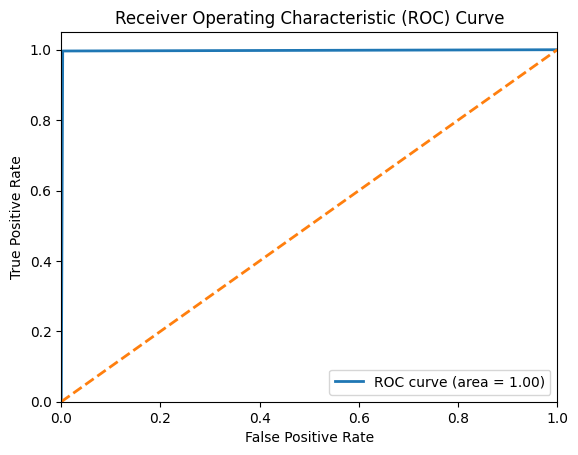

In [25]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
roc_auc_score_ = auc(fpr, tpr)  

plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score_)  
plt.plot([0, 1], [0, 1],  lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()